In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from datetime import datetime as dt
from sklearn_pandas import DataFrameMapper
pd.set_option("display.max_columns", 120)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('restored_data_plus_new_feats.csv', parse_dates=['date'], index_col=['id', 'date'])\
                                                                                        .sort_index(level = [0, 1])

In [3]:
data.head()

avr_lev  min_lev  max_lev  avr_wat_temp  KSVO_1  KSVO_10  \
id   date                                                                   
5001 1984-01-01    258.0    258.0    258.0      0.000000     0.0      0.0   
     1984-01-02    160.0    160.0    160.0      0.000000     0.0      0.0   
     1984-01-03    141.0    141.0    141.0      0.000000     0.0      0.0   
     1984-01-04    137.0    136.0    138.0      0.052174     0.0      0.0   
     1984-01-05    227.0    218.0    233.0      1.600000     0.0      0.0   

                 KSVO_11  KSVO_12  KSVO_13  KSVO_14  KSVO_15  KSVO_16  \
id   date                                                               
5001 1984-01-01      0.0      0.0      0.0      0.0      1.0      0.0   
     1984-01-02      0.0      0.0      0.0      0.0      1.0      0.0   
     1984-01-03      0.0      0.0      0.0      0.0      1.0      0.0   
     1984-01-04      0.0      0.0      0.0      0.0      1.0      0.0   
     1984-01-05      0.0      0.0      0.0      0.0      0.0      0.0   

                 KSVO_17  KSVO_18  KSVO_19  KSVO_2  KSVO_20  KSVO_21  KSVO_22  \
id   date                                                                       
5001 1984-01-01      0.0      0.0      0.0     0.0      0.0      0.0      0.0   
     1984-01-02      0.0      0.0      0.0     0.0      0.0      0.0      0.0   
     1984-01-03      0.0      0.0      0.0     0.0      0.0      0.0      0.0   
     1984-01-04      0.0      0.0      0.0     0.0      0.0      0.0      0.0   
     1984-01-05      0.0      0.0      0.0     0.0      0.0      0.0      0.0   

                 KSVO_23  KSVO_24  KSVO_25  KSVO_26  KSVO_27  KSVO_28  \
id   date                                                               
5001 1984-01-01      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-02      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-03      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-04      1.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-05      0.0      0.0      0.0      0.0      1.0      0.0   

                 KSVO_29  KSVO_3  KSVO_30  KSVO_31  KSVO_32  KSVO_33  KSVO_34  \
id   date                                                                       
5001 1984-01-01      0.0     1.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-02      0.0     1.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-03      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-04      0.0     0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-05      0.0     0.0      0.0      0.0      0.0      0.0      0.0   

                 KSVO_35  KSVO_36  KSVO_37  KSVO_38  KSVO_39  KSVO_4  KSVO_40  \
id   date                                                                       
5001 1984-01-01      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
     1984-01-02      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
     1984-01-03      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
     1984-01-04      0.0      0.0      0.0      0.0      0.0     0.0      0.0   
     1984-01-05      0.0      0.0      0.0      0.0      0.0     0.0      0.0   

                 KSVO_41  KSVO_42  KSVO_45  KSVO_46  KSVO_47  KSVO_48  \
id   date                                                               
5001 1984-01-01      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-02      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-03      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-04      0.0      0.0      0.0      0.0      0.0      0.0   
     1984-01-05      0.0      0.0      0.0      0.0      0.0      0.0   

                 KSVO_49  KSVO_5  KSVO_51  KSVO_52  KSVO_6  KSVO_60  KSVO_7  \
id   date                                                                     
5001 1984-01-01      0.0     0.0      0.0      0.0     0.0      0.0     0.0   


In [4]:
target_stations = [6005, 6022, 6027, 5004, 5012, 5024, 5805]

In [5]:
def recognize_var_type(data):
    cont = []
    binar = []
    cat = []
    other = []
    variables = data.columns.tolist()
    for var in variables:
        if (data[var].nunique() >= 2)\
            and \
           (not {0, 1} >= set(data[var].unique()))\
            and \
           (data[var].dtype != 'O'): # если переменная непрерывная
            cont.append(var)

        elif (set(data[var].unique()).issuperset([0,1])) and (data[var].nunique() == 2): # если переменная бинарная 
            binar.append(var)     
               

        elif (data[var].dtype == 'O'): # если переменная категориальная
            cat.append(var)
            
        else:
            other.append(var)
    type_dict = {'cont': cont, 'binar': binar, 'cat': cat, 'other': other}
    return type_dict

In [6]:
var_type = recognize_var_type(data)

In [7]:
# Масштабирование непрерывных переменных
cols_to_scale = var_type['cont'].copy()
cols_to_scale.remove('max_lev')
cols_not_to_scale = var_type['binar'].copy()
cols_not_to_scale.append('max_lev')
ss = StandardScaler()
scaled_feat = pd.DataFrame(ss.fit_transform(data[cols_to_scale]), columns=cols_to_scale, index=data.index)
prep_data = pd.concat([scaled_feat, data[cols_not_to_scale]], axis=1)

In [8]:
prep_data.head()

avr_lev   min_lev  avr_wat_temp      elev  wind_speed_avg  \
id   date                                                                     
5001 1984-01-01  0.178572  0.105813     -0.872805 -0.724649       -0.433619   
     1984-01-02 -0.371239 -0.285834     -0.872805 -0.724649       -0.420315   
     1984-01-03 -0.477835 -0.361766     -0.872805 -0.724649       -0.484794   
     1984-01-04 -0.500276 -0.381748     -0.865757 -0.724649       -0.367635   
     1984-01-05  0.004652 -0.054043     -0.656663 -0.724649       -0.175164   

                 wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
id   date                                                                   
5001 1984-01-01          0.284472           -0.270519            0.127499   
     1984-01-02         -0.293227           -0.096643            0.065240   
     1984-01-03         -0.136321           -0.270519            0.052557   
     1984-01-04          0.009377           -0.109063           -0.118202   
     1984-01-05          0.491303           -0.103083            0.052557   

                 wind_direction_NE  wind_direction_NNE  wind_direction_NNW  \
id   date                                                                    
5001 1984-01-01          -0.279074           -0.261148           -0.460535   
     1984-01-02          -0.279074           -0.261148           -0.236452   
     1984-01-03          -0.116058           -0.261148           -0.244751   
     1984-01-04          -0.279074           -0.261148           -0.148419   
     1984-01-05          -0.116058           -0.261148           -0.028967   

                 wind_direction_NW  wind_direction_S  wind_direction_SE  \
id   date                                                                 
5001 1984-01-01           0.018788          0.881351           0.331051   
     1984-01-02           0.804875          0.561553           0.579396   
     1984-01-03          -0.026270          0.633001           0.218950   
     1984-01-04          -0.224524          0.699346           0.201334   
     1984-01-05           0.370240         -0.022643           0.383364   

                 wind_direction_SSE  wind_direction_SSW  wind_direction_SW  \
id   date                                                                    
5001 1984-01-01           -0.028425           -0.211578           0.049648   
     1984-01-02           -0.247545           -0.211578          -0.206948   
     1984-01-03            0.288081           -0.211578           0.002130   
     1984-01-04           -0.075379            0.185855          -0.206948   
     1984-01-05           -0.247545           -0.211578           0.002130   

                 wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
id   date                                                                   
5001 1984-01-01         -0.207342            0.071164           -0.190285   
     1984-01-02         -0.207342            0.258068           -0.190285   
     1984-01-03         -0.207342            0.241147            0.036600   
     1984-01-04          0.199708            0.013313            0.028497   
     1984-01-05          0.003721            0.021169           -0.190285   

                 visibility_distance  precipitation_amount  \
id   date                                                    
5001 1984-01-01            -0.046952             -0.195041   
     1984-01-02            -0.409705             -0.195041   
     1984-01-03            -0.177705             -0.195041   
     1984-01-04            -0.116946             -0.195041   
     1984-01-05            -0.022589             -0.195041   

                 temperature_ground  temperature_air  humidity  \
id   date                                                        
5001 1984-01-01           -1.625556        -1.738914  0.421943   
     1984-01-02           -1.578102        -1.696647  0.396889   
     1984-01-03           -1.564921        -1.692245  0.426700   

In [9]:
prep_data.to_csv('prep_data.csv')

In [2]:
prep_data = pd.read_csv('prep_data.csv', parse_dates=['date'], index_col=['id', 'date']).sort_index(level = [0, 1])

In [3]:
# Функция для подсчета метрики MAPE
def mape(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [4]:
class CustomTimeSeriesSplit():
    '''Делит временные ряды на train и test'''
    def __init__(self):
        
        pass
                
    def ts_train_test_split(self, data, ID, test_size):        
        self.data = data
        self.ID= ID
        self.test_size = test_size
        
        idx = pd.IndexSlice
        sorted_ind = self.data.loc[idx[ID, :], :].index.sort_values()
        self.sorted_ind = sorted_ind
        
        train_ind = self.sorted_ind[:-self.test_size]
        test_ind = self.sorted_ind[-self.test_size:]            
          
        return train_ind, test_ind
           
    def ts_cv(self, n_folds = 5, fold_size=0.5, train_test_ratio=4):
        self.n_folds = n_folds
        self.fold_size = fold_size
        self.train_test_ratio = train_test_ratio
        
        inds = range(len(self.sorted_ind))
        fold_len = round(len(self.sorted_ind) * self.fold_size)
        test_len = round(len(self.sorted_ind) * (1 - self.fold_size) // self.n_folds)
        next_start_ind = 0
        for fold in range(self.n_folds):
            train_plus_test = inds[next_start_ind : next_start_ind + fold_len]
            train = train_plus_test[: - test_len]
            test = train_plus_test[- test_len :]
            next_start_ind += test_len
            yield (np.array(train), np.array(test))

https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

In [20]:
n_days = 1
cat_reg = CatBoostRegressor()
cat_params = {'n_estimators': [2000], 
              'max_depth': np.arange(2, 5, 9),
              'learning_rate': [0.001, 0.01, 0.1, 0.2],
              'subsample': [0.7, 0.85, 1],
              'random_state': [17]}

scorer = make_scorer(mape, greater_is_better=False)

split = CustomTimeSeriesSplit()
train_ind, test_ind = split.ts_train_test_split(prep_data, 6005, 365)
valid_ind = train_ind[-1825:]
gen = split.ts_cv()

X_valid = prep_data.drop('max_lev', axis=1).loc[valid_ind[n_days:]]
y_valid = prep_data['max_lev'].diff(n_days).loc[valid_ind[n_days:]]

clf = GridSearchCV(cat_reg, cat_params, cv=5, scoring=scorer)

clf.fit(X_valid, y_valid)
model = clf.best_estimator_

0:	learn: 86.4174006	total: 169ms	remaining: 5m 37s
1:	learn: 86.3940780	total: 173ms	remaining: 2m 53s
2:	learn: 86.3702111	total: 178ms	remaining: 1m 58s
3:	learn: 86.3454448	total: 182ms	remaining: 1m 31s
4:	learn: 86.3209764	total: 187ms	remaining: 1m 14s
5:	learn: 86.2965413	total: 191ms	remaining: 1m 3s
6:	learn: 86.2771771	total: 193ms	remaining: 54.8s
7:	learn: 86.2530373	total: 195ms	remaining: 48.4s
8:	learn: 86.2287000	total: 197ms	remaining: 43.5s
9:	learn: 86.2047939	total: 199ms	remaining: 39.5s
10:	learn: 86.1815330	total: 201ms	remaining: 36.3s
11:	learn: 86.1572901	total: 203ms	remaining: 33.6s
12:	learn: 86.1334770	total: 205ms	remaining: 31.3s
13:	learn: 86.1098545	total: 207ms	remaining: 29.4s
14:	learn: 86.0857071	total: 209ms	remaining: 27.7s
15:	learn: 86.0621475	total: 211ms	remaining: 26.2s
16:	learn: 86.0426124	total: 214ms	remaining: 24.9s
17:	learn: 86.0192552	total: 216ms	remaining: 23.7s
18:	learn: 85.9956215	total: 217ms	remaining: 22.6s
19:	learn: 85.972

326:	learn: 80.1773938	total: 478ms	remaining: 2.45s
327:	learn: 80.1620651	total: 479ms	remaining: 2.44s
328:	learn: 80.1459536	total: 480ms	remaining: 2.44s
329:	learn: 80.1300273	total: 481ms	remaining: 2.43s
330:	learn: 80.1145605	total: 482ms	remaining: 2.43s
331:	learn: 80.0996449	total: 483ms	remaining: 2.42s
332:	learn: 80.0869421	total: 483ms	remaining: 2.42s
333:	learn: 80.0717708	total: 484ms	remaining: 2.42s
334:	learn: 80.0576955	total: 485ms	remaining: 2.41s
335:	learn: 80.0420235	total: 486ms	remaining: 2.4s
336:	learn: 80.0273400	total: 487ms	remaining: 2.4s
337:	learn: 80.0146296	total: 487ms	remaining: 2.4s
338:	learn: 80.0003226	total: 488ms	remaining: 2.39s
339:	learn: 79.9845228	total: 489ms	remaining: 2.39s
340:	learn: 79.9690637	total: 490ms	remaining: 2.38s
341:	learn: 79.9565365	total: 490ms	remaining: 2.38s
342:	learn: 79.9427317	total: 491ms	remaining: 2.37s
343:	learn: 79.9275237	total: 492ms	remaining: 2.37s
344:	learn: 79.9117221	total: 493ms	remaining: 2.

527:	learn: 77.4738056	total: 637ms	remaining: 1.77s
528:	learn: 77.4610513	total: 638ms	remaining: 1.77s
529:	learn: 77.4484283	total: 638ms	remaining: 1.77s
530:	learn: 77.4354010	total: 639ms	remaining: 1.77s
531:	learn: 77.4231077	total: 640ms	remaining: 1.77s
532:	learn: 77.4100731	total: 641ms	remaining: 1.76s
533:	learn: 77.3978079	total: 642ms	remaining: 1.76s
534:	learn: 77.3852153	total: 643ms	remaining: 1.76s
535:	learn: 77.3727523	total: 644ms	remaining: 1.76s
536:	learn: 77.3658335	total: 645ms	remaining: 1.75s
537:	learn: 77.3535743	total: 645ms	remaining: 1.75s
538:	learn: 77.3411176	total: 646ms	remaining: 1.75s
539:	learn: 77.3287928	total: 647ms	remaining: 1.75s
540:	learn: 77.3162563	total: 648ms	remaining: 1.75s
541:	learn: 77.3036778	total: 649ms	remaining: 1.75s
542:	learn: 77.2907980	total: 650ms	remaining: 1.74s
543:	learn: 77.2802985	total: 651ms	remaining: 1.74s
544:	learn: 77.2673715	total: 652ms	remaining: 1.74s
545:	learn: 77.2551165	total: 653ms	remaining:

721:	learn: 75.4527447	total: 797ms	remaining: 1.41s
722:	learn: 75.4453907	total: 798ms	remaining: 1.41s
723:	learn: 75.4350396	total: 799ms	remaining: 1.41s
724:	learn: 75.4250142	total: 800ms	remaining: 1.41s
725:	learn: 75.4142036	total: 801ms	remaining: 1.41s
726:	learn: 75.4057336	total: 802ms	remaining: 1.4s
727:	learn: 75.3967328	total: 803ms	remaining: 1.4s
728:	learn: 75.3892005	total: 803ms	remaining: 1.4s
729:	learn: 75.3789721	total: 804ms	remaining: 1.4s
730:	learn: 75.3700188	total: 805ms	remaining: 1.4s
731:	learn: 75.3628626	total: 806ms	remaining: 1.4s
732:	learn: 75.3540976	total: 807ms	remaining: 1.39s
733:	learn: 75.3435409	total: 808ms	remaining: 1.39s
734:	learn: 75.3334523	total: 808ms	remaining: 1.39s
735:	learn: 75.3239819	total: 810ms	remaining: 1.39s
736:	learn: 75.3143098	total: 810ms	remaining: 1.39s
737:	learn: 75.3041201	total: 811ms	remaining: 1.39s
738:	learn: 75.2938860	total: 812ms	remaining: 1.39s
739:	learn: 75.2837205	total: 813ms	remaining: 1.38s

917:	learn: 73.8464775	total: 957ms	remaining: 1.13s
918:	learn: 73.8378105	total: 958ms	remaining: 1.13s
919:	learn: 73.8289893	total: 959ms	remaining: 1.13s
920:	learn: 73.8268821	total: 960ms	remaining: 1.12s
921:	learn: 73.8177741	total: 961ms	remaining: 1.12s
922:	learn: 73.8089767	total: 962ms	remaining: 1.12s
923:	learn: 73.8023391	total: 963ms	remaining: 1.12s
924:	learn: 73.7935898	total: 963ms	remaining: 1.12s
925:	learn: 73.7879935	total: 964ms	remaining: 1.12s
926:	learn: 73.7797481	total: 965ms	remaining: 1.12s
927:	learn: 73.7710936	total: 966ms	remaining: 1.11s
928:	learn: 73.7637990	total: 967ms	remaining: 1.11s
929:	learn: 73.7544049	total: 968ms	remaining: 1.11s
930:	learn: 73.7445456	total: 968ms	remaining: 1.11s
931:	learn: 73.7361855	total: 969ms	remaining: 1.11s
932:	learn: 73.7278725	total: 970ms	remaining: 1.11s
933:	learn: 73.7194088	total: 971ms	remaining: 1.11s
934:	learn: 73.7139848	total: 972ms	remaining: 1.11s
935:	learn: 73.7056191	total: 973ms	remaining:

1114:	learn: 72.4549532	total: 1.12s	remaining: 886ms
1115:	learn: 72.4469536	total: 1.12s	remaining: 885ms
1116:	learn: 72.4397469	total: 1.12s	remaining: 884ms
1117:	learn: 72.4339624	total: 1.12s	remaining: 883ms
1118:	learn: 72.4262282	total: 1.12s	remaining: 882ms
1119:	learn: 72.4223687	total: 1.12s	remaining: 881ms
1120:	learn: 72.4162593	total: 1.12s	remaining: 880ms
1121:	learn: 72.4085921	total: 1.12s	remaining: 879ms
1122:	learn: 72.4027554	total: 1.12s	remaining: 878ms
1123:	learn: 72.3973502	total: 1.12s	remaining: 877ms
1124:	learn: 72.3902283	total: 1.13s	remaining: 875ms
1125:	learn: 72.3819889	total: 1.13s	remaining: 874ms
1126:	learn: 72.3750104	total: 1.13s	remaining: 873ms
1127:	learn: 72.3691707	total: 1.13s	remaining: 872ms
1128:	learn: 72.3620742	total: 1.13s	remaining: 871ms
1129:	learn: 72.3551000	total: 1.13s	remaining: 870ms
1130:	learn: 72.3494191	total: 1.13s	remaining: 869ms
1131:	learn: 72.3425705	total: 1.13s	remaining: 868ms
1132:	learn: 72.3328394	tota

1321:	learn: 71.1836310	total: 1.27s	remaining: 654ms
1322:	learn: 71.1787090	total: 1.27s	remaining: 653ms
1323:	learn: 71.1725511	total: 1.28s	remaining: 652ms
1324:	learn: 71.1677200	total: 1.28s	remaining: 651ms
1325:	learn: 71.1625894	total: 1.28s	remaining: 650ms
1326:	learn: 71.1569631	total: 1.28s	remaining: 649ms
1327:	learn: 71.1491289	total: 1.28s	remaining: 648ms
1328:	learn: 71.1402522	total: 1.28s	remaining: 647ms
1329:	learn: 71.1318401	total: 1.28s	remaining: 646ms
1330:	learn: 71.1277771	total: 1.28s	remaining: 645ms
1331:	learn: 71.1190298	total: 1.28s	remaining: 644ms
1332:	learn: 71.1110578	total: 1.28s	remaining: 643ms
1333:	learn: 71.1071006	total: 1.28s	remaining: 642ms
1334:	learn: 71.1021913	total: 1.28s	remaining: 640ms
1335:	learn: 71.0962067	total: 1.29s	remaining: 639ms
1336:	learn: 71.0923241	total: 1.29s	remaining: 638ms
1337:	learn: 71.0893352	total: 1.29s	remaining: 637ms
1338:	learn: 71.0849422	total: 1.29s	remaining: 636ms
1339:	learn: 71.0790448	tota

1519:	learn: 70.1066904	total: 1.43s	remaining: 453ms
1520:	learn: 70.0996523	total: 1.44s	remaining: 452ms
1521:	learn: 70.0925875	total: 1.44s	remaining: 451ms
1522:	learn: 70.0840661	total: 1.44s	remaining: 450ms
1523:	learn: 70.0779378	total: 1.44s	remaining: 449ms
1524:	learn: 70.0742554	total: 1.44s	remaining: 448ms
1525:	learn: 70.0678040	total: 1.44s	remaining: 447ms
1526:	learn: 70.0633281	total: 1.44s	remaining: 446ms
1527:	learn: 70.0578789	total: 1.44s	remaining: 445ms
1528:	learn: 70.0519310	total: 1.44s	remaining: 444ms
1529:	learn: 70.0456801	total: 1.44s	remaining: 443ms
1530:	learn: 70.0405239	total: 1.44s	remaining: 442ms
1531:	learn: 70.0346732	total: 1.44s	remaining: 441ms
1532:	learn: 70.0270375	total: 1.45s	remaining: 440ms
1533:	learn: 70.0221818	total: 1.45s	remaining: 439ms
1534:	learn: 70.0209249	total: 1.45s	remaining: 438ms
1535:	learn: 70.0157702	total: 1.45s	remaining: 437ms
1536:	learn: 70.0128056	total: 1.45s	remaining: 436ms
1537:	learn: 70.0052820	tota

1699:	learn: 69.1874002	total: 1.58s	remaining: 280ms
1700:	learn: 69.1798790	total: 1.59s	remaining: 279ms
1701:	learn: 69.1721076	total: 1.59s	remaining: 278ms
1702:	learn: 69.1706605	total: 1.59s	remaining: 277ms
1703:	learn: 69.1664986	total: 1.59s	remaining: 276ms
1704:	learn: 69.1599940	total: 1.59s	remaining: 275ms
1705:	learn: 69.1533647	total: 1.59s	remaining: 274ms
1706:	learn: 69.1462342	total: 1.59s	remaining: 273ms
1707:	learn: 69.1427472	total: 1.59s	remaining: 272ms
1708:	learn: 69.1385062	total: 1.59s	remaining: 271ms
1709:	learn: 69.1329770	total: 1.59s	remaining: 270ms
1710:	learn: 69.1300900	total: 1.59s	remaining: 269ms
1711:	learn: 69.1228201	total: 1.59s	remaining: 268ms
1712:	learn: 69.1164245	total: 1.6s	remaining: 268ms
1713:	learn: 69.1109301	total: 1.6s	remaining: 267ms
1714:	learn: 69.1027211	total: 1.6s	remaining: 266ms
1715:	learn: 69.0987817	total: 1.6s	remaining: 265ms
1716:	learn: 69.0940057	total: 1.6s	remaining: 264ms
1717:	learn: 69.0922809	total: 1.

1888:	learn: 68.2627931	total: 1.74s	remaining: 102ms
1889:	learn: 68.2593927	total: 1.74s	remaining: 102ms
1890:	learn: 68.2520675	total: 1.75s	remaining: 101ms
1891:	learn: 68.2474299	total: 1.75s	remaining: 99.7ms
1892:	learn: 68.2424744	total: 1.75s	remaining: 98.7ms
1893:	learn: 68.2361962	total: 1.75s	remaining: 97.8ms
1894:	learn: 68.2310491	total: 1.75s	remaining: 96.9ms
1895:	learn: 68.2272028	total: 1.75s	remaining: 96ms
1896:	learn: 68.2191615	total: 1.75s	remaining: 95ms
1897:	learn: 68.2141885	total: 1.75s	remaining: 94.1ms
1898:	learn: 68.2097638	total: 1.75s	remaining: 93.2ms
1899:	learn: 68.2036434	total: 1.75s	remaining: 92.3ms
1900:	learn: 68.1970768	total: 1.75s	remaining: 91.3ms
1901:	learn: 68.1892896	total: 1.75s	remaining: 90.4ms
1902:	learn: 68.1835928	total: 1.75s	remaining: 89.5ms
1903:	learn: 68.1749705	total: 1.76s	remaining: 88.6ms
1904:	learn: 68.1727560	total: 1.76s	remaining: 87.6ms
1905:	learn: 68.1695299	total: 1.76s	remaining: 86.7ms
1906:	learn: 68.1

250:	learn: 67.0554627	total: 188ms	remaining: 1.31s
251:	learn: 67.0467591	total: 189ms	remaining: 1.31s
252:	learn: 67.0375058	total: 190ms	remaining: 1.31s
253:	learn: 67.0256316	total: 191ms	remaining: 1.31s
254:	learn: 67.0140759	total: 191ms	remaining: 1.31s
255:	learn: 67.0049160	total: 192ms	remaining: 1.31s
256:	learn: 66.9937722	total: 193ms	remaining: 1.31s
257:	learn: 66.9827125	total: 194ms	remaining: 1.31s
258:	learn: 66.9707302	total: 195ms	remaining: 1.31s
259:	learn: 66.9605161	total: 195ms	remaining: 1.31s
260:	learn: 66.9495793	total: 196ms	remaining: 1.31s
261:	learn: 66.9373524	total: 197ms	remaining: 1.31s
262:	learn: 66.9254338	total: 198ms	remaining: 1.31s
263:	learn: 66.9145091	total: 199ms	remaining: 1.3s
264:	learn: 66.9053931	total: 199ms	remaining: 1.3s
265:	learn: 66.8949032	total: 200ms	remaining: 1.3s
266:	learn: 66.8827125	total: 201ms	remaining: 1.3s
267:	learn: 66.8717809	total: 202ms	remaining: 1.3s
268:	learn: 66.8611995	total: 202ms	remaining: 1.3s

456:	learn: 65.0495108	total: 344ms	remaining: 1.16s
457:	learn: 65.0407494	total: 345ms	remaining: 1.16s
458:	learn: 65.0314225	total: 346ms	remaining: 1.16s
459:	learn: 65.0237867	total: 347ms	remaining: 1.16s
460:	learn: 65.0147901	total: 347ms	remaining: 1.16s
461:	learn: 65.0079389	total: 348ms	remaining: 1.16s
462:	learn: 64.9997376	total: 349ms	remaining: 1.16s
463:	learn: 64.9911456	total: 350ms	remaining: 1.16s
464:	learn: 64.9816278	total: 351ms	remaining: 1.16s
465:	learn: 64.9727910	total: 351ms	remaining: 1.16s
466:	learn: 64.9636520	total: 352ms	remaining: 1.16s
467:	learn: 64.9569959	total: 353ms	remaining: 1.16s
468:	learn: 64.9488153	total: 354ms	remaining: 1.16s
469:	learn: 64.9400879	total: 355ms	remaining: 1.15s
470:	learn: 64.9309819	total: 355ms	remaining: 1.15s
471:	learn: 64.9208111	total: 356ms	remaining: 1.15s
472:	learn: 64.9113536	total: 357ms	remaining: 1.15s
473:	learn: 64.9036260	total: 358ms	remaining: 1.15s
474:	learn: 64.8951150	total: 359ms	remaining:

666:	learn: 63.4146100	total: 502ms	remaining: 1s
667:	learn: 63.4075700	total: 503ms	remaining: 1s
668:	learn: 63.4003719	total: 504ms	remaining: 1s
669:	learn: 63.3950431	total: 504ms	remaining: 1s
670:	learn: 63.3877493	total: 505ms	remaining: 1s
671:	learn: 63.3805136	total: 506ms	remaining: 1000ms
672:	learn: 63.3743803	total: 507ms	remaining: 999ms
673:	learn: 63.3666313	total: 507ms	remaining: 998ms
674:	learn: 63.3592201	total: 508ms	remaining: 998ms
675:	learn: 63.3521686	total: 509ms	remaining: 997ms
676:	learn: 63.3448056	total: 510ms	remaining: 996ms
677:	learn: 63.3374192	total: 511ms	remaining: 996ms
678:	learn: 63.3298419	total: 511ms	remaining: 995ms
679:	learn: 63.3200694	total: 512ms	remaining: 994ms
680:	learn: 63.3127632	total: 513ms	remaining: 994ms
681:	learn: 63.3058243	total: 514ms	remaining: 993ms
682:	learn: 63.2984521	total: 515ms	remaining: 992ms
683:	learn: 63.2911989	total: 516ms	remaining: 992ms
684:	learn: 63.2844428	total: 516ms	remaining: 991ms
685:	le

867:	learn: 62.0640521	total: 659ms	remaining: 860ms
868:	learn: 62.0554158	total: 660ms	remaining: 859ms
869:	learn: 62.0487704	total: 661ms	remaining: 858ms
870:	learn: 62.0426177	total: 662ms	remaining: 858ms
871:	learn: 62.0376890	total: 662ms	remaining: 857ms
872:	learn: 62.0324294	total: 663ms	remaining: 856ms
873:	learn: 62.0260081	total: 664ms	remaining: 855ms
874:	learn: 62.0180068	total: 665ms	remaining: 854ms
875:	learn: 62.0107667	total: 665ms	remaining: 854ms
876:	learn: 62.0046028	total: 666ms	remaining: 853ms
877:	learn: 61.9966075	total: 667ms	remaining: 852ms
878:	learn: 61.9887156	total: 668ms	remaining: 851ms
879:	learn: 61.9827218	total: 668ms	remaining: 851ms
880:	learn: 61.9766832	total: 669ms	remaining: 850ms
881:	learn: 61.9708638	total: 670ms	remaining: 849ms
882:	learn: 61.9633847	total: 670ms	remaining: 848ms
883:	learn: 61.9552025	total: 671ms	remaining: 848ms
884:	learn: 61.9497180	total: 672ms	remaining: 847ms
885:	learn: 61.9452789	total: 673ms	remaining:

1081:	learn: 60.7610562	total: 815ms	remaining: 692ms
1082:	learn: 60.7537865	total: 816ms	remaining: 691ms
1083:	learn: 60.7485643	total: 817ms	remaining: 690ms
1084:	learn: 60.7410849	total: 818ms	remaining: 690ms
1085:	learn: 60.7359366	total: 819ms	remaining: 689ms
1086:	learn: 60.7308183	total: 820ms	remaining: 688ms
1087:	learn: 60.7258785	total: 820ms	remaining: 688ms
1088:	learn: 60.7192716	total: 821ms	remaining: 687ms
1089:	learn: 60.7142999	total: 822ms	remaining: 686ms
1090:	learn: 60.7075660	total: 823ms	remaining: 686ms
1091:	learn: 60.6999533	total: 824ms	remaining: 685ms
1092:	learn: 60.6923705	total: 824ms	remaining: 684ms
1093:	learn: 60.6876190	total: 825ms	remaining: 683ms
1094:	learn: 60.6825253	total: 826ms	remaining: 683ms
1095:	learn: 60.6774855	total: 827ms	remaining: 682ms
1096:	learn: 60.6700333	total: 828ms	remaining: 681ms
1097:	learn: 60.6626203	total: 829ms	remaining: 681ms
1098:	learn: 60.6582231	total: 830ms	remaining: 680ms
1099:	learn: 60.6535591	tota

1283:	learn: 59.7145415	total: 971ms	remaining: 542ms
1284:	learn: 59.7082564	total: 972ms	remaining: 541ms
1285:	learn: 59.7041845	total: 973ms	remaining: 540ms
1286:	learn: 59.6978763	total: 974ms	remaining: 540ms
1287:	learn: 59.6929614	total: 975ms	remaining: 539ms
1288:	learn: 59.6899476	total: 976ms	remaining: 538ms
1289:	learn: 59.6856920	total: 976ms	remaining: 537ms
1290:	learn: 59.6810886	total: 977ms	remaining: 537ms
1291:	learn: 59.6754110	total: 978ms	remaining: 536ms
1292:	learn: 59.6708450	total: 979ms	remaining: 535ms
1293:	learn: 59.6646923	total: 980ms	remaining: 535ms
1294:	learn: 59.6610294	total: 981ms	remaining: 534ms
1295:	learn: 59.6562168	total: 982ms	remaining: 533ms
1296:	learn: 59.6496778	total: 982ms	remaining: 532ms
1297:	learn: 59.6449860	total: 983ms	remaining: 532ms
1298:	learn: 59.6403586	total: 984ms	remaining: 531ms
1299:	learn: 59.6337054	total: 985ms	remaining: 530ms
1300:	learn: 59.6280858	total: 986ms	remaining: 530ms
1301:	learn: 59.6234411	tota

1490:	learn: 58.7591756	total: 1.13s	remaining: 384ms
1491:	learn: 58.7551122	total: 1.13s	remaining: 384ms
1492:	learn: 58.7504153	total: 1.13s	remaining: 383ms
1493:	learn: 58.7456731	total: 1.13s	remaining: 382ms
1494:	learn: 58.7421568	total: 1.13s	remaining: 382ms
1495:	learn: 58.7396041	total: 1.13s	remaining: 381ms
1496:	learn: 58.7356478	total: 1.13s	remaining: 380ms
1497:	learn: 58.7327250	total: 1.13s	remaining: 379ms
1498:	learn: 58.7297719	total: 1.13s	remaining: 379ms
1499:	learn: 58.7264515	total: 1.13s	remaining: 378ms
1500:	learn: 58.7221901	total: 1.13s	remaining: 377ms
1501:	learn: 58.7170574	total: 1.14s	remaining: 376ms
1502:	learn: 58.7113660	total: 1.14s	remaining: 376ms
1503:	learn: 58.7069291	total: 1.14s	remaining: 375ms
1504:	learn: 58.7012205	total: 1.14s	remaining: 374ms
1505:	learn: 58.6969715	total: 1.14s	remaining: 373ms
1506:	learn: 58.6946700	total: 1.14s	remaining: 373ms
1507:	learn: 58.6896554	total: 1.14s	remaining: 372ms
1508:	learn: 58.6862761	tota

1699:	learn: 57.9297472	total: 1.28s	remaining: 227ms
1700:	learn: 57.9250504	total: 1.28s	remaining: 226ms
1701:	learn: 57.9204839	total: 1.28s	remaining: 225ms
1702:	learn: 57.9163939	total: 1.29s	remaining: 224ms
1703:	learn: 57.9147463	total: 1.29s	remaining: 224ms
1704:	learn: 57.9107654	total: 1.29s	remaining: 223ms
1705:	learn: 57.9062274	total: 1.29s	remaining: 222ms
1706:	learn: 57.9014858	total: 1.29s	remaining: 221ms
1707:	learn: 57.8964410	total: 1.29s	remaining: 221ms
1708:	learn: 57.8933716	total: 1.29s	remaining: 220ms
1709:	learn: 57.8902344	total: 1.29s	remaining: 219ms
1710:	learn: 57.8867269	total: 1.29s	remaining: 218ms
1711:	learn: 57.8850496	total: 1.29s	remaining: 218ms
1712:	learn: 57.8818811	total: 1.29s	remaining: 217ms
1713:	learn: 57.8764992	total: 1.29s	remaining: 216ms
1714:	learn: 57.8733641	total: 1.3s	remaining: 215ms
1715:	learn: 57.8694788	total: 1.3s	remaining: 215ms
1716:	learn: 57.8643956	total: 1.3s	remaining: 214ms
1717:	learn: 57.8621134	total: 

1915:	learn: 57.1701567	total: 1.44s	remaining: 63.2ms
1916:	learn: 57.1667824	total: 1.44s	remaining: 62.4ms
1917:	learn: 57.1621529	total: 1.44s	remaining: 61.7ms
1918:	learn: 57.1595345	total: 1.44s	remaining: 60.9ms
1919:	learn: 57.1553808	total: 1.44s	remaining: 60.2ms
1920:	learn: 57.1525036	total: 1.44s	remaining: 59.4ms
1921:	learn: 57.1479660	total: 1.45s	remaining: 58.7ms
1922:	learn: 57.1442247	total: 1.45s	remaining: 57.9ms
1923:	learn: 57.1401759	total: 1.45s	remaining: 57.2ms
1924:	learn: 57.1382977	total: 1.45s	remaining: 56.4ms
1925:	learn: 57.1352316	total: 1.45s	remaining: 55.6ms
1926:	learn: 57.1331610	total: 1.45s	remaining: 54.9ms
1927:	learn: 57.1304631	total: 1.45s	remaining: 54.1ms
1928:	learn: 57.1279083	total: 1.45s	remaining: 53.4ms
1929:	learn: 57.1237096	total: 1.45s	remaining: 52.7ms
1930:	learn: 57.1198136	total: 1.45s	remaining: 51.9ms
1931:	learn: 57.1172895	total: 1.45s	remaining: 51.2ms
1932:	learn: 57.1134328	total: 1.45s	remaining: 50.4ms
1933:	lear

81:	learn: 90.0344501	total: 61.5ms	remaining: 1.44s
82:	learn: 90.0132841	total: 62.5ms	remaining: 1.44s
83:	learn: 89.9967282	total: 63.3ms	remaining: 1.44s
84:	learn: 89.9765037	total: 64.1ms	remaining: 1.44s
85:	learn: 89.9593175	total: 64.9ms	remaining: 1.44s
86:	learn: 89.9382542	total: 65.7ms	remaining: 1.44s
87:	learn: 89.9169559	total: 66.4ms	remaining: 1.44s
88:	learn: 89.8995278	total: 67.2ms	remaining: 1.44s
89:	learn: 89.8814822	total: 68ms	remaining: 1.44s
90:	learn: 89.8606253	total: 68.8ms	remaining: 1.44s
91:	learn: 89.8391930	total: 69.6ms	remaining: 1.44s
92:	learn: 89.8179496	total: 70.4ms	remaining: 1.44s
93:	learn: 89.7967911	total: 71.2ms	remaining: 1.44s
94:	learn: 89.7761037	total: 72ms	remaining: 1.44s
95:	learn: 89.7551741	total: 72.9ms	remaining: 1.45s
96:	learn: 89.7392171	total: 73.7ms	remaining: 1.45s
97:	learn: 89.7187975	total: 74.5ms	remaining: 1.45s
98:	learn: 89.7022475	total: 75.2ms	remaining: 1.44s
99:	learn: 89.6843693	total: 76ms	remaining: 1.44s

292:	learn: 86.2924731	total: 222ms	remaining: 1.29s
293:	learn: 86.2760251	total: 222ms	remaining: 1.29s
294:	learn: 86.2598521	total: 223ms	remaining: 1.29s
295:	learn: 86.2465651	total: 224ms	remaining: 1.29s
296:	learn: 86.2302371	total: 225ms	remaining: 1.29s
297:	learn: 86.2137516	total: 226ms	remaining: 1.29s
298:	learn: 86.1978894	total: 227ms	remaining: 1.29s
299:	learn: 86.1815654	total: 227ms	remaining: 1.29s
300:	learn: 86.1652647	total: 228ms	remaining: 1.29s
301:	learn: 86.1501996	total: 229ms	remaining: 1.29s
302:	learn: 86.1359651	total: 230ms	remaining: 1.29s
303:	learn: 86.1195323	total: 231ms	remaining: 1.29s
304:	learn: 86.1040468	total: 231ms	remaining: 1.29s
305:	learn: 86.0920467	total: 232ms	remaining: 1.28s
306:	learn: 86.0794126	total: 233ms	remaining: 1.28s
307:	learn: 86.0635198	total: 234ms	remaining: 1.28s
308:	learn: 86.0480741	total: 235ms	remaining: 1.28s
309:	learn: 86.0327772	total: 236ms	remaining: 1.28s
310:	learn: 86.0177398	total: 237ms	remaining:

503:	learn: 83.4570183	total: 381ms	remaining: 1.13s
504:	learn: 83.4445475	total: 382ms	remaining: 1.13s
505:	learn: 83.4320811	total: 383ms	remaining: 1.13s
506:	learn: 83.4198625	total: 384ms	remaining: 1.13s
507:	learn: 83.4070362	total: 385ms	remaining: 1.13s
508:	learn: 83.4000999	total: 385ms	remaining: 1.13s
509:	learn: 83.3868213	total: 386ms	remaining: 1.13s
510:	learn: 83.3746381	total: 387ms	remaining: 1.13s
511:	learn: 83.3630285	total: 388ms	remaining: 1.13s
512:	learn: 83.3501757	total: 389ms	remaining: 1.13s
513:	learn: 83.3406375	total: 389ms	remaining: 1.13s
514:	learn: 83.3289898	total: 390ms	remaining: 1.13s
515:	learn: 83.3164697	total: 391ms	remaining: 1.12s
516:	learn: 83.3043501	total: 392ms	remaining: 1.12s
517:	learn: 83.2916439	total: 393ms	remaining: 1.12s
518:	learn: 83.2819052	total: 394ms	remaining: 1.12s
519:	learn: 83.2694464	total: 395ms	remaining: 1.12s
520:	learn: 83.2623564	total: 395ms	remaining: 1.12s
521:	learn: 83.2558647	total: 396ms	remaining:

712:	learn: 81.4272451	total: 540ms	remaining: 974ms
713:	learn: 81.4174323	total: 541ms	remaining: 974ms
714:	learn: 81.4077813	total: 541ms	remaining: 973ms
715:	learn: 81.4002923	total: 542ms	remaining: 972ms
716:	learn: 81.3928832	total: 543ms	remaining: 972ms
717:	learn: 81.3862361	total: 544ms	remaining: 971ms
718:	learn: 81.3745422	total: 545ms	remaining: 970ms
719:	learn: 81.3676507	total: 545ms	remaining: 970ms
720:	learn: 81.3626714	total: 546ms	remaining: 969ms
721:	learn: 81.3578145	total: 547ms	remaining: 968ms
722:	learn: 81.3471937	total: 548ms	remaining: 968ms
723:	learn: 81.3404921	total: 549ms	remaining: 967ms
724:	learn: 81.3301287	total: 549ms	remaining: 966ms
725:	learn: 81.3207367	total: 550ms	remaining: 966ms
726:	learn: 81.3082446	total: 551ms	remaining: 965ms
727:	learn: 81.2982199	total: 552ms	remaining: 964ms
728:	learn: 81.2945773	total: 553ms	remaining: 964ms
729:	learn: 81.2844853	total: 553ms	remaining: 963ms
730:	learn: 81.2769835	total: 554ms	remaining:

923:	learn: 79.7496345	total: 700ms	remaining: 815ms
924:	learn: 79.7430307	total: 701ms	remaining: 814ms
925:	learn: 79.7341827	total: 701ms	remaining: 814ms
926:	learn: 79.7281123	total: 702ms	remaining: 813ms
927:	learn: 79.7237808	total: 703ms	remaining: 812ms
928:	learn: 79.7156125	total: 704ms	remaining: 811ms
929:	learn: 79.7065263	total: 705ms	remaining: 811ms
930:	learn: 79.6992464	total: 706ms	remaining: 810ms
931:	learn: 79.6934128	total: 706ms	remaining: 809ms
932:	learn: 79.6858097	total: 707ms	remaining: 809ms
933:	learn: 79.6798939	total: 708ms	remaining: 808ms
934:	learn: 79.6743833	total: 709ms	remaining: 807ms
935:	learn: 79.6668578	total: 710ms	remaining: 807ms
936:	learn: 79.6586764	total: 710ms	remaining: 806ms
937:	learn: 79.6544100	total: 711ms	remaining: 805ms
938:	learn: 79.6441593	total: 712ms	remaining: 804ms
939:	learn: 79.6358694	total: 713ms	remaining: 804ms
940:	learn: 79.6324393	total: 714ms	remaining: 803ms
941:	learn: 79.6239309	total: 714ms	remaining:

1134:	learn: 78.2839435	total: 860ms	remaining: 655ms
1135:	learn: 78.2762757	total: 860ms	remaining: 654ms
1136:	learn: 78.2733757	total: 861ms	remaining: 654ms
1137:	learn: 78.2686691	total: 862ms	remaining: 653ms
1138:	learn: 78.2615876	total: 863ms	remaining: 652ms
1139:	learn: 78.2569051	total: 864ms	remaining: 651ms
1140:	learn: 78.2516126	total: 864ms	remaining: 651ms
1141:	learn: 78.2456771	total: 865ms	remaining: 650ms
1142:	learn: 78.2409320	total: 866ms	remaining: 649ms
1143:	learn: 78.2386975	total: 867ms	remaining: 648ms
1144:	learn: 78.2332964	total: 867ms	remaining: 648ms
1145:	learn: 78.2264070	total: 868ms	remaining: 647ms
1146:	learn: 78.2184525	total: 869ms	remaining: 646ms
1147:	learn: 78.2077825	total: 870ms	remaining: 645ms
1148:	learn: 78.2032002	total: 871ms	remaining: 645ms
1149:	learn: 78.1962040	total: 871ms	remaining: 644ms
1150:	learn: 78.1910197	total: 872ms	remaining: 643ms
1151:	learn: 78.1833271	total: 873ms	remaining: 643ms
1152:	learn: 78.1782276	tota

1346:	learn: 77.0115046	total: 1.02s	remaining: 494ms
1347:	learn: 77.0096052	total: 1.02s	remaining: 493ms
1348:	learn: 77.0053912	total: 1.02s	remaining: 493ms
1349:	learn: 76.9971947	total: 1.02s	remaining: 492ms
1350:	learn: 76.9923278	total: 1.02s	remaining: 491ms
1351:	learn: 76.9871126	total: 1.02s	remaining: 490ms
1352:	learn: 76.9812058	total: 1.02s	remaining: 490ms
1353:	learn: 76.9725059	total: 1.02s	remaining: 489ms
1354:	learn: 76.9630402	total: 1.02s	remaining: 488ms
1355:	learn: 76.9571542	total: 1.02s	remaining: 487ms
1356:	learn: 76.9522009	total: 1.03s	remaining: 486ms
1357:	learn: 76.9468952	total: 1.03s	remaining: 486ms
1358:	learn: 76.9402030	total: 1.03s	remaining: 485ms
1359:	learn: 76.9341863	total: 1.03s	remaining: 484ms
1360:	learn: 76.9280839	total: 1.03s	remaining: 483ms
1361:	learn: 76.9239668	total: 1.03s	remaining: 483ms
1362:	learn: 76.9189527	total: 1.03s	remaining: 482ms
1363:	learn: 76.9085552	total: 1.03s	remaining: 481ms
1364:	learn: 76.9021358	tota

1551:	learn: 75.8798943	total: 1.18s	remaining: 340ms
1552:	learn: 75.8735071	total: 1.18s	remaining: 339ms
1553:	learn: 75.8654759	total: 1.18s	remaining: 338ms
1554:	learn: 75.8610376	total: 1.18s	remaining: 337ms
1555:	learn: 75.8547819	total: 1.18s	remaining: 337ms
1556:	learn: 75.8502699	total: 1.18s	remaining: 336ms
1557:	learn: 75.8412912	total: 1.18s	remaining: 335ms
1558:	learn: 75.8322795	total: 1.18s	remaining: 334ms
1559:	learn: 75.8261480	total: 1.18s	remaining: 334ms
1560:	learn: 75.8234780	total: 1.18s	remaining: 333ms
1561:	learn: 75.8192208	total: 1.18s	remaining: 332ms
1562:	learn: 75.8147345	total: 1.19s	remaining: 331ms
1563:	learn: 75.8097950	total: 1.19s	remaining: 331ms
1564:	learn: 75.8017739	total: 1.19s	remaining: 330ms
1565:	learn: 75.7997871	total: 1.19s	remaining: 329ms
1566:	learn: 75.7950498	total: 1.19s	remaining: 328ms
1567:	learn: 75.7891829	total: 1.19s	remaining: 328ms
1568:	learn: 75.7833087	total: 1.19s	remaining: 327ms
1569:	learn: 75.7785024	tota

1761:	learn: 74.7798016	total: 1.34s	remaining: 181ms
1762:	learn: 74.7722586	total: 1.34s	remaining: 180ms
1763:	learn: 74.7681550	total: 1.34s	remaining: 179ms
1764:	learn: 74.7622319	total: 1.34s	remaining: 178ms
1765:	learn: 74.7552616	total: 1.34s	remaining: 178ms
1766:	learn: 74.7519602	total: 1.34s	remaining: 177ms
1767:	learn: 74.7452386	total: 1.34s	remaining: 176ms
1768:	learn: 74.7410759	total: 1.34s	remaining: 175ms
1769:	learn: 74.7361339	total: 1.34s	remaining: 175ms
1770:	learn: 74.7293722	total: 1.34s	remaining: 174ms
1771:	learn: 74.7220743	total: 1.34s	remaining: 173ms
1772:	learn: 74.7166890	total: 1.34s	remaining: 172ms
1773:	learn: 74.7094140	total: 1.35s	remaining: 172ms
1774:	learn: 74.7025289	total: 1.35s	remaining: 171ms
1775:	learn: 74.6993775	total: 1.35s	remaining: 170ms
1776:	learn: 74.6912903	total: 1.35s	remaining: 169ms
1777:	learn: 74.6894458	total: 1.35s	remaining: 169ms
1778:	learn: 74.6812462	total: 1.35s	remaining: 168ms
1779:	learn: 74.6764345	tota

1973:	learn: 73.7487552	total: 1.5s	remaining: 19.7ms
1974:	learn: 73.7449079	total: 1.5s	remaining: 19ms
1975:	learn: 73.7394914	total: 1.5s	remaining: 18.2ms
1976:	learn: 73.7369383	total: 1.5s	remaining: 17.4ms
1977:	learn: 73.7312603	total: 1.5s	remaining: 16.7ms
1978:	learn: 73.7262748	total: 1.5s	remaining: 15.9ms
1979:	learn: 73.7236510	total: 1.5s	remaining: 15.2ms
1980:	learn: 73.7208547	total: 1.5s	remaining: 14.4ms
1981:	learn: 73.7164292	total: 1.5s	remaining: 13.7ms
1982:	learn: 73.7131269	total: 1.5s	remaining: 12.9ms
1983:	learn: 73.7092347	total: 1.5s	remaining: 12.1ms
1984:	learn: 73.7026906	total: 1.51s	remaining: 11.4ms
1985:	learn: 73.6966387	total: 1.51s	remaining: 10.6ms
1986:	learn: 73.6915168	total: 1.51s	remaining: 9.86ms
1987:	learn: 73.6853976	total: 1.51s	remaining: 9.11ms
1988:	learn: 73.6824876	total: 1.51s	remaining: 8.35ms
1989:	learn: 73.6793429	total: 1.51s	remaining: 7.59ms
1990:	learn: 73.6767131	total: 1.51s	remaining: 6.83ms
1991:	learn: 73.6722753

134:	learn: 86.3704680	total: 106ms	remaining: 1.47s
135:	learn: 86.3534708	total: 107ms	remaining: 1.47s
136:	learn: 86.3369520	total: 108ms	remaining: 1.47s
137:	learn: 86.3190281	total: 109ms	remaining: 1.47s
138:	learn: 86.3031639	total: 110ms	remaining: 1.47s
139:	learn: 86.2860356	total: 110ms	remaining: 1.47s
140:	learn: 86.2689314	total: 111ms	remaining: 1.47s
141:	learn: 86.2565414	total: 112ms	remaining: 1.46s
142:	learn: 86.2393300	total: 113ms	remaining: 1.46s
143:	learn: 86.2226424	total: 113ms	remaining: 1.46s
144:	learn: 86.2062644	total: 114ms	remaining: 1.46s
145:	learn: 86.1896446	total: 115ms	remaining: 1.46s
146:	learn: 86.1733145	total: 116ms	remaining: 1.46s
147:	learn: 86.1642239	total: 117ms	remaining: 1.46s
148:	learn: 86.1465809	total: 117ms	remaining: 1.46s
149:	learn: 86.1298762	total: 118ms	remaining: 1.46s
150:	learn: 86.1216763	total: 119ms	remaining: 1.46s
151:	learn: 86.1046789	total: 120ms	remaining: 1.46s
152:	learn: 86.0884653	total: 121ms	remaining:

349:	learn: 83.3576520	total: 265ms	remaining: 1.25s
350:	learn: 83.3476499	total: 265ms	remaining: 1.25s
351:	learn: 83.3356805	total: 266ms	remaining: 1.25s
352:	learn: 83.3224847	total: 267ms	remaining: 1.25s
353:	learn: 83.3089286	total: 268ms	remaining: 1.25s
354:	learn: 83.2949822	total: 269ms	remaining: 1.25s
355:	learn: 83.2867833	total: 270ms	remaining: 1.25s
356:	learn: 83.2724547	total: 270ms	remaining: 1.24s
357:	learn: 83.2637716	total: 271ms	remaining: 1.24s
358:	learn: 83.2505038	total: 272ms	remaining: 1.24s
359:	learn: 83.2373169	total: 273ms	remaining: 1.24s
360:	learn: 83.2238593	total: 274ms	remaining: 1.24s
361:	learn: 83.2143873	total: 275ms	remaining: 1.24s
362:	learn: 83.2006663	total: 275ms	remaining: 1.24s
363:	learn: 83.1945558	total: 276ms	remaining: 1.24s
364:	learn: 83.1851174	total: 277ms	remaining: 1.24s
365:	learn: 83.1721540	total: 278ms	remaining: 1.24s
366:	learn: 83.1591444	total: 286ms	remaining: 1.27s
367:	learn: 83.1435407	total: 287ms	remaining:

550:	learn: 81.2219726	total: 424ms	remaining: 1.11s
551:	learn: 81.2101764	total: 425ms	remaining: 1.11s
552:	learn: 81.2028117	total: 426ms	remaining: 1.11s
553:	learn: 81.1909973	total: 426ms	remaining: 1.11s
554:	learn: 81.1855512	total: 427ms	remaining: 1.11s
555:	learn: 81.1786858	total: 428ms	remaining: 1.11s
556:	learn: 81.1709950	total: 429ms	remaining: 1.11s
557:	learn: 81.1599524	total: 430ms	remaining: 1.11s
558:	learn: 81.1491785	total: 431ms	remaining: 1.11s
559:	learn: 81.1442545	total: 431ms	remaining: 1.11s
560:	learn: 81.1386836	total: 432ms	remaining: 1.11s
561:	learn: 81.1332615	total: 433ms	remaining: 1.11s
562:	learn: 81.1256163	total: 434ms	remaining: 1.11s
563:	learn: 81.1137596	total: 435ms	remaining: 1.11s
564:	learn: 81.1024365	total: 436ms	remaining: 1.11s
565:	learn: 81.0897912	total: 437ms	remaining: 1.11s
566:	learn: 81.0783829	total: 438ms	remaining: 1.11s
567:	learn: 81.0684419	total: 439ms	remaining: 1.1s
568:	learn: 81.0620346	total: 440ms	remaining: 

752:	learn: 79.4628911	total: 582ms	remaining: 964ms
753:	learn: 79.4525372	total: 583ms	remaining: 964ms
754:	learn: 79.4437874	total: 584ms	remaining: 963ms
755:	learn: 79.4365554	total: 585ms	remaining: 962ms
756:	learn: 79.4298112	total: 586ms	remaining: 962ms
757:	learn: 79.4181719	total: 586ms	remaining: 961ms
758:	learn: 79.4115124	total: 587ms	remaining: 960ms
759:	learn: 79.4030173	total: 588ms	remaining: 960ms
760:	learn: 79.3946020	total: 589ms	remaining: 959ms
761:	learn: 79.3851880	total: 590ms	remaining: 958ms
762:	learn: 79.3759765	total: 591ms	remaining: 957ms
763:	learn: 79.3711237	total: 592ms	remaining: 957ms
764:	learn: 79.3608502	total: 592ms	remaining: 956ms
765:	learn: 79.3486992	total: 593ms	remaining: 956ms
766:	learn: 79.3413703	total: 594ms	remaining: 955ms
767:	learn: 79.3288166	total: 595ms	remaining: 954ms
768:	learn: 79.3258942	total: 596ms	remaining: 953ms
769:	learn: 79.3175841	total: 597ms	remaining: 953ms
770:	learn: 79.3087166	total: 597ms	remaining:

961:	learn: 77.7685503	total: 741ms	remaining: 800ms
962:	learn: 77.7585427	total: 742ms	remaining: 799ms
963:	learn: 77.7536155	total: 743ms	remaining: 798ms
964:	learn: 77.7464160	total: 744ms	remaining: 798ms
965:	learn: 77.7360333	total: 745ms	remaining: 797ms
966:	learn: 77.7319811	total: 746ms	remaining: 797ms
967:	learn: 77.7203273	total: 747ms	remaining: 796ms
968:	learn: 77.7131055	total: 747ms	remaining: 795ms
969:	learn: 77.7072390	total: 748ms	remaining: 794ms
970:	learn: 77.6974162	total: 749ms	remaining: 794ms
971:	learn: 77.6884118	total: 750ms	remaining: 793ms
972:	learn: 77.6815551	total: 751ms	remaining: 792ms
973:	learn: 77.6734918	total: 752ms	remaining: 792ms
974:	learn: 77.6653305	total: 753ms	remaining: 791ms
975:	learn: 77.6549136	total: 754ms	remaining: 791ms
976:	learn: 77.6464258	total: 754ms	remaining: 790ms
977:	learn: 77.6377422	total: 755ms	remaining: 789ms
978:	learn: 77.6253420	total: 756ms	remaining: 789ms
979:	learn: 77.6172082	total: 757ms	remaining:

1166:	learn: 76.3151800	total: 899ms	remaining: 642ms
1167:	learn: 76.3101708	total: 900ms	remaining: 641ms
1168:	learn: 76.3039882	total: 901ms	remaining: 640ms
1169:	learn: 76.2968333	total: 902ms	remaining: 640ms
1170:	learn: 76.2942616	total: 902ms	remaining: 639ms
1171:	learn: 76.2870267	total: 903ms	remaining: 638ms
1172:	learn: 76.2792666	total: 904ms	remaining: 637ms
1173:	learn: 76.2731981	total: 905ms	remaining: 637ms
1174:	learn: 76.2667324	total: 906ms	remaining: 636ms
1175:	learn: 76.2597278	total: 906ms	remaining: 635ms
1176:	learn: 76.2564124	total: 907ms	remaining: 634ms
1177:	learn: 76.2466711	total: 908ms	remaining: 633ms
1178:	learn: 76.2391763	total: 909ms	remaining: 633ms
1179:	learn: 76.2348572	total: 909ms	remaining: 632ms
1180:	learn: 76.2295623	total: 910ms	remaining: 631ms
1181:	learn: 76.2264401	total: 911ms	remaining: 630ms
1182:	learn: 76.2191650	total: 912ms	remaining: 630ms
1183:	learn: 76.2142247	total: 913ms	remaining: 629ms
1184:	learn: 76.2093762	tota

1380:	learn: 75.0063718	total: 1.06s	remaining: 474ms
1381:	learn: 75.0004013	total: 1.06s	remaining: 473ms
1382:	learn: 74.9948667	total: 1.06s	remaining: 473ms
1383:	learn: 74.9883406	total: 1.06s	remaining: 472ms
1384:	learn: 74.9806809	total: 1.06s	remaining: 471ms
1385:	learn: 74.9726081	total: 1.06s	remaining: 470ms
1386:	learn: 74.9707938	total: 1.06s	remaining: 470ms
1387:	learn: 74.9656712	total: 1.06s	remaining: 469ms
1388:	learn: 74.9599474	total: 1.06s	remaining: 468ms
1389:	learn: 74.9552800	total: 1.06s	remaining: 467ms
1390:	learn: 74.9499855	total: 1.06s	remaining: 467ms
1391:	learn: 74.9424486	total: 1.07s	remaining: 466ms
1392:	learn: 74.9361522	total: 1.07s	remaining: 465ms
1393:	learn: 74.9340662	total: 1.07s	remaining: 464ms
1394:	learn: 74.9289778	total: 1.07s	remaining: 464ms
1395:	learn: 74.9252071	total: 1.07s	remaining: 463ms
1396:	learn: 74.9182974	total: 1.07s	remaining: 462ms
1397:	learn: 74.9119347	total: 1.07s	remaining: 461ms
1398:	learn: 74.9068570	tota

1587:	learn: 73.8579563	total: 1.22s	remaining: 315ms
1588:	learn: 73.8562142	total: 1.22s	remaining: 315ms
1589:	learn: 73.8507422	total: 1.22s	remaining: 314ms
1590:	learn: 73.8439981	total: 1.22s	remaining: 313ms
1591:	learn: 73.8365673	total: 1.22s	remaining: 313ms
1592:	learn: 73.8307204	total: 1.22s	remaining: 312ms
1593:	learn: 73.8278169	total: 1.22s	remaining: 311ms
1594:	learn: 73.8236415	total: 1.22s	remaining: 310ms
1595:	learn: 73.8217876	total: 1.22s	remaining: 310ms
1596:	learn: 73.8148696	total: 1.22s	remaining: 309ms
1597:	learn: 73.8094932	total: 1.22s	remaining: 308ms
1598:	learn: 73.8058523	total: 1.23s	remaining: 307ms
1599:	learn: 73.7992272	total: 1.23s	remaining: 307ms
1600:	learn: 73.7972881	total: 1.23s	remaining: 306ms
1601:	learn: 73.7924000	total: 1.23s	remaining: 305ms
1602:	learn: 73.7872120	total: 1.23s	remaining: 304ms
1603:	learn: 73.7850401	total: 1.23s	remaining: 304ms
1604:	learn: 73.7820007	total: 1.23s	remaining: 303ms
1605:	learn: 73.7784097	tota

1796:	learn: 72.8455830	total: 1.37s	remaining: 155ms
1797:	learn: 72.8401704	total: 1.38s	remaining: 155ms
1798:	learn: 72.8385755	total: 1.38s	remaining: 154ms
1799:	learn: 72.8351025	total: 1.38s	remaining: 153ms
1800:	learn: 72.8315595	total: 1.38s	remaining: 152ms
1801:	learn: 72.8236846	total: 1.38s	remaining: 151ms
1802:	learn: 72.8186246	total: 1.38s	remaining: 151ms
1803:	learn: 72.8140717	total: 1.38s	remaining: 150ms
1804:	learn: 72.8083738	total: 1.38s	remaining: 149ms
1805:	learn: 72.8052007	total: 1.38s	remaining: 148ms
1806:	learn: 72.8003107	total: 1.38s	remaining: 148ms
1807:	learn: 72.7967952	total: 1.38s	remaining: 147ms
1808:	learn: 72.7926541	total: 1.38s	remaining: 146ms
1809:	learn: 72.7878955	total: 1.39s	remaining: 145ms
1810:	learn: 72.7830151	total: 1.39s	remaining: 145ms
1811:	learn: 72.7775039	total: 1.39s	remaining: 144ms
1812:	learn: 72.7725356	total: 1.39s	remaining: 143ms
1813:	learn: 72.7663534	total: 1.39s	remaining: 142ms
1814:	learn: 72.7617131	tota

0:	learn: 84.1259313	total: 1.31ms	remaining: 2.62s
1:	learn: 84.1170054	total: 2.15ms	remaining: 2.15s
2:	learn: 84.1105150	total: 2.92ms	remaining: 1.94s
3:	learn: 84.1016027	total: 3.65ms	remaining: 1.82s
4:	learn: 84.0872930	total: 4.41ms	remaining: 1.76s
5:	learn: 84.0769186	total: 5.17ms	remaining: 1.72s
6:	learn: 84.0626355	total: 5.93ms	remaining: 1.69s
7:	learn: 84.0514971	total: 6.68ms	remaining: 1.66s
8:	learn: 84.0372407	total: 7.45ms	remaining: 1.65s
9:	learn: 84.0211837	total: 8.2ms	remaining: 1.63s
10:	learn: 84.0130725	total: 8.96ms	remaining: 1.62s
11:	learn: 83.9988589	total: 9.78ms	remaining: 1.62s
12:	learn: 83.9816783	total: 10.5ms	remaining: 1.61s
13:	learn: 83.9675006	total: 11.3ms	remaining: 1.6s
14:	learn: 83.9533411	total: 12.1ms	remaining: 1.6s
15:	learn: 83.9370549	total: 12.8ms	remaining: 1.59s
16:	learn: 83.9195270	total: 13.7ms	remaining: 1.59s
17:	learn: 83.9132394	total: 14.4ms	remaining: 1.59s
18:	learn: 83.8961462	total: 15.3ms	remaining: 1.6s
19:	lea

192:	learn: 81.7931319	total: 149ms	remaining: 1.4s
193:	learn: 81.7786914	total: 150ms	remaining: 1.4s
194:	learn: 81.7668016	total: 151ms	remaining: 1.4s
195:	learn: 81.7549272	total: 152ms	remaining: 1.4s
196:	learn: 81.7476039	total: 153ms	remaining: 1.4s
197:	learn: 81.7357517	total: 153ms	remaining: 1.4s
198:	learn: 81.7239149	total: 154ms	remaining: 1.4s
199:	learn: 81.7120936	total: 155ms	remaining: 1.4s
200:	learn: 81.7002876	total: 156ms	remaining: 1.39s
201:	learn: 81.6929979	total: 157ms	remaining: 1.39s
202:	learn: 81.6866442	total: 157ms	remaining: 1.39s
203:	learn: 81.6728975	total: 158ms	remaining: 1.39s
204:	learn: 81.6635222	total: 159ms	remaining: 1.39s
205:	learn: 81.6517646	total: 160ms	remaining: 1.39s
206:	learn: 81.6464319	total: 161ms	remaining: 1.39s
207:	learn: 81.6318331	total: 162ms	remaining: 1.39s
208:	learn: 81.6168338	total: 162ms	remaining: 1.39s
209:	learn: 81.6051260	total: 163ms	remaining: 1.39s
210:	learn: 81.5979018	total: 164ms	remaining: 1.39s
2

393:	learn: 79.7710003	total: 308ms	remaining: 1.25s
394:	learn: 79.7636180	total: 309ms	remaining: 1.25s
395:	learn: 79.7537444	total: 310ms	remaining: 1.25s
396:	learn: 79.7448214	total: 311ms	remaining: 1.25s
397:	learn: 79.7324051	total: 312ms	remaining: 1.25s
398:	learn: 79.7245462	total: 312ms	remaining: 1.25s
399:	learn: 79.7159625	total: 313ms	remaining: 1.25s
400:	learn: 79.7066156	total: 314ms	remaining: 1.25s
401:	learn: 79.6967949	total: 315ms	remaining: 1.25s
402:	learn: 79.6843254	total: 316ms	remaining: 1.25s
403:	learn: 79.6750736	total: 318ms	remaining: 1.26s
404:	learn: 79.6652831	total: 319ms	remaining: 1.25s
405:	learn: 79.6568239	total: 320ms	remaining: 1.26s
406:	learn: 79.6444513	total: 321ms	remaining: 1.25s
407:	learn: 79.6365958	total: 322ms	remaining: 1.25s
408:	learn: 79.6306074	total: 323ms	remaining: 1.26s
409:	learn: 79.6178299	total: 324ms	remaining: 1.25s
410:	learn: 79.6110381	total: 325ms	remaining: 1.26s
411:	learn: 79.6050688	total: 326ms	remaining:

573:	learn: 78.1963346	total: 465ms	remaining: 1.16s
574:	learn: 78.1861978	total: 466ms	remaining: 1.16s
575:	learn: 78.1810555	total: 467ms	remaining: 1.15s
576:	learn: 78.1705079	total: 468ms	remaining: 1.15s
577:	learn: 78.1653645	total: 468ms	remaining: 1.15s
578:	learn: 78.1580182	total: 469ms	remaining: 1.15s
579:	learn: 78.1496808	total: 470ms	remaining: 1.15s
580:	learn: 78.1435756	total: 471ms	remaining: 1.15s
581:	learn: 78.1336993	total: 471ms	remaining: 1.15s
582:	learn: 78.1262498	total: 472ms	remaining: 1.15s
583:	learn: 78.1150836	total: 473ms	remaining: 1.15s
584:	learn: 78.1107313	total: 474ms	remaining: 1.15s
585:	learn: 78.0991365	total: 475ms	remaining: 1.15s
586:	learn: 78.0883254	total: 475ms	remaining: 1.14s
587:	learn: 78.0775049	total: 476ms	remaining: 1.14s
588:	learn: 78.0710822	total: 477ms	remaining: 1.14s
589:	learn: 78.0608095	total: 478ms	remaining: 1.14s
590:	learn: 78.0502271	total: 479ms	remaining: 1.14s
591:	learn: 78.0464328	total: 479ms	remaining:

767:	learn: 76.6792042	total: 621ms	remaining: 997ms
768:	learn: 76.6686666	total: 622ms	remaining: 996ms
769:	learn: 76.6591881	total: 623ms	remaining: 995ms
770:	learn: 76.6522066	total: 624ms	remaining: 994ms
771:	learn: 76.6434307	total: 625ms	remaining: 993ms
772:	learn: 76.6368694	total: 625ms	remaining: 993ms
773:	learn: 76.6264373	total: 626ms	remaining: 992ms
774:	learn: 76.6221471	total: 627ms	remaining: 991ms
775:	learn: 76.6137543	total: 628ms	remaining: 990ms
776:	learn: 76.6034817	total: 629ms	remaining: 989ms
777:	learn: 76.5977668	total: 629ms	remaining: 989ms
778:	learn: 76.5912793	total: 630ms	remaining: 988ms
779:	learn: 76.5855553	total: 631ms	remaining: 987ms
780:	learn: 76.5763211	total: 632ms	remaining: 986ms
781:	learn: 76.5730619	total: 633ms	remaining: 985ms
782:	learn: 76.5674773	total: 633ms	remaining: 985ms
783:	learn: 76.5632227	total: 634ms	remaining: 984ms
784:	learn: 76.5589795	total: 635ms	remaining: 983ms
785:	learn: 76.5504166	total: 636ms	remaining:

960:	learn: 75.3689193	total: 779ms	remaining: 843ms
961:	learn: 75.3630508	total: 780ms	remaining: 842ms
962:	learn: 75.3578112	total: 781ms	remaining: 841ms
963:	learn: 75.3512034	total: 782ms	remaining: 840ms
964:	learn: 75.3429423	total: 783ms	remaining: 839ms
965:	learn: 75.3344242	total: 783ms	remaining: 839ms
966:	learn: 75.3285069	total: 784ms	remaining: 838ms
967:	learn: 75.3191877	total: 785ms	remaining: 837ms
968:	learn: 75.3126478	total: 786ms	remaining: 836ms
969:	learn: 75.3060919	total: 787ms	remaining: 835ms
970:	learn: 75.2977343	total: 787ms	remaining: 834ms
971:	learn: 75.2951157	total: 788ms	remaining: 834ms
972:	learn: 75.2838198	total: 789ms	remaining: 833ms
973:	learn: 75.2781151	total: 790ms	remaining: 832ms
974:	learn: 75.2705727	total: 791ms	remaining: 831ms
975:	learn: 75.2652679	total: 791ms	remaining: 830ms
976:	learn: 75.2585177	total: 792ms	remaining: 829ms
977:	learn: 75.2526421	total: 793ms	remaining: 829ms
978:	learn: 75.2427782	total: 794ms	remaining:

1167:	learn: 74.0053613	total: 936ms	remaining: 667ms
1168:	learn: 74.0015361	total: 937ms	remaining: 666ms
1169:	learn: 73.9977397	total: 938ms	remaining: 665ms
1170:	learn: 73.9925774	total: 939ms	remaining: 665ms
1171:	learn: 73.9857115	total: 940ms	remaining: 664ms
1172:	learn: 73.9789984	total: 941ms	remaining: 663ms
1173:	learn: 73.9735769	total: 941ms	remaining: 662ms
1174:	learn: 73.9684911	total: 942ms	remaining: 662ms
1175:	learn: 73.9659876	total: 943ms	remaining: 661ms
1176:	learn: 73.9621604	total: 944ms	remaining: 660ms
1177:	learn: 73.9575087	total: 945ms	remaining: 659ms
1178:	learn: 73.9488745	total: 945ms	remaining: 658ms
1179:	learn: 73.9439404	total: 946ms	remaining: 658ms
1180:	learn: 73.9356528	total: 947ms	remaining: 657ms
1181:	learn: 73.9306236	total: 948ms	remaining: 656ms
1182:	learn: 73.9218838	total: 949ms	remaining: 655ms
1183:	learn: 73.9140697	total: 949ms	remaining: 654ms
1184:	learn: 73.9090219	total: 950ms	remaining: 654ms
1185:	learn: 73.9040105	tota

1375:	learn: 72.8077314	total: 1.09s	remaining: 496ms
1376:	learn: 72.8029015	total: 1.09s	remaining: 496ms
1377:	learn: 72.7976656	total: 1.1s	remaining: 495ms
1378:	learn: 72.7940845	total: 1.1s	remaining: 494ms
1379:	learn: 72.7860563	total: 1.1s	remaining: 493ms
1380:	learn: 72.7829324	total: 1.1s	remaining: 492ms
1381:	learn: 72.7777811	total: 1.1s	remaining: 492ms
1382:	learn: 72.7717638	total: 1.1s	remaining: 491ms
1383:	learn: 72.7640201	total: 1.1s	remaining: 490ms
1384:	learn: 72.7561221	total: 1.1s	remaining: 489ms
1385:	learn: 72.7526916	total: 1.1s	remaining: 489ms
1386:	learn: 72.7452470	total: 1.1s	remaining: 488ms
1387:	learn: 72.7404015	total: 1.1s	remaining: 487ms
1388:	learn: 72.7325713	total: 1.1s	remaining: 486ms
1389:	learn: 72.7284093	total: 1.1s	remaining: 485ms
1390:	learn: 72.7266265	total: 1.11s	remaining: 485ms
1391:	learn: 72.7198006	total: 1.11s	remaining: 484ms
1392:	learn: 72.7109509	total: 1.11s	remaining: 483ms
1393:	learn: 72.7062528	total: 1.11s	rema

1587:	learn: 71.7189809	total: 1.25s	remaining: 325ms
1588:	learn: 71.7135935	total: 1.25s	remaining: 324ms
1589:	learn: 71.7055508	total: 1.25s	remaining: 323ms
1590:	learn: 71.6988842	total: 1.25s	remaining: 323ms
1591:	learn: 71.6941689	total: 1.25s	remaining: 322ms
1592:	learn: 71.6885407	total: 1.26s	remaining: 321ms
1593:	learn: 71.6840777	total: 1.26s	remaining: 320ms
1594:	learn: 71.6756422	total: 1.26s	remaining: 319ms
1595:	learn: 71.6728032	total: 1.26s	remaining: 319ms
1596:	learn: 71.6656124	total: 1.26s	remaining: 318ms
1597:	learn: 71.6622426	total: 1.26s	remaining: 317ms
1598:	learn: 71.6602186	total: 1.26s	remaining: 316ms
1599:	learn: 71.6552776	total: 1.26s	remaining: 315ms
1600:	learn: 71.6524566	total: 1.26s	remaining: 315ms
1601:	learn: 71.6493486	total: 1.26s	remaining: 314ms
1602:	learn: 71.6453958	total: 1.26s	remaining: 313ms
1603:	learn: 71.6427109	total: 1.26s	remaining: 312ms
1604:	learn: 71.6392218	total: 1.26s	remaining: 312ms
1605:	learn: 71.6326248	tota

1793:	learn: 70.7203869	total: 1.41s	remaining: 162ms
1794:	learn: 70.7139144	total: 1.41s	remaining: 161ms
1795:	learn: 70.7058751	total: 1.41s	remaining: 160ms
1796:	learn: 70.6987587	total: 1.41s	remaining: 160ms
1797:	learn: 70.6919847	total: 1.41s	remaining: 159ms
1798:	learn: 70.6870937	total: 1.41s	remaining: 158ms
1799:	learn: 70.6815191	total: 1.41s	remaining: 157ms
1800:	learn: 70.6746438	total: 1.42s	remaining: 156ms
1801:	learn: 70.6710218	total: 1.42s	remaining: 156ms
1802:	learn: 70.6665736	total: 1.42s	remaining: 155ms
1803:	learn: 70.6630515	total: 1.42s	remaining: 154ms
1804:	learn: 70.6574222	total: 1.42s	remaining: 153ms
1805:	learn: 70.6506376	total: 1.42s	remaining: 153ms
1806:	learn: 70.6472775	total: 1.42s	remaining: 152ms
1807:	learn: 70.6406723	total: 1.42s	remaining: 151ms
1808:	learn: 70.6334904	total: 1.42s	remaining: 150ms
1809:	learn: 70.6281585	total: 1.42s	remaining: 149ms
1810:	learn: 70.6249756	total: 1.42s	remaining: 149ms
1811:	learn: 70.6218233	tota

1999:	learn: 69.8289457	total: 1.57s	remaining: 0us
0:	learn: 86.4174006	total: 1.71ms	remaining: 3.42s
1:	learn: 86.3940780	total: 2.48ms	remaining: 2.48s
2:	learn: 86.3702111	total: 3.23ms	remaining: 2.15s
3:	learn: 86.3454448	total: 3.97ms	remaining: 1.98s
4:	learn: 86.3209764	total: 4.72ms	remaining: 1.88s
5:	learn: 86.3012571	total: 5.44ms	remaining: 1.81s
6:	learn: 86.2813360	total: 6.16ms	remaining: 1.75s
7:	learn: 86.2571911	total: 6.89ms	remaining: 1.72s
8:	learn: 86.2328486	total: 7.63ms	remaining: 1.69s
9:	learn: 86.2112929	total: 8.38ms	remaining: 1.67s
10:	learn: 86.1879920	total: 9.12ms	remaining: 1.65s
11:	learn: 86.1637400	total: 9.88ms	remaining: 1.64s
12:	learn: 86.1399174	total: 10.7ms	remaining: 1.64s
13:	learn: 86.1162886	total: 11.5ms	remaining: 1.63s
14:	learn: 86.0921321	total: 12.2ms	remaining: 1.61s
15:	learn: 86.0685663	total: 12.9ms	remaining: 1.6s
16:	learn: 86.0492048	total: 13.7ms	remaining: 1.59s
17:	learn: 86.0258428	total: 14.4ms	remaining: 1.58s
18:	l

167:	learn: 82.8784964	total: 125ms	remaining: 1.36s
168:	learn: 82.8583778	total: 126ms	remaining: 1.36s
169:	learn: 82.8389117	total: 127ms	remaining: 1.36s
170:	learn: 82.8191605	total: 128ms	remaining: 1.36s
171:	learn: 82.8004405	total: 128ms	remaining: 1.36s
172:	learn: 82.7806114	total: 129ms	remaining: 1.36s
173:	learn: 82.7619196	total: 130ms	remaining: 1.36s
174:	learn: 82.7427793	total: 131ms	remaining: 1.36s
175:	learn: 82.7227836	total: 131ms	remaining: 1.36s
176:	learn: 82.7033221	total: 132ms	remaining: 1.36s
177:	learn: 82.6846095	total: 133ms	remaining: 1.36s
178:	learn: 82.6646890	total: 134ms	remaining: 1.36s
179:	learn: 82.6458382	total: 135ms	remaining: 1.36s
180:	learn: 82.6270965	total: 135ms	remaining: 1.36s
181:	learn: 82.6077604	total: 136ms	remaining: 1.36s
182:	learn: 82.5898109	total: 137ms	remaining: 1.36s
183:	learn: 82.5716834	total: 138ms	remaining: 1.36s
184:	learn: 82.5545705	total: 139ms	remaining: 1.36s
185:	learn: 82.5350990	total: 140ms	remaining:

350:	learn: 79.7850122	total: 282ms	remaining: 1.33s
351:	learn: 79.7691488	total: 283ms	remaining: 1.33s
352:	learn: 79.7565606	total: 284ms	remaining: 1.32s
353:	learn: 79.7421796	total: 285ms	remaining: 1.32s
354:	learn: 79.7265907	total: 286ms	remaining: 1.32s
355:	learn: 79.7107464	total: 287ms	remaining: 1.32s
356:	learn: 79.6951555	total: 287ms	remaining: 1.32s
357:	learn: 79.6794126	total: 288ms	remaining: 1.32s
358:	learn: 79.6635329	total: 289ms	remaining: 1.32s
359:	learn: 79.6478418	total: 290ms	remaining: 1.32s
360:	learn: 79.6321729	total: 291ms	remaining: 1.32s
361:	learn: 79.6170423	total: 292ms	remaining: 1.32s
362:	learn: 79.6025134	total: 293ms	remaining: 1.32s
363:	learn: 79.5874199	total: 294ms	remaining: 1.32s
364:	learn: 79.5720571	total: 295ms	remaining: 1.32s
365:	learn: 79.5587183	total: 296ms	remaining: 1.32s
366:	learn: 79.5437037	total: 296ms	remaining: 1.32s
367:	learn: 79.5291484	total: 297ms	remaining: 1.32s
368:	learn: 79.5157365	total: 298ms	remaining:

543:	learn: 77.2385692	total: 441ms	remaining: 1.18s
544:	learn: 77.2257314	total: 441ms	remaining: 1.18s
545:	learn: 77.2135458	total: 442ms	remaining: 1.18s
546:	learn: 77.2012842	total: 443ms	remaining: 1.18s
547:	learn: 77.1905045	total: 444ms	remaining: 1.18s
548:	learn: 77.1782223	total: 445ms	remaining: 1.17s
549:	learn: 77.1655123	total: 446ms	remaining: 1.17s
550:	learn: 77.1530398	total: 446ms	remaining: 1.17s
551:	learn: 77.1407672	total: 447ms	remaining: 1.17s
552:	learn: 77.1287522	total: 448ms	remaining: 1.17s
553:	learn: 77.1169637	total: 449ms	remaining: 1.17s
554:	learn: 77.1047059	total: 449ms	remaining: 1.17s
555:	learn: 77.0926127	total: 450ms	remaining: 1.17s
556:	learn: 77.0800145	total: 451ms	remaining: 1.17s
557:	learn: 77.0683282	total: 452ms	remaining: 1.17s
558:	learn: 77.0577841	total: 453ms	remaining: 1.17s
559:	learn: 77.0459810	total: 454ms	remaining: 1.17s
560:	learn: 77.0370357	total: 454ms	remaining: 1.17s
561:	learn: 77.0252074	total: 455ms	remaining:

735:	learn: 75.2620178	total: 596ms	remaining: 1.02s
736:	learn: 75.2524392	total: 597ms	remaining: 1.02s
737:	learn: 75.2423362	total: 598ms	remaining: 1.02s
738:	learn: 75.2321654	total: 599ms	remaining: 1.02s
739:	learn: 75.2278697	total: 600ms	remaining: 1.02s
740:	learn: 75.2200501	total: 600ms	remaining: 1.02s
741:	learn: 75.2119128	total: 601ms	remaining: 1.02s
742:	learn: 75.2031496	total: 602ms	remaining: 1.02s
743:	learn: 75.1928397	total: 602ms	remaining: 1.02s
744:	learn: 75.1885291	total: 603ms	remaining: 1.02s
745:	learn: 75.1809029	total: 604ms	remaining: 1.01s
746:	learn: 75.1708826	total: 605ms	remaining: 1.01s
747:	learn: 75.1630733	total: 605ms	remaining: 1.01s
748:	learn: 75.1564111	total: 606ms	remaining: 1.01s
749:	learn: 75.1468628	total: 607ms	remaining: 1.01s
750:	learn: 75.1367319	total: 608ms	remaining: 1.01s
751:	learn: 75.1268064	total: 608ms	remaining: 1.01s
752:	learn: 75.1165935	total: 609ms	remaining: 1.01s
753:	learn: 75.1073445	total: 610ms	remaining:

941:	learn: 73.5788493	total: 754ms	remaining: 847ms
942:	learn: 73.5736227	total: 755ms	remaining: 846ms
943:	learn: 73.5679540	total: 756ms	remaining: 846ms
944:	learn: 73.5622358	total: 757ms	remaining: 845ms
945:	learn: 73.5539029	total: 758ms	remaining: 844ms
946:	learn: 73.5467322	total: 759ms	remaining: 844ms
947:	learn: 73.5406629	total: 759ms	remaining: 843ms
948:	learn: 73.5332356	total: 760ms	remaining: 842ms
949:	learn: 73.5266789	total: 761ms	remaining: 841ms
950:	learn: 73.5185881	total: 762ms	remaining: 841ms
951:	learn: 73.5117321	total: 763ms	remaining: 840ms
952:	learn: 73.5081475	total: 764ms	remaining: 839ms
953:	learn: 73.5011427	total: 765ms	remaining: 838ms
954:	learn: 73.4929238	total: 765ms	remaining: 838ms
955:	learn: 73.4843610	total: 766ms	remaining: 837ms
956:	learn: 73.4764388	total: 767ms	remaining: 836ms
957:	learn: 73.4682415	total: 768ms	remaining: 835ms
958:	learn: 73.4602677	total: 769ms	remaining: 835ms
959:	learn: 73.4495655	total: 770ms	remaining:

1124:	learn: 72.2480577	total: 911ms	remaining: 709ms
1125:	learn: 72.2393480	total: 912ms	remaining: 708ms
1126:	learn: 72.2325040	total: 913ms	remaining: 707ms
1127:	learn: 72.2255114	total: 914ms	remaining: 707ms
1128:	learn: 72.2186404	total: 915ms	remaining: 706ms
1129:	learn: 72.2117941	total: 916ms	remaining: 705ms
1130:	learn: 72.2061538	total: 916ms	remaining: 704ms
1131:	learn: 72.1985331	total: 917ms	remaining: 703ms
1132:	learn: 72.1889666	total: 918ms	remaining: 703ms
1133:	learn: 72.1839736	total: 919ms	remaining: 702ms
1134:	learn: 72.1792944	total: 920ms	remaining: 701ms
1135:	learn: 72.1732836	total: 921ms	remaining: 700ms
1136:	learn: 72.1662047	total: 922ms	remaining: 700ms
1137:	learn: 72.1615223	total: 923ms	remaining: 699ms
1138:	learn: 72.1556711	total: 924ms	remaining: 698ms
1139:	learn: 72.1499233	total: 925ms	remaining: 697ms
1140:	learn: 72.1431124	total: 925ms	remaining: 697ms
1141:	learn: 72.1374027	total: 926ms	remaining: 696ms
1142:	learn: 72.1307173	tota

1295:	learn: 71.1654811	total: 1.07s	remaining: 581ms
1296:	learn: 71.1615511	total: 1.07s	remaining: 581ms
1297:	learn: 71.1535700	total: 1.07s	remaining: 580ms
1298:	learn: 71.1496593	total: 1.07s	remaining: 579ms
1299:	learn: 71.1446745	total: 1.07s	remaining: 578ms
1300:	learn: 71.1386866	total: 1.08s	remaining: 578ms
1301:	learn: 71.1334533	total: 1.08s	remaining: 577ms
1302:	learn: 71.1307880	total: 1.08s	remaining: 577ms
1303:	learn: 71.1256806	total: 1.08s	remaining: 576ms
1304:	learn: 71.1180549	total: 1.08s	remaining: 575ms
1305:	learn: 71.1109511	total: 1.08s	remaining: 574ms
1306:	learn: 71.1056294	total: 1.08s	remaining: 573ms
1307:	learn: 71.0993025	total: 1.08s	remaining: 573ms
1308:	learn: 71.0927730	total: 1.08s	remaining: 572ms
1309:	learn: 71.0843611	total: 1.08s	remaining: 571ms
1310:	learn: 71.0782875	total: 1.08s	remaining: 571ms
1311:	learn: 71.0755990	total: 1.09s	remaining: 570ms
1312:	learn: 71.0688803	total: 1.09s	remaining: 569ms
1313:	learn: 71.0610535	tota

1487:	learn: 70.0599892	total: 1.23s	remaining: 423ms
1488:	learn: 70.0555851	total: 1.23s	remaining: 422ms
1489:	learn: 70.0507650	total: 1.23s	remaining: 422ms
1490:	learn: 70.0489653	total: 1.23s	remaining: 421ms
1491:	learn: 70.0432567	total: 1.23s	remaining: 420ms
1492:	learn: 70.0392548	total: 1.23s	remaining: 419ms
1493:	learn: 70.0332654	total: 1.24s	remaining: 419ms
1494:	learn: 70.0292439	total: 1.24s	remaining: 418ms
1495:	learn: 70.0242029	total: 1.24s	remaining: 417ms
1496:	learn: 70.0182695	total: 1.24s	remaining: 416ms
1497:	learn: 70.0124450	total: 1.24s	remaining: 415ms
1498:	learn: 70.0077930	total: 1.24s	remaining: 414ms
1499:	learn: 70.0033800	total: 1.24s	remaining: 414ms
1500:	learn: 69.9961971	total: 1.24s	remaining: 413ms
1501:	learn: 69.9922199	total: 1.24s	remaining: 412ms
1502:	learn: 69.9851123	total: 1.24s	remaining: 411ms
1503:	learn: 69.9821523	total: 1.24s	remaining: 410ms
1504:	learn: 69.9771060	total: 1.24s	remaining: 409ms
1505:	learn: 69.9716521	tota

1692:	learn: 68.9607320	total: 1.39s	remaining: 252ms
1693:	learn: 68.9562781	total: 1.39s	remaining: 251ms
1694:	learn: 68.9515832	total: 1.39s	remaining: 250ms
1695:	learn: 68.9471433	total: 1.39s	remaining: 249ms
1696:	learn: 68.9432123	total: 1.39s	remaining: 248ms
1697:	learn: 68.9359179	total: 1.39s	remaining: 248ms
1698:	learn: 68.9316209	total: 1.39s	remaining: 247ms
1699:	learn: 68.9253062	total: 1.39s	remaining: 246ms
1700:	learn: 68.9182624	total: 1.39s	remaining: 245ms
1701:	learn: 68.9154191	total: 1.4s	remaining: 244ms
1702:	learn: 68.9110986	total: 1.4s	remaining: 243ms
1703:	learn: 68.9076145	total: 1.4s	remaining: 243ms
1704:	learn: 68.9011911	total: 1.4s	remaining: 242ms
1705:	learn: 68.8947036	total: 1.4s	remaining: 241ms
1706:	learn: 68.8869002	total: 1.4s	remaining: 240ms
1707:	learn: 68.8835045	total: 1.4s	remaining: 239ms
1708:	learn: 68.8793264	total: 1.4s	remaining: 239ms
1709:	learn: 68.8739046	total: 1.4s	remaining: 238ms
1710:	learn: 68.8709260	total: 1.4s	r

1896:	learn: 67.9473622	total: 1.54s	remaining: 83.9ms
1897:	learn: 67.9426269	total: 1.55s	remaining: 83.1ms
1898:	learn: 67.9383520	total: 1.55s	remaining: 82.3ms
1899:	learn: 67.9357980	total: 1.55s	remaining: 81.5ms
1900:	learn: 67.9293679	total: 1.55s	remaining: 80.7ms
1901:	learn: 67.9224042	total: 1.55s	remaining: 79.9ms
1902:	learn: 67.9168743	total: 1.55s	remaining: 79ms
1903:	learn: 67.9085865	total: 1.55s	remaining: 78.2ms
1904:	learn: 67.9045550	total: 1.55s	remaining: 77.4ms
1905:	learn: 67.9004639	total: 1.55s	remaining: 76.6ms
1906:	learn: 67.8968398	total: 1.55s	remaining: 75.8ms
1907:	learn: 67.8908097	total: 1.55s	remaining: 75ms
1908:	learn: 67.8844188	total: 1.55s	remaining: 74.2ms
1909:	learn: 67.8822085	total: 1.56s	remaining: 73.3ms
1910:	learn: 67.8765803	total: 1.56s	remaining: 72.5ms
1911:	learn: 67.8697498	total: 1.56s	remaining: 71.7ms
1912:	learn: 67.8629636	total: 1.56s	remaining: 70.9ms
1913:	learn: 67.8578185	total: 1.56s	remaining: 70.1ms
1914:	learn: 6

53:	learn: 69.5030052	total: 43ms	remaining: 1.55s
54:	learn: 69.4876773	total: 43.8ms	remaining: 1.55s
55:	learn: 69.4728956	total: 44.7ms	remaining: 1.55s
56:	learn: 69.4575283	total: 45.5ms	remaining: 1.55s
57:	learn: 69.4419926	total: 46.5ms	remaining: 1.56s
58:	learn: 69.4265062	total: 47.6ms	remaining: 1.56s
59:	learn: 69.4112644	total: 48.4ms	remaining: 1.56s
60:	learn: 69.3963899	total: 49.3ms	remaining: 1.56s
61:	learn: 69.3806751	total: 50.1ms	remaining: 1.56s
62:	learn: 69.3686455	total: 50.9ms	remaining: 1.56s
63:	learn: 69.3547085	total: 51.8ms	remaining: 1.57s
64:	learn: 69.3393335	total: 52.6ms	remaining: 1.57s
65:	learn: 69.3287908	total: 53.4ms	remaining: 1.56s
66:	learn: 69.3144053	total: 54.4ms	remaining: 1.57s
67:	learn: 69.3025942	total: 55.2ms	remaining: 1.57s
68:	learn: 69.2889081	total: 56.1ms	remaining: 1.57s
69:	learn: 69.2737832	total: 57.1ms	remaining: 1.57s
70:	learn: 69.2598204	total: 57.9ms	remaining: 1.57s
71:	learn: 69.2451304	total: 58.7ms	remaining: 1

247:	learn: 67.0654520	total: 201ms	remaining: 1.42s
248:	learn: 67.0533877	total: 203ms	remaining: 1.43s
249:	learn: 67.0421830	total: 204ms	remaining: 1.43s
250:	learn: 67.0329739	total: 205ms	remaining: 1.43s
251:	learn: 67.0242703	total: 205ms	remaining: 1.43s
252:	learn: 67.0150248	total: 206ms	remaining: 1.42s
253:	learn: 67.0031830	total: 207ms	remaining: 1.42s
254:	learn: 66.9916625	total: 208ms	remaining: 1.42s
255:	learn: 66.9825117	total: 209ms	remaining: 1.42s
256:	learn: 66.9713421	total: 210ms	remaining: 1.42s
257:	learn: 66.9596670	total: 210ms	remaining: 1.42s
258:	learn: 66.9477151	total: 211ms	remaining: 1.42s
259:	learn: 66.9375406	total: 212ms	remaining: 1.42s
260:	learn: 66.9266242	total: 213ms	remaining: 1.42s
261:	learn: 66.9144290	total: 214ms	remaining: 1.42s
262:	learn: 66.9025408	total: 215ms	remaining: 1.42s
263:	learn: 66.8916467	total: 215ms	remaining: 1.42s
264:	learn: 66.8826757	total: 217ms	remaining: 1.42s
265:	learn: 66.8721621	total: 218ms	remaining:

445:	learn: 65.1217025	total: 359ms	remaining: 1.25s
446:	learn: 65.1126085	total: 360ms	remaining: 1.25s
447:	learn: 65.1028340	total: 361ms	remaining: 1.25s
448:	learn: 65.0938168	total: 362ms	remaining: 1.25s
449:	learn: 65.0850397	total: 363ms	remaining: 1.25s
450:	learn: 65.0753229	total: 363ms	remaining: 1.25s
451:	learn: 65.0666583	total: 364ms	remaining: 1.25s
452:	learn: 65.0573651	total: 365ms	remaining: 1.25s
453:	learn: 65.0484990	total: 366ms	remaining: 1.25s
454:	learn: 65.0395351	total: 367ms	remaining: 1.25s
455:	learn: 65.0315990	total: 367ms	remaining: 1.24s
456:	learn: 65.0219124	total: 368ms	remaining: 1.24s
457:	learn: 65.0132141	total: 369ms	remaining: 1.24s
458:	learn: 65.0039521	total: 370ms	remaining: 1.24s
459:	learn: 64.9961362	total: 371ms	remaining: 1.24s
460:	learn: 64.9871399	total: 372ms	remaining: 1.24s
461:	learn: 64.9778706	total: 373ms	remaining: 1.24s
462:	learn: 64.9687320	total: 374ms	remaining: 1.24s
463:	learn: 64.9596007	total: 374ms	remaining:

738:	learn: 62.8975703	total: 665ms	remaining: 1.13s
739:	learn: 62.8927824	total: 666ms	remaining: 1.13s
740:	learn: 62.8880486	total: 667ms	remaining: 1.13s
741:	learn: 62.8813037	total: 668ms	remaining: 1.13s
742:	learn: 62.8741724	total: 669ms	remaining: 1.13s
743:	learn: 62.8691692	total: 671ms	remaining: 1.13s
744:	learn: 62.8607172	total: 672ms	remaining: 1.13s
745:	learn: 62.8524763	total: 673ms	remaining: 1.13s
746:	learn: 62.8457417	total: 674ms	remaining: 1.13s
747:	learn: 62.8397752	total: 675ms	remaining: 1.13s
748:	learn: 62.8329958	total: 676ms	remaining: 1.13s
749:	learn: 62.8260923	total: 677ms	remaining: 1.13s
750:	learn: 62.8174183	total: 677ms	remaining: 1.13s
751:	learn: 62.8105191	total: 678ms	remaining: 1.13s
752:	learn: 62.8039762	total: 679ms	remaining: 1.12s
753:	learn: 62.7970942	total: 680ms	remaining: 1.12s
754:	learn: 62.7899798	total: 681ms	remaining: 1.12s
755:	learn: 62.7832821	total: 682ms	remaining: 1.12s
756:	learn: 62.7783833	total: 683ms	remaining:

997:	learn: 61.2311387	total: 969ms	remaining: 973ms
998:	learn: 61.2235966	total: 970ms	remaining: 972ms
999:	learn: 61.2180304	total: 971ms	remaining: 971ms
1000:	learn: 61.2142200	total: 972ms	remaining: 970ms
1001:	learn: 61.2085056	total: 974ms	remaining: 970ms
1002:	learn: 61.2007203	total: 975ms	remaining: 969ms
1003:	learn: 61.1935279	total: 976ms	remaining: 968ms
1004:	learn: 61.1854585	total: 977ms	remaining: 967ms
1005:	learn: 61.1785575	total: 979ms	remaining: 968ms
1006:	learn: 61.1726853	total: 981ms	remaining: 968ms
1007:	learn: 61.1671875	total: 982ms	remaining: 967ms
1008:	learn: 61.1631444	total: 983ms	remaining: 966ms
1009:	learn: 61.1594500	total: 984ms	remaining: 965ms
1010:	learn: 61.1530775	total: 985ms	remaining: 964ms
1011:	learn: 61.1461616	total: 986ms	remaining: 963ms
1012:	learn: 61.1391182	total: 987ms	remaining: 962ms
1013:	learn: 61.1327744	total: 989ms	remaining: 961ms
1014:	learn: 61.1273071	total: 990ms	remaining: 961ms
1015:	learn: 61.1212690	total: 

1284:	learn: 59.6670688	total: 1.28s	remaining: 713ms
1285:	learn: 59.6615483	total: 1.28s	remaining: 712ms
1286:	learn: 59.6580796	total: 1.28s	remaining: 711ms
1287:	learn: 59.6532109	total: 1.28s	remaining: 710ms
1288:	learn: 59.6486642	total: 1.28s	remaining: 709ms
1289:	learn: 59.6444776	total: 1.28s	remaining: 707ms
1290:	learn: 59.6400864	total: 1.29s	remaining: 706ms
1291:	learn: 59.6362414	total: 1.29s	remaining: 706ms
1292:	learn: 59.6317712	total: 1.29s	remaining: 705ms
1293:	learn: 59.6275675	total: 1.29s	remaining: 704ms
1294:	learn: 59.6238412	total: 1.29s	remaining: 702ms
1295:	learn: 59.6191391	total: 1.29s	remaining: 701ms
1296:	learn: 59.6126785	total: 1.29s	remaining: 700ms
1297:	learn: 59.6080880	total: 1.29s	remaining: 699ms
1298:	learn: 59.6034485	total: 1.29s	remaining: 698ms
1299:	learn: 59.5968860	total: 1.29s	remaining: 697ms
1300:	learn: 59.5913582	total: 1.29s	remaining: 696ms
1301:	learn: 59.5868026	total: 1.3s	remaining: 695ms
1302:	learn: 59.5808922	total

1462:	learn: 58.8304784	total: 1.44s	remaining: 527ms
1463:	learn: 58.8280782	total: 1.44s	remaining: 527ms
1464:	learn: 58.8238063	total: 1.44s	remaining: 526ms
1465:	learn: 58.8194688	total: 1.44s	remaining: 525ms
1466:	learn: 58.8153771	total: 1.44s	remaining: 524ms
1467:	learn: 58.8105357	total: 1.44s	remaining: 523ms
1468:	learn: 58.8064005	total: 1.44s	remaining: 522ms
1469:	learn: 58.8013072	total: 1.44s	remaining: 521ms
1470:	learn: 58.7983306	total: 1.44s	remaining: 520ms
1471:	learn: 58.7949909	total: 1.45s	remaining: 518ms
1472:	learn: 58.7913004	total: 1.45s	remaining: 517ms
1473:	learn: 58.7857471	total: 1.45s	remaining: 516ms
1474:	learn: 58.7806142	total: 1.45s	remaining: 515ms
1475:	learn: 58.7771320	total: 1.45s	remaining: 514ms
1476:	learn: 58.7736111	total: 1.45s	remaining: 513ms
1477:	learn: 58.7699461	total: 1.45s	remaining: 512ms
1478:	learn: 58.7660646	total: 1.45s	remaining: 511ms
1479:	learn: 58.7614782	total: 1.46s	remaining: 514ms
1480:	learn: 58.7562557	tota

1633:	learn: 58.1167721	total: 1.59s	remaining: 357ms
1634:	learn: 58.1117419	total: 1.59s	remaining: 356ms
1635:	learn: 58.1079218	total: 1.59s	remaining: 355ms
1636:	learn: 58.1039500	total: 1.59s	remaining: 354ms
1637:	learn: 58.1001964	total: 1.59s	remaining: 353ms
1638:	learn: 58.0979545	total: 1.6s	remaining: 352ms
1639:	learn: 58.0942050	total: 1.6s	remaining: 351ms
1640:	learn: 58.0899609	total: 1.6s	remaining: 350ms
1641:	learn: 58.0860828	total: 1.6s	remaining: 349ms
1642:	learn: 58.0831292	total: 1.6s	remaining: 348ms
1643:	learn: 58.0801357	total: 1.6s	remaining: 347ms
1644:	learn: 58.0772468	total: 1.6s	remaining: 346ms
1645:	learn: 58.0734340	total: 1.6s	remaining: 345ms
1646:	learn: 58.0689722	total: 1.6s	remaining: 344ms
1647:	learn: 58.0663948	total: 1.6s	remaining: 343ms
1648:	learn: 58.0623951	total: 1.6s	remaining: 342ms
1649:	learn: 58.0596545	total: 1.6s	remaining: 341ms
1650:	learn: 58.0549662	total: 1.61s	remaining: 340ms
1651:	learn: 58.0516593	total: 1.61s	rem

1831:	learn: 57.3841015	total: 1.75s	remaining: 161ms
1832:	learn: 57.3818616	total: 1.75s	remaining: 160ms
1833:	learn: 57.3779127	total: 1.75s	remaining: 159ms
1834:	learn: 57.3747441	total: 1.75s	remaining: 158ms
1835:	learn: 57.3716693	total: 1.75s	remaining: 157ms
1836:	learn: 57.3689168	total: 1.76s	remaining: 156ms
1837:	learn: 57.3653067	total: 1.76s	remaining: 155ms
1838:	learn: 57.3623780	total: 1.76s	remaining: 154ms
1839:	learn: 57.3572099	total: 1.76s	remaining: 153ms
1840:	learn: 57.3545022	total: 1.76s	remaining: 152ms
1841:	learn: 57.3509998	total: 1.76s	remaining: 151ms
1842:	learn: 57.3480465	total: 1.76s	remaining: 150ms
1843:	learn: 57.3449234	total: 1.76s	remaining: 149ms
1844:	learn: 57.3408237	total: 1.76s	remaining: 148ms
1845:	learn: 57.3353664	total: 1.76s	remaining: 147ms
1846:	learn: 57.3324372	total: 1.76s	remaining: 146ms
1847:	learn: 57.3294337	total: 1.76s	remaining: 145ms
1848:	learn: 57.3252388	total: 1.77s	remaining: 144ms
1849:	learn: 57.3224248	tota

1:	learn: 91.7344712	total: 2.69ms	remaining: 2.68s
2:	learn: 91.7104691	total: 3.49ms	remaining: 2.33s
3:	learn: 91.6911692	total: 4.25ms	remaining: 2.12s
4:	learn: 91.6672127	total: 5.04ms	remaining: 2.01s
5:	learn: 91.6442833	total: 5.77ms	remaining: 1.92s
6:	learn: 91.6242102	total: 6.55ms	remaining: 1.86s
7:	learn: 91.6017879	total: 7.29ms	remaining: 1.81s
8:	learn: 91.5789795	total: 8.03ms	remaining: 1.78s
9:	learn: 91.5551198	total: 8.76ms	remaining: 1.74s
10:	learn: 91.5319163	total: 9.5ms	remaining: 1.72s
11:	learn: 91.5084369	total: 10.2ms	remaining: 1.7s
12:	learn: 91.4884025	total: 11ms	remaining: 1.68s
13:	learn: 91.4648369	total: 11.7ms	remaining: 1.66s
14:	learn: 91.4422135	total: 12.5ms	remaining: 1.66s
15:	learn: 91.4203442	total: 13.3ms	remaining: 1.64s
16:	learn: 91.3992981	total: 14ms	remaining: 1.63s
17:	learn: 91.3760461	total: 14.7ms	remaining: 1.62s
18:	learn: 91.3524678	total: 15.5ms	remaining: 1.61s
19:	learn: 91.3292239	total: 16.2ms	remaining: 1.6s
20:	learn

197:	learn: 87.8366028	total: 151ms	remaining: 1.37s
198:	learn: 87.8188195	total: 151ms	remaining: 1.37s
199:	learn: 87.8050078	total: 152ms	remaining: 1.37s
200:	learn: 87.7869576	total: 153ms	remaining: 1.37s
201:	learn: 87.7683173	total: 154ms	remaining: 1.37s
202:	learn: 87.7495229	total: 154ms	remaining: 1.37s
203:	learn: 87.7311070	total: 155ms	remaining: 1.36s
204:	learn: 87.7136150	total: 156ms	remaining: 1.36s
205:	learn: 87.6971911	total: 157ms	remaining: 1.36s
206:	learn: 87.6785698	total: 157ms	remaining: 1.36s
207:	learn: 87.6599240	total: 158ms	remaining: 1.36s
208:	learn: 87.6413451	total: 159ms	remaining: 1.36s
209:	learn: 87.6231289	total: 159ms	remaining: 1.36s
210:	learn: 87.6047112	total: 160ms	remaining: 1.36s
211:	learn: 87.5864089	total: 161ms	remaining: 1.36s
212:	learn: 87.5679575	total: 162ms	remaining: 1.35s
213:	learn: 87.5494660	total: 162ms	remaining: 1.35s
214:	learn: 87.5316033	total: 163ms	remaining: 1.35s
215:	learn: 87.5132705	total: 164ms	remaining:

408:	learn: 84.5938059	total: 308ms	remaining: 1.2s
409:	learn: 84.5865810	total: 309ms	remaining: 1.2s
410:	learn: 84.5720470	total: 310ms	remaining: 1.2s
411:	learn: 84.5607900	total: 311ms	remaining: 1.2s
412:	learn: 84.5498671	total: 311ms	remaining: 1.2s
413:	learn: 84.5359949	total: 312ms	remaining: 1.2s
414:	learn: 84.5240669	total: 313ms	remaining: 1.19s
415:	learn: 84.5131908	total: 314ms	remaining: 1.19s
416:	learn: 84.4990841	total: 315ms	remaining: 1.19s
417:	learn: 84.4852797	total: 315ms	remaining: 1.19s
418:	learn: 84.4709713	total: 316ms	remaining: 1.19s
419:	learn: 84.4566254	total: 317ms	remaining: 1.19s
420:	learn: 84.4423005	total: 318ms	remaining: 1.19s
421:	learn: 84.4284578	total: 318ms	remaining: 1.19s
422:	learn: 84.4145254	total: 319ms	remaining: 1.19s
423:	learn: 84.4039285	total: 320ms	remaining: 1.19s
424:	learn: 84.3896888	total: 321ms	remaining: 1.19s
425:	learn: 84.3796435	total: 322ms	remaining: 1.19s
426:	learn: 84.3688795	total: 322ms	remaining: 1.19s

605:	learn: 82.2972711	total: 465ms	remaining: 1.07s
606:	learn: 82.2884235	total: 465ms	remaining: 1.07s
607:	learn: 82.2829849	total: 466ms	remaining: 1.07s
608:	learn: 82.2719499	total: 467ms	remaining: 1.07s
609:	learn: 82.2604789	total: 468ms	remaining: 1.06s
610:	learn: 82.2501962	total: 469ms	remaining: 1.06s
611:	learn: 82.2388099	total: 469ms	remaining: 1.06s
612:	learn: 82.2275886	total: 470ms	remaining: 1.06s
613:	learn: 82.2164961	total: 471ms	remaining: 1.06s
614:	learn: 82.2049805	total: 472ms	remaining: 1.06s
615:	learn: 82.1936477	total: 472ms	remaining: 1.06s
616:	learn: 82.1859950	total: 473ms	remaining: 1.06s
617:	learn: 82.1746282	total: 474ms	remaining: 1.06s
618:	learn: 82.1632613	total: 475ms	remaining: 1.06s
619:	learn: 82.1514998	total: 476ms	remaining: 1.06s
620:	learn: 82.1440853	total: 477ms	remaining: 1.06s
621:	learn: 82.1327535	total: 477ms	remaining: 1.06s
622:	learn: 82.1213755	total: 478ms	remaining: 1.06s
623:	learn: 82.1135605	total: 479ms	remaining:

780:	learn: 80.7701517	total: 620ms	remaining: 967ms
781:	learn: 80.7622617	total: 621ms	remaining: 967ms
782:	learn: 80.7554649	total: 622ms	remaining: 967ms
783:	learn: 80.7461708	total: 623ms	remaining: 966ms
784:	learn: 80.7390665	total: 624ms	remaining: 966ms
785:	learn: 80.7293045	total: 625ms	remaining: 965ms
786:	learn: 80.7259265	total: 626ms	remaining: 965ms
787:	learn: 80.7162976	total: 627ms	remaining: 964ms
788:	learn: 80.7070077	total: 628ms	remaining: 964ms
789:	learn: 80.6999700	total: 629ms	remaining: 963ms
790:	learn: 80.6929968	total: 630ms	remaining: 962ms
791:	learn: 80.6832568	total: 631ms	remaining: 962ms
792:	learn: 80.6757205	total: 632ms	remaining: 962ms
793:	learn: 80.6691735	total: 633ms	remaining: 962ms
794:	learn: 80.6589850	total: 635ms	remaining: 962ms
795:	learn: 80.6492801	total: 636ms	remaining: 961ms
796:	learn: 80.6401238	total: 637ms	remaining: 961ms
797:	learn: 80.6361916	total: 638ms	remaining: 961ms
798:	learn: 80.6294317	total: 639ms	remaining:

948:	learn: 79.4668391	total: 771ms	remaining: 854ms
949:	learn: 79.4581068	total: 772ms	remaining: 853ms
950:	learn: 79.4495845	total: 773ms	remaining: 852ms
951:	learn: 79.4411655	total: 773ms	remaining: 851ms
952:	learn: 79.4352524	total: 774ms	remaining: 851ms
953:	learn: 79.4275804	total: 775ms	remaining: 850ms
954:	learn: 79.4229414	total: 776ms	remaining: 849ms
955:	learn: 79.4173139	total: 777ms	remaining: 848ms
956:	learn: 79.4067452	total: 778ms	remaining: 848ms
957:	learn: 79.3983700	total: 779ms	remaining: 847ms
958:	learn: 79.3928654	total: 779ms	remaining: 846ms
959:	learn: 79.3887092	total: 780ms	remaining: 845ms
960:	learn: 79.3834673	total: 781ms	remaining: 844ms
961:	learn: 79.3769101	total: 782ms	remaining: 844ms
962:	learn: 79.3685568	total: 783ms	remaining: 843ms
963:	learn: 79.3615070	total: 784ms	remaining: 842ms
964:	learn: 79.3538850	total: 784ms	remaining: 841ms
965:	learn: 79.3504229	total: 785ms	remaining: 841ms
966:	learn: 79.3445796	total: 786ms	remaining:

1137:	learn: 78.1808239	total: 927ms	remaining: 702ms
1138:	learn: 78.1738571	total: 928ms	remaining: 701ms
1139:	learn: 78.1682439	total: 929ms	remaining: 701ms
1140:	learn: 78.1629541	total: 930ms	remaining: 700ms
1141:	learn: 78.1579245	total: 930ms	remaining: 699ms
1142:	learn: 78.1464193	total: 931ms	remaining: 698ms
1143:	learn: 78.1367591	total: 932ms	remaining: 697ms
1144:	learn: 78.1312375	total: 933ms	remaining: 697ms
1145:	learn: 78.1237001	total: 934ms	remaining: 696ms
1146:	learn: 78.1158517	total: 935ms	remaining: 695ms
1147:	learn: 78.1085551	total: 935ms	remaining: 694ms
1148:	learn: 78.1007050	total: 936ms	remaining: 693ms
1149:	learn: 78.0938323	total: 937ms	remaining: 693ms
1150:	learn: 78.0891962	total: 938ms	remaining: 692ms
1151:	learn: 78.0816159	total: 939ms	remaining: 691ms
1152:	learn: 78.0723971	total: 939ms	remaining: 690ms
1153:	learn: 78.0635315	total: 940ms	remaining: 689ms
1154:	learn: 78.0588889	total: 941ms	remaining: 689ms
1155:	learn: 78.0514456	tota

1326:	learn: 76.9779092	total: 1.08s	remaining: 548ms
1327:	learn: 76.9717604	total: 1.08s	remaining: 547ms
1328:	learn: 76.9678391	total: 1.08s	remaining: 546ms
1329:	learn: 76.9593829	total: 1.08s	remaining: 545ms
1330:	learn: 76.9543282	total: 1.08s	remaining: 544ms
1331:	learn: 76.9474359	total: 1.08s	remaining: 544ms
1332:	learn: 76.9415248	total: 1.08s	remaining: 543ms
1333:	learn: 76.9376460	total: 1.08s	remaining: 542ms
1334:	learn: 76.9300120	total: 1.09s	remaining: 541ms
1335:	learn: 76.9238603	total: 1.09s	remaining: 540ms
1336:	learn: 76.9140665	total: 1.09s	remaining: 539ms
1337:	learn: 76.9035808	total: 1.09s	remaining: 539ms
1338:	learn: 76.8988402	total: 1.09s	remaining: 538ms
1339:	learn: 76.8952023	total: 1.09s	remaining: 537ms
1340:	learn: 76.8923177	total: 1.09s	remaining: 536ms
1341:	learn: 76.8870130	total: 1.09s	remaining: 535ms
1342:	learn: 76.8786175	total: 1.09s	remaining: 534ms
1343:	learn: 76.8757581	total: 1.09s	remaining: 534ms
1344:	learn: 76.8673169	tota

1520:	learn: 75.8583964	total: 1.23s	remaining: 388ms
1521:	learn: 75.8541853	total: 1.23s	remaining: 387ms
1522:	learn: 75.8516594	total: 1.23s	remaining: 387ms
1523:	learn: 75.8461785	total: 1.24s	remaining: 386ms
1524:	learn: 75.8426721	total: 1.24s	remaining: 385ms
1525:	learn: 75.8359024	total: 1.24s	remaining: 384ms
1526:	learn: 75.8317851	total: 1.24s	remaining: 383ms
1527:	learn: 75.8273781	total: 1.24s	remaining: 382ms
1528:	learn: 75.8246542	total: 1.24s	remaining: 382ms
1529:	learn: 75.8184549	total: 1.24s	remaining: 381ms
1530:	learn: 75.8140042	total: 1.24s	remaining: 380ms
1531:	learn: 75.8093100	total: 1.24s	remaining: 379ms
1532:	learn: 75.8047712	total: 1.24s	remaining: 378ms
1533:	learn: 75.7973038	total: 1.24s	remaining: 378ms
1534:	learn: 75.7908014	total: 1.24s	remaining: 377ms
1535:	learn: 75.7834732	total: 1.24s	remaining: 376ms
1536:	learn: 75.7810370	total: 1.25s	remaining: 375ms
1537:	learn: 75.7758396	total: 1.25s	remaining: 374ms
1538:	learn: 75.7704968	tota

1715:	learn: 74.8440784	total: 1.39s	remaining: 230ms
1716:	learn: 74.8406480	total: 1.39s	remaining: 229ms
1717:	learn: 74.8368616	total: 1.39s	remaining: 228ms
1718:	learn: 74.8320298	total: 1.39s	remaining: 227ms
1719:	learn: 74.8246358	total: 1.39s	remaining: 226ms
1720:	learn: 74.8173401	total: 1.39s	remaining: 226ms
1721:	learn: 74.8128389	total: 1.39s	remaining: 225ms
1722:	learn: 74.8059167	total: 1.39s	remaining: 224ms
1723:	learn: 74.8037568	total: 1.39s	remaining: 223ms
1724:	learn: 74.7988126	total: 1.39s	remaining: 222ms
1725:	learn: 74.7942595	total: 1.4s	remaining: 222ms
1726:	learn: 74.7877757	total: 1.4s	remaining: 221ms
1727:	learn: 74.7789028	total: 1.4s	remaining: 220ms
1728:	learn: 74.7756424	total: 1.4s	remaining: 219ms
1729:	learn: 74.7710072	total: 1.4s	remaining: 218ms
1730:	learn: 74.7646555	total: 1.4s	remaining: 217ms
1731:	learn: 74.7610235	total: 1.4s	remaining: 217ms
1732:	learn: 74.7567263	total: 1.4s	remaining: 216ms
1733:	learn: 74.7500129	total: 1.4s	

1916:	learn: 73.8379114	total: 1.54s	remaining: 66.8ms
1917:	learn: 73.8316635	total: 1.54s	remaining: 66ms
1918:	learn: 73.8256308	total: 1.54s	remaining: 65.2ms
1919:	learn: 73.8182401	total: 1.54s	remaining: 64.4ms
1920:	learn: 73.8136834	total: 1.55s	remaining: 63.6ms
1921:	learn: 73.8117790	total: 1.55s	remaining: 62.8ms
1922:	learn: 73.8083479	total: 1.55s	remaining: 62ms
1923:	learn: 73.8048285	total: 1.55s	remaining: 61.2ms
1924:	learn: 73.8007979	total: 1.55s	remaining: 60.4ms
1925:	learn: 73.7973827	total: 1.55s	remaining: 59.6ms
1926:	learn: 73.7930175	total: 1.55s	remaining: 58.8ms
1927:	learn: 73.7890529	total: 1.55s	remaining: 57.9ms
1928:	learn: 73.7863396	total: 1.55s	remaining: 57.1ms
1929:	learn: 73.7825141	total: 1.55s	remaining: 56.3ms
1930:	learn: 73.7805994	total: 1.55s	remaining: 55.5ms
1931:	learn: 73.7774388	total: 1.55s	remaining: 54.7ms
1932:	learn: 73.7707509	total: 1.55s	remaining: 53.9ms
1933:	learn: 73.7662266	total: 1.56s	remaining: 53.1ms
1934:	learn: 7

217:	learn: 85.0994071	total: 193ms	remaining: 1.57s
218:	learn: 85.0839886	total: 194ms	remaining: 1.57s
219:	learn: 85.0731502	total: 195ms	remaining: 1.57s
220:	learn: 85.0632759	total: 196ms	remaining: 1.57s
221:	learn: 85.0510342	total: 196ms	remaining: 1.57s
222:	learn: 85.0398336	total: 197ms	remaining: 1.57s
223:	learn: 85.0254093	total: 198ms	remaining: 1.57s
224:	learn: 85.0097865	total: 199ms	remaining: 1.57s
225:	learn: 84.9938039	total: 200ms	remaining: 1.57s
226:	learn: 84.9786116	total: 201ms	remaining: 1.57s
227:	learn: 84.9697030	total: 202ms	remaining: 1.57s
228:	learn: 84.9535778	total: 203ms	remaining: 1.57s
229:	learn: 84.9383297	total: 204ms	remaining: 1.57s
230:	learn: 84.9283837	total: 204ms	remaining: 1.56s
231:	learn: 84.9135444	total: 205ms	remaining: 1.56s
232:	learn: 84.9024781	total: 206ms	remaining: 1.56s
233:	learn: 84.8863866	total: 207ms	remaining: 1.56s
234:	learn: 84.8707857	total: 208ms	remaining: 1.56s
235:	learn: 84.8551849	total: 209ms	remaining:

405:	learn: 82.7262091	total: 348ms	remaining: 1.37s
406:	learn: 82.7124171	total: 349ms	remaining: 1.37s
407:	learn: 82.7000516	total: 350ms	remaining: 1.37s
408:	learn: 82.6873292	total: 351ms	remaining: 1.36s
409:	learn: 82.6749429	total: 352ms	remaining: 1.36s
410:	learn: 82.6688510	total: 353ms	remaining: 1.36s
411:	learn: 82.6598541	total: 354ms	remaining: 1.36s
412:	learn: 82.6466767	total: 354ms	remaining: 1.36s
413:	learn: 82.6336921	total: 355ms	remaining: 1.36s
414:	learn: 82.6208395	total: 356ms	remaining: 1.36s
415:	learn: 82.6118757	total: 357ms	remaining: 1.36s
416:	learn: 82.5984972	total: 357ms	remaining: 1.36s
417:	learn: 82.5846297	total: 358ms	remaining: 1.35s
418:	learn: 82.5716372	total: 359ms	remaining: 1.35s
419:	learn: 82.5592168	total: 360ms	remaining: 1.35s
420:	learn: 82.5475708	total: 361ms	remaining: 1.35s
421:	learn: 82.5391239	total: 361ms	remaining: 1.35s
422:	learn: 82.5267336	total: 362ms	remaining: 1.35s
423:	learn: 82.5215465	total: 363ms	remaining:

590:	learn: 80.7930796	total: 504ms	remaining: 1.2s
591:	learn: 80.7782872	total: 505ms	remaining: 1.2s
592:	learn: 80.7678835	total: 506ms	remaining: 1.2s
593:	learn: 80.7605428	total: 506ms	remaining: 1.2s
594:	learn: 80.7532103	total: 507ms	remaining: 1.2s
595:	learn: 80.7429102	total: 508ms	remaining: 1.2s
596:	learn: 80.7352449	total: 509ms	remaining: 1.2s
597:	learn: 80.7237619	total: 509ms	remaining: 1.19s
598:	learn: 80.7142689	total: 510ms	remaining: 1.19s
599:	learn: 80.7029290	total: 511ms	remaining: 1.19s
600:	learn: 80.6914320	total: 512ms	remaining: 1.19s
601:	learn: 80.6841293	total: 513ms	remaining: 1.19s
602:	learn: 80.6725915	total: 514ms	remaining: 1.19s
603:	learn: 80.6653101	total: 514ms	remaining: 1.19s
604:	learn: 80.6545590	total: 515ms	remaining: 1.19s
605:	learn: 80.6436202	total: 516ms	remaining: 1.19s
606:	learn: 80.6381310	total: 517ms	remaining: 1.19s
607:	learn: 80.6273610	total: 517ms	remaining: 1.18s
608:	learn: 80.6226527	total: 518ms	remaining: 1.18s


783:	learn: 79.0792547	total: 661ms	remaining: 1.02s
784:	learn: 79.0704549	total: 662ms	remaining: 1.02s
785:	learn: 79.0610832	total: 663ms	remaining: 1.02s
786:	learn: 79.0517263	total: 664ms	remaining: 1.02s
787:	learn: 79.0441190	total: 664ms	remaining: 1.02s
788:	learn: 79.0334847	total: 665ms	remaining: 1.02s
789:	learn: 79.0290166	total: 666ms	remaining: 1.02s
790:	learn: 79.0190173	total: 667ms	remaining: 1.02s
791:	learn: 79.0101664	total: 668ms	remaining: 1.02s
792:	learn: 79.0013132	total: 669ms	remaining: 1.02s
793:	learn: 78.9915341	total: 670ms	remaining: 1.02s
794:	learn: 78.9801563	total: 670ms	remaining: 1.02s
795:	learn: 78.9704232	total: 671ms	remaining: 1.01s
796:	learn: 78.9644668	total: 672ms	remaining: 1.01s
797:	learn: 78.9588088	total: 673ms	remaining: 1.01s
798:	learn: 78.9501418	total: 674ms	remaining: 1.01s
799:	learn: 78.9409306	total: 675ms	remaining: 1.01s
800:	learn: 78.9308549	total: 676ms	remaining: 1.01s
801:	learn: 78.9218186	total: 677ms	remaining:

957:	learn: 77.6722169	total: 814ms	remaining: 886ms
958:	learn: 77.6620934	total: 816ms	remaining: 885ms
959:	learn: 77.6551503	total: 817ms	remaining: 885ms
960:	learn: 77.6433089	total: 818ms	remaining: 884ms
961:	learn: 77.6355207	total: 819ms	remaining: 884ms
962:	learn: 77.6285574	total: 820ms	remaining: 883ms
963:	learn: 77.6202246	total: 821ms	remaining: 882ms
964:	learn: 77.6131116	total: 822ms	remaining: 881ms
965:	learn: 77.6072980	total: 823ms	remaining: 881ms
966:	learn: 77.6032539	total: 824ms	remaining: 880ms
967:	learn: 77.5916330	total: 825ms	remaining: 879ms
968:	learn: 77.5877681	total: 826ms	remaining: 879ms
969:	learn: 77.5819054	total: 827ms	remaining: 878ms
970:	learn: 77.5701210	total: 827ms	remaining: 877ms
971:	learn: 77.5601622	total: 828ms	remaining: 876ms
972:	learn: 77.5532972	total: 829ms	remaining: 875ms
973:	learn: 77.5458459	total: 830ms	remaining: 874ms
974:	learn: 77.5374837	total: 831ms	remaining: 873ms
975:	learn: 77.5291735	total: 832ms	remaining:

1129:	learn: 76.4092333	total: 968ms	remaining: 745ms
1130:	learn: 76.4015175	total: 969ms	remaining: 745ms
1131:	learn: 76.3951051	total: 970ms	remaining: 744ms
1132:	learn: 76.3899836	total: 971ms	remaining: 743ms
1133:	learn: 76.3829406	total: 972ms	remaining: 742ms
1134:	learn: 76.3774238	total: 973ms	remaining: 741ms
1135:	learn: 76.3708597	total: 973ms	remaining: 740ms
1136:	learn: 76.3633450	total: 974ms	remaining: 739ms
1137:	learn: 76.3582004	total: 975ms	remaining: 739ms
1138:	learn: 76.3534228	total: 976ms	remaining: 738ms
1139:	learn: 76.3500304	total: 977ms	remaining: 737ms
1140:	learn: 76.3413023	total: 978ms	remaining: 736ms
1141:	learn: 76.3334282	total: 978ms	remaining: 735ms
1142:	learn: 76.3275702	total: 979ms	remaining: 734ms
1143:	learn: 76.3224543	total: 980ms	remaining: 733ms
1144:	learn: 76.3152222	total: 981ms	remaining: 733ms
1145:	learn: 76.3092428	total: 982ms	remaining: 732ms
1146:	learn: 76.2994777	total: 983ms	remaining: 731ms
1147:	learn: 76.2898560	tota

1320:	learn: 75.1825695	total: 1.13s	remaining: 578ms
1321:	learn: 75.1747125	total: 1.13s	remaining: 577ms
1322:	learn: 75.1678915	total: 1.13s	remaining: 577ms
1323:	learn: 75.1625660	total: 1.13s	remaining: 576ms
1324:	learn: 75.1570915	total: 1.13s	remaining: 575ms
1325:	learn: 75.1541487	total: 1.13s	remaining: 574ms
1326:	learn: 75.1456243	total: 1.13s	remaining: 573ms
1327:	learn: 75.1402514	total: 1.13s	remaining: 572ms
1328:	learn: 75.1354828	total: 1.13s	remaining: 571ms
1329:	learn: 75.1272545	total: 1.13s	remaining: 571ms
1330:	learn: 75.1210961	total: 1.13s	remaining: 570ms
1331:	learn: 75.1164845	total: 1.13s	remaining: 569ms
1332:	learn: 75.1097718	total: 1.14s	remaining: 568ms
1333:	learn: 75.1057824	total: 1.14s	remaining: 568ms
1334:	learn: 75.1001376	total: 1.14s	remaining: 567ms
1335:	learn: 75.0961113	total: 1.14s	remaining: 566ms
1336:	learn: 75.0872703	total: 1.14s	remaining: 565ms
1337:	learn: 75.0809179	total: 1.14s	remaining: 564ms
1338:	learn: 75.0765723	tota

1498:	learn: 74.1629830	total: 1.28s	remaining: 428ms
1499:	learn: 74.1575425	total: 1.28s	remaining: 427ms
1500:	learn: 74.1549537	total: 1.28s	remaining: 426ms
1501:	learn: 74.1513093	total: 1.28s	remaining: 426ms
1502:	learn: 74.1429749	total: 1.28s	remaining: 425ms
1503:	learn: 74.1349320	total: 1.28s	remaining: 424ms
1504:	learn: 74.1304093	total: 1.28s	remaining: 423ms
1505:	learn: 74.1267261	total: 1.29s	remaining: 422ms
1506:	learn: 74.1213744	total: 1.29s	remaining: 421ms
1507:	learn: 74.1154876	total: 1.29s	remaining: 420ms
1508:	learn: 74.1103908	total: 1.29s	remaining: 420ms
1509:	learn: 74.1071430	total: 1.29s	remaining: 419ms
1510:	learn: 74.0997147	total: 1.29s	remaining: 418ms
1511:	learn: 74.0920587	total: 1.29s	remaining: 417ms
1512:	learn: 74.0897513	total: 1.29s	remaining: 416ms
1513:	learn: 74.0862081	total: 1.29s	remaining: 415ms
1514:	learn: 74.0805942	total: 1.29s	remaining: 415ms
1515:	learn: 74.0734277	total: 1.3s	remaining: 414ms
1516:	learn: 74.0700055	total

1686:	learn: 73.1953578	total: 1.44s	remaining: 266ms
1687:	learn: 73.1892023	total: 1.44s	remaining: 266ms
1688:	learn: 73.1869317	total: 1.44s	remaining: 265ms
1689:	learn: 73.1825698	total: 1.44s	remaining: 264ms
1690:	learn: 73.1787615	total: 1.44s	remaining: 263ms
1691:	learn: 73.1760080	total: 1.44s	remaining: 262ms
1692:	learn: 73.1728691	total: 1.44s	remaining: 261ms
1693:	learn: 73.1695876	total: 1.44s	remaining: 261ms
1694:	learn: 73.1633131	total: 1.44s	remaining: 260ms
1695:	learn: 73.1555646	total: 1.44s	remaining: 259ms
1696:	learn: 73.1514671	total: 1.44s	remaining: 258ms
1697:	learn: 73.1483416	total: 1.45s	remaining: 257ms
1698:	learn: 73.1421824	total: 1.45s	remaining: 256ms
1699:	learn: 73.1387740	total: 1.45s	remaining: 255ms
1700:	learn: 73.1354881	total: 1.45s	remaining: 255ms
1701:	learn: 73.1323388	total: 1.45s	remaining: 254ms
1702:	learn: 73.1247344	total: 1.45s	remaining: 253ms
1703:	learn: 73.1198755	total: 1.45s	remaining: 252ms
1704:	learn: 73.1139724	tota

1870:	learn: 72.3059519	total: 1.59s	remaining: 110ms
1871:	learn: 72.3019364	total: 1.59s	remaining: 109ms
1872:	learn: 72.2988254	total: 1.59s	remaining: 108ms
1873:	learn: 72.2916986	total: 1.59s	remaining: 107ms
1874:	learn: 72.2892126	total: 1.59s	remaining: 106ms
1875:	learn: 72.2861854	total: 1.6s	remaining: 106ms
1876:	learn: 72.2815077	total: 1.6s	remaining: 105ms
1877:	learn: 72.2794759	total: 1.6s	remaining: 104ms
1878:	learn: 72.2766853	total: 1.6s	remaining: 103ms
1879:	learn: 72.2715732	total: 1.6s	remaining: 102ms
1880:	learn: 72.2688837	total: 1.6s	remaining: 101ms
1881:	learn: 72.2645105	total: 1.6s	remaining: 100ms
1882:	learn: 72.2598967	total: 1.6s	remaining: 99.5ms
1883:	learn: 72.2560611	total: 1.6s	remaining: 98.7ms
1884:	learn: 72.2514673	total: 1.6s	remaining: 97.8ms
1885:	learn: 72.2476794	total: 1.6s	remaining: 97ms
1886:	learn: 72.2442374	total: 1.6s	remaining: 96.1ms
1887:	learn: 72.2422855	total: 1.61s	remaining: 95.3ms
1888:	learn: 72.2385497	total: 1.61s

196:	learn: 81.7281391	total: 170ms	remaining: 1.55s
197:	learn: 81.7163267	total: 171ms	remaining: 1.55s
198:	learn: 81.7045296	total: 172ms	remaining: 1.55s
199:	learn: 81.6972309	total: 173ms	remaining: 1.55s
200:	learn: 81.6854560	total: 173ms	remaining: 1.55s
201:	learn: 81.6781673	total: 174ms	remaining: 1.55s
202:	learn: 81.6718167	total: 175ms	remaining: 1.55s
203:	learn: 81.6580958	total: 176ms	remaining: 1.55s
204:	learn: 81.6487278	total: 177ms	remaining: 1.55s
205:	learn: 81.6370011	total: 178ms	remaining: 1.55s
206:	learn: 81.6316699	total: 179ms	remaining: 1.55s
207:	learn: 81.6170988	total: 180ms	remaining: 1.55s
208:	learn: 81.6021219	total: 181ms	remaining: 1.55s
209:	learn: 81.5904450	total: 182ms	remaining: 1.55s
210:	learn: 81.5832219	total: 182ms	remaining: 1.55s
211:	learn: 81.5776147	total: 183ms	remaining: 1.54s
212:	learn: 81.5642574	total: 185ms	remaining: 1.55s
213:	learn: 81.5557507	total: 186ms	remaining: 1.55s
214:	learn: 81.5496727	total: 186ms	remaining:

385:	learn: 79.8848911	total: 325ms	remaining: 1.36s
386:	learn: 79.8749432	total: 326ms	remaining: 1.36s
387:	learn: 79.8662495	total: 327ms	remaining: 1.36s
388:	learn: 79.8533172	total: 328ms	remaining: 1.36s
389:	learn: 79.8406913	total: 329ms	remaining: 1.36s
390:	learn: 79.8284405	total: 329ms	remaining: 1.35s
391:	learn: 79.8208107	total: 330ms	remaining: 1.35s
392:	learn: 79.8124318	total: 331ms	remaining: 1.35s
393:	learn: 79.8042329	total: 332ms	remaining: 1.35s
394:	learn: 79.7916840	total: 333ms	remaining: 1.35s
395:	learn: 79.7818240	total: 334ms	remaining: 1.35s
396:	learn: 79.7729177	total: 334ms	remaining: 1.35s
397:	learn: 79.7607433	total: 335ms	remaining: 1.35s
398:	learn: 79.7528598	total: 336ms	remaining: 1.35s
399:	learn: 79.7430418	total: 337ms	remaining: 1.35s
400:	learn: 79.7336394	total: 337ms	remaining: 1.34s
401:	learn: 79.7238388	total: 338ms	remaining: 1.34s
402:	learn: 79.7140512	total: 339ms	remaining: 1.34s
403:	learn: 79.7047418	total: 340ms	remaining:

578:	learn: 78.1868887	total: 483ms	remaining: 1.19s
579:	learn: 78.1785502	total: 484ms	remaining: 1.19s
580:	learn: 78.1724544	total: 485ms	remaining: 1.18s
581:	learn: 78.1625526	total: 486ms	remaining: 1.18s
582:	learn: 78.1550922	total: 487ms	remaining: 1.18s
583:	learn: 78.1481235	total: 487ms	remaining: 1.18s
584:	learn: 78.1437786	total: 488ms	remaining: 1.18s
585:	learn: 78.1325788	total: 489ms	remaining: 1.18s
586:	learn: 78.1215217	total: 490ms	remaining: 1.18s
587:	learn: 78.1106649	total: 491ms	remaining: 1.18s
588:	learn: 78.1063012	total: 491ms	remaining: 1.18s
589:	learn: 78.0946844	total: 492ms	remaining: 1.18s
590:	learn: 78.0886236	total: 493ms	remaining: 1.18s
591:	learn: 78.0848376	total: 494ms	remaining: 1.18s
592:	learn: 78.0783806	total: 495ms	remaining: 1.17s
593:	learn: 78.0731826	total: 496ms	remaining: 1.17s
594:	learn: 78.0694751	total: 497ms	remaining: 1.17s
595:	learn: 78.0652897	total: 497ms	remaining: 1.17s
596:	learn: 78.0587067	total: 498ms	remaining:

770:	learn: 76.7188377	total: 639ms	remaining: 1.02s
771:	learn: 76.7099438	total: 640ms	remaining: 1.02s
772:	learn: 76.7034092	total: 641ms	remaining: 1.02s
773:	learn: 76.6929267	total: 642ms	remaining: 1.02s
774:	learn: 76.6886548	total: 643ms	remaining: 1.02s
775:	learn: 76.6789495	total: 644ms	remaining: 1.01s
776:	learn: 76.6699318	total: 644ms	remaining: 1.01s
777:	learn: 76.6642267	total: 645ms	remaining: 1.01s
778:	learn: 76.6577670	total: 646ms	remaining: 1.01s
779:	learn: 76.6520528	total: 647ms	remaining: 1.01s
780:	learn: 76.6427143	total: 648ms	remaining: 1.01s
781:	learn: 76.6394672	total: 649ms	remaining: 1.01s
782:	learn: 76.6338927	total: 649ms	remaining: 1.01s
783:	learn: 76.6296563	total: 650ms	remaining: 1.01s
784:	learn: 76.6254317	total: 651ms	remaining: 1.01s
785:	learn: 76.6198331	total: 652ms	remaining: 1.01s
786:	learn: 76.6161321	total: 653ms	remaining: 1.01s
787:	learn: 76.6096954	total: 654ms	remaining: 1s
788:	learn: 76.6002433	total: 654ms	remaining: 1s

956:	learn: 75.4419829	total: 796ms	remaining: 867ms
957:	learn: 75.4390309	total: 797ms	remaining: 867ms
958:	learn: 75.4353504	total: 797ms	remaining: 866ms
959:	learn: 75.4270742	total: 798ms	remaining: 865ms
960:	learn: 75.4193252	total: 799ms	remaining: 864ms
961:	learn: 75.4134585	total: 800ms	remaining: 863ms
962:	learn: 75.4079784	total: 800ms	remaining: 862ms
963:	learn: 75.3987919	total: 801ms	remaining: 861ms
964:	learn: 75.3904868	total: 802ms	remaining: 860ms
965:	learn: 75.3821993	total: 803ms	remaining: 859ms
966:	learn: 75.3713142	total: 803ms	remaining: 858ms
967:	learn: 75.3619522	total: 804ms	remaining: 857ms
968:	learn: 75.3553808	total: 805ms	remaining: 856ms
969:	learn: 75.3488069	total: 806ms	remaining: 856ms
970:	learn: 75.3405455	total: 806ms	remaining: 855ms
971:	learn: 75.3379379	total: 807ms	remaining: 854ms
972:	learn: 75.3266041	total: 808ms	remaining: 853ms
973:	learn: 75.3208977	total: 809ms	remaining: 852ms
974:	learn: 75.3133196	total: 811ms	remaining:

1122:	learn: 74.3346173	total: 948ms	remaining: 741ms
1123:	learn: 74.3293643	total: 949ms	remaining: 740ms
1124:	learn: 74.3245172	total: 950ms	remaining: 739ms
1125:	learn: 74.3197272	total: 951ms	remaining: 738ms
1126:	learn: 74.3117651	total: 952ms	remaining: 737ms
1127:	learn: 74.3036442	total: 952ms	remaining: 736ms
1128:	learn: 74.2989040	total: 953ms	remaining: 736ms
1129:	learn: 74.2908893	total: 954ms	remaining: 735ms
1130:	learn: 74.2835235	total: 955ms	remaining: 734ms
1131:	learn: 74.2783891	total: 956ms	remaining: 733ms
1132:	learn: 74.2694271	total: 957ms	remaining: 732ms
1133:	learn: 74.2638121	total: 958ms	remaining: 732ms
1134:	learn: 74.2576603	total: 959ms	remaining: 731ms
1135:	learn: 74.2549296	total: 960ms	remaining: 730ms
1136:	learn: 74.2477453	total: 960ms	remaining: 729ms
1137:	learn: 74.2425381	total: 961ms	remaining: 728ms
1138:	learn: 74.2393801	total: 962ms	remaining: 727ms
1139:	learn: 74.2342146	total: 963ms	remaining: 727ms
1140:	learn: 74.2262733	tota

1317:	learn: 73.1510220	total: 1.1s	remaining: 571ms
1318:	learn: 73.1483607	total: 1.1s	remaining: 570ms
1319:	learn: 73.1409129	total: 1.1s	remaining: 569ms
1320:	learn: 73.1337184	total: 1.1s	remaining: 568ms
1321:	learn: 73.1269214	total: 1.11s	remaining: 567ms
1322:	learn: 73.1199938	total: 1.11s	remaining: 567ms
1323:	learn: 73.1156398	total: 1.11s	remaining: 566ms
1324:	learn: 73.1085838	total: 1.11s	remaining: 565ms
1325:	learn: 73.1040377	total: 1.11s	remaining: 564ms
1326:	learn: 73.0941726	total: 1.11s	remaining: 563ms
1327:	learn: 73.0873073	total: 1.11s	remaining: 563ms
1328:	learn: 73.0836407	total: 1.11s	remaining: 562ms
1329:	learn: 73.0767688	total: 1.11s	remaining: 561ms
1330:	learn: 73.0698236	total: 1.11s	remaining: 560ms
1331:	learn: 73.0660329	total: 1.11s	remaining: 559ms
1332:	learn: 73.0639824	total: 1.11s	remaining: 558ms
1333:	learn: 73.0586082	total: 1.12s	remaining: 557ms
1334:	learn: 73.0517630	total: 1.12s	remaining: 557ms
1335:	learn: 73.0447966	total: 1

1512:	learn: 72.1070120	total: 1.26s	remaining: 405ms
1513:	learn: 72.1003928	total: 1.26s	remaining: 404ms
1514:	learn: 72.0913965	total: 1.26s	remaining: 404ms
1515:	learn: 72.0873584	total: 1.26s	remaining: 403ms
1516:	learn: 72.0823861	total: 1.26s	remaining: 402ms
1517:	learn: 72.0764105	total: 1.26s	remaining: 401ms
1518:	learn: 72.0723459	total: 1.26s	remaining: 400ms
1519:	learn: 72.0685157	total: 1.26s	remaining: 399ms
1520:	learn: 72.0622535	total: 1.26s	remaining: 399ms
1521:	learn: 72.0585127	total: 1.27s	remaining: 398ms
1522:	learn: 72.0544494	total: 1.27s	remaining: 397ms
1523:	learn: 72.0481075	total: 1.27s	remaining: 396ms
1524:	learn: 72.0411980	total: 1.27s	remaining: 395ms
1525:	learn: 72.0373257	total: 1.27s	remaining: 394ms
1526:	learn: 72.0309903	total: 1.27s	remaining: 393ms
1527:	learn: 72.0262604	total: 1.27s	remaining: 393ms
1528:	learn: 72.0242942	total: 1.27s	remaining: 392ms
1529:	learn: 72.0199497	total: 1.27s	remaining: 391ms
1530:	learn: 72.0135263	tota

1717:	learn: 71.0733795	total: 1.42s	remaining: 233ms
1718:	learn: 71.0702745	total: 1.42s	remaining: 232ms
1719:	learn: 71.0642795	total: 1.42s	remaining: 231ms
1720:	learn: 71.0592489	total: 1.42s	remaining: 230ms
1721:	learn: 71.0534698	total: 1.42s	remaining: 230ms
1722:	learn: 71.0459241	total: 1.42s	remaining: 229ms
1723:	learn: 71.0392593	total: 1.42s	remaining: 228ms
1724:	learn: 71.0344296	total: 1.42s	remaining: 227ms
1725:	learn: 71.0311323	total: 1.42s	remaining: 226ms
1726:	learn: 71.0269777	total: 1.43s	remaining: 225ms
1727:	learn: 71.0185810	total: 1.43s	remaining: 225ms
1728:	learn: 71.0114404	total: 1.43s	remaining: 224ms
1729:	learn: 71.0082573	total: 1.43s	remaining: 223ms
1730:	learn: 71.0064523	total: 1.43s	remaining: 222ms
1731:	learn: 71.0010775	total: 1.43s	remaining: 221ms
1732:	learn: 70.9975568	total: 1.43s	remaining: 220ms
1733:	learn: 70.9920681	total: 1.43s	remaining: 220ms
1734:	learn: 70.9888321	total: 1.43s	remaining: 219ms
1735:	learn: 70.9826275	tota

1915:	learn: 70.1398166	total: 1.58s	remaining: 69.1ms
1916:	learn: 70.1364783	total: 1.58s	remaining: 68.3ms
1917:	learn: 70.1328062	total: 1.58s	remaining: 67.5ms
1918:	learn: 70.1261536	total: 1.58s	remaining: 66.6ms
1919:	learn: 70.1199335	total: 1.58s	remaining: 65.8ms
1920:	learn: 70.1143306	total: 1.58s	remaining: 65ms
1921:	learn: 70.1085910	total: 1.58s	remaining: 64.2ms
1922:	learn: 70.1055839	total: 1.58s	remaining: 63.3ms
1923:	learn: 70.1009814	total: 1.58s	remaining: 62.5ms
1924:	learn: 70.0966601	total: 1.58s	remaining: 61.7ms
1925:	learn: 70.0929634	total: 1.58s	remaining: 60.9ms
1926:	learn: 70.0863287	total: 1.58s	remaining: 60ms
1927:	learn: 70.0822446	total: 1.58s	remaining: 59.2ms
1928:	learn: 70.0773851	total: 1.59s	remaining: 58.4ms
1929:	learn: 70.0713744	total: 1.59s	remaining: 57.6ms
1930:	learn: 70.0691770	total: 1.59s	remaining: 56.7ms
1931:	learn: 70.0661621	total: 1.59s	remaining: 55.9ms
1932:	learn: 70.0614756	total: 1.59s	remaining: 55.1ms
1933:	learn: 7

74:	learn: 84.7639005	total: 55.2ms	remaining: 1.42s
75:	learn: 84.7414883	total: 56ms	remaining: 1.42s
76:	learn: 84.7231562	total: 56.8ms	remaining: 1.42s
77:	learn: 84.7008013	total: 57.5ms	remaining: 1.42s
78:	learn: 84.6784773	total: 58.3ms	remaining: 1.42s
79:	learn: 84.6561840	total: 59ms	remaining: 1.42s
80:	learn: 84.6349919	total: 59.8ms	remaining: 1.42s
81:	learn: 84.6129644	total: 60.5ms	remaining: 1.42s
82:	learn: 84.5910816	total: 61.2ms	remaining: 1.41s
83:	learn: 84.5717588	total: 62ms	remaining: 1.41s
84:	learn: 84.5517977	total: 62.7ms	remaining: 1.41s
85:	learn: 84.5301179	total: 63.4ms	remaining: 1.41s
86:	learn: 84.5110614	total: 64.1ms	remaining: 1.41s
87:	learn: 84.4901554	total: 64.8ms	remaining: 1.41s
88:	learn: 84.4704950	total: 65.6ms	remaining: 1.41s
89:	learn: 84.4496015	total: 66.3ms	remaining: 1.41s
90:	learn: 84.4281187	total: 67ms	remaining: 1.41s
91:	learn: 84.4061515	total: 67.8ms	remaining: 1.41s
92:	learn: 84.3843297	total: 68.5ms	remaining: 1.4s
93

291:	learn: 80.7114865	total: 214ms	remaining: 1.25s
292:	learn: 80.6946095	total: 215ms	remaining: 1.25s
293:	learn: 80.6779712	total: 215ms	remaining: 1.25s
294:	learn: 80.6615553	total: 216ms	remaining: 1.25s
295:	learn: 80.6447456	total: 217ms	remaining: 1.25s
296:	learn: 80.6277696	total: 218ms	remaining: 1.25s
297:	learn: 80.6115751	total: 218ms	remaining: 1.25s
298:	learn: 80.5969034	total: 219ms	remaining: 1.25s
299:	learn: 80.5807434	total: 220ms	remaining: 1.25s
300:	learn: 80.5681841	total: 221ms	remaining: 1.25s
301:	learn: 80.5515358	total: 221ms	remaining: 1.24s
302:	learn: 80.5352750	total: 222ms	remaining: 1.24s
303:	learn: 80.5186153	total: 223ms	remaining: 1.24s
304:	learn: 80.5021730	total: 223ms	remaining: 1.24s
305:	learn: 80.4873205	total: 224ms	remaining: 1.24s
306:	learn: 80.4702820	total: 225ms	remaining: 1.24s
307:	learn: 80.4536322	total: 226ms	remaining: 1.24s
308:	learn: 80.4366412	total: 226ms	remaining: 1.24s
309:	learn: 80.4203901	total: 227ms	remaining:

509:	learn: 77.6437709	total: 373ms	remaining: 1.09s
510:	learn: 77.6355926	total: 374ms	remaining: 1.09s
511:	learn: 77.6231608	total: 375ms	remaining: 1.09s
512:	learn: 77.6098561	total: 376ms	remaining: 1.09s
513:	learn: 77.5986024	total: 376ms	remaining: 1.09s
514:	learn: 77.5857717	total: 377ms	remaining: 1.09s
515:	learn: 77.5725504	total: 378ms	remaining: 1.09s
516:	learn: 77.5598792	total: 378ms	remaining: 1.08s
517:	learn: 77.5466940	total: 379ms	remaining: 1.08s
518:	learn: 77.5340459	total: 380ms	remaining: 1.08s
519:	learn: 77.5212320	total: 381ms	remaining: 1.08s
520:	learn: 77.5110065	total: 381ms	remaining: 1.08s
521:	learn: 77.4978212	total: 382ms	remaining: 1.08s
522:	learn: 77.4851480	total: 383ms	remaining: 1.08s
523:	learn: 77.4740616	total: 384ms	remaining: 1.08s
524:	learn: 77.4629883	total: 384ms	remaining: 1.08s
525:	learn: 77.4505424	total: 385ms	remaining: 1.08s
526:	learn: 77.4382388	total: 386ms	remaining: 1.08s
527:	learn: 77.4282842	total: 387ms	remaining:

725:	learn: 75.2900295	total: 533ms	remaining: 935ms
726:	learn: 75.2800171	total: 534ms	remaining: 935ms
727:	learn: 75.2757464	total: 535ms	remaining: 934ms
728:	learn: 75.2689671	total: 535ms	remaining: 933ms
729:	learn: 75.2618126	total: 536ms	remaining: 933ms
730:	learn: 75.2515147	total: 537ms	remaining: 932ms
731:	learn: 75.2416142	total: 537ms	remaining: 931ms
732:	learn: 75.2313452	total: 538ms	remaining: 930ms
733:	learn: 75.2226283	total: 539ms	remaining: 930ms
734:	learn: 75.2123906	total: 540ms	remaining: 929ms
735:	learn: 75.2016604	total: 541ms	remaining: 928ms
736:	learn: 75.1916973	total: 541ms	remaining: 928ms
737:	learn: 75.1846187	total: 542ms	remaining: 927ms
738:	learn: 75.1781669	total: 543ms	remaining: 926ms
739:	learn: 75.1705153	total: 543ms	remaining: 925ms
740:	learn: 75.1605921	total: 544ms	remaining: 925ms
741:	learn: 75.1506830	total: 545ms	remaining: 924ms
742:	learn: 75.1433766	total: 546ms	remaining: 923ms
743:	learn: 75.1348867	total: 547ms	remaining:

940:	learn: 73.4830547	total: 692ms	remaining: 779ms
941:	learn: 73.4742495	total: 693ms	remaining: 779ms
942:	learn: 73.4635510	total: 694ms	remaining: 778ms
943:	learn: 73.4556233	total: 695ms	remaining: 777ms
944:	learn: 73.4478208	total: 695ms	remaining: 776ms
945:	learn: 73.4418312	total: 696ms	remaining: 776ms
946:	learn: 73.4331379	total: 697ms	remaining: 775ms
947:	learn: 73.4245370	total: 698ms	remaining: 774ms
948:	learn: 73.4157972	total: 698ms	remaining: 773ms
949:	learn: 73.4062885	total: 699ms	remaining: 773ms
950:	learn: 73.3985082	total: 700ms	remaining: 772ms
951:	learn: 73.3910245	total: 701ms	remaining: 771ms
952:	learn: 73.3855159	total: 701ms	remaining: 771ms
953:	learn: 73.3776294	total: 702ms	remaining: 770ms
954:	learn: 73.3699448	total: 703ms	remaining: 769ms
955:	learn: 73.3625811	total: 703ms	remaining: 768ms
956:	learn: 73.3526583	total: 704ms	remaining: 768ms
957:	learn: 73.3440001	total: 705ms	remaining: 767ms
958:	learn: 73.3378687	total: 706ms	remaining:

1155:	learn: 71.9434194	total: 857ms	remaining: 626ms
1156:	learn: 71.9370659	total: 860ms	remaining: 627ms
1157:	learn: 71.9284310	total: 863ms	remaining: 627ms
1158:	learn: 71.9221677	total: 864ms	remaining: 627ms
1159:	learn: 71.9162603	total: 865ms	remaining: 626ms
1160:	learn: 71.9094799	total: 866ms	remaining: 626ms
1161:	learn: 71.9039014	total: 866ms	remaining: 625ms
1162:	learn: 71.8986689	total: 867ms	remaining: 624ms
1163:	learn: 71.8956937	total: 868ms	remaining: 623ms
1164:	learn: 71.8884039	total: 869ms	remaining: 623ms
1165:	learn: 71.8812929	total: 870ms	remaining: 622ms
1166:	learn: 71.8730593	total: 870ms	remaining: 621ms
1167:	learn: 71.8670387	total: 871ms	remaining: 620ms
1168:	learn: 71.8640298	total: 872ms	remaining: 620ms
1169:	learn: 71.8568398	total: 873ms	remaining: 619ms
1170:	learn: 71.8483256	total: 873ms	remaining: 618ms
1171:	learn: 71.8399379	total: 874ms	remaining: 618ms
1172:	learn: 71.8347594	total: 875ms	remaining: 617ms
1173:	learn: 71.8263793	tota

1358:	learn: 70.6459845	total: 1.01s	remaining: 478ms
1359:	learn: 70.6378911	total: 1.01s	remaining: 477ms
1360:	learn: 70.6306598	total: 1.01s	remaining: 476ms
1361:	learn: 70.6235065	total: 1.01s	remaining: 476ms
1362:	learn: 70.6184881	total: 1.01s	remaining: 475ms
1363:	learn: 70.6140533	total: 1.02s	remaining: 474ms
1364:	learn: 70.6083496	total: 1.02s	remaining: 473ms
1365:	learn: 70.6025280	total: 1.02s	remaining: 473ms
1366:	learn: 70.5970545	total: 1.02s	remaining: 472ms
1367:	learn: 70.5895209	total: 1.02s	remaining: 471ms
1368:	learn: 70.5842570	total: 1.02s	remaining: 470ms
1369:	learn: 70.5820894	total: 1.02s	remaining: 470ms
1370:	learn: 70.5756711	total: 1.02s	remaining: 469ms
1371:	learn: 70.5701534	total: 1.02s	remaining: 468ms
1372:	learn: 70.5637175	total: 1.02s	remaining: 467ms
1373:	learn: 70.5581344	total: 1.02s	remaining: 467ms
1374:	learn: 70.5521758	total: 1.02s	remaining: 466ms
1375:	learn: 70.5461621	total: 1.02s	remaining: 465ms
1376:	learn: 70.5384458	tota

1571:	learn: 69.4608455	total: 1.17s	remaining: 319ms
1572:	learn: 69.4570486	total: 1.17s	remaining: 319ms
1573:	learn: 69.4500045	total: 1.17s	remaining: 318ms
1574:	learn: 69.4423443	total: 1.18s	remaining: 317ms
1575:	learn: 69.4388105	total: 1.18s	remaining: 316ms
1576:	learn: 69.4321117	total: 1.18s	remaining: 316ms
1577:	learn: 69.4254902	total: 1.18s	remaining: 315ms
1578:	learn: 69.4188999	total: 1.18s	remaining: 314ms
1579:	learn: 69.4144278	total: 1.18s	remaining: 313ms
1580:	learn: 69.4076085	total: 1.18s	remaining: 313ms
1581:	learn: 69.4022352	total: 1.18s	remaining: 312ms
1582:	learn: 69.3989183	total: 1.18s	remaining: 311ms
1583:	learn: 69.3905310	total: 1.18s	remaining: 310ms
1584:	learn: 69.3859401	total: 1.18s	remaining: 310ms
1585:	learn: 69.3810755	total: 1.18s	remaining: 309ms
1586:	learn: 69.3764992	total: 1.18s	remaining: 308ms
1587:	learn: 69.3711128	total: 1.18s	remaining: 307ms
1588:	learn: 69.3660208	total: 1.19s	remaining: 307ms
1589:	learn: 69.3628432	tota

1786:	learn: 68.3847474	total: 1.33s	remaining: 159ms
1787:	learn: 68.3795866	total: 1.33s	remaining: 158ms
1788:	learn: 68.3751673	total: 1.33s	remaining: 157ms
1789:	learn: 68.3677186	total: 1.33s	remaining: 156ms
1790:	learn: 68.3611183	total: 1.33s	remaining: 156ms
1791:	learn: 68.3535315	total: 1.33s	remaining: 155ms
1792:	learn: 68.3474150	total: 1.34s	remaining: 154ms
1793:	learn: 68.3421602	total: 1.34s	remaining: 153ms
1794:	learn: 68.3387153	total: 1.34s	remaining: 153ms
1795:	learn: 68.3367327	total: 1.34s	remaining: 152ms
1796:	learn: 68.3325922	total: 1.34s	remaining: 151ms
1797:	learn: 68.3286338	total: 1.34s	remaining: 151ms
1798:	learn: 68.3241309	total: 1.34s	remaining: 150ms
1799:	learn: 68.3181402	total: 1.34s	remaining: 149ms
1800:	learn: 68.3123344	total: 1.34s	remaining: 148ms
1801:	learn: 68.3060048	total: 1.34s	remaining: 148ms
1802:	learn: 68.3040981	total: 1.34s	remaining: 147ms
1803:	learn: 68.3009341	total: 1.34s	remaining: 146ms
1804:	learn: 68.2949112	tota

0:	learn: 70.2727042	total: 1.4ms	remaining: 2.79s
1:	learn: 70.2556319	total: 2.21ms	remaining: 2.21s
2:	learn: 70.2396094	total: 3ms	remaining: 2s
3:	learn: 70.2267542	total: 3.78ms	remaining: 1.88s
4:	learn: 70.2137226	total: 4.57ms	remaining: 1.82s
5:	learn: 70.2005672	total: 5.36ms	remaining: 1.78s
6:	learn: 70.1883538	total: 6.2ms	remaining: 1.76s
7:	learn: 70.1719600	total: 6.98ms	remaining: 1.74s
8:	learn: 70.1552994	total: 7.76ms	remaining: 1.72s
9:	learn: 70.1402200	total: 8.56ms	remaining: 1.7s
10:	learn: 70.1247612	total: 9.34ms	remaining: 1.69s
11:	learn: 70.1105456	total: 10.1ms	remaining: 1.68s
12:	learn: 70.0943482	total: 10.9ms	remaining: 1.66s
13:	learn: 70.0780943	total: 11.7ms	remaining: 1.66s
14:	learn: 70.0635143	total: 12.5ms	remaining: 1.66s
15:	learn: 70.0508355	total: 13.4ms	remaining: 1.66s
16:	learn: 70.0346051	total: 14.2ms	remaining: 1.66s
17:	learn: 70.0213905	total: 15ms	remaining: 1.65s
18:	learn: 70.0057316	total: 15.8ms	remaining: 1.65s
19:	learn: 69.

193:	learn: 67.6669312	total: 151ms	remaining: 1.4s
194:	learn: 67.6561799	total: 151ms	remaining: 1.4s
195:	learn: 67.6428524	total: 152ms	remaining: 1.4s
196:	learn: 67.6306933	total: 153ms	remaining: 1.4s
197:	learn: 67.6214775	total: 154ms	remaining: 1.4s
198:	learn: 67.6086484	total: 154ms	remaining: 1.4s
199:	learn: 67.5969107	total: 155ms	remaining: 1.4s
200:	learn: 67.5846856	total: 156ms	remaining: 1.4s
201:	learn: 67.5722457	total: 157ms	remaining: 1.4s
202:	learn: 67.5623538	total: 158ms	remaining: 1.39s
203:	learn: 67.5525016	total: 158ms	remaining: 1.39s
204:	learn: 67.5399156	total: 159ms	remaining: 1.39s
205:	learn: 67.5272967	total: 160ms	remaining: 1.39s
206:	learn: 67.5150553	total: 161ms	remaining: 1.39s
207:	learn: 67.5041728	total: 161ms	remaining: 1.39s
208:	learn: 67.4921689	total: 162ms	remaining: 1.39s
209:	learn: 67.4790815	total: 163ms	remaining: 1.39s
210:	learn: 67.4664068	total: 164ms	remaining: 1.39s
211:	learn: 67.4554755	total: 165ms	remaining: 1.39s
21

398:	learn: 65.5327018	total: 309ms	remaining: 1.24s
399:	learn: 65.5238341	total: 310ms	remaining: 1.24s
400:	learn: 65.5141803	total: 311ms	remaining: 1.24s
401:	learn: 65.5039166	total: 312ms	remaining: 1.24s
402:	learn: 65.4965767	total: 312ms	remaining: 1.24s
403:	learn: 65.4870413	total: 313ms	remaining: 1.24s
404:	learn: 65.4777579	total: 314ms	remaining: 1.24s
405:	learn: 65.4677864	total: 315ms	remaining: 1.24s
406:	learn: 65.4578337	total: 315ms	remaining: 1.23s
407:	learn: 65.4490881	total: 316ms	remaining: 1.23s
408:	learn: 65.4432578	total: 317ms	remaining: 1.23s
409:	learn: 65.4336165	total: 318ms	remaining: 1.23s
410:	learn: 65.4253065	total: 319ms	remaining: 1.23s
411:	learn: 65.4158437	total: 319ms	remaining: 1.23s
412:	learn: 65.4068123	total: 320ms	remaining: 1.23s
413:	learn: 65.3970845	total: 321ms	remaining: 1.23s
414:	learn: 65.3895291	total: 322ms	remaining: 1.23s
415:	learn: 65.3804961	total: 322ms	remaining: 1.23s
416:	learn: 65.3704526	total: 323ms	remaining:

602:	learn: 63.8416970	total: 467ms	remaining: 1.08s
603:	learn: 63.8328691	total: 468ms	remaining: 1.08s
604:	learn: 63.8249496	total: 469ms	remaining: 1.08s
605:	learn: 63.8148611	total: 469ms	remaining: 1.08s
606:	learn: 63.8083295	total: 470ms	remaining: 1.08s
607:	learn: 63.8004499	total: 471ms	remaining: 1.08s
608:	learn: 63.7927586	total: 472ms	remaining: 1.08s
609:	learn: 63.7849410	total: 473ms	remaining: 1.08s
610:	learn: 63.7791068	total: 474ms	remaining: 1.08s
611:	learn: 63.7726245	total: 474ms	remaining: 1.07s
612:	learn: 63.7671947	total: 475ms	remaining: 1.07s
613:	learn: 63.7623507	total: 476ms	remaining: 1.07s
614:	learn: 63.7553108	total: 477ms	remaining: 1.07s
615:	learn: 63.7476966	total: 478ms	remaining: 1.07s
616:	learn: 63.7427764	total: 478ms	remaining: 1.07s
617:	learn: 63.7352564	total: 479ms	remaining: 1.07s
618:	learn: 63.7276181	total: 480ms	remaining: 1.07s
619:	learn: 63.7197443	total: 481ms	remaining: 1.07s
620:	learn: 63.7119499	total: 481ms	remaining:

773:	learn: 62.6292879	total: 627ms	remaining: 994ms
774:	learn: 62.6245335	total: 628ms	remaining: 993ms
775:	learn: 62.6156058	total: 629ms	remaining: 992ms
776:	learn: 62.6110575	total: 630ms	remaining: 992ms
777:	learn: 62.6044550	total: 631ms	remaining: 991ms
778:	learn: 62.5995932	total: 632ms	remaining: 990ms
779:	learn: 62.5931317	total: 632ms	remaining: 989ms
780:	learn: 62.5864864	total: 633ms	remaining: 988ms
781:	learn: 62.5777492	total: 634ms	remaining: 987ms
782:	learn: 62.5711237	total: 635ms	remaining: 987ms
783:	learn: 62.5664212	total: 635ms	remaining: 986ms
784:	learn: 62.5624315	total: 636ms	remaining: 985ms
785:	learn: 62.5541797	total: 637ms	remaining: 984ms
786:	learn: 62.5473228	total: 638ms	remaining: 983ms
787:	learn: 62.5434334	total: 639ms	remaining: 982ms
788:	learn: 62.5372817	total: 639ms	remaining: 981ms
789:	learn: 62.5308139	total: 640ms	remaining: 981ms
790:	learn: 62.5241881	total: 641ms	remaining: 980ms
791:	learn: 62.5194196	total: 642ms	remaining:

977:	learn: 61.3311985	total: 786ms	remaining: 821ms
978:	learn: 61.3235944	total: 787ms	remaining: 820ms
979:	learn: 61.3185536	total: 787ms	remaining: 820ms
980:	learn: 61.3130549	total: 788ms	remaining: 819ms
981:	learn: 61.3074289	total: 789ms	remaining: 818ms
982:	learn: 61.3020212	total: 790ms	remaining: 817ms
983:	learn: 61.2949042	total: 791ms	remaining: 816ms
984:	learn: 61.2893315	total: 791ms	remaining: 815ms
985:	learn: 61.2837904	total: 792ms	remaining: 815ms
986:	learn: 61.2802273	total: 793ms	remaining: 814ms
987:	learn: 61.2733572	total: 794ms	remaining: 813ms
988:	learn: 61.2664298	total: 794ms	remaining: 812ms
989:	learn: 61.2608914	total: 795ms	remaining: 811ms
990:	learn: 61.2538762	total: 796ms	remaining: 810ms
991:	learn: 61.2463357	total: 797ms	remaining: 810ms
992:	learn: 61.2408507	total: 798ms	remaining: 809ms
993:	learn: 61.2359475	total: 798ms	remaining: 808ms
994:	learn: 61.2300383	total: 799ms	remaining: 807ms
995:	learn: 61.2227913	total: 800ms	remaining:

1182:	learn: 60.1791594	total: 943ms	remaining: 651ms
1183:	learn: 60.1748001	total: 944ms	remaining: 650ms
1184:	learn: 60.1717193	total: 945ms	remaining: 650ms
1185:	learn: 60.1669707	total: 945ms	remaining: 649ms
1186:	learn: 60.1628058	total: 946ms	remaining: 648ms
1187:	learn: 60.1603344	total: 947ms	remaining: 647ms
1188:	learn: 60.1570955	total: 948ms	remaining: 646ms
1189:	learn: 60.1509281	total: 948ms	remaining: 646ms
1190:	learn: 60.1477019	total: 949ms	remaining: 645ms
1191:	learn: 60.1415972	total: 950ms	remaining: 644ms
1192:	learn: 60.1359279	total: 951ms	remaining: 643ms
1193:	learn: 60.1313122	total: 952ms	remaining: 642ms
1194:	learn: 60.1269132	total: 953ms	remaining: 642ms
1195:	learn: 60.1219179	total: 953ms	remaining: 641ms
1196:	learn: 60.1158648	total: 954ms	remaining: 640ms
1197:	learn: 60.1119141	total: 955ms	remaining: 639ms
1198:	learn: 60.1067843	total: 956ms	remaining: 638ms
1199:	learn: 60.1025641	total: 956ms	remaining: 638ms
1200:	learn: 60.0966210	tota

1385:	learn: 59.2078741	total: 1.1s	remaining: 488ms
1386:	learn: 59.2037423	total: 1.1s	remaining: 487ms
1387:	learn: 59.1989415	total: 1.1s	remaining: 486ms
1388:	learn: 59.1948996	total: 1.1s	remaining: 485ms
1389:	learn: 59.1893750	total: 1.1s	remaining: 485ms
1390:	learn: 59.1855782	total: 1.1s	remaining: 484ms
1391:	learn: 59.1804687	total: 1.1s	remaining: 483ms
1392:	learn: 59.1763481	total: 1.11s	remaining: 482ms
1393:	learn: 59.1719218	total: 1.11s	remaining: 481ms
1394:	learn: 59.1657057	total: 1.11s	remaining: 481ms
1395:	learn: 59.1625539	total: 1.11s	remaining: 480ms
1396:	learn: 59.1569584	total: 1.11s	remaining: 479ms
1397:	learn: 59.1514770	total: 1.11s	remaining: 478ms
1398:	learn: 59.1471358	total: 1.11s	remaining: 477ms
1399:	learn: 59.1423409	total: 1.11s	remaining: 477ms
1400:	learn: 59.1387720	total: 1.11s	remaining: 476ms
1401:	learn: 59.1337569	total: 1.11s	remaining: 475ms
1402:	learn: 59.1288872	total: 1.11s	remaining: 474ms
1403:	learn: 59.1237484	total: 1.11

1589:	learn: 58.3279306	total: 1.26s	remaining: 325ms
1590:	learn: 58.3232956	total: 1.26s	remaining: 324ms
1591:	learn: 58.3180504	total: 1.26s	remaining: 323ms
1592:	learn: 58.3151017	total: 1.26s	remaining: 322ms
1593:	learn: 58.3118547	total: 1.26s	remaining: 321ms
1594:	learn: 58.3078006	total: 1.26s	remaining: 321ms
1595:	learn: 58.3043613	total: 1.26s	remaining: 320ms
1596:	learn: 58.3002798	total: 1.26s	remaining: 319ms
1597:	learn: 58.2951582	total: 1.26s	remaining: 318ms
1598:	learn: 58.2898072	total: 1.26s	remaining: 317ms
1599:	learn: 58.2860668	total: 1.27s	remaining: 317ms
1600:	learn: 58.2829659	total: 1.27s	remaining: 316ms
1601:	learn: 58.2775743	total: 1.27s	remaining: 315ms
1602:	learn: 58.2730720	total: 1.27s	remaining: 314ms
1603:	learn: 58.2681688	total: 1.27s	remaining: 313ms
1604:	learn: 58.2638485	total: 1.27s	remaining: 313ms
1605:	learn: 58.2610662	total: 1.27s	remaining: 312ms
1606:	learn: 58.2571262	total: 1.27s	remaining: 311ms
1607:	learn: 58.2534004	tota

1796:	learn: 57.5324329	total: 1.42s	remaining: 160ms
1797:	learn: 57.5294802	total: 1.42s	remaining: 159ms
1798:	learn: 57.5264017	total: 1.42s	remaining: 159ms
1799:	learn: 57.5236648	total: 1.42s	remaining: 158ms
1800:	learn: 57.5207981	total: 1.42s	remaining: 157ms
1801:	learn: 57.5180994	total: 1.42s	remaining: 156ms
1802:	learn: 57.5142599	total: 1.42s	remaining: 155ms
1803:	learn: 57.5090374	total: 1.42s	remaining: 155ms
1804:	learn: 57.5046569	total: 1.42s	remaining: 154ms
1805:	learn: 57.5025945	total: 1.42s	remaining: 153ms
1806:	learn: 57.4986842	total: 1.43s	remaining: 152ms
1807:	learn: 57.4958306	total: 1.43s	remaining: 151ms
1808:	learn: 57.4927448	total: 1.43s	remaining: 151ms
1809:	learn: 57.4902373	total: 1.43s	remaining: 150ms
1810:	learn: 57.4848152	total: 1.43s	remaining: 149ms
1811:	learn: 57.4798685	total: 1.43s	remaining: 148ms
1812:	learn: 57.4753618	total: 1.43s	remaining: 148ms
1813:	learn: 57.4721453	total: 1.43s	remaining: 147ms
1814:	learn: 57.4680456	tota

0:	learn: 91.7614292	total: 1.29ms	remaining: 2.59s
1:	learn: 91.7415318	total: 2.13ms	remaining: 2.13s
2:	learn: 91.7175200	total: 2.87ms	remaining: 1.91s
3:	learn: 91.6972244	total: 3.61ms	remaining: 1.8s
4:	learn: 91.6738871	total: 4.32ms	remaining: 1.73s
5:	learn: 91.6505983	total: 5.05ms	remaining: 1.68s
6:	learn: 91.6312470	total: 5.75ms	remaining: 1.64s
7:	learn: 91.6083724	total: 6.46ms	remaining: 1.61s
8:	learn: 91.5844772	total: 7.23ms	remaining: 1.6s
9:	learn: 91.5609892	total: 7.94ms	remaining: 1.58s
10:	learn: 91.5376742	total: 8.65ms	remaining: 1.56s
11:	learn: 91.5138758	total: 9.36ms	remaining: 1.55s
12:	learn: 91.4906490	total: 10.1ms	remaining: 1.54s
13:	learn: 91.4711461	total: 10.8ms	remaining: 1.53s
14:	learn: 91.4494525	total: 11.5ms	remaining: 1.52s
15:	learn: 91.4272604	total: 12.2ms	remaining: 1.51s
16:	learn: 91.4047115	total: 12.9ms	remaining: 1.5s
17:	learn: 91.3816041	total: 13.6ms	remaining: 1.5s
18:	learn: 91.3623558	total: 14.3ms	remaining: 1.49s
19:	lea

210:	learn: 87.6048451	total: 149ms	remaining: 1.27s
211:	learn: 87.5866608	total: 150ms	remaining: 1.27s
212:	learn: 87.5686840	total: 151ms	remaining: 1.27s
213:	learn: 87.5507702	total: 152ms	remaining: 1.27s
214:	learn: 87.5338831	total: 152ms	remaining: 1.26s
215:	learn: 87.5155468	total: 153ms	remaining: 1.26s
216:	learn: 87.5013079	total: 154ms	remaining: 1.26s
217:	learn: 87.4832859	total: 155ms	remaining: 1.26s
218:	learn: 87.4659249	total: 155ms	remaining: 1.26s
219:	learn: 87.4516266	total: 156ms	remaining: 1.26s
220:	learn: 87.4339126	total: 157ms	remaining: 1.26s
221:	learn: 87.4166556	total: 158ms	remaining: 1.26s
222:	learn: 87.3990478	total: 158ms	remaining: 1.26s
223:	learn: 87.3814216	total: 159ms	remaining: 1.26s
224:	learn: 87.3672556	total: 160ms	remaining: 1.26s
225:	learn: 87.3539550	total: 161ms	remaining: 1.26s
226:	learn: 87.3362294	total: 161ms	remaining: 1.26s
227:	learn: 87.3197965	total: 162ms	remaining: 1.26s
228:	learn: 87.3056178	total: 163ms	remaining:

429:	learn: 84.3054803	total: 306ms	remaining: 1.11s
430:	learn: 84.2910978	total: 306ms	remaining: 1.11s
431:	learn: 84.2801776	total: 307ms	remaining: 1.11s
432:	learn: 84.2664126	total: 308ms	remaining: 1.11s
433:	learn: 84.2537908	total: 308ms	remaining: 1.11s
434:	learn: 84.2396799	total: 309ms	remaining: 1.11s
435:	learn: 84.2270534	total: 310ms	remaining: 1.11s
436:	learn: 84.2161967	total: 311ms	remaining: 1.11s
437:	learn: 84.2031646	total: 311ms	remaining: 1.11s
438:	learn: 84.1896454	total: 312ms	remaining: 1.11s
439:	learn: 84.1757253	total: 313ms	remaining: 1.11s
440:	learn: 84.1623584	total: 313ms	remaining: 1.11s
441:	learn: 84.1519865	total: 314ms	remaining: 1.11s
442:	learn: 84.1381202	total: 315ms	remaining: 1.11s
443:	learn: 84.1241105	total: 315ms	remaining: 1.1s
444:	learn: 84.1103771	total: 316ms	remaining: 1.1s
445:	learn: 84.1017124	total: 317ms	remaining: 1.1s
446:	learn: 84.0880766	total: 318ms	remaining: 1.1s
447:	learn: 84.0739973	total: 318ms	remaining: 1.1

649:	learn: 81.8724684	total: 461ms	remaining: 957ms
650:	learn: 81.8616337	total: 462ms	remaining: 957ms
651:	learn: 81.8544785	total: 462ms	remaining: 956ms
652:	learn: 81.8445662	total: 463ms	remaining: 955ms
653:	learn: 81.8342456	total: 464ms	remaining: 955ms
654:	learn: 81.8260859	total: 465ms	remaining: 954ms
655:	learn: 81.8147710	total: 465ms	remaining: 953ms
656:	learn: 81.8037352	total: 466ms	remaining: 952ms
657:	learn: 81.7971056	total: 467ms	remaining: 952ms
658:	learn: 81.7863681	total: 467ms	remaining: 951ms
659:	learn: 81.7760067	total: 468ms	remaining: 950ms
660:	learn: 81.7657902	total: 469ms	remaining: 950ms
661:	learn: 81.7561653	total: 469ms	remaining: 949ms
662:	learn: 81.7498474	total: 470ms	remaining: 948ms
663:	learn: 81.7428977	total: 471ms	remaining: 947ms
664:	learn: 81.7324543	total: 472ms	remaining: 947ms
665:	learn: 81.7217198	total: 472ms	remaining: 946ms
666:	learn: 81.7113503	total: 473ms	remaining: 945ms
667:	learn: 81.7009048	total: 474ms	remaining:

869:	learn: 79.9441971	total: 617ms	remaining: 802ms
870:	learn: 79.9356349	total: 618ms	remaining: 801ms
871:	learn: 79.9285857	total: 619ms	remaining: 800ms
872:	learn: 79.9210801	total: 619ms	remaining: 800ms
873:	learn: 79.9143487	total: 620ms	remaining: 799ms
874:	learn: 79.9056983	total: 621ms	remaining: 798ms
875:	learn: 79.8991568	total: 621ms	remaining: 797ms
876:	learn: 79.8950409	total: 622ms	remaining: 797ms
877:	learn: 79.8862397	total: 623ms	remaining: 796ms
878:	learn: 79.8782269	total: 624ms	remaining: 795ms
879:	learn: 79.8738039	total: 624ms	remaining: 794ms
880:	learn: 79.8653047	total: 625ms	remaining: 794ms
881:	learn: 79.8547720	total: 626ms	remaining: 793ms
882:	learn: 79.8480343	total: 626ms	remaining: 792ms
883:	learn: 79.8408157	total: 627ms	remaining: 792ms
884:	learn: 79.8323660	total: 628ms	remaining: 791ms
885:	learn: 79.8269972	total: 628ms	remaining: 790ms
886:	learn: 79.8185695	total: 629ms	remaining: 789ms
887:	learn: 79.8100437	total: 630ms	remaining:

1084:	learn: 78.4302547	total: 773ms	remaining: 652ms
1085:	learn: 78.4221907	total: 774ms	remaining: 652ms
1086:	learn: 78.4149197	total: 775ms	remaining: 651ms
1087:	learn: 78.4100011	total: 776ms	remaining: 650ms
1088:	learn: 78.4051435	total: 777ms	remaining: 650ms
1089:	learn: 78.3940394	total: 777ms	remaining: 649ms
1090:	learn: 78.3862561	total: 778ms	remaining: 648ms
1091:	learn: 78.3802289	total: 779ms	remaining: 648ms
1092:	learn: 78.3728245	total: 780ms	remaining: 647ms
1093:	learn: 78.3648370	total: 780ms	remaining: 646ms
1094:	learn: 78.3578300	total: 781ms	remaining: 646ms
1095:	learn: 78.3463543	total: 782ms	remaining: 645ms
1096:	learn: 78.3383816	total: 783ms	remaining: 644ms
1097:	learn: 78.3310740	total: 783ms	remaining: 644ms
1098:	learn: 78.3277092	total: 784ms	remaining: 643ms
1099:	learn: 78.3204698	total: 785ms	remaining: 642ms
1100:	learn: 78.3127199	total: 786ms	remaining: 641ms
1101:	learn: 78.3083932	total: 786ms	remaining: 641ms
1102:	learn: 78.3025038	tota

1299:	learn: 77.0414783	total: 929ms	remaining: 500ms
1300:	learn: 77.0325857	total: 930ms	remaining: 500ms
1301:	learn: 77.0276978	total: 931ms	remaining: 499ms
1302:	learn: 77.0207614	total: 932ms	remaining: 498ms
1303:	learn: 77.0129176	total: 932ms	remaining: 498ms
1304:	learn: 77.0082862	total: 933ms	remaining: 497ms
1305:	learn: 77.0022233	total: 934ms	remaining: 496ms
1306:	learn: 76.9989925	total: 934ms	remaining: 495ms
1307:	learn: 76.9947129	total: 935ms	remaining: 495ms
1308:	learn: 76.9908901	total: 936ms	remaining: 494ms
1309:	learn: 76.9847304	total: 936ms	remaining: 493ms
1310:	learn: 76.9798547	total: 937ms	remaining: 493ms
1311:	learn: 76.9738370	total: 938ms	remaining: 492ms
1312:	learn: 76.9698199	total: 939ms	remaining: 491ms
1313:	learn: 76.9629765	total: 939ms	remaining: 490ms
1314:	learn: 76.9575410	total: 940ms	remaining: 490ms
1315:	learn: 76.9514126	total: 941ms	remaining: 489ms
1316:	learn: 76.9430346	total: 941ms	remaining: 488ms
1317:	learn: 76.9355003	tota

1520:	learn: 75.7202810	total: 1.09s	remaining: 342ms
1521:	learn: 75.7102152	total: 1.09s	remaining: 342ms
1522:	learn: 75.7043472	total: 1.09s	remaining: 341ms
1523:	learn: 75.7000232	total: 1.09s	remaining: 341ms
1524:	learn: 75.6958412	total: 1.09s	remaining: 340ms
1525:	learn: 75.6864996	total: 1.09s	remaining: 339ms
1526:	learn: 75.6785828	total: 1.09s	remaining: 339ms
1527:	learn: 75.6692335	total: 1.09s	remaining: 338ms
1528:	learn: 75.6643467	total: 1.09s	remaining: 337ms
1529:	learn: 75.6569461	total: 1.1s	remaining: 337ms
1530:	learn: 75.6484006	total: 1.1s	remaining: 336ms
1531:	learn: 75.6447615	total: 1.1s	remaining: 336ms
1532:	learn: 75.6363292	total: 1.1s	remaining: 335ms
1533:	learn: 75.6336252	total: 1.1s	remaining: 334ms
1534:	learn: 75.6310483	total: 1.1s	remaining: 334ms
1535:	learn: 75.6250851	total: 1.1s	remaining: 333ms
1536:	learn: 75.6198396	total: 1.1s	remaining: 332ms
1537:	learn: 75.6140539	total: 1.1s	remaining: 331ms
1538:	learn: 75.6105139	total: 1.1s	r

1718:	learn: 74.6469947	total: 1.24s	remaining: 203ms
1719:	learn: 74.6445158	total: 1.24s	remaining: 202ms
1720:	learn: 74.6423184	total: 1.24s	remaining: 202ms
1721:	learn: 74.6365724	total: 1.24s	remaining: 201ms
1722:	learn: 74.6305228	total: 1.25s	remaining: 200ms
1723:	learn: 74.6268674	total: 1.25s	remaining: 199ms
1724:	learn: 74.6229934	total: 1.25s	remaining: 199ms
1725:	learn: 74.6162625	total: 1.25s	remaining: 198ms
1726:	learn: 74.6088733	total: 1.25s	remaining: 197ms
1727:	learn: 74.6015981	total: 1.25s	remaining: 197ms
1728:	learn: 74.5992070	total: 1.25s	remaining: 196ms
1729:	learn: 74.5939833	total: 1.25s	remaining: 195ms
1730:	learn: 74.5875486	total: 1.25s	remaining: 194ms
1731:	learn: 74.5787385	total: 1.25s	remaining: 194ms
1732:	learn: 74.5739448	total: 1.25s	remaining: 193ms
1733:	learn: 74.5677764	total: 1.25s	remaining: 192ms
1734:	learn: 74.5631290	total: 1.25s	remaining: 192ms
1735:	learn: 74.5610167	total: 1.25s	remaining: 191ms
1736:	learn: 74.5572598	tota

1937:	learn: 73.5997323	total: 1.4s	remaining: 44.7ms
1938:	learn: 73.5960350	total: 1.4s	remaining: 44ms
1939:	learn: 73.5933523	total: 1.4s	remaining: 43.3ms
1940:	learn: 73.5917435	total: 1.4s	remaining: 42.6ms
1941:	learn: 73.5897712	total: 1.4s	remaining: 41.9ms
1942:	learn: 73.5867123	total: 1.4s	remaining: 41.1ms
1943:	learn: 73.5833478	total: 1.4s	remaining: 40.4ms
1944:	learn: 73.5806599	total: 1.4s	remaining: 39.7ms
1945:	learn: 73.5775326	total: 1.4s	remaining: 39ms
1946:	learn: 73.5732657	total: 1.41s	remaining: 38.3ms
1947:	learn: 73.5661608	total: 1.41s	remaining: 37.5ms
1948:	learn: 73.5628927	total: 1.41s	remaining: 36.8ms
1949:	learn: 73.5574451	total: 1.41s	remaining: 36.1ms
1950:	learn: 73.5538121	total: 1.41s	remaining: 35.4ms
1951:	learn: 73.5507359	total: 1.41s	remaining: 34.7ms
1952:	learn: 73.5486080	total: 1.41s	remaining: 33.9ms
1953:	learn: 73.5430982	total: 1.41s	remaining: 33.2ms
1954:	learn: 73.5403165	total: 1.41s	remaining: 32.5ms
1955:	learn: 73.5350666

93:	learn: 87.0236264	total: 72.5ms	remaining: 1.47s
94:	learn: 87.0049922	total: 73.4ms	remaining: 1.47s
95:	learn: 86.9951425	total: 74.2ms	remaining: 1.47s
96:	learn: 86.9761843	total: 75ms	remaining: 1.47s
97:	learn: 86.9582359	total: 75.7ms	remaining: 1.47s
98:	learn: 86.9410518	total: 76.5ms	remaining: 1.47s
99:	learn: 86.9231618	total: 77.2ms	remaining: 1.47s
100:	learn: 86.9083907	total: 78ms	remaining: 1.47s
101:	learn: 86.8911827	total: 78.7ms	remaining: 1.46s
102:	learn: 86.8789750	total: 79.5ms	remaining: 1.46s
103:	learn: 86.8718854	total: 80.2ms	remaining: 1.46s
104:	learn: 86.8546393	total: 81ms	remaining: 1.46s
105:	learn: 86.8367537	total: 81.7ms	remaining: 1.46s
106:	learn: 86.8184725	total: 82.5ms	remaining: 1.46s
107:	learn: 86.8011276	total: 83.3ms	remaining: 1.46s
108:	learn: 86.7830409	total: 84ms	remaining: 1.46s
109:	learn: 86.7660151	total: 84.8ms	remaining: 1.46s
110:	learn: 86.7483704	total: 85.6ms	remaining: 1.46s
111:	learn: 86.7305868	total: 86.3ms	remain

284:	learn: 84.1727253	total: 227ms	remaining: 1.36s
285:	learn: 84.1571135	total: 227ms	remaining: 1.36s
286:	learn: 84.1427465	total: 228ms	remaining: 1.36s
287:	learn: 84.1278911	total: 229ms	remaining: 1.36s
288:	learn: 84.1132515	total: 230ms	remaining: 1.36s
289:	learn: 84.0982278	total: 231ms	remaining: 1.36s
290:	learn: 84.0835163	total: 231ms	remaining: 1.36s
291:	learn: 84.0695997	total: 232ms	remaining: 1.36s
292:	learn: 84.0558360	total: 233ms	remaining: 1.36s
293:	learn: 84.0415537	total: 234ms	remaining: 1.36s
294:	learn: 84.0265435	total: 235ms	remaining: 1.35s
295:	learn: 84.0114221	total: 235ms	remaining: 1.35s
296:	learn: 83.9967850	total: 236ms	remaining: 1.35s
297:	learn: 83.9819891	total: 237ms	remaining: 1.35s
298:	learn: 83.9681049	total: 238ms	remaining: 1.35s
299:	learn: 83.9534967	total: 239ms	remaining: 1.35s
300:	learn: 83.9391237	total: 239ms	remaining: 1.35s
301:	learn: 83.9252905	total: 240ms	remaining: 1.35s
302:	learn: 83.9103428	total: 241ms	remaining:

471:	learn: 81.9360035	total: 379ms	remaining: 1.23s
472:	learn: 81.9279044	total: 379ms	remaining: 1.22s
473:	learn: 81.9159262	total: 380ms	remaining: 1.22s
474:	learn: 81.9073771	total: 381ms	remaining: 1.22s
475:	learn: 81.9020619	total: 382ms	remaining: 1.22s
476:	learn: 81.8906634	total: 382ms	remaining: 1.22s
477:	learn: 81.8823803	total: 383ms	remaining: 1.22s
478:	learn: 81.8703445	total: 384ms	remaining: 1.22s
479:	learn: 81.8586483	total: 385ms	remaining: 1.22s
480:	learn: 81.8467548	total: 385ms	remaining: 1.22s
481:	learn: 81.8348784	total: 386ms	remaining: 1.22s
482:	learn: 81.8257423	total: 387ms	remaining: 1.22s
483:	learn: 81.8199563	total: 388ms	remaining: 1.21s
484:	learn: 81.8083799	total: 389ms	remaining: 1.21s
485:	learn: 81.7971632	total: 390ms	remaining: 1.21s
486:	learn: 81.7849483	total: 391ms	remaining: 1.21s
487:	learn: 81.7732075	total: 391ms	remaining: 1.21s
488:	learn: 81.7650187	total: 392ms	remaining: 1.21s
489:	learn: 81.7528383	total: 393ms	remaining:

662:	learn: 80.0887080	total: 533ms	remaining: 1.07s
663:	learn: 80.0803800	total: 534ms	remaining: 1.07s
664:	learn: 80.0696480	total: 534ms	remaining: 1.07s
665:	learn: 80.0594167	total: 535ms	remaining: 1.07s
666:	learn: 80.0527534	total: 536ms	remaining: 1.07s
667:	learn: 80.0426474	total: 537ms	remaining: 1.07s
668:	learn: 80.0363315	total: 537ms	remaining: 1.07s
669:	learn: 80.0259383	total: 538ms	remaining: 1.07s
670:	learn: 80.0176717	total: 539ms	remaining: 1.07s
671:	learn: 80.0081572	total: 540ms	remaining: 1.07s
672:	learn: 79.9976508	total: 541ms	remaining: 1.06s
673:	learn: 79.9873143	total: 541ms	remaining: 1.06s
674:	learn: 79.9766856	total: 542ms	remaining: 1.06s
675:	learn: 79.9667836	total: 543ms	remaining: 1.06s
676:	learn: 79.9603260	total: 544ms	remaining: 1.06s
677:	learn: 79.9554734	total: 544ms	remaining: 1.06s
678:	learn: 79.9457627	total: 545ms	remaining: 1.06s
679:	learn: 79.9352140	total: 546ms	remaining: 1.06s
680:	learn: 79.9230647	total: 546ms	remaining:

867:	learn: 78.3043584	total: 688ms	remaining: 898ms
868:	learn: 78.2936105	total: 689ms	remaining: 897ms
869:	learn: 78.2851823	total: 690ms	remaining: 896ms
870:	learn: 78.2809578	total: 691ms	remaining: 895ms
871:	learn: 78.2724357	total: 691ms	remaining: 894ms
872:	learn: 78.2633586	total: 692ms	remaining: 893ms
873:	learn: 78.2588415	total: 693ms	remaining: 892ms
874:	learn: 78.2487371	total: 693ms	remaining: 892ms
875:	learn: 78.2426298	total: 694ms	remaining: 891ms
876:	learn: 78.2341489	total: 695ms	remaining: 890ms
877:	learn: 78.2227621	total: 696ms	remaining: 889ms
878:	learn: 78.2158936	total: 696ms	remaining: 888ms
879:	learn: 78.2100537	total: 697ms	remaining: 887ms
880:	learn: 78.2008806	total: 698ms	remaining: 886ms
881:	learn: 78.1904532	total: 698ms	remaining: 885ms
882:	learn: 78.1864542	total: 699ms	remaining: 884ms
883:	learn: 78.1786964	total: 700ms	remaining: 884ms
884:	learn: 78.1714209	total: 701ms	remaining: 883ms
885:	learn: 78.1658289	total: 701ms	remaining:

1079:	learn: 76.7155747	total: 845ms	remaining: 720ms
1080:	learn: 76.7045350	total: 846ms	remaining: 719ms
1081:	learn: 76.6969036	total: 847ms	remaining: 718ms
1082:	learn: 76.6909282	total: 847ms	remaining: 718ms
1083:	learn: 76.6856335	total: 848ms	remaining: 717ms
1084:	learn: 76.6819213	total: 849ms	remaining: 716ms
1085:	learn: 76.6765309	total: 850ms	remaining: 715ms
1086:	learn: 76.6695895	total: 851ms	remaining: 715ms
1087:	learn: 76.6618240	total: 852ms	remaining: 714ms
1088:	learn: 76.6549004	total: 853ms	remaining: 714ms
1089:	learn: 76.6497152	total: 854ms	remaining: 713ms
1090:	learn: 76.6442775	total: 854ms	remaining: 712ms
1091:	learn: 76.6370399	total: 855ms	remaining: 711ms
1092:	learn: 76.6275445	total: 856ms	remaining: 710ms
1093:	learn: 76.6191197	total: 857ms	remaining: 710ms
1094:	learn: 76.6113347	total: 858ms	remaining: 709ms
1095:	learn: 76.6045781	total: 858ms	remaining: 708ms
1096:	learn: 76.5976427	total: 859ms	remaining: 707ms
1097:	learn: 76.5914495	tota

1291:	learn: 75.3258912	total: 1s	remaining: 549ms
1292:	learn: 75.3204559	total: 1s	remaining: 549ms
1293:	learn: 75.3159128	total: 1s	remaining: 548ms
1294:	learn: 75.3075324	total: 1s	remaining: 547ms
1295:	learn: 75.3020293	total: 1s	remaining: 546ms
1296:	learn: 75.2973832	total: 1.01s	remaining: 545ms
1297:	learn: 75.2930234	total: 1.01s	remaining: 545ms
1298:	learn: 75.2889546	total: 1.01s	remaining: 544ms
1299:	learn: 75.2828117	total: 1.01s	remaining: 543ms
1300:	learn: 75.2740707	total: 1.01s	remaining: 542ms
1301:	learn: 75.2674692	total: 1.01s	remaining: 542ms
1302:	learn: 75.2588761	total: 1.01s	remaining: 541ms
1303:	learn: 75.2529881	total: 1.01s	remaining: 540ms
1304:	learn: 75.2500053	total: 1.01s	remaining: 539ms
1305:	learn: 75.2452393	total: 1.01s	remaining: 539ms
1306:	learn: 75.2386521	total: 1.01s	remaining: 538ms
1307:	learn: 75.2317589	total: 1.01s	remaining: 537ms
1308:	learn: 75.2255875	total: 1.01s	remaining: 536ms
1309:	learn: 75.2171410	total: 1.02s	remain

1497:	learn: 74.1041314	total: 1.16s	remaining: 388ms
1498:	learn: 74.0978505	total: 1.16s	remaining: 387ms
1499:	learn: 74.0932542	total: 1.16s	remaining: 386ms
1500:	learn: 74.0853442	total: 1.16s	remaining: 386ms
1501:	learn: 74.0813429	total: 1.16s	remaining: 385ms
1502:	learn: 74.0738673	total: 1.16s	remaining: 384ms
1503:	learn: 74.0676427	total: 1.16s	remaining: 383ms
1504:	learn: 74.0630515	total: 1.16s	remaining: 383ms
1505:	learn: 74.0567844	total: 1.16s	remaining: 382ms
1506:	learn: 74.0495114	total: 1.16s	remaining: 381ms
1507:	learn: 74.0436686	total: 1.17s	remaining: 380ms
1508:	learn: 74.0383781	total: 1.17s	remaining: 379ms
1509:	learn: 74.0301898	total: 1.17s	remaining: 379ms
1510:	learn: 74.0253123	total: 1.17s	remaining: 378ms
1511:	learn: 74.0210300	total: 1.17s	remaining: 377ms
1512:	learn: 74.0156158	total: 1.17s	remaining: 376ms
1513:	learn: 74.0096799	total: 1.17s	remaining: 376ms
1514:	learn: 74.0014205	total: 1.17s	remaining: 375ms
1515:	learn: 73.9957875	tota

1708:	learn: 72.9964639	total: 1.31s	remaining: 224ms
1709:	learn: 72.9910845	total: 1.31s	remaining: 223ms
1710:	learn: 72.9877018	total: 1.32s	remaining: 222ms
1711:	learn: 72.9844506	total: 1.32s	remaining: 222ms
1712:	learn: 72.9803829	total: 1.32s	remaining: 221ms
1713:	learn: 72.9734377	total: 1.32s	remaining: 220ms
1714:	learn: 72.9701902	total: 1.32s	remaining: 219ms
1715:	learn: 72.9626712	total: 1.32s	remaining: 219ms
1716:	learn: 72.9555074	total: 1.32s	remaining: 218ms
1717:	learn: 72.9515856	total: 1.32s	remaining: 217ms
1718:	learn: 72.9463916	total: 1.32s	remaining: 216ms
1719:	learn: 72.9401080	total: 1.32s	remaining: 215ms
1720:	learn: 72.9357960	total: 1.32s	remaining: 215ms
1721:	learn: 72.9289419	total: 1.32s	remaining: 214ms
1722:	learn: 72.9239410	total: 1.32s	remaining: 213ms
1723:	learn: 72.9189571	total: 1.33s	remaining: 212ms
1724:	learn: 72.9120406	total: 1.33s	remaining: 212ms
1725:	learn: 72.9099079	total: 1.33s	remaining: 211ms
1726:	learn: 72.9064736	tota

1916:	learn: 71.9674631	total: 1.47s	remaining: 63.8ms
1917:	learn: 71.9617228	total: 1.47s	remaining: 63ms
1918:	learn: 71.9551740	total: 1.47s	remaining: 62.2ms
1919:	learn: 71.9519170	total: 1.47s	remaining: 61.5ms
1920:	learn: 71.9477192	total: 1.48s	remaining: 60.7ms
1921:	learn: 71.9437696	total: 1.48s	remaining: 59.9ms
1922:	learn: 71.9395757	total: 1.48s	remaining: 59.1ms
1923:	learn: 71.9342875	total: 1.48s	remaining: 58.4ms
1924:	learn: 71.9303943	total: 1.48s	remaining: 57.6ms
1925:	learn: 71.9237418	total: 1.48s	remaining: 56.8ms
1926:	learn: 71.9207191	total: 1.48s	remaining: 56.1ms
1927:	learn: 71.9170110	total: 1.48s	remaining: 55.3ms
1928:	learn: 71.9142875	total: 1.48s	remaining: 54.5ms
1929:	learn: 71.9125011	total: 1.48s	remaining: 53.8ms
1930:	learn: 71.9063348	total: 1.48s	remaining: 53ms
1931:	learn: 71.9027573	total: 1.48s	remaining: 52.2ms
1932:	learn: 71.8980265	total: 1.49s	remaining: 51.5ms
1933:	learn: 71.8960394	total: 1.49s	remaining: 50.7ms
1934:	learn: 7

258:	learn: 81.1858815	total: 193ms	remaining: 1.29s
259:	learn: 81.1790105	total: 194ms	remaining: 1.29s
260:	learn: 81.1721905	total: 194ms	remaining: 1.29s
261:	learn: 81.1626968	total: 195ms	remaining: 1.29s
262:	learn: 81.1514292	total: 196ms	remaining: 1.29s
263:	learn: 81.1405467	total: 196ms	remaining: 1.29s
264:	learn: 81.1293074	total: 197ms	remaining: 1.29s
265:	learn: 81.1209769	total: 198ms	remaining: 1.29s
266:	learn: 81.1139619	total: 199ms	remaining: 1.29s
267:	learn: 81.0995806	total: 199ms	remaining: 1.29s
268:	learn: 81.0883834	total: 200ms	remaining: 1.29s
269:	learn: 81.0748090	total: 201ms	remaining: 1.29s
270:	learn: 81.0693862	total: 202ms	remaining: 1.29s
271:	learn: 81.0625754	total: 202ms	remaining: 1.28s
272:	learn: 81.0575577	total: 203ms	remaining: 1.28s
273:	learn: 81.0492165	total: 204ms	remaining: 1.28s
274:	learn: 81.0349087	total: 205ms	remaining: 1.28s
275:	learn: 81.0255326	total: 205ms	remaining: 1.28s
276:	learn: 81.0174450	total: 206ms	remaining:

472:	learn: 79.1414600	total: 351ms	remaining: 1.13s
473:	learn: 79.1322024	total: 352ms	remaining: 1.13s
474:	learn: 79.1266248	total: 353ms	remaining: 1.13s
475:	learn: 79.1191421	total: 353ms	remaining: 1.13s
476:	learn: 79.1139883	total: 354ms	remaining: 1.13s
477:	learn: 79.1073556	total: 355ms	remaining: 1.13s
478:	learn: 79.1007749	total: 356ms	remaining: 1.13s
479:	learn: 79.0945841	total: 356ms	remaining: 1.13s
480:	learn: 79.0853708	total: 357ms	remaining: 1.13s
481:	learn: 79.0774493	total: 358ms	remaining: 1.13s
482:	learn: 79.0719208	total: 359ms	remaining: 1.13s
483:	learn: 79.0639249	total: 359ms	remaining: 1.13s
484:	learn: 79.0522218	total: 360ms	remaining: 1.13s
485:	learn: 79.0403995	total: 361ms	remaining: 1.12s
486:	learn: 79.0282542	total: 362ms	remaining: 1.12s
487:	learn: 79.0172164	total: 362ms	remaining: 1.12s
488:	learn: 79.0052146	total: 363ms	remaining: 1.12s
489:	learn: 78.9934291	total: 364ms	remaining: 1.12s
490:	learn: 78.9819582	total: 365ms	remaining:

672:	learn: 77.5292768	total: 506ms	remaining: 998ms
673:	learn: 77.5186522	total: 507ms	remaining: 998ms
674:	learn: 77.5126150	total: 508ms	remaining: 997ms
675:	learn: 77.5035507	total: 509ms	remaining: 996ms
676:	learn: 77.4967752	total: 509ms	remaining: 996ms
677:	learn: 77.4892648	total: 510ms	remaining: 995ms
678:	learn: 77.4789965	total: 511ms	remaining: 994ms
679:	learn: 77.4685147	total: 512ms	remaining: 993ms
680:	learn: 77.4569278	total: 512ms	remaining: 992ms
681:	learn: 77.4466340	total: 513ms	remaining: 992ms
682:	learn: 77.4360562	total: 514ms	remaining: 991ms
683:	learn: 77.4325783	total: 515ms	remaining: 990ms
684:	learn: 77.4282109	total: 515ms	remaining: 989ms
685:	learn: 77.4247267	total: 516ms	remaining: 988ms
686:	learn: 77.4182342	total: 517ms	remaining: 988ms
687:	learn: 77.4105663	total: 518ms	remaining: 987ms
688:	learn: 77.4059281	total: 518ms	remaining: 986ms
689:	learn: 77.3956924	total: 519ms	remaining: 986ms
690:	learn: 77.3855710	total: 520ms	remaining:

872:	learn: 76.0809546	total: 662ms	remaining: 855ms
873:	learn: 76.0697236	total: 663ms	remaining: 855ms
874:	learn: 76.0609621	total: 664ms	remaining: 854ms
875:	learn: 76.0571198	total: 665ms	remaining: 853ms
876:	learn: 76.0509541	total: 666ms	remaining: 852ms
877:	learn: 76.0479758	total: 666ms	remaining: 851ms
878:	learn: 76.0378089	total: 667ms	remaining: 851ms
879:	learn: 76.0289295	total: 668ms	remaining: 850ms
880:	learn: 76.0186996	total: 669ms	remaining: 849ms
881:	learn: 76.0120574	total: 669ms	remaining: 848ms
882:	learn: 76.0062086	total: 670ms	remaining: 848ms
883:	learn: 75.9976281	total: 671ms	remaining: 847ms
884:	learn: 75.9916912	total: 671ms	remaining: 846ms
885:	learn: 75.9813169	total: 672ms	remaining: 845ms
886:	learn: 75.9753151	total: 673ms	remaining: 845ms
887:	learn: 75.9664905	total: 674ms	remaining: 844ms
888:	learn: 75.9581257	total: 675ms	remaining: 843ms
889:	learn: 75.9484796	total: 675ms	remaining: 842ms
890:	learn: 75.9396677	total: 676ms	remaining:

1083:	learn: 74.6249194	total: 820ms	remaining: 693ms
1084:	learn: 74.6140697	total: 821ms	remaining: 692ms
1085:	learn: 74.6062804	total: 822ms	remaining: 691ms
1086:	learn: 74.6022748	total: 822ms	remaining: 691ms
1087:	learn: 74.5948426	total: 823ms	remaining: 690ms
1088:	learn: 74.5859209	total: 824ms	remaining: 689ms
1089:	learn: 74.5798203	total: 824ms	remaining: 688ms
1090:	learn: 74.5745963	total: 825ms	remaining: 687ms
1091:	learn: 74.5677369	total: 826ms	remaining: 687ms
1092:	learn: 74.5605527	total: 827ms	remaining: 686ms
1093:	learn: 74.5554696	total: 827ms	remaining: 685ms
1094:	learn: 74.5465795	total: 828ms	remaining: 684ms
1095:	learn: 74.5390601	total: 829ms	remaining: 683ms
1096:	learn: 74.5338230	total: 829ms	remaining: 683ms
1097:	learn: 74.5284297	total: 830ms	remaining: 682ms
1098:	learn: 74.5184610	total: 831ms	remaining: 681ms
1099:	learn: 74.5102094	total: 831ms	remaining: 680ms
1100:	learn: 74.5054588	total: 832ms	remaining: 679ms
1101:	learn: 74.5002825	tota

1298:	learn: 73.2833409	total: 977ms	remaining: 527ms
1299:	learn: 73.2802975	total: 978ms	remaining: 527ms
1300:	learn: 73.2762000	total: 979ms	remaining: 526ms
1301:	learn: 73.2688653	total: 979ms	remaining: 525ms
1302:	learn: 73.2592094	total: 980ms	remaining: 524ms
1303:	learn: 73.2569037	total: 981ms	remaining: 524ms
1304:	learn: 73.2542637	total: 982ms	remaining: 523ms
1305:	learn: 73.2509605	total: 982ms	remaining: 522ms
1306:	learn: 73.2443303	total: 983ms	remaining: 521ms
1307:	learn: 73.2378286	total: 984ms	remaining: 520ms
1308:	learn: 73.2336766	total: 985ms	remaining: 520ms
1309:	learn: 73.2271762	total: 985ms	remaining: 519ms
1310:	learn: 73.2205424	total: 986ms	remaining: 518ms
1311:	learn: 73.2132644	total: 987ms	remaining: 517ms
1312:	learn: 73.2087722	total: 987ms	remaining: 517ms
1313:	learn: 73.2014917	total: 988ms	remaining: 516ms
1314:	learn: 73.1969577	total: 989ms	remaining: 515ms
1315:	learn: 73.1915995	total: 990ms	remaining: 514ms
1316:	learn: 73.1889954	tota

1516:	learn: 72.0718060	total: 1.13s	remaining: 361ms
1517:	learn: 72.0682041	total: 1.13s	remaining: 360ms
1518:	learn: 72.0618898	total: 1.13s	remaining: 359ms
1519:	learn: 72.0582889	total: 1.13s	remaining: 358ms
1520:	learn: 72.0521409	total: 1.14s	remaining: 358ms
1521:	learn: 72.0462301	total: 1.14s	remaining: 357ms
1522:	learn: 72.0422405	total: 1.14s	remaining: 356ms
1523:	learn: 72.0339892	total: 1.14s	remaining: 355ms
1524:	learn: 72.0274728	total: 1.14s	remaining: 355ms
1525:	learn: 72.0221768	total: 1.14s	remaining: 354ms
1526:	learn: 72.0162453	total: 1.14s	remaining: 353ms
1527:	learn: 72.0121508	total: 1.14s	remaining: 352ms
1528:	learn: 72.0085604	total: 1.14s	remaining: 352ms
1529:	learn: 72.0048941	total: 1.14s	remaining: 351ms
1530:	learn: 71.9966254	total: 1.14s	remaining: 350ms
1531:	learn: 71.9907216	total: 1.14s	remaining: 349ms
1532:	learn: 71.9885926	total: 1.14s	remaining: 349ms
1533:	learn: 71.9845070	total: 1.14s	remaining: 348ms
1534:	learn: 71.9752526	tota

1736:	learn: 70.9370201	total: 1.29s	remaining: 195ms
1737:	learn: 70.9313385	total: 1.29s	remaining: 195ms
1738:	learn: 70.9289928	total: 1.29s	remaining: 194ms
1739:	learn: 70.9257843	total: 1.29s	remaining: 193ms
1740:	learn: 70.9190804	total: 1.29s	remaining: 192ms
1741:	learn: 70.9115220	total: 1.29s	remaining: 192ms
1742:	learn: 70.9082801	total: 1.29s	remaining: 191ms
1743:	learn: 70.9047720	total: 1.29s	remaining: 190ms
1744:	learn: 70.8987695	total: 1.29s	remaining: 189ms
1745:	learn: 70.8920247	total: 1.3s	remaining: 189ms
1746:	learn: 70.8870866	total: 1.3s	remaining: 188ms
1747:	learn: 70.8827311	total: 1.3s	remaining: 187ms
1748:	learn: 70.8780870	total: 1.3s	remaining: 186ms
1749:	learn: 70.8739677	total: 1.3s	remaining: 186ms
1750:	learn: 70.8687923	total: 1.3s	remaining: 185ms
1751:	learn: 70.8667680	total: 1.3s	remaining: 184ms
1752:	learn: 70.8620978	total: 1.3s	remaining: 183ms
1753:	learn: 70.8548085	total: 1.3s	remaining: 183ms
1754:	learn: 70.8488984	total: 1.3s	r

1950:	learn: 69.9586946	total: 1.45s	remaining: 36.3ms
1951:	learn: 69.9518680	total: 1.45s	remaining: 35.6ms
1952:	learn: 69.9487263	total: 1.45s	remaining: 34.9ms
1953:	learn: 69.9430728	total: 1.45s	remaining: 34.1ms
1954:	learn: 69.9384051	total: 1.45s	remaining: 33.4ms
1955:	learn: 69.9315861	total: 1.45s	remaining: 32.6ms
1956:	learn: 69.9235369	total: 1.45s	remaining: 31.9ms
1957:	learn: 69.9162075	total: 1.45s	remaining: 31.1ms
1958:	learn: 69.9116877	total: 1.45s	remaining: 30.4ms
1959:	learn: 69.9082410	total: 1.45s	remaining: 29.7ms
1960:	learn: 69.9035644	total: 1.45s	remaining: 28.9ms
1961:	learn: 69.9012999	total: 1.45s	remaining: 28.2ms
1962:	learn: 69.8949483	total: 1.46s	remaining: 27.4ms
1963:	learn: 69.8896562	total: 1.46s	remaining: 26.7ms
1964:	learn: 69.8849023	total: 1.46s	remaining: 26ms
1965:	learn: 69.8783263	total: 1.46s	remaining: 25.2ms
1966:	learn: 69.8737730	total: 1.46s	remaining: 24.5ms
1967:	learn: 69.8687458	total: 1.46s	remaining: 23.7ms
1968:	learn:

104:	learn: 72.8032323	total: 87ms	remaining: 1.57s
105:	learn: 72.7773517	total: 87.8ms	remaining: 1.57s
106:	learn: 72.7030885	total: 88.8ms	remaining: 1.57s
107:	learn: 72.6303078	total: 89.7ms	remaining: 1.57s
108:	learn: 72.5540994	total: 90.8ms	remaining: 1.57s
109:	learn: 72.4878876	total: 91.9ms	remaining: 1.58s
110:	learn: 72.4258901	total: 92.8ms	remaining: 1.58s
111:	learn: 72.3690503	total: 93.6ms	remaining: 1.58s
112:	learn: 72.2937171	total: 94.4ms	remaining: 1.57s
113:	learn: 72.2154388	total: 95.1ms	remaining: 1.57s
114:	learn: 72.1581170	total: 95.9ms	remaining: 1.57s
115:	learn: 72.1100437	total: 96.6ms	remaining: 1.57s
116:	learn: 72.0408368	total: 97.3ms	remaining: 1.57s
117:	learn: 71.9622258	total: 98.1ms	remaining: 1.56s
118:	learn: 71.8936468	total: 98.8ms	remaining: 1.56s
119:	learn: 71.8477970	total: 99.6ms	remaining: 1.56s
120:	learn: 71.7685399	total: 100ms	remaining: 1.56s
121:	learn: 71.7028136	total: 101ms	remaining: 1.55s
122:	learn: 71.6496428	total: 10

311:	learn: 63.7148999	total: 245ms	remaining: 1.32s
312:	learn: 63.6878636	total: 246ms	remaining: 1.32s
313:	learn: 63.6605123	total: 246ms	remaining: 1.32s
314:	learn: 63.6371148	total: 247ms	remaining: 1.32s
315:	learn: 63.6107513	total: 248ms	remaining: 1.32s
316:	learn: 63.6042925	total: 249ms	remaining: 1.32s
317:	learn: 63.5779876	total: 249ms	remaining: 1.32s
318:	learn: 63.5602985	total: 250ms	remaining: 1.32s
319:	learn: 63.5362858	total: 251ms	remaining: 1.32s
320:	learn: 63.5314260	total: 252ms	remaining: 1.32s
321:	learn: 63.5204837	total: 252ms	remaining: 1.31s
322:	learn: 63.4769949	total: 253ms	remaining: 1.31s
323:	learn: 63.4422128	total: 254ms	remaining: 1.31s
324:	learn: 63.4152279	total: 255ms	remaining: 1.31s
325:	learn: 63.3718031	total: 256ms	remaining: 1.31s
326:	learn: 63.3423609	total: 257ms	remaining: 1.31s
327:	learn: 63.3313824	total: 258ms	remaining: 1.31s
328:	learn: 63.3048633	total: 258ms	remaining: 1.31s
329:	learn: 63.2767380	total: 259ms	remaining:

518:	learn: 59.1509253	total: 405ms	remaining: 1.15s
519:	learn: 59.1256807	total: 406ms	remaining: 1.15s
520:	learn: 59.1129510	total: 406ms	remaining: 1.15s
521:	learn: 59.1007428	total: 407ms	remaining: 1.15s
522:	learn: 59.0825984	total: 408ms	remaining: 1.15s
523:	learn: 59.0758016	total: 408ms	remaining: 1.15s
524:	learn: 59.0677386	total: 409ms	remaining: 1.15s
525:	learn: 59.0556149	total: 410ms	remaining: 1.15s
526:	learn: 59.0515652	total: 411ms	remaining: 1.15s
527:	learn: 59.0464085	total: 411ms	remaining: 1.15s
528:	learn: 59.0341054	total: 412ms	remaining: 1.15s
529:	learn: 59.0177714	total: 413ms	remaining: 1.15s
530:	learn: 59.0036668	total: 414ms	remaining: 1.14s
531:	learn: 58.9996866	total: 415ms	remaining: 1.14s
532:	learn: 58.9615502	total: 415ms	remaining: 1.14s
533:	learn: 58.9382514	total: 416ms	remaining: 1.14s
534:	learn: 58.9295096	total: 417ms	remaining: 1.14s
535:	learn: 58.9133918	total: 418ms	remaining: 1.14s
536:	learn: 58.9025701	total: 418ms	remaining:

729:	learn: 56.1386512	total: 565ms	remaining: 983ms
730:	learn: 56.1212287	total: 566ms	remaining: 982ms
731:	learn: 56.1104834	total: 566ms	remaining: 981ms
732:	learn: 56.1009424	total: 567ms	remaining: 980ms
733:	learn: 56.0918115	total: 568ms	remaining: 979ms
734:	learn: 56.0802346	total: 569ms	remaining: 979ms
735:	learn: 56.0770531	total: 569ms	remaining: 978ms
736:	learn: 56.0595499	total: 570ms	remaining: 977ms
737:	learn: 56.0478845	total: 571ms	remaining: 976ms
738:	learn: 56.0378913	total: 572ms	remaining: 976ms
739:	learn: 56.0304246	total: 573ms	remaining: 975ms
740:	learn: 56.0236772	total: 573ms	remaining: 974ms
741:	learn: 56.0141619	total: 574ms	remaining: 973ms
742:	learn: 55.9990470	total: 575ms	remaining: 972ms
743:	learn: 55.9920975	total: 576ms	remaining: 972ms
744:	learn: 55.9853120	total: 576ms	remaining: 971ms
745:	learn: 55.9741746	total: 577ms	remaining: 970ms
746:	learn: 55.9599723	total: 578ms	remaining: 969ms
747:	learn: 55.9532720	total: 579ms	remaining:

945:	learn: 53.4476658	total: 724ms	remaining: 807ms
946:	learn: 53.4441432	total: 725ms	remaining: 806ms
947:	learn: 53.4251154	total: 726ms	remaining: 806ms
948:	learn: 53.4198237	total: 727ms	remaining: 805ms
949:	learn: 53.4141214	total: 727ms	remaining: 804ms
950:	learn: 53.4055205	total: 728ms	remaining: 803ms
951:	learn: 53.3943995	total: 729ms	remaining: 802ms
952:	learn: 53.3873555	total: 730ms	remaining: 802ms
953:	learn: 53.3803574	total: 730ms	remaining: 801ms
954:	learn: 53.3754724	total: 731ms	remaining: 800ms
955:	learn: 53.3703708	total: 732ms	remaining: 799ms
956:	learn: 53.3594742	total: 732ms	remaining: 798ms
957:	learn: 53.3512062	total: 733ms	remaining: 797ms
958:	learn: 53.3413786	total: 734ms	remaining: 797ms
959:	learn: 53.3360844	total: 735ms	remaining: 796ms
960:	learn: 53.3257086	total: 735ms	remaining: 795ms
961:	learn: 53.2993932	total: 736ms	remaining: 794ms
962:	learn: 53.2895556	total: 737ms	remaining: 793ms
963:	learn: 53.2791533	total: 737ms	remaining:

1159:	learn: 50.8162312	total: 884ms	remaining: 640ms
1160:	learn: 50.8125958	total: 885ms	remaining: 640ms
1161:	learn: 50.8062003	total: 886ms	remaining: 639ms
1162:	learn: 50.8032230	total: 887ms	remaining: 638ms
1163:	learn: 50.7966371	total: 887ms	remaining: 637ms
1164:	learn: 50.7794033	total: 888ms	remaining: 637ms
1165:	learn: 50.7703622	total: 889ms	remaining: 636ms
1166:	learn: 50.7663226	total: 890ms	remaining: 635ms
1167:	learn: 50.7473095	total: 890ms	remaining: 634ms
1168:	learn: 50.7317360	total: 891ms	remaining: 633ms
1169:	learn: 50.7164305	total: 892ms	remaining: 633ms
1170:	learn: 50.7113557	total: 893ms	remaining: 632ms
1171:	learn: 50.7037199	total: 893ms	remaining: 631ms
1172:	learn: 50.7004109	total: 894ms	remaining: 630ms
1173:	learn: 50.6829111	total: 895ms	remaining: 630ms
1174:	learn: 50.6748977	total: 896ms	remaining: 629ms
1175:	learn: 50.6686537	total: 896ms	remaining: 628ms
1176:	learn: 50.6647208	total: 897ms	remaining: 627ms
1177:	learn: 50.6466191	tota

1371:	learn: 48.8389619	total: 1.04s	remaining: 478ms
1372:	learn: 48.8334636	total: 1.04s	remaining: 477ms
1373:	learn: 48.8173655	total: 1.04s	remaining: 476ms
1374:	learn: 48.8036709	total: 1.05s	remaining: 476ms
1375:	learn: 48.7928899	total: 1.05s	remaining: 475ms
1376:	learn: 48.7886419	total: 1.05s	remaining: 474ms
1377:	learn: 48.7812714	total: 1.05s	remaining: 473ms
1378:	learn: 48.7761187	total: 1.05s	remaining: 472ms
1379:	learn: 48.7665596	total: 1.05s	remaining: 472ms
1380:	learn: 48.7540728	total: 1.05s	remaining: 471ms
1381:	learn: 48.7487735	total: 1.05s	remaining: 470ms
1382:	learn: 48.7413484	total: 1.05s	remaining: 469ms
1383:	learn: 48.7386522	total: 1.05s	remaining: 469ms
1384:	learn: 48.7315761	total: 1.05s	remaining: 468ms
1385:	learn: 48.7289435	total: 1.05s	remaining: 467ms
1386:	learn: 48.7220325	total: 1.05s	remaining: 466ms
1387:	learn: 48.7058865	total: 1.05s	remaining: 466ms
1388:	learn: 48.6992366	total: 1.06s	remaining: 465ms
1389:	learn: 48.6736901	tota

1584:	learn: 47.1282258	total: 1.2s	remaining: 315ms
1585:	learn: 47.1159130	total: 1.2s	remaining: 314ms
1586:	learn: 47.1050136	total: 1.2s	remaining: 314ms
1587:	learn: 47.0912663	total: 1.21s	remaining: 313ms
1588:	learn: 47.0848380	total: 1.21s	remaining: 312ms
1589:	learn: 47.0711051	total: 1.21s	remaining: 311ms
1590:	learn: 47.0656595	total: 1.21s	remaining: 311ms
1591:	learn: 47.0567303	total: 1.21s	remaining: 310ms
1592:	learn: 47.0439615	total: 1.21s	remaining: 309ms
1593:	learn: 47.0379536	total: 1.21s	remaining: 308ms
1594:	learn: 47.0316759	total: 1.21s	remaining: 307ms
1595:	learn: 47.0194038	total: 1.21s	remaining: 307ms
1596:	learn: 47.0149717	total: 1.21s	remaining: 306ms
1597:	learn: 47.0012857	total: 1.21s	remaining: 305ms
1598:	learn: 46.9882176	total: 1.21s	remaining: 304ms
1599:	learn: 46.9841982	total: 1.21s	remaining: 304ms
1600:	learn: 46.9781363	total: 1.22s	remaining: 303ms
1601:	learn: 46.9736069	total: 1.22s	remaining: 302ms
1602:	learn: 46.9644508	total: 

1794:	learn: 45.7359907	total: 1.36s	remaining: 156ms
1795:	learn: 45.7287305	total: 1.36s	remaining: 155ms
1796:	learn: 45.7213267	total: 1.36s	remaining: 154ms
1797:	learn: 45.7130720	total: 1.36s	remaining: 153ms
1798:	learn: 45.6926989	total: 1.36s	remaining: 153ms
1799:	learn: 45.6832467	total: 1.37s	remaining: 152ms
1800:	learn: 45.6767494	total: 1.37s	remaining: 151ms
1801:	learn: 45.6694390	total: 1.37s	remaining: 150ms
1802:	learn: 45.6620390	total: 1.37s	remaining: 150ms
1803:	learn: 45.6584219	total: 1.37s	remaining: 149ms
1804:	learn: 45.6492490	total: 1.37s	remaining: 148ms
1805:	learn: 45.6393539	total: 1.37s	remaining: 147ms
1806:	learn: 45.6337678	total: 1.37s	remaining: 147ms
1807:	learn: 45.6303740	total: 1.37s	remaining: 146ms
1808:	learn: 45.6262806	total: 1.37s	remaining: 145ms
1809:	learn: 45.6252024	total: 1.38s	remaining: 144ms
1810:	learn: 45.6242369	total: 1.38s	remaining: 144ms
1811:	learn: 45.6231557	total: 1.38s	remaining: 143ms
1812:	learn: 45.6176243	tota

1994:	learn: 44.4442969	total: 1.52s	remaining: 3.8ms
1995:	learn: 44.4398090	total: 1.52s	remaining: 3.04ms
1996:	learn: 44.4330991	total: 1.52s	remaining: 2.28ms
1997:	learn: 44.4164607	total: 1.52s	remaining: 1.52ms
1998:	learn: 44.4113687	total: 1.52s	remaining: 760us
1999:	learn: 44.4049689	total: 1.52s	remaining: 0us
0:	learn: 70.1237047	total: 1.3ms	remaining: 2.6s
1:	learn: 69.9947617	total: 2.05ms	remaining: 2.05s
2:	learn: 69.8740897	total: 2.81ms	remaining: 1.87s
3:	learn: 69.7146377	total: 3.54ms	remaining: 1.77s
4:	learn: 69.5976807	total: 4.28ms	remaining: 1.71s
5:	learn: 69.4822580	total: 5.03ms	remaining: 1.67s
6:	learn: 69.3280723	total: 5.78ms	remaining: 1.64s
7:	learn: 69.1943343	total: 6.52ms	remaining: 1.62s
8:	learn: 69.0777960	total: 7.25ms	remaining: 1.6s
9:	learn: 68.9326283	total: 8ms	remaining: 1.59s
10:	learn: 68.8357709	total: 8.74ms	remaining: 1.58s
11:	learn: 68.6955035	total: 9.46ms	remaining: 1.57s
12:	learn: 68.5529655	total: 10.2ms	remaining: 1.56s
13

348:	learn: 53.3283220	total: 270ms	remaining: 1.28s
349:	learn: 53.3121971	total: 271ms	remaining: 1.28s
350:	learn: 53.2867828	total: 272ms	remaining: 1.28s
351:	learn: 53.2769518	total: 272ms	remaining: 1.27s
352:	learn: 53.2674432	total: 273ms	remaining: 1.27s
353:	learn: 53.2546209	total: 274ms	remaining: 1.27s
354:	learn: 53.2384796	total: 275ms	remaining: 1.27s
355:	learn: 53.2365796	total: 276ms	remaining: 1.27s
356:	learn: 53.2218550	total: 276ms	remaining: 1.27s
357:	learn: 53.2007717	total: 277ms	remaining: 1.27s
358:	learn: 53.1715695	total: 278ms	remaining: 1.27s
359:	learn: 53.1431383	total: 279ms	remaining: 1.27s
360:	learn: 53.1254735	total: 279ms	remaining: 1.27s
361:	learn: 53.1032181	total: 280ms	remaining: 1.27s
362:	learn: 53.0736643	total: 281ms	remaining: 1.27s
363:	learn: 53.0549645	total: 282ms	remaining: 1.27s
364:	learn: 53.0253446	total: 283ms	remaining: 1.26s
365:	learn: 53.0042651	total: 283ms	remaining: 1.26s
366:	learn: 53.0023860	total: 284ms	remaining:

555:	learn: 50.3468026	total: 431ms	remaining: 1.12s
556:	learn: 50.3322033	total: 432ms	remaining: 1.12s
557:	learn: 50.3179313	total: 433ms	remaining: 1.12s
558:	learn: 50.3049842	total: 434ms	remaining: 1.12s
559:	learn: 50.2849724	total: 435ms	remaining: 1.12s
560:	learn: 50.2793717	total: 435ms	remaining: 1.12s
561:	learn: 50.2639229	total: 436ms	remaining: 1.11s
562:	learn: 50.2581284	total: 437ms	remaining: 1.11s
563:	learn: 50.2419855	total: 438ms	remaining: 1.11s
564:	learn: 50.2265016	total: 438ms	remaining: 1.11s
565:	learn: 50.2150856	total: 439ms	remaining: 1.11s
566:	learn: 50.2138689	total: 440ms	remaining: 1.11s
567:	learn: 50.2007925	total: 441ms	remaining: 1.11s
568:	learn: 50.1894483	total: 441ms	remaining: 1.11s
569:	learn: 50.1751645	total: 442ms	remaining: 1.11s
570:	learn: 50.1570135	total: 443ms	remaining: 1.11s
571:	learn: 50.1399898	total: 444ms	remaining: 1.11s
572:	learn: 50.1234825	total: 445ms	remaining: 1.11s
573:	learn: 50.1211056	total: 445ms	remaining:

768:	learn: 48.1081687	total: 592ms	remaining: 947ms
769:	learn: 48.0946478	total: 592ms	remaining: 946ms
770:	learn: 48.0847391	total: 593ms	remaining: 946ms
771:	learn: 48.0651709	total: 594ms	remaining: 945ms
772:	learn: 48.0635607	total: 595ms	remaining: 944ms
773:	learn: 48.0528091	total: 596ms	remaining: 944ms
774:	learn: 48.0427170	total: 597ms	remaining: 943ms
775:	learn: 48.0410781	total: 597ms	remaining: 942ms
776:	learn: 48.0402205	total: 598ms	remaining: 941ms
777:	learn: 48.0365740	total: 599ms	remaining: 941ms
778:	learn: 48.0238257	total: 600ms	remaining: 940ms
779:	learn: 48.0145796	total: 600ms	remaining: 939ms
780:	learn: 48.0112570	total: 601ms	remaining: 938ms
781:	learn: 48.0096328	total: 602ms	remaining: 937ms
782:	learn: 47.9975532	total: 603ms	remaining: 937ms
783:	learn: 47.9885187	total: 604ms	remaining: 936ms
784:	learn: 47.9758842	total: 606ms	remaining: 939ms
785:	learn: 47.9657791	total: 609ms	remaining: 941ms
786:	learn: 47.9555365	total: 612ms	remaining:

966:	learn: 46.5059189	total: 751ms	remaining: 803ms
967:	learn: 46.5047891	total: 752ms	remaining: 802ms
968:	learn: 46.5027710	total: 753ms	remaining: 801ms
969:	learn: 46.4856980	total: 754ms	remaining: 801ms
970:	learn: 46.4710543	total: 755ms	remaining: 800ms
971:	learn: 46.4658084	total: 756ms	remaining: 799ms
972:	learn: 46.4606481	total: 757ms	remaining: 799ms
973:	learn: 46.4499125	total: 758ms	remaining: 798ms
974:	learn: 46.4488042	total: 759ms	remaining: 798ms
975:	learn: 46.4477033	total: 759ms	remaining: 797ms
976:	learn: 46.4411090	total: 760ms	remaining: 796ms
977:	learn: 46.4283550	total: 761ms	remaining: 796ms
978:	learn: 46.4251176	total: 762ms	remaining: 795ms
979:	learn: 46.4173552	total: 763ms	remaining: 794ms
980:	learn: 46.4162636	total: 764ms	remaining: 793ms
981:	learn: 46.4021917	total: 765ms	remaining: 793ms
982:	learn: 46.3907574	total: 765ms	remaining: 792ms
983:	learn: 46.3793671	total: 766ms	remaining: 791ms
984:	learn: 46.3782836	total: 767ms	remaining:

1157:	learn: 45.0902546	total: 906ms	remaining: 659ms
1158:	learn: 45.0824079	total: 907ms	remaining: 658ms
1159:	learn: 45.0706388	total: 908ms	remaining: 658ms
1160:	learn: 45.0643161	total: 909ms	remaining: 657ms
1161:	learn: 45.0635248	total: 910ms	remaining: 656ms
1162:	learn: 45.0552178	total: 910ms	remaining: 655ms
1163:	learn: 45.0491363	total: 911ms	remaining: 655ms
1164:	learn: 45.0432109	total: 912ms	remaining: 654ms
1165:	learn: 45.0377475	total: 913ms	remaining: 653ms
1166:	learn: 45.0279212	total: 914ms	remaining: 652ms
1167:	learn: 45.0200350	total: 914ms	remaining: 651ms
1168:	learn: 45.0100934	total: 915ms	remaining: 651ms
1169:	learn: 45.0037667	total: 916ms	remaining: 650ms
1170:	learn: 45.0029939	total: 917ms	remaining: 649ms
1171:	learn: 44.9967598	total: 917ms	remaining: 648ms
1172:	learn: 44.9959913	total: 918ms	remaining: 647ms
1173:	learn: 44.9909908	total: 919ms	remaining: 647ms
1174:	learn: 44.9902270	total: 920ms	remaining: 646ms
1175:	learn: 44.9895231	tota

1369:	learn: 43.7207792	total: 1.07s	remaining: 490ms
1370:	learn: 43.7157844	total: 1.07s	remaining: 490ms
1371:	learn: 43.7121383	total: 1.07s	remaining: 489ms
1372:	learn: 43.7057134	total: 1.07s	remaining: 488ms
1373:	learn: 43.7021585	total: 1.07s	remaining: 487ms
1374:	learn: 43.6970913	total: 1.07s	remaining: 487ms
1375:	learn: 43.6918779	total: 1.07s	remaining: 486ms
1376:	learn: 43.6830058	total: 1.07s	remaining: 485ms
1377:	learn: 43.6776609	total: 1.07s	remaining: 484ms
1378:	learn: 43.6720009	total: 1.07s	remaining: 483ms
1379:	learn: 43.6713955	total: 1.07s	remaining: 483ms
1380:	learn: 43.6680450	total: 1.07s	remaining: 482ms
1381:	learn: 43.6675663	total: 1.07s	remaining: 481ms
1382:	learn: 43.6595227	total: 1.08s	remaining: 480ms
1383:	learn: 43.6540764	total: 1.08s	remaining: 479ms
1384:	learn: 43.6431064	total: 1.08s	remaining: 479ms
1385:	learn: 43.6350545	total: 1.08s	remaining: 478ms
1386:	learn: 43.6344553	total: 1.08s	remaining: 477ms
1387:	learn: 43.6294697	tota

1577:	learn: 42.6686210	total: 1.23s	remaining: 328ms
1578:	learn: 42.6666822	total: 1.23s	remaining: 327ms
1579:	learn: 42.6575752	total: 1.23s	remaining: 327ms
1580:	learn: 42.6528958	total: 1.23s	remaining: 326ms
1581:	learn: 42.6461257	total: 1.23s	remaining: 325ms
1582:	learn: 42.6415896	total: 1.23s	remaining: 324ms
1583:	learn: 42.6378463	total: 1.23s	remaining: 323ms
1584:	learn: 42.6328782	total: 1.23s	remaining: 323ms
1585:	learn: 42.6307446	total: 1.23s	remaining: 322ms
1586:	learn: 42.6204912	total: 1.23s	remaining: 321ms
1587:	learn: 42.6173806	total: 1.23s	remaining: 320ms
1588:	learn: 42.6134639	total: 1.24s	remaining: 320ms
1589:	learn: 42.6068105	total: 1.24s	remaining: 319ms
1590:	learn: 42.6045171	total: 1.24s	remaining: 318ms
1591:	learn: 42.5961340	total: 1.24s	remaining: 317ms
1592:	learn: 42.5897679	total: 1.24s	remaining: 316ms
1593:	learn: 42.5857745	total: 1.24s	remaining: 316ms
1594:	learn: 42.5781832	total: 1.24s	remaining: 315ms
1595:	learn: 42.5777522	tota

1782:	learn: 41.5699934	total: 1.39s	remaining: 169ms
1783:	learn: 41.5661439	total: 1.39s	remaining: 168ms
1784:	learn: 41.5635627	total: 1.39s	remaining: 167ms
1785:	learn: 41.5620951	total: 1.39s	remaining: 166ms
1786:	learn: 41.5597634	total: 1.39s	remaining: 166ms
1787:	learn: 41.5551426	total: 1.39s	remaining: 165ms
1788:	learn: 41.5496834	total: 1.39s	remaining: 164ms
1789:	learn: 41.5493178	total: 1.39s	remaining: 163ms
1790:	learn: 41.5457414	total: 1.39s	remaining: 163ms
1791:	learn: 41.5324631	total: 1.39s	remaining: 162ms
1792:	learn: 41.5211351	total: 1.39s	remaining: 161ms
1793:	learn: 41.5185586	total: 1.4s	remaining: 160ms
1794:	learn: 41.5181944	total: 1.4s	remaining: 159ms
1795:	learn: 41.5143395	total: 1.4s	remaining: 159ms
1796:	learn: 41.5097665	total: 1.4s	remaining: 158ms
1797:	learn: 41.5048054	total: 1.4s	remaining: 157ms
1798:	learn: 41.5039229	total: 1.4s	remaining: 156ms
1799:	learn: 41.4952356	total: 1.4s	remaining: 156ms
1800:	learn: 41.4928933	total: 1.4s

1988:	learn: 40.5659699	total: 1.55s	remaining: 8.56ms
1989:	learn: 40.5608386	total: 1.55s	remaining: 7.78ms
1990:	learn: 40.5550003	total: 1.55s	remaining: 7ms
1991:	learn: 40.5541769	total: 1.55s	remaining: 6.22ms
1992:	learn: 40.5484883	total: 1.55s	remaining: 5.45ms
1993:	learn: 40.5454820	total: 1.55s	remaining: 4.67ms
1994:	learn: 40.5255588	total: 1.55s	remaining: 3.89ms
1995:	learn: 40.5252456	total: 1.55s	remaining: 3.11ms
1996:	learn: 40.5203256	total: 1.55s	remaining: 2.33ms
1997:	learn: 40.5150833	total: 1.55s	remaining: 1.56ms
1998:	learn: 40.5122952	total: 1.55s	remaining: 778us
1999:	learn: 40.5061606	total: 1.56s	remaining: 0us
0:	learn: 91.5426982	total: 1ms	remaining: 2s
1:	learn: 91.3062243	total: 1.86ms	remaining: 1.86s
2:	learn: 91.0720491	total: 2.65ms	remaining: 1.77s
3:	learn: 90.8873131	total: 3.41ms	remaining: 1.7s
4:	learn: 90.6969224	total: 4.23ms	remaining: 1.69s
5:	learn: 90.4806709	total: 4.97ms	remaining: 1.65s
6:	learn: 90.2958835	total: 5.71ms	remaini

148:	learn: 76.2027022	total: 112ms	remaining: 1.39s
149:	learn: 76.1507966	total: 113ms	remaining: 1.4s
150:	learn: 76.1000914	total: 114ms	remaining: 1.4s
151:	learn: 76.0050395	total: 115ms	remaining: 1.4s
152:	learn: 75.9701002	total: 116ms	remaining: 1.4s
153:	learn: 75.9260295	total: 117ms	remaining: 1.4s
154:	learn: 75.8696120	total: 117ms	remaining: 1.4s
155:	learn: 75.8050159	total: 118ms	remaining: 1.39s
156:	learn: 75.7314454	total: 119ms	remaining: 1.39s
157:	learn: 75.7199561	total: 119ms	remaining: 1.39s
158:	learn: 75.6751480	total: 120ms	remaining: 1.39s
159:	learn: 75.6354729	total: 121ms	remaining: 1.39s
160:	learn: 75.5693033	total: 122ms	remaining: 1.39s
161:	learn: 75.5524375	total: 122ms	remaining: 1.39s
162:	learn: 75.4963674	total: 123ms	remaining: 1.39s
163:	learn: 75.4553224	total: 124ms	remaining: 1.39s
164:	learn: 75.4024042	total: 125ms	remaining: 1.39s
165:	learn: 75.3491289	total: 126ms	remaining: 1.39s
166:	learn: 75.2823626	total: 126ms	remaining: 1.39s

361:	learn: 67.8207647	total: 268ms	remaining: 1.21s
362:	learn: 67.7782950	total: 269ms	remaining: 1.21s
363:	learn: 67.7300355	total: 270ms	remaining: 1.21s
364:	learn: 67.6788180	total: 270ms	remaining: 1.21s
365:	learn: 67.6614998	total: 271ms	remaining: 1.21s
366:	learn: 67.6201344	total: 272ms	remaining: 1.21s
367:	learn: 67.5982062	total: 273ms	remaining: 1.21s
368:	learn: 67.5702613	total: 273ms	remaining: 1.21s
369:	learn: 67.5348669	total: 274ms	remaining: 1.21s
370:	learn: 67.5176981	total: 275ms	remaining: 1.21s
371:	learn: 67.4896526	total: 276ms	remaining: 1.21s
372:	learn: 67.4624494	total: 276ms	remaining: 1.21s
373:	learn: 67.4200120	total: 277ms	remaining: 1.2s
374:	learn: 67.3992202	total: 278ms	remaining: 1.2s
375:	learn: 67.3699273	total: 278ms	remaining: 1.2s
376:	learn: 67.3535730	total: 279ms	remaining: 1.2s
377:	learn: 67.3383632	total: 280ms	remaining: 1.2s
378:	learn: 67.2797743	total: 281ms	remaining: 1.2s
379:	learn: 67.2411477	total: 281ms	remaining: 1.2s


578:	learn: 62.9165893	total: 423ms	remaining: 1.04s
579:	learn: 62.9068621	total: 424ms	remaining: 1.04s
580:	learn: 62.8963777	total: 425ms	remaining: 1.04s
581:	learn: 62.8729939	total: 426ms	remaining: 1.04s
582:	learn: 62.8500944	total: 426ms	remaining: 1.04s
583:	learn: 62.8431815	total: 427ms	remaining: 1.03s
584:	learn: 62.8183168	total: 428ms	remaining: 1.03s
585:	learn: 62.8068417	total: 429ms	remaining: 1.03s
586:	learn: 62.7987902	total: 429ms	remaining: 1.03s
587:	learn: 62.7812642	total: 430ms	remaining: 1.03s
588:	learn: 62.7513485	total: 431ms	remaining: 1.03s
589:	learn: 62.7435112	total: 432ms	remaining: 1.03s
590:	learn: 62.7415444	total: 432ms	remaining: 1.03s
591:	learn: 62.7069335	total: 433ms	remaining: 1.03s
592:	learn: 62.6853418	total: 434ms	remaining: 1.03s
593:	learn: 62.6578088	total: 435ms	remaining: 1.03s
594:	learn: 62.6427878	total: 435ms	remaining: 1.03s
595:	learn: 62.6307723	total: 436ms	remaining: 1.03s
596:	learn: 62.5896404	total: 437ms	remaining:

790:	learn: 59.5467081	total: 579ms	remaining: 885ms
791:	learn: 59.5256687	total: 580ms	remaining: 884ms
792:	learn: 59.5081512	total: 580ms	remaining: 883ms
793:	learn: 59.4891039	total: 581ms	remaining: 883ms
794:	learn: 59.4814139	total: 582ms	remaining: 882ms
795:	learn: 59.4738459	total: 583ms	remaining: 881ms
796:	learn: 59.4617293	total: 583ms	remaining: 881ms
797:	learn: 59.4422024	total: 584ms	remaining: 880ms
798:	learn: 59.4220235	total: 585ms	remaining: 879ms
799:	learn: 59.4021630	total: 586ms	remaining: 878ms
800:	learn: 59.3725688	total: 586ms	remaining: 878ms
801:	learn: 59.3612144	total: 587ms	remaining: 877ms
802:	learn: 59.3552455	total: 588ms	remaining: 876ms
803:	learn: 59.3470598	total: 589ms	remaining: 875ms
804:	learn: 59.3139220	total: 589ms	remaining: 875ms
805:	learn: 59.3058519	total: 590ms	remaining: 874ms
806:	learn: 59.2918900	total: 591ms	remaining: 873ms
807:	learn: 59.2842456	total: 591ms	remaining: 873ms
808:	learn: 59.2820052	total: 592ms	remaining:

1004:	learn: 56.6449938	total: 734ms	remaining: 727ms
1005:	learn: 56.6218879	total: 735ms	remaining: 726ms
1006:	learn: 56.5935272	total: 736ms	remaining: 726ms
1007:	learn: 56.5710956	total: 737ms	remaining: 725ms
1008:	learn: 56.5606713	total: 737ms	remaining: 724ms
1009:	learn: 56.5441068	total: 738ms	remaining: 723ms
1010:	learn: 56.5345739	total: 739ms	remaining: 723ms
1011:	learn: 56.5235875	total: 740ms	remaining: 722ms
1012:	learn: 56.5152409	total: 740ms	remaining: 721ms
1013:	learn: 56.5095835	total: 741ms	remaining: 721ms
1014:	learn: 56.5013306	total: 742ms	remaining: 720ms
1015:	learn: 56.4899384	total: 743ms	remaining: 719ms
1016:	learn: 56.4699437	total: 743ms	remaining: 718ms
1017:	learn: 56.4342581	total: 744ms	remaining: 718ms
1018:	learn: 56.4318624	total: 745ms	remaining: 717ms
1019:	learn: 56.4203127	total: 745ms	remaining: 716ms
1020:	learn: 56.4121831	total: 746ms	remaining: 716ms
1021:	learn: 56.4013770	total: 747ms	remaining: 715ms
1022:	learn: 56.3960623	tota

1212:	learn: 54.2296967	total: 889ms	remaining: 577ms
1213:	learn: 54.2222628	total: 890ms	remaining: 576ms
1214:	learn: 54.2151711	total: 890ms	remaining: 575ms
1215:	learn: 54.2066291	total: 891ms	remaining: 575ms
1216:	learn: 54.1769206	total: 892ms	remaining: 574ms
1217:	learn: 54.1709867	total: 893ms	remaining: 573ms
1218:	learn: 54.1641144	total: 893ms	remaining: 572ms
1219:	learn: 54.1583513	total: 894ms	remaining: 572ms
1220:	learn: 54.1490636	total: 895ms	remaining: 571ms
1221:	learn: 54.1422206	total: 896ms	remaining: 570ms
1222:	learn: 54.1318362	total: 896ms	remaining: 569ms
1223:	learn: 54.1066604	total: 897ms	remaining: 569ms
1224:	learn: 54.1010224	total: 898ms	remaining: 568ms
1225:	learn: 54.0944082	total: 898ms	remaining: 567ms
1226:	learn: 54.0886550	total: 899ms	remaining: 566ms
1227:	learn: 54.0791766	total: 900ms	remaining: 566ms
1228:	learn: 54.0625523	total: 901ms	remaining: 565ms
1229:	learn: 54.0585800	total: 902ms	remaining: 564ms
1230:	learn: 54.0438814	tota

1419:	learn: 52.2307728	total: 1.04s	remaining: 427ms
1420:	learn: 52.2036344	total: 1.04s	remaining: 426ms
1421:	learn: 52.1922413	total: 1.05s	remaining: 425ms
1422:	learn: 52.1879263	total: 1.05s	remaining: 425ms
1423:	learn: 52.1626077	total: 1.05s	remaining: 424ms
1424:	learn: 52.1508929	total: 1.05s	remaining: 423ms
1425:	learn: 52.1448101	total: 1.05s	remaining: 422ms
1426:	learn: 52.1393936	total: 1.05s	remaining: 422ms
1427:	learn: 52.1278162	total: 1.05s	remaining: 421ms
1428:	learn: 52.1256900	total: 1.05s	remaining: 420ms
1429:	learn: 52.1225279	total: 1.05s	remaining: 420ms
1430:	learn: 52.1162832	total: 1.05s	remaining: 419ms
1431:	learn: 52.1068182	total: 1.05s	remaining: 418ms
1432:	learn: 52.0878217	total: 1.05s	remaining: 417ms
1433:	learn: 52.0857195	total: 1.05s	remaining: 417ms
1434:	learn: 52.0802761	total: 1.06s	remaining: 416ms
1435:	learn: 52.0787571	total: 1.06s	remaining: 415ms
1436:	learn: 52.0733967	total: 1.06s	remaining: 414ms
1437:	learn: 52.0583441	tota

1622:	learn: 50.6221036	total: 1.2s	remaining: 279ms
1623:	learn: 50.6165079	total: 1.2s	remaining: 279ms
1624:	learn: 50.6064346	total: 1.2s	remaining: 278ms
1625:	learn: 50.6014057	total: 1.21s	remaining: 277ms
1626:	learn: 50.5965660	total: 1.21s	remaining: 276ms
1627:	learn: 50.5901357	total: 1.21s	remaining: 276ms
1628:	learn: 50.5795215	total: 1.21s	remaining: 275ms
1629:	learn: 50.5634083	total: 1.21s	remaining: 274ms
1630:	learn: 50.5585337	total: 1.21s	remaining: 273ms
1631:	learn: 50.5422280	total: 1.21s	remaining: 273ms
1632:	learn: 50.5376051	total: 1.21s	remaining: 272ms
1633:	learn: 50.5313014	total: 1.21s	remaining: 271ms
1634:	learn: 50.5296473	total: 1.21s	remaining: 271ms
1635:	learn: 50.5272554	total: 1.21s	remaining: 270ms
1636:	learn: 50.5171953	total: 1.21s	remaining: 269ms
1637:	learn: 50.5155532	total: 1.21s	remaining: 268ms
1638:	learn: 50.5083037	total: 1.21s	remaining: 268ms
1639:	learn: 50.4924063	total: 1.22s	remaining: 267ms
1640:	learn: 50.4875026	total: 

1831:	learn: 49.2275023	total: 1.36s	remaining: 125ms
1832:	learn: 49.2164278	total: 1.36s	remaining: 124ms
1833:	learn: 49.2150151	total: 1.36s	remaining: 123ms
1834:	learn: 49.2101581	total: 1.36s	remaining: 122ms
1835:	learn: 49.2062033	total: 1.36s	remaining: 122ms
1836:	learn: 49.1975177	total: 1.36s	remaining: 121ms
1837:	learn: 49.1909986	total: 1.36s	remaining: 120ms
1838:	learn: 49.1898055	total: 1.36s	remaining: 119ms
1839:	learn: 49.1855443	total: 1.36s	remaining: 119ms
1840:	learn: 49.1825244	total: 1.36s	remaining: 118ms
1841:	learn: 49.1781541	total: 1.37s	remaining: 117ms
1842:	learn: 49.1735612	total: 1.37s	remaining: 116ms
1843:	learn: 49.1687613	total: 1.37s	remaining: 116ms
1844:	learn: 49.1636335	total: 1.37s	remaining: 115ms
1845:	learn: 49.1552376	total: 1.37s	remaining: 114ms
1846:	learn: 49.1455074	total: 1.37s	remaining: 113ms
1847:	learn: 49.1373881	total: 1.37s	remaining: 113ms
1848:	learn: 49.1287518	total: 1.37s	remaining: 112ms
1849:	learn: 49.1265884	tota

1:	learn: 88.3434369	total: 2.37ms	remaining: 2.37s
2:	learn: 88.1698403	total: 3.17ms	remaining: 2.11s
3:	learn: 87.9689118	total: 4.01ms	remaining: 2s
4:	learn: 87.7690936	total: 4.75ms	remaining: 1.89s
5:	learn: 87.5838962	total: 5.46ms	remaining: 1.81s
6:	learn: 87.3895625	total: 6.21ms	remaining: 1.77s
7:	learn: 87.2100368	total: 6.96ms	remaining: 1.73s
8:	learn: 87.0260728	total: 7.69ms	remaining: 1.7s
9:	learn: 86.8587919	total: 8.41ms	remaining: 1.67s
10:	learn: 86.6831592	total: 9.17ms	remaining: 1.66s
11:	learn: 86.5378052	total: 9.92ms	remaining: 1.64s
12:	learn: 86.4390295	total: 10.6ms	remaining: 1.63s
13:	learn: 86.2638409	total: 11.4ms	remaining: 1.61s
14:	learn: 86.1458336	total: 12.1ms	remaining: 1.6s
15:	learn: 85.9773246	total: 12.9ms	remaining: 1.59s
16:	learn: 85.8313889	total: 13.6ms	remaining: 1.58s
17:	learn: 85.6721762	total: 14.3ms	remaining: 1.57s
18:	learn: 85.5060241	total: 15.1ms	remaining: 1.58s
19:	learn: 85.4402468	total: 15.8ms	remaining: 1.57s
20:	lea

212:	learn: 71.3343299	total: 159ms	remaining: 1.34s
213:	learn: 71.2869334	total: 160ms	remaining: 1.34s
214:	learn: 71.2266097	total: 161ms	remaining: 1.34s
215:	learn: 71.1813578	total: 162ms	remaining: 1.34s
216:	learn: 71.1456433	total: 163ms	remaining: 1.34s
217:	learn: 71.1189204	total: 163ms	remaining: 1.33s
218:	learn: 71.0545592	total: 164ms	remaining: 1.33s
219:	learn: 71.0212308	total: 165ms	remaining: 1.33s
220:	learn: 70.9945983	total: 166ms	remaining: 1.33s
221:	learn: 70.9622060	total: 166ms	remaining: 1.33s
222:	learn: 70.9419413	total: 167ms	remaining: 1.33s
223:	learn: 70.9032622	total: 168ms	remaining: 1.33s
224:	learn: 70.8663172	total: 169ms	remaining: 1.33s
225:	learn: 70.8003921	total: 169ms	remaining: 1.33s
226:	learn: 70.7635085	total: 170ms	remaining: 1.33s
227:	learn: 70.7146918	total: 171ms	remaining: 1.33s
228:	learn: 70.6864572	total: 171ms	remaining: 1.32s
229:	learn: 70.6395406	total: 172ms	remaining: 1.32s
230:	learn: 70.5869351	total: 173ms	remaining:

414:	learn: 65.1051471	total: 317ms	remaining: 1.21s
415:	learn: 65.0883609	total: 318ms	remaining: 1.21s
416:	learn: 65.0671791	total: 319ms	remaining: 1.21s
417:	learn: 65.0375833	total: 320ms	remaining: 1.21s
418:	learn: 65.0157099	total: 320ms	remaining: 1.21s
419:	learn: 65.0075997	total: 321ms	remaining: 1.21s
420:	learn: 64.9857096	total: 322ms	remaining: 1.21s
421:	learn: 64.9516478	total: 323ms	remaining: 1.21s
422:	learn: 64.9387379	total: 323ms	remaining: 1.21s
423:	learn: 64.9062161	total: 324ms	remaining: 1.2s
424:	learn: 64.8931388	total: 325ms	remaining: 1.2s
425:	learn: 64.8815096	total: 325ms	remaining: 1.2s
426:	learn: 64.8574378	total: 326ms	remaining: 1.2s
427:	learn: 64.8317934	total: 327ms	remaining: 1.2s
428:	learn: 64.8076336	total: 328ms	remaining: 1.2s
429:	learn: 64.7864332	total: 328ms	remaining: 1.2s
430:	learn: 64.7701601	total: 329ms	remaining: 1.2s
431:	learn: 64.7435026	total: 330ms	remaining: 1.2s
432:	learn: 64.7365717	total: 331ms	remaining: 1.2s
433

625:	learn: 60.9539344	total: 474ms	remaining: 1.04s
626:	learn: 60.9250627	total: 475ms	remaining: 1.04s
627:	learn: 60.9045985	total: 475ms	remaining: 1.04s
628:	learn: 60.8938305	total: 476ms	remaining: 1.04s
629:	learn: 60.8856661	total: 477ms	remaining: 1.04s
630:	learn: 60.8433119	total: 478ms	remaining: 1.04s
631:	learn: 60.8286195	total: 478ms	remaining: 1.03s
632:	learn: 60.8172624	total: 479ms	remaining: 1.03s
633:	learn: 60.8060987	total: 480ms	remaining: 1.03s
634:	learn: 60.7892485	total: 481ms	remaining: 1.03s
635:	learn: 60.7754769	total: 481ms	remaining: 1.03s
636:	learn: 60.7540321	total: 482ms	remaining: 1.03s
637:	learn: 60.7402619	total: 483ms	remaining: 1.03s
638:	learn: 60.7254786	total: 484ms	remaining: 1.03s
639:	learn: 60.7150016	total: 484ms	remaining: 1.03s
640:	learn: 60.6890899	total: 485ms	remaining: 1.03s
641:	learn: 60.6744262	total: 486ms	remaining: 1.03s
642:	learn: 60.6602383	total: 487ms	remaining: 1.03s
643:	learn: 60.6485849	total: 487ms	remaining:

837:	learn: 57.6758235	total: 632ms	remaining: 876ms
838:	learn: 57.6524624	total: 633ms	remaining: 875ms
839:	learn: 57.6324711	total: 633ms	remaining: 875ms
840:	learn: 57.6177405	total: 634ms	remaining: 874ms
841:	learn: 57.5824616	total: 635ms	remaining: 873ms
842:	learn: 57.5627604	total: 635ms	remaining: 872ms
843:	learn: 57.5561688	total: 636ms	remaining: 871ms
844:	learn: 57.5494280	total: 637ms	remaining: 871ms
845:	learn: 57.5343581	total: 638ms	remaining: 870ms
846:	learn: 57.5271487	total: 638ms	remaining: 869ms
847:	learn: 57.5206459	total: 639ms	remaining: 868ms
848:	learn: 57.5089418	total: 640ms	remaining: 868ms
849:	learn: 57.4893403	total: 641ms	remaining: 867ms
850:	learn: 57.4779769	total: 641ms	remaining: 866ms
851:	learn: 57.4620154	total: 657ms	remaining: 886ms
852:	learn: 57.4460461	total: 658ms	remaining: 885ms
853:	learn: 57.4376621	total: 659ms	remaining: 884ms
854:	learn: 57.4310526	total: 660ms	remaining: 883ms
855:	learn: 57.4268157	total: 660ms	remaining:

1032:	learn: 55.0684673	total: 791ms	remaining: 740ms
1033:	learn: 55.0612497	total: 792ms	remaining: 740ms
1034:	learn: 55.0489491	total: 793ms	remaining: 739ms
1035:	learn: 55.0222194	total: 793ms	remaining: 738ms
1036:	learn: 55.0187959	total: 794ms	remaining: 737ms
1037:	learn: 55.0077754	total: 795ms	remaining: 737ms
1038:	learn: 54.9949584	total: 795ms	remaining: 736ms
1039:	learn: 54.9857170	total: 796ms	remaining: 735ms
1040:	learn: 54.9759218	total: 797ms	remaining: 734ms
1041:	learn: 54.9711476	total: 798ms	remaining: 733ms
1042:	learn: 54.9612350	total: 799ms	remaining: 733ms
1043:	learn: 54.9511461	total: 799ms	remaining: 732ms
1044:	learn: 54.9474410	total: 800ms	remaining: 731ms
1045:	learn: 54.9435344	total: 801ms	remaining: 730ms
1046:	learn: 54.9304905	total: 802ms	remaining: 730ms
1047:	learn: 54.9209552	total: 802ms	remaining: 729ms
1048:	learn: 54.9121169	total: 803ms	remaining: 728ms
1049:	learn: 54.9025217	total: 804ms	remaining: 727ms
1050:	learn: 54.8929119	tota

1243:	learn: 52.8157176	total: 948ms	remaining: 576ms
1244:	learn: 52.8079388	total: 949ms	remaining: 575ms
1245:	learn: 52.8029102	total: 949ms	remaining: 575ms
1246:	learn: 52.7962183	total: 950ms	remaining: 574ms
1247:	learn: 52.7914812	total: 951ms	remaining: 573ms
1248:	learn: 52.7805308	total: 952ms	remaining: 572ms
1249:	learn: 52.7741089	total: 953ms	remaining: 572ms
1250:	learn: 52.7670103	total: 953ms	remaining: 571ms
1251:	learn: 52.7599005	total: 954ms	remaining: 570ms
1252:	learn: 52.7431251	total: 955ms	remaining: 569ms
1253:	learn: 52.7363712	total: 956ms	remaining: 569ms
1254:	learn: 52.7295138	total: 956ms	remaining: 568ms
1255:	learn: 52.7238662	total: 957ms	remaining: 567ms
1256:	learn: 52.7192965	total: 958ms	remaining: 566ms
1257:	learn: 52.6919335	total: 959ms	remaining: 565ms
1258:	learn: 52.6874127	total: 959ms	remaining: 565ms
1259:	learn: 52.6605379	total: 960ms	remaining: 564ms
1260:	learn: 52.6520807	total: 961ms	remaining: 563ms
1261:	learn: 52.6339980	tota

1455:	learn: 50.9250013	total: 1.1s	remaining: 412ms
1456:	learn: 50.9034251	total: 1.1s	remaining: 412ms
1457:	learn: 50.8999047	total: 1.1s	remaining: 411ms
1458:	learn: 50.8957194	total: 1.11s	remaining: 410ms
1459:	learn: 50.8908239	total: 1.11s	remaining: 409ms
1460:	learn: 50.8850670	total: 1.11s	remaining: 409ms
1461:	learn: 50.8825564	total: 1.11s	remaining: 408ms
1462:	learn: 50.8788063	total: 1.11s	remaining: 407ms
1463:	learn: 50.8751866	total: 1.11s	remaining: 406ms
1464:	learn: 50.8539721	total: 1.11s	remaining: 406ms
1465:	learn: 50.8503754	total: 1.11s	remaining: 405ms
1466:	learn: 50.8481097	total: 1.11s	remaining: 404ms
1467:	learn: 50.8475075	total: 1.11s	remaining: 403ms
1468:	learn: 50.8439768	total: 1.11s	remaining: 403ms
1469:	learn: 50.8339568	total: 1.11s	remaining: 402ms
1470:	learn: 50.8262519	total: 1.11s	remaining: 401ms
1471:	learn: 50.8189559	total: 1.12s	remaining: 400ms
1472:	learn: 50.8132277	total: 1.12s	remaining: 400ms
1473:	learn: 50.8001323	total: 

1670:	learn: 49.2981679	total: 1.26s	remaining: 248ms
1671:	learn: 49.2952893	total: 1.26s	remaining: 248ms
1672:	learn: 49.2890763	total: 1.26s	remaining: 247ms
1673:	learn: 49.2865363	total: 1.26s	remaining: 246ms
1674:	learn: 49.2808493	total: 1.26s	remaining: 245ms
1675:	learn: 49.2757163	total: 1.26s	remaining: 245ms
1676:	learn: 49.2724245	total: 1.27s	remaining: 244ms
1677:	learn: 49.2551115	total: 1.27s	remaining: 243ms
1678:	learn: 49.2456891	total: 1.27s	remaining: 242ms
1679:	learn: 49.2417932	total: 1.27s	remaining: 242ms
1680:	learn: 49.2357356	total: 1.27s	remaining: 241ms
1681:	learn: 49.2227221	total: 1.27s	remaining: 240ms
1682:	learn: 49.2037902	total: 1.27s	remaining: 239ms
1683:	learn: 49.2026295	total: 1.27s	remaining: 239ms
1684:	learn: 49.1988347	total: 1.27s	remaining: 238ms
1685:	learn: 49.1882093	total: 1.27s	remaining: 237ms
1686:	learn: 49.1858627	total: 1.27s	remaining: 236ms
1687:	learn: 49.1813549	total: 1.27s	remaining: 236ms
1688:	learn: 49.1746791	tota

1879:	learn: 48.0053157	total: 1.42s	remaining: 90.6ms
1880:	learn: 47.9904195	total: 1.42s	remaining: 89.8ms
1881:	learn: 47.9874810	total: 1.42s	remaining: 89.1ms
1882:	learn: 47.9829940	total: 1.42s	remaining: 88.3ms
1883:	learn: 47.9755912	total: 1.42s	remaining: 87.6ms
1884:	learn: 47.9748871	total: 1.42s	remaining: 86.8ms
1885:	learn: 47.9723503	total: 1.42s	remaining: 86.1ms
1886:	learn: 47.9639907	total: 1.42s	remaining: 85.3ms
1887:	learn: 47.9613750	total: 1.43s	remaining: 84.5ms
1888:	learn: 47.9490941	total: 1.43s	remaining: 83.8ms
1889:	learn: 47.9457468	total: 1.43s	remaining: 83ms
1890:	learn: 47.9452689	total: 1.43s	remaining: 82.3ms
1891:	learn: 47.9301880	total: 1.43s	remaining: 81.5ms
1892:	learn: 47.9257783	total: 1.43s	remaining: 80.8ms
1893:	learn: 47.9184208	total: 1.43s	remaining: 80ms
1894:	learn: 47.9137602	total: 1.43s	remaining: 79.3ms
1895:	learn: 47.9019942	total: 1.43s	remaining: 78.5ms
1896:	learn: 47.8999587	total: 1.43s	remaining: 77.8ms
1897:	learn: 4

37:	learn: 79.9399698	total: 30.1ms	remaining: 1.55s
38:	learn: 79.8143974	total: 31ms	remaining: 1.56s
39:	learn: 79.7344462	total: 31.7ms	remaining: 1.55s
40:	learn: 79.6622025	total: 32.5ms	remaining: 1.55s
41:	learn: 79.5702135	total: 33.3ms	remaining: 1.55s
42:	learn: 79.4808036	total: 34ms	remaining: 1.55s
43:	learn: 79.3597298	total: 34.9ms	remaining: 1.55s
44:	learn: 79.2437335	total: 35.7ms	remaining: 1.55s
45:	learn: 79.1709130	total: 36.4ms	remaining: 1.55s
46:	learn: 79.0596568	total: 37.2ms	remaining: 1.54s
47:	learn: 79.0024562	total: 38ms	remaining: 1.54s
48:	learn: 78.9124901	total: 38.7ms	remaining: 1.54s
49:	learn: 78.8699754	total: 39.5ms	remaining: 1.54s
50:	learn: 78.7816395	total: 40.2ms	remaining: 1.54s
51:	learn: 78.6943302	total: 41ms	remaining: 1.53s
52:	learn: 78.6267258	total: 41.7ms	remaining: 1.53s
53:	learn: 78.5676193	total: 42.5ms	remaining: 1.53s
54:	learn: 78.4548564	total: 43.2ms	remaining: 1.53s
55:	learn: 78.3822373	total: 44ms	remaining: 1.53s
56:

244:	learn: 68.0608769	total: 188ms	remaining: 1.34s
245:	learn: 68.0113104	total: 189ms	remaining: 1.34s
246:	learn: 67.9984809	total: 189ms	remaining: 1.34s
247:	learn: 67.9461664	total: 190ms	remaining: 1.34s
248:	learn: 67.9198393	total: 191ms	remaining: 1.34s
249:	learn: 67.8957372	total: 192ms	remaining: 1.34s
250:	learn: 67.8413272	total: 193ms	remaining: 1.34s
251:	learn: 67.8206919	total: 193ms	remaining: 1.34s
252:	learn: 67.7963478	total: 194ms	remaining: 1.34s
253:	learn: 67.7578563	total: 195ms	remaining: 1.34s
254:	learn: 67.7069709	total: 196ms	remaining: 1.34s
255:	learn: 67.6901031	total: 196ms	remaining: 1.34s
256:	learn: 67.6362464	total: 197ms	remaining: 1.34s
257:	learn: 67.6094755	total: 198ms	remaining: 1.34s
258:	learn: 67.5756041	total: 199ms	remaining: 1.33s
259:	learn: 67.5282266	total: 199ms	remaining: 1.33s
260:	learn: 67.4804644	total: 200ms	remaining: 1.33s
261:	learn: 67.4384968	total: 201ms	remaining: 1.33s
262:	learn: 67.4177880	total: 202ms	remaining:

452:	learn: 62.0289060	total: 347ms	remaining: 1.19s
453:	learn: 61.9908469	total: 348ms	remaining: 1.19s
454:	learn: 61.9741566	total: 349ms	remaining: 1.18s
455:	learn: 61.9599075	total: 350ms	remaining: 1.18s
456:	learn: 61.9224090	total: 350ms	remaining: 1.18s
457:	learn: 61.9085203	total: 351ms	remaining: 1.18s
458:	learn: 61.8971323	total: 352ms	remaining: 1.18s
459:	learn: 61.8720562	total: 353ms	remaining: 1.18s
460:	learn: 61.8406913	total: 353ms	remaining: 1.18s
461:	learn: 61.8267079	total: 354ms	remaining: 1.18s
462:	learn: 61.7926792	total: 355ms	remaining: 1.18s
463:	learn: 61.7575315	total: 356ms	remaining: 1.18s
464:	learn: 61.7466602	total: 356ms	remaining: 1.18s
465:	learn: 61.7318328	total: 357ms	remaining: 1.18s
466:	learn: 61.7180825	total: 358ms	remaining: 1.17s
467:	learn: 61.6820688	total: 359ms	remaining: 1.17s
468:	learn: 61.6684177	total: 359ms	remaining: 1.17s
469:	learn: 61.6425476	total: 360ms	remaining: 1.17s
470:	learn: 61.6215737	total: 361ms	remaining:

660:	learn: 58.0996450	total: 506ms	remaining: 1.02s
661:	learn: 58.0926879	total: 506ms	remaining: 1.02s
662:	learn: 58.0835364	total: 507ms	remaining: 1.02s
663:	learn: 58.0751350	total: 508ms	remaining: 1.02s
664:	learn: 58.0686946	total: 509ms	remaining: 1.02s
665:	learn: 58.0524217	total: 510ms	remaining: 1.02s
666:	learn: 58.0428654	total: 510ms	remaining: 1.02s
667:	learn: 58.0243683	total: 511ms	remaining: 1.02s
668:	learn: 58.0141772	total: 512ms	remaining: 1.02s
669:	learn: 58.0047291	total: 513ms	remaining: 1.02s
670:	learn: 57.9750816	total: 513ms	remaining: 1.02s
671:	learn: 57.9683929	total: 514ms	remaining: 1.01s
672:	learn: 57.9589677	total: 515ms	remaining: 1.01s
673:	learn: 57.9494705	total: 516ms	remaining: 1.01s
674:	learn: 57.9398980	total: 516ms	remaining: 1.01s
675:	learn: 57.9308072	total: 517ms	remaining: 1.01s
676:	learn: 57.9173938	total: 518ms	remaining: 1.01s
677:	learn: 57.8960553	total: 519ms	remaining: 1.01s
678:	learn: 57.8697752	total: 519ms	remaining:

870:	learn: 54.9716103	total: 664ms	remaining: 860ms
871:	learn: 54.9585842	total: 665ms	remaining: 860ms
872:	learn: 54.9527524	total: 665ms	remaining: 859ms
873:	learn: 54.9414966	total: 666ms	remaining: 858ms
874:	learn: 54.9215087	total: 667ms	remaining: 858ms
875:	learn: 54.8956106	total: 668ms	remaining: 857ms
876:	learn: 54.8860872	total: 669ms	remaining: 856ms
877:	learn: 54.8799523	total: 669ms	remaining: 855ms
878:	learn: 54.8661562	total: 670ms	remaining: 855ms
879:	learn: 54.8558936	total: 671ms	remaining: 854ms
880:	learn: 54.8498039	total: 672ms	remaining: 853ms
881:	learn: 54.8379308	total: 673ms	remaining: 853ms
882:	learn: 54.8319512	total: 674ms	remaining: 852ms
883:	learn: 54.8191138	total: 674ms	remaining: 851ms
884:	learn: 54.8034527	total: 675ms	remaining: 851ms
885:	learn: 54.7738175	total: 676ms	remaining: 850ms
886:	learn: 54.7600983	total: 677ms	remaining: 849ms
887:	learn: 54.7356827	total: 678ms	remaining: 848ms
888:	learn: 54.7220329	total: 678ms	remaining:

1078:	learn: 52.4757216	total: 823ms	remaining: 703ms
1079:	learn: 52.4659380	total: 824ms	remaining: 702ms
1080:	learn: 52.4615045	total: 825ms	remaining: 701ms
1081:	learn: 52.4546663	total: 825ms	remaining: 700ms
1082:	learn: 52.4435822	total: 826ms	remaining: 700ms
1083:	learn: 52.4340110	total: 827ms	remaining: 699ms
1084:	learn: 52.4264531	total: 828ms	remaining: 698ms
1085:	learn: 52.4168851	total: 829ms	remaining: 697ms
1086:	learn: 52.4105079	total: 829ms	remaining: 697ms
1087:	learn: 52.4002897	total: 830ms	remaining: 696ms
1088:	learn: 52.3962569	total: 831ms	remaining: 695ms
1089:	learn: 52.3877322	total: 832ms	remaining: 694ms
1090:	learn: 52.3740834	total: 832ms	remaining: 694ms
1091:	learn: 52.3660082	total: 833ms	remaining: 693ms
1092:	learn: 52.3567448	total: 834ms	remaining: 692ms
1093:	learn: 52.3507340	total: 835ms	remaining: 691ms
1094:	learn: 52.3467938	total: 836ms	remaining: 691ms
1095:	learn: 52.3333761	total: 836ms	remaining: 690ms
1096:	learn: 52.3262584	tota

1286:	learn: 50.6327367	total: 981ms	remaining: 544ms
1287:	learn: 50.6280392	total: 982ms	remaining: 543ms
1288:	learn: 50.6215892	total: 983ms	remaining: 542ms
1289:	learn: 50.6137422	total: 984ms	remaining: 541ms
1290:	learn: 50.5912945	total: 985ms	remaining: 541ms
1291:	learn: 50.5862276	total: 985ms	remaining: 540ms
1292:	learn: 50.5761888	total: 986ms	remaining: 539ms
1293:	learn: 50.5682984	total: 987ms	remaining: 538ms
1294:	learn: 50.5528478	total: 988ms	remaining: 538ms
1295:	learn: 50.5392647	total: 988ms	remaining: 537ms
1296:	learn: 50.5317787	total: 989ms	remaining: 536ms
1297:	learn: 50.5245864	total: 990ms	remaining: 535ms
1298:	learn: 50.5154544	total: 991ms	remaining: 535ms
1299:	learn: 50.5110209	total: 991ms	remaining: 534ms
1300:	learn: 50.5020241	total: 992ms	remaining: 533ms
1301:	learn: 50.4803778	total: 993ms	remaining: 532ms
1302:	learn: 50.4761334	total: 994ms	remaining: 532ms
1303:	learn: 50.4698363	total: 994ms	remaining: 531ms
1304:	learn: 50.4630265	tota

1496:	learn: 48.8566918	total: 1.14s	remaining: 383ms
1497:	learn: 48.8488337	total: 1.14s	remaining: 382ms
1498:	learn: 48.8446748	total: 1.14s	remaining: 381ms
1499:	learn: 48.8362421	total: 1.14s	remaining: 381ms
1500:	learn: 48.8295437	total: 1.14s	remaining: 380ms
1501:	learn: 48.8260284	total: 1.14s	remaining: 379ms
1502:	learn: 48.8188472	total: 1.14s	remaining: 378ms
1503:	learn: 48.8113977	total: 1.15s	remaining: 378ms
1504:	learn: 48.8046227	total: 1.15s	remaining: 377ms
1505:	learn: 48.7933539	total: 1.15s	remaining: 376ms
1506:	learn: 48.7895489	total: 1.15s	remaining: 375ms
1507:	learn: 48.7743101	total: 1.15s	remaining: 375ms
1508:	learn: 48.7688311	total: 1.15s	remaining: 374ms
1509:	learn: 48.7577828	total: 1.15s	remaining: 373ms
1510:	learn: 48.7462362	total: 1.15s	remaining: 372ms
1511:	learn: 48.7354019	total: 1.15s	remaining: 372ms
1512:	learn: 48.7271909	total: 1.15s	remaining: 371ms
1513:	learn: 48.7111351	total: 1.15s	remaining: 370ms
1514:	learn: 48.7044885	tota

1707:	learn: 47.3338264	total: 1.3s	remaining: 222ms
1708:	learn: 47.3273265	total: 1.3s	remaining: 221ms
1709:	learn: 47.3212738	total: 1.3s	remaining: 221ms
1710:	learn: 47.3112703	total: 1.3s	remaining: 220ms
1711:	learn: 47.3052433	total: 1.3s	remaining: 219ms
1712:	learn: 47.2999275	total: 1.3s	remaining: 218ms
1713:	learn: 47.2930153	total: 1.3s	remaining: 218ms
1714:	learn: 47.2830184	total: 1.3s	remaining: 217ms
1715:	learn: 47.2802491	total: 1.3s	remaining: 216ms
1716:	learn: 47.2623043	total: 1.31s	remaining: 215ms
1717:	learn: 47.2587969	total: 1.31s	remaining: 215ms
1718:	learn: 47.2534668	total: 1.31s	remaining: 214ms
1719:	learn: 47.2482191	total: 1.31s	remaining: 213ms
1720:	learn: 47.2470041	total: 1.31s	remaining: 212ms
1721:	learn: 47.2421145	total: 1.31s	remaining: 212ms
1722:	learn: 47.2363610	total: 1.31s	remaining: 211ms
1723:	learn: 47.2233855	total: 1.31s	remaining: 210ms
1724:	learn: 47.2156761	total: 1.31s	remaining: 209ms
1725:	learn: 47.2086194	total: 1.31s	

1916:	learn: 46.0362394	total: 1.46s	remaining: 63.1ms
1917:	learn: 46.0319033	total: 1.46s	remaining: 62.4ms
1918:	learn: 46.0257709	total: 1.46s	remaining: 61.6ms
1919:	learn: 46.0215221	total: 1.46s	remaining: 60.9ms
1920:	learn: 46.0101568	total: 1.46s	remaining: 60.1ms
1921:	learn: 46.0010958	total: 1.46s	remaining: 59.3ms
1922:	learn: 45.9972166	total: 1.46s	remaining: 58.6ms
1923:	learn: 45.9900565	total: 1.46s	remaining: 57.8ms
1924:	learn: 45.9724097	total: 1.46s	remaining: 57.1ms
1925:	learn: 45.9674115	total: 1.47s	remaining: 56.3ms
1926:	learn: 45.9645475	total: 1.47s	remaining: 55.5ms
1927:	learn: 45.9526610	total: 1.47s	remaining: 54.8ms
1928:	learn: 45.9418649	total: 1.47s	remaining: 54ms
1929:	learn: 45.9372347	total: 1.47s	remaining: 53.3ms
1930:	learn: 45.9291069	total: 1.47s	remaining: 52.5ms
1931:	learn: 45.9234799	total: 1.47s	remaining: 51.7ms
1932:	learn: 45.9081765	total: 1.47s	remaining: 51ms
1933:	learn: 45.8996812	total: 1.47s	remaining: 50.2ms
1934:	learn: 4

278:	learn: 64.4289275	total: 209ms	remaining: 1.29s
279:	learn: 64.4014018	total: 210ms	remaining: 1.29s
280:	learn: 64.3845638	total: 211ms	remaining: 1.29s
281:	learn: 64.3477586	total: 212ms	remaining: 1.29s
282:	learn: 64.3148824	total: 212ms	remaining: 1.29s
283:	learn: 64.2807788	total: 213ms	remaining: 1.29s
284:	learn: 64.2594831	total: 214ms	remaining: 1.29s
285:	learn: 64.2432077	total: 215ms	remaining: 1.28s
286:	learn: 64.2186061	total: 215ms	remaining: 1.28s
287:	learn: 64.2006814	total: 216ms	remaining: 1.28s
288:	learn: 64.1619095	total: 217ms	remaining: 1.28s
289:	learn: 64.1137462	total: 218ms	remaining: 1.28s
290:	learn: 64.0930542	total: 218ms	remaining: 1.28s
291:	learn: 64.0544710	total: 219ms	remaining: 1.28s
292:	learn: 64.0316981	total: 220ms	remaining: 1.28s
293:	learn: 63.9826234	total: 221ms	remaining: 1.28s
294:	learn: 63.9642071	total: 221ms	remaining: 1.28s
295:	learn: 63.9441252	total: 222ms	remaining: 1.28s
296:	learn: 63.8983598	total: 223ms	remaining:

486:	learn: 59.4644559	total: 365ms	remaining: 1.13s
487:	learn: 59.4314863	total: 365ms	remaining: 1.13s
488:	learn: 59.4131912	total: 366ms	remaining: 1.13s
489:	learn: 59.4015897	total: 367ms	remaining: 1.13s
490:	learn: 59.3901655	total: 368ms	remaining: 1.13s
491:	learn: 59.3606552	total: 369ms	remaining: 1.13s
492:	learn: 59.3441246	total: 369ms	remaining: 1.13s
493:	learn: 59.3274902	total: 370ms	remaining: 1.13s
494:	learn: 59.3078884	total: 371ms	remaining: 1.13s
495:	learn: 59.2980659	total: 372ms	remaining: 1.13s
496:	learn: 59.2930953	total: 372ms	remaining: 1.13s
497:	learn: 59.2577082	total: 373ms	remaining: 1.13s
498:	learn: 59.2421322	total: 374ms	remaining: 1.12s
499:	learn: 59.2306604	total: 375ms	remaining: 1.12s
500:	learn: 59.2182958	total: 375ms	remaining: 1.12s
501:	learn: 59.1951842	total: 376ms	remaining: 1.12s
502:	learn: 59.1720436	total: 377ms	remaining: 1.12s
503:	learn: 59.1495294	total: 378ms	remaining: 1.12s
504:	learn: 59.1197803	total: 378ms	remaining:

696:	learn: 56.1651022	total: 519ms	remaining: 971ms
697:	learn: 56.1524982	total: 520ms	remaining: 970ms
698:	learn: 56.1474663	total: 521ms	remaining: 969ms
699:	learn: 56.1364847	total: 522ms	remaining: 969ms
700:	learn: 56.1273854	total: 522ms	remaining: 968ms
701:	learn: 56.0995595	total: 523ms	remaining: 967ms
702:	learn: 56.0849674	total: 524ms	remaining: 966ms
703:	learn: 56.0776826	total: 525ms	remaining: 966ms
704:	learn: 56.0712835	total: 525ms	remaining: 965ms
705:	learn: 56.0572741	total: 526ms	remaining: 964ms
706:	learn: 56.0410458	total: 527ms	remaining: 963ms
707:	learn: 56.0319611	total: 527ms	remaining: 962ms
708:	learn: 56.0165148	total: 528ms	remaining: 962ms
709:	learn: 56.0026089	total: 529ms	remaining: 961ms
710:	learn: 55.9859911	total: 530ms	remaining: 960ms
711:	learn: 55.9734562	total: 530ms	remaining: 959ms
712:	learn: 55.9614915	total: 531ms	remaining: 958ms
713:	learn: 55.9383983	total: 532ms	remaining: 958ms
714:	learn: 55.9277781	total: 532ms	remaining:

914:	learn: 53.6163443	total: 676ms	remaining: 801ms
915:	learn: 53.6064063	total: 676ms	remaining: 800ms
916:	learn: 53.6004163	total: 677ms	remaining: 800ms
917:	learn: 53.5879530	total: 678ms	remaining: 799ms
918:	learn: 53.5746977	total: 679ms	remaining: 798ms
919:	learn: 53.5612705	total: 679ms	remaining: 797ms
920:	learn: 53.5542641	total: 680ms	remaining: 797ms
921:	learn: 53.5440831	total: 681ms	remaining: 796ms
922:	learn: 53.5350255	total: 681ms	remaining: 795ms
923:	learn: 53.5272210	total: 682ms	remaining: 794ms
924:	learn: 53.5145261	total: 683ms	remaining: 794ms
925:	learn: 53.5046007	total: 684ms	remaining: 793ms
926:	learn: 53.4758389	total: 684ms	remaining: 792ms
927:	learn: 53.4627222	total: 685ms	remaining: 791ms
928:	learn: 53.4549925	total: 686ms	remaining: 791ms
929:	learn: 53.4455944	total: 687ms	remaining: 790ms
930:	learn: 53.4230719	total: 687ms	remaining: 789ms
931:	learn: 53.4157435	total: 688ms	remaining: 788ms
932:	learn: 53.3913219	total: 689ms	remaining:

1126:	learn: 51.0423595	total: 830ms	remaining: 643ms
1127:	learn: 51.0339465	total: 831ms	remaining: 642ms
1128:	learn: 51.0255580	total: 832ms	remaining: 642ms
1129:	learn: 51.0175525	total: 832ms	remaining: 641ms
1130:	learn: 51.0109727	total: 833ms	remaining: 640ms
1131:	learn: 51.0018288	total: 834ms	remaining: 639ms
1132:	learn: 50.9823985	total: 835ms	remaining: 639ms
1133:	learn: 50.9670890	total: 835ms	remaining: 638ms
1134:	learn: 50.9594478	total: 836ms	remaining: 637ms
1135:	learn: 50.9534607	total: 837ms	remaining: 637ms
1136:	learn: 50.9452422	total: 838ms	remaining: 636ms
1137:	learn: 50.9381033	total: 839ms	remaining: 635ms
1138:	learn: 50.9164035	total: 840ms	remaining: 635ms
1139:	learn: 50.9077841	total: 840ms	remaining: 634ms
1140:	learn: 50.9002374	total: 841ms	remaining: 633ms
1141:	learn: 50.8910782	total: 842ms	remaining: 632ms
1142:	learn: 50.8856282	total: 842ms	remaining: 632ms
1143:	learn: 50.8803128	total: 843ms	remaining: 631ms
1144:	learn: 50.8762631	tota

1327:	learn: 49.1500228	total: 983ms	remaining: 497ms
1328:	learn: 49.1441975	total: 984ms	remaining: 497ms
1329:	learn: 49.1371012	total: 985ms	remaining: 496ms
1330:	learn: 49.1315018	total: 985ms	remaining: 495ms
1331:	learn: 49.1286179	total: 986ms	remaining: 494ms
1332:	learn: 49.1245938	total: 987ms	remaining: 494ms
1333:	learn: 49.1217604	total: 988ms	remaining: 493ms
1334:	learn: 49.1178056	total: 989ms	remaining: 492ms
1335:	learn: 49.1159512	total: 989ms	remaining: 492ms
1336:	learn: 49.1126039	total: 990ms	remaining: 491ms
1337:	learn: 49.1086562	total: 991ms	remaining: 490ms
1338:	learn: 49.1015305	total: 991ms	remaining: 489ms
1339:	learn: 49.0957761	total: 992ms	remaining: 489ms
1340:	learn: 49.0901649	total: 993ms	remaining: 488ms
1341:	learn: 49.0856067	total: 994ms	remaining: 487ms
1342:	learn: 49.0687816	total: 994ms	remaining: 486ms
1343:	learn: 49.0618240	total: 995ms	remaining: 486ms
1344:	learn: 49.0562920	total: 996ms	remaining: 485ms
1345:	learn: 49.0507246	tota

1536:	learn: 47.6323957	total: 1.14s	remaining: 343ms
1537:	learn: 47.6192718	total: 1.14s	remaining: 342ms
1538:	learn: 47.6101890	total: 1.14s	remaining: 342ms
1539:	learn: 47.6053860	total: 1.14s	remaining: 341ms
1540:	learn: 47.6011137	total: 1.14s	remaining: 340ms
1541:	learn: 47.5965559	total: 1.14s	remaining: 339ms
1542:	learn: 47.5904878	total: 1.14s	remaining: 339ms
1543:	learn: 47.5728167	total: 1.14s	remaining: 338ms
1544:	learn: 47.5695868	total: 1.15s	remaining: 337ms
1545:	learn: 47.5476925	total: 1.15s	remaining: 336ms
1546:	learn: 47.5342534	total: 1.15s	remaining: 336ms
1547:	learn: 47.5281183	total: 1.15s	remaining: 335ms
1548:	learn: 47.5218974	total: 1.15s	remaining: 334ms
1549:	learn: 47.5158690	total: 1.15s	remaining: 334ms
1550:	learn: 47.5068894	total: 1.15s	remaining: 333ms
1551:	learn: 47.5020990	total: 1.15s	remaining: 332ms
1552:	learn: 47.4932585	total: 1.15s	remaining: 331ms
1553:	learn: 47.4888631	total: 1.15s	remaining: 331ms
1554:	learn: 47.4849776	tota

1744:	learn: 46.2205456	total: 1.29s	remaining: 189ms
1745:	learn: 46.2106532	total: 1.29s	remaining: 188ms
1746:	learn: 46.2089654	total: 1.3s	remaining: 188ms
1747:	learn: 46.2040701	total: 1.3s	remaining: 187ms
1748:	learn: 46.2001015	total: 1.3s	remaining: 186ms
1749:	learn: 46.1964511	total: 1.3s	remaining: 186ms
1750:	learn: 46.1911800	total: 1.3s	remaining: 185ms
1751:	learn: 46.1832311	total: 1.3s	remaining: 184ms
1752:	learn: 46.1783135	total: 1.3s	remaining: 183ms
1753:	learn: 46.1713434	total: 1.3s	remaining: 183ms
1754:	learn: 46.1655593	total: 1.3s	remaining: 182ms
1755:	learn: 46.1619637	total: 1.3s	remaining: 181ms
1756:	learn: 46.1538141	total: 1.3s	remaining: 180ms
1757:	learn: 46.1441066	total: 1.3s	remaining: 180ms
1758:	learn: 46.1358446	total: 1.3s	remaining: 179ms
1759:	learn: 46.1301623	total: 1.31s	remaining: 178ms
1760:	learn: 46.1225281	total: 1.31s	remaining: 177ms
1761:	learn: 46.1185552	total: 1.31s	remaining: 177ms
1762:	learn: 46.1116789	total: 1.31s	rema

1956:	learn: 44.8320031	total: 1.45s	remaining: 31.9ms
1957:	learn: 44.8287338	total: 1.45s	remaining: 31.1ms
1958:	learn: 44.8256892	total: 1.45s	remaining: 30.4ms
1959:	learn: 44.8193655	total: 1.45s	remaining: 29.6ms
1960:	learn: 44.8131184	total: 1.45s	remaining: 28.9ms
1961:	learn: 44.8088365	total: 1.45s	remaining: 28.2ms
1962:	learn: 44.8058473	total: 1.45s	remaining: 27.4ms
1963:	learn: 44.8007217	total: 1.46s	remaining: 26.7ms
1964:	learn: 44.7945600	total: 1.46s	remaining: 25.9ms
1965:	learn: 44.7884533	total: 1.46s	remaining: 25.2ms
1966:	learn: 44.7788080	total: 1.46s	remaining: 24.5ms
1967:	learn: 44.7745210	total: 1.46s	remaining: 23.7ms
1968:	learn: 44.7707821	total: 1.46s	remaining: 23ms
1969:	learn: 44.7682457	total: 1.46s	remaining: 22.2ms
1970:	learn: 44.7605100	total: 1.46s	remaining: 21.5ms
1971:	learn: 44.7531517	total: 1.46s	remaining: 20.7ms
1972:	learn: 44.7501116	total: 1.46s	remaining: 20ms
1973:	learn: 44.7458769	total: 1.46s	remaining: 19.3ms
1974:	learn: 4

112:	learn: 60.5309585	total: 89.3ms	remaining: 1.49s
113:	learn: 60.4952562	total: 90.1ms	remaining: 1.49s
114:	learn: 60.4542660	total: 90.8ms	remaining: 1.49s
115:	learn: 60.4195686	total: 91.6ms	remaining: 1.49s
116:	learn: 60.3574538	total: 92.3ms	remaining: 1.49s
117:	learn: 60.2908117	total: 93.1ms	remaining: 1.48s
118:	learn: 60.2427226	total: 93.8ms	remaining: 1.48s
119:	learn: 60.2005997	total: 94.6ms	remaining: 1.48s
120:	learn: 60.1315036	total: 95.3ms	remaining: 1.48s
121:	learn: 60.0868192	total: 96ms	remaining: 1.48s
122:	learn: 60.0350805	total: 96.8ms	remaining: 1.48s
123:	learn: 59.9710163	total: 97.5ms	remaining: 1.48s
124:	learn: 59.9051584	total: 98.3ms	remaining: 1.47s
125:	learn: 59.8609522	total: 99ms	remaining: 1.47s
126:	learn: 59.7961957	total: 99.8ms	remaining: 1.47s
127:	learn: 59.7660438	total: 101ms	remaining: 1.47s
128:	learn: 59.7096884	total: 101ms	remaining: 1.47s
129:	learn: 59.6569475	total: 102ms	remaining: 1.47s
130:	learn: 59.6050099	total: 103ms

321:	learn: 53.6376363	total: 245ms	remaining: 1.28s
322:	learn: 53.6355588	total: 246ms	remaining: 1.28s
323:	learn: 53.6143404	total: 247ms	remaining: 1.28s
324:	learn: 53.5932873	total: 247ms	remaining: 1.27s
325:	learn: 53.5708153	total: 248ms	remaining: 1.27s
326:	learn: 53.5482271	total: 249ms	remaining: 1.27s
327:	learn: 53.5315048	total: 250ms	remaining: 1.27s
328:	learn: 53.5086762	total: 251ms	remaining: 1.27s
329:	learn: 53.4850646	total: 251ms	remaining: 1.27s
330:	learn: 53.4626977	total: 252ms	remaining: 1.27s
331:	learn: 53.4313408	total: 253ms	remaining: 1.27s
332:	learn: 53.4092768	total: 254ms	remaining: 1.27s
333:	learn: 53.3770677	total: 254ms	remaining: 1.27s
334:	learn: 53.3678374	total: 255ms	remaining: 1.27s
335:	learn: 53.3491399	total: 256ms	remaining: 1.27s
336:	learn: 53.3342032	total: 256ms	remaining: 1.26s
337:	learn: 53.3320834	total: 257ms	remaining: 1.26s
338:	learn: 53.3020645	total: 258ms	remaining: 1.26s
339:	learn: 53.2768130	total: 259ms	remaining:

534:	learn: 50.3360299	total: 401ms	remaining: 1.1s
535:	learn: 50.3093924	total: 402ms	remaining: 1.1s
536:	learn: 50.3071664	total: 402ms	remaining: 1.1s
537:	learn: 50.3054614	total: 403ms	remaining: 1.09s
538:	learn: 50.2907960	total: 404ms	remaining: 1.09s
539:	learn: 50.2772985	total: 405ms	remaining: 1.09s
540:	learn: 50.2480133	total: 406ms	remaining: 1.09s
541:	learn: 50.2458235	total: 406ms	remaining: 1.09s
542:	learn: 50.2267464	total: 407ms	remaining: 1.09s
543:	learn: 50.2191666	total: 408ms	remaining: 1.09s
544:	learn: 50.2119095	total: 409ms	remaining: 1.09s
545:	learn: 50.2056216	total: 410ms	remaining: 1.09s
546:	learn: 50.1853159	total: 410ms	remaining: 1.09s
547:	learn: 50.1739782	total: 411ms	remaining: 1.09s
548:	learn: 50.1681789	total: 412ms	remaining: 1.09s
549:	learn: 50.1561023	total: 413ms	remaining: 1.09s
550:	learn: 50.1438782	total: 413ms	remaining: 1.09s
551:	learn: 50.1320813	total: 414ms	remaining: 1.09s
552:	learn: 50.1307969	total: 415ms	remaining: 1.

742:	learn: 48.1271203	total: 558ms	remaining: 944ms
743:	learn: 48.1262649	total: 559ms	remaining: 943ms
744:	learn: 48.1115426	total: 559ms	remaining: 942ms
745:	learn: 48.0989008	total: 560ms	remaining: 942ms
746:	learn: 48.0843845	total: 561ms	remaining: 941ms
747:	learn: 48.0735950	total: 562ms	remaining: 940ms
748:	learn: 48.0592309	total: 562ms	remaining: 939ms
749:	learn: 48.0477077	total: 563ms	remaining: 939ms
750:	learn: 48.0459840	total: 564ms	remaining: 938ms
751:	learn: 48.0312750	total: 565ms	remaining: 937ms
752:	learn: 48.0295634	total: 565ms	remaining: 936ms
753:	learn: 48.0102964	total: 566ms	remaining: 936ms
754:	learn: 47.9993425	total: 567ms	remaining: 935ms
755:	learn: 47.9911317	total: 568ms	remaining: 934ms
756:	learn: 47.9751581	total: 569ms	remaining: 934ms
757:	learn: 47.9599668	total: 569ms	remaining: 933ms
758:	learn: 47.9495472	total: 570ms	remaining: 932ms
759:	learn: 47.9369958	total: 571ms	remaining: 932ms
760:	learn: 47.9249262	total: 572ms	remaining:

953:	learn: 46.1972928	total: 714ms	remaining: 783ms
954:	learn: 46.1890245	total: 715ms	remaining: 783ms
955:	learn: 46.1812881	total: 716ms	remaining: 782ms
956:	learn: 46.1694018	total: 717ms	remaining: 781ms
957:	learn: 46.1627118	total: 717ms	remaining: 780ms
958:	learn: 46.1510796	total: 718ms	remaining: 780ms
959:	learn: 46.1394467	total: 719ms	remaining: 779ms
960:	learn: 46.1329252	total: 720ms	remaining: 778ms
961:	learn: 46.1244745	total: 720ms	remaining: 777ms
962:	learn: 46.1121522	total: 721ms	remaining: 777ms
963:	learn: 46.1046948	total: 722ms	remaining: 776ms
964:	learn: 46.0981396	total: 723ms	remaining: 775ms
965:	learn: 46.0968534	total: 723ms	remaining: 774ms
966:	learn: 46.0875341	total: 724ms	remaining: 774ms
967:	learn: 46.0814713	total: 725ms	remaining: 773ms
968:	learn: 46.0801938	total: 726ms	remaining: 772ms
969:	learn: 46.0712857	total: 726ms	remaining: 771ms
970:	learn: 46.0586089	total: 727ms	remaining: 771ms
971:	learn: 46.0498499	total: 728ms	remaining:

1168:	learn: 44.5016185	total: 871ms	remaining: 619ms
1169:	learn: 44.4912708	total: 872ms	remaining: 618ms
1170:	learn: 44.4856875	total: 872ms	remaining: 618ms
1171:	learn: 44.4789032	total: 873ms	remaining: 617ms
1172:	learn: 44.4736136	total: 874ms	remaining: 616ms
1173:	learn: 44.4634893	total: 875ms	remaining: 615ms
1174:	learn: 44.4583008	total: 875ms	remaining: 615ms
1175:	learn: 44.4563658	total: 876ms	remaining: 614ms
1176:	learn: 44.4496548	total: 877ms	remaining: 613ms
1177:	learn: 44.4452494	total: 878ms	remaining: 612ms
1178:	learn: 44.4386453	total: 878ms	remaining: 612ms
1179:	learn: 44.4331665	total: 879ms	remaining: 611ms
1180:	learn: 44.4052515	total: 880ms	remaining: 610ms
1181:	learn: 44.3904709	total: 881ms	remaining: 609ms
1182:	learn: 44.3850504	total: 881ms	remaining: 609ms
1183:	learn: 44.3741903	total: 882ms	remaining: 608ms
1184:	learn: 44.3655876	total: 883ms	remaining: 607ms
1185:	learn: 44.3575104	total: 884ms	remaining: 607ms
1186:	learn: 44.3429266	tota

1377:	learn: 42.9874652	total: 1.03s	remaining: 464ms
1378:	learn: 42.9828022	total: 1.03s	remaining: 463ms
1379:	learn: 42.9706845	total: 1.03s	remaining: 462ms
1380:	learn: 42.9575844	total: 1.03s	remaining: 462ms
1381:	learn: 42.9506467	total: 1.03s	remaining: 461ms
1382:	learn: 42.9437854	total: 1.03s	remaining: 460ms
1383:	learn: 42.9370062	total: 1.03s	remaining: 459ms
1384:	learn: 42.9334466	total: 1.03s	remaining: 459ms
1385:	learn: 42.9266525	total: 1.03s	remaining: 458ms
1386:	learn: 42.9221833	total: 1.03s	remaining: 457ms
1387:	learn: 42.9140305	total: 1.03s	remaining: 456ms
1388:	learn: 42.9073151	total: 1.03s	remaining: 456ms
1389:	learn: 42.9020497	total: 1.04s	remaining: 455ms
1390:	learn: 42.8901024	total: 1.04s	remaining: 454ms
1391:	learn: 42.8783816	total: 1.04s	remaining: 453ms
1392:	learn: 42.8668832	total: 1.04s	remaining: 453ms
1393:	learn: 42.8590905	total: 1.04s	remaining: 452ms
1394:	learn: 42.8517050	total: 1.04s	remaining: 451ms
1395:	learn: 42.8450627	tota

1586:	learn: 41.6719971	total: 1.18s	remaining: 308ms
1587:	learn: 41.6681804	total: 1.18s	remaining: 307ms
1588:	learn: 41.6625971	total: 1.18s	remaining: 306ms
1589:	learn: 41.6527216	total: 1.18s	remaining: 305ms
1590:	learn: 41.6459355	total: 1.19s	remaining: 305ms
1591:	learn: 41.6434960	total: 1.19s	remaining: 304ms
1592:	learn: 41.6385981	total: 1.19s	remaining: 303ms
1593:	learn: 41.6133805	total: 1.19s	remaining: 302ms
1594:	learn: 41.6080541	total: 1.19s	remaining: 302ms
1595:	learn: 41.6032066	total: 1.19s	remaining: 301ms
1596:	learn: 41.5784333	total: 1.19s	remaining: 300ms
1597:	learn: 41.5758075	total: 1.19s	remaining: 299ms
1598:	learn: 41.5697897	total: 1.19s	remaining: 299ms
1599:	learn: 41.5637319	total: 1.19s	remaining: 298ms
1600:	learn: 41.5564205	total: 1.19s	remaining: 297ms
1601:	learn: 41.5533373	total: 1.19s	remaining: 296ms
1602:	learn: 41.5485312	total: 1.19s	remaining: 296ms
1603:	learn: 41.5406514	total: 1.19s	remaining: 295ms
1604:	learn: 41.5375853	tota

1796:	learn: 40.4774453	total: 1.34s	remaining: 151ms
1797:	learn: 40.4754501	total: 1.34s	remaining: 150ms
1798:	learn: 40.4734769	total: 1.34s	remaining: 150ms
1799:	learn: 40.4678343	total: 1.34s	remaining: 149ms
1800:	learn: 40.4646607	total: 1.34s	remaining: 148ms
1801:	learn: 40.4579223	total: 1.34s	remaining: 147ms
1802:	learn: 40.4552929	total: 1.34s	remaining: 147ms
1803:	learn: 40.4480985	total: 1.34s	remaining: 146ms
1804:	learn: 40.4414911	total: 1.34s	remaining: 145ms
1805:	learn: 40.4380566	total: 1.34s	remaining: 145ms
1806:	learn: 40.4338212	total: 1.35s	remaining: 144ms
1807:	learn: 40.4296206	total: 1.35s	remaining: 143ms
1808:	learn: 40.4252920	total: 1.35s	remaining: 142ms
1809:	learn: 40.4066785	total: 1.35s	remaining: 142ms
1810:	learn: 40.4047846	total: 1.35s	remaining: 141ms
1811:	learn: 40.4003998	total: 1.35s	remaining: 140ms
1812:	learn: 40.3962198	total: 1.35s	remaining: 139ms
1813:	learn: 40.3918129	total: 1.35s	remaining: 139ms
1814:	learn: 40.3816961	tota

0:	learn: 91.5426982	total: 1.2ms	remaining: 2.4s
1:	learn: 91.3062243	total: 1.97ms	remaining: 1.97s
2:	learn: 91.0720491	total: 2.75ms	remaining: 1.83s
3:	learn: 90.8873131	total: 3.51ms	remaining: 1.75s
4:	learn: 90.6969224	total: 4.27ms	remaining: 1.7s
5:	learn: 90.4806709	total: 5.04ms	remaining: 1.68s
6:	learn: 90.3015148	total: 5.79ms	remaining: 1.65s
7:	learn: 90.0951146	total: 6.56ms	remaining: 1.63s
8:	learn: 89.8882322	total: 7.31ms	remaining: 1.62s
9:	learn: 89.6729580	total: 8.07ms	remaining: 1.6s
10:	learn: 89.4657536	total: 8.83ms	remaining: 1.59s
11:	learn: 89.2586343	total: 9.57ms	remaining: 1.59s
12:	learn: 89.0878992	total: 10.3ms	remaining: 1.58s
13:	learn: 88.8847318	total: 11.1ms	remaining: 1.57s
14:	learn: 88.6925014	total: 11.9ms	remaining: 1.57s
15:	learn: 88.5355511	total: 12.7ms	remaining: 1.57s
16:	learn: 88.3839616	total: 13.4ms	remaining: 1.57s
17:	learn: 88.1924270	total: 14.2ms	remaining: 1.56s
18:	learn: 87.9999749	total: 14.9ms	remaining: 1.56s
19:	lea

193:	learn: 73.5221874	total: 154ms	remaining: 1.43s
194:	learn: 73.4916025	total: 154ms	remaining: 1.43s
195:	learn: 73.4613808	total: 155ms	remaining: 1.43s
196:	learn: 73.4036856	total: 156ms	remaining: 1.43s
197:	learn: 73.3761803	total: 157ms	remaining: 1.43s
198:	learn: 73.3284308	total: 158ms	remaining: 1.43s
199:	learn: 73.2975468	total: 159ms	remaining: 1.43s
200:	learn: 73.2418202	total: 160ms	remaining: 1.43s
201:	learn: 73.1806936	total: 161ms	remaining: 1.43s
202:	learn: 73.1512452	total: 162ms	remaining: 1.43s
203:	learn: 73.0821813	total: 163ms	remaining: 1.43s
204:	learn: 73.0522376	total: 164ms	remaining: 1.43s
205:	learn: 73.0111275	total: 164ms	remaining: 1.43s
206:	learn: 72.9407314	total: 165ms	remaining: 1.43s
207:	learn: 72.8989596	total: 166ms	remaining: 1.43s
208:	learn: 72.8537542	total: 167ms	remaining: 1.43s
209:	learn: 72.8176777	total: 169ms	remaining: 1.44s
210:	learn: 72.7462857	total: 170ms	remaining: 1.44s
211:	learn: 72.6793873	total: 172ms	remaining:

365:	learn: 67.4795290	total: 309ms	remaining: 1.38s
366:	learn: 67.4391132	total: 310ms	remaining: 1.38s
367:	learn: 67.3955591	total: 311ms	remaining: 1.38s
368:	learn: 67.3681033	total: 312ms	remaining: 1.38s
369:	learn: 67.3335944	total: 313ms	remaining: 1.38s
370:	learn: 67.3057780	total: 313ms	remaining: 1.38s
371:	learn: 67.2728620	total: 314ms	remaining: 1.38s
372:	learn: 67.2249314	total: 315ms	remaining: 1.37s
373:	learn: 67.2069409	total: 316ms	remaining: 1.37s
374:	learn: 67.1692589	total: 316ms	remaining: 1.37s
375:	learn: 67.1406547	total: 317ms	remaining: 1.37s
376:	learn: 67.1239828	total: 318ms	remaining: 1.37s
377:	learn: 67.1082595	total: 319ms	remaining: 1.37s
378:	learn: 67.0523126	total: 320ms	remaining: 1.37s
379:	learn: 67.0238109	total: 321ms	remaining: 1.37s
380:	learn: 67.0071158	total: 321ms	remaining: 1.36s
381:	learn: 66.9827293	total: 322ms	remaining: 1.36s
382:	learn: 66.9588742	total: 323ms	remaining: 1.36s
383:	learn: 66.9296538	total: 324ms	remaining:

541:	learn: 63.3579549	total: 468ms	remaining: 1.26s
542:	learn: 63.3458111	total: 469ms	remaining: 1.26s
543:	learn: 63.3102467	total: 469ms	remaining: 1.26s
544:	learn: 63.2981762	total: 470ms	remaining: 1.25s
545:	learn: 63.2822537	total: 471ms	remaining: 1.25s
546:	learn: 63.2620203	total: 472ms	remaining: 1.25s
547:	learn: 63.2314052	total: 473ms	remaining: 1.25s
548:	learn: 63.2078920	total: 474ms	remaining: 1.25s
549:	learn: 63.1942978	total: 474ms	remaining: 1.25s
550:	learn: 63.1823363	total: 475ms	remaining: 1.25s
551:	learn: 63.1595356	total: 476ms	remaining: 1.25s
552:	learn: 63.1475076	total: 477ms	remaining: 1.25s
553:	learn: 63.1174798	total: 478ms	remaining: 1.25s
554:	learn: 63.1057368	total: 479ms	remaining: 1.25s
555:	learn: 63.0896338	total: 479ms	remaining: 1.25s
556:	learn: 63.0842518	total: 480ms	remaining: 1.24s
557:	learn: 63.0586943	total: 481ms	remaining: 1.24s
558:	learn: 63.0532219	total: 482ms	remaining: 1.24s
559:	learn: 63.0386774	total: 483ms	remaining:

724:	learn: 60.0458484	total: 624ms	remaining: 1.1s
725:	learn: 60.0201210	total: 625ms	remaining: 1.1s
726:	learn: 59.9882417	total: 626ms	remaining: 1.1s
727:	learn: 59.9780391	total: 627ms	remaining: 1.09s
728:	learn: 59.9695447	total: 628ms	remaining: 1.09s
729:	learn: 59.9591062	total: 629ms	remaining: 1.09s
730:	learn: 59.9342829	total: 630ms	remaining: 1.09s
731:	learn: 59.9184911	total: 630ms	remaining: 1.09s
732:	learn: 59.9100744	total: 631ms	remaining: 1.09s
733:	learn: 59.9013975	total: 632ms	remaining: 1.09s
734:	learn: 59.8706561	total: 633ms	remaining: 1.09s
735:	learn: 59.8620738	total: 634ms	remaining: 1.09s
736:	learn: 59.8406453	total: 635ms	remaining: 1.09s
737:	learn: 59.8321441	total: 635ms	remaining: 1.09s
738:	learn: 59.8069620	total: 636ms	remaining: 1.08s
739:	learn: 59.7698801	total: 637ms	remaining: 1.08s
740:	learn: 59.7620454	total: 638ms	remaining: 1.08s
741:	learn: 59.7444620	total: 639ms	remaining: 1.08s
742:	learn: 59.7326802	total: 639ms	remaining: 1.

908:	learn: 57.5396116	total: 783ms	remaining: 939ms
909:	learn: 57.5266680	total: 784ms	remaining: 939ms
910:	learn: 57.5178289	total: 784ms	remaining: 938ms
911:	learn: 57.5039727	total: 785ms	remaining: 937ms
912:	learn: 57.4943485	total: 786ms	remaining: 936ms
913:	learn: 57.4777158	total: 787ms	remaining: 935ms
914:	learn: 57.4417825	total: 787ms	remaining: 934ms
915:	learn: 57.4365475	total: 788ms	remaining: 933ms
916:	learn: 57.4121653	total: 789ms	remaining: 932ms
917:	learn: 57.3979387	total: 790ms	remaining: 931ms
918:	learn: 57.3867091	total: 791ms	remaining: 930ms
919:	learn: 57.3788810	total: 791ms	remaining: 929ms
920:	learn: 57.3679350	total: 792ms	remaining: 928ms
921:	learn: 57.3604079	total: 793ms	remaining: 927ms
922:	learn: 57.3532392	total: 794ms	remaining: 926ms
923:	learn: 57.3480219	total: 795ms	remaining: 925ms
924:	learn: 57.3394599	total: 795ms	remaining: 924ms
925:	learn: 57.3109110	total: 796ms	remaining: 923ms
926:	learn: 57.3039344	total: 797ms	remaining:

1114:	learn: 55.3238829	total: 941ms	remaining: 747ms
1115:	learn: 55.3138910	total: 941ms	remaining: 746ms
1116:	learn: 55.3043734	total: 942ms	remaining: 745ms
1117:	learn: 55.2957437	total: 943ms	remaining: 744ms
1118:	learn: 55.2846203	total: 944ms	remaining: 743ms
1119:	learn: 55.2777569	total: 945ms	remaining: 742ms
1120:	learn: 55.2717725	total: 945ms	remaining: 741ms
1121:	learn: 55.2608722	total: 946ms	remaining: 740ms
1122:	learn: 55.2532582	total: 947ms	remaining: 740ms
1123:	learn: 55.2426940	total: 948ms	remaining: 739ms
1124:	learn: 55.2083909	total: 949ms	remaining: 738ms
1125:	learn: 55.1989528	total: 949ms	remaining: 737ms
1126:	learn: 55.1655914	total: 950ms	remaining: 736ms
1127:	learn: 55.1602371	total: 951ms	remaining: 735ms
1128:	learn: 55.1499841	total: 952ms	remaining: 735ms
1129:	learn: 55.1441895	total: 953ms	remaining: 734ms
1130:	learn: 55.1347812	total: 954ms	remaining: 733ms
1131:	learn: 55.1281798	total: 954ms	remaining: 732ms
1132:	learn: 55.1220302	tota

1301:	learn: 53.4313331	total: 1.1s	remaining: 589ms
1302:	learn: 53.4231721	total: 1.1s	remaining: 588ms
1303:	learn: 53.4010867	total: 1.1s	remaining: 588ms
1304:	learn: 53.3927630	total: 1.1s	remaining: 587ms
1305:	learn: 53.3755138	total: 1.1s	remaining: 586ms
1306:	learn: 53.3673225	total: 1.1s	remaining: 585ms
1307:	learn: 53.3650460	total: 1.1s	remaining: 584ms
1308:	learn: 53.3569619	total: 1.1s	remaining: 583ms
1309:	learn: 53.3348615	total: 1.1s	remaining: 582ms
1310:	learn: 53.3271218	total: 1.11s	remaining: 581ms
1311:	learn: 53.3194888	total: 1.11s	remaining: 580ms
1312:	learn: 53.3111435	total: 1.11s	remaining: 579ms
1313:	learn: 53.2896563	total: 1.11s	remaining: 579ms
1314:	learn: 53.2731752	total: 1.11s	remaining: 578ms
1315:	learn: 53.2651947	total: 1.11s	remaining: 577ms
1316:	learn: 53.2595047	total: 1.11s	remaining: 576ms
1317:	learn: 53.2520195	total: 1.11s	remaining: 575ms
1318:	learn: 53.2460133	total: 1.11s	remaining: 574ms
1319:	learn: 53.2249997	total: 1.11s	

1505:	learn: 51.7750297	total: 1.26s	remaining: 412ms
1506:	learn: 51.7492191	total: 1.26s	remaining: 411ms
1507:	learn: 51.7253528	total: 1.26s	remaining: 410ms
1508:	learn: 51.7208548	total: 1.26s	remaining: 410ms
1509:	learn: 51.7144451	total: 1.26s	remaining: 409ms
1510:	learn: 51.7085277	total: 1.26s	remaining: 408ms
1511:	learn: 51.7035238	total: 1.26s	remaining: 407ms
1512:	learn: 51.7002751	total: 1.26s	remaining: 406ms
1513:	learn: 51.6952806	total: 1.26s	remaining: 405ms
1514:	learn: 51.6795708	total: 1.26s	remaining: 404ms
1515:	learn: 51.6746068	total: 1.26s	remaining: 404ms
1516:	learn: 51.6687613	total: 1.26s	remaining: 403ms
1517:	learn: 51.6597413	total: 1.26s	remaining: 402ms
1518:	learn: 51.6548121	total: 1.27s	remaining: 401ms
1519:	learn: 51.6379388	total: 1.27s	remaining: 400ms
1520:	learn: 51.6363153	total: 1.27s	remaining: 399ms
1521:	learn: 51.6301070	total: 1.27s	remaining: 398ms
1522:	learn: 51.6284986	total: 1.27s	remaining: 398ms
1523:	learn: 51.6220101	tota

1714:	learn: 50.1334293	total: 1.41s	remaining: 235ms
1715:	learn: 50.1189445	total: 1.41s	remaining: 234ms
1716:	learn: 50.1176378	total: 1.42s	remaining: 233ms
1717:	learn: 50.1091948	total: 1.42s	remaining: 232ms
1718:	learn: 50.0989868	total: 1.42s	remaining: 232ms
1719:	learn: 50.0924595	total: 1.42s	remaining: 231ms
1720:	learn: 50.0873725	total: 1.42s	remaining: 230ms
1721:	learn: 50.0822229	total: 1.42s	remaining: 229ms
1722:	learn: 50.0769847	total: 1.42s	remaining: 228ms
1723:	learn: 50.0709057	total: 1.42s	remaining: 227ms
1724:	learn: 50.0612472	total: 1.42s	remaining: 227ms
1725:	learn: 50.0562816	total: 1.42s	remaining: 226ms
1726:	learn: 50.0544993	total: 1.42s	remaining: 225ms
1727:	learn: 50.0443067	total: 1.42s	remaining: 224ms
1728:	learn: 50.0403010	total: 1.42s	remaining: 223ms
1729:	learn: 50.0357765	total: 1.42s	remaining: 222ms
1730:	learn: 50.0340601	total: 1.43s	remaining: 222ms
1731:	learn: 50.0300920	total: 1.43s	remaining: 221ms
1732:	learn: 50.0214674	tota

1922:	learn: 48.6241190	total: 1.57s	remaining: 62.9ms
1923:	learn: 48.6214767	total: 1.57s	remaining: 62.1ms
1924:	learn: 48.6088937	total: 1.57s	remaining: 61.3ms
1925:	learn: 48.6047913	total: 1.57s	remaining: 60.5ms
1926:	learn: 48.5990643	total: 1.57s	remaining: 59.6ms
1927:	learn: 48.5910632	total: 1.57s	remaining: 58.8ms
1928:	learn: 48.5899707	total: 1.58s	remaining: 58ms
1929:	learn: 48.5881157	total: 1.58s	remaining: 57.2ms
1930:	learn: 48.5836331	total: 1.58s	remaining: 56.4ms
1931:	learn: 48.5825514	total: 1.58s	remaining: 55.6ms
1932:	learn: 48.5640100	total: 1.58s	remaining: 54.7ms
1933:	learn: 48.5562016	total: 1.58s	remaining: 53.9ms
1934:	learn: 48.5482215	total: 1.58s	remaining: 53.1ms
1935:	learn: 48.5441972	total: 1.58s	remaining: 52.3ms
1936:	learn: 48.5401987	total: 1.58s	remaining: 51.5ms
1937:	learn: 48.5375857	total: 1.58s	remaining: 50.7ms
1938:	learn: 48.5338883	total: 1.58s	remaining: 49.8ms
1939:	learn: 48.5309355	total: 1.58s	remaining: 49ms
1940:	learn: 4

78:	learn: 78.8831515	total: 60.1ms	remaining: 1.46s
79:	learn: 78.7940248	total: 61ms	remaining: 1.46s
80:	learn: 78.7372314	total: 61.8ms	remaining: 1.46s
81:	learn: 78.6253460	total: 62.6ms	remaining: 1.46s
82:	learn: 78.5750113	total: 63.4ms	remaining: 1.46s
83:	learn: 78.4527292	total: 64.1ms	remaining: 1.46s
84:	learn: 78.3523738	total: 65ms	remaining: 1.46s
85:	learn: 78.2486605	total: 65.7ms	remaining: 1.46s
86:	learn: 78.1658705	total: 66.6ms	remaining: 1.47s
87:	learn: 78.0859214	total: 67.4ms	remaining: 1.46s
88:	learn: 77.9863626	total: 68.2ms	remaining: 1.46s
89:	learn: 77.9063024	total: 69ms	remaining: 1.46s
90:	learn: 77.8058677	total: 69.8ms	remaining: 1.46s
91:	learn: 77.7333530	total: 70.5ms	remaining: 1.46s
92:	learn: 77.6491412	total: 71.3ms	remaining: 1.46s
93:	learn: 77.5780302	total: 72.1ms	remaining: 1.46s
94:	learn: 77.5219092	total: 72.9ms	remaining: 1.46s
95:	learn: 77.4245945	total: 73.7ms	remaining: 1.46s
96:	learn: 77.3583273	total: 74.4ms	remaining: 1.46s

269:	learn: 69.0077185	total: 216ms	remaining: 1.38s
270:	learn: 68.9902459	total: 217ms	remaining: 1.38s
271:	learn: 68.9333904	total: 218ms	remaining: 1.38s
272:	learn: 68.8936988	total: 219ms	remaining: 1.38s
273:	learn: 68.8426163	total: 220ms	remaining: 1.39s
274:	learn: 68.8029083	total: 221ms	remaining: 1.39s
275:	learn: 68.7911352	total: 222ms	remaining: 1.39s
276:	learn: 68.7739692	total: 223ms	remaining: 1.39s
277:	learn: 68.7357818	total: 224ms	remaining: 1.39s
278:	learn: 68.6927893	total: 225ms	remaining: 1.39s
279:	learn: 68.6508858	total: 226ms	remaining: 1.39s
280:	learn: 68.5985315	total: 227ms	remaining: 1.39s
281:	learn: 68.5771563	total: 228ms	remaining: 1.39s
282:	learn: 68.5421238	total: 229ms	remaining: 1.39s
283:	learn: 68.5107874	total: 229ms	remaining: 1.39s
284:	learn: 68.4845914	total: 230ms	remaining: 1.39s
285:	learn: 68.4388650	total: 231ms	remaining: 1.39s
286:	learn: 68.4069068	total: 232ms	remaining: 1.39s
287:	learn: 68.3649403	total: 233ms	remaining:

430:	learn: 64.4279199	total: 367ms	remaining: 1.33s
431:	learn: 64.4039233	total: 368ms	remaining: 1.34s
432:	learn: 64.3879152	total: 369ms	remaining: 1.33s
433:	learn: 64.3674201	total: 370ms	remaining: 1.33s
434:	learn: 64.3526770	total: 371ms	remaining: 1.33s
435:	learn: 64.3323076	total: 372ms	remaining: 1.33s
436:	learn: 64.3112444	total: 373ms	remaining: 1.33s
437:	learn: 64.2971041	total: 373ms	remaining: 1.33s
438:	learn: 64.2837870	total: 374ms	remaining: 1.33s
439:	learn: 64.2420125	total: 375ms	remaining: 1.33s
440:	learn: 64.2281241	total: 376ms	remaining: 1.33s
441:	learn: 64.1868823	total: 377ms	remaining: 1.33s
442:	learn: 64.1722054	total: 377ms	remaining: 1.33s
443:	learn: 64.1393579	total: 378ms	remaining: 1.32s
444:	learn: 64.1309134	total: 379ms	remaining: 1.32s
445:	learn: 64.1038216	total: 380ms	remaining: 1.32s
446:	learn: 64.0796820	total: 381ms	remaining: 1.32s
447:	learn: 64.0638404	total: 382ms	remaining: 1.32s
448:	learn: 64.0510844	total: 382ms	remaining:

614:	learn: 60.9416787	total: 521ms	remaining: 1.17s
615:	learn: 60.9314657	total: 522ms	remaining: 1.17s
616:	learn: 60.9207097	total: 522ms	remaining: 1.17s
617:	learn: 60.9012629	total: 524ms	remaining: 1.17s
618:	learn: 60.8780724	total: 525ms	remaining: 1.17s
619:	learn: 60.8716895	total: 526ms	remaining: 1.17s
620:	learn: 60.8409476	total: 528ms	remaining: 1.17s
621:	learn: 60.8309617	total: 529ms	remaining: 1.17s
622:	learn: 60.8211059	total: 530ms	remaining: 1.17s
623:	learn: 60.8113302	total: 531ms	remaining: 1.17s
624:	learn: 60.7780425	total: 533ms	remaining: 1.17s
625:	learn: 60.7490648	total: 534ms	remaining: 1.17s
626:	learn: 60.7355455	total: 535ms	remaining: 1.17s
627:	learn: 60.7156148	total: 536ms	remaining: 1.17s
628:	learn: 60.7046651	total: 537ms	remaining: 1.17s
629:	learn: 60.6942912	total: 538ms	remaining: 1.17s
630:	learn: 60.6741288	total: 542ms	remaining: 1.18s
631:	learn: 60.6592976	total: 543ms	remaining: 1.18s
632:	learn: 60.6457063	total: 544ms	remaining:

938:	learn: 56.0832111	total: 831ms	remaining: 939ms
939:	learn: 56.0568259	total: 832ms	remaining: 938ms
940:	learn: 56.0445710	total: 833ms	remaining: 937ms
941:	learn: 56.0271065	total: 834ms	remaining: 936ms
942:	learn: 56.0203167	total: 835ms	remaining: 936ms
943:	learn: 56.0043017	total: 836ms	remaining: 935ms
944:	learn: 55.9922175	total: 836ms	remaining: 934ms
945:	learn: 55.9770713	total: 837ms	remaining: 933ms
946:	learn: 55.9506155	total: 838ms	remaining: 932ms
947:	learn: 55.9411654	total: 839ms	remaining: 931ms
948:	learn: 55.9153867	total: 839ms	remaining: 930ms
949:	learn: 55.9080919	total: 840ms	remaining: 929ms
950:	learn: 55.9007682	total: 841ms	remaining: 928ms
951:	learn: 55.8858466	total: 842ms	remaining: 927ms
952:	learn: 55.8688270	total: 843ms	remaining: 926ms
953:	learn: 55.8577124	total: 844ms	remaining: 925ms
954:	learn: 55.8431180	total: 844ms	remaining: 924ms
955:	learn: 55.8315897	total: 845ms	remaining: 923ms
956:	learn: 55.8171522	total: 846ms	remaining:

1118:	learn: 53.9816074	total: 985ms	remaining: 775ms
1119:	learn: 53.9740532	total: 985ms	remaining: 774ms
1120:	learn: 53.9688177	total: 986ms	remaining: 773ms
1121:	learn: 53.9606454	total: 987ms	remaining: 772ms
1122:	learn: 53.9474901	total: 988ms	remaining: 771ms
1123:	learn: 53.9394534	total: 988ms	remaining: 770ms
1124:	learn: 53.9099193	total: 989ms	remaining: 769ms
1125:	learn: 53.8998137	total: 990ms	remaining: 769ms
1126:	learn: 53.8937083	total: 991ms	remaining: 768ms
1127:	learn: 53.8880397	total: 992ms	remaining: 767ms
1128:	learn: 53.8800428	total: 993ms	remaining: 766ms
1129:	learn: 53.8683913	total: 994ms	remaining: 765ms
1130:	learn: 53.8499928	total: 994ms	remaining: 764ms
1131:	learn: 53.8384597	total: 995ms	remaining: 763ms
1132:	learn: 53.8328713	total: 996ms	remaining: 762ms
1133:	learn: 53.8039559	total: 997ms	remaining: 761ms
1134:	learn: 53.7940288	total: 998ms	remaining: 760ms
1135:	learn: 53.7714202	total: 999ms	remaining: 760ms
1136:	learn: 53.7584299	tota

1289:	learn: 52.1066066	total: 1.14s	remaining: 626ms
1290:	learn: 52.1022258	total: 1.14s	remaining: 625ms
1291:	learn: 52.0979123	total: 1.14s	remaining: 624ms
1292:	learn: 52.0924322	total: 1.14s	remaining: 623ms
1293:	learn: 52.0823241	total: 1.14s	remaining: 623ms
1294:	learn: 52.0734952	total: 1.14s	remaining: 622ms
1295:	learn: 52.0691645	total: 1.14s	remaining: 621ms
1296:	learn: 52.0631226	total: 1.14s	remaining: 620ms
1297:	learn: 52.0531547	total: 1.14s	remaining: 619ms
1298:	learn: 52.0286529	total: 1.14s	remaining: 618ms
1299:	learn: 52.0220751	total: 1.15s	remaining: 617ms
1300:	learn: 52.0155776	total: 1.15s	remaining: 616ms
1301:	learn: 52.0091748	total: 1.15s	remaining: 615ms
1302:	learn: 51.9854603	total: 1.15s	remaining: 614ms
1303:	learn: 51.9769482	total: 1.15s	remaining: 613ms
1304:	learn: 51.9537103	total: 1.15s	remaining: 612ms
1305:	learn: 51.9494121	total: 1.15s	remaining: 612ms
1306:	learn: 51.9391469	total: 1.15s	remaining: 611ms
1307:	learn: 51.9348636	tota

1476:	learn: 50.4106392	total: 1.29s	remaining: 458ms
1477:	learn: 50.3936362	total: 1.29s	remaining: 457ms
1478:	learn: 50.3858247	total: 1.29s	remaining: 456ms
1479:	learn: 50.3821641	total: 1.3s	remaining: 455ms
1480:	learn: 50.3739742	total: 1.3s	remaining: 455ms
1481:	learn: 50.3591304	total: 1.3s	remaining: 454ms
1482:	learn: 50.3516003	total: 1.3s	remaining: 453ms
1483:	learn: 50.3471307	total: 1.3s	remaining: 452ms
1484:	learn: 50.3402889	total: 1.3s	remaining: 451ms
1485:	learn: 50.3345251	total: 1.3s	remaining: 450ms
1486:	learn: 50.3182871	total: 1.3s	remaining: 449ms
1487:	learn: 50.3023559	total: 1.3s	remaining: 449ms
1488:	learn: 50.2895860	total: 1.3s	remaining: 448ms
1489:	learn: 50.2797383	total: 1.3s	remaining: 447ms
1490:	learn: 50.2740929	total: 1.31s	remaining: 446ms
1491:	learn: 50.2584737	total: 1.31s	remaining: 445ms
1492:	learn: 50.2483123	total: 1.31s	remaining: 444ms
1493:	learn: 50.2357155	total: 1.31s	remaining: 443ms
1494:	learn: 50.2303912	total: 1.31s	re

1669:	learn: 48.8865742	total: 1.45s	remaining: 287ms
1670:	learn: 48.8726137	total: 1.45s	remaining: 286ms
1671:	learn: 48.8692676	total: 1.45s	remaining: 285ms
1672:	learn: 48.8637558	total: 1.46s	remaining: 285ms
1673:	learn: 48.8600693	total: 1.46s	remaining: 284ms
1674:	learn: 48.8533623	total: 1.46s	remaining: 283ms
1675:	learn: 48.8425325	total: 1.46s	remaining: 282ms
1676:	learn: 48.8284013	total: 1.46s	remaining: 281ms
1677:	learn: 48.8202445	total: 1.46s	remaining: 280ms
1678:	learn: 48.8171600	total: 1.46s	remaining: 279ms
1679:	learn: 48.8117304	total: 1.46s	remaining: 278ms
1680:	learn: 48.8032171	total: 1.46s	remaining: 278ms
1681:	learn: 48.8000936	total: 1.46s	remaining: 277ms
1682:	learn: 48.7920795	total: 1.46s	remaining: 276ms
1683:	learn: 48.7830816	total: 1.46s	remaining: 275ms
1684:	learn: 48.7795388	total: 1.47s	remaining: 274ms
1685:	learn: 48.7697137	total: 1.47s	remaining: 273ms
1686:	learn: 48.7605329	total: 1.47s	remaining: 272ms
1687:	learn: 48.7507019	tota

1853:	learn: 47.6227189	total: 1.61s	remaining: 127ms
1854:	learn: 47.6219911	total: 1.61s	remaining: 126ms
1855:	learn: 47.6132846	total: 1.61s	remaining: 125ms
1856:	learn: 47.6087448	total: 1.61s	remaining: 124ms
1857:	learn: 47.6050502	total: 1.61s	remaining: 123ms
1858:	learn: 47.6007170	total: 1.61s	remaining: 122ms
1859:	learn: 47.5972250	total: 1.61s	remaining: 121ms
1860:	learn: 47.5869196	total: 1.61s	remaining: 120ms
1861:	learn: 47.5825423	total: 1.61s	remaining: 120ms
1862:	learn: 47.5777930	total: 1.61s	remaining: 119ms
1863:	learn: 47.5728292	total: 1.61s	remaining: 118ms
1864:	learn: 47.5703613	total: 1.62s	remaining: 117ms
1865:	learn: 47.5636971	total: 1.62s	remaining: 116ms
1866:	learn: 47.5537522	total: 1.62s	remaining: 115ms
1867:	learn: 47.5504067	total: 1.62s	remaining: 114ms
1868:	learn: 47.5429669	total: 1.62s	remaining: 114ms
1869:	learn: 47.5380220	total: 1.62s	remaining: 113ms
1870:	learn: 47.5316154	total: 1.62s	remaining: 112ms
1871:	learn: 47.5282310	tota

188:	learn: 70.3710800	total: 159ms	remaining: 1.52s
189:	learn: 70.3116358	total: 160ms	remaining: 1.52s
190:	learn: 70.2924482	total: 161ms	remaining: 1.52s
191:	learn: 70.2390208	total: 161ms	remaining: 1.52s
192:	learn: 70.2027374	total: 162ms	remaining: 1.52s
193:	learn: 70.1706394	total: 163ms	remaining: 1.52s
194:	learn: 70.0959572	total: 164ms	remaining: 1.52s
195:	learn: 70.0306764	total: 165ms	remaining: 1.52s
196:	learn: 70.0166655	total: 166ms	remaining: 1.52s
197:	learn: 69.9949031	total: 167ms	remaining: 1.52s
198:	learn: 69.9682064	total: 168ms	remaining: 1.52s
199:	learn: 69.9379730	total: 169ms	remaining: 1.52s
200:	learn: 69.8735097	total: 170ms	remaining: 1.52s
201:	learn: 69.8438214	total: 170ms	remaining: 1.52s
202:	learn: 69.8278426	total: 171ms	remaining: 1.51s
203:	learn: 69.7910023	total: 172ms	remaining: 1.51s
204:	learn: 69.7620513	total: 173ms	remaining: 1.51s
205:	learn: 69.7349646	total: 173ms	remaining: 1.51s
206:	learn: 69.7170737	total: 174ms	remaining:

379:	learn: 63.8450773	total: 315ms	remaining: 1.34s
380:	learn: 63.8393588	total: 316ms	remaining: 1.34s
381:	learn: 63.7999624	total: 317ms	remaining: 1.34s
382:	learn: 63.7647507	total: 318ms	remaining: 1.34s
383:	learn: 63.7402687	total: 318ms	remaining: 1.34s
384:	learn: 63.7275850	total: 319ms	remaining: 1.34s
385:	learn: 63.7126712	total: 320ms	remaining: 1.34s
386:	learn: 63.6989441	total: 321ms	remaining: 1.34s
387:	learn: 63.6671689	total: 322ms	remaining: 1.34s
388:	learn: 63.6295665	total: 322ms	remaining: 1.33s
389:	learn: 63.5909070	total: 323ms	remaining: 1.33s
390:	learn: 63.5541402	total: 324ms	remaining: 1.33s
391:	learn: 63.5342854	total: 325ms	remaining: 1.33s
392:	learn: 63.4997210	total: 325ms	remaining: 1.33s
393:	learn: 63.4854188	total: 326ms	remaining: 1.33s
394:	learn: 63.4634834	total: 327ms	remaining: 1.33s
395:	learn: 63.4409547	total: 328ms	remaining: 1.33s
396:	learn: 63.4172262	total: 329ms	remaining: 1.33s
397:	learn: 63.3960521	total: 329ms	remaining:

567:	learn: 59.7699900	total: 475ms	remaining: 1.2s
568:	learn: 59.7583062	total: 476ms	remaining: 1.2s
569:	learn: 59.7498570	total: 477ms	remaining: 1.2s
570:	learn: 59.7353141	total: 478ms	remaining: 1.2s
571:	learn: 59.7234045	total: 479ms	remaining: 1.19s
572:	learn: 59.7076738	total: 479ms	remaining: 1.19s
573:	learn: 59.6978247	total: 480ms	remaining: 1.19s
574:	learn: 59.6891469	total: 481ms	remaining: 1.19s
575:	learn: 59.6638346	total: 482ms	remaining: 1.19s
576:	learn: 59.6519187	total: 483ms	remaining: 1.19s
577:	learn: 59.6437437	total: 483ms	remaining: 1.19s
578:	learn: 59.6227369	total: 484ms	remaining: 1.19s
579:	learn: 59.5934376	total: 485ms	remaining: 1.19s
580:	learn: 59.5763563	total: 486ms	remaining: 1.19s
581:	learn: 59.5595189	total: 486ms	remaining: 1.18s
582:	learn: 59.5486227	total: 487ms	remaining: 1.18s
583:	learn: 59.5378252	total: 488ms	remaining: 1.18s
584:	learn: 59.5067854	total: 489ms	remaining: 1.18s
585:	learn: 59.4955351	total: 489ms	remaining: 1.1

754:	learn: 56.8374201	total: 630ms	remaining: 1.04s
755:	learn: 56.8239914	total: 631ms	remaining: 1.04s
756:	learn: 56.8165595	total: 632ms	remaining: 1.04s
757:	learn: 56.8033202	total: 632ms	remaining: 1.04s
758:	learn: 56.7818039	total: 633ms	remaining: 1.03s
759:	learn: 56.7743025	total: 634ms	remaining: 1.03s
760:	learn: 56.7565074	total: 635ms	remaining: 1.03s
761:	learn: 56.7438760	total: 635ms	remaining: 1.03s
762:	learn: 56.7221285	total: 636ms	remaining: 1.03s
763:	learn: 56.7003543	total: 637ms	remaining: 1.03s
764:	learn: 56.6856779	total: 638ms	remaining: 1.03s
765:	learn: 56.6760288	total: 639ms	remaining: 1.03s
766:	learn: 56.6623776	total: 639ms	remaining: 1.03s
767:	learn: 56.6549940	total: 640ms	remaining: 1.03s
768:	learn: 56.6272065	total: 641ms	remaining: 1.02s
769:	learn: 56.6198663	total: 642ms	remaining: 1.02s
770:	learn: 56.6082592	total: 642ms	remaining: 1.02s
771:	learn: 56.5926832	total: 643ms	remaining: 1.02s
772:	learn: 56.5850318	total: 644ms	remaining:

951:	learn: 54.1469394	total: 785ms	remaining: 865ms
952:	learn: 54.1420988	total: 786ms	remaining: 864ms
953:	learn: 54.1370507	total: 787ms	remaining: 863ms
954:	learn: 54.1288061	total: 788ms	remaining: 862ms
955:	learn: 54.1238131	total: 789ms	remaining: 861ms
956:	learn: 54.1122429	total: 789ms	remaining: 860ms
957:	learn: 54.1073094	total: 790ms	remaining: 859ms
958:	learn: 54.1008271	total: 791ms	remaining: 859ms
959:	learn: 54.0895292	total: 792ms	remaining: 858ms
960:	learn: 54.0798569	total: 792ms	remaining: 857ms
961:	learn: 54.0716638	total: 793ms	remaining: 856ms
962:	learn: 54.0579383	total: 794ms	remaining: 855ms
963:	learn: 54.0255419	total: 795ms	remaining: 854ms
964:	learn: 54.0121356	total: 796ms	remaining: 853ms
965:	learn: 54.0005556	total: 796ms	remaining: 852ms
966:	learn: 53.9892465	total: 797ms	remaining: 852ms
967:	learn: 53.9647597	total: 798ms	remaining: 851ms
968:	learn: 53.9563639	total: 799ms	remaining: 850ms
969:	learn: 53.9500381	total: 799ms	remaining:

1136:	learn: 52.0795413	total: 940ms	remaining: 713ms
1137:	learn: 52.0737845	total: 941ms	remaining: 713ms
1138:	learn: 52.0661470	total: 942ms	remaining: 712ms
1139:	learn: 52.0605705	total: 942ms	remaining: 711ms
1140:	learn: 52.0575754	total: 943ms	remaining: 710ms
1141:	learn: 52.0483971	total: 944ms	remaining: 709ms
1142:	learn: 52.0243716	total: 945ms	remaining: 709ms
1143:	learn: 52.0157093	total: 946ms	remaining: 708ms
1144:	learn: 52.0101313	total: 947ms	remaining: 707ms
1145:	learn: 52.0033498	total: 948ms	remaining: 706ms
1146:	learn: 51.9978619	total: 948ms	remaining: 705ms
1147:	learn: 51.9888130	total: 949ms	remaining: 705ms
1148:	learn: 51.9772784	total: 950ms	remaining: 704ms
1149:	learn: 51.9535720	total: 951ms	remaining: 703ms
1150:	learn: 51.9504680	total: 952ms	remaining: 702ms
1151:	learn: 51.9450290	total: 953ms	remaining: 701ms
1152:	learn: 51.9365264	total: 953ms	remaining: 700ms
1153:	learn: 51.9281285	total: 954ms	remaining: 700ms
1154:	learn: 51.9204686	tota

1310:	learn: 50.5071299	total: 1.09s	remaining: 575ms
1311:	learn: 50.4924237	total: 1.09s	remaining: 574ms
1312:	learn: 50.4858830	total: 1.09s	remaining: 573ms
1313:	learn: 50.4662363	total: 1.1s	remaining: 573ms
1314:	learn: 50.4644972	total: 1.1s	remaining: 572ms
1315:	learn: 50.4452035	total: 1.1s	remaining: 571ms
1316:	learn: 50.4372513	total: 1.1s	remaining: 570ms
1317:	learn: 50.4355254	total: 1.1s	remaining: 569ms
1318:	learn: 50.4165577	total: 1.1s	remaining: 568ms
1319:	learn: 50.4018046	total: 1.1s	remaining: 568ms
1320:	learn: 50.3873315	total: 1.1s	remaining: 567ms
1321:	learn: 50.3795344	total: 1.1s	remaining: 566ms
1322:	learn: 50.3709636	total: 1.1s	remaining: 565ms
1323:	learn: 50.3692440	total: 1.1s	remaining: 564ms
1324:	learn: 50.3503176	total: 1.11s	remaining: 564ms
1325:	learn: 50.3434820	total: 1.11s	remaining: 563ms
1326:	learn: 50.3349922	total: 1.11s	remaining: 562ms
1327:	learn: 50.3165158	total: 1.11s	remaining: 561ms
1328:	learn: 50.2945737	total: 1.11s	re

1467:	learn: 48.9966361	total: 1.24s	remaining: 449ms
1468:	learn: 48.9876098	total: 1.24s	remaining: 448ms
1469:	learn: 48.9819141	total: 1.24s	remaining: 447ms
1470:	learn: 48.9670951	total: 1.24s	remaining: 447ms
1471:	learn: 48.9512898	total: 1.24s	remaining: 446ms
1472:	learn: 48.9455742	total: 1.24s	remaining: 445ms
1473:	learn: 48.9385407	total: 1.24s	remaining: 444ms
1474:	learn: 48.9295346	total: 1.25s	remaining: 443ms
1475:	learn: 48.9149640	total: 1.25s	remaining: 442ms
1476:	learn: 48.9094483	total: 1.25s	remaining: 442ms
1477:	learn: 48.8906778	total: 1.25s	remaining: 441ms
1478:	learn: 48.8851919	total: 1.25s	remaining: 440ms
1479:	learn: 48.8806664	total: 1.25s	remaining: 439ms
1480:	learn: 48.8753241	total: 1.25s	remaining: 438ms
1481:	learn: 48.8675756	total: 1.25s	remaining: 437ms
1482:	learn: 48.8611801	total: 1.25s	remaining: 437ms
1483:	learn: 48.8544873	total: 1.25s	remaining: 436ms
1484:	learn: 48.8426779	total: 1.25s	remaining: 435ms
1485:	learn: 48.8374137	tota

1635:	learn: 47.6741812	total: 1.39s	remaining: 309ms
1636:	learn: 47.6692751	total: 1.39s	remaining: 309ms
1637:	learn: 47.6622965	total: 1.39s	remaining: 308ms
1638:	learn: 47.6574567	total: 1.39s	remaining: 307ms
1639:	learn: 47.6459002	total: 1.39s	remaining: 306ms
1640:	learn: 47.6367363	total: 1.4s	remaining: 305ms
1641:	learn: 47.6311058	total: 1.4s	remaining: 304ms
1642:	learn: 47.6293023	total: 1.4s	remaining: 303ms
1643:	learn: 47.6252675	total: 1.4s	remaining: 303ms
1644:	learn: 47.6133084	total: 1.4s	remaining: 302ms
1645:	learn: 47.6068725	total: 1.4s	remaining: 301ms
1646:	learn: 47.6004806	total: 1.4s	remaining: 300ms
1647:	learn: 47.5915502	total: 1.4s	remaining: 299ms
1648:	learn: 47.5867348	total: 1.4s	remaining: 298ms
1649:	learn: 47.5817863	total: 1.4s	remaining: 298ms
1650:	learn: 47.5783544	total: 1.4s	remaining: 297ms
1651:	learn: 47.5714994	total: 1.4s	remaining: 296ms
1652:	learn: 47.5680819	total: 1.41s	remaining: 295ms
1653:	learn: 47.5603984	total: 1.41s	rem

1937:	learn: 45.6942263	total: 1.69s	remaining: 54.2ms
1938:	learn: 45.6901169	total: 1.69s	remaining: 53.3ms
1939:	learn: 45.6860049	total: 1.7s	remaining: 52.4ms
1940:	learn: 45.6832074	total: 1.7s	remaining: 51.5ms
1941:	learn: 45.6794570	total: 1.7s	remaining: 50.7ms
1942:	learn: 45.6765670	total: 1.7s	remaining: 49.8ms
1943:	learn: 45.6672630	total: 1.7s	remaining: 48.9ms
1944:	learn: 45.6608876	total: 1.7s	remaining: 48ms
1945:	learn: 45.6563069	total: 1.7s	remaining: 47.2ms
1946:	learn: 45.6517794	total: 1.7s	remaining: 46.3ms
1947:	learn: 45.6424936	total: 1.7s	remaining: 45.4ms
1948:	learn: 45.6392157	total: 1.7s	remaining: 44.5ms
1949:	learn: 45.6351434	total: 1.7s	remaining: 43.7ms
1950:	learn: 45.6296124	total: 1.7s	remaining: 42.8ms
1951:	learn: 45.6216135	total: 1.71s	remaining: 41.9ms
1952:	learn: 45.6143390	total: 1.71s	remaining: 41.1ms
1953:	learn: 45.6090653	total: 1.71s	remaining: 40.2ms
1954:	learn: 45.6046047	total: 1.71s	remaining: 39.3ms
1955:	learn: 45.5960365	

221:	learn: 66.5573053	total: 208ms	remaining: 1.67s
222:	learn: 66.4970665	total: 209ms	remaining: 1.67s
223:	learn: 66.4837950	total: 210ms	remaining: 1.67s
224:	learn: 66.4599915	total: 211ms	remaining: 1.66s
225:	learn: 66.4195879	total: 212ms	remaining: 1.66s
226:	learn: 66.3669613	total: 213ms	remaining: 1.66s
227:	learn: 66.3214330	total: 214ms	remaining: 1.66s
228:	learn: 66.2901981	total: 215ms	remaining: 1.66s
229:	learn: 66.2368083	total: 216ms	remaining: 1.66s
230:	learn: 66.1825973	total: 217ms	remaining: 1.66s
231:	learn: 66.1529601	total: 218ms	remaining: 1.66s
232:	learn: 66.1051226	total: 219ms	remaining: 1.66s
233:	learn: 66.0903291	total: 219ms	remaining: 1.66s
234:	learn: 66.0410971	total: 220ms	remaining: 1.65s
235:	learn: 65.9749666	total: 221ms	remaining: 1.65s
236:	learn: 65.9199515	total: 222ms	remaining: 1.65s
237:	learn: 65.8697369	total: 223ms	remaining: 1.65s
238:	learn: 65.8357780	total: 224ms	remaining: 1.65s
239:	learn: 65.7824961	total: 224ms	remaining:

382:	learn: 61.6367454	total: 356ms	remaining: 1.5s
383:	learn: 61.6267923	total: 357ms	remaining: 1.5s
384:	learn: 61.6026667	total: 358ms	remaining: 1.5s
385:	learn: 61.5769585	total: 359ms	remaining: 1.5s
386:	learn: 61.5409344	total: 360ms	remaining: 1.5s
387:	learn: 61.5252320	total: 361ms	remaining: 1.5s
388:	learn: 61.5086868	total: 362ms	remaining: 1.5s
389:	learn: 61.4944394	total: 363ms	remaining: 1.5s
390:	learn: 61.4795328	total: 364ms	remaining: 1.5s
391:	learn: 61.4619415	total: 365ms	remaining: 1.5s
392:	learn: 61.4443167	total: 365ms	remaining: 1.49s
393:	learn: 61.4400270	total: 366ms	remaining: 1.49s
394:	learn: 61.4332154	total: 367ms	remaining: 1.49s
395:	learn: 61.4139347	total: 368ms	remaining: 1.49s
396:	learn: 61.3874716	total: 369ms	remaining: 1.49s
397:	learn: 61.3524076	total: 370ms	remaining: 1.49s
398:	learn: 61.3296665	total: 371ms	remaining: 1.49s
399:	learn: 61.3080857	total: 371ms	remaining: 1.49s
400:	learn: 61.2939225	total: 372ms	remaining: 1.48s
401

557:	learn: 58.3397791	total: 508ms	remaining: 1.31s
558:	learn: 58.3290179	total: 509ms	remaining: 1.31s
559:	learn: 58.3176487	total: 510ms	remaining: 1.31s
560:	learn: 58.3070652	total: 511ms	remaining: 1.31s
561:	learn: 58.2911414	total: 511ms	remaining: 1.31s
562:	learn: 58.2828315	total: 512ms	remaining: 1.31s
563:	learn: 58.2721942	total: 513ms	remaining: 1.3s
564:	learn: 58.2539622	total: 514ms	remaining: 1.3s
565:	learn: 58.2338851	total: 514ms	remaining: 1.3s
566:	learn: 58.2244050	total: 515ms	remaining: 1.3s
567:	learn: 58.2083698	total: 516ms	remaining: 1.3s
568:	learn: 58.1975785	total: 517ms	remaining: 1.3s
569:	learn: 58.1793979	total: 517ms	remaining: 1.3s
570:	learn: 58.1573958	total: 518ms	remaining: 1.3s
571:	learn: 58.1469903	total: 519ms	remaining: 1.3s
572:	learn: 58.1367093	total: 520ms	remaining: 1.29s
573:	learn: 58.1139450	total: 521ms	remaining: 1.29s
574:	learn: 58.1019077	total: 522ms	remaining: 1.29s
575:	learn: 58.0863541	total: 522ms	remaining: 1.29s
57

738:	learn: 55.5646657	total: 659ms	remaining: 1.13s
739:	learn: 55.5569853	total: 660ms	remaining: 1.12s
740:	learn: 55.5441584	total: 661ms	remaining: 1.12s
741:	learn: 55.5320896	total: 662ms	remaining: 1.12s
742:	learn: 55.5210919	total: 663ms	remaining: 1.12s
743:	learn: 55.5102418	total: 663ms	remaining: 1.12s
744:	learn: 55.4989946	total: 664ms	remaining: 1.12s
745:	learn: 55.4913847	total: 665ms	remaining: 1.12s
746:	learn: 55.4818455	total: 666ms	remaining: 1.12s
747:	learn: 55.4742274	total: 667ms	remaining: 1.11s
748:	learn: 55.4587151	total: 667ms	remaining: 1.11s
749:	learn: 55.4506569	total: 668ms	remaining: 1.11s
750:	learn: 55.4430736	total: 669ms	remaining: 1.11s
751:	learn: 55.4104911	total: 670ms	remaining: 1.11s
752:	learn: 55.3985874	total: 671ms	remaining: 1.11s
753:	learn: 55.3876457	total: 672ms	remaining: 1.11s
754:	learn: 55.3774888	total: 673ms	remaining: 1.11s
755:	learn: 55.3690882	total: 674ms	remaining: 1.11s
756:	learn: 55.3546189	total: 674ms	remaining:

921:	learn: 53.3603744	total: 812ms	remaining: 949ms
922:	learn: 53.3473449	total: 813ms	remaining: 948ms
923:	learn: 53.3347828	total: 814ms	remaining: 948ms
924:	learn: 53.3265110	total: 815ms	remaining: 947ms
925:	learn: 53.3184543	total: 816ms	remaining: 946ms
926:	learn: 53.3116302	total: 817ms	remaining: 946ms
927:	learn: 53.2987783	total: 818ms	remaining: 945ms
928:	learn: 53.2889189	total: 819ms	remaining: 944ms
929:	learn: 53.2605440	total: 819ms	remaining: 943ms
930:	learn: 53.2414767	total: 820ms	remaining: 942ms
931:	learn: 53.2291070	total: 821ms	remaining: 941ms
932:	learn: 53.2218827	total: 822ms	remaining: 940ms
933:	learn: 53.2098985	total: 823ms	remaining: 939ms
934:	learn: 53.1977238	total: 823ms	remaining: 938ms
935:	learn: 53.1713854	total: 824ms	remaining: 937ms
936:	learn: 53.1642331	total: 825ms	remaining: 936ms
937:	learn: 53.1376531	total: 826ms	remaining: 935ms
938:	learn: 53.1277686	total: 827ms	remaining: 934ms
939:	learn: 53.1188076	total: 827ms	remaining:

1087:	learn: 51.0575491	total: 962ms	remaining: 806ms
1088:	learn: 51.0380218	total: 962ms	remaining: 805ms
1089:	learn: 51.0291794	total: 963ms	remaining: 804ms
1090:	learn: 51.0205438	total: 964ms	remaining: 803ms
1091:	learn: 51.0013481	total: 965ms	remaining: 802ms
1092:	learn: 50.9928532	total: 966ms	remaining: 801ms
1093:	learn: 50.9859837	total: 967ms	remaining: 801ms
1094:	learn: 50.9689821	total: 968ms	remaining: 800ms
1095:	learn: 50.9610580	total: 969ms	remaining: 799ms
1096:	learn: 50.9531829	total: 970ms	remaining: 799ms
1097:	learn: 50.9349297	total: 972ms	remaining: 799ms
1098:	learn: 50.9284601	total: 973ms	remaining: 798ms
1099:	learn: 50.9217824	total: 974ms	remaining: 797ms
1100:	learn: 50.9051354	total: 975ms	remaining: 796ms
1101:	learn: 50.8950738	total: 976ms	remaining: 795ms
1102:	learn: 50.8866271	total: 976ms	remaining: 794ms
1103:	learn: 50.8766979	total: 977ms	remaining: 793ms
1104:	learn: 50.8690225	total: 978ms	remaining: 792ms
1105:	learn: 50.8491841	tota

1259:	learn: 49.3161195	total: 1.11s	remaining: 654ms
1260:	learn: 49.3108094	total: 1.11s	remaining: 654ms
1261:	learn: 49.3020955	total: 1.11s	remaining: 653ms
1262:	learn: 49.2951464	total: 1.12s	remaining: 652ms
1263:	learn: 49.2934002	total: 1.12s	remaining: 651ms
1264:	learn: 49.2916682	total: 1.12s	remaining: 650ms
1265:	learn: 49.2835408	total: 1.12s	remaining: 649ms
1266:	learn: 49.2686340	total: 1.12s	remaining: 648ms
1267:	learn: 49.2669192	total: 1.12s	remaining: 647ms
1268:	learn: 49.2611021	total: 1.12s	remaining: 646ms
1269:	learn: 49.2479413	total: 1.12s	remaining: 645ms
1270:	learn: 49.2420135	total: 1.12s	remaining: 644ms
1271:	learn: 49.2284063	total: 1.12s	remaining: 643ms
1272:	learn: 49.2215544	total: 1.12s	remaining: 642ms
1273:	learn: 49.2150084	total: 1.13s	remaining: 641ms
1274:	learn: 49.2133173	total: 1.13s	remaining: 640ms
1275:	learn: 49.2081186	total: 1.13s	remaining: 639ms
1276:	learn: 49.1944192	total: 1.13s	remaining: 638ms
1277:	learn: 49.1927379	tota

1438:	learn: 47.9620804	total: 1.27s	remaining: 494ms
1439:	learn: 47.9554650	total: 1.27s	remaining: 493ms
1440:	learn: 47.9416682	total: 1.27s	remaining: 492ms
1441:	learn: 47.9283527	total: 1.27s	remaining: 491ms
1442:	learn: 47.9196836	total: 1.27s	remaining: 491ms
1443:	learn: 47.9138213	total: 1.27s	remaining: 490ms
1444:	learn: 47.9120107	total: 1.27s	remaining: 489ms
1445:	learn: 47.8989331	total: 1.27s	remaining: 488ms
1446:	learn: 47.8926358	total: 1.27s	remaining: 487ms
1447:	learn: 47.8851104	total: 1.27s	remaining: 486ms
1448:	learn: 47.8790339	total: 1.28s	remaining: 485ms
1449:	learn: 47.8724685	total: 1.28s	remaining: 484ms
1450:	learn: 47.8681084	total: 1.28s	remaining: 484ms
1451:	learn: 47.8637373	total: 1.28s	remaining: 483ms
1452:	learn: 47.8551688	total: 1.28s	remaining: 482ms
1453:	learn: 47.8420650	total: 1.28s	remaining: 481ms
1454:	learn: 47.8363066	total: 1.28s	remaining: 480ms
1455:	learn: 47.8268320	total: 1.28s	remaining: 479ms
1456:	learn: 47.8177913	tota

1601:	learn: 46.6263927	total: 1.42s	remaining: 353ms
1602:	learn: 46.6171644	total: 1.42s	remaining: 352ms
1603:	learn: 46.6115291	total: 1.42s	remaining: 351ms
1604:	learn: 46.6034016	total: 1.42s	remaining: 350ms
1605:	learn: 46.5981634	total: 1.42s	remaining: 349ms
1606:	learn: 46.5863020	total: 1.42s	remaining: 348ms
1607:	learn: 46.5788429	total: 1.42s	remaining: 347ms
1608:	learn: 46.5712691	total: 1.42s	remaining: 346ms
1609:	learn: 46.5674189	total: 1.43s	remaining: 345ms
1610:	learn: 46.5573319	total: 1.43s	remaining: 345ms
1611:	learn: 46.5493581	total: 1.43s	remaining: 344ms
1612:	learn: 46.5412315	total: 1.43s	remaining: 343ms
1613:	learn: 46.5223588	total: 1.43s	remaining: 342ms
1614:	learn: 46.5162655	total: 1.43s	remaining: 341ms
1615:	learn: 46.5111608	total: 1.43s	remaining: 340ms
1616:	learn: 46.5054173	total: 1.43s	remaining: 339ms
1617:	learn: 46.4974097	total: 1.43s	remaining: 338ms
1618:	learn: 46.4913450	total: 1.43s	remaining: 337ms
1619:	learn: 46.4876965	tota

1783:	learn: 45.3506263	total: 1.57s	remaining: 191ms
1784:	learn: 45.3435052	total: 1.57s	remaining: 190ms
1785:	learn: 45.3347180	total: 1.57s	remaining: 189ms
1786:	learn: 45.3186756	total: 1.58s	remaining: 188ms
1787:	learn: 45.3140356	total: 1.58s	remaining: 187ms
1788:	learn: 45.3075573	total: 1.58s	remaining: 186ms
1789:	learn: 45.3044302	total: 1.58s	remaining: 185ms
1790:	learn: 45.2955651	total: 1.58s	remaining: 184ms
1791:	learn: 45.2883926	total: 1.58s	remaining: 183ms
1792:	learn: 45.2812926	total: 1.58s	remaining: 183ms
1793:	learn: 45.2764023	total: 1.58s	remaining: 182ms
1794:	learn: 45.2714681	total: 1.58s	remaining: 181ms
1795:	learn: 45.2673485	total: 1.58s	remaining: 180ms
1796:	learn: 45.2641047	total: 1.58s	remaining: 179ms
1797:	learn: 45.2578816	total: 1.58s	remaining: 178ms
1798:	learn: 45.2469430	total: 1.59s	remaining: 177ms
1799:	learn: 45.2405539	total: 1.59s	remaining: 177ms
1800:	learn: 45.2358125	total: 1.59s	remaining: 176ms
1801:	learn: 45.2287730	tota

1967:	learn: 44.2628551	total: 1.73s	remaining: 28.1ms
1968:	learn: 44.2546136	total: 1.73s	remaining: 27.2ms
1969:	learn: 44.2446422	total: 1.73s	remaining: 26.4ms
1970:	learn: 44.2386829	total: 1.73s	remaining: 25.5ms
1971:	learn: 44.2331529	total: 1.73s	remaining: 24.6ms
1972:	learn: 44.2290107	total: 1.73s	remaining: 23.7ms
1973:	learn: 44.2247844	total: 1.73s	remaining: 22.8ms
1974:	learn: 44.2218012	total: 1.73s	remaining: 22ms
1975:	learn: 44.2128675	total: 1.74s	remaining: 21.1ms
1976:	learn: 44.2073082	total: 1.74s	remaining: 20.2ms
1977:	learn: 44.2028986	total: 1.74s	remaining: 19.3ms
1978:	learn: 44.1963749	total: 1.74s	remaining: 18.4ms
1979:	learn: 44.1914693	total: 1.74s	remaining: 17.6ms
1980:	learn: 44.1855711	total: 1.74s	remaining: 16.7ms
1981:	learn: 44.1811097	total: 1.74s	remaining: 15.8ms
1982:	learn: 44.1770228	total: 1.74s	remaining: 14.9ms
1983:	learn: 44.1690213	total: 1.74s	remaining: 14.1ms
1984:	learn: 44.1662587	total: 1.74s	remaining: 13.2ms
1985:	learn:

283:	learn: 54.4081117	total: 235ms	remaining: 1.42s
284:	learn: 54.3875944	total: 237ms	remaining: 1.42s
285:	learn: 54.3646129	total: 237ms	remaining: 1.42s
286:	learn: 54.3452909	total: 238ms	remaining: 1.42s
287:	learn: 54.3259529	total: 239ms	remaining: 1.42s
288:	learn: 54.2981242	total: 240ms	remaining: 1.42s
289:	learn: 54.2671920	total: 241ms	remaining: 1.42s
290:	learn: 54.2418943	total: 242ms	remaining: 1.42s
291:	learn: 54.2071325	total: 243ms	remaining: 1.42s
292:	learn: 54.1856102	total: 244ms	remaining: 1.42s
293:	learn: 54.1557678	total: 245ms	remaining: 1.42s
294:	learn: 54.1249507	total: 246ms	remaining: 1.42s
295:	learn: 54.0902230	total: 247ms	remaining: 1.42s
296:	learn: 54.0703101	total: 247ms	remaining: 1.42s
297:	learn: 54.0382586	total: 248ms	remaining: 1.42s
298:	learn: 54.0116592	total: 249ms	remaining: 1.42s
299:	learn: 54.0025610	total: 250ms	remaining: 1.42s
300:	learn: 53.9836660	total: 251ms	remaining: 1.41s
301:	learn: 53.9413418	total: 251ms	remaining:

464:	learn: 50.8785800	total: 388ms	remaining: 1.28s
465:	learn: 50.8636075	total: 389ms	remaining: 1.28s
466:	learn: 50.8499168	total: 390ms	remaining: 1.28s
467:	learn: 50.8414151	total: 390ms	remaining: 1.28s
468:	learn: 50.8278721	total: 391ms	remaining: 1.28s
469:	learn: 50.8014353	total: 392ms	remaining: 1.27s
470:	learn: 50.7891539	total: 393ms	remaining: 1.27s
471:	learn: 50.7763662	total: 393ms	remaining: 1.27s
472:	learn: 50.7570094	total: 394ms	remaining: 1.27s
473:	learn: 50.7406912	total: 395ms	remaining: 1.27s
474:	learn: 50.7310415	total: 396ms	remaining: 1.27s
475:	learn: 50.7285574	total: 397ms	remaining: 1.27s
476:	learn: 50.7164849	total: 398ms	remaining: 1.27s
477:	learn: 50.7074791	total: 398ms	remaining: 1.27s
478:	learn: 50.6969727	total: 399ms	remaining: 1.27s
479:	learn: 50.6824374	total: 400ms	remaining: 1.27s
480:	learn: 50.6661157	total: 401ms	remaining: 1.26s
481:	learn: 50.6504998	total: 402ms	remaining: 1.26s
482:	learn: 50.6348328	total: 402ms	remaining:

651:	learn: 48.4377154	total: 541ms	remaining: 1.12s
652:	learn: 48.4323623	total: 542ms	remaining: 1.12s
653:	learn: 48.4207956	total: 543ms	remaining: 1.12s
654:	learn: 48.4096602	total: 544ms	remaining: 1.12s
655:	learn: 48.4072381	total: 544ms	remaining: 1.11s
656:	learn: 48.3953369	total: 545ms	remaining: 1.11s
657:	learn: 48.3789010	total: 546ms	remaining: 1.11s
658:	learn: 48.3672413	total: 547ms	remaining: 1.11s
659:	learn: 48.3589796	total: 548ms	remaining: 1.11s
660:	learn: 48.3447880	total: 549ms	remaining: 1.11s
661:	learn: 48.3265755	total: 550ms	remaining: 1.11s
662:	learn: 48.3086162	total: 551ms	remaining: 1.11s
663:	learn: 48.2958814	total: 552ms	remaining: 1.11s
664:	learn: 48.2870549	total: 553ms	remaining: 1.11s
665:	learn: 48.2690587	total: 553ms	remaining: 1.11s
666:	learn: 48.2480333	total: 555ms	remaining: 1.11s
667:	learn: 48.2308438	total: 555ms	remaining: 1.11s
668:	learn: 48.2216118	total: 556ms	remaining: 1.11s
669:	learn: 48.2086893	total: 557ms	remaining:

838:	learn: 46.5642659	total: 694ms	remaining: 961ms
839:	learn: 46.5618349	total: 695ms	remaining: 960ms
840:	learn: 46.5459208	total: 697ms	remaining: 960ms
841:	learn: 46.5435593	total: 697ms	remaining: 959ms
842:	learn: 46.5357586	total: 698ms	remaining: 959ms
843:	learn: 46.5252888	total: 699ms	remaining: 958ms
844:	learn: 46.5190880	total: 700ms	remaining: 957ms
845:	learn: 46.4987756	total: 701ms	remaining: 956ms
846:	learn: 46.4906186	total: 702ms	remaining: 955ms
847:	learn: 46.4818342	total: 703ms	remaining: 955ms
848:	learn: 46.4700866	total: 704ms	remaining: 954ms
849:	learn: 46.4661676	total: 704ms	remaining: 953ms
850:	learn: 46.4561333	total: 705ms	remaining: 952ms
851:	learn: 46.4537364	total: 706ms	remaining: 952ms
852:	learn: 46.4404876	total: 707ms	remaining: 951ms
853:	learn: 46.4362880	total: 708ms	remaining: 950ms
854:	learn: 46.4326149	total: 709ms	remaining: 949ms
855:	learn: 46.4239170	total: 710ms	remaining: 949ms
856:	learn: 46.4206497	total: 711ms	remaining:

1027:	learn: 45.0638345	total: 849ms	remaining: 803ms
1028:	learn: 45.0620058	total: 850ms	remaining: 802ms
1029:	learn: 45.0505342	total: 850ms	remaining: 801ms
1030:	learn: 45.0387175	total: 851ms	remaining: 800ms
1031:	learn: 45.0369044	total: 852ms	remaining: 799ms
1032:	learn: 45.0304388	total: 852ms	remaining: 798ms
1033:	learn: 45.0234654	total: 853ms	remaining: 797ms
1034:	learn: 45.0139092	total: 854ms	remaining: 796ms
1035:	learn: 45.0036951	total: 854ms	remaining: 795ms
1036:	learn: 44.9947991	total: 855ms	remaining: 794ms
1037:	learn: 44.9884051	total: 856ms	remaining: 793ms
1038:	learn: 44.9860318	total: 857ms	remaining: 793ms
1039:	learn: 44.9699661	total: 858ms	remaining: 792ms
1040:	learn: 44.9542039	total: 859ms	remaining: 791ms
1041:	learn: 44.9430230	total: 860ms	remaining: 791ms
1042:	learn: 44.9412278	total: 861ms	remaining: 790ms
1043:	learn: 44.9394471	total: 861ms	remaining: 789ms
1044:	learn: 44.9376808	total: 862ms	remaining: 788ms
1045:	learn: 44.9359286	tota

1229:	learn: 43.7637025	total: 1s	remaining: 627ms
1230:	learn: 43.7586627	total: 1s	remaining: 626ms
1231:	learn: 43.7525609	total: 1s	remaining: 626ms
1232:	learn: 43.7469293	total: 1s	remaining: 625ms
1233:	learn: 43.7336131	total: 1s	remaining: 624ms
1234:	learn: 43.7259525	total: 1s	remaining: 623ms
1235:	learn: 43.7142316	total: 1.01s	remaining: 622ms
1236:	learn: 43.7100031	total: 1.01s	remaining: 621ms
1237:	learn: 43.7053177	total: 1.01s	remaining: 621ms
1238:	learn: 43.6961555	total: 1.01s	remaining: 620ms
1239:	learn: 43.6911701	total: 1.01s	remaining: 619ms
1240:	learn: 43.6841360	total: 1.01s	remaining: 618ms
1241:	learn: 43.6780895	total: 1.01s	remaining: 617ms
1242:	learn: 43.6705223	total: 1.01s	remaining: 616ms
1243:	learn: 43.6662368	total: 1.01s	remaining: 615ms
1244:	learn: 43.6547561	total: 1.01s	remaining: 614ms
1245:	learn: 43.6534652	total: 1.01s	remaining: 614ms
1246:	learn: 43.6521846	total: 1.01s	remaining: 613ms
1247:	learn: 43.6446764	total: 1.01s	remaining

1428:	learn: 42.3452617	total: 1.16s	remaining: 462ms
1429:	learn: 42.3414929	total: 1.16s	remaining: 461ms
1430:	learn: 42.3380815	total: 1.16s	remaining: 460ms
1431:	learn: 42.3337047	total: 1.16s	remaining: 460ms
1432:	learn: 42.3237031	total: 1.16s	remaining: 459ms
1433:	learn: 42.3189691	total: 1.16s	remaining: 458ms
1434:	learn: 42.3096952	total: 1.16s	remaining: 457ms
1435:	learn: 42.3014015	total: 1.16s	remaining: 457ms
1436:	learn: 42.2962203	total: 1.16s	remaining: 456ms
1437:	learn: 42.2907106	total: 1.16s	remaining: 455ms
1438:	learn: 42.2870021	total: 1.16s	remaining: 454ms
1439:	learn: 42.2790479	total: 1.17s	remaining: 453ms
1440:	learn: 42.2749607	total: 1.17s	remaining: 453ms
1441:	learn: 42.2686881	total: 1.17s	remaining: 452ms
1442:	learn: 42.2590092	total: 1.17s	remaining: 451ms
1443:	learn: 42.2536723	total: 1.17s	remaining: 450ms
1444:	learn: 42.2493348	total: 1.17s	remaining: 449ms
1445:	learn: 42.2453994	total: 1.17s	remaining: 448ms
1446:	learn: 42.2403612	tota

1625:	learn: 41.1742630	total: 1.31s	remaining: 302ms
1626:	learn: 41.1691528	total: 1.31s	remaining: 301ms
1627:	learn: 41.1670956	total: 1.31s	remaining: 300ms
1628:	learn: 41.1581781	total: 1.31s	remaining: 299ms
1629:	learn: 41.1550506	total: 1.31s	remaining: 299ms
1630:	learn: 41.1517072	total: 1.32s	remaining: 298ms
1631:	learn: 41.1467682	total: 1.32s	remaining: 297ms
1632:	learn: 41.1436442	total: 1.32s	remaining: 296ms
1633:	learn: 41.1354664	total: 1.32s	remaining: 295ms
1634:	learn: 41.1293953	total: 1.32s	remaining: 295ms
1635:	learn: 41.1268370	total: 1.32s	remaining: 294ms
1636:	learn: 41.1247883	total: 1.32s	remaining: 293ms
1637:	learn: 41.1218472	total: 1.32s	remaining: 292ms
1638:	learn: 41.1182872	total: 1.32s	remaining: 291ms
1639:	learn: 41.1152228	total: 1.32s	remaining: 290ms
1640:	learn: 41.1099859	total: 1.32s	remaining: 290ms
1641:	learn: 41.1019530	total: 1.32s	remaining: 289ms
1642:	learn: 41.0931442	total: 1.32s	remaining: 288ms
1643:	learn: 41.0911047	tota

1827:	learn: 40.0954489	total: 1.47s	remaining: 138ms
1828:	learn: 40.0937551	total: 1.47s	remaining: 138ms
1829:	learn: 40.0896633	total: 1.47s	remaining: 137ms
1830:	learn: 40.0879776	total: 1.47s	remaining: 136ms
1831:	learn: 40.0831464	total: 1.47s	remaining: 135ms
1832:	learn: 40.0802949	total: 1.47s	remaining: 134ms
1833:	learn: 40.0645104	total: 1.47s	remaining: 133ms
1834:	learn: 40.0566440	total: 1.48s	remaining: 133ms
1835:	learn: 40.0520575	total: 1.48s	remaining: 132ms
1836:	learn: 40.0483283	total: 1.48s	remaining: 131ms
1837:	learn: 40.0466504	total: 1.48s	remaining: 130ms
1838:	learn: 40.0434730	total: 1.48s	remaining: 129ms
1839:	learn: 40.0418036	total: 1.48s	remaining: 129ms
1840:	learn: 40.0364803	total: 1.48s	remaining: 128ms
1841:	learn: 40.0348191	total: 1.48s	remaining: 127ms
1842:	learn: 40.0279513	total: 1.48s	remaining: 126ms
1843:	learn: 40.0213219	total: 1.48s	remaining: 125ms
1844:	learn: 40.0144411	total: 1.48s	remaining: 125ms
1845:	learn: 40.0088592	tota

1:	learn: 91.3765442	total: 2.1ms	remaining: 2.09s
2:	learn: 91.1427113	total: 2.93ms	remaining: 1.95s
3:	learn: 90.9484447	total: 3.72ms	remaining: 1.85s
4:	learn: 90.7253652	total: 4.73ms	remaining: 1.89s
5:	learn: 90.5052668	total: 5.59ms	remaining: 1.86s
6:	learn: 90.3267485	total: 6.36ms	remaining: 1.81s
7:	learn: 90.1156004	total: 7.12ms	remaining: 1.77s
8:	learn: 89.8970490	total: 7.86ms	remaining: 1.74s
9:	learn: 89.6852128	total: 8.59ms	remaining: 1.71s
10:	learn: 89.4774384	total: 9.34ms	remaining: 1.69s
11:	learn: 89.2676776	total: 10.2ms	remaining: 1.69s
12:	learn: 89.0660648	total: 10.9ms	remaining: 1.67s
13:	learn: 88.9004699	total: 11.7ms	remaining: 1.66s
14:	learn: 88.7173433	total: 12.5ms	remaining: 1.65s
15:	learn: 88.5312284	total: 13.2ms	remaining: 1.64s
16:	learn: 88.3435940	total: 14ms	remaining: 1.63s
17:	learn: 88.1537154	total: 14.7ms	remaining: 1.62s
18:	learn: 87.9583107	total: 15.5ms	remaining: 1.61s
19:	learn: 87.7936737	total: 16.3ms	remaining: 1.61s
20:	l

195:	learn: 73.4287479	total: 154ms	remaining: 1.41s
196:	learn: 73.3545147	total: 154ms	remaining: 1.41s
197:	learn: 73.2845552	total: 155ms	remaining: 1.41s
198:	learn: 73.2348070	total: 156ms	remaining: 1.41s
199:	learn: 73.1945657	total: 157ms	remaining: 1.41s
200:	learn: 73.1661356	total: 158ms	remaining: 1.41s
201:	learn: 73.1260068	total: 159ms	remaining: 1.41s
202:	learn: 73.1020983	total: 159ms	remaining: 1.41s
203:	learn: 73.0495746	total: 160ms	remaining: 1.41s
204:	learn: 73.0245992	total: 161ms	remaining: 1.41s
205:	learn: 72.9762379	total: 162ms	remaining: 1.41s
206:	learn: 72.9028900	total: 162ms	remaining: 1.41s
207:	learn: 72.8738276	total: 163ms	remaining: 1.4s
208:	learn: 72.8194493	total: 164ms	remaining: 1.4s
209:	learn: 72.8008076	total: 165ms	remaining: 1.4s
210:	learn: 72.7301354	total: 165ms	remaining: 1.4s
211:	learn: 72.6593415	total: 166ms	remaining: 1.4s
212:	learn: 72.6421596	total: 167ms	remaining: 1.4s
213:	learn: 72.5790203	total: 167ms	remaining: 1.4s


391:	learn: 66.4881578	total: 309ms	remaining: 1.27s
392:	learn: 66.4718087	total: 310ms	remaining: 1.27s
393:	learn: 66.4417373	total: 311ms	remaining: 1.27s
394:	learn: 66.4081790	total: 312ms	remaining: 1.27s
395:	learn: 66.3933981	total: 313ms	remaining: 1.26s
396:	learn: 66.3774588	total: 313ms	remaining: 1.26s
397:	learn: 66.3447160	total: 314ms	remaining: 1.26s
398:	learn: 66.2990589	total: 315ms	remaining: 1.26s
399:	learn: 66.2854948	total: 315ms	remaining: 1.26s
400:	learn: 66.2757057	total: 316ms	remaining: 1.26s
401:	learn: 66.2378726	total: 317ms	remaining: 1.26s
402:	learn: 66.2209282	total: 318ms	remaining: 1.26s
403:	learn: 66.1999968	total: 318ms	remaining: 1.26s
404:	learn: 66.1573658	total: 319ms	remaining: 1.26s
405:	learn: 66.1215646	total: 320ms	remaining: 1.25s
406:	learn: 66.1050531	total: 320ms	remaining: 1.25s
407:	learn: 66.0959913	total: 321ms	remaining: 1.25s
408:	learn: 66.0804758	total: 322ms	remaining: 1.25s
409:	learn: 66.0659959	total: 323ms	remaining:

600:	learn: 62.1613266	total: 466ms	remaining: 1.08s
601:	learn: 62.1445004	total: 467ms	remaining: 1.08s
602:	learn: 62.1334925	total: 468ms	remaining: 1.08s
603:	learn: 62.1233758	total: 469ms	remaining: 1.08s
604:	learn: 62.0994953	total: 469ms	remaining: 1.08s
605:	learn: 62.0801980	total: 470ms	remaining: 1.08s
606:	learn: 62.0668241	total: 471ms	remaining: 1.08s
607:	learn: 62.0438094	total: 471ms	remaining: 1.08s
608:	learn: 62.0314409	total: 472ms	remaining: 1.08s
609:	learn: 62.0210067	total: 473ms	remaining: 1.08s
610:	learn: 62.0017900	total: 474ms	remaining: 1.08s
611:	learn: 61.9903161	total: 474ms	remaining: 1.07s
612:	learn: 61.9802470	total: 475ms	remaining: 1.07s
613:	learn: 61.9486797	total: 476ms	remaining: 1.07s
614:	learn: 61.9377495	total: 477ms	remaining: 1.07s
615:	learn: 61.9187981	total: 477ms	remaining: 1.07s
616:	learn: 61.9005039	total: 478ms	remaining: 1.07s
617:	learn: 61.8659890	total: 479ms	remaining: 1.07s
618:	learn: 61.8459396	total: 480ms	remaining:

808:	learn: 58.9757225	total: 623ms	remaining: 918ms
809:	learn: 58.9692925	total: 624ms	remaining: 917ms
810:	learn: 58.9395874	total: 625ms	remaining: 916ms
811:	learn: 58.9250293	total: 626ms	remaining: 916ms
812:	learn: 58.9161305	total: 626ms	remaining: 915ms
813:	learn: 58.8855749	total: 627ms	remaining: 914ms
814:	learn: 58.8693968	total: 628ms	remaining: 913ms
815:	learn: 58.8538443	total: 629ms	remaining: 912ms
816:	learn: 58.8474031	total: 629ms	remaining: 911ms
817:	learn: 58.8390555	total: 631ms	remaining: 911ms
818:	learn: 58.8323378	total: 631ms	remaining: 911ms
819:	learn: 58.8026254	total: 632ms	remaining: 910ms
820:	learn: 58.7944090	total: 633ms	remaining: 909ms
821:	learn: 58.7882101	total: 634ms	remaining: 908ms
822:	learn: 58.7802727	total: 634ms	remaining: 907ms
823:	learn: 58.7518723	total: 635ms	remaining: 906ms
824:	learn: 58.7407403	total: 636ms	remaining: 905ms
825:	learn: 58.7305609	total: 636ms	remaining: 905ms
826:	learn: 58.7242613	total: 637ms	remaining:

1023:	learn: 56.0827651	total: 780ms	remaining: 744ms
1024:	learn: 56.0732995	total: 781ms	remaining: 743ms
1025:	learn: 56.0629069	total: 782ms	remaining: 742ms
1026:	learn: 56.0507285	total: 783ms	remaining: 741ms
1027:	learn: 56.0390695	total: 783ms	remaining: 741ms
1028:	learn: 56.0312716	total: 784ms	remaining: 740ms
1029:	learn: 55.9981308	total: 785ms	remaining: 739ms
1030:	learn: 55.9645878	total: 786ms	remaining: 738ms
1031:	learn: 55.9552066	total: 786ms	remaining: 738ms
1032:	learn: 55.9492253	total: 787ms	remaining: 737ms
1033:	learn: 55.9415013	total: 788ms	remaining: 736ms
1034:	learn: 55.9301953	total: 789ms	remaining: 735ms
1035:	learn: 55.9190177	total: 789ms	remaining: 735ms
1036:	learn: 55.8995598	total: 790ms	remaining: 734ms
1037:	learn: 55.8769481	total: 791ms	remaining: 733ms
1038:	learn: 55.8547671	total: 792ms	remaining: 732ms
1039:	learn: 55.8446555	total: 792ms	remaining: 731ms
1040:	learn: 55.8117957	total: 793ms	remaining: 731ms
1041:	learn: 55.7796223	tota

1238:	learn: 53.3029396	total: 939ms	remaining: 577ms
1239:	learn: 53.2936453	total: 940ms	remaining: 576ms
1240:	learn: 53.2916454	total: 941ms	remaining: 575ms
1241:	learn: 53.2858835	total: 941ms	remaining: 575ms
1242:	learn: 53.2800114	total: 942ms	remaining: 574ms
1243:	learn: 53.2780357	total: 943ms	remaining: 573ms
1244:	learn: 53.2687661	total: 944ms	remaining: 572ms
1245:	learn: 53.2668106	total: 944ms	remaining: 571ms
1246:	learn: 53.2479532	total: 945ms	remaining: 571ms
1247:	learn: 53.2394883	total: 946ms	remaining: 570ms
1248:	learn: 53.2314838	total: 947ms	remaining: 569ms
1249:	learn: 53.2138668	total: 947ms	remaining: 568ms
1250:	learn: 53.2119229	total: 948ms	remaining: 568ms
1251:	learn: 53.2022848	total: 949ms	remaining: 567ms
1252:	learn: 53.1849851	total: 950ms	remaining: 566ms
1253:	learn: 53.1793428	total: 950ms	remaining: 565ms
1254:	learn: 53.1604208	total: 951ms	remaining: 565ms
1255:	learn: 53.1477035	total: 952ms	remaining: 564ms
1256:	learn: 53.1378661	tota

1446:	learn: 51.5155232	total: 1.1s	remaining: 419ms
1447:	learn: 51.5061448	total: 1.1s	remaining: 419ms
1448:	learn: 51.4998845	total: 1.1s	remaining: 418ms
1449:	learn: 51.4928726	total: 1.1s	remaining: 417ms
1450:	learn: 51.4873238	total: 1.1s	remaining: 416ms
1451:	learn: 51.4824484	total: 1.1s	remaining: 416ms
1452:	learn: 51.4684259	total: 1.1s	remaining: 415ms
1453:	learn: 51.4628099	total: 1.1s	remaining: 414ms
1454:	learn: 51.4554518	total: 1.1s	remaining: 413ms
1455:	learn: 51.4461238	total: 1.1s	remaining: 413ms
1456:	learn: 51.4419803	total: 1.1s	remaining: 412ms
1457:	learn: 51.4327526	total: 1.1s	remaining: 411ms
1458:	learn: 51.4258223	total: 1.11s	remaining: 410ms
1459:	learn: 51.4179737	total: 1.11s	remaining: 410ms
1460:	learn: 51.4159792	total: 1.11s	remaining: 409ms
1461:	learn: 51.4111721	total: 1.11s	remaining: 408ms
1462:	learn: 51.3984155	total: 1.11s	remaining: 407ms
1463:	learn: 51.3829357	total: 1.11s	remaining: 407ms
1464:	learn: 51.3721001	total: 1.11s	rem

1656:	learn: 50.0435084	total: 1.25s	remaining: 260ms
1657:	learn: 50.0379529	total: 1.26s	remaining: 259ms
1658:	learn: 50.0264126	total: 1.26s	remaining: 258ms
1659:	learn: 50.0243993	total: 1.26s	remaining: 258ms
1660:	learn: 50.0207141	total: 1.26s	remaining: 257ms
1661:	learn: 50.0165892	total: 1.26s	remaining: 256ms
1662:	learn: 50.0146771	total: 1.26s	remaining: 255ms
1663:	learn: 50.0046705	total: 1.26s	remaining: 255ms
1664:	learn: 49.9988491	total: 1.26s	remaining: 254ms
1665:	learn: 49.9943276	total: 1.26s	remaining: 253ms
1666:	learn: 49.9749816	total: 1.26s	remaining: 253ms
1667:	learn: 49.9654298	total: 1.26s	remaining: 252ms
1668:	learn: 49.9599208	total: 1.26s	remaining: 251ms
1669:	learn: 49.9551325	total: 1.27s	remaining: 250ms
1670:	learn: 49.9531432	total: 1.27s	remaining: 250ms
1671:	learn: 49.9441031	total: 1.27s	remaining: 249ms
1672:	learn: 49.9369242	total: 1.27s	remaining: 248ms
1673:	learn: 49.9269779	total: 1.27s	remaining: 247ms
1674:	learn: 49.9215549	tota

1863:	learn: 48.6111692	total: 1.41s	remaining: 103ms
1864:	learn: 48.6033065	total: 1.42s	remaining: 102ms
1865:	learn: 48.5922419	total: 1.42s	remaining: 102ms
1866:	learn: 48.5864152	total: 1.42s	remaining: 101ms
1867:	learn: 48.5819457	total: 1.42s	remaining: 100ms
1868:	learn: 48.5735618	total: 1.42s	remaining: 99.4ms
1869:	learn: 48.5672609	total: 1.42s	remaining: 98.7ms
1870:	learn: 48.5633850	total: 1.42s	remaining: 97.9ms
1871:	learn: 48.5556335	total: 1.42s	remaining: 97.1ms
1872:	learn: 48.5507211	total: 1.42s	remaining: 96.4ms
1873:	learn: 48.5490456	total: 1.42s	remaining: 95.6ms
1874:	learn: 48.5433854	total: 1.42s	remaining: 94.9ms
1875:	learn: 48.5391817	total: 1.42s	remaining: 94.1ms
1876:	learn: 48.5230435	total: 1.42s	remaining: 93.4ms
1877:	learn: 48.5181432	total: 1.43s	remaining: 92.6ms
1878:	learn: 48.5108476	total: 1.43s	remaining: 91.9ms
1879:	learn: 48.5070544	total: 1.43s	remaining: 91.1ms
1880:	learn: 48.4959420	total: 1.43s	remaining: 90.4ms
1881:	learn: 48

182:	learn: 72.2995572	total: 152ms	remaining: 1.51s
183:	learn: 72.2501830	total: 153ms	remaining: 1.5s
184:	learn: 72.1892869	total: 153ms	remaining: 1.5s
185:	learn: 72.1405721	total: 154ms	remaining: 1.5s
186:	learn: 72.1195167	total: 155ms	remaining: 1.5s
187:	learn: 72.0490394	total: 156ms	remaining: 1.5s
188:	learn: 72.0020008	total: 156ms	remaining: 1.5s
189:	learn: 71.9404971	total: 157ms	remaining: 1.5s
190:	learn: 71.8775789	total: 158ms	remaining: 1.5s
191:	learn: 71.8463290	total: 159ms	remaining: 1.5s
192:	learn: 71.8164906	total: 160ms	remaining: 1.49s
193:	learn: 71.7506581	total: 160ms	remaining: 1.49s
194:	learn: 71.7316826	total: 161ms	remaining: 1.49s
195:	learn: 71.6958768	total: 162ms	remaining: 1.49s
196:	learn: 71.6379104	total: 163ms	remaining: 1.49s
197:	learn: 71.6206271	total: 164ms	remaining: 1.49s
198:	learn: 71.5974049	total: 164ms	remaining: 1.49s
199:	learn: 71.5498513	total: 165ms	remaining: 1.49s
200:	learn: 71.4892773	total: 166ms	remaining: 1.48s
20

392:	learn: 65.1873342	total: 308ms	remaining: 1.26s
393:	learn: 65.1589774	total: 309ms	remaining: 1.26s
394:	learn: 65.1418028	total: 310ms	remaining: 1.26s
395:	learn: 65.1134141	total: 310ms	remaining: 1.26s
396:	learn: 65.0987561	total: 311ms	remaining: 1.26s
397:	learn: 65.0709688	total: 312ms	remaining: 1.25s
398:	learn: 65.0490005	total: 313ms	remaining: 1.25s
399:	learn: 65.0227117	total: 313ms	remaining: 1.25s
400:	learn: 64.9984494	total: 314ms	remaining: 1.25s
401:	learn: 64.9840121	total: 315ms	remaining: 1.25s
402:	learn: 64.9505147	total: 316ms	remaining: 1.25s
403:	learn: 64.9358200	total: 316ms	remaining: 1.25s
404:	learn: 64.9143649	total: 317ms	remaining: 1.25s
405:	learn: 64.8733618	total: 318ms	remaining: 1.25s
406:	learn: 64.8508016	total: 319ms	remaining: 1.25s
407:	learn: 64.8302942	total: 319ms	remaining: 1.25s
408:	learn: 64.7987169	total: 320ms	remaining: 1.24s
409:	learn: 64.7560036	total: 321ms	remaining: 1.24s
410:	learn: 64.7416437	total: 322ms	remaining:

605:	learn: 60.7484300	total: 465ms	remaining: 1.07s
606:	learn: 60.7369876	total: 466ms	remaining: 1.07s
607:	learn: 60.7267346	total: 466ms	remaining: 1.07s
608:	learn: 60.7109111	total: 467ms	remaining: 1.07s
609:	learn: 60.7000992	total: 468ms	remaining: 1.06s
610:	learn: 60.6677550	total: 469ms	remaining: 1.06s
611:	learn: 60.6571590	total: 469ms	remaining: 1.06s
612:	learn: 60.6432330	total: 470ms	remaining: 1.06s
613:	learn: 60.6224637	total: 471ms	remaining: 1.06s
614:	learn: 60.5930390	total: 471ms	remaining: 1.06s
615:	learn: 60.5621311	total: 472ms	remaining: 1.06s
616:	learn: 60.5539537	total: 473ms	remaining: 1.06s
617:	learn: 60.5374518	total: 474ms	remaining: 1.06s
618:	learn: 60.5082320	total: 474ms	remaining: 1.06s
619:	learn: 60.4905456	total: 475ms	remaining: 1.06s
620:	learn: 60.4697516	total: 476ms	remaining: 1.06s
621:	learn: 60.4565076	total: 476ms	remaining: 1.05s
622:	learn: 60.4299838	total: 477ms	remaining: 1.05s
623:	learn: 60.4081908	total: 478ms	remaining:

822:	learn: 57.5008730	total: 621ms	remaining: 888ms
823:	learn: 57.4840024	total: 621ms	remaining: 887ms
824:	learn: 57.4509058	total: 622ms	remaining: 886ms
825:	learn: 57.4406282	total: 623ms	remaining: 885ms
826:	learn: 57.4276453	total: 624ms	remaining: 885ms
827:	learn: 57.4116550	total: 624ms	remaining: 884ms
828:	learn: 57.4013193	total: 625ms	remaining: 883ms
829:	learn: 57.3952953	total: 626ms	remaining: 882ms
830:	learn: 57.3890658	total: 627ms	remaining: 881ms
831:	learn: 57.3796768	total: 627ms	remaining: 881ms
832:	learn: 57.3655078	total: 628ms	remaining: 880ms
833:	learn: 57.3551666	total: 629ms	remaining: 879ms
834:	learn: 57.3492300	total: 629ms	remaining: 878ms
835:	learn: 57.3433407	total: 630ms	remaining: 877ms
836:	learn: 57.3242370	total: 631ms	remaining: 877ms
837:	learn: 57.3149366	total: 632ms	remaining: 876ms
838:	learn: 57.3019087	total: 632ms	remaining: 875ms
839:	learn: 57.2828503	total: 633ms	remaining: 874ms
840:	learn: 57.2770842	total: 634ms	remaining:

1035:	learn: 54.7664138	total: 776ms	remaining: 722ms
1036:	learn: 54.7557556	total: 777ms	remaining: 721ms
1037:	learn: 54.7448918	total: 778ms	remaining: 721ms
1038:	learn: 54.7344506	total: 778ms	remaining: 720ms
1039:	learn: 54.7027435	total: 779ms	remaining: 719ms
1040:	learn: 54.6950143	total: 780ms	remaining: 718ms
1041:	learn: 54.6865799	total: 781ms	remaining: 718ms
1042:	learn: 54.6762026	total: 781ms	remaining: 717ms
1043:	learn: 54.6700429	total: 782ms	remaining: 716ms
1044:	learn: 54.6651031	total: 783ms	remaining: 715ms
1045:	learn: 54.6570199	total: 783ms	remaining: 714ms
1046:	learn: 54.6458827	total: 784ms	remaining: 714ms
1047:	learn: 54.6378479	total: 785ms	remaining: 713ms
1048:	learn: 54.6067047	total: 786ms	remaining: 712ms
1049:	learn: 54.5919710	total: 786ms	remaining: 711ms
1050:	learn: 54.5810161	total: 787ms	remaining: 711ms
1051:	learn: 54.5727195	total: 788ms	remaining: 710ms
1052:	learn: 54.5676166	total: 789ms	remaining: 709ms
1053:	learn: 54.5370248	tota

1250:	learn: 52.0420652	total: 932ms	remaining: 558ms
1251:	learn: 52.0316351	total: 933ms	remaining: 557ms
1252:	learn: 52.0229198	total: 934ms	remaining: 557ms
1253:	learn: 52.0158433	total: 934ms	remaining: 556ms
1254:	learn: 52.0114886	total: 935ms	remaining: 555ms
1255:	learn: 51.9943434	total: 936ms	remaining: 554ms
1256:	learn: 51.9736624	total: 937ms	remaining: 554ms
1257:	learn: 51.9525626	total: 937ms	remaining: 553ms
1258:	learn: 51.9447522	total: 938ms	remaining: 552ms
1259:	learn: 51.9244291	total: 939ms	remaining: 551ms
1260:	learn: 51.9152710	total: 940ms	remaining: 551ms
1261:	learn: 51.9066194	total: 941ms	remaining: 550ms
1262:	learn: 51.8858851	total: 941ms	remaining: 549ms
1263:	learn: 51.8756396	total: 942ms	remaining: 549ms
1264:	learn: 51.8588540	total: 943ms	remaining: 548ms
1265:	learn: 51.8539995	total: 944ms	remaining: 547ms
1266:	learn: 51.8489723	total: 944ms	remaining: 546ms
1267:	learn: 51.8398743	total: 945ms	remaining: 546ms
1268:	learn: 51.8251464	tota

1461:	learn: 49.9154448	total: 1.09s	remaining: 401ms
1462:	learn: 49.9063692	total: 1.09s	remaining: 400ms
1463:	learn: 49.8926586	total: 1.09s	remaining: 399ms
1464:	learn: 49.8847385	total: 1.09s	remaining: 398ms
1465:	learn: 49.8791640	total: 1.09s	remaining: 398ms
1466:	learn: 49.8723442	total: 1.09s	remaining: 397ms
1467:	learn: 49.8683637	total: 1.09s	remaining: 396ms
1468:	learn: 49.8624852	total: 1.09s	remaining: 395ms
1469:	learn: 49.8546291	total: 1.09s	remaining: 395ms
1470:	learn: 49.8510772	total: 1.09s	remaining: 394ms
1471:	learn: 49.8396116	total: 1.1s	remaining: 393ms
1472:	learn: 49.8261635	total: 1.1s	remaining: 392ms
1473:	learn: 49.8199645	total: 1.1s	remaining: 392ms
1474:	learn: 49.8158445	total: 1.1s	remaining: 391ms
1475:	learn: 49.8077764	total: 1.1s	remaining: 390ms
1476:	learn: 49.7942043	total: 1.1s	remaining: 389ms
1477:	learn: 49.7904521	total: 1.1s	remaining: 389ms
1478:	learn: 49.7823145	total: 1.1s	remaining: 388ms
1479:	learn: 49.7761748	total: 1.1s	

1675:	learn: 48.4756711	total: 1.24s	remaining: 241ms
1676:	learn: 48.4648075	total: 1.25s	remaining: 240ms
1677:	learn: 48.4599926	total: 1.25s	remaining: 239ms
1678:	learn: 48.4471578	total: 1.25s	remaining: 238ms
1679:	learn: 48.4440139	total: 1.25s	remaining: 238ms
1680:	learn: 48.4376522	total: 1.25s	remaining: 237ms
1681:	learn: 48.4323032	total: 1.25s	remaining: 236ms
1682:	learn: 48.4227985	total: 1.25s	remaining: 235ms
1683:	learn: 48.4156039	total: 1.25s	remaining: 235ms
1684:	learn: 48.4121016	total: 1.25s	remaining: 234ms
1685:	learn: 48.4087326	total: 1.25s	remaining: 233ms
1686:	learn: 48.3994573	total: 1.25s	remaining: 232ms
1687:	learn: 48.3935663	total: 1.25s	remaining: 232ms
1688:	learn: 48.3887265	total: 1.25s	remaining: 231ms
1689:	learn: 48.3778853	total: 1.25s	remaining: 230ms
1690:	learn: 48.3747440	total: 1.25s	remaining: 229ms
1691:	learn: 48.3679640	total: 1.26s	remaining: 229ms
1692:	learn: 48.3572889	total: 1.26s	remaining: 228ms
1693:	learn: 48.3519024	tota

1878:	learn: 47.2324105	total: 1.4s	remaining: 90.1ms
1879:	learn: 47.2239983	total: 1.4s	remaining: 89.4ms
1880:	learn: 47.2209504	total: 1.4s	remaining: 88.6ms
1881:	learn: 47.2087398	total: 1.4s	remaining: 87.9ms
1882:	learn: 47.2061905	total: 1.4s	remaining: 87.2ms
1883:	learn: 47.1967861	total: 1.4s	remaining: 86.4ms
1884:	learn: 47.1878006	total: 1.4s	remaining: 85.7ms
1885:	learn: 47.1840878	total: 1.41s	remaining: 84.9ms
1886:	learn: 47.1800191	total: 1.41s	remaining: 84.2ms
1887:	learn: 47.1769885	total: 1.41s	remaining: 83.4ms
1888:	learn: 47.1678491	total: 1.41s	remaining: 82.7ms
1889:	learn: 47.1620902	total: 1.41s	remaining: 82ms
1890:	learn: 47.1556357	total: 1.41s	remaining: 81.2ms
1891:	learn: 47.1491904	total: 1.41s	remaining: 80.5ms
1892:	learn: 47.1460245	total: 1.41s	remaining: 79.7ms
1893:	learn: 47.1436053	total: 1.41s	remaining: 79ms
1894:	learn: 47.1323666	total: 1.41s	remaining: 78.2ms
1895:	learn: 47.1258892	total: 1.41s	remaining: 77.5ms
1896:	learn: 47.11998

43:	learn: 79.6022093	total: 31.8ms	remaining: 1.42s
44:	learn: 79.4814939	total: 32.6ms	remaining: 1.42s
45:	learn: 79.3864042	total: 33.3ms	remaining: 1.42s
46:	learn: 79.2664881	total: 34ms	remaining: 1.41s
47:	learn: 79.1974214	total: 34.8ms	remaining: 1.41s
48:	learn: 79.1416216	total: 35.5ms	remaining: 1.41s
49:	learn: 79.0612852	total: 36.2ms	remaining: 1.41s
50:	learn: 78.9703406	total: 36.9ms	remaining: 1.41s
51:	learn: 78.8492069	total: 37.6ms	remaining: 1.41s
52:	learn: 78.7691493	total: 38.4ms	remaining: 1.41s
53:	learn: 78.7003394	total: 39.1ms	remaining: 1.41s
54:	learn: 78.5828582	total: 39.9ms	remaining: 1.41s
55:	learn: 78.4880319	total: 40.6ms	remaining: 1.41s
56:	learn: 78.4365663	total: 41.3ms	remaining: 1.41s
57:	learn: 78.3247442	total: 42ms	remaining: 1.41s
58:	learn: 78.2404967	total: 42.7ms	remaining: 1.41s
59:	learn: 78.1312886	total: 43.4ms	remaining: 1.4s
60:	learn: 78.0221626	total: 44.1ms	remaining: 1.4s
61:	learn: 77.9725434	total: 44.8ms	remaining: 1.4s


262:	learn: 67.1146459	total: 187ms	remaining: 1.23s
263:	learn: 67.0974677	total: 188ms	remaining: 1.23s
264:	learn: 67.0628702	total: 188ms	remaining: 1.23s
265:	learn: 67.0451589	total: 189ms	remaining: 1.23s
266:	learn: 67.0166121	total: 190ms	remaining: 1.23s
267:	learn: 66.9678187	total: 190ms	remaining: 1.23s
268:	learn: 66.9249596	total: 191ms	remaining: 1.23s
269:	learn: 66.8817903	total: 192ms	remaining: 1.23s
270:	learn: 66.8261574	total: 193ms	remaining: 1.23s
271:	learn: 66.7762370	total: 193ms	remaining: 1.23s
272:	learn: 66.7197986	total: 194ms	remaining: 1.23s
273:	learn: 66.6858758	total: 195ms	remaining: 1.23s
274:	learn: 66.6563286	total: 195ms	remaining: 1.23s
275:	learn: 66.5994070	total: 196ms	remaining: 1.22s
276:	learn: 66.5369831	total: 197ms	remaining: 1.22s
277:	learn: 66.4834667	total: 197ms	remaining: 1.22s
278:	learn: 66.4548899	total: 198ms	remaining: 1.22s
279:	learn: 66.3991369	total: 199ms	remaining: 1.22s
280:	learn: 66.3767080	total: 199ms	remaining:

481:	learn: 61.1230910	total: 343ms	remaining: 1.08s
482:	learn: 61.0939787	total: 344ms	remaining: 1.08s
483:	learn: 61.0710061	total: 345ms	remaining: 1.08s
484:	learn: 61.0281043	total: 345ms	remaining: 1.08s
485:	learn: 61.0148160	total: 346ms	remaining: 1.08s
486:	learn: 61.0016625	total: 347ms	remaining: 1.08s
487:	learn: 60.9848289	total: 348ms	remaining: 1.08s
488:	learn: 60.9701782	total: 348ms	remaining: 1.07s
489:	learn: 60.9317555	total: 349ms	remaining: 1.07s
490:	learn: 60.9184063	total: 350ms	remaining: 1.07s
491:	learn: 60.9006938	total: 350ms	remaining: 1.07s
492:	learn: 60.8870638	total: 351ms	remaining: 1.07s
493:	learn: 60.8769350	total: 352ms	remaining: 1.07s
494:	learn: 60.8504442	total: 352ms	remaining: 1.07s
495:	learn: 60.8367290	total: 353ms	remaining: 1.07s
496:	learn: 60.8193176	total: 354ms	remaining: 1.07s
497:	learn: 60.7920947	total: 354ms	remaining: 1.07s
498:	learn: 60.7795156	total: 355ms	remaining: 1.07s
499:	learn: 60.7668225	total: 356ms	remaining:

698:	learn: 57.1630295	total: 498ms	remaining: 927ms
699:	learn: 57.1541418	total: 499ms	remaining: 926ms
700:	learn: 57.1405414	total: 499ms	remaining: 925ms
701:	learn: 57.1168326	total: 500ms	remaining: 925ms
702:	learn: 57.0980603	total: 501ms	remaining: 924ms
703:	learn: 57.0889586	total: 502ms	remaining: 923ms
704:	learn: 57.0780975	total: 502ms	remaining: 923ms
705:	learn: 57.0656902	total: 503ms	remaining: 922ms
706:	learn: 57.0521509	total: 504ms	remaining: 921ms
707:	learn: 57.0436908	total: 505ms	remaining: 921ms
708:	learn: 57.0353162	total: 505ms	remaining: 920ms
709:	learn: 57.0265371	total: 506ms	remaining: 919ms
710:	learn: 57.0182087	total: 507ms	remaining: 918ms
711:	learn: 56.9937426	total: 507ms	remaining: 918ms
712:	learn: 56.9759269	total: 508ms	remaining: 917ms
713:	learn: 56.9675001	total: 509ms	remaining: 917ms
714:	learn: 56.9608906	total: 510ms	remaining: 916ms
715:	learn: 56.9505482	total: 511ms	remaining: 916ms
716:	learn: 56.9423010	total: 511ms	remaining:

906:	learn: 54.3083721	total: 653ms	remaining: 787ms
907:	learn: 54.2959698	total: 654ms	remaining: 786ms
908:	learn: 54.2712375	total: 655ms	remaining: 786ms
909:	learn: 54.2560761	total: 655ms	remaining: 785ms
910:	learn: 54.2508850	total: 656ms	remaining: 784ms
911:	learn: 54.2260500	total: 657ms	remaining: 783ms
912:	learn: 54.2176524	total: 657ms	remaining: 783ms
913:	learn: 54.2112850	total: 658ms	remaining: 782ms
914:	learn: 54.2003638	total: 659ms	remaining: 781ms
915:	learn: 54.1874117	total: 660ms	remaining: 781ms
916:	learn: 54.1787943	total: 660ms	remaining: 780ms
917:	learn: 54.1721060	total: 661ms	remaining: 779ms
918:	learn: 54.1610093	total: 662ms	remaining: 779ms
919:	learn: 54.1293091	total: 663ms	remaining: 778ms
920:	learn: 54.1171744	total: 663ms	remaining: 777ms
921:	learn: 54.0923138	total: 664ms	remaining: 777ms
922:	learn: 54.0873965	total: 665ms	remaining: 776ms
923:	learn: 54.0825061	total: 666ms	remaining: 775ms
924:	learn: 54.0776518	total: 666ms	remaining:

1109:	learn: 52.1535518	total: 807ms	remaining: 647ms
1110:	learn: 52.1427537	total: 808ms	remaining: 646ms
1111:	learn: 52.1405891	total: 808ms	remaining: 646ms
1112:	learn: 52.1167483	total: 809ms	remaining: 645ms
1113:	learn: 52.0978820	total: 810ms	remaining: 644ms
1114:	learn: 52.0810168	total: 811ms	remaining: 644ms
1115:	learn: 52.0721392	total: 812ms	remaining: 643ms
1116:	learn: 52.0699964	total: 812ms	remaining: 642ms
1117:	learn: 52.0467619	total: 813ms	remaining: 642ms
1118:	learn: 52.0446342	total: 814ms	remaining: 641ms
1119:	learn: 52.0335105	total: 815ms	remaining: 640ms
1120:	learn: 52.0314083	total: 815ms	remaining: 639ms
1121:	learn: 52.0259198	total: 816ms	remaining: 639ms
1122:	learn: 52.0230650	total: 817ms	remaining: 638ms
1123:	learn: 52.0002578	total: 818ms	remaining: 637ms
1124:	learn: 51.9914178	total: 819ms	remaining: 637ms
1125:	learn: 51.9840883	total: 819ms	remaining: 636ms
1126:	learn: 51.9784271	total: 820ms	remaining: 635ms
1127:	learn: 51.9677803	tota

1317:	learn: 49.9490863	total: 962ms	remaining: 498ms
1318:	learn: 49.9330803	total: 962ms	remaining: 497ms
1319:	learn: 49.9194548	total: 963ms	remaining: 496ms
1320:	learn: 49.9100068	total: 964ms	remaining: 495ms
1321:	learn: 49.9042899	total: 965ms	remaining: 495ms
1322:	learn: 49.8916983	total: 965ms	remaining: 494ms
1323:	learn: 49.8810380	total: 966ms	remaining: 493ms
1324:	learn: 49.8727125	total: 967ms	remaining: 493ms
1325:	learn: 49.8643128	total: 967ms	remaining: 492ms
1326:	learn: 49.8554321	total: 968ms	remaining: 491ms
1327:	learn: 49.8497947	total: 969ms	remaining: 490ms
1328:	learn: 49.8329862	total: 970ms	remaining: 490ms
1329:	learn: 49.8224644	total: 970ms	remaining: 489ms
1330:	learn: 49.8061218	total: 971ms	remaining: 488ms
1331:	learn: 49.7967749	total: 972ms	remaining: 487ms
1332:	learn: 49.7895969	total: 972ms	remaining: 487ms
1333:	learn: 49.7805797	total: 973ms	remaining: 486ms
1334:	learn: 49.7673301	total: 974ms	remaining: 485ms
1335:	learn: 49.7549731	tota

1530:	learn: 48.1697473	total: 1.12s	remaining: 342ms
1531:	learn: 48.1617049	total: 1.12s	remaining: 341ms
1532:	learn: 48.1555598	total: 1.12s	remaining: 340ms
1533:	learn: 48.1432024	total: 1.12s	remaining: 340ms
1534:	learn: 48.1395368	total: 1.12s	remaining: 339ms
1535:	learn: 48.1324908	total: 1.12s	remaining: 338ms
1536:	learn: 48.1235823	total: 1.12s	remaining: 338ms
1537:	learn: 48.1191087	total: 1.12s	remaining: 337ms
1538:	learn: 48.1129217	total: 1.12s	remaining: 336ms
1539:	learn: 48.0957500	total: 1.12s	remaining: 335ms
1540:	learn: 48.0858566	total: 1.12s	remaining: 335ms
1541:	learn: 48.0822263	total: 1.12s	remaining: 334ms
1542:	learn: 48.0758961	total: 1.13s	remaining: 333ms
1543:	learn: 48.0714801	total: 1.13s	remaining: 333ms
1544:	learn: 48.0641537	total: 1.13s	remaining: 332ms
1545:	learn: 48.0606013	total: 1.13s	remaining: 331ms
1546:	learn: 48.0541878	total: 1.13s	remaining: 330ms
1547:	learn: 48.0459392	total: 1.13s	remaining: 330ms
1548:	learn: 48.0381037	tota

1748:	learn: 46.5920071	total: 1.27s	remaining: 183ms
1749:	learn: 46.5864795	total: 1.27s	remaining: 182ms
1750:	learn: 46.5800440	total: 1.27s	remaining: 181ms
1751:	learn: 46.5728652	total: 1.27s	remaining: 180ms
1752:	learn: 46.5674166	total: 1.27s	remaining: 180ms
1753:	learn: 46.5606468	total: 1.28s	remaining: 179ms
1754:	learn: 46.5508307	total: 1.28s	remaining: 178ms
1755:	learn: 46.5479001	total: 1.28s	remaining: 178ms
1756:	learn: 46.5432191	total: 1.28s	remaining: 177ms
1757:	learn: 46.5349106	total: 1.28s	remaining: 176ms
1758:	learn: 46.5209557	total: 1.28s	remaining: 175ms
1759:	learn: 46.5119756	total: 1.28s	remaining: 175ms
1760:	learn: 46.5064303	total: 1.28s	remaining: 174ms
1761:	learn: 46.5015999	total: 1.28s	remaining: 173ms
1762:	learn: 46.4974044	total: 1.28s	remaining: 172ms
1763:	learn: 46.4904101	total: 1.28s	remaining: 172ms
1764:	learn: 46.4850431	total: 1.28s	remaining: 171ms
1765:	learn: 46.4729461	total: 1.28s	remaining: 170ms
1766:	learn: 46.4632758	tota

1965:	learn: 45.1752379	total: 1.43s	remaining: 24.7ms
1966:	learn: 45.1708074	total: 1.43s	remaining: 24ms
1967:	learn: 45.1682237	total: 1.43s	remaining: 23.3ms
1968:	learn: 45.1597373	total: 1.43s	remaining: 22.5ms
1969:	learn: 45.1538729	total: 1.43s	remaining: 21.8ms
1970:	learn: 45.1484170	total: 1.43s	remaining: 21.1ms
1971:	learn: 45.1424115	total: 1.43s	remaining: 20.4ms
1972:	learn: 45.1384638	total: 1.43s	remaining: 19.6ms
1973:	learn: 45.1319281	total: 1.44s	remaining: 18.9ms
1974:	learn: 45.1242015	total: 1.44s	remaining: 18.2ms
1975:	learn: 45.1201124	total: 1.44s	remaining: 17.4ms
1976:	learn: 45.1162940	total: 1.44s	remaining: 16.7ms
1977:	learn: 45.1071216	total: 1.44s	remaining: 16ms
1978:	learn: 45.0980218	total: 1.44s	remaining: 15.3ms
1979:	learn: 45.0950983	total: 1.44s	remaining: 14.5ms
1980:	learn: 45.0838428	total: 1.44s	remaining: 13.8ms
1981:	learn: 45.0791772	total: 1.44s	remaining: 13.1ms
1982:	learn: 45.0752877	total: 1.44s	remaining: 12.4ms
1983:	learn: 4

127:	learn: 49.2825511	total: 97.8ms	remaining: 1.43s
128:	learn: 49.1944845	total: 98.7ms	remaining: 1.43s
129:	learn: 49.0755791	total: 99.4ms	remaining: 1.43s
130:	learn: 48.9077758	total: 100ms	remaining: 1.43s
131:	learn: 48.8672395	total: 101ms	remaining: 1.43s
132:	learn: 48.7524448	total: 102ms	remaining: 1.43s
133:	learn: 48.6768318	total: 102ms	remaining: 1.42s
134:	learn: 48.6121936	total: 103ms	remaining: 1.42s
135:	learn: 48.5630776	total: 104ms	remaining: 1.42s
136:	learn: 48.4142663	total: 105ms	remaining: 1.42s
137:	learn: 48.2658334	total: 105ms	remaining: 1.42s
138:	learn: 48.1421558	total: 106ms	remaining: 1.42s
139:	learn: 48.0884223	total: 107ms	remaining: 1.42s
140:	learn: 48.0452430	total: 108ms	remaining: 1.42s
141:	learn: 47.9525200	total: 109ms	remaining: 1.42s
142:	learn: 47.9256134	total: 109ms	remaining: 1.42s
143:	learn: 47.8602556	total: 110ms	remaining: 1.42s
144:	learn: 47.8102014	total: 111ms	remaining: 1.42s
145:	learn: 47.6237273	total: 112ms	remaini

325:	learn: 38.5546414	total: 253ms	remaining: 1.3s
326:	learn: 38.4969607	total: 254ms	remaining: 1.3s
327:	learn: 38.4741970	total: 255ms	remaining: 1.3s
328:	learn: 38.4649451	total: 256ms	remaining: 1.3s
329:	learn: 38.4237154	total: 257ms	remaining: 1.3s
330:	learn: 38.3984676	total: 257ms	remaining: 1.3s
331:	learn: 38.3697097	total: 258ms	remaining: 1.3s
332:	learn: 38.3637900	total: 259ms	remaining: 1.3s
333:	learn: 38.3239035	total: 260ms	remaining: 1.29s
334:	learn: 38.2981850	total: 261ms	remaining: 1.29s
335:	learn: 38.2901945	total: 262ms	remaining: 1.29s
336:	learn: 38.2374893	total: 262ms	remaining: 1.29s
337:	learn: 38.1978328	total: 264ms	remaining: 1.3s
338:	learn: 38.1708648	total: 265ms	remaining: 1.3s
339:	learn: 38.0616835	total: 266ms	remaining: 1.3s
340:	learn: 38.0161228	total: 267ms	remaining: 1.3s
341:	learn: 37.9941527	total: 268ms	remaining: 1.3s
342:	learn: 37.9784309	total: 269ms	remaining: 1.3s
343:	learn: 37.9427266	total: 269ms	remaining: 1.3s
344:	lea

525:	learn: 32.7223059	total: 410ms	remaining: 1.15s
526:	learn: 32.6788716	total: 410ms	remaining: 1.15s
527:	learn: 32.6626988	total: 411ms	remaining: 1.15s
528:	learn: 32.6381684	total: 412ms	remaining: 1.15s
529:	learn: 32.5970016	total: 413ms	remaining: 1.14s
530:	learn: 32.5739782	total: 414ms	remaining: 1.14s
531:	learn: 32.5646796	total: 414ms	remaining: 1.14s
532:	learn: 32.5440199	total: 415ms	remaining: 1.14s
533:	learn: 32.5317837	total: 416ms	remaining: 1.14s
534:	learn: 32.5166799	total: 417ms	remaining: 1.14s
535:	learn: 32.5064030	total: 417ms	remaining: 1.14s
536:	learn: 32.4802006	total: 418ms	remaining: 1.14s
537:	learn: 32.4534160	total: 419ms	remaining: 1.14s
538:	learn: 32.4204228	total: 420ms	remaining: 1.14s
539:	learn: 32.4016777	total: 420ms	remaining: 1.14s
540:	learn: 32.3863003	total: 421ms	remaining: 1.14s
541:	learn: 32.3554997	total: 422ms	remaining: 1.13s
542:	learn: 32.3518065	total: 423ms	remaining: 1.13s
543:	learn: 32.3327510	total: 423ms	remaining:

734:	learn: 28.4806798	total: 567ms	remaining: 976ms
735:	learn: 28.4758294	total: 568ms	remaining: 976ms
736:	learn: 28.4589451	total: 569ms	remaining: 975ms
737:	learn: 28.4492097	total: 570ms	remaining: 974ms
738:	learn: 28.4253249	total: 570ms	remaining: 973ms
739:	learn: 28.4237673	total: 571ms	remaining: 972ms
740:	learn: 28.4043322	total: 572ms	remaining: 972ms
741:	learn: 28.3815688	total: 573ms	remaining: 971ms
742:	learn: 28.3513840	total: 573ms	remaining: 970ms
743:	learn: 28.3506216	total: 574ms	remaining: 969ms
744:	learn: 28.3435366	total: 575ms	remaining: 968ms
745:	learn: 28.3298445	total: 576ms	remaining: 968ms
746:	learn: 28.3176764	total: 576ms	remaining: 967ms
747:	learn: 28.3165021	total: 577ms	remaining: 966ms
748:	learn: 28.2912954	total: 578ms	remaining: 965ms
749:	learn: 28.2794929	total: 578ms	remaining: 964ms
750:	learn: 28.2555710	total: 579ms	remaining: 963ms
751:	learn: 28.2294077	total: 580ms	remaining: 962ms
752:	learn: 28.2075015	total: 581ms	remaining:

943:	learn: 25.7356427	total: 725ms	remaining: 811ms
944:	learn: 25.7238489	total: 726ms	remaining: 811ms
945:	learn: 25.7037152	total: 727ms	remaining: 810ms
946:	learn: 25.6855620	total: 728ms	remaining: 809ms
947:	learn: 25.6734127	total: 729ms	remaining: 809ms
948:	learn: 25.6729928	total: 729ms	remaining: 808ms
949:	learn: 25.6621763	total: 730ms	remaining: 807ms
950:	learn: 25.6527018	total: 731ms	remaining: 806ms
951:	learn: 25.6266274	total: 731ms	remaining: 805ms
952:	learn: 25.6089057	total: 732ms	remaining: 804ms
953:	learn: 25.5862134	total: 733ms	remaining: 804ms
954:	learn: 25.5702358	total: 734ms	remaining: 803ms
955:	learn: 25.5650795	total: 734ms	remaining: 802ms
956:	learn: 25.5536577	total: 735ms	remaining: 801ms
957:	learn: 25.5410458	total: 736ms	remaining: 800ms
958:	learn: 25.5389527	total: 737ms	remaining: 800ms
959:	learn: 25.5194704	total: 737ms	remaining: 799ms
960:	learn: 25.5038256	total: 738ms	remaining: 798ms
961:	learn: 25.4986451	total: 739ms	remaining:

1155:	learn: 23.3677706	total: 884ms	remaining: 645ms
1156:	learn: 23.3581207	total: 885ms	remaining: 644ms
1157:	learn: 23.3433006	total: 885ms	remaining: 644ms
1158:	learn: 23.3341910	total: 886ms	remaining: 643ms
1159:	learn: 23.3254896	total: 887ms	remaining: 642ms
1160:	learn: 23.3028382	total: 888ms	remaining: 642ms
1161:	learn: 23.3020518	total: 888ms	remaining: 641ms
1162:	learn: 23.2965319	total: 889ms	remaining: 640ms
1163:	learn: 23.2906498	total: 890ms	remaining: 639ms
1164:	learn: 23.2763391	total: 891ms	remaining: 638ms
1165:	learn: 23.2649007	total: 892ms	remaining: 638ms
1166:	learn: 23.2615589	total: 892ms	remaining: 637ms
1167:	learn: 23.2467828	total: 893ms	remaining: 636ms
1168:	learn: 23.2420898	total: 894ms	remaining: 636ms
1169:	learn: 23.2319001	total: 895ms	remaining: 635ms
1170:	learn: 23.2195095	total: 896ms	remaining: 634ms
1171:	learn: 23.2072129	total: 896ms	remaining: 633ms
1172:	learn: 23.1927125	total: 897ms	remaining: 633ms
1173:	learn: 23.1800249	tota

1363:	learn: 21.4926694	total: 1.04s	remaining: 486ms
1364:	learn: 21.4765212	total: 1.04s	remaining: 485ms
1365:	learn: 21.4696338	total: 1.04s	remaining: 484ms
1366:	learn: 21.4653597	total: 1.04s	remaining: 484ms
1367:	learn: 21.4584178	total: 1.04s	remaining: 483ms
1368:	learn: 21.4447733	total: 1.05s	remaining: 482ms
1369:	learn: 21.4390976	total: 1.05s	remaining: 481ms
1370:	learn: 21.4260887	total: 1.05s	remaining: 481ms
1371:	learn: 21.4182167	total: 1.05s	remaining: 480ms
1372:	learn: 21.4126510	total: 1.05s	remaining: 479ms
1373:	learn: 21.3979501	total: 1.05s	remaining: 478ms
1374:	learn: 21.3883735	total: 1.05s	remaining: 478ms
1375:	learn: 21.3777655	total: 1.05s	remaining: 477ms
1376:	learn: 21.3694699	total: 1.05s	remaining: 476ms
1377:	learn: 21.3572479	total: 1.05s	remaining: 475ms
1378:	learn: 21.3537938	total: 1.05s	remaining: 475ms
1379:	learn: 21.3438155	total: 1.05s	remaining: 474ms
1380:	learn: 21.3406108	total: 1.05s	remaining: 473ms
1381:	learn: 21.3304467	tota

1565:	learn: 19.8627474	total: 1.2s	remaining: 333ms
1566:	learn: 19.8593672	total: 1.2s	remaining: 332ms
1567:	learn: 19.8504955	total: 1.2s	remaining: 331ms
1568:	learn: 19.8408100	total: 1.2s	remaining: 330ms
1569:	learn: 19.8331688	total: 1.2s	remaining: 330ms
1570:	learn: 19.8296909	total: 1.2s	remaining: 329ms
1571:	learn: 19.8293654	total: 1.2s	remaining: 328ms
1572:	learn: 19.8272013	total: 1.21s	remaining: 327ms
1573:	learn: 19.8215525	total: 1.21s	remaining: 327ms
1574:	learn: 19.8212476	total: 1.21s	remaining: 326ms
1575:	learn: 19.8089994	total: 1.21s	remaining: 325ms
1576:	learn: 19.8016541	total: 1.21s	remaining: 324ms
1577:	learn: 19.7939021	total: 1.21s	remaining: 324ms
1578:	learn: 19.7899832	total: 1.21s	remaining: 323ms
1579:	learn: 19.7869319	total: 1.21s	remaining: 322ms
1580:	learn: 19.7807821	total: 1.21s	remaining: 321ms
1581:	learn: 19.7719104	total: 1.21s	remaining: 321ms
1582:	learn: 19.7622704	total: 1.21s	remaining: 320ms
1583:	learn: 19.7597720	total: 1.21

1764:	learn: 18.6053811	total: 1.35s	remaining: 180ms
1765:	learn: 18.5955119	total: 1.35s	remaining: 180ms
1766:	learn: 18.5881833	total: 1.36s	remaining: 179ms
1767:	learn: 18.5776267	total: 1.36s	remaining: 178ms
1768:	learn: 18.5693096	total: 1.36s	remaining: 177ms
1769:	learn: 18.5692906	total: 1.36s	remaining: 177ms
1770:	learn: 18.5534946	total: 1.36s	remaining: 176ms
1771:	learn: 18.5507122	total: 1.36s	remaining: 175ms
1772:	learn: 18.5506342	total: 1.36s	remaining: 174ms
1773:	learn: 18.5409787	total: 1.36s	remaining: 173ms
1774:	learn: 18.5409108	total: 1.36s	remaining: 173ms
1775:	learn: 18.5377943	total: 1.36s	remaining: 172ms
1776:	learn: 18.5348777	total: 1.36s	remaining: 171ms
1777:	learn: 18.5305525	total: 1.36s	remaining: 170ms
1778:	learn: 18.5277929	total: 1.36s	remaining: 170ms
1779:	learn: 18.5231530	total: 1.37s	remaining: 169ms
1780:	learn: 18.5193561	total: 1.37s	remaining: 168ms
1781:	learn: 18.5164893	total: 1.37s	remaining: 167ms
1782:	learn: 18.5163468	tota

1958:	learn: 17.3886743	total: 1.51s	remaining: 31.7ms
1959:	learn: 17.3833481	total: 1.51s	remaining: 30.9ms
1960:	learn: 17.3756748	total: 1.52s	remaining: 30.2ms
1961:	learn: 17.3665673	total: 1.52s	remaining: 29.4ms
1962:	learn: 17.3624658	total: 1.52s	remaining: 28.6ms
1963:	learn: 17.3539264	total: 1.52s	remaining: 27.8ms
1964:	learn: 17.3470854	total: 1.52s	remaining: 27.1ms
1965:	learn: 17.3410473	total: 1.52s	remaining: 26.3ms
1966:	learn: 17.3328999	total: 1.52s	remaining: 25.5ms
1967:	learn: 17.3293797	total: 1.52s	remaining: 24.7ms
1968:	learn: 17.3263509	total: 1.52s	remaining: 24ms
1969:	learn: 17.3253099	total: 1.52s	remaining: 23.2ms
1970:	learn: 17.3206141	total: 1.52s	remaining: 22.4ms
1971:	learn: 17.3188721	total: 1.52s	remaining: 21.6ms
1972:	learn: 17.3130248	total: 1.52s	remaining: 20.9ms
1973:	learn: 17.3090094	total: 1.52s	remaining: 20.1ms
1974:	learn: 17.3029480	total: 1.53s	remaining: 19.3ms
1975:	learn: 17.2984691	total: 1.53s	remaining: 18.6ms
1976:	learn:

116:	learn: 45.1535041	total: 90ms	remaining: 1.45s
117:	learn: 45.0435579	total: 90.9ms	remaining: 1.45s
118:	learn: 44.9343802	total: 91.7ms	remaining: 1.45s
119:	learn: 44.8646032	total: 92.5ms	remaining: 1.45s
120:	learn: 44.7792490	total: 93.2ms	remaining: 1.45s
121:	learn: 44.7220939	total: 94ms	remaining: 1.45s
122:	learn: 44.6615780	total: 94.8ms	remaining: 1.45s
123:	learn: 44.6196396	total: 95.5ms	remaining: 1.44s
124:	learn: 44.5757468	total: 96.4ms	remaining: 1.45s
125:	learn: 44.4916317	total: 97.2ms	remaining: 1.45s
126:	learn: 44.3393498	total: 98ms	remaining: 1.45s
127:	learn: 44.3007719	total: 98.8ms	remaining: 1.44s
128:	learn: 44.2867294	total: 99.5ms	remaining: 1.44s
129:	learn: 44.1931810	total: 100ms	remaining: 1.44s
130:	learn: 44.1855870	total: 101ms	remaining: 1.44s
131:	learn: 44.1785028	total: 102ms	remaining: 1.44s
132:	learn: 44.1296697	total: 103ms	remaining: 1.44s
133:	learn: 44.0186451	total: 103ms	remaining: 1.44s
134:	learn: 44.0009444	total: 104ms	rem

318:	learn: 35.6648903	total: 247ms	remaining: 1.3s
319:	learn: 35.6304220	total: 247ms	remaining: 1.3s
320:	learn: 35.6085165	total: 248ms	remaining: 1.3s
321:	learn: 35.6059401	total: 249ms	remaining: 1.3s
322:	learn: 35.4555291	total: 250ms	remaining: 1.3s
323:	learn: 35.4072763	total: 251ms	remaining: 1.3s
324:	learn: 35.3981988	total: 252ms	remaining: 1.3s
325:	learn: 35.3557723	total: 252ms	remaining: 1.3s
326:	learn: 35.3080132	total: 253ms	remaining: 1.29s
327:	learn: 35.3047613	total: 254ms	remaining: 1.29s
328:	learn: 35.2854752	total: 255ms	remaining: 1.29s
329:	learn: 35.2676680	total: 256ms	remaining: 1.29s
330:	learn: 35.2654972	total: 256ms	remaining: 1.29s
331:	learn: 35.2638355	total: 257ms	remaining: 1.29s
332:	learn: 35.2167859	total: 258ms	remaining: 1.29s
333:	learn: 35.1732431	total: 259ms	remaining: 1.29s
334:	learn: 35.1000956	total: 259ms	remaining: 1.29s
335:	learn: 35.0207382	total: 260ms	remaining: 1.29s
336:	learn: 35.0106100	total: 261ms	remaining: 1.29s
3

526:	learn: 30.2978685	total: 405ms	remaining: 1.13s
527:	learn: 30.2726652	total: 406ms	remaining: 1.13s
528:	learn: 30.2633029	total: 407ms	remaining: 1.13s
529:	learn: 30.2273393	total: 408ms	remaining: 1.13s
530:	learn: 30.2256453	total: 408ms	remaining: 1.13s
531:	learn: 30.2234008	total: 409ms	remaining: 1.13s
532:	learn: 30.2063263	total: 410ms	remaining: 1.13s
533:	learn: 30.1762880	total: 411ms	remaining: 1.13s
534:	learn: 30.1416795	total: 412ms	remaining: 1.13s
535:	learn: 30.1367011	total: 412ms	remaining: 1.13s
536:	learn: 30.1054111	total: 413ms	remaining: 1.13s
537:	learn: 30.0965181	total: 414ms	remaining: 1.12s
538:	learn: 30.0816477	total: 415ms	remaining: 1.12s
539:	learn: 30.0770357	total: 415ms	remaining: 1.12s
540:	learn: 30.0768588	total: 416ms	remaining: 1.12s
541:	learn: 30.0592263	total: 417ms	remaining: 1.12s
542:	learn: 30.0338729	total: 418ms	remaining: 1.12s
543:	learn: 30.0182987	total: 419ms	remaining: 1.12s
544:	learn: 30.0133259	total: 419ms	remaining:

724:	learn: 27.1713866	total: 562ms	remaining: 988ms
725:	learn: 27.1594278	total: 563ms	remaining: 987ms
726:	learn: 27.1445925	total: 563ms	remaining: 986ms
727:	learn: 27.1302112	total: 564ms	remaining: 986ms
728:	learn: 27.1083839	total: 565ms	remaining: 985ms
729:	learn: 27.1006721	total: 566ms	remaining: 984ms
730:	learn: 27.0837691	total: 566ms	remaining: 983ms
731:	learn: 27.0657724	total: 567ms	remaining: 983ms
732:	learn: 27.0503518	total: 568ms	remaining: 982ms
733:	learn: 27.0500520	total: 569ms	remaining: 981ms
734:	learn: 27.0494472	total: 570ms	remaining: 980ms
735:	learn: 27.0239713	total: 570ms	remaining: 980ms
736:	learn: 27.0102438	total: 571ms	remaining: 979ms
737:	learn: 27.0063754	total: 572ms	remaining: 978ms
738:	learn: 27.0058190	total: 573ms	remaining: 977ms
739:	learn: 26.9953740	total: 574ms	remaining: 977ms
740:	learn: 26.9867236	total: 574ms	remaining: 976ms
741:	learn: 26.9705224	total: 575ms	remaining: 975ms
742:	learn: 26.9522585	total: 576ms	remaining:

916:	learn: 24.8050894	total: 717ms	remaining: 847ms
917:	learn: 24.7854523	total: 718ms	remaining: 847ms
918:	learn: 24.7848624	total: 719ms	remaining: 846ms
919:	learn: 24.7799333	total: 720ms	remaining: 845ms
920:	learn: 24.7796509	total: 721ms	remaining: 844ms
921:	learn: 24.7602726	total: 721ms	remaining: 843ms
922:	learn: 24.7457925	total: 722ms	remaining: 843ms
923:	learn: 24.7109100	total: 723ms	remaining: 842ms
924:	learn: 24.7102666	total: 724ms	remaining: 841ms
925:	learn: 24.6869184	total: 725ms	remaining: 840ms
926:	learn: 24.6754851	total: 725ms	remaining: 840ms
927:	learn: 24.6752915	total: 727ms	remaining: 839ms
928:	learn: 24.6642340	total: 727ms	remaining: 839ms
929:	learn: 24.6496547	total: 728ms	remaining: 838ms
930:	learn: 24.6408768	total: 729ms	remaining: 837ms
931:	learn: 24.6292616	total: 730ms	remaining: 836ms
932:	learn: 24.6176223	total: 730ms	remaining: 835ms
933:	learn: 24.6167402	total: 731ms	remaining: 835ms
934:	learn: 24.5908050	total: 732ms	remaining:

1117:	learn: 22.8955764	total: 874ms	remaining: 690ms
1118:	learn: 22.8861630	total: 875ms	remaining: 689ms
1119:	learn: 22.8699825	total: 876ms	remaining: 688ms
1120:	learn: 22.8695949	total: 877ms	remaining: 687ms
1121:	learn: 22.8644388	total: 878ms	remaining: 687ms
1122:	learn: 22.8640717	total: 879ms	remaining: 686ms
1123:	learn: 22.8486906	total: 880ms	remaining: 686ms
1124:	learn: 22.8402452	total: 881ms	remaining: 685ms
1125:	learn: 22.8214678	total: 881ms	remaining: 684ms
1126:	learn: 22.8149646	total: 882ms	remaining: 683ms
1127:	learn: 22.7972025	total: 883ms	remaining: 683ms
1128:	learn: 22.7955975	total: 884ms	remaining: 682ms
1129:	learn: 22.7953926	total: 884ms	remaining: 681ms
1130:	learn: 22.7941518	total: 885ms	remaining: 680ms
1131:	learn: 22.7916922	total: 886ms	remaining: 680ms
1132:	learn: 22.7804134	total: 887ms	remaining: 679ms
1133:	learn: 22.7752118	total: 888ms	remaining: 678ms
1134:	learn: 22.7651370	total: 889ms	remaining: 677ms
1135:	learn: 22.7568365	tota

1319:	learn: 21.2078388	total: 1.03s	remaining: 531ms
1320:	learn: 21.2073208	total: 1.03s	remaining: 531ms
1321:	learn: 21.2005895	total: 1.03s	remaining: 530ms
1322:	learn: 21.1942617	total: 1.03s	remaining: 529ms
1323:	learn: 21.1892698	total: 1.03s	remaining: 528ms
1324:	learn: 21.1876399	total: 1.03s	remaining: 528ms
1325:	learn: 21.1827870	total: 1.04s	remaining: 527ms
1326:	learn: 21.1732333	total: 1.04s	remaining: 526ms
1327:	learn: 21.1667485	total: 1.04s	remaining: 525ms
1328:	learn: 21.1532631	total: 1.04s	remaining: 525ms
1329:	learn: 21.1393349	total: 1.04s	remaining: 524ms
1330:	learn: 21.1339408	total: 1.04s	remaining: 523ms
1331:	learn: 21.1290904	total: 1.04s	remaining: 522ms
1332:	learn: 21.1252769	total: 1.04s	remaining: 522ms
1333:	learn: 21.1201426	total: 1.04s	remaining: 521ms
1334:	learn: 21.1148359	total: 1.04s	remaining: 520ms
1335:	learn: 21.1097060	total: 1.04s	remaining: 519ms
1336:	learn: 21.0998756	total: 1.04s	remaining: 519ms
1337:	learn: 21.0900442	tota

1521:	learn: 19.6852865	total: 1.19s	remaining: 374ms
1522:	learn: 19.6684532	total: 1.19s	remaining: 373ms
1523:	learn: 19.6623636	total: 1.19s	remaining: 372ms
1524:	learn: 19.6525012	total: 1.19s	remaining: 371ms
1525:	learn: 19.6305000	total: 1.19s	remaining: 370ms
1526:	learn: 19.6289169	total: 1.19s	remaining: 370ms
1527:	learn: 19.6257657	total: 1.19s	remaining: 369ms
1528:	learn: 19.6044721	total: 1.2s	remaining: 368ms
1529:	learn: 19.5980011	total: 1.2s	remaining: 367ms
1530:	learn: 19.5966836	total: 1.2s	remaining: 367ms
1531:	learn: 19.5920085	total: 1.2s	remaining: 366ms
1532:	learn: 19.5809333	total: 1.2s	remaining: 365ms
1533:	learn: 19.5755215	total: 1.2s	remaining: 364ms
1534:	learn: 19.5755201	total: 1.2s	remaining: 363ms
1535:	learn: 19.5658768	total: 1.2s	remaining: 363ms
1536:	learn: 19.5584972	total: 1.2s	remaining: 362ms
1537:	learn: 19.5476773	total: 1.2s	remaining: 361ms
1538:	learn: 19.5390475	total: 1.2s	remaining: 360ms
1539:	learn: 19.5311172	total: 1.2s	rem

1722:	learn: 18.3442141	total: 1.35s	remaining: 217ms
1723:	learn: 18.3354598	total: 1.35s	remaining: 216ms
1724:	learn: 18.3239505	total: 1.35s	remaining: 215ms
1725:	learn: 18.3163357	total: 1.35s	remaining: 214ms
1726:	learn: 18.3162182	total: 1.35s	remaining: 214ms
1727:	learn: 18.3104504	total: 1.35s	remaining: 213ms
1728:	learn: 18.3043253	total: 1.35s	remaining: 212ms
1729:	learn: 18.2981585	total: 1.35s	remaining: 211ms
1730:	learn: 18.2961820	total: 1.35s	remaining: 210ms
1731:	learn: 18.2907853	total: 1.35s	remaining: 210ms
1732:	learn: 18.2799835	total: 1.35s	remaining: 209ms
1733:	learn: 18.2727440	total: 1.36s	remaining: 208ms
1734:	learn: 18.2720539	total: 1.36s	remaining: 207ms
1735:	learn: 18.2717085	total: 1.36s	remaining: 207ms
1736:	learn: 18.2699732	total: 1.36s	remaining: 206ms
1737:	learn: 18.2646154	total: 1.36s	remaining: 205ms
1738:	learn: 18.2622733	total: 1.36s	remaining: 204ms
1739:	learn: 18.2487749	total: 1.36s	remaining: 203ms
1740:	learn: 18.2407450	tota

1924:	learn: 16.9572314	total: 1.5s	remaining: 58.7ms
1925:	learn: 16.9496027	total: 1.51s	remaining: 57.9ms
1926:	learn: 16.9386609	total: 1.51s	remaining: 57.1ms
1927:	learn: 16.9368691	total: 1.51s	remaining: 56.3ms
1928:	learn: 16.9254844	total: 1.51s	remaining: 55.5ms
1929:	learn: 16.9149849	total: 1.51s	remaining: 54.8ms
1930:	learn: 16.9089801	total: 1.51s	remaining: 54ms
1931:	learn: 16.8968643	total: 1.51s	remaining: 53.2ms
1932:	learn: 16.8901784	total: 1.51s	remaining: 52.4ms
1933:	learn: 16.8886628	total: 1.51s	remaining: 51.6ms
1934:	learn: 16.8807121	total: 1.51s	remaining: 50.8ms
1935:	learn: 16.8801564	total: 1.51s	remaining: 50.1ms
1936:	learn: 16.8721934	total: 1.51s	remaining: 49.3ms
1937:	learn: 16.8675526	total: 1.51s	remaining: 48.5ms
1938:	learn: 16.8614426	total: 1.52s	remaining: 47.7ms
1939:	learn: 16.8566623	total: 1.52s	remaining: 46.9ms
1940:	learn: 16.8490344	total: 1.52s	remaining: 46.2ms
1941:	learn: 16.8414779	total: 1.52s	remaining: 45.4ms
1942:	learn: 

284:	learn: 43.4034872	total: 212ms	remaining: 1.28s
285:	learn: 43.3550508	total: 213ms	remaining: 1.28s
286:	learn: 43.2919406	total: 214ms	remaining: 1.28s
287:	learn: 43.2289703	total: 215ms	remaining: 1.27s
288:	learn: 43.1524794	total: 215ms	remaining: 1.27s
289:	learn: 43.1440640	total: 216ms	remaining: 1.27s
290:	learn: 43.0623924	total: 217ms	remaining: 1.27s
291:	learn: 43.0527352	total: 218ms	remaining: 1.27s
292:	learn: 42.9844204	total: 218ms	remaining: 1.27s
293:	learn: 42.9233832	total: 219ms	remaining: 1.27s
294:	learn: 42.8890891	total: 220ms	remaining: 1.27s
295:	learn: 42.8721061	total: 220ms	remaining: 1.27s
296:	learn: 42.8369704	total: 221ms	remaining: 1.27s
297:	learn: 42.7663636	total: 222ms	remaining: 1.27s
298:	learn: 42.7374969	total: 223ms	remaining: 1.27s
299:	learn: 42.7143851	total: 224ms	remaining: 1.27s
300:	learn: 42.6391445	total: 224ms	remaining: 1.27s
301:	learn: 42.6167130	total: 225ms	remaining: 1.26s
302:	learn: 42.5622765	total: 226ms	remaining:

495:	learn: 35.9812984	total: 368ms	remaining: 1.12s
496:	learn: 35.9001304	total: 369ms	remaining: 1.11s
497:	learn: 35.8861562	total: 370ms	remaining: 1.11s
498:	learn: 35.8507535	total: 371ms	remaining: 1.11s
499:	learn: 35.8267315	total: 371ms	remaining: 1.11s
500:	learn: 35.8197587	total: 372ms	remaining: 1.11s
501:	learn: 35.7918399	total: 373ms	remaining: 1.11s
502:	learn: 35.7830164	total: 373ms	remaining: 1.11s
503:	learn: 35.7684059	total: 374ms	remaining: 1.11s
504:	learn: 35.7530358	total: 375ms	remaining: 1.11s
505:	learn: 35.6864646	total: 376ms	remaining: 1.11s
506:	learn: 35.6661829	total: 377ms	remaining: 1.11s
507:	learn: 35.6492207	total: 377ms	remaining: 1.11s
508:	learn: 35.5848008	total: 378ms	remaining: 1.11s
509:	learn: 35.5500828	total: 379ms	remaining: 1.11s
510:	learn: 35.5049095	total: 380ms	remaining: 1.11s
511:	learn: 35.4767784	total: 380ms	remaining: 1.1s
512:	learn: 35.4397134	total: 381ms	remaining: 1.1s
513:	learn: 35.4029712	total: 382ms	remaining: 1

703:	learn: 31.2607175	total: 526ms	remaining: 968ms
704:	learn: 31.2542688	total: 526ms	remaining: 967ms
705:	learn: 31.2306398	total: 527ms	remaining: 966ms
706:	learn: 31.2049873	total: 528ms	remaining: 966ms
707:	learn: 31.1935696	total: 529ms	remaining: 965ms
708:	learn: 31.1637324	total: 530ms	remaining: 964ms
709:	learn: 31.1495460	total: 530ms	remaining: 964ms
710:	learn: 31.1378937	total: 531ms	remaining: 963ms
711:	learn: 31.1276701	total: 532ms	remaining: 962ms
712:	learn: 31.1057255	total: 533ms	remaining: 961ms
713:	learn: 31.0751914	total: 533ms	remaining: 961ms
714:	learn: 31.0665939	total: 534ms	remaining: 960ms
715:	learn: 31.0596885	total: 535ms	remaining: 959ms
716:	learn: 31.0527151	total: 536ms	remaining: 958ms
717:	learn: 31.0444345	total: 536ms	remaining: 958ms
718:	learn: 31.0185083	total: 537ms	remaining: 957ms
719:	learn: 30.9936382	total: 538ms	remaining: 956ms
720:	learn: 30.9694944	total: 539ms	remaining: 955ms
721:	learn: 30.9402946	total: 539ms	remaining:

910:	learn: 27.9354537	total: 680ms	remaining: 813ms
911:	learn: 27.9073656	total: 681ms	remaining: 812ms
912:	learn: 27.9000835	total: 682ms	remaining: 811ms
913:	learn: 27.8701855	total: 682ms	remaining: 811ms
914:	learn: 27.8447604	total: 683ms	remaining: 810ms
915:	learn: 27.8372648	total: 684ms	remaining: 809ms
916:	learn: 27.8242453	total: 684ms	remaining: 808ms
917:	learn: 27.8051648	total: 685ms	remaining: 808ms
918:	learn: 27.7906104	total: 686ms	remaining: 807ms
919:	learn: 27.7745492	total: 687ms	remaining: 806ms
920:	learn: 27.7595681	total: 688ms	remaining: 805ms
921:	learn: 27.7358002	total: 688ms	remaining: 805ms
922:	learn: 27.7230779	total: 689ms	remaining: 804ms
923:	learn: 27.7143608	total: 690ms	remaining: 803ms
924:	learn: 27.7121845	total: 690ms	remaining: 802ms
925:	learn: 27.7106134	total: 691ms	remaining: 802ms
926:	learn: 27.7003747	total: 692ms	remaining: 801ms
927:	learn: 27.6687734	total: 693ms	remaining: 800ms
928:	learn: 27.6427433	total: 693ms	remaining:

1117:	learn: 25.1620031	total: 834ms	remaining: 658ms
1118:	learn: 25.1480325	total: 835ms	remaining: 658ms
1119:	learn: 25.1342851	total: 836ms	remaining: 657ms
1120:	learn: 25.1160539	total: 837ms	remaining: 656ms
1121:	learn: 25.1097421	total: 837ms	remaining: 655ms
1122:	learn: 25.0976008	total: 838ms	remaining: 655ms
1123:	learn: 25.0854473	total: 839ms	remaining: 654ms
1124:	learn: 25.0783018	total: 840ms	remaining: 653ms
1125:	learn: 25.0711139	total: 840ms	remaining: 652ms
1126:	learn: 25.0603676	total: 841ms	remaining: 652ms
1127:	learn: 25.0426910	total: 842ms	remaining: 651ms
1128:	learn: 25.0363070	total: 843ms	remaining: 650ms
1129:	learn: 25.0300743	total: 843ms	remaining: 649ms
1130:	learn: 25.0188281	total: 844ms	remaining: 649ms
1131:	learn: 25.0002564	total: 845ms	remaining: 648ms
1132:	learn: 24.9943996	total: 846ms	remaining: 647ms
1133:	learn: 24.9852803	total: 847ms	remaining: 646ms
1134:	learn: 24.9740808	total: 847ms	remaining: 646ms
1135:	learn: 24.9576833	tota

1326:	learn: 22.9854805	total: 991ms	remaining: 503ms
1327:	learn: 22.9761927	total: 992ms	remaining: 502ms
1328:	learn: 22.9730129	total: 992ms	remaining: 501ms
1329:	learn: 22.9638774	total: 993ms	remaining: 500ms
1330:	learn: 22.9477501	total: 994ms	remaining: 500ms
1331:	learn: 22.9310068	total: 995ms	remaining: 499ms
1332:	learn: 22.9187074	total: 996ms	remaining: 498ms
1333:	learn: 22.9134826	total: 996ms	remaining: 497ms
1334:	learn: 22.8997080	total: 997ms	remaining: 497ms
1335:	learn: 22.8973711	total: 998ms	remaining: 496ms
1336:	learn: 22.8951513	total: 999ms	remaining: 495ms
1337:	learn: 22.8782231	total: 999ms	remaining: 494ms
1338:	learn: 22.8697348	total: 1s	remaining: 494ms
1339:	learn: 22.8618413	total: 1s	remaining: 493ms
1340:	learn: 22.8567572	total: 1s	remaining: 492ms
1341:	learn: 22.8468250	total: 1s	remaining: 491ms
1342:	learn: 22.8373343	total: 1s	remaining: 491ms
1343:	learn: 22.8254160	total: 1s	remaining: 490ms
1344:	learn: 22.8107575	total: 1s	remaining: 4

1533:	learn: 20.9055178	total: 1.15s	remaining: 348ms
1534:	learn: 20.8984179	total: 1.15s	remaining: 347ms
1535:	learn: 20.8909060	total: 1.15s	remaining: 347ms
1536:	learn: 20.8851095	total: 1.15s	remaining: 346ms
1537:	learn: 20.8707668	total: 1.15s	remaining: 345ms
1538:	learn: 20.8566259	total: 1.15s	remaining: 344ms
1539:	learn: 20.8545600	total: 1.15s	remaining: 344ms
1540:	learn: 20.8479794	total: 1.15s	remaining: 343ms
1541:	learn: 20.8439414	total: 1.15s	remaining: 342ms
1542:	learn: 20.8398956	total: 1.15s	remaining: 341ms
1543:	learn: 20.8295161	total: 1.15s	remaining: 341ms
1544:	learn: 20.8233311	total: 1.15s	remaining: 340ms
1545:	learn: 20.8150919	total: 1.15s	remaining: 339ms
1546:	learn: 20.8015419	total: 1.16s	remaining: 338ms
1547:	learn: 20.7894669	total: 1.16s	remaining: 338ms
1548:	learn: 20.7880128	total: 1.16s	remaining: 337ms
1549:	learn: 20.7874707	total: 1.16s	remaining: 336ms
1550:	learn: 20.7826418	total: 1.16s	remaining: 335ms
1551:	learn: 20.7707309	tota

1746:	learn: 19.2529888	total: 1.3s	remaining: 189ms
1747:	learn: 19.2515125	total: 1.3s	remaining: 188ms
1748:	learn: 19.2421991	total: 1.3s	remaining: 187ms
1749:	learn: 19.2344507	total: 1.3s	remaining: 186ms
1750:	learn: 19.2338579	total: 1.3s	remaining: 186ms
1751:	learn: 19.2335140	total: 1.3s	remaining: 185ms
1752:	learn: 19.2212606	total: 1.31s	remaining: 184ms
1753:	learn: 19.2142369	total: 1.31s	remaining: 183ms
1754:	learn: 19.2129531	total: 1.31s	remaining: 183ms
1755:	learn: 19.2106067	total: 1.31s	remaining: 182ms
1756:	learn: 19.2016940	total: 1.31s	remaining: 181ms
1757:	learn: 19.1940408	total: 1.31s	remaining: 180ms
1758:	learn: 19.1875639	total: 1.31s	remaining: 180ms
1759:	learn: 19.1793589	total: 1.31s	remaining: 179ms
1760:	learn: 19.1746189	total: 1.31s	remaining: 178ms
1761:	learn: 19.1737736	total: 1.31s	remaining: 177ms
1762:	learn: 19.1666844	total: 1.31s	remaining: 177ms
1763:	learn: 19.1641300	total: 1.31s	remaining: 176ms
1764:	learn: 19.1492670	total: 1.3

1959:	learn: 17.8673678	total: 1.46s	remaining: 29.8ms
1960:	learn: 17.8540586	total: 1.46s	remaining: 29ms
1961:	learn: 17.8519596	total: 1.46s	remaining: 28.3ms
1962:	learn: 17.8467611	total: 1.46s	remaining: 27.5ms
1963:	learn: 17.8403654	total: 1.46s	remaining: 26.8ms
1964:	learn: 17.8272102	total: 1.46s	remaining: 26ms
1965:	learn: 17.8266110	total: 1.46s	remaining: 25.3ms
1966:	learn: 17.8244078	total: 1.46s	remaining: 24.6ms
1967:	learn: 17.8238941	total: 1.46s	remaining: 23.8ms
1968:	learn: 17.8161235	total: 1.47s	remaining: 23.1ms
1969:	learn: 17.8070508	total: 1.47s	remaining: 22.3ms
1970:	learn: 17.7966961	total: 1.47s	remaining: 21.6ms
1971:	learn: 17.7887654	total: 1.47s	remaining: 20.8ms
1972:	learn: 17.7870917	total: 1.47s	remaining: 20.1ms
1973:	learn: 17.7823839	total: 1.47s	remaining: 19.3ms
1974:	learn: 17.7771542	total: 1.47s	remaining: 18.6ms
1975:	learn: 17.7711394	total: 1.47s	remaining: 17.9ms
1976:	learn: 17.7666028	total: 1.47s	remaining: 17.1ms
1977:	learn: 1

118:	learn: 53.4566909	total: 89.6ms	remaining: 1.42s
119:	learn: 53.3808215	total: 90.5ms	remaining: 1.42s
120:	learn: 53.2978122	total: 91.3ms	remaining: 1.42s
121:	learn: 53.1154723	total: 92.1ms	remaining: 1.42s
122:	learn: 53.0456085	total: 92.8ms	remaining: 1.42s
123:	learn: 52.9721038	total: 93.6ms	remaining: 1.42s
124:	learn: 52.8490494	total: 94.3ms	remaining: 1.41s
125:	learn: 52.8077530	total: 95.1ms	remaining: 1.41s
126:	learn: 52.7464775	total: 95.9ms	remaining: 1.41s
127:	learn: 52.4699733	total: 96.7ms	remaining: 1.41s
128:	learn: 52.3713350	total: 97.5ms	remaining: 1.41s
129:	learn: 52.3271661	total: 98.4ms	remaining: 1.42s
130:	learn: 52.2475124	total: 99.2ms	remaining: 1.42s
131:	learn: 52.2138096	total: 100ms	remaining: 1.41s
132:	learn: 52.1393472	total: 101ms	remaining: 1.41s
133:	learn: 52.1161544	total: 101ms	remaining: 1.41s
134:	learn: 51.8924529	total: 102ms	remaining: 1.41s
135:	learn: 51.8606666	total: 103ms	remaining: 1.41s
136:	learn: 51.8006857	total: 104

321:	learn: 41.8605001	total: 247ms	remaining: 1.29s
322:	learn: 41.8341740	total: 248ms	remaining: 1.29s
323:	learn: 41.8145647	total: 249ms	remaining: 1.28s
324:	learn: 41.8119597	total: 249ms	remaining: 1.28s
325:	learn: 41.8052925	total: 250ms	remaining: 1.28s
326:	learn: 41.7959274	total: 251ms	remaining: 1.28s
327:	learn: 41.7665704	total: 252ms	remaining: 1.28s
328:	learn: 41.6834005	total: 253ms	remaining: 1.28s
329:	learn: 41.6466423	total: 253ms	remaining: 1.28s
330:	learn: 41.6007150	total: 254ms	remaining: 1.28s
331:	learn: 41.5621609	total: 255ms	remaining: 1.28s
332:	learn: 41.5384250	total: 256ms	remaining: 1.28s
333:	learn: 41.4892022	total: 256ms	remaining: 1.28s
334:	learn: 41.4302547	total: 257ms	remaining: 1.28s
335:	learn: 41.4055675	total: 258ms	remaining: 1.28s
336:	learn: 41.3897635	total: 259ms	remaining: 1.28s
337:	learn: 41.3398473	total: 259ms	remaining: 1.27s
338:	learn: 41.3313872	total: 260ms	remaining: 1.27s
339:	learn: 41.2901212	total: 261ms	remaining:

526:	learn: 35.8786096	total: 404ms	remaining: 1.13s
527:	learn: 35.8555324	total: 405ms	remaining: 1.13s
528:	learn: 35.8033906	total: 405ms	remaining: 1.13s
529:	learn: 35.7936154	total: 406ms	remaining: 1.13s
530:	learn: 35.7535531	total: 407ms	remaining: 1.13s
531:	learn: 35.7191671	total: 408ms	remaining: 1.13s
532:	learn: 35.6940098	total: 408ms	remaining: 1.12s
533:	learn: 35.6759051	total: 409ms	remaining: 1.12s
534:	learn: 35.6561422	total: 410ms	remaining: 1.12s
535:	learn: 35.6382804	total: 411ms	remaining: 1.12s
536:	learn: 35.5953331	total: 412ms	remaining: 1.12s
537:	learn: 35.5662412	total: 412ms	remaining: 1.12s
538:	learn: 35.5472420	total: 413ms	remaining: 1.12s
539:	learn: 35.5341608	total: 414ms	remaining: 1.12s
540:	learn: 35.5156184	total: 415ms	remaining: 1.12s
541:	learn: 35.4731480	total: 415ms	remaining: 1.12s
542:	learn: 35.4456681	total: 416ms	remaining: 1.12s
543:	learn: 35.4315797	total: 417ms	remaining: 1.12s
544:	learn: 35.4201978	total: 418ms	remaining:

725:	learn: 31.4704622	total: 560ms	remaining: 983ms
726:	learn: 31.4494399	total: 561ms	remaining: 982ms
727:	learn: 31.4267472	total: 562ms	remaining: 982ms
728:	learn: 31.4165634	total: 563ms	remaining: 981ms
729:	learn: 31.4048994	total: 563ms	remaining: 980ms
730:	learn: 31.3917501	total: 564ms	remaining: 979ms
731:	learn: 31.3726703	total: 565ms	remaining: 979ms
732:	learn: 31.3219944	total: 566ms	remaining: 978ms
733:	learn: 31.2913795	total: 567ms	remaining: 977ms
734:	learn: 31.2620829	total: 567ms	remaining: 977ms
735:	learn: 31.2484607	total: 568ms	remaining: 976ms
736:	learn: 31.2186812	total: 569ms	remaining: 975ms
737:	learn: 31.2133765	total: 570ms	remaining: 974ms
738:	learn: 31.1890575	total: 571ms	remaining: 974ms
739:	learn: 31.1743478	total: 571ms	remaining: 973ms
740:	learn: 31.1403724	total: 572ms	remaining: 972ms
741:	learn: 31.1292086	total: 573ms	remaining: 971ms
742:	learn: 31.1015646	total: 574ms	remaining: 971ms
743:	learn: 31.0783011	total: 574ms	remaining:

926:	learn: 28.0921079	total: 717ms	remaining: 830ms
927:	learn: 28.0699403	total: 718ms	remaining: 829ms
928:	learn: 28.0668396	total: 719ms	remaining: 828ms
929:	learn: 28.0599093	total: 719ms	remaining: 828ms
930:	learn: 28.0402866	total: 720ms	remaining: 827ms
931:	learn: 28.0159799	total: 721ms	remaining: 826ms
932:	learn: 27.9965812	total: 722ms	remaining: 826ms
933:	learn: 27.9824536	total: 723ms	remaining: 825ms
934:	learn: 27.9572745	total: 723ms	remaining: 824ms
935:	learn: 27.9386557	total: 724ms	remaining: 823ms
936:	learn: 27.9267464	total: 725ms	remaining: 823ms
937:	learn: 27.9102231	total: 726ms	remaining: 822ms
938:	learn: 27.9063333	total: 727ms	remaining: 821ms
939:	learn: 27.8885498	total: 727ms	remaining: 820ms
940:	learn: 27.8792287	total: 728ms	remaining: 819ms
941:	learn: 27.8781154	total: 729ms	remaining: 819ms
942:	learn: 27.8759770	total: 730ms	remaining: 818ms
943:	learn: 27.8682183	total: 730ms	remaining: 817ms
944:	learn: 27.8441079	total: 731ms	remaining:

1129:	learn: 25.3131850	total: 874ms	remaining: 673ms
1130:	learn: 25.3051698	total: 875ms	remaining: 672ms
1131:	learn: 25.2897121	total: 876ms	remaining: 672ms
1132:	learn: 25.2799514	total: 877ms	remaining: 671ms
1133:	learn: 25.2679251	total: 878ms	remaining: 670ms
1134:	learn: 25.2677914	total: 878ms	remaining: 670ms
1135:	learn: 25.2646130	total: 879ms	remaining: 669ms
1136:	learn: 25.2555654	total: 880ms	remaining: 668ms
1137:	learn: 25.2501482	total: 881ms	remaining: 667ms
1138:	learn: 25.2395211	total: 882ms	remaining: 666ms
1139:	learn: 25.2241457	total: 882ms	remaining: 666ms
1140:	learn: 25.2134474	total: 883ms	remaining: 665ms
1141:	learn: 25.1984352	total: 884ms	remaining: 664ms
1142:	learn: 25.1840980	total: 885ms	remaining: 663ms
1143:	learn: 25.1655280	total: 885ms	remaining: 662ms
1144:	learn: 25.1615663	total: 886ms	remaining: 662ms
1145:	learn: 25.1441296	total: 887ms	remaining: 661ms
1146:	learn: 25.1360277	total: 888ms	remaining: 660ms
1147:	learn: 25.1194655	tota

1330:	learn: 23.1801438	total: 1.03s	remaining: 519ms
1331:	learn: 23.1767604	total: 1.03s	remaining: 518ms
1332:	learn: 23.1577300	total: 1.03s	remaining: 517ms
1333:	learn: 23.1466349	total: 1.03s	remaining: 516ms
1334:	learn: 23.1389263	total: 1.03s	remaining: 516ms
1335:	learn: 23.1331365	total: 1.03s	remaining: 515ms
1336:	learn: 23.1300698	total: 1.04s	remaining: 514ms
1337:	learn: 23.1133397	total: 1.04s	remaining: 513ms
1338:	learn: 23.1076794	total: 1.04s	remaining: 512ms
1339:	learn: 23.0927076	total: 1.04s	remaining: 512ms
1340:	learn: 23.0707137	total: 1.04s	remaining: 511ms
1341:	learn: 23.0605278	total: 1.04s	remaining: 510ms
1342:	learn: 23.0522745	total: 1.04s	remaining: 509ms
1343:	learn: 23.0453385	total: 1.04s	remaining: 508ms
1344:	learn: 23.0419687	total: 1.04s	remaining: 508ms
1345:	learn: 23.0341195	total: 1.04s	remaining: 507ms
1346:	learn: 23.0216501	total: 1.04s	remaining: 506ms
1347:	learn: 23.0046197	total: 1.04s	remaining: 505ms
1348:	learn: 22.9935107	tota

1531:	learn: 21.4469124	total: 1.19s	remaining: 363ms
1532:	learn: 21.4291941	total: 1.19s	remaining: 362ms
1533:	learn: 21.4119268	total: 1.19s	remaining: 361ms
1534:	learn: 21.4093799	total: 1.19s	remaining: 361ms
1535:	learn: 21.4028913	total: 1.19s	remaining: 360ms
1536:	learn: 21.4013462	total: 1.19s	remaining: 359ms
1537:	learn: 21.3841698	total: 1.19s	remaining: 358ms
1538:	learn: 21.3733458	total: 1.19s	remaining: 358ms
1539:	learn: 21.3687129	total: 1.19s	remaining: 357ms
1540:	learn: 21.3528666	total: 1.2s	remaining: 356ms
1541:	learn: 21.3463849	total: 1.2s	remaining: 355ms
1542:	learn: 21.3382378	total: 1.2s	remaining: 354ms
1543:	learn: 21.3359945	total: 1.2s	remaining: 354ms
1544:	learn: 21.3293153	total: 1.2s	remaining: 353ms
1545:	learn: 21.3224738	total: 1.2s	remaining: 352ms
1546:	learn: 21.3135926	total: 1.2s	remaining: 351ms
1547:	learn: 21.2940047	total: 1.2s	remaining: 351ms
1548:	learn: 21.2920394	total: 1.2s	remaining: 350ms
1549:	learn: 21.2854247	total: 1.2s	r

1733:	learn: 19.7756668	total: 1.34s	remaining: 206ms
1734:	learn: 19.7660941	total: 1.34s	remaining: 206ms
1735:	learn: 19.7642244	total: 1.35s	remaining: 205ms
1736:	learn: 19.7507382	total: 1.35s	remaining: 204ms
1737:	learn: 19.7445984	total: 1.35s	remaining: 203ms
1738:	learn: 19.7343640	total: 1.35s	remaining: 202ms
1739:	learn: 19.7310989	total: 1.35s	remaining: 202ms
1740:	learn: 19.7211845	total: 1.35s	remaining: 201ms
1741:	learn: 19.7115786	total: 1.35s	remaining: 200ms
1742:	learn: 19.7007378	total: 1.35s	remaining: 199ms
1743:	learn: 19.6941534	total: 1.35s	remaining: 199ms
1744:	learn: 19.6922278	total: 1.35s	remaining: 198ms
1745:	learn: 19.6838728	total: 1.35s	remaining: 197ms
1746:	learn: 19.6655847	total: 1.35s	remaining: 196ms
1747:	learn: 19.6540028	total: 1.35s	remaining: 195ms
1748:	learn: 19.6469185	total: 1.36s	remaining: 195ms
1749:	learn: 19.6343515	total: 1.36s	remaining: 194ms
1750:	learn: 19.6297089	total: 1.36s	remaining: 193ms
1751:	learn: 19.6151976	tota

1935:	learn: 18.3012775	total: 1.5s	remaining: 49.7ms
1936:	learn: 18.2973998	total: 1.5s	remaining: 48.9ms
1937:	learn: 18.2928320	total: 1.5s	remaining: 48.1ms
1938:	learn: 18.2870164	total: 1.5s	remaining: 47.3ms
1939:	learn: 18.2787149	total: 1.5s	remaining: 46.6ms
1940:	learn: 18.2740103	total: 1.51s	remaining: 45.8ms
1941:	learn: 18.2650929	total: 1.51s	remaining: 45ms
1942:	learn: 18.2627636	total: 1.51s	remaining: 44.2ms
1943:	learn: 18.2576237	total: 1.51s	remaining: 43.5ms
1944:	learn: 18.2516138	total: 1.51s	remaining: 42.7ms
1945:	learn: 18.2507304	total: 1.51s	remaining: 41.9ms
1946:	learn: 18.2506660	total: 1.51s	remaining: 41.1ms
1947:	learn: 18.2459337	total: 1.51s	remaining: 40.4ms
1948:	learn: 18.2377446	total: 1.51s	remaining: 39.6ms
1949:	learn: 18.2329102	total: 1.51s	remaining: 38.8ms
1950:	learn: 18.2304027	total: 1.51s	remaining: 38ms
1951:	learn: 18.2265511	total: 1.51s	remaining: 37.3ms
1952:	learn: 18.2150879	total: 1.51s	remaining: 36.5ms
1953:	learn: 18.206

99:	learn: 53.4663304	total: 74.4ms	remaining: 1.41s
100:	learn: 53.3720537	total: 75.3ms	remaining: 1.42s
101:	learn: 53.2172603	total: 76.2ms	remaining: 1.42s
102:	learn: 53.0895742	total: 77ms	remaining: 1.42s
103:	learn: 52.7936072	total: 77.8ms	remaining: 1.42s
104:	learn: 52.6589280	total: 78.5ms	remaining: 1.42s
105:	learn: 52.4407420	total: 79.3ms	remaining: 1.42s
106:	learn: 52.3377359	total: 80ms	remaining: 1.42s
107:	learn: 52.1725742	total: 80.8ms	remaining: 1.41s
108:	learn: 52.0260889	total: 81.5ms	remaining: 1.41s
109:	learn: 51.9563908	total: 82.2ms	remaining: 1.41s
110:	learn: 51.8155722	total: 82.9ms	remaining: 1.41s
111:	learn: 51.6593228	total: 83.6ms	remaining: 1.41s
112:	learn: 51.5487031	total: 84.3ms	remaining: 1.41s
113:	learn: 51.5062356	total: 85ms	remaining: 1.41s
114:	learn: 51.3413393	total: 85.8ms	remaining: 1.41s
115:	learn: 51.2137291	total: 86.5ms	remaining: 1.4s
116:	learn: 51.1355983	total: 87.2ms	remaining: 1.4s
117:	learn: 51.0579202	total: 88ms	re

309:	learn: 40.0501033	total: 231ms	remaining: 1.26s
310:	learn: 40.0274206	total: 232ms	remaining: 1.26s
311:	learn: 40.0017322	total: 232ms	remaining: 1.26s
312:	learn: 39.9756362	total: 233ms	remaining: 1.26s
313:	learn: 39.9376815	total: 234ms	remaining: 1.26s
314:	learn: 39.8835761	total: 235ms	remaining: 1.25s
315:	learn: 39.8289880	total: 235ms	remaining: 1.25s
316:	learn: 39.8045124	total: 236ms	remaining: 1.25s
317:	learn: 39.7752709	total: 237ms	remaining: 1.25s
318:	learn: 39.7558733	total: 238ms	remaining: 1.25s
319:	learn: 39.7128422	total: 239ms	remaining: 1.25s
320:	learn: 39.6672977	total: 239ms	remaining: 1.25s
321:	learn: 39.6295781	total: 240ms	remaining: 1.25s
322:	learn: 39.5895378	total: 241ms	remaining: 1.25s
323:	learn: 39.5415285	total: 242ms	remaining: 1.25s
324:	learn: 39.5184528	total: 242ms	remaining: 1.25s
325:	learn: 39.4644960	total: 243ms	remaining: 1.25s
326:	learn: 39.4491994	total: 244ms	remaining: 1.25s
327:	learn: 39.4031948	total: 245ms	remaining:

513:	learn: 34.4183413	total: 387ms	remaining: 1.12s
514:	learn: 34.4082027	total: 388ms	remaining: 1.12s
515:	learn: 34.3715564	total: 388ms	remaining: 1.12s
516:	learn: 34.3359560	total: 389ms	remaining: 1.12s
517:	learn: 34.3026265	total: 390ms	remaining: 1.11s
518:	learn: 34.2968966	total: 391ms	remaining: 1.11s
519:	learn: 34.2866030	total: 391ms	remaining: 1.11s
520:	learn: 34.2613963	total: 392ms	remaining: 1.11s
521:	learn: 34.2358395	total: 393ms	remaining: 1.11s
522:	learn: 34.2166515	total: 394ms	remaining: 1.11s
523:	learn: 34.2112303	total: 394ms	remaining: 1.11s
524:	learn: 34.1927217	total: 395ms	remaining: 1.11s
525:	learn: 34.1799094	total: 396ms	remaining: 1.11s
526:	learn: 34.0570674	total: 397ms	remaining: 1.11s
527:	learn: 34.0254003	total: 397ms	remaining: 1.11s
528:	learn: 34.0019711	total: 398ms	remaining: 1.11s
529:	learn: 33.9826832	total: 399ms	remaining: 1.11s
530:	learn: 33.9777298	total: 400ms	remaining: 1.1s
531:	learn: 33.9578347	total: 400ms	remaining: 

721:	learn: 29.9547053	total: 543ms	remaining: 961ms
722:	learn: 29.9311100	total: 544ms	remaining: 961ms
723:	learn: 29.9091786	total: 545ms	remaining: 960ms
724:	learn: 29.8889285	total: 545ms	remaining: 959ms
725:	learn: 29.8858895	total: 546ms	remaining: 959ms
726:	learn: 29.8801846	total: 547ms	remaining: 958ms
727:	learn: 29.8508565	total: 548ms	remaining: 957ms
728:	learn: 29.8488716	total: 549ms	remaining: 956ms
729:	learn: 29.8305733	total: 549ms	remaining: 956ms
730:	learn: 29.8159028	total: 550ms	remaining: 955ms
731:	learn: 29.7953836	total: 551ms	remaining: 954ms
732:	learn: 29.7856798	total: 552ms	remaining: 953ms
733:	learn: 29.7641189	total: 552ms	remaining: 953ms
734:	learn: 29.7280509	total: 553ms	remaining: 952ms
735:	learn: 29.7247297	total: 554ms	remaining: 951ms
736:	learn: 29.7117396	total: 555ms	remaining: 951ms
737:	learn: 29.6932186	total: 555ms	remaining: 950ms
738:	learn: 29.6911319	total: 556ms	remaining: 949ms
739:	learn: 29.6882705	total: 557ms	remaining:

925:	learn: 26.8330512	total: 699ms	remaining: 811ms
926:	learn: 26.8259678	total: 700ms	remaining: 811ms
927:	learn: 26.8131068	total: 701ms	remaining: 810ms
928:	learn: 26.7975950	total: 702ms	remaining: 809ms
929:	learn: 26.7911414	total: 702ms	remaining: 808ms
930:	learn: 26.7724550	total: 703ms	remaining: 807ms
931:	learn: 26.7239762	total: 704ms	remaining: 807ms
932:	learn: 26.7225186	total: 705ms	remaining: 806ms
933:	learn: 26.7120674	total: 705ms	remaining: 805ms
934:	learn: 26.7105687	total: 706ms	remaining: 804ms
935:	learn: 26.6919607	total: 707ms	remaining: 804ms
936:	learn: 26.6895709	total: 708ms	remaining: 803ms
937:	learn: 26.6731182	total: 708ms	remaining: 802ms
938:	learn: 26.6473773	total: 709ms	remaining: 801ms
939:	learn: 26.6464639	total: 710ms	remaining: 800ms
940:	learn: 26.6381303	total: 710ms	remaining: 800ms
941:	learn: 26.6307456	total: 711ms	remaining: 799ms
942:	learn: 26.6299980	total: 712ms	remaining: 798ms
943:	learn: 26.6154489	total: 713ms	remaining:

1131:	learn: 24.3497936	total: 854ms	remaining: 655ms
1132:	learn: 24.3402837	total: 855ms	remaining: 654ms
1133:	learn: 24.3323019	total: 856ms	remaining: 654ms
1134:	learn: 24.3167628	total: 857ms	remaining: 653ms
1135:	learn: 24.3081801	total: 857ms	remaining: 652ms
1136:	learn: 24.2978855	total: 858ms	remaining: 651ms
1137:	learn: 24.2833680	total: 859ms	remaining: 651ms
1138:	learn: 24.2698186	total: 860ms	remaining: 650ms
1139:	learn: 24.2553453	total: 860ms	remaining: 649ms
1140:	learn: 24.2442433	total: 861ms	remaining: 648ms
1141:	learn: 24.2237942	total: 862ms	remaining: 647ms
1142:	learn: 24.2125778	total: 863ms	remaining: 647ms
1143:	learn: 24.1984287	total: 863ms	remaining: 646ms
1144:	learn: 24.1863928	total: 864ms	remaining: 645ms
1145:	learn: 24.1825568	total: 865ms	remaining: 644ms
1146:	learn: 24.1748447	total: 866ms	remaining: 644ms
1147:	learn: 24.1594274	total: 866ms	remaining: 643ms
1148:	learn: 24.1436013	total: 867ms	remaining: 642ms
1149:	learn: 24.1392707	tota

1346:	learn: 22.0841288	total: 1.01s	remaining: 492ms
1347:	learn: 22.0807338	total: 1.01s	remaining: 491ms
1348:	learn: 22.0738039	total: 1.02s	remaining: 491ms
1349:	learn: 22.0623490	total: 1.02s	remaining: 490ms
1350:	learn: 22.0485903	total: 1.02s	remaining: 489ms
1351:	learn: 22.0395023	total: 1.02s	remaining: 488ms
1352:	learn: 22.0329802	total: 1.02s	remaining: 488ms
1353:	learn: 22.0197170	total: 1.02s	remaining: 487ms
1354:	learn: 22.0159469	total: 1.02s	remaining: 486ms
1355:	learn: 22.0155965	total: 1.02s	remaining: 485ms
1356:	learn: 22.0109810	total: 1.02s	remaining: 485ms
1357:	learn: 21.9989189	total: 1.02s	remaining: 484ms
1358:	learn: 21.9755792	total: 1.02s	remaining: 483ms
1359:	learn: 21.9654070	total: 1.02s	remaining: 482ms
1360:	learn: 21.9522207	total: 1.02s	remaining: 482ms
1361:	learn: 21.9447742	total: 1.03s	remaining: 481ms
1362:	learn: 21.9369649	total: 1.03s	remaining: 480ms
1363:	learn: 21.9242110	total: 1.03s	remaining: 479ms
1364:	learn: 21.9136337	tota

1564:	learn: 20.1066674	total: 1.18s	remaining: 328ms
1565:	learn: 20.0939426	total: 1.18s	remaining: 327ms
1566:	learn: 20.0827214	total: 1.18s	remaining: 326ms
1567:	learn: 20.0669459	total: 1.18s	remaining: 326ms
1568:	learn: 20.0601138	total: 1.18s	remaining: 325ms
1569:	learn: 20.0492273	total: 1.18s	remaining: 324ms
1570:	learn: 20.0408454	total: 1.18s	remaining: 323ms
1571:	learn: 20.0388724	total: 1.19s	remaining: 323ms
1572:	learn: 20.0252632	total: 1.19s	remaining: 322ms
1573:	learn: 20.0131542	total: 1.19s	remaining: 321ms
1574:	learn: 20.0040501	total: 1.19s	remaining: 320ms
1575:	learn: 20.0020226	total: 1.19s	remaining: 320ms
1576:	learn: 19.9899773	total: 1.19s	remaining: 319ms
1577:	learn: 19.9842679	total: 1.19s	remaining: 318ms
1578:	learn: 19.9695392	total: 1.19s	remaining: 317ms
1579:	learn: 19.9606791	total: 1.19s	remaining: 317ms
1580:	learn: 19.9493813	total: 1.19s	remaining: 316ms
1581:	learn: 19.9453855	total: 1.19s	remaining: 315ms
1582:	learn: 19.9040469	tota

1763:	learn: 18.6884478	total: 1.33s	remaining: 178ms
1764:	learn: 18.6800577	total: 1.33s	remaining: 177ms
1765:	learn: 18.6747579	total: 1.33s	remaining: 176ms
1766:	learn: 18.6663909	total: 1.33s	remaining: 176ms
1767:	learn: 18.6647594	total: 1.33s	remaining: 175ms
1768:	learn: 18.6589564	total: 1.33s	remaining: 174ms
1769:	learn: 18.6548724	total: 1.33s	remaining: 173ms
1770:	learn: 18.6430713	total: 1.33s	remaining: 173ms
1771:	learn: 18.6268118	total: 1.33s	remaining: 172ms
1772:	learn: 18.6198210	total: 1.33s	remaining: 171ms
1773:	learn: 18.6107565	total: 1.34s	remaining: 170ms
1774:	learn: 18.6027946	total: 1.34s	remaining: 170ms
1775:	learn: 18.5894992	total: 1.34s	remaining: 169ms
1776:	learn: 18.5798178	total: 1.34s	remaining: 168ms
1777:	learn: 18.5745314	total: 1.34s	remaining: 167ms
1778:	learn: 18.5682641	total: 1.34s	remaining: 167ms
1779:	learn: 18.5652403	total: 1.34s	remaining: 166ms
1780:	learn: 18.5569862	total: 1.34s	remaining: 165ms
1781:	learn: 18.5520304	tota

1964:	learn: 17.3898796	total: 1.48s	remaining: 26.3ms
1965:	learn: 17.3839881	total: 1.48s	remaining: 25.6ms
1966:	learn: 17.3809867	total: 1.48s	remaining: 24.8ms
1967:	learn: 17.3741500	total: 1.48s	remaining: 24.1ms
1968:	learn: 17.3682801	total: 1.48s	remaining: 23.3ms
1969:	learn: 17.3574104	total: 1.48s	remaining: 22.6ms
1970:	learn: 17.3561737	total: 1.48s	remaining: 21.8ms
1971:	learn: 17.3462324	total: 1.48s	remaining: 21.1ms
1972:	learn: 17.3377469	total: 1.49s	remaining: 20.3ms
1973:	learn: 17.3373360	total: 1.49s	remaining: 19.6ms
1974:	learn: 17.3296925	total: 1.49s	remaining: 18.8ms
1975:	learn: 17.3142416	total: 1.49s	remaining: 18.1ms
1976:	learn: 17.3087758	total: 1.49s	remaining: 17.3ms
1977:	learn: 17.3071364	total: 1.49s	remaining: 16.6ms
1978:	learn: 17.3013116	total: 1.49s	remaining: 15.8ms
1979:	learn: 17.2977442	total: 1.49s	remaining: 15.1ms
1980:	learn: 17.2935020	total: 1.49s	remaining: 14.3ms
1981:	learn: 17.2863450	total: 1.49s	remaining: 13.5ms
1982:	lear

322:	learn: 37.6025509	total: 251ms	remaining: 1.3s
323:	learn: 37.5760416	total: 252ms	remaining: 1.3s
324:	learn: 37.5682745	total: 253ms	remaining: 1.3s
325:	learn: 37.5612929	total: 254ms	remaining: 1.3s
326:	learn: 37.5124640	total: 254ms	remaining: 1.3s
327:	learn: 37.4511679	total: 255ms	remaining: 1.3s
328:	learn: 37.3905029	total: 256ms	remaining: 1.3s
329:	learn: 37.3778399	total: 257ms	remaining: 1.3s
330:	learn: 37.3370946	total: 257ms	remaining: 1.3s
331:	learn: 37.3205677	total: 258ms	remaining: 1.3s
332:	learn: 37.2707274	total: 259ms	remaining: 1.3s
333:	learn: 37.2289342	total: 260ms	remaining: 1.29s
334:	learn: 37.2068089	total: 261ms	remaining: 1.29s
335:	learn: 37.1554242	total: 261ms	remaining: 1.29s
336:	learn: 37.1201750	total: 262ms	remaining: 1.29s
337:	learn: 37.1086683	total: 263ms	remaining: 1.29s
338:	learn: 37.0813598	total: 264ms	remaining: 1.29s
339:	learn: 37.0748525	total: 264ms	remaining: 1.29s
340:	learn: 37.0349366	total: 265ms	remaining: 1.29s
341:

528:	learn: 31.8634250	total: 408ms	remaining: 1.13s
529:	learn: 31.8499809	total: 408ms	remaining: 1.13s
530:	learn: 31.8235715	total: 409ms	remaining: 1.13s
531:	learn: 31.8156972	total: 410ms	remaining: 1.13s
532:	learn: 31.8002348	total: 411ms	remaining: 1.13s
533:	learn: 31.7707742	total: 412ms	remaining: 1.13s
534:	learn: 31.7435226	total: 412ms	remaining: 1.13s
535:	learn: 31.7283064	total: 413ms	remaining: 1.13s
536:	learn: 31.7197453	total: 414ms	remaining: 1.13s
537:	learn: 31.6902667	total: 415ms	remaining: 1.13s
538:	learn: 31.6779112	total: 415ms	remaining: 1.13s
539:	learn: 31.6754684	total: 416ms	remaining: 1.12s
540:	learn: 31.6592688	total: 417ms	remaining: 1.12s
541:	learn: 31.6166969	total: 417ms	remaining: 1.12s
542:	learn: 31.6085706	total: 418ms	remaining: 1.12s
543:	learn: 31.5674386	total: 419ms	remaining: 1.12s
544:	learn: 31.5643931	total: 420ms	remaining: 1.12s
545:	learn: 31.5547509	total: 420ms	remaining: 1.12s
546:	learn: 31.5307040	total: 421ms	remaining:

734:	learn: 27.9513471	total: 564ms	remaining: 972ms
735:	learn: 27.9243923	total: 565ms	remaining: 971ms
736:	learn: 27.9025482	total: 566ms	remaining: 970ms
737:	learn: 27.8809582	total: 567ms	remaining: 969ms
738:	learn: 27.8677378	total: 568ms	remaining: 969ms
739:	learn: 27.8501721	total: 568ms	remaining: 968ms
740:	learn: 27.8454659	total: 569ms	remaining: 967ms
741:	learn: 27.7900865	total: 570ms	remaining: 966ms
742:	learn: 27.7659554	total: 571ms	remaining: 966ms
743:	learn: 27.7534162	total: 572ms	remaining: 965ms
744:	learn: 27.7394467	total: 572ms	remaining: 964ms
745:	learn: 27.7190257	total: 573ms	remaining: 963ms
746:	learn: 27.7146927	total: 574ms	remaining: 963ms
747:	learn: 27.7066155	total: 575ms	remaining: 962ms
748:	learn: 27.6807753	total: 576ms	remaining: 961ms
749:	learn: 27.6768155	total: 576ms	remaining: 961ms
750:	learn: 27.6715766	total: 577ms	remaining: 960ms
751:	learn: 27.6667324	total: 578ms	remaining: 959ms
752:	learn: 27.6599430	total: 579ms	remaining:

939:	learn: 25.2229265	total: 721ms	remaining: 813ms
940:	learn: 25.2033015	total: 722ms	remaining: 813ms
941:	learn: 25.1688419	total: 723ms	remaining: 812ms
942:	learn: 25.1555093	total: 724ms	remaining: 811ms
943:	learn: 25.1361565	total: 724ms	remaining: 810ms
944:	learn: 25.1338190	total: 725ms	remaining: 810ms
945:	learn: 25.1114889	total: 726ms	remaining: 809ms
946:	learn: 25.1095351	total: 727ms	remaining: 808ms
947:	learn: 25.1068310	total: 728ms	remaining: 808ms
948:	learn: 25.0966560	total: 729ms	remaining: 807ms
949:	learn: 25.0947583	total: 729ms	remaining: 806ms
950:	learn: 25.0785851	total: 730ms	remaining: 805ms
951:	learn: 25.0645808	total: 731ms	remaining: 805ms
952:	learn: 25.0514353	total: 732ms	remaining: 804ms
953:	learn: 25.0284910	total: 733ms	remaining: 803ms
954:	learn: 25.0176769	total: 733ms	remaining: 802ms
955:	learn: 24.9988180	total: 734ms	remaining: 802ms
956:	learn: 24.9800841	total: 735ms	remaining: 801ms
957:	learn: 24.9737789	total: 736ms	remaining:

1140:	learn: 22.9795193	total: 878ms	remaining: 661ms
1141:	learn: 22.9465298	total: 879ms	remaining: 660ms
1142:	learn: 22.9347063	total: 880ms	remaining: 660ms
1143:	learn: 22.9209369	total: 880ms	remaining: 659ms
1144:	learn: 22.9081584	total: 881ms	remaining: 658ms
1145:	learn: 22.8937971	total: 882ms	remaining: 657ms
1146:	learn: 22.8816438	total: 883ms	remaining: 657ms
1147:	learn: 22.8754415	total: 884ms	remaining: 656ms
1148:	learn: 22.8601924	total: 885ms	remaining: 655ms
1149:	learn: 22.8422006	total: 885ms	remaining: 654ms
1150:	learn: 22.8409589	total: 886ms	remaining: 654ms
1151:	learn: 22.8394140	total: 887ms	remaining: 653ms
1152:	learn: 22.8282679	total: 888ms	remaining: 652ms
1153:	learn: 22.8177735	total: 888ms	remaining: 651ms
1154:	learn: 22.7952213	total: 889ms	remaining: 651ms
1155:	learn: 22.7944752	total: 890ms	remaining: 650ms
1156:	learn: 22.7823030	total: 891ms	remaining: 649ms
1157:	learn: 22.7677233	total: 892ms	remaining: 648ms
1158:	learn: 22.7558014	tota

1343:	learn: 21.0028854	total: 1.04s	remaining: 506ms
1344:	learn: 20.9999210	total: 1.04s	remaining: 505ms
1345:	learn: 20.9890463	total: 1.04s	remaining: 504ms
1346:	learn: 20.9741687	total: 1.04s	remaining: 503ms
1347:	learn: 20.9600411	total: 1.04s	remaining: 503ms
1348:	learn: 20.9473753	total: 1.04s	remaining: 502ms
1349:	learn: 20.9463733	total: 1.04s	remaining: 501ms
1350:	learn: 20.9376405	total: 1.04s	remaining: 500ms
1351:	learn: 20.9304370	total: 1.04s	remaining: 500ms
1352:	learn: 20.9274727	total: 1.04s	remaining: 499ms
1353:	learn: 20.9245545	total: 1.04s	remaining: 498ms
1354:	learn: 20.9211300	total: 1.04s	remaining: 497ms
1355:	learn: 20.9080353	total: 1.04s	remaining: 497ms
1356:	learn: 20.8968136	total: 1.05s	remaining: 496ms
1357:	learn: 20.8833758	total: 1.05s	remaining: 495ms
1358:	learn: 20.8740457	total: 1.05s	remaining: 494ms
1359:	learn: 20.8687209	total: 1.05s	remaining: 493ms
1360:	learn: 20.8591675	total: 1.05s	remaining: 493ms
1361:	learn: 20.8463883	tota

1549:	learn: 19.3103275	total: 1.19s	remaining: 346ms
1550:	learn: 19.3005956	total: 1.19s	remaining: 345ms
1551:	learn: 19.2975169	total: 1.19s	remaining: 345ms
1552:	learn: 19.2876714	total: 1.19s	remaining: 344ms
1553:	learn: 19.2848415	total: 1.2s	remaining: 343ms
1554:	learn: 19.2789020	total: 1.2s	remaining: 342ms
1555:	learn: 19.2733428	total: 1.2s	remaining: 342ms
1556:	learn: 19.2656451	total: 1.2s	remaining: 341ms
1557:	learn: 19.2606494	total: 1.2s	remaining: 340ms
1558:	learn: 19.2492193	total: 1.2s	remaining: 339ms
1559:	learn: 19.2457252	total: 1.2s	remaining: 338ms
1560:	learn: 19.2424004	total: 1.2s	remaining: 338ms
1561:	learn: 19.2350226	total: 1.2s	remaining: 337ms
1562:	learn: 19.2320773	total: 1.2s	remaining: 336ms
1563:	learn: 19.2271054	total: 1.2s	remaining: 335ms
1564:	learn: 19.2190816	total: 1.2s	remaining: 335ms
1565:	learn: 19.2082272	total: 1.2s	remaining: 334ms
1566:	learn: 19.1992804	total: 1.21s	remaining: 333ms
1567:	learn: 19.1917138	total: 1.21s	rema

1759:	learn: 17.8201709	total: 1.35s	remaining: 184ms
1760:	learn: 17.8198972	total: 1.35s	remaining: 183ms
1761:	learn: 17.8165944	total: 1.35s	remaining: 183ms
1762:	learn: 17.8046625	total: 1.35s	remaining: 182ms
1763:	learn: 17.8028530	total: 1.35s	remaining: 181ms
1764:	learn: 17.7996390	total: 1.35s	remaining: 180ms
1765:	learn: 17.7969202	total: 1.35s	remaining: 179ms
1766:	learn: 17.7875943	total: 1.35s	remaining: 179ms
1767:	learn: 17.7791516	total: 1.35s	remaining: 178ms
1768:	learn: 17.7766586	total: 1.36s	remaining: 177ms
1769:	learn: 17.7656346	total: 1.36s	remaining: 176ms
1770:	learn: 17.7585336	total: 1.36s	remaining: 176ms
1771:	learn: 17.7418566	total: 1.36s	remaining: 175ms
1772:	learn: 17.7375313	total: 1.36s	remaining: 174ms
1773:	learn: 17.7369887	total: 1.36s	remaining: 173ms
1774:	learn: 17.7333230	total: 1.36s	remaining: 173ms
1775:	learn: 17.7282190	total: 1.36s	remaining: 172ms
1776:	learn: 17.7206999	total: 1.36s	remaining: 171ms
1777:	learn: 17.7202086	tota

1963:	learn: 16.7257440	total: 1.51s	remaining: 27.6ms
1964:	learn: 16.7139668	total: 1.51s	remaining: 26.8ms
1965:	learn: 16.7087531	total: 1.51s	remaining: 26.1ms
1966:	learn: 16.7034663	total: 1.51s	remaining: 25.3ms
1967:	learn: 16.6997261	total: 1.51s	remaining: 24.5ms
1968:	learn: 16.6884945	total: 1.51s	remaining: 23.8ms
1969:	learn: 16.6773903	total: 1.51s	remaining: 23ms
1970:	learn: 16.6757509	total: 1.51s	remaining: 22.2ms
1971:	learn: 16.6731939	total: 1.51s	remaining: 21.5ms
1972:	learn: 16.6622403	total: 1.51s	remaining: 20.7ms
1973:	learn: 16.6588564	total: 1.51s	remaining: 19.9ms
1974:	learn: 16.6526120	total: 1.51s	remaining: 19.2ms
1975:	learn: 16.6483854	total: 1.52s	remaining: 18.4ms
1976:	learn: 16.6462518	total: 1.52s	remaining: 17.6ms
1977:	learn: 16.6370617	total: 1.52s	remaining: 16.9ms
1978:	learn: 16.6313401	total: 1.52s	remaining: 16.1ms
1979:	learn: 16.6272511	total: 1.52s	remaining: 15.3ms
1980:	learn: 16.6239643	total: 1.52s	remaining: 14.6ms
1981:	learn:

320:	learn: 34.7396824	total: 247ms	remaining: 1.29s
321:	learn: 34.7354339	total: 248ms	remaining: 1.29s
322:	learn: 34.6975941	total: 249ms	remaining: 1.29s
323:	learn: 34.6888110	total: 250ms	remaining: 1.29s
324:	learn: 34.6603476	total: 251ms	remaining: 1.29s
325:	learn: 34.6295273	total: 251ms	remaining: 1.29s
326:	learn: 34.6257681	total: 252ms	remaining: 1.29s
327:	learn: 34.6223100	total: 253ms	remaining: 1.29s
328:	learn: 34.5551448	total: 254ms	remaining: 1.29s
329:	learn: 34.5090136	total: 254ms	remaining: 1.29s
330:	learn: 34.5059039	total: 255ms	remaining: 1.29s
331:	learn: 34.5030380	total: 256ms	remaining: 1.28s
332:	learn: 34.4758942	total: 257ms	remaining: 1.28s
333:	learn: 34.4623451	total: 258ms	remaining: 1.28s
334:	learn: 34.4314635	total: 258ms	remaining: 1.28s
335:	learn: 34.3879244	total: 259ms	remaining: 1.28s
336:	learn: 34.3450154	total: 260ms	remaining: 1.28s
337:	learn: 34.3100550	total: 261ms	remaining: 1.28s
338:	learn: 34.2483432	total: 262ms	remaining:

522:	learn: 29.4497623	total: 404ms	remaining: 1.14s
523:	learn: 29.4213032	total: 405ms	remaining: 1.14s
524:	learn: 29.4031777	total: 406ms	remaining: 1.14s
525:	learn: 29.3818275	total: 406ms	remaining: 1.14s
526:	learn: 29.3531624	total: 407ms	remaining: 1.14s
527:	learn: 29.3362887	total: 408ms	remaining: 1.14s
528:	learn: 29.3213879	total: 409ms	remaining: 1.14s
529:	learn: 29.2866804	total: 410ms	remaining: 1.14s
530:	learn: 29.2857888	total: 411ms	remaining: 1.14s
531:	learn: 29.2662871	total: 411ms	remaining: 1.14s
532:	learn: 29.2522065	total: 412ms	remaining: 1.13s
533:	learn: 29.2345699	total: 413ms	remaining: 1.13s
534:	learn: 29.2234369	total: 414ms	remaining: 1.13s
535:	learn: 29.2049103	total: 415ms	remaining: 1.13s
536:	learn: 29.1877135	total: 415ms	remaining: 1.13s
537:	learn: 29.1797627	total: 416ms	remaining: 1.13s
538:	learn: 29.1751747	total: 417ms	remaining: 1.13s
539:	learn: 29.1480117	total: 418ms	remaining: 1.13s
540:	learn: 29.1475181	total: 418ms	remaining:

724:	learn: 25.9042270	total: 562ms	remaining: 988ms
725:	learn: 25.8790059	total: 563ms	remaining: 988ms
726:	learn: 25.8578454	total: 564ms	remaining: 987ms
727:	learn: 25.8327639	total: 564ms	remaining: 986ms
728:	learn: 25.8058121	total: 565ms	remaining: 986ms
729:	learn: 25.7867620	total: 566ms	remaining: 985ms
730:	learn: 25.7734391	total: 567ms	remaining: 984ms
731:	learn: 25.7586497	total: 568ms	remaining: 983ms
732:	learn: 25.7428811	total: 568ms	remaining: 982ms
733:	learn: 25.7422563	total: 569ms	remaining: 982ms
734:	learn: 25.7416628	total: 570ms	remaining: 981ms
735:	learn: 25.7183404	total: 571ms	remaining: 980ms
736:	learn: 25.7073727	total: 571ms	remaining: 979ms
737:	learn: 25.6976788	total: 572ms	remaining: 978ms
738:	learn: 25.6807433	total: 573ms	remaining: 978ms
739:	learn: 25.6773813	total: 574ms	remaining: 977ms
740:	learn: 25.6590834	total: 574ms	remaining: 976ms
741:	learn: 25.6426864	total: 575ms	remaining: 975ms
742:	learn: 25.6330756	total: 576ms	remaining:

926:	learn: 23.2074542	total: 720ms	remaining: 833ms
927:	learn: 23.1961469	total: 720ms	remaining: 832ms
928:	learn: 23.1838004	total: 721ms	remaining: 831ms
929:	learn: 23.1830251	total: 722ms	remaining: 830ms
930:	learn: 23.1666992	total: 723ms	remaining: 830ms
931:	learn: 23.1510345	total: 723ms	remaining: 829ms
932:	learn: 23.1470559	total: 724ms	remaining: 828ms
933:	learn: 23.1340092	total: 725ms	remaining: 827ms
934:	learn: 23.1240828	total: 726ms	remaining: 827ms
935:	learn: 23.1141563	total: 726ms	remaining: 826ms
936:	learn: 23.1046194	total: 727ms	remaining: 825ms
937:	learn: 23.0982393	total: 728ms	remaining: 824ms
938:	learn: 23.0872386	total: 729ms	remaining: 823ms
939:	learn: 23.0746970	total: 729ms	remaining: 823ms
940:	learn: 23.0627962	total: 730ms	remaining: 822ms
941:	learn: 23.0408141	total: 731ms	remaining: 821ms
942:	learn: 23.0262826	total: 732ms	remaining: 821ms
943:	learn: 23.0191648	total: 733ms	remaining: 820ms
944:	learn: 23.0020894	total: 734ms	remaining:

1116:	learn: 21.1737438	total: 874ms	remaining: 691ms
1117:	learn: 21.1666491	total: 875ms	remaining: 690ms
1118:	learn: 21.1582465	total: 876ms	remaining: 689ms
1119:	learn: 21.1427027	total: 876ms	remaining: 689ms
1120:	learn: 21.1422367	total: 877ms	remaining: 688ms
1121:	learn: 21.1376468	total: 878ms	remaining: 687ms
1122:	learn: 21.1234486	total: 879ms	remaining: 686ms
1123:	learn: 21.1127439	total: 879ms	remaining: 685ms
1124:	learn: 21.0979497	total: 880ms	remaining: 685ms
1125:	learn: 21.0838031	total: 881ms	remaining: 684ms
1126:	learn: 21.0760744	total: 882ms	remaining: 683ms
1127:	learn: 21.0671784	total: 883ms	remaining: 682ms
1128:	learn: 21.0596942	total: 884ms	remaining: 682ms
1129:	learn: 21.0515025	total: 884ms	remaining: 681ms
1130:	learn: 21.0486712	total: 885ms	remaining: 680ms
1131:	learn: 21.0409347	total: 886ms	remaining: 679ms
1132:	learn: 21.0287805	total: 887ms	remaining: 679ms
1133:	learn: 21.0141904	total: 888ms	remaining: 678ms
1134:	learn: 20.9980395	tota

1309:	learn: 19.5294104	total: 1.03s	remaining: 542ms
1310:	learn: 19.5292575	total: 1.03s	remaining: 541ms
1311:	learn: 19.5181275	total: 1.03s	remaining: 541ms
1312:	learn: 19.5091267	total: 1.03s	remaining: 540ms
1313:	learn: 19.5012492	total: 1.03s	remaining: 539ms
1314:	learn: 19.4926951	total: 1.03s	remaining: 538ms
1315:	learn: 19.4806489	total: 1.03s	remaining: 537ms
1316:	learn: 19.4776324	total: 1.03s	remaining: 537ms
1317:	learn: 19.4716662	total: 1.03s	remaining: 536ms
1318:	learn: 19.4552669	total: 1.04s	remaining: 535ms
1319:	learn: 19.4386253	total: 1.04s	remaining: 535ms
1320:	learn: 19.4253978	total: 1.04s	remaining: 534ms
1321:	learn: 19.4202373	total: 1.04s	remaining: 533ms
1322:	learn: 19.4182618	total: 1.04s	remaining: 532ms
1323:	learn: 19.4157525	total: 1.04s	remaining: 532ms
1324:	learn: 19.4155794	total: 1.04s	remaining: 531ms
1325:	learn: 19.4152116	total: 1.04s	remaining: 530ms
1326:	learn: 19.4081683	total: 1.04s	remaining: 529ms
1327:	learn: 19.4008841	tota

1496:	learn: 18.0564616	total: 1.19s	remaining: 398ms
1497:	learn: 18.0476819	total: 1.19s	remaining: 397ms
1498:	learn: 18.0470281	total: 1.19s	remaining: 397ms
1499:	learn: 18.0371884	total: 1.19s	remaining: 396ms
1500:	learn: 18.0343983	total: 1.19s	remaining: 395ms
1501:	learn: 18.0244558	total: 1.19s	remaining: 394ms
1502:	learn: 18.0240280	total: 1.19s	remaining: 394ms
1503:	learn: 18.0010357	total: 1.19s	remaining: 393ms
1504:	learn: 17.9985345	total: 1.19s	remaining: 392ms
1505:	learn: 17.9898568	total: 1.19s	remaining: 391ms
1506:	learn: 17.9830920	total: 1.19s	remaining: 391ms
1507:	learn: 17.9697375	total: 1.19s	remaining: 390ms
1508:	learn: 17.9622152	total: 1.2s	remaining: 389ms
1509:	learn: 17.9592101	total: 1.2s	remaining: 388ms
1510:	learn: 17.9535002	total: 1.2s	remaining: 387ms
1511:	learn: 17.9410202	total: 1.2s	remaining: 387ms
1512:	learn: 17.9325146	total: 1.2s	remaining: 386ms
1513:	learn: 17.9243094	total: 1.2s	remaining: 385ms
1514:	learn: 17.9123574	total: 1.2

1690:	learn: 16.7324242	total: 1.34s	remaining: 245ms
1691:	learn: 16.7268565	total: 1.34s	remaining: 245ms
1692:	learn: 16.7191844	total: 1.34s	remaining: 244ms
1693:	learn: 16.7134588	total: 1.34s	remaining: 243ms
1694:	learn: 16.7053439	total: 1.34s	remaining: 242ms
1695:	learn: 16.7009970	total: 1.35s	remaining: 241ms
1696:	learn: 16.6898370	total: 1.35s	remaining: 241ms
1697:	learn: 16.6817058	total: 1.35s	remaining: 240ms
1698:	learn: 16.6751158	total: 1.35s	remaining: 239ms
1699:	learn: 16.6721269	total: 1.35s	remaining: 238ms
1700:	learn: 16.6700102	total: 1.35s	remaining: 237ms
1701:	learn: 16.6661359	total: 1.35s	remaining: 237ms
1702:	learn: 16.6609288	total: 1.35s	remaining: 236ms
1703:	learn: 16.6516803	total: 1.35s	remaining: 235ms
1704:	learn: 16.6224204	total: 1.35s	remaining: 234ms
1705:	learn: 16.6211549	total: 1.35s	remaining: 233ms
1706:	learn: 16.6169896	total: 1.35s	remaining: 233ms
1707:	learn: 16.6081861	total: 1.36s	remaining: 232ms
1708:	learn: 16.6044599	tota

1885:	learn: 15.5406924	total: 1.5s	remaining: 90.6ms
1886:	learn: 15.5381294	total: 1.5s	remaining: 89.8ms
1887:	learn: 15.5336475	total: 1.5s	remaining: 89ms
1888:	learn: 15.5266839	total: 1.5s	remaining: 88.2ms
1889:	learn: 15.5210674	total: 1.5s	remaining: 87.4ms
1890:	learn: 15.5138428	total: 1.5s	remaining: 86.6ms
1891:	learn: 15.5085619	total: 1.5s	remaining: 85.8ms
1892:	learn: 15.4956108	total: 1.5s	remaining: 85ms
1893:	learn: 15.4886976	total: 1.5s	remaining: 84.2ms
1894:	learn: 15.4779408	total: 1.5s	remaining: 83.4ms
1895:	learn: 15.4745803	total: 1.51s	remaining: 82.6ms
1896:	learn: 15.4714343	total: 1.51s	remaining: 81.8ms
1897:	learn: 15.4668832	total: 1.51s	remaining: 81ms
1898:	learn: 15.4608217	total: 1.51s	remaining: 80.2ms
1899:	learn: 15.4567319	total: 1.51s	remaining: 79.4ms
1900:	learn: 15.4523344	total: 1.51s	remaining: 78.7ms
1901:	learn: 15.4500851	total: 1.51s	remaining: 77.9ms
1902:	learn: 15.4449473	total: 1.51s	remaining: 77.1ms
1903:	learn: 15.4384611	to

38:	learn: 66.7815125	total: 31.5ms	remaining: 1.58s
39:	learn: 66.6836822	total: 32.3ms	remaining: 1.58s
40:	learn: 66.5296024	total: 33ms	remaining: 1.58s
41:	learn: 66.0161439	total: 33.8ms	remaining: 1.57s
42:	learn: 65.8662686	total: 34.6ms	remaining: 1.57s
43:	learn: 65.6074912	total: 35.4ms	remaining: 1.57s
44:	learn: 65.5022143	total: 36.2ms	remaining: 1.57s
45:	learn: 65.0925415	total: 36.9ms	remaining: 1.57s
46:	learn: 64.9023278	total: 37.8ms	remaining: 1.57s
47:	learn: 64.7325619	total: 38.5ms	remaining: 1.57s
48:	learn: 64.4711930	total: 39.3ms	remaining: 1.56s
49:	learn: 64.3369336	total: 40ms	remaining: 1.56s
50:	learn: 64.2029370	total: 40.8ms	remaining: 1.56s
51:	learn: 64.0884762	total: 41.5ms	remaining: 1.56s
52:	learn: 63.9341071	total: 42.3ms	remaining: 1.55s
53:	learn: 63.5500097	total: 43.1ms	remaining: 1.55s
54:	learn: 63.1848249	total: 43.8ms	remaining: 1.55s
55:	learn: 63.0581500	total: 44.6ms	remaining: 1.55s
56:	learn: 62.9291837	total: 45.3ms	remaining: 1.5

240:	learn: 45.0463588	total: 189ms	remaining: 1.38s
241:	learn: 45.0340275	total: 190ms	remaining: 1.38s
242:	learn: 44.9604055	total: 191ms	remaining: 1.38s
243:	learn: 44.8987068	total: 191ms	remaining: 1.38s
244:	learn: 44.8433832	total: 192ms	remaining: 1.38s
245:	learn: 44.7510733	total: 193ms	remaining: 1.38s
246:	learn: 44.6174279	total: 194ms	remaining: 1.38s
247:	learn: 44.5393076	total: 195ms	remaining: 1.38s
248:	learn: 44.4941971	total: 195ms	remaining: 1.37s
249:	learn: 44.4549466	total: 196ms	remaining: 1.37s
250:	learn: 44.3749981	total: 197ms	remaining: 1.37s
251:	learn: 44.2972685	total: 198ms	remaining: 1.37s
252:	learn: 44.2627968	total: 198ms	remaining: 1.37s
253:	learn: 44.1980557	total: 199ms	remaining: 1.37s
254:	learn: 44.1598530	total: 200ms	remaining: 1.37s
255:	learn: 44.1097071	total: 201ms	remaining: 1.37s
256:	learn: 44.0843492	total: 201ms	remaining: 1.36s
257:	learn: 44.0656019	total: 202ms	remaining: 1.36s
258:	learn: 44.0611463	total: 203ms	remaining:

447:	learn: 37.2445289	total: 348ms	remaining: 1.21s
448:	learn: 37.2030897	total: 349ms	remaining: 1.2s
449:	learn: 37.1548606	total: 349ms	remaining: 1.2s
450:	learn: 37.1131212	total: 350ms	remaining: 1.2s
451:	learn: 37.0950092	total: 351ms	remaining: 1.2s
452:	learn: 37.0608263	total: 352ms	remaining: 1.2s
453:	learn: 37.0447631	total: 352ms	remaining: 1.2s
454:	learn: 37.0368962	total: 353ms	remaining: 1.2s
455:	learn: 37.0160580	total: 354ms	remaining: 1.2s
456:	learn: 37.0056027	total: 355ms	remaining: 1.2s
457:	learn: 36.9988954	total: 355ms	remaining: 1.2s
458:	learn: 36.9825236	total: 356ms	remaining: 1.2s
459:	learn: 36.9779511	total: 357ms	remaining: 1.19s
460:	learn: 36.9297618	total: 358ms	remaining: 1.19s
461:	learn: 36.9248725	total: 358ms	remaining: 1.19s
462:	learn: 36.7989711	total: 359ms	remaining: 1.19s
463:	learn: 36.7740120	total: 360ms	remaining: 1.19s
464:	learn: 36.7170371	total: 361ms	remaining: 1.19s
465:	learn: 36.7067484	total: 361ms	remaining: 1.19s
466:

655:	learn: 32.0869337	total: 507ms	remaining: 1.04s
656:	learn: 32.0636167	total: 507ms	remaining: 1.04s
657:	learn: 32.0386483	total: 508ms	remaining: 1.04s
658:	learn: 32.0218997	total: 509ms	remaining: 1.03s
659:	learn: 31.9949196	total: 510ms	remaining: 1.03s
660:	learn: 31.9518446	total: 510ms	remaining: 1.03s
661:	learn: 31.9243263	total: 511ms	remaining: 1.03s
662:	learn: 31.9183611	total: 512ms	remaining: 1.03s
663:	learn: 31.8984982	total: 513ms	remaining: 1.03s
664:	learn: 31.8739399	total: 513ms	remaining: 1.03s
665:	learn: 31.8682347	total: 514ms	remaining: 1.03s
666:	learn: 31.8426027	total: 515ms	remaining: 1.03s
667:	learn: 31.8212202	total: 516ms	remaining: 1.03s
668:	learn: 31.7937108	total: 517ms	remaining: 1.03s
669:	learn: 31.7880952	total: 517ms	remaining: 1.03s
670:	learn: 31.7705363	total: 518ms	remaining: 1.03s
671:	learn: 31.7220519	total: 519ms	remaining: 1.02s
672:	learn: 31.7073305	total: 520ms	remaining: 1.02s
673:	learn: 31.6635115	total: 520ms	remaining:

863:	learn: 28.1632147	total: 665ms	remaining: 874ms
864:	learn: 28.1512063	total: 666ms	remaining: 873ms
865:	learn: 28.1347563	total: 666ms	remaining: 873ms
866:	learn: 28.1233764	total: 667ms	remaining: 872ms
867:	learn: 28.1087561	total: 668ms	remaining: 871ms
868:	learn: 28.0988528	total: 669ms	remaining: 870ms
869:	learn: 28.0946377	total: 669ms	remaining: 869ms
870:	learn: 28.0808557	total: 670ms	remaining: 868ms
871:	learn: 28.0785600	total: 671ms	remaining: 868ms
872:	learn: 28.0749238	total: 672ms	remaining: 867ms
873:	learn: 28.0726481	total: 672ms	remaining: 866ms
874:	learn: 28.0659401	total: 673ms	remaining: 865ms
875:	learn: 28.0441956	total: 674ms	remaining: 865ms
876:	learn: 28.0209092	total: 675ms	remaining: 864ms
877:	learn: 28.0169231	total: 675ms	remaining: 863ms
878:	learn: 27.9979846	total: 676ms	remaining: 862ms
879:	learn: 27.9952957	total: 677ms	remaining: 861ms
880:	learn: 27.9816276	total: 678ms	remaining: 861ms
881:	learn: 27.9793562	total: 678ms	remaining:

1073:	learn: 25.4476897	total: 824ms	remaining: 710ms
1074:	learn: 25.4417237	total: 825ms	remaining: 710ms
1075:	learn: 25.4310417	total: 825ms	remaining: 709ms
1076:	learn: 25.4143760	total: 826ms	remaining: 708ms
1077:	learn: 25.4071467	total: 827ms	remaining: 707ms
1078:	learn: 25.3929748	total: 828ms	remaining: 707ms
1079:	learn: 25.3737909	total: 829ms	remaining: 706ms
1080:	learn: 25.3508676	total: 829ms	remaining: 705ms
1081:	learn: 25.3396745	total: 830ms	remaining: 704ms
1082:	learn: 25.3299224	total: 831ms	remaining: 704ms
1083:	learn: 25.3266445	total: 832ms	remaining: 703ms
1084:	learn: 25.3198842	total: 833ms	remaining: 702ms
1085:	learn: 25.3083950	total: 834ms	remaining: 702ms
1086:	learn: 25.3041288	total: 835ms	remaining: 701ms
1087:	learn: 25.2834712	total: 835ms	remaining: 700ms
1088:	learn: 25.2725912	total: 836ms	remaining: 699ms
1089:	learn: 25.2554915	total: 837ms	remaining: 699ms
1090:	learn: 25.2393520	total: 838ms	remaining: 698ms
1091:	learn: 25.2323997	tota

1277:	learn: 22.9570925	total: 981ms	remaining: 554ms
1278:	learn: 22.9549633	total: 982ms	remaining: 553ms
1279:	learn: 22.9527878	total: 983ms	remaining: 553ms
1280:	learn: 22.9360557	total: 983ms	remaining: 552ms
1281:	learn: 22.9345527	total: 984ms	remaining: 551ms
1282:	learn: 22.9325852	total: 985ms	remaining: 550ms
1283:	learn: 22.9152823	total: 986ms	remaining: 550ms
1284:	learn: 22.9028751	total: 986ms	remaining: 549ms
1285:	learn: 22.8926036	total: 987ms	remaining: 548ms
1286:	learn: 22.8784686	total: 988ms	remaining: 547ms
1287:	learn: 22.8748987	total: 989ms	remaining: 546ms
1288:	learn: 22.8680346	total: 989ms	remaining: 546ms
1289:	learn: 22.8646934	total: 990ms	remaining: 545ms
1290:	learn: 22.8511822	total: 991ms	remaining: 544ms
1291:	learn: 22.8310341	total: 992ms	remaining: 543ms
1292:	learn: 22.8109027	total: 992ms	remaining: 543ms
1293:	learn: 22.8057047	total: 993ms	remaining: 542ms
1294:	learn: 22.7907113	total: 994ms	remaining: 541ms
1295:	learn: 22.7861142	tota

1488:	learn: 20.9756502	total: 1.14s	remaining: 391ms
1489:	learn: 20.9635544	total: 1.14s	remaining: 391ms
1490:	learn: 20.9438832	total: 1.14s	remaining: 390ms
1491:	learn: 20.9305884	total: 1.14s	remaining: 389ms
1492:	learn: 20.9241555	total: 1.14s	remaining: 388ms
1493:	learn: 20.9225121	total: 1.14s	remaining: 388ms
1494:	learn: 20.9220200	total: 1.15s	remaining: 387ms
1495:	learn: 20.9182131	total: 1.15s	remaining: 386ms
1496:	learn: 20.9161213	total: 1.15s	remaining: 385ms
1497:	learn: 20.9042665	total: 1.15s	remaining: 385ms
1498:	learn: 20.8893096	total: 1.15s	remaining: 384ms
1499:	learn: 20.8885739	total: 1.15s	remaining: 383ms
1500:	learn: 20.8871406	total: 1.15s	remaining: 382ms
1501:	learn: 20.8764239	total: 1.15s	remaining: 381ms
1502:	learn: 20.8709502	total: 1.15s	remaining: 381ms
1503:	learn: 20.8590018	total: 1.15s	remaining: 380ms
1504:	learn: 20.8532698	total: 1.15s	remaining: 379ms
1505:	learn: 20.8518008	total: 1.15s	remaining: 378ms
1506:	learn: 20.8424661	tota

1706:	learn: 19.1872848	total: 1.3s	remaining: 224ms
1707:	learn: 19.1807953	total: 1.31s	remaining: 223ms
1708:	learn: 19.1686808	total: 1.31s	remaining: 223ms
1709:	learn: 19.1663576	total: 1.31s	remaining: 222ms
1710:	learn: 19.1629569	total: 1.31s	remaining: 221ms
1711:	learn: 19.1512954	total: 1.31s	remaining: 220ms
1712:	learn: 19.1452273	total: 1.31s	remaining: 220ms
1713:	learn: 19.1348138	total: 1.31s	remaining: 219ms
1714:	learn: 19.1249641	total: 1.31s	remaining: 218ms
1715:	learn: 19.1125853	total: 1.31s	remaining: 217ms
1716:	learn: 19.1031778	total: 1.31s	remaining: 216ms
1717:	learn: 19.0964325	total: 1.31s	remaining: 216ms
1718:	learn: 19.0874100	total: 1.31s	remaining: 215ms
1719:	learn: 19.0847726	total: 1.31s	remaining: 214ms
1720:	learn: 19.0757820	total: 1.32s	remaining: 213ms
1721:	learn: 19.0651550	total: 1.32s	remaining: 213ms
1722:	learn: 19.0563788	total: 1.32s	remaining: 212ms
1723:	learn: 19.0515883	total: 1.32s	remaining: 211ms
1724:	learn: 19.0393491	total

1906:	learn: 17.7577433	total: 1.46s	remaining: 71ms
1907:	learn: 17.7487204	total: 1.46s	remaining: 70.3ms
1908:	learn: 17.7355768	total: 1.46s	remaining: 69.5ms
1909:	learn: 17.7295704	total: 1.46s	remaining: 68.7ms
1910:	learn: 17.7291914	total: 1.46s	remaining: 68ms
1911:	learn: 17.7201341	total: 1.46s	remaining: 67.2ms
1912:	learn: 17.7109072	total: 1.46s	remaining: 66.5ms
1913:	learn: 17.7035170	total: 1.46s	remaining: 65.7ms
1914:	learn: 17.6950707	total: 1.46s	remaining: 64.9ms
1915:	learn: 17.6887742	total: 1.46s	remaining: 64.2ms
1916:	learn: 17.6838013	total: 1.46s	remaining: 63.4ms
1917:	learn: 17.6814154	total: 1.47s	remaining: 62.6ms
1918:	learn: 17.6713579	total: 1.47s	remaining: 61.9ms
1919:	learn: 17.6684272	total: 1.47s	remaining: 61.1ms
1920:	learn: 17.6621082	total: 1.47s	remaining: 60.3ms
1921:	learn: 17.6598442	total: 1.47s	remaining: 59.6ms
1922:	learn: 17.6500188	total: 1.47s	remaining: 58.8ms
1923:	learn: 17.6445124	total: 1.47s	remaining: 58.1ms
1924:	learn: 1

69:	learn: 58.6158342	total: 54.8ms	remaining: 1.51s
70:	learn: 58.4872529	total: 55.6ms	remaining: 1.51s
71:	learn: 58.4111186	total: 56.4ms	remaining: 1.51s
72:	learn: 58.3414770	total: 57.1ms	remaining: 1.51s
73:	learn: 58.1982070	total: 57.9ms	remaining: 1.51s
74:	learn: 57.9804508	total: 58.7ms	remaining: 1.51s
75:	learn: 57.7784082	total: 59.5ms	remaining: 1.5s
76:	learn: 57.6400986	total: 60.2ms	remaining: 1.5s
77:	learn: 57.5284271	total: 61ms	remaining: 1.5s
78:	learn: 57.4619489	total: 61.7ms	remaining: 1.5s
79:	learn: 57.3304096	total: 62.5ms	remaining: 1.5s
80:	learn: 57.2442404	total: 63.2ms	remaining: 1.5s
81:	learn: 57.1315611	total: 64ms	remaining: 1.5s
82:	learn: 57.0753757	total: 64.8ms	remaining: 1.5s
83:	learn: 56.9162378	total: 65.6ms	remaining: 1.5s
84:	learn: 56.8641089	total: 66.3ms	remaining: 1.49s
85:	learn: 56.8156348	total: 67ms	remaining: 1.49s
86:	learn: 56.6712756	total: 67.8ms	remaining: 1.49s
87:	learn: 56.5970622	total: 68.6ms	remaining: 1.49s
88:	lear

266:	learn: 43.1195988	total: 211ms	remaining: 1.37s
267:	learn: 43.0728179	total: 211ms	remaining: 1.37s
268:	learn: 43.0016262	total: 212ms	remaining: 1.36s
269:	learn: 42.9651872	total: 213ms	remaining: 1.36s
270:	learn: 42.9419751	total: 214ms	remaining: 1.36s
271:	learn: 42.9245135	total: 215ms	remaining: 1.36s
272:	learn: 42.9023778	total: 215ms	remaining: 1.36s
273:	learn: 42.8761382	total: 216ms	remaining: 1.36s
274:	learn: 42.8398674	total: 217ms	remaining: 1.36s
275:	learn: 42.8128634	total: 218ms	remaining: 1.36s
276:	learn: 42.7704914	total: 219ms	remaining: 1.36s
277:	learn: 42.7181374	total: 219ms	remaining: 1.36s
278:	learn: 42.6798141	total: 220ms	remaining: 1.36s
279:	learn: 42.5821105	total: 221ms	remaining: 1.36s
280:	learn: 42.5746863	total: 222ms	remaining: 1.36s
281:	learn: 42.5677300	total: 223ms	remaining: 1.35s
282:	learn: 42.5179546	total: 223ms	remaining: 1.35s
283:	learn: 42.4919901	total: 224ms	remaining: 1.35s
284:	learn: 42.4415917	total: 225ms	remaining:

476:	learn: 36.2183702	total: 377ms	remaining: 1.2s
477:	learn: 36.1992234	total: 378ms	remaining: 1.2s
478:	learn: 36.1472227	total: 379ms	remaining: 1.2s
479:	learn: 36.1250690	total: 380ms	remaining: 1.2s
480:	learn: 36.1216116	total: 381ms	remaining: 1.2s
481:	learn: 36.0784765	total: 381ms	remaining: 1.2s
482:	learn: 36.0590482	total: 382ms	remaining: 1.2s
483:	learn: 36.0564666	total: 383ms	remaining: 1.2s
484:	learn: 36.0395549	total: 384ms	remaining: 1.2s
485:	learn: 35.9977197	total: 385ms	remaining: 1.2s
486:	learn: 35.9785087	total: 385ms	remaining: 1.2s
487:	learn: 35.9522003	total: 386ms	remaining: 1.2s
488:	learn: 35.9438798	total: 387ms	remaining: 1.2s
489:	learn: 35.9022015	total: 388ms	remaining: 1.2s
490:	learn: 35.8870990	total: 389ms	remaining: 1.19s
491:	learn: 35.8760658	total: 389ms	remaining: 1.19s
492:	learn: 35.8665438	total: 390ms	remaining: 1.19s
493:	learn: 35.8336538	total: 391ms	remaining: 1.19s
494:	learn: 35.7929885	total: 392ms	remaining: 1.19s
495:	le

656:	learn: 31.8660869	total: 533ms	remaining: 1.09s
657:	learn: 31.8428067	total: 534ms	remaining: 1.09s
658:	learn: 31.8302453	total: 535ms	remaining: 1.09s
659:	learn: 31.7990529	total: 536ms	remaining: 1.09s
660:	learn: 31.7656214	total: 536ms	remaining: 1.09s
661:	learn: 31.7475886	total: 537ms	remaining: 1.08s
662:	learn: 31.7142974	total: 538ms	remaining: 1.08s
663:	learn: 31.6891387	total: 539ms	remaining: 1.08s
664:	learn: 31.6580865	total: 552ms	remaining: 1.11s
665:	learn: 31.6401750	total: 553ms	remaining: 1.11s
666:	learn: 31.6101381	total: 553ms	remaining: 1.1s
667:	learn: 31.5842565	total: 554ms	remaining: 1.1s
668:	learn: 31.5744561	total: 555ms	remaining: 1.1s
669:	learn: 31.5583387	total: 556ms	remaining: 1.1s
670:	learn: 31.5498313	total: 557ms	remaining: 1.1s
671:	learn: 31.5207731	total: 558ms	remaining: 1.1s
672:	learn: 31.4994694	total: 558ms	remaining: 1.1s
673:	learn: 31.4813288	total: 559ms	remaining: 1.1s
674:	learn: 31.4688329	total: 560ms	remaining: 1.1s
67

831:	learn: 28.6589094	total: 684ms	remaining: 960ms
832:	learn: 28.6504159	total: 685ms	remaining: 960ms
833:	learn: 28.6294451	total: 686ms	remaining: 959ms
834:	learn: 28.6105989	total: 687ms	remaining: 958ms
835:	learn: 28.5945038	total: 687ms	remaining: 957ms
836:	learn: 28.5814256	total: 688ms	remaining: 956ms
837:	learn: 28.5732344	total: 689ms	remaining: 955ms
838:	learn: 28.5505833	total: 690ms	remaining: 955ms
839:	learn: 28.5488698	total: 691ms	remaining: 954ms
840:	learn: 28.5436267	total: 691ms	remaining: 953ms
841:	learn: 28.5337090	total: 692ms	remaining: 952ms
842:	learn: 28.5210519	total: 693ms	remaining: 951ms
843:	learn: 28.5160787	total: 694ms	remaining: 950ms
844:	learn: 28.5002155	total: 695ms	remaining: 949ms
845:	learn: 28.4904516	total: 695ms	remaining: 949ms
846:	learn: 28.4615333	total: 696ms	remaining: 948ms
847:	learn: 28.4438876	total: 697ms	remaining: 947ms
848:	learn: 28.4221277	total: 698ms	remaining: 946ms
849:	learn: 28.3997576	total: 699ms	remaining:

1041:	learn: 25.5646749	total: 847ms	remaining: 779ms
1042:	learn: 25.5539097	total: 848ms	remaining: 778ms
1043:	learn: 25.5462799	total: 849ms	remaining: 778ms
1044:	learn: 25.5293697	total: 850ms	remaining: 777ms
1045:	learn: 25.5197556	total: 851ms	remaining: 776ms
1046:	learn: 25.5126597	total: 852ms	remaining: 775ms
1047:	learn: 25.5062225	total: 852ms	remaining: 774ms
1048:	learn: 25.5018505	total: 853ms	remaining: 774ms
1049:	learn: 25.4820549	total: 854ms	remaining: 773ms
1050:	learn: 25.4672399	total: 855ms	remaining: 772ms
1051:	learn: 25.4555215	total: 856ms	remaining: 771ms
1052:	learn: 25.4391639	total: 856ms	remaining: 770ms
1053:	learn: 25.4236355	total: 857ms	remaining: 769ms
1054:	learn: 25.4178451	total: 858ms	remaining: 768ms
1055:	learn: 25.4123466	total: 859ms	remaining: 768ms
1056:	learn: 25.3974973	total: 859ms	remaining: 767ms
1057:	learn: 25.3876258	total: 860ms	remaining: 766ms
1058:	learn: 25.3735960	total: 861ms	remaining: 765ms
1059:	learn: 25.3605095	tota

1226:	learn: 23.3697243	total: 997ms	remaining: 628ms
1227:	learn: 23.3580884	total: 997ms	remaining: 627ms
1228:	learn: 23.3440450	total: 998ms	remaining: 626ms
1229:	learn: 23.3312251	total: 999ms	remaining: 625ms
1230:	learn: 23.3208355	total: 1000ms	remaining: 625ms
1231:	learn: 23.3075564	total: 1s	remaining: 624ms
1232:	learn: 23.2934589	total: 1s	remaining: 623ms
1233:	learn: 23.2858930	total: 1s	remaining: 622ms
1234:	learn: 23.2741690	total: 1s	remaining: 621ms
1235:	learn: 23.2676110	total: 1s	remaining: 621ms
1236:	learn: 23.2594824	total: 1s	remaining: 620ms
1237:	learn: 23.2530537	total: 1s	remaining: 619ms
1238:	learn: 23.2363832	total: 1.01s	remaining: 618ms
1239:	learn: 23.2194809	total: 1.01s	remaining: 617ms
1240:	learn: 23.2171821	total: 1.01s	remaining: 617ms
1241:	learn: 23.2077639	total: 1.01s	remaining: 616ms
1242:	learn: 23.2003463	total: 1.01s	remaining: 615ms
1243:	learn: 23.1815043	total: 1.01s	remaining: 614ms
1244:	learn: 23.1730028	total: 1.01s	remaining: 

1425:	learn: 21.3739387	total: 1.16s	remaining: 465ms
1426:	learn: 21.3585625	total: 1.16s	remaining: 465ms
1427:	learn: 21.3486813	total: 1.16s	remaining: 464ms
1428:	learn: 21.3411622	total: 1.16s	remaining: 463ms
1429:	learn: 21.3370623	total: 1.16s	remaining: 462ms
1430:	learn: 21.3209686	total: 1.16s	remaining: 461ms
1431:	learn: 21.3096456	total: 1.16s	remaining: 461ms
1432:	learn: 21.3015618	total: 1.16s	remaining: 460ms
1433:	learn: 21.2896364	total: 1.16s	remaining: 459ms
1434:	learn: 21.2770657	total: 1.16s	remaining: 458ms
1435:	learn: 21.2734941	total: 1.16s	remaining: 457ms
1436:	learn: 21.2691728	total: 1.17s	remaining: 456ms
1437:	learn: 21.2597794	total: 1.17s	remaining: 456ms
1438:	learn: 21.2530748	total: 1.17s	remaining: 455ms
1439:	learn: 21.2469279	total: 1.17s	remaining: 454ms
1440:	learn: 21.2457331	total: 1.17s	remaining: 453ms
1441:	learn: 21.2380460	total: 1.17s	remaining: 452ms
1442:	learn: 21.2311048	total: 1.17s	remaining: 452ms
1443:	learn: 21.2247891	tota

1631:	learn: 19.5605021	total: 1.32s	remaining: 298ms
1632:	learn: 19.5524804	total: 1.32s	remaining: 297ms
1633:	learn: 19.5436724	total: 1.32s	remaining: 296ms
1634:	learn: 19.5336830	total: 1.32s	remaining: 295ms
1635:	learn: 19.5253003	total: 1.32s	remaining: 294ms
1636:	learn: 19.5176262	total: 1.32s	remaining: 294ms
1637:	learn: 19.5122416	total: 1.32s	remaining: 293ms
1638:	learn: 19.5004485	total: 1.32s	remaining: 292ms
1639:	learn: 19.4972101	total: 1.33s	remaining: 291ms
1640:	learn: 19.4891451	total: 1.33s	remaining: 290ms
1641:	learn: 19.4833977	total: 1.33s	remaining: 289ms
1642:	learn: 19.4810798	total: 1.33s	remaining: 289ms
1643:	learn: 19.4715082	total: 1.33s	remaining: 288ms
1644:	learn: 19.4682765	total: 1.33s	remaining: 287ms
1645:	learn: 19.4602661	total: 1.33s	remaining: 286ms
1646:	learn: 19.4565803	total: 1.33s	remaining: 285ms
1647:	learn: 19.4509617	total: 1.33s	remaining: 285ms
1648:	learn: 19.4444512	total: 1.33s	remaining: 284ms
1649:	learn: 19.4374970	tota

1822:	learn: 18.2249181	total: 1.47s	remaining: 143ms
1823:	learn: 18.2174846	total: 1.47s	remaining: 142ms
1824:	learn: 18.2140132	total: 1.47s	remaining: 141ms
1825:	learn: 18.2077405	total: 1.47s	remaining: 140ms
1826:	learn: 18.2052680	total: 1.47s	remaining: 140ms
1827:	learn: 18.2007927	total: 1.47s	remaining: 139ms
1828:	learn: 18.1952096	total: 1.48s	remaining: 138ms
1829:	learn: 18.1911537	total: 1.48s	remaining: 137ms
1830:	learn: 18.1830534	total: 1.48s	remaining: 136ms
1831:	learn: 18.1807447	total: 1.48s	remaining: 136ms
1832:	learn: 18.1741100	total: 1.48s	remaining: 135ms
1833:	learn: 18.1717750	total: 1.48s	remaining: 134ms
1834:	learn: 18.1704123	total: 1.48s	remaining: 133ms
1835:	learn: 18.1693773	total: 1.48s	remaining: 132ms
1836:	learn: 18.1624383	total: 1.48s	remaining: 131ms
1837:	learn: 18.1536334	total: 1.48s	remaining: 131ms
1838:	learn: 18.1478416	total: 1.48s	remaining: 130ms
1839:	learn: 18.1405759	total: 1.48s	remaining: 129ms
1840:	learn: 18.1298207	tota

0:	learn: 83.3899854	total: 1.44ms	remaining: 2.87s
1:	learn: 82.5988399	total: 2.38ms	remaining: 2.38s
2:	learn: 82.0845702	total: 3.21ms	remaining: 2.13s
3:	learn: 80.5146138	total: 4.03ms	remaining: 2.01s
4:	learn: 79.4586849	total: 4.79ms	remaining: 1.91s
5:	learn: 78.4642080	total: 5.57ms	remaining: 1.85s
6:	learn: 77.7309594	total: 6.33ms	remaining: 1.8s
7:	learn: 76.4713866	total: 7.09ms	remaining: 1.77s
8:	learn: 75.7553222	total: 7.86ms	remaining: 1.74s
9:	learn: 74.9744765	total: 8.63ms	remaining: 1.72s
10:	learn: 74.6587208	total: 9.38ms	remaining: 1.7s
11:	learn: 73.9824375	total: 10.1ms	remaining: 1.68s
12:	learn: 73.1704079	total: 10.9ms	remaining: 1.66s
13:	learn: 72.7010890	total: 11.6ms	remaining: 1.65s
14:	learn: 71.8448236	total: 12.4ms	remaining: 1.64s
15:	learn: 71.2316131	total: 13.2ms	remaining: 1.63s
16:	learn: 70.6506021	total: 13.9ms	remaining: 1.62s
17:	learn: 70.0122037	total: 14.7ms	remaining: 1.61s
18:	learn: 69.3443955	total: 15.5ms	remaining: 1.61s
19:	l

199:	learn: 44.8643864	total: 152ms	remaining: 1.36s
200:	learn: 44.7894964	total: 152ms	remaining: 1.36s
201:	learn: 44.7123004	total: 153ms	remaining: 1.36s
202:	learn: 44.6454224	total: 154ms	remaining: 1.36s
203:	learn: 44.6126862	total: 155ms	remaining: 1.36s
204:	learn: 44.5368307	total: 156ms	remaining: 1.36s
205:	learn: 44.4439675	total: 156ms	remaining: 1.36s
206:	learn: 44.3977571	total: 157ms	remaining: 1.36s
207:	learn: 44.2993357	total: 158ms	remaining: 1.36s
208:	learn: 44.2189595	total: 159ms	remaining: 1.36s
209:	learn: 44.1407234	total: 160ms	remaining: 1.36s
210:	learn: 44.1261148	total: 160ms	remaining: 1.36s
211:	learn: 44.0842727	total: 161ms	remaining: 1.36s
212:	learn: 44.0478454	total: 162ms	remaining: 1.36s
213:	learn: 43.9838610	total: 162ms	remaining: 1.35s
214:	learn: 43.9278196	total: 163ms	remaining: 1.35s
215:	learn: 43.9036349	total: 164ms	remaining: 1.35s
216:	learn: 43.8729131	total: 165ms	remaining: 1.35s
217:	learn: 43.8483999	total: 165ms	remaining:

413:	learn: 36.1267423	total: 316ms	remaining: 1.21s
414:	learn: 36.0870656	total: 316ms	remaining: 1.21s
415:	learn: 36.0514204	total: 317ms	remaining: 1.21s
416:	learn: 36.0205156	total: 318ms	remaining: 1.21s
417:	learn: 36.0048690	total: 319ms	remaining: 1.21s
418:	learn: 35.9705266	total: 319ms	remaining: 1.2s
419:	learn: 35.9672569	total: 320ms	remaining: 1.2s
420:	learn: 35.9506305	total: 321ms	remaining: 1.2s
421:	learn: 35.9389696	total: 322ms	remaining: 1.2s
422:	learn: 35.9283942	total: 322ms	remaining: 1.2s
423:	learn: 35.9002101	total: 323ms	remaining: 1.2s
424:	learn: 35.8695593	total: 324ms	remaining: 1.2s
425:	learn: 35.8543200	total: 324ms	remaining: 1.2s
426:	learn: 35.8385812	total: 325ms	remaining: 1.2s
427:	learn: 35.8329316	total: 326ms	remaining: 1.2s
428:	learn: 35.7950820	total: 327ms	remaining: 1.2s
429:	learn: 35.7895713	total: 327ms	remaining: 1.2s
430:	learn: 35.7756841	total: 328ms	remaining: 1.19s
431:	learn: 35.7109044	total: 329ms	remaining: 1.19s
432:	

618:	learn: 31.2190231	total: 467ms	remaining: 1.04s
619:	learn: 31.1888285	total: 467ms	remaining: 1.04s
620:	learn: 31.1561372	total: 468ms	remaining: 1.04s
621:	learn: 31.1359562	total: 469ms	remaining: 1.04s
622:	learn: 31.1179354	total: 470ms	remaining: 1.04s
623:	learn: 31.0922632	total: 470ms	remaining: 1.04s
624:	learn: 31.0747383	total: 471ms	remaining: 1.04s
625:	learn: 31.0582129	total: 472ms	remaining: 1.03s
626:	learn: 31.0508034	total: 473ms	remaining: 1.03s
627:	learn: 31.0237319	total: 473ms	remaining: 1.03s
628:	learn: 31.0082520	total: 474ms	remaining: 1.03s
629:	learn: 30.9901327	total: 475ms	remaining: 1.03s
630:	learn: 30.9623564	total: 476ms	remaining: 1.03s
631:	learn: 30.9350376	total: 476ms	remaining: 1.03s
632:	learn: 30.9176234	total: 477ms	remaining: 1.03s
633:	learn: 30.8925319	total: 478ms	remaining: 1.03s
634:	learn: 30.8674266	total: 479ms	remaining: 1.03s
635:	learn: 30.8457592	total: 479ms	remaining: 1.03s
636:	learn: 30.8376166	total: 480ms	remaining:

838:	learn: 27.4212230	total: 629ms	remaining: 870ms
839:	learn: 27.4063187	total: 630ms	remaining: 870ms
840:	learn: 27.3886204	total: 631ms	remaining: 869ms
841:	learn: 27.3803699	total: 631ms	remaining: 868ms
842:	learn: 27.3649826	total: 632ms	remaining: 867ms
843:	learn: 27.3557119	total: 633ms	remaining: 867ms
844:	learn: 27.3422178	total: 634ms	remaining: 866ms
845:	learn: 27.3286661	total: 634ms	remaining: 865ms
846:	learn: 27.3217652	total: 635ms	remaining: 864ms
847:	learn: 27.3086714	total: 636ms	remaining: 864ms
848:	learn: 27.2951098	total: 636ms	remaining: 863ms
849:	learn: 27.2795548	total: 637ms	remaining: 862ms
850:	learn: 27.2663370	total: 638ms	remaining: 861ms
851:	learn: 27.2515186	total: 639ms	remaining: 861ms
852:	learn: 27.2426730	total: 639ms	remaining: 860ms
853:	learn: 27.2296556	total: 640ms	remaining: 859ms
854:	learn: 27.2246707	total: 641ms	remaining: 858ms
855:	learn: 27.2068799	total: 642ms	remaining: 858ms
856:	learn: 27.1852810	total: 643ms	remaining:

1038:	learn: 24.7361124	total: 778ms	remaining: 720ms
1039:	learn: 24.7191420	total: 779ms	remaining: 719ms
1040:	learn: 24.7086287	total: 780ms	remaining: 719ms
1041:	learn: 24.6938947	total: 781ms	remaining: 718ms
1042:	learn: 24.6930285	total: 782ms	remaining: 717ms
1043:	learn: 24.6818735	total: 782ms	remaining: 717ms
1044:	learn: 24.6748456	total: 784ms	remaining: 716ms
1045:	learn: 24.6653835	total: 785ms	remaining: 716ms
1046:	learn: 24.6634610	total: 786ms	remaining: 715ms
1047:	learn: 24.6457245	total: 787ms	remaining: 715ms
1048:	learn: 24.6402464	total: 787ms	remaining: 714ms
1049:	learn: 24.6127258	total: 788ms	remaining: 713ms
1050:	learn: 24.6033140	total: 789ms	remaining: 712ms
1051:	learn: 24.5847223	total: 790ms	remaining: 711ms
1052:	learn: 24.5785028	total: 790ms	remaining: 711ms
1053:	learn: 24.5636428	total: 791ms	remaining: 710ms
1054:	learn: 24.5473733	total: 792ms	remaining: 709ms
1055:	learn: 24.5314680	total: 792ms	remaining: 708ms
1056:	learn: 24.5181992	tota

1245:	learn: 22.4431644	total: 933ms	remaining: 565ms
1246:	learn: 22.4260372	total: 934ms	remaining: 564ms
1247:	learn: 22.4202422	total: 935ms	remaining: 563ms
1248:	learn: 22.4128431	total: 936ms	remaining: 563ms
1249:	learn: 22.4026364	total: 936ms	remaining: 562ms
1250:	learn: 22.3997542	total: 937ms	remaining: 561ms
1251:	learn: 22.3920706	total: 938ms	remaining: 560ms
1252:	learn: 22.3845615	total: 939ms	remaining: 560ms
1253:	learn: 22.3741571	total: 939ms	remaining: 559ms
1254:	learn: 22.3617001	total: 940ms	remaining: 558ms
1255:	learn: 22.3582300	total: 941ms	remaining: 557ms
1256:	learn: 22.3437154	total: 942ms	remaining: 557ms
1257:	learn: 22.3335411	total: 942ms	remaining: 556ms
1258:	learn: 22.3236947	total: 943ms	remaining: 555ms
1259:	learn: 22.3196550	total: 944ms	remaining: 554ms
1260:	learn: 22.3082070	total: 945ms	remaining: 554ms
1261:	learn: 22.2933106	total: 945ms	remaining: 553ms
1262:	learn: 22.2811276	total: 946ms	remaining: 552ms
1263:	learn: 22.2808643	tota

1452:	learn: 20.5190191	total: 1.09s	remaining: 410ms
1453:	learn: 20.5073766	total: 1.09s	remaining: 409ms
1454:	learn: 20.5036207	total: 1.09s	remaining: 409ms
1455:	learn: 20.4930662	total: 1.09s	remaining: 408ms
1456:	learn: 20.4845180	total: 1.09s	remaining: 407ms
1457:	learn: 20.4814980	total: 1.09s	remaining: 406ms
1458:	learn: 20.4739034	total: 1.09s	remaining: 406ms
1459:	learn: 20.4595547	total: 1.09s	remaining: 405ms
1460:	learn: 20.4461631	total: 1.09s	remaining: 404ms
1461:	learn: 20.4410399	total: 1.1s	remaining: 403ms
1462:	learn: 20.4318899	total: 1.1s	remaining: 403ms
1463:	learn: 20.4226244	total: 1.1s	remaining: 402ms
1464:	learn: 20.4135915	total: 1.1s	remaining: 401ms
1465:	learn: 20.4083621	total: 1.1s	remaining: 400ms
1466:	learn: 20.3981776	total: 1.1s	remaining: 400ms
1467:	learn: 20.3844154	total: 1.1s	remaining: 399ms
1468:	learn: 20.3789917	total: 1.1s	remaining: 398ms
1469:	learn: 20.3672600	total: 1.1s	remaining: 398ms
1470:	learn: 20.3581404	total: 1.1s	r

1653:	learn: 19.0227906	total: 1.25s	remaining: 261ms
1654:	learn: 19.0132784	total: 1.25s	remaining: 260ms
1655:	learn: 19.0090483	total: 1.25s	remaining: 260ms
1656:	learn: 19.0056990	total: 1.25s	remaining: 259ms
1657:	learn: 18.9982848	total: 1.25s	remaining: 258ms
1658:	learn: 18.9964386	total: 1.25s	remaining: 257ms
1659:	learn: 18.9857346	total: 1.25s	remaining: 257ms
1660:	learn: 18.9765678	total: 1.25s	remaining: 256ms
1661:	learn: 18.9720911	total: 1.25s	remaining: 255ms
1662:	learn: 18.9674908	total: 1.25s	remaining: 254ms
1663:	learn: 18.9650572	total: 1.25s	remaining: 254ms
1664:	learn: 18.9624201	total: 1.26s	remaining: 253ms
1665:	learn: 18.9557163	total: 1.26s	remaining: 252ms
1666:	learn: 18.9461677	total: 1.26s	remaining: 251ms
1667:	learn: 18.9386166	total: 1.26s	remaining: 251ms
1668:	learn: 18.9361501	total: 1.26s	remaining: 250ms
1669:	learn: 18.9359291	total: 1.26s	remaining: 249ms
1670:	learn: 18.9215012	total: 1.26s	remaining: 248ms
1671:	learn: 18.9136384	tota

1861:	learn: 17.5722234	total: 1.4s	remaining: 104ms
1862:	learn: 17.5610516	total: 1.4s	remaining: 103ms
1863:	learn: 17.5546548	total: 1.41s	remaining: 103ms
1864:	learn: 17.5445586	total: 1.41s	remaining: 102ms
1865:	learn: 17.5356568	total: 1.41s	remaining: 101ms
1866:	learn: 17.5258310	total: 1.41s	remaining: 100ms
1867:	learn: 17.5231152	total: 1.41s	remaining: 99.5ms
1868:	learn: 17.5152868	total: 1.41s	remaining: 98.8ms
1869:	learn: 17.5130845	total: 1.41s	remaining: 98ms
1870:	learn: 17.5020654	total: 1.41s	remaining: 97.3ms
1871:	learn: 17.4974782	total: 1.41s	remaining: 96.5ms
1872:	learn: 17.4920451	total: 1.41s	remaining: 95.8ms
1873:	learn: 17.4883132	total: 1.41s	remaining: 95ms
1874:	learn: 17.4798419	total: 1.41s	remaining: 94.3ms
1875:	learn: 17.4708539	total: 1.41s	remaining: 93.5ms
1876:	learn: 17.4625379	total: 1.42s	remaining: 92.8ms
1877:	learn: 17.4558390	total: 1.42s	remaining: 92ms
1878:	learn: 17.4478074	total: 1.42s	remaining: 91.2ms
1879:	learn: 17.4391863	

26:	learn: 65.2920563	total: 19.9ms	remaining: 1.46s
27:	learn: 65.0979234	total: 20.9ms	remaining: 1.47s
28:	learn: 64.7191116	total: 21.8ms	remaining: 1.48s
29:	learn: 64.5437387	total: 22.5ms	remaining: 1.48s
30:	learn: 64.3406699	total: 23.2ms	remaining: 1.47s
31:	learn: 63.9615513	total: 23.9ms	remaining: 1.47s
32:	learn: 63.5768316	total: 24.7ms	remaining: 1.47s
33:	learn: 63.4112793	total: 25.4ms	remaining: 1.47s
34:	learn: 63.1727015	total: 26.1ms	remaining: 1.46s
35:	learn: 62.7557553	total: 26.8ms	remaining: 1.46s
36:	learn: 62.5644456	total: 27.5ms	remaining: 1.46s
37:	learn: 62.2657652	total: 28.3ms	remaining: 1.46s
38:	learn: 62.0172595	total: 29ms	remaining: 1.46s
39:	learn: 61.8743019	total: 29.7ms	remaining: 1.45s
40:	learn: 61.6403920	total: 30.4ms	remaining: 1.45s
41:	learn: 61.4955658	total: 31.1ms	remaining: 1.45s
42:	learn: 61.1906079	total: 31.8ms	remaining: 1.45s
43:	learn: 60.8068901	total: 32.6ms	remaining: 1.45s
44:	learn: 60.4036156	total: 33.3ms	remaining: 1

237:	learn: 41.9200590	total: 175ms	remaining: 1.3s
238:	learn: 41.8549553	total: 176ms	remaining: 1.29s
239:	learn: 41.8209344	total: 177ms	remaining: 1.29s
240:	learn: 41.7275884	total: 177ms	remaining: 1.29s
241:	learn: 41.6887735	total: 178ms	remaining: 1.29s
242:	learn: 41.6216573	total: 179ms	remaining: 1.29s
243:	learn: 41.6018655	total: 180ms	remaining: 1.29s
244:	learn: 41.5314504	total: 180ms	remaining: 1.29s
245:	learn: 41.4641732	total: 181ms	remaining: 1.29s
246:	learn: 41.4376766	total: 182ms	remaining: 1.29s
247:	learn: 41.4238206	total: 182ms	remaining: 1.29s
248:	learn: 41.3937333	total: 183ms	remaining: 1.29s
249:	learn: 41.3371093	total: 184ms	remaining: 1.29s
250:	learn: 41.1755113	total: 185ms	remaining: 1.29s
251:	learn: 41.1339570	total: 185ms	remaining: 1.28s
252:	learn: 41.0688799	total: 186ms	remaining: 1.28s
253:	learn: 41.0464107	total: 187ms	remaining: 1.28s
254:	learn: 41.0197811	total: 188ms	remaining: 1.28s
255:	learn: 40.9460254	total: 188ms	remaining: 

444:	learn: 34.2570553	total: 329ms	remaining: 1.15s
445:	learn: 34.2427667	total: 330ms	remaining: 1.15s
446:	learn: 34.2115208	total: 331ms	remaining: 1.15s
447:	learn: 34.1779308	total: 332ms	remaining: 1.15s
448:	learn: 34.1339745	total: 332ms	remaining: 1.15s
449:	learn: 34.1010261	total: 333ms	remaining: 1.15s
450:	learn: 34.0695397	total: 334ms	remaining: 1.15s
451:	learn: 34.0299604	total: 334ms	remaining: 1.15s
452:	learn: 33.9925188	total: 335ms	remaining: 1.14s
453:	learn: 33.9757156	total: 336ms	remaining: 1.14s
454:	learn: 33.9468769	total: 337ms	remaining: 1.14s
455:	learn: 33.9280342	total: 337ms	remaining: 1.14s
456:	learn: 33.8768064	total: 338ms	remaining: 1.14s
457:	learn: 33.8605411	total: 339ms	remaining: 1.14s
458:	learn: 33.8565700	total: 339ms	remaining: 1.14s
459:	learn: 33.8460989	total: 340ms	remaining: 1.14s
460:	learn: 33.8360996	total: 341ms	remaining: 1.14s
461:	learn: 33.7991315	total: 342ms	remaining: 1.14s
462:	learn: 33.7813792	total: 342ms	remaining:

660:	learn: 29.2293357	total: 486ms	remaining: 984ms
661:	learn: 29.1932621	total: 486ms	remaining: 983ms
662:	learn: 29.1819280	total: 487ms	remaining: 983ms
663:	learn: 29.1567249	total: 488ms	remaining: 982ms
664:	learn: 29.1502622	total: 489ms	remaining: 981ms
665:	learn: 29.1229286	total: 490ms	remaining: 981ms
666:	learn: 29.0983335	total: 490ms	remaining: 980ms
667:	learn: 29.0826194	total: 491ms	remaining: 979ms
668:	learn: 29.0672482	total: 492ms	remaining: 979ms
669:	learn: 29.0499718	total: 493ms	remaining: 978ms
670:	learn: 29.0307973	total: 493ms	remaining: 977ms
671:	learn: 29.0199365	total: 494ms	remaining: 977ms
672:	learn: 29.0099095	total: 495ms	remaining: 976ms
673:	learn: 28.9893497	total: 496ms	remaining: 975ms
674:	learn: 28.9750829	total: 496ms	remaining: 974ms
675:	learn: 28.9697061	total: 497ms	remaining: 974ms
676:	learn: 28.9425384	total: 498ms	remaining: 973ms
677:	learn: 28.9130220	total: 499ms	remaining: 972ms
678:	learn: 28.8988845	total: 499ms	remaining:

870:	learn: 26.0039096	total: 642ms	remaining: 832ms
871:	learn: 25.9991206	total: 642ms	remaining: 831ms
872:	learn: 25.9875290	total: 643ms	remaining: 830ms
873:	learn: 25.9688359	total: 644ms	remaining: 830ms
874:	learn: 25.9613509	total: 645ms	remaining: 829ms
875:	learn: 25.9429879	total: 645ms	remaining: 828ms
876:	learn: 25.9340862	total: 646ms	remaining: 827ms
877:	learn: 25.9204534	total: 647ms	remaining: 827ms
878:	learn: 25.9105198	total: 648ms	remaining: 826ms
879:	learn: 25.9003697	total: 648ms	remaining: 825ms
880:	learn: 25.8885701	total: 649ms	remaining: 824ms
881:	learn: 25.8666140	total: 650ms	remaining: 824ms
882:	learn: 25.8328861	total: 651ms	remaining: 823ms
883:	learn: 25.8185891	total: 651ms	remaining: 822ms
884:	learn: 25.7985952	total: 652ms	remaining: 821ms
885:	learn: 25.7956555	total: 653ms	remaining: 821ms
886:	learn: 25.7846855	total: 653ms	remaining: 820ms
887:	learn: 25.7599800	total: 654ms	remaining: 819ms
888:	learn: 25.7463452	total: 655ms	remaining:

1083:	learn: 23.3902223	total: 796ms	remaining: 673ms
1084:	learn: 23.3778073	total: 797ms	remaining: 672ms
1085:	learn: 23.3660013	total: 798ms	remaining: 672ms
1086:	learn: 23.3519686	total: 799ms	remaining: 671ms
1087:	learn: 23.3421412	total: 799ms	remaining: 670ms
1088:	learn: 23.3223396	total: 800ms	remaining: 669ms
1089:	learn: 23.3094042	total: 801ms	remaining: 669ms
1090:	learn: 23.2979825	total: 802ms	remaining: 668ms
1091:	learn: 23.2865342	total: 802ms	remaining: 667ms
1092:	learn: 23.2751292	total: 803ms	remaining: 666ms
1093:	learn: 23.2522088	total: 804ms	remaining: 666ms
1094:	learn: 23.2427029	total: 805ms	remaining: 665ms
1095:	learn: 23.2325991	total: 805ms	remaining: 664ms
1096:	learn: 23.2232755	total: 806ms	remaining: 663ms
1097:	learn: 23.2100163	total: 807ms	remaining: 663ms
1098:	learn: 23.2028712	total: 808ms	remaining: 662ms
1099:	learn: 23.2011018	total: 808ms	remaining: 661ms
1100:	learn: 23.1939803	total: 809ms	remaining: 661ms
1101:	learn: 23.1899623	tota

1295:	learn: 21.1178083	total: 952ms	remaining: 517ms
1296:	learn: 21.1057802	total: 953ms	remaining: 516ms
1297:	learn: 21.1008904	total: 953ms	remaining: 516ms
1298:	learn: 21.0983713	total: 954ms	remaining: 515ms
1299:	learn: 21.0869791	total: 955ms	remaining: 514ms
1300:	learn: 21.0642428	total: 956ms	remaining: 513ms
1301:	learn: 21.0455948	total: 956ms	remaining: 513ms
1302:	learn: 21.0396007	total: 957ms	remaining: 512ms
1303:	learn: 21.0255014	total: 958ms	remaining: 511ms
1304:	learn: 21.0158530	total: 958ms	remaining: 510ms
1305:	learn: 21.0010651	total: 959ms	remaining: 510ms
1306:	learn: 20.9775078	total: 960ms	remaining: 509ms
1307:	learn: 20.9677444	total: 961ms	remaining: 508ms
1308:	learn: 20.9636221	total: 961ms	remaining: 508ms
1309:	learn: 20.9461103	total: 962ms	remaining: 507ms
1310:	learn: 20.9366521	total: 963ms	remaining: 506ms
1311:	learn: 20.9296525	total: 964ms	remaining: 505ms
1312:	learn: 20.9066403	total: 964ms	remaining: 505ms
1313:	learn: 20.9025149	tota

1508:	learn: 19.2189916	total: 1.11s	remaining: 360ms
1509:	learn: 19.2126173	total: 1.11s	remaining: 360ms
1510:	learn: 19.2104641	total: 1.11s	remaining: 359ms
1511:	learn: 19.2007921	total: 1.11s	remaining: 358ms
1512:	learn: 19.1916734	total: 1.11s	remaining: 357ms
1513:	learn: 19.1893037	total: 1.11s	remaining: 357ms
1514:	learn: 19.1817861	total: 1.11s	remaining: 356ms
1515:	learn: 19.1725690	total: 1.11s	remaining: 355ms
1516:	learn: 19.1649981	total: 1.11s	remaining: 354ms
1517:	learn: 19.1490315	total: 1.11s	remaining: 354ms
1518:	learn: 19.1474827	total: 1.11s	remaining: 353ms
1519:	learn: 19.1460107	total: 1.11s	remaining: 352ms
1520:	learn: 19.1408849	total: 1.11s	remaining: 351ms
1521:	learn: 19.1333956	total: 1.12s	remaining: 351ms
1522:	learn: 19.1241347	total: 1.12s	remaining: 350ms
1523:	learn: 19.1188197	total: 1.12s	remaining: 349ms
1524:	learn: 19.1105857	total: 1.12s	remaining: 348ms
1525:	learn: 19.1074568	total: 1.12s	remaining: 348ms
1526:	learn: 19.0984559	tota

1719:	learn: 17.7508719	total: 1.26s	remaining: 205ms
1720:	learn: 17.7408510	total: 1.26s	remaining: 205ms
1721:	learn: 17.7339631	total: 1.26s	remaining: 204ms
1722:	learn: 17.7258563	total: 1.26s	remaining: 203ms
1723:	learn: 17.7140823	total: 1.26s	remaining: 203ms
1724:	learn: 17.6998559	total: 1.26s	remaining: 202ms
1725:	learn: 17.6916673	total: 1.27s	remaining: 201ms
1726:	learn: 17.6834597	total: 1.27s	remaining: 200ms
1727:	learn: 17.6780139	total: 1.27s	remaining: 200ms
1728:	learn: 17.6765157	total: 1.27s	remaining: 199ms
1729:	learn: 17.6649860	total: 1.27s	remaining: 198ms
1730:	learn: 17.6623713	total: 1.27s	remaining: 197ms
1731:	learn: 17.6531539	total: 1.27s	remaining: 197ms
1732:	learn: 17.6475746	total: 1.27s	remaining: 196ms
1733:	learn: 17.6348705	total: 1.27s	remaining: 195ms
1734:	learn: 17.6255744	total: 1.27s	remaining: 194ms
1735:	learn: 17.6162949	total: 1.27s	remaining: 194ms
1736:	learn: 17.6101363	total: 1.27s	remaining: 193ms
1737:	learn: 17.6000606	tota

1931:	learn: 16.4460779	total: 1.42s	remaining: 49.9ms
1932:	learn: 16.4354644	total: 1.42s	remaining: 49.2ms
1933:	learn: 16.4339393	total: 1.42s	remaining: 48.4ms
1934:	learn: 16.4279076	total: 1.42s	remaining: 47.7ms
1935:	learn: 16.4168562	total: 1.42s	remaining: 47ms
1936:	learn: 16.4099806	total: 1.42s	remaining: 46.2ms
1937:	learn: 16.4038144	total: 1.42s	remaining: 45.5ms
1938:	learn: 16.3996044	total: 1.42s	remaining: 44.8ms
1939:	learn: 16.3968083	total: 1.42s	remaining: 44ms
1940:	learn: 16.3926610	total: 1.42s	remaining: 43.3ms
1941:	learn: 16.3832632	total: 1.42s	remaining: 42.5ms
1942:	learn: 16.3796228	total: 1.43s	remaining: 41.8ms
1943:	learn: 16.3726085	total: 1.43s	remaining: 41.1ms
1944:	learn: 16.3640812	total: 1.43s	remaining: 40.3ms
1945:	learn: 16.3580462	total: 1.43s	remaining: 39.6ms
1946:	learn: 16.3508634	total: 1.43s	remaining: 38.9ms
1947:	learn: 16.3479549	total: 1.43s	remaining: 38.1ms
1948:	learn: 16.3401047	total: 1.43s	remaining: 37.4ms
1949:	learn: 1

99:	learn: 44.7883207	total: 75.4ms	remaining: 1.43s
100:	learn: 44.6704434	total: 76.1ms	remaining: 1.43s
101:	learn: 44.6100258	total: 76.9ms	remaining: 1.43s
102:	learn: 44.5838816	total: 77.6ms	remaining: 1.43s
103:	learn: 44.5654078	total: 78.3ms	remaining: 1.43s
104:	learn: 44.5423736	total: 79ms	remaining: 1.43s
105:	learn: 44.4451828	total: 79.8ms	remaining: 1.43s
106:	learn: 44.3773153	total: 80.5ms	remaining: 1.42s
107:	learn: 44.3247801	total: 81.2ms	remaining: 1.42s
108:	learn: 44.2759715	total: 82ms	remaining: 1.42s
109:	learn: 44.1718928	total: 82.8ms	remaining: 1.42s
110:	learn: 44.0801498	total: 84ms	remaining: 1.43s
111:	learn: 44.0636256	total: 84.7ms	remaining: 1.43s
112:	learn: 44.0100503	total: 85.4ms	remaining: 1.43s
113:	learn: 43.8745572	total: 86.2ms	remaining: 1.43s
114:	learn: 43.8087193	total: 87ms	remaining: 1.43s
115:	learn: 43.7477715	total: 87.7ms	remaining: 1.42s
116:	learn: 43.7324589	total: 88.4ms	remaining: 1.42s
117:	learn: 43.6483814	total: 89.1ms	

288:	learn: 34.5821393	total: 234ms	remaining: 1.38s
289:	learn: 34.5164029	total: 234ms	remaining: 1.38s
290:	learn: 34.4973269	total: 235ms	remaining: 1.38s
291:	learn: 34.4798540	total: 236ms	remaining: 1.38s
292:	learn: 34.4378552	total: 237ms	remaining: 1.38s
293:	learn: 34.3960721	total: 237ms	remaining: 1.38s
294:	learn: 34.2459720	total: 238ms	remaining: 1.38s
295:	learn: 34.1893220	total: 239ms	remaining: 1.38s
296:	learn: 34.1283626	total: 240ms	remaining: 1.37s
297:	learn: 34.0608526	total: 240ms	remaining: 1.37s
298:	learn: 34.0114166	total: 241ms	remaining: 1.37s
299:	learn: 33.9770175	total: 242ms	remaining: 1.37s
300:	learn: 33.9400765	total: 243ms	remaining: 1.37s
301:	learn: 33.9223727	total: 243ms	remaining: 1.37s
302:	learn: 33.9125319	total: 244ms	remaining: 1.37s
303:	learn: 33.8539458	total: 245ms	remaining: 1.36s
304:	learn: 33.8367683	total: 245ms	remaining: 1.36s
305:	learn: 33.7973711	total: 246ms	remaining: 1.36s
306:	learn: 33.7737426	total: 247ms	remaining:

497:	learn: 28.7248651	total: 390ms	remaining: 1.18s
498:	learn: 28.6999672	total: 391ms	remaining: 1.17s
499:	learn: 28.6735546	total: 391ms	remaining: 1.17s
500:	learn: 28.6593221	total: 392ms	remaining: 1.17s
501:	learn: 28.5893240	total: 393ms	remaining: 1.17s
502:	learn: 28.5620871	total: 394ms	remaining: 1.17s
503:	learn: 28.5428407	total: 395ms	remaining: 1.17s
504:	learn: 28.5267583	total: 395ms	remaining: 1.17s
505:	learn: 28.5139915	total: 396ms	remaining: 1.17s
506:	learn: 28.4687308	total: 397ms	remaining: 1.17s
507:	learn: 28.4382475	total: 398ms	remaining: 1.17s
508:	learn: 28.4131063	total: 398ms	remaining: 1.17s
509:	learn: 28.3991056	total: 399ms	remaining: 1.17s
510:	learn: 28.3882290	total: 400ms	remaining: 1.16s
511:	learn: 28.3760478	total: 400ms	remaining: 1.16s
512:	learn: 28.3519302	total: 401ms	remaining: 1.16s
513:	learn: 28.3431596	total: 402ms	remaining: 1.16s
514:	learn: 28.3194112	total: 403ms	remaining: 1.16s
515:	learn: 28.2927708	total: 404ms	remaining:

707:	learn: 24.9676656	total: 546ms	remaining: 996ms
708:	learn: 24.9610664	total: 547ms	remaining: 996ms
709:	learn: 24.9563678	total: 548ms	remaining: 995ms
710:	learn: 24.9356784	total: 548ms	remaining: 994ms
711:	learn: 24.9270823	total: 549ms	remaining: 993ms
712:	learn: 24.9136616	total: 550ms	remaining: 992ms
713:	learn: 24.8830815	total: 551ms	remaining: 992ms
714:	learn: 24.8638836	total: 551ms	remaining: 991ms
715:	learn: 24.8427245	total: 552ms	remaining: 990ms
716:	learn: 24.8226905	total: 553ms	remaining: 989ms
717:	learn: 24.8142186	total: 553ms	remaining: 988ms
718:	learn: 24.8098124	total: 554ms	remaining: 987ms
719:	learn: 24.7938442	total: 555ms	remaining: 987ms
720:	learn: 24.7784143	total: 556ms	remaining: 986ms
721:	learn: 24.7677314	total: 556ms	remaining: 985ms
722:	learn: 24.7511223	total: 557ms	remaining: 984ms
723:	learn: 24.7415558	total: 558ms	remaining: 983ms
724:	learn: 24.7257631	total: 559ms	remaining: 983ms
725:	learn: 24.7122428	total: 559ms	remaining:

918:	learn: 22.3540651	total: 704ms	remaining: 828ms
919:	learn: 22.3437801	total: 706ms	remaining: 828ms
920:	learn: 22.3227016	total: 706ms	remaining: 828ms
921:	learn: 22.3057532	total: 707ms	remaining: 827ms
922:	learn: 22.2955978	total: 709ms	remaining: 827ms
923:	learn: 22.2856974	total: 709ms	remaining: 826ms
924:	learn: 22.2720987	total: 710ms	remaining: 826ms
925:	learn: 22.2555085	total: 711ms	remaining: 825ms
926:	learn: 22.2462507	total: 712ms	remaining: 824ms
927:	learn: 22.2294283	total: 713ms	remaining: 824ms
928:	learn: 22.2214396	total: 714ms	remaining: 823ms
929:	learn: 22.2126537	total: 715ms	remaining: 822ms
930:	learn: 22.1979437	total: 715ms	remaining: 821ms
931:	learn: 22.1838616	total: 716ms	remaining: 821ms
932:	learn: 22.1748919	total: 717ms	remaining: 820ms
933:	learn: 22.1717434	total: 718ms	remaining: 819ms
934:	learn: 22.1555972	total: 718ms	remaining: 818ms
935:	learn: 22.1452888	total: 719ms	remaining: 818ms
936:	learn: 22.1246135	total: 720ms	remaining:

1107:	learn: 20.2292654	total: 857ms	remaining: 690ms
1108:	learn: 20.2286639	total: 857ms	remaining: 689ms
1109:	learn: 20.2183956	total: 858ms	remaining: 688ms
1110:	learn: 20.2078440	total: 859ms	remaining: 687ms
1111:	learn: 20.1955921	total: 860ms	remaining: 687ms
1112:	learn: 20.1814575	total: 860ms	remaining: 686ms
1113:	learn: 20.1769223	total: 861ms	remaining: 685ms
1114:	learn: 20.1679116	total: 862ms	remaining: 684ms
1115:	learn: 20.1604923	total: 863ms	remaining: 683ms
1116:	learn: 20.1553294	total: 864ms	remaining: 683ms
1117:	learn: 20.1467874	total: 864ms	remaining: 682ms
1118:	learn: 20.1357923	total: 865ms	remaining: 681ms
1119:	learn: 20.1234622	total: 866ms	remaining: 680ms
1120:	learn: 20.1133212	total: 867ms	remaining: 680ms
1121:	learn: 20.1127248	total: 867ms	remaining: 679ms
1122:	learn: 20.1040669	total: 868ms	remaining: 678ms
1123:	learn: 20.0986751	total: 869ms	remaining: 677ms
1124:	learn: 20.0970628	total: 870ms	remaining: 676ms
1125:	learn: 20.0906669	tota

1315:	learn: 18.4807240	total: 1.01s	remaining: 526ms
1316:	learn: 18.4692288	total: 1.01s	remaining: 526ms
1317:	learn: 18.4597556	total: 1.01s	remaining: 525ms
1318:	learn: 18.4474298	total: 1.01s	remaining: 524ms
1319:	learn: 18.4425858	total: 1.02s	remaining: 524ms
1320:	learn: 18.4299430	total: 1.02s	remaining: 523ms
1321:	learn: 18.4210482	total: 1.02s	remaining: 522ms
1322:	learn: 18.4144430	total: 1.02s	remaining: 521ms
1323:	learn: 18.4093087	total: 1.02s	remaining: 520ms
1324:	learn: 18.4003271	total: 1.02s	remaining: 520ms
1325:	learn: 18.3998228	total: 1.02s	remaining: 519ms
1326:	learn: 18.3890141	total: 1.02s	remaining: 518ms
1327:	learn: 18.3790733	total: 1.02s	remaining: 517ms
1328:	learn: 18.3682274	total: 1.02s	remaining: 516ms
1329:	learn: 18.3651917	total: 1.02s	remaining: 516ms
1330:	learn: 18.3549344	total: 1.02s	remaining: 515ms
1331:	learn: 18.3469680	total: 1.02s	remaining: 514ms
1332:	learn: 18.3431422	total: 1.02s	remaining: 513ms
1333:	learn: 18.3376625	tota

1526:	learn: 16.8381817	total: 1.17s	remaining: 362ms
1527:	learn: 16.8313180	total: 1.17s	remaining: 361ms
1528:	learn: 16.8289618	total: 1.17s	remaining: 361ms
1529:	learn: 16.8260711	total: 1.17s	remaining: 360ms
1530:	learn: 16.8189569	total: 1.17s	remaining: 359ms
1531:	learn: 16.8183258	total: 1.17s	remaining: 358ms
1532:	learn: 16.8111370	total: 1.17s	remaining: 357ms
1533:	learn: 16.8061018	total: 1.17s	remaining: 357ms
1534:	learn: 16.7998337	total: 1.17s	remaining: 356ms
1535:	learn: 16.7913777	total: 1.18s	remaining: 355ms
1536:	learn: 16.7831838	total: 1.18s	remaining: 354ms
1537:	learn: 16.7781058	total: 1.18s	remaining: 354ms
1538:	learn: 16.7746234	total: 1.18s	remaining: 353ms
1539:	learn: 16.7695244	total: 1.18s	remaining: 352ms
1540:	learn: 16.7571900	total: 1.18s	remaining: 351ms
1541:	learn: 16.7487076	total: 1.18s	remaining: 350ms
1542:	learn: 16.7428706	total: 1.18s	remaining: 350ms
1543:	learn: 16.7289244	total: 1.18s	remaining: 349ms
1544:	learn: 16.7255341	tota

1738:	learn: 15.5198039	total: 1.32s	remaining: 199ms
1739:	learn: 15.5126404	total: 1.33s	remaining: 198ms
1740:	learn: 15.5069742	total: 1.33s	remaining: 197ms
1741:	learn: 15.5023159	total: 1.33s	remaining: 197ms
1742:	learn: 15.4963832	total: 1.33s	remaining: 196ms
1743:	learn: 15.4910629	total: 1.33s	remaining: 195ms
1744:	learn: 15.4777233	total: 1.33s	remaining: 194ms
1745:	learn: 15.4767390	total: 1.33s	remaining: 194ms
1746:	learn: 15.4710352	total: 1.33s	remaining: 193ms
1747:	learn: 15.4647172	total: 1.33s	remaining: 192ms
1748:	learn: 15.4621033	total: 1.33s	remaining: 191ms
1749:	learn: 15.4617532	total: 1.33s	remaining: 191ms
1750:	learn: 15.4583825	total: 1.33s	remaining: 190ms
1751:	learn: 15.4517733	total: 1.33s	remaining: 189ms
1752:	learn: 15.4442108	total: 1.33s	remaining: 188ms
1753:	learn: 15.4366419	total: 1.34s	remaining: 187ms
1754:	learn: 15.4333448	total: 1.34s	remaining: 187ms
1755:	learn: 15.4295852	total: 1.34s	remaining: 186ms
1756:	learn: 15.4268984	tota

1946:	learn: 14.3766748	total: 1.48s	remaining: 40.3ms
1947:	learn: 14.3709334	total: 1.48s	remaining: 39.5ms
1948:	learn: 14.3621652	total: 1.48s	remaining: 38.8ms
1949:	learn: 14.3542300	total: 1.48s	remaining: 38ms
1950:	learn: 14.3490792	total: 1.48s	remaining: 37.3ms
1951:	learn: 14.3437020	total: 1.48s	remaining: 36.5ms
1952:	learn: 14.3392525	total: 1.49s	remaining: 35.7ms
1953:	learn: 14.3311733	total: 1.49s	remaining: 35ms
1954:	learn: 14.3277661	total: 1.49s	remaining: 34.2ms
1955:	learn: 14.3198013	total: 1.49s	remaining: 33.5ms
1956:	learn: 14.3163298	total: 1.49s	remaining: 32.7ms
1957:	learn: 14.3109227	total: 1.49s	remaining: 31.9ms
1958:	learn: 14.3105289	total: 1.49s	remaining: 31.2ms
1959:	learn: 14.3042498	total: 1.49s	remaining: 30.4ms
1960:	learn: 14.3037866	total: 1.49s	remaining: 29.7ms
1961:	learn: 14.3002387	total: 1.49s	remaining: 28.9ms
1962:	learn: 14.2946698	total: 1.49s	remaining: 28.1ms
1963:	learn: 14.2878051	total: 1.49s	remaining: 27.4ms
1964:	learn: 1

111:	learn: 54.2371305	total: 84.7ms	remaining: 1.43s
112:	learn: 54.1682465	total: 85.5ms	remaining: 1.43s
113:	learn: 54.0730411	total: 86.4ms	remaining: 1.43s
114:	learn: 53.9675656	total: 87.2ms	remaining: 1.43s
115:	learn: 53.7025236	total: 88ms	remaining: 1.43s
116:	learn: 53.5040491	total: 88.8ms	remaining: 1.43s
117:	learn: 53.4810305	total: 89.6ms	remaining: 1.43s
118:	learn: 53.4161111	total: 90.3ms	remaining: 1.43s
119:	learn: 53.3202555	total: 91.1ms	remaining: 1.43s
120:	learn: 53.2261001	total: 91.8ms	remaining: 1.43s
121:	learn: 53.1227915	total: 92.6ms	remaining: 1.42s
122:	learn: 53.1031082	total: 93.3ms	remaining: 1.42s
123:	learn: 53.0221879	total: 94ms	remaining: 1.42s
124:	learn: 52.9370131	total: 94.8ms	remaining: 1.42s
125:	learn: 52.7668048	total: 95.5ms	remaining: 1.42s
126:	learn: 52.6467027	total: 96.3ms	remaining: 1.42s
127:	learn: 52.5602964	total: 97.1ms	remaining: 1.42s
128:	learn: 52.5418642	total: 97.8ms	remaining: 1.42s
129:	learn: 52.4117730	total: 98

319:	learn: 41.3963783	total: 243ms	remaining: 1.28s
320:	learn: 41.2399863	total: 244ms	remaining: 1.28s
321:	learn: 41.2040014	total: 245ms	remaining: 1.27s
322:	learn: 41.1366111	total: 246ms	remaining: 1.27s
323:	learn: 41.0765196	total: 246ms	remaining: 1.27s
324:	learn: 41.0275503	total: 247ms	remaining: 1.27s
325:	learn: 41.0117686	total: 248ms	remaining: 1.27s
326:	learn: 40.9731811	total: 249ms	remaining: 1.27s
327:	learn: 40.9172549	total: 249ms	remaining: 1.27s
328:	learn: 40.8524960	total: 250ms	remaining: 1.27s
329:	learn: 40.8157747	total: 251ms	remaining: 1.27s
330:	learn: 40.7872407	total: 252ms	remaining: 1.27s
331:	learn: 40.6479855	total: 252ms	remaining: 1.27s
332:	learn: 40.6144099	total: 253ms	remaining: 1.27s
333:	learn: 40.5661640	total: 254ms	remaining: 1.27s
334:	learn: 40.5393149	total: 255ms	remaining: 1.26s
335:	learn: 40.4549864	total: 255ms	remaining: 1.26s
336:	learn: 40.3877409	total: 256ms	remaining: 1.26s
337:	learn: 40.3701580	total: 257ms	remaining:

530:	learn: 34.1902534	total: 402ms	remaining: 1.11s
531:	learn: 34.1488050	total: 402ms	remaining: 1.11s
532:	learn: 34.1442846	total: 403ms	remaining: 1.11s
533:	learn: 34.1326881	total: 404ms	remaining: 1.11s
534:	learn: 34.1105201	total: 405ms	remaining: 1.11s
535:	learn: 34.1009412	total: 405ms	remaining: 1.11s
536:	learn: 34.0645399	total: 406ms	remaining: 1.11s
537:	learn: 34.0607094	total: 407ms	remaining: 1.1s
538:	learn: 34.0497203	total: 408ms	remaining: 1.1s
539:	learn: 34.0209551	total: 408ms	remaining: 1.1s
540:	learn: 33.9999422	total: 409ms	remaining: 1.1s
541:	learn: 33.9688945	total: 410ms	remaining: 1.1s
542:	learn: 33.9323663	total: 411ms	remaining: 1.1s
543:	learn: 33.9087629	total: 412ms	remaining: 1.1s
544:	learn: 33.9001392	total: 412ms	remaining: 1.1s
545:	learn: 33.8582180	total: 413ms	remaining: 1.1s
546:	learn: 33.8545775	total: 414ms	remaining: 1.1s
547:	learn: 33.8327465	total: 415ms	remaining: 1.1s
548:	learn: 33.8248858	total: 415ms	remaining: 1.1s
549:	

742:	learn: 29.7433641	total: 560ms	remaining: 947ms
743:	learn: 29.7331460	total: 561ms	remaining: 946ms
744:	learn: 29.7184767	total: 561ms	remaining: 946ms
745:	learn: 29.7153189	total: 562ms	remaining: 945ms
746:	learn: 29.6907950	total: 563ms	remaining: 944ms
747:	learn: 29.6847611	total: 564ms	remaining: 944ms
748:	learn: 29.6811634	total: 565ms	remaining: 943ms
749:	learn: 29.6548123	total: 565ms	remaining: 942ms
750:	learn: 29.6263085	total: 566ms	remaining: 942ms
751:	learn: 29.6138126	total: 567ms	remaining: 941ms
752:	learn: 29.5902074	total: 568ms	remaining: 940ms
753:	learn: 29.5762508	total: 569ms	remaining: 940ms
754:	learn: 29.5523048	total: 569ms	remaining: 939ms
755:	learn: 29.5388571	total: 570ms	remaining: 938ms
756:	learn: 29.5101485	total: 571ms	remaining: 937ms
757:	learn: 29.4899409	total: 572ms	remaining: 937ms
758:	learn: 29.4757163	total: 572ms	remaining: 936ms
759:	learn: 29.4654397	total: 573ms	remaining: 935ms
760:	learn: 29.4153685	total: 574ms	remaining:

948:	learn: 26.3585606	total: 718ms	remaining: 796ms
949:	learn: 26.3492920	total: 719ms	remaining: 795ms
950:	learn: 26.3315267	total: 720ms	remaining: 794ms
951:	learn: 26.3161568	total: 721ms	remaining: 794ms
952:	learn: 26.2813170	total: 722ms	remaining: 793ms
953:	learn: 26.2609596	total: 722ms	remaining: 792ms
954:	learn: 26.2455587	total: 723ms	remaining: 791ms
955:	learn: 26.2277802	total: 724ms	remaining: 791ms
956:	learn: 26.1999326	total: 725ms	remaining: 790ms
957:	learn: 26.1883445	total: 725ms	remaining: 789ms
958:	learn: 26.1782696	total: 726ms	remaining: 788ms
959:	learn: 26.1648702	total: 727ms	remaining: 787ms
960:	learn: 26.1561153	total: 728ms	remaining: 787ms
961:	learn: 26.1466473	total: 728ms	remaining: 786ms
962:	learn: 26.1282506	total: 729ms	remaining: 785ms
963:	learn: 26.1066058	total: 730ms	remaining: 785ms
964:	learn: 26.0896006	total: 731ms	remaining: 784ms
965:	learn: 26.0674210	total: 732ms	remaining: 783ms
966:	learn: 26.0630976	total: 732ms	remaining:

1165:	learn: 23.3582797	total: 883ms	remaining: 631ms
1166:	learn: 23.3572604	total: 884ms	remaining: 631ms
1167:	learn: 23.3461910	total: 884ms	remaining: 630ms
1168:	learn: 23.3313894	total: 885ms	remaining: 629ms
1169:	learn: 23.3152817	total: 886ms	remaining: 628ms
1170:	learn: 23.3032407	total: 887ms	remaining: 628ms
1171:	learn: 23.2917090	total: 887ms	remaining: 627ms
1172:	learn: 23.2892252	total: 888ms	remaining: 626ms
1173:	learn: 23.2882285	total: 889ms	remaining: 625ms
1174:	learn: 23.2767160	total: 890ms	remaining: 625ms
1175:	learn: 23.2616259	total: 890ms	remaining: 624ms
1176:	learn: 23.2366221	total: 891ms	remaining: 623ms
1177:	learn: 23.2242045	total: 892ms	remaining: 622ms
1178:	learn: 23.2048202	total: 893ms	remaining: 622ms
1179:	learn: 23.1963542	total: 893ms	remaining: 621ms
1180:	learn: 23.1852002	total: 894ms	remaining: 620ms
1181:	learn: 23.1711385	total: 895ms	remaining: 619ms
1182:	learn: 23.1632758	total: 895ms	remaining: 618ms
1183:	learn: 23.1535678	tota

1385:	learn: 21.1238910	total: 1.05s	remaining: 464ms
1386:	learn: 21.1151281	total: 1.05s	remaining: 463ms
1387:	learn: 21.1119771	total: 1.05s	remaining: 462ms
1388:	learn: 21.1016268	total: 1.05s	remaining: 462ms
1389:	learn: 21.0854931	total: 1.05s	remaining: 461ms
1390:	learn: 21.0738342	total: 1.05s	remaining: 460ms
1391:	learn: 21.0719653	total: 1.05s	remaining: 459ms
1392:	learn: 21.0623848	total: 1.05s	remaining: 459ms
1393:	learn: 21.0501253	total: 1.05s	remaining: 458ms
1394:	learn: 21.0399976	total: 1.05s	remaining: 457ms
1395:	learn: 21.0299967	total: 1.05s	remaining: 456ms
1396:	learn: 21.0163774	total: 1.05s	remaining: 455ms
1397:	learn: 21.0021047	total: 1.06s	remaining: 455ms
1398:	learn: 21.0013428	total: 1.06s	remaining: 454ms
1399:	learn: 20.9969838	total: 1.06s	remaining: 453ms
1400:	learn: 20.9873272	total: 1.06s	remaining: 452ms
1401:	learn: 20.9674893	total: 1.06s	remaining: 452ms
1402:	learn: 20.9608698	total: 1.06s	remaining: 451ms
1403:	learn: 20.9520891	tota

1587:	learn: 19.3338589	total: 1.2s	remaining: 311ms
1588:	learn: 19.3226291	total: 1.2s	remaining: 310ms
1589:	learn: 19.3131990	total: 1.2s	remaining: 309ms
1590:	learn: 19.2973549	total: 1.2s	remaining: 309ms
1591:	learn: 19.2880548	total: 1.2s	remaining: 308ms
1592:	learn: 19.2784173	total: 1.2s	remaining: 307ms
1593:	learn: 19.2671672	total: 1.2s	remaining: 306ms
1594:	learn: 19.2630645	total: 1.2s	remaining: 306ms
1595:	learn: 19.2539958	total: 1.2s	remaining: 305ms
1596:	learn: 19.2450639	total: 1.21s	remaining: 304ms
1597:	learn: 19.2403026	total: 1.21s	remaining: 303ms
1598:	learn: 19.2295033	total: 1.21s	remaining: 303ms
1599:	learn: 19.2202036	total: 1.21s	remaining: 302ms
1600:	learn: 19.2145574	total: 1.21s	remaining: 301ms
1601:	learn: 19.2018335	total: 1.21s	remaining: 300ms
1602:	learn: 19.1975903	total: 1.21s	remaining: 300ms
1603:	learn: 19.1878036	total: 1.21s	remaining: 299ms
1604:	learn: 19.1778970	total: 1.21s	remaining: 298ms
1605:	learn: 19.1711760	total: 1.21s	

1792:	learn: 17.8261344	total: 1.35s	remaining: 156ms
1793:	learn: 17.8209667	total: 1.35s	remaining: 155ms
1794:	learn: 17.8121812	total: 1.35s	remaining: 155ms
1795:	learn: 17.8035187	total: 1.35s	remaining: 154ms
1796:	learn: 17.7965772	total: 1.35s	remaining: 153ms
1797:	learn: 17.7948206	total: 1.35s	remaining: 152ms
1798:	learn: 17.7879349	total: 1.36s	remaining: 152ms
1799:	learn: 17.7843441	total: 1.36s	remaining: 151ms
1800:	learn: 17.7711774	total: 1.36s	remaining: 150ms
1801:	learn: 17.7628127	total: 1.36s	remaining: 149ms
1802:	learn: 17.7531355	total: 1.36s	remaining: 149ms
1803:	learn: 17.7525731	total: 1.36s	remaining: 148ms
1804:	learn: 17.7495429	total: 1.36s	remaining: 147ms
1805:	learn: 17.7383229	total: 1.36s	remaining: 146ms
1806:	learn: 17.7299323	total: 1.36s	remaining: 146ms
1807:	learn: 17.7190282	total: 1.36s	remaining: 145ms
1808:	learn: 17.7095578	total: 1.36s	remaining: 144ms
1809:	learn: 17.6998141	total: 1.36s	remaining: 143ms
1810:	learn: 17.6887147	tota

1996:	learn: 16.4673479	total: 1.51s	remaining: 2.27ms
1997:	learn: 16.4609981	total: 1.51s	remaining: 1.51ms
1998:	learn: 16.4553672	total: 1.51s	remaining: 755us
1999:	learn: 16.4458329	total: 1.51s	remaining: 0us
0:	learn: 86.9365093	total: 1.48ms	remaining: 2.97s
1:	learn: 85.1615296	total: 2.33ms	remaining: 2.33s
2:	learn: 83.6900852	total: 3.09ms	remaining: 2.06s
3:	learn: 82.3588447	total: 3.89ms	remaining: 1.94s
4:	learn: 81.8336516	total: 4.66ms	remaining: 1.86s
5:	learn: 80.6006846	total: 5.42ms	remaining: 1.8s
6:	learn: 79.4795067	total: 6.2ms	remaining: 1.76s
7:	learn: 78.5243569	total: 7.16ms	remaining: 1.78s
8:	learn: 77.3222338	total: 7.9ms	remaining: 1.75s
9:	learn: 76.7999297	total: 8.76ms	remaining: 1.74s
10:	learn: 76.2072853	total: 9.58ms	remaining: 1.73s
11:	learn: 75.7708081	total: 10.4ms	remaining: 1.72s
12:	learn: 75.3133744	total: 11.1ms	remaining: 1.7s
13:	learn: 74.8653841	total: 11.9ms	remaining: 1.68s
14:	learn: 74.2178730	total: 12.6ms	remaining: 1.67s
15:

338:	learn: 40.2651493	total: 258ms	remaining: 1.26s
339:	learn: 40.2386386	total: 259ms	remaining: 1.26s
340:	learn: 40.2261264	total: 260ms	remaining: 1.26s
341:	learn: 40.1921340	total: 260ms	remaining: 1.26s
342:	learn: 40.1323093	total: 261ms	remaining: 1.26s
343:	learn: 40.1186199	total: 262ms	remaining: 1.26s
344:	learn: 40.0639015	total: 263ms	remaining: 1.26s
345:	learn: 40.0522191	total: 264ms	remaining: 1.26s
346:	learn: 40.0375390	total: 265ms	remaining: 1.26s
347:	learn: 39.9908325	total: 265ms	remaining: 1.26s
348:	learn: 39.9334880	total: 266ms	remaining: 1.26s
349:	learn: 39.8846555	total: 267ms	remaining: 1.26s
350:	learn: 39.8425927	total: 268ms	remaining: 1.26s
351:	learn: 39.8370504	total: 268ms	remaining: 1.26s
352:	learn: 39.8149786	total: 269ms	remaining: 1.25s
353:	learn: 39.7697470	total: 270ms	remaining: 1.25s
354:	learn: 39.6942458	total: 271ms	remaining: 1.25s
355:	learn: 39.6581747	total: 271ms	remaining: 1.25s
356:	learn: 39.6316209	total: 272ms	remaining:

544:	learn: 33.6679179	total: 416ms	remaining: 1.11s
545:	learn: 33.6334657	total: 417ms	remaining: 1.11s
546:	learn: 33.6047121	total: 418ms	remaining: 1.11s
547:	learn: 33.5743726	total: 419ms	remaining: 1.11s
548:	learn: 33.5466373	total: 420ms	remaining: 1.11s
549:	learn: 33.5337713	total: 421ms	remaining: 1.11s
550:	learn: 33.5067340	total: 421ms	remaining: 1.11s
551:	learn: 33.4922692	total: 422ms	remaining: 1.11s
552:	learn: 33.4599004	total: 423ms	remaining: 1.11s
553:	learn: 33.4376432	total: 424ms	remaining: 1.1s
554:	learn: 33.4194381	total: 424ms	remaining: 1.1s
555:	learn: 33.4065376	total: 425ms	remaining: 1.1s
556:	learn: 33.3734952	total: 426ms	remaining: 1.1s
557:	learn: 33.3503569	total: 427ms	remaining: 1.1s
558:	learn: 33.3470114	total: 428ms	remaining: 1.1s
559:	learn: 33.3211447	total: 428ms	remaining: 1.1s
560:	learn: 33.3180951	total: 429ms	remaining: 1.1s
561:	learn: 33.3079784	total: 430ms	remaining: 1.1s
562:	learn: 33.2959234	total: 431ms	remaining: 1.1s
563

747:	learn: 29.4284698	total: 574ms	remaining: 961ms
748:	learn: 29.4098469	total: 575ms	remaining: 960ms
749:	learn: 29.4008881	total: 576ms	remaining: 959ms
750:	learn: 29.3960465	total: 576ms	remaining: 959ms
751:	learn: 29.3781678	total: 577ms	remaining: 958ms
752:	learn: 29.3517297	total: 578ms	remaining: 957ms
753:	learn: 29.3298929	total: 579ms	remaining: 956ms
754:	learn: 29.3086191	total: 579ms	remaining: 955ms
755:	learn: 29.2923383	total: 580ms	remaining: 955ms
756:	learn: 29.2744613	total: 581ms	remaining: 954ms
757:	learn: 29.2560732	total: 582ms	remaining: 953ms
758:	learn: 29.2454330	total: 582ms	remaining: 952ms
759:	learn: 29.2323948	total: 583ms	remaining: 951ms
760:	learn: 29.2187134	total: 584ms	remaining: 951ms
761:	learn: 29.1982339	total: 585ms	remaining: 950ms
762:	learn: 29.1766111	total: 585ms	remaining: 949ms
763:	learn: 29.1535016	total: 586ms	remaining: 948ms
764:	learn: 29.1411842	total: 587ms	remaining: 948ms
765:	learn: 29.1201340	total: 588ms	remaining:

956:	learn: 26.0626765	total: 733ms	remaining: 799ms
957:	learn: 26.0503608	total: 734ms	remaining: 798ms
958:	learn: 26.0312958	total: 734ms	remaining: 797ms
959:	learn: 26.0223474	total: 735ms	remaining: 796ms
960:	learn: 26.0090644	total: 736ms	remaining: 796ms
961:	learn: 25.9959368	total: 737ms	remaining: 795ms
962:	learn: 25.9771414	total: 737ms	remaining: 794ms
963:	learn: 25.9656602	total: 738ms	remaining: 793ms
964:	learn: 25.9568391	total: 739ms	remaining: 793ms
965:	learn: 25.9393025	total: 740ms	remaining: 792ms
966:	learn: 25.9290131	total: 741ms	remaining: 791ms
967:	learn: 25.9162536	total: 741ms	remaining: 791ms
968:	learn: 25.8957803	total: 742ms	remaining: 790ms
969:	learn: 25.8892969	total: 743ms	remaining: 789ms
970:	learn: 25.8732754	total: 744ms	remaining: 788ms
971:	learn: 25.8535995	total: 744ms	remaining: 787ms
972:	learn: 25.8454952	total: 745ms	remaining: 787ms
973:	learn: 25.8098596	total: 746ms	remaining: 786ms
974:	learn: 25.7988587	total: 747ms	remaining:

1162:	learn: 23.4442117	total: 891ms	remaining: 641ms
1163:	learn: 23.4250887	total: 892ms	remaining: 641ms
1164:	learn: 23.4216087	total: 893ms	remaining: 640ms
1165:	learn: 23.4186670	total: 893ms	remaining: 639ms
1166:	learn: 23.4099550	total: 894ms	remaining: 638ms
1167:	learn: 23.4035195	total: 895ms	remaining: 638ms
1168:	learn: 23.4009080	total: 896ms	remaining: 637ms
1169:	learn: 23.3936820	total: 897ms	remaining: 636ms
1170:	learn: 23.3740172	total: 897ms	remaining: 635ms
1171:	learn: 23.3586645	total: 898ms	remaining: 634ms
1172:	learn: 23.3530043	total: 899ms	remaining: 634ms
1173:	learn: 23.3423240	total: 900ms	remaining: 633ms
1174:	learn: 23.3315328	total: 900ms	remaining: 632ms
1175:	learn: 23.3132538	total: 901ms	remaining: 631ms
1176:	learn: 23.3105139	total: 902ms	remaining: 631ms
1177:	learn: 23.2976545	total: 903ms	remaining: 630ms
1178:	learn: 23.2849163	total: 903ms	remaining: 629ms
1179:	learn: 23.2718384	total: 904ms	remaining: 628ms
1180:	learn: 23.2629974	tota

1371:	learn: 21.1967053	total: 1.05s	remaining: 481ms
1372:	learn: 21.1860257	total: 1.05s	remaining: 480ms
1373:	learn: 21.1806372	total: 1.05s	remaining: 479ms
1374:	learn: 21.1671521	total: 1.05s	remaining: 478ms
1375:	learn: 21.1539090	total: 1.05s	remaining: 478ms
1376:	learn: 21.1396781	total: 1.05s	remaining: 477ms
1377:	learn: 21.1261523	total: 1.05s	remaining: 476ms
1378:	learn: 21.1205736	total: 1.05s	remaining: 475ms
1379:	learn: 21.1163473	total: 1.06s	remaining: 475ms
1380:	learn: 21.1133229	total: 1.06s	remaining: 474ms
1381:	learn: 21.1036153	total: 1.06s	remaining: 473ms
1382:	learn: 21.0902326	total: 1.06s	remaining: 473ms
1383:	learn: 21.0851277	total: 1.06s	remaining: 472ms
1384:	learn: 21.0797285	total: 1.06s	remaining: 471ms
1385:	learn: 21.0726890	total: 1.06s	remaining: 470ms
1386:	learn: 21.0619294	total: 1.06s	remaining: 470ms
1387:	learn: 21.0495365	total: 1.06s	remaining: 469ms
1388:	learn: 21.0485539	total: 1.06s	remaining: 468ms
1389:	learn: 21.0448501	tota

1576:	learn: 19.3849590	total: 1.21s	remaining: 324ms
1577:	learn: 19.3771537	total: 1.21s	remaining: 323ms
1578:	learn: 19.3711503	total: 1.21s	remaining: 322ms
1579:	learn: 19.3665934	total: 1.21s	remaining: 322ms
1580:	learn: 19.3563332	total: 1.21s	remaining: 321ms
1581:	learn: 19.3480052	total: 1.21s	remaining: 320ms
1582:	learn: 19.3403641	total: 1.21s	remaining: 319ms
1583:	learn: 19.3329950	total: 1.21s	remaining: 319ms
1584:	learn: 19.3189234	total: 1.21s	remaining: 318ms
1585:	learn: 19.3128044	total: 1.21s	remaining: 317ms
1586:	learn: 19.3109195	total: 1.22s	remaining: 316ms
1587:	learn: 19.3062630	total: 1.22s	remaining: 315ms
1588:	learn: 19.2984295	total: 1.22s	remaining: 315ms
1589:	learn: 19.2903374	total: 1.22s	remaining: 314ms
1590:	learn: 19.2810793	total: 1.22s	remaining: 313ms
1591:	learn: 19.2794115	total: 1.22s	remaining: 312ms
1592:	learn: 19.2710508	total: 1.22s	remaining: 312ms
1593:	learn: 19.2685665	total: 1.22s	remaining: 311ms
1594:	learn: 19.2569178	tota

1785:	learn: 17.8473642	total: 1.36s	remaining: 164ms
1786:	learn: 17.8399850	total: 1.37s	remaining: 163ms
1787:	learn: 17.8356645	total: 1.37s	remaining: 162ms
1788:	learn: 17.8279210	total: 1.37s	remaining: 161ms
1789:	learn: 17.8042016	total: 1.37s	remaining: 161ms
1790:	learn: 17.7964373	total: 1.37s	remaining: 160ms
1791:	learn: 17.7799994	total: 1.37s	remaining: 159ms
1792:	learn: 17.7776655	total: 1.37s	remaining: 158ms
1793:	learn: 17.7708090	total: 1.37s	remaining: 158ms
1794:	learn: 17.7632457	total: 1.37s	remaining: 157ms
1795:	learn: 17.7517848	total: 1.37s	remaining: 156ms
1796:	learn: 17.7416129	total: 1.37s	remaining: 155ms
1797:	learn: 17.7265466	total: 1.37s	remaining: 154ms
1798:	learn: 17.7175403	total: 1.38s	remaining: 154ms
1799:	learn: 17.7115678	total: 1.38s	remaining: 153ms
1800:	learn: 17.7012872	total: 1.38s	remaining: 152ms
1801:	learn: 17.6937670	total: 1.38s	remaining: 151ms
1802:	learn: 17.6803934	total: 1.38s	remaining: 151ms
1803:	learn: 17.6765191	tota

1996:	learn: 16.4952585	total: 1.52s	remaining: 2.29ms
1997:	learn: 16.4868673	total: 1.52s	remaining: 1.53ms
1998:	learn: 16.4840672	total: 1.52s	remaining: 763us
1999:	learn: 16.4731731	total: 1.53s	remaining: 0us
0:	learn: 82.7453258	total: 1.17ms	remaining: 2.34s
1:	learn: 81.9705684	total: 1.94ms	remaining: 1.94s
2:	learn: 81.0192839	total: 2.69ms	remaining: 1.79s
3:	learn: 79.6311101	total: 3.43ms	remaining: 1.71s
4:	learn: 79.1863314	total: 4.23ms	remaining: 1.69s
5:	learn: 78.0074637	total: 4.97ms	remaining: 1.65s
6:	learn: 77.1223354	total: 5.7ms	remaining: 1.62s
7:	learn: 76.0559572	total: 6.43ms	remaining: 1.6s
8:	learn: 75.1779011	total: 7.17ms	remaining: 1.59s
9:	learn: 74.4477029	total: 7.9ms	remaining: 1.57s
10:	learn: 74.1223774	total: 8.62ms	remaining: 1.56s
11:	learn: 73.6302130	total: 9.37ms	remaining: 1.55s
12:	learn: 72.8255848	total: 10.1ms	remaining: 1.55s
13:	learn: 72.1557925	total: 11ms	remaining: 1.55s
14:	learn: 71.9276281	total: 11.8ms	remaining: 1.56s
15:	

158:	learn: 47.2740444	total: 121ms	remaining: 1.4s
159:	learn: 47.2190998	total: 122ms	remaining: 1.4s
160:	learn: 47.1460806	total: 123ms	remaining: 1.4s
161:	learn: 47.0812359	total: 124ms	remaining: 1.4s
162:	learn: 47.0503049	total: 124ms	remaining: 1.4s
163:	learn: 46.9543174	total: 125ms	remaining: 1.4s
164:	learn: 46.8800559	total: 126ms	remaining: 1.4s
165:	learn: 46.8405814	total: 127ms	remaining: 1.4s
166:	learn: 46.7760977	total: 127ms	remaining: 1.4s
167:	learn: 46.7444958	total: 128ms	remaining: 1.4s
168:	learn: 46.6952713	total: 129ms	remaining: 1.4s
169:	learn: 46.5829011	total: 130ms	remaining: 1.4s
170:	learn: 46.5204864	total: 130ms	remaining: 1.4s
171:	learn: 46.4199289	total: 131ms	remaining: 1.4s
172:	learn: 46.3254472	total: 132ms	remaining: 1.39s
173:	learn: 46.2660561	total: 133ms	remaining: 1.39s
174:	learn: 46.2148485	total: 134ms	remaining: 1.39s
175:	learn: 46.1804530	total: 134ms	remaining: 1.39s
176:	learn: 46.1368068	total: 135ms	remaining: 1.39s
177:	le

368:	learn: 37.5518648	total: 278ms	remaining: 1.23s
369:	learn: 37.5333976	total: 279ms	remaining: 1.23s
370:	learn: 37.4965384	total: 280ms	remaining: 1.23s
371:	learn: 37.4283400	total: 281ms	remaining: 1.23s
372:	learn: 37.3753343	total: 281ms	remaining: 1.23s
373:	learn: 37.3485003	total: 282ms	remaining: 1.23s
374:	learn: 37.3292971	total: 283ms	remaining: 1.23s
375:	learn: 37.2926164	total: 283ms	remaining: 1.22s
376:	learn: 37.2406433	total: 284ms	remaining: 1.22s
377:	learn: 37.2305332	total: 285ms	remaining: 1.22s
378:	learn: 37.2198608	total: 286ms	remaining: 1.22s
379:	learn: 37.1844389	total: 286ms	remaining: 1.22s
380:	learn: 37.1361412	total: 287ms	remaining: 1.22s
381:	learn: 37.0776303	total: 288ms	remaining: 1.22s
382:	learn: 37.0523025	total: 289ms	remaining: 1.22s
383:	learn: 37.0214348	total: 289ms	remaining: 1.22s
384:	learn: 36.9728221	total: 290ms	remaining: 1.22s
385:	learn: 36.9370477	total: 291ms	remaining: 1.22s
386:	learn: 36.9013496	total: 292ms	remaining:

578:	learn: 31.7310549	total: 435ms	remaining: 1.07s
579:	learn: 31.7216922	total: 436ms	remaining: 1.07s
580:	learn: 31.6989431	total: 436ms	remaining: 1.06s
581:	learn: 31.6891130	total: 437ms	remaining: 1.06s
582:	learn: 31.6626303	total: 438ms	remaining: 1.06s
583:	learn: 31.6575060	total: 438ms	remaining: 1.06s
584:	learn: 31.6239331	total: 439ms	remaining: 1.06s
585:	learn: 31.6048379	total: 440ms	remaining: 1.06s
586:	learn: 31.5768202	total: 441ms	remaining: 1.06s
587:	learn: 31.5517306	total: 441ms	remaining: 1.06s
588:	learn: 31.5223194	total: 442ms	remaining: 1.06s
589:	learn: 31.5018583	total: 443ms	remaining: 1.06s
590:	learn: 31.4802414	total: 444ms	remaining: 1.06s
591:	learn: 31.4291017	total: 444ms	remaining: 1.06s
592:	learn: 31.4076901	total: 445ms	remaining: 1.06s
593:	learn: 31.3898276	total: 446ms	remaining: 1.05s
594:	learn: 31.3577966	total: 447ms	remaining: 1.05s
595:	learn: 31.3421280	total: 448ms	remaining: 1.05s
596:	learn: 31.3202794	total: 448ms	remaining:

786:	learn: 27.7629038	total: 591ms	remaining: 910ms
787:	learn: 27.7425106	total: 591ms	remaining: 910ms
788:	learn: 27.7367032	total: 592ms	remaining: 909ms
789:	learn: 27.7173122	total: 593ms	remaining: 908ms
790:	learn: 27.6961169	total: 594ms	remaining: 908ms
791:	learn: 27.6789845	total: 595ms	remaining: 907ms
792:	learn: 27.6631128	total: 595ms	remaining: 906ms
793:	learn: 27.6493674	total: 596ms	remaining: 905ms
794:	learn: 27.6390281	total: 597ms	remaining: 905ms
795:	learn: 27.6129261	total: 598ms	remaining: 904ms
796:	learn: 27.5936882	total: 598ms	remaining: 903ms
797:	learn: 27.5851714	total: 599ms	remaining: 902ms
798:	learn: 27.5571687	total: 600ms	remaining: 902ms
799:	learn: 27.5392642	total: 601ms	remaining: 901ms
800:	learn: 27.5313064	total: 601ms	remaining: 900ms
801:	learn: 27.5133499	total: 602ms	remaining: 899ms
802:	learn: 27.4962897	total: 603ms	remaining: 898ms
803:	learn: 27.4910482	total: 603ms	remaining: 898ms
804:	learn: 27.4705945	total: 604ms	remaining:

996:	learn: 24.7422784	total: 747ms	remaining: 752ms
997:	learn: 24.7410168	total: 748ms	remaining: 751ms
998:	learn: 24.7247810	total: 749ms	remaining: 750ms
999:	learn: 24.7178547	total: 750ms	remaining: 750ms
1000:	learn: 24.7093978	total: 750ms	remaining: 749ms
1001:	learn: 24.7039135	total: 751ms	remaining: 748ms
1002:	learn: 24.6924164	total: 752ms	remaining: 747ms
1003:	learn: 24.6801673	total: 753ms	remaining: 747ms
1004:	learn: 24.6651330	total: 754ms	remaining: 746ms
1005:	learn: 24.6603931	total: 754ms	remaining: 745ms
1006:	learn: 24.6562557	total: 755ms	remaining: 745ms
1007:	learn: 24.6499476	total: 756ms	remaining: 744ms
1008:	learn: 24.6468338	total: 757ms	remaining: 743ms
1009:	learn: 24.6363494	total: 758ms	remaining: 743ms
1010:	learn: 24.6240999	total: 758ms	remaining: 742ms
1011:	learn: 24.6166397	total: 759ms	remaining: 741ms
1012:	learn: 24.6049235	total: 760ms	remaining: 740ms
1013:	learn: 24.6033538	total: 761ms	remaining: 740ms
1014:	learn: 24.5878102	total: 7

1204:	learn: 22.3380408	total: 903ms	remaining: 595ms
1205:	learn: 22.3259111	total: 903ms	remaining: 595ms
1206:	learn: 22.3041311	total: 904ms	remaining: 594ms
1207:	learn: 22.2944718	total: 905ms	remaining: 593ms
1208:	learn: 22.2832247	total: 906ms	remaining: 593ms
1209:	learn: 22.2706120	total: 907ms	remaining: 592ms
1210:	learn: 22.2614552	total: 907ms	remaining: 591ms
1211:	learn: 22.2565313	total: 909ms	remaining: 591ms
1212:	learn: 22.2443403	total: 909ms	remaining: 590ms
1213:	learn: 22.2415453	total: 910ms	remaining: 589ms
1214:	learn: 22.2353019	total: 911ms	remaining: 588ms
1215:	learn: 22.2316709	total: 912ms	remaining: 588ms
1216:	learn: 22.2193217	total: 912ms	remaining: 587ms
1217:	learn: 22.2057697	total: 913ms	remaining: 586ms
1218:	learn: 22.1911986	total: 914ms	remaining: 586ms
1219:	learn: 22.1723340	total: 915ms	remaining: 585ms
1220:	learn: 22.1560725	total: 916ms	remaining: 584ms
1221:	learn: 22.1457748	total: 917ms	remaining: 584ms
1222:	learn: 22.1320599	tota

1411:	learn: 20.3850479	total: 1.06s	remaining: 441ms
1412:	learn: 20.3748032	total: 1.06s	remaining: 441ms
1413:	learn: 20.3636435	total: 1.06s	remaining: 440ms
1414:	learn: 20.3526474	total: 1.06s	remaining: 439ms
1415:	learn: 20.3359436	total: 1.06s	remaining: 438ms
1416:	learn: 20.3269817	total: 1.06s	remaining: 438ms
1417:	learn: 20.3180420	total: 1.06s	remaining: 437ms
1418:	learn: 20.3098218	total: 1.06s	remaining: 436ms
1419:	learn: 20.3020058	total: 1.06s	remaining: 435ms
1420:	learn: 20.2960182	total: 1.07s	remaining: 434ms
1421:	learn: 20.2845594	total: 1.07s	remaining: 434ms
1422:	learn: 20.2787345	total: 1.07s	remaining: 433ms
1423:	learn: 20.2690313	total: 1.07s	remaining: 432ms
1424:	learn: 20.2571848	total: 1.07s	remaining: 431ms
1425:	learn: 20.2547386	total: 1.07s	remaining: 431ms
1426:	learn: 20.2470569	total: 1.07s	remaining: 430ms
1427:	learn: 20.2377439	total: 1.07s	remaining: 429ms
1428:	learn: 20.2312211	total: 1.07s	remaining: 428ms
1429:	learn: 20.2266603	tota

1619:	learn: 18.7402554	total: 1.22s	remaining: 285ms
1620:	learn: 18.7329216	total: 1.22s	remaining: 285ms
1621:	learn: 18.7228672	total: 1.22s	remaining: 284ms
1622:	learn: 18.7144925	total: 1.22s	remaining: 283ms
1623:	learn: 18.7055557	total: 1.22s	remaining: 282ms
1624:	learn: 18.6954694	total: 1.22s	remaining: 282ms
1625:	learn: 18.6836652	total: 1.22s	remaining: 281ms
1626:	learn: 18.6741941	total: 1.22s	remaining: 280ms
1627:	learn: 18.6685505	total: 1.22s	remaining: 279ms
1628:	learn: 18.6573500	total: 1.22s	remaining: 278ms
1629:	learn: 18.6504581	total: 1.22s	remaining: 278ms
1630:	learn: 18.6411859	total: 1.22s	remaining: 277ms
1631:	learn: 18.6334590	total: 1.23s	remaining: 276ms
1632:	learn: 18.6246577	total: 1.23s	remaining: 275ms
1633:	learn: 18.6162354	total: 1.23s	remaining: 275ms
1634:	learn: 18.6115638	total: 1.23s	remaining: 274ms
1635:	learn: 18.6065309	total: 1.23s	remaining: 273ms
1636:	learn: 18.5812298	total: 1.23s	remaining: 272ms
1637:	learn: 18.5764252	tota

1831:	learn: 17.3343053	total: 1.37s	remaining: 126ms
1832:	learn: 17.3276602	total: 1.37s	remaining: 125ms
1833:	learn: 17.3199353	total: 1.38s	remaining: 124ms
1834:	learn: 17.3123491	total: 1.38s	remaining: 124ms
1835:	learn: 17.3045735	total: 1.38s	remaining: 123ms
1836:	learn: 17.2983397	total: 1.38s	remaining: 122ms
1837:	learn: 17.2916835	total: 1.38s	remaining: 121ms
1838:	learn: 17.2890728	total: 1.38s	remaining: 121ms
1839:	learn: 17.2849978	total: 1.38s	remaining: 120ms
1840:	learn: 17.2750786	total: 1.38s	remaining: 119ms
1841:	learn: 17.2731822	total: 1.38s	remaining: 118ms
1842:	learn: 17.2706991	total: 1.38s	remaining: 118ms
1843:	learn: 17.2689188	total: 1.38s	remaining: 117ms
1844:	learn: 17.2673475	total: 1.38s	remaining: 116ms
1845:	learn: 17.2616233	total: 1.38s	remaining: 115ms
1846:	learn: 17.2575839	total: 1.38s	remaining: 115ms
1847:	learn: 17.2489079	total: 1.39s	remaining: 114ms
1848:	learn: 17.2419856	total: 1.39s	remaining: 113ms
1849:	learn: 17.2354118	tota

1:	learn: 78.3359691	total: 2.43ms	remaining: 2.43s
2:	learn: 76.3635835	total: 3.34ms	remaining: 2.22s
3:	learn: 74.2728868	total: 4.17ms	remaining: 2.08s
4:	learn: 72.6107157	total: 5.01ms	remaining: 2s
5:	learn: 70.9764873	total: 5.79ms	remaining: 1.93s
6:	learn: 69.7587390	total: 6.56ms	remaining: 1.87s
7:	learn: 68.9819409	total: 7.33ms	remaining: 1.82s
8:	learn: 67.5273280	total: 8.13ms	remaining: 1.8s
9:	learn: 66.2973679	total: 8.91ms	remaining: 1.77s
10:	learn: 65.3707398	total: 9.7ms	remaining: 1.75s
11:	learn: 64.9855331	total: 10.5ms	remaining: 1.74s
12:	learn: 64.5826694	total: 11.3ms	remaining: 1.73s
13:	learn: 64.4230926	total: 12.1ms	remaining: 1.71s
14:	learn: 63.5383681	total: 12.8ms	remaining: 1.7s
15:	learn: 63.1408870	total: 13.6ms	remaining: 1.68s
16:	learn: 62.6397021	total: 14.4ms	remaining: 1.68s
17:	learn: 61.6778057	total: 15.2ms	remaining: 1.67s
18:	learn: 61.0257213	total: 15.9ms	remaining: 1.66s
19:	learn: 60.6008628	total: 16.7ms	remaining: 1.65s
20:	lear

184:	learn: 35.9366786	total: 147ms	remaining: 1.45s
185:	learn: 35.8723356	total: 148ms	remaining: 1.45s
186:	learn: 35.8035709	total: 149ms	remaining: 1.44s
187:	learn: 35.7833652	total: 150ms	remaining: 1.44s
188:	learn: 35.7293398	total: 151ms	remaining: 1.44s
189:	learn: 35.6524364	total: 151ms	remaining: 1.44s
190:	learn: 35.6241649	total: 152ms	remaining: 1.44s
191:	learn: 35.5967609	total: 153ms	remaining: 1.44s
192:	learn: 35.5444764	total: 154ms	remaining: 1.44s
193:	learn: 35.4458722	total: 154ms	remaining: 1.44s
194:	learn: 35.4271466	total: 155ms	remaining: 1.44s
195:	learn: 35.4133108	total: 156ms	remaining: 1.43s
196:	learn: 35.3947815	total: 157ms	remaining: 1.43s
197:	learn: 35.3204700	total: 157ms	remaining: 1.43s
198:	learn: 35.2195513	total: 158ms	remaining: 1.43s
199:	learn: 35.2041383	total: 159ms	remaining: 1.43s
200:	learn: 35.1037768	total: 160ms	remaining: 1.43s
201:	learn: 35.0226164	total: 160ms	remaining: 1.43s
202:	learn: 34.9718166	total: 161ms	remaining:

386:	learn: 27.5735682	total: 304ms	remaining: 1.27s
387:	learn: 27.5190172	total: 305ms	remaining: 1.27s
388:	learn: 27.4636797	total: 306ms	remaining: 1.27s
389:	learn: 27.4397657	total: 307ms	remaining: 1.27s
390:	learn: 27.3979202	total: 308ms	remaining: 1.26s
391:	learn: 27.3749947	total: 308ms	remaining: 1.26s
392:	learn: 27.3692613	total: 309ms	remaining: 1.26s
393:	learn: 27.3653724	total: 310ms	remaining: 1.26s
394:	learn: 27.3196587	total: 311ms	remaining: 1.26s
395:	learn: 27.2760497	total: 311ms	remaining: 1.26s
396:	learn: 27.2314889	total: 312ms	remaining: 1.26s
397:	learn: 27.1970199	total: 313ms	remaining: 1.26s
398:	learn: 27.1821280	total: 314ms	remaining: 1.26s
399:	learn: 27.1410438	total: 315ms	remaining: 1.26s
400:	learn: 27.1315545	total: 315ms	remaining: 1.26s
401:	learn: 27.1209186	total: 316ms	remaining: 1.26s
402:	learn: 27.1108068	total: 317ms	remaining: 1.25s
403:	learn: 27.0881042	total: 318ms	remaining: 1.25s
404:	learn: 27.0602546	total: 318ms	remaining:

588:	learn: 22.8493547	total: 462ms	remaining: 1.11s
589:	learn: 22.8345798	total: 463ms	remaining: 1.11s
590:	learn: 22.8317990	total: 464ms	remaining: 1.1s
591:	learn: 22.8183771	total: 464ms	remaining: 1.1s
592:	learn: 22.8083859	total: 465ms	remaining: 1.1s
593:	learn: 22.8064533	total: 466ms	remaining: 1.1s
594:	learn: 22.8019738	total: 467ms	remaining: 1.1s
595:	learn: 22.7798692	total: 468ms	remaining: 1.1s
596:	learn: 22.7540548	total: 469ms	remaining: 1.1s
597:	learn: 22.7320117	total: 469ms	remaining: 1.1s
598:	learn: 22.7044733	total: 470ms	remaining: 1.1s
599:	learn: 22.6817097	total: 471ms	remaining: 1.1s
600:	learn: 22.6732491	total: 472ms	remaining: 1.1s
601:	learn: 22.6491136	total: 473ms	remaining: 1.1s
602:	learn: 22.6231755	total: 473ms	remaining: 1.1s
603:	learn: 22.6143757	total: 474ms	remaining: 1.09s
604:	learn: 22.6125427	total: 475ms	remaining: 1.09s
605:	learn: 22.5997643	total: 476ms	remaining: 1.09s
606:	learn: 22.5823756	total: 477ms	remaining: 1.09s
607:	l

789:	learn: 19.7099242	total: 619ms	remaining: 948ms
790:	learn: 19.6996290	total: 620ms	remaining: 947ms
791:	learn: 19.6725957	total: 620ms	remaining: 946ms
792:	learn: 19.6471877	total: 621ms	remaining: 946ms
793:	learn: 19.6465823	total: 622ms	remaining: 945ms
794:	learn: 19.6304070	total: 623ms	remaining: 944ms
795:	learn: 19.6058957	total: 623ms	remaining: 943ms
796:	learn: 19.5914967	total: 624ms	remaining: 942ms
797:	learn: 19.5851699	total: 625ms	remaining: 941ms
798:	learn: 19.5775522	total: 626ms	remaining: 941ms
799:	learn: 19.5639239	total: 626ms	remaining: 940ms
800:	learn: 19.5412522	total: 627ms	remaining: 939ms
801:	learn: 19.5284956	total: 628ms	remaining: 938ms
802:	learn: 19.5088708	total: 629ms	remaining: 937ms
803:	learn: 19.5010823	total: 629ms	remaining: 936ms
804:	learn: 19.4881000	total: 630ms	remaining: 936ms
805:	learn: 19.4865907	total: 631ms	remaining: 935ms
806:	learn: 19.4725790	total: 632ms	remaining: 934ms
807:	learn: 19.4546437	total: 633ms	remaining:

989:	learn: 16.8672256	total: 776ms	remaining: 792ms
990:	learn: 16.8591962	total: 777ms	remaining: 791ms
991:	learn: 16.8505494	total: 777ms	remaining: 790ms
992:	learn: 16.8251295	total: 778ms	remaining: 789ms
993:	learn: 16.8129361	total: 779ms	remaining: 788ms
994:	learn: 16.8087254	total: 780ms	remaining: 788ms
995:	learn: 16.7970268	total: 781ms	remaining: 787ms
996:	learn: 16.7841819	total: 781ms	remaining: 786ms
997:	learn: 16.7828694	total: 782ms	remaining: 785ms
998:	learn: 16.7634693	total: 783ms	remaining: 784ms
999:	learn: 16.7491364	total: 784ms	remaining: 784ms
1000:	learn: 16.7474608	total: 785ms	remaining: 783ms
1001:	learn: 16.7272016	total: 785ms	remaining: 782ms
1002:	learn: 16.7111388	total: 786ms	remaining: 781ms
1003:	learn: 16.7092527	total: 787ms	remaining: 781ms
1004:	learn: 16.7051853	total: 788ms	remaining: 780ms
1005:	learn: 16.6961548	total: 789ms	remaining: 779ms
1006:	learn: 16.6870915	total: 789ms	remaining: 778ms
1007:	learn: 16.6720806	total: 790ms	re

1194:	learn: 14.8392076	total: 933ms	remaining: 629ms
1195:	learn: 14.8083940	total: 934ms	remaining: 628ms
1196:	learn: 14.8017625	total: 935ms	remaining: 627ms
1197:	learn: 14.7979435	total: 935ms	remaining: 626ms
1198:	learn: 14.7861229	total: 936ms	remaining: 626ms
1199:	learn: 14.7699163	total: 937ms	remaining: 625ms
1200:	learn: 14.7587398	total: 938ms	remaining: 624ms
1201:	learn: 14.7438639	total: 939ms	remaining: 623ms
1202:	learn: 14.7322876	total: 940ms	remaining: 623ms
1203:	learn: 14.7237626	total: 940ms	remaining: 622ms
1204:	learn: 14.7132982	total: 941ms	remaining: 621ms
1205:	learn: 14.6972136	total: 942ms	remaining: 620ms
1206:	learn: 14.6956793	total: 943ms	remaining: 619ms
1207:	learn: 14.6880627	total: 943ms	remaining: 619ms
1208:	learn: 14.6726242	total: 944ms	remaining: 618ms
1209:	learn: 14.6670121	total: 945ms	remaining: 617ms
1210:	learn: 14.6549977	total: 946ms	remaining: 616ms
1211:	learn: 14.6477240	total: 947ms	remaining: 615ms
1212:	learn: 14.6466196	tota

1394:	learn: 13.2044809	total: 1.09s	remaining: 473ms
1395:	learn: 13.1950604	total: 1.09s	remaining: 472ms
1396:	learn: 13.1935335	total: 1.09s	remaining: 471ms
1397:	learn: 13.1905312	total: 1.09s	remaining: 470ms
1398:	learn: 13.1855261	total: 1.09s	remaining: 470ms
1399:	learn: 13.1824059	total: 1.09s	remaining: 469ms
1400:	learn: 13.1646134	total: 1.09s	remaining: 468ms
1401:	learn: 13.1533165	total: 1.09s	remaining: 467ms
1402:	learn: 13.1452118	total: 1.1s	remaining: 466ms
1403:	learn: 13.1414983	total: 1.1s	remaining: 466ms
1404:	learn: 13.1331751	total: 1.1s	remaining: 465ms
1405:	learn: 13.1236999	total: 1.1s	remaining: 464ms
1406:	learn: 13.1131268	total: 1.1s	remaining: 463ms
1407:	learn: 13.1049149	total: 1.1s	remaining: 463ms
1408:	learn: 13.1046957	total: 1.1s	remaining: 462ms
1409:	learn: 13.0929061	total: 1.1s	remaining: 461ms
1410:	learn: 13.0855798	total: 1.1s	remaining: 460ms
1411:	learn: 13.0778035	total: 1.1s	remaining: 459ms
1412:	learn: 13.0568628	total: 1.1s	re

1595:	learn: 11.8296772	total: 1.25s	remaining: 316ms
1596:	learn: 11.8241366	total: 1.25s	remaining: 315ms
1597:	learn: 11.8230409	total: 1.25s	remaining: 314ms
1598:	learn: 11.8159864	total: 1.25s	remaining: 314ms
1599:	learn: 11.8019935	total: 1.25s	remaining: 313ms
1600:	learn: 11.7943453	total: 1.25s	remaining: 312ms
1601:	learn: 11.7901178	total: 1.25s	remaining: 311ms
1602:	learn: 11.7835866	total: 1.25s	remaining: 310ms
1603:	learn: 11.7711902	total: 1.25s	remaining: 310ms
1604:	learn: 11.7701790	total: 1.25s	remaining: 309ms
1605:	learn: 11.7610181	total: 1.25s	remaining: 308ms
1606:	learn: 11.7606257	total: 1.26s	remaining: 307ms
1607:	learn: 11.7536917	total: 1.26s	remaining: 307ms
1608:	learn: 11.7480508	total: 1.26s	remaining: 306ms
1609:	learn: 11.7408525	total: 1.26s	remaining: 305ms
1610:	learn: 11.7364853	total: 1.26s	remaining: 304ms
1611:	learn: 11.7269922	total: 1.26s	remaining: 303ms
1612:	learn: 11.7193763	total: 1.26s	remaining: 303ms
1613:	learn: 11.7145141	tota

1793:	learn: 10.6849105	total: 1.41s	remaining: 161ms
1794:	learn: 10.6741339	total: 1.41s	remaining: 161ms
1795:	learn: 10.6690571	total: 1.41s	remaining: 160ms
1796:	learn: 10.6673048	total: 1.41s	remaining: 159ms
1797:	learn: 10.6577794	total: 1.41s	remaining: 158ms
1798:	learn: 10.6504035	total: 1.41s	remaining: 157ms
1799:	learn: 10.6463646	total: 1.41s	remaining: 157ms
1800:	learn: 10.6401252	total: 1.41s	remaining: 156ms
1801:	learn: 10.6357300	total: 1.41s	remaining: 155ms
1802:	learn: 10.6294858	total: 1.41s	remaining: 154ms
1803:	learn: 10.6259277	total: 1.41s	remaining: 154ms
1804:	learn: 10.6232428	total: 1.41s	remaining: 153ms
1805:	learn: 10.6192910	total: 1.42s	remaining: 152ms
1806:	learn: 10.6112942	total: 1.42s	remaining: 151ms
1807:	learn: 10.6082251	total: 1.42s	remaining: 150ms
1808:	learn: 10.6024393	total: 1.42s	remaining: 150ms
1809:	learn: 10.5960358	total: 1.42s	remaining: 149ms
1810:	learn: 10.5935063	total: 1.42s	remaining: 148ms
1811:	learn: 10.5863640	tota

1992:	learn: 9.6683452	total: 1.56s	remaining: 5.49ms
1993:	learn: 9.6666984	total: 1.56s	remaining: 4.71ms
1994:	learn: 9.6638103	total: 1.56s	remaining: 3.92ms
1995:	learn: 9.6554018	total: 1.56s	remaining: 3.14ms
1996:	learn: 9.6495842	total: 1.57s	remaining: 2.35ms
1997:	learn: 9.6473215	total: 1.57s	remaining: 1.57ms
1998:	learn: 9.6425136	total: 1.57s	remaining: 784us
1999:	learn: 9.6337022	total: 1.57s	remaining: 0us
0:	learn: 67.2649005	total: 1.24ms	remaining: 2.48s
1:	learn: 65.4679241	total: 2.04ms	remaining: 2.04s
2:	learn: 64.0457140	total: 2.84ms	remaining: 1.89s
3:	learn: 62.3435444	total: 3.66ms	remaining: 1.82s
4:	learn: 60.9139301	total: 4.39ms	remaining: 1.75s
5:	learn: 59.8337722	total: 5.15ms	remaining: 1.71s
6:	learn: 59.0130493	total: 5.87ms	remaining: 1.67s
7:	learn: 58.2382936	total: 6.6ms	remaining: 1.64s
8:	learn: 57.3792330	total: 7.32ms	remaining: 1.62s
9:	learn: 56.9729329	total: 8.02ms	remaining: 1.6s
10:	learn: 56.2159945	total: 8.76ms	remaining: 1.58s
1

150:	learn: 36.8222633	total: 112ms	remaining: 1.38s
151:	learn: 36.8035536	total: 113ms	remaining: 1.38s
152:	learn: 36.6981613	total: 114ms	remaining: 1.38s
153:	learn: 36.6858161	total: 115ms	remaining: 1.38s
154:	learn: 36.6823315	total: 116ms	remaining: 1.38s
155:	learn: 36.6218696	total: 117ms	remaining: 1.38s
156:	learn: 36.5937653	total: 117ms	remaining: 1.38s
157:	learn: 36.5068671	total: 118ms	remaining: 1.38s
158:	learn: 36.3101315	total: 119ms	remaining: 1.38s
159:	learn: 36.2895176	total: 120ms	remaining: 1.37s
160:	learn: 36.2539346	total: 120ms	remaining: 1.38s
161:	learn: 36.2226158	total: 121ms	remaining: 1.37s
162:	learn: 36.2208121	total: 122ms	remaining: 1.37s
163:	learn: 36.0882641	total: 123ms	remaining: 1.37s
164:	learn: 36.0049167	total: 123ms	remaining: 1.37s
165:	learn: 35.9095393	total: 124ms	remaining: 1.37s
166:	learn: 35.7747734	total: 125ms	remaining: 1.37s
167:	learn: 35.7283890	total: 126ms	remaining: 1.37s
168:	learn: 35.6741574	total: 127ms	remaining:

374:	learn: 27.4939659	total: 281ms	remaining: 1.22s
375:	learn: 27.4291183	total: 282ms	remaining: 1.22s
376:	learn: 27.3788691	total: 283ms	remaining: 1.22s
377:	learn: 27.3785543	total: 284ms	remaining: 1.22s
378:	learn: 27.3450514	total: 284ms	remaining: 1.22s
379:	learn: 27.3035157	total: 285ms	remaining: 1.21s
380:	learn: 27.2384081	total: 286ms	remaining: 1.21s
381:	learn: 27.2232124	total: 286ms	remaining: 1.21s
382:	learn: 27.1760623	total: 287ms	remaining: 1.21s
383:	learn: 27.1125048	total: 288ms	remaining: 1.21s
384:	learn: 27.1118572	total: 289ms	remaining: 1.21s
385:	learn: 27.0643571	total: 289ms	remaining: 1.21s
386:	learn: 27.0406858	total: 290ms	remaining: 1.21s
387:	learn: 27.0389879	total: 291ms	remaining: 1.21s
388:	learn: 27.0381016	total: 291ms	remaining: 1.21s
389:	learn: 26.9774846	total: 292ms	remaining: 1.21s
390:	learn: 26.9596591	total: 293ms	remaining: 1.21s
391:	learn: 26.9581782	total: 294ms	remaining: 1.21s
392:	learn: 26.9496133	total: 295ms	remaining:

574:	learn: 22.7220877	total: 428ms	remaining: 1.06s
575:	learn: 22.6986948	total: 428ms	remaining: 1.06s
576:	learn: 22.6688854	total: 429ms	remaining: 1.06s
577:	learn: 22.6664878	total: 430ms	remaining: 1.06s
578:	learn: 22.6405956	total: 431ms	remaining: 1.06s
579:	learn: 22.6220393	total: 431ms	remaining: 1.06s
580:	learn: 22.6116397	total: 432ms	remaining: 1.05s
581:	learn: 22.5908967	total: 433ms	remaining: 1.05s
582:	learn: 22.5657165	total: 434ms	remaining: 1.05s
583:	learn: 22.5536164	total: 435ms	remaining: 1.05s
584:	learn: 22.5503917	total: 435ms	remaining: 1.05s
585:	learn: 22.5169943	total: 436ms	remaining: 1.05s
586:	learn: 22.5118825	total: 437ms	remaining: 1.05s
587:	learn: 22.4880532	total: 438ms	remaining: 1.05s
588:	learn: 22.4831260	total: 438ms	remaining: 1.05s
589:	learn: 22.4720541	total: 439ms	remaining: 1.05s
590:	learn: 22.4273911	total: 440ms	remaining: 1.05s
591:	learn: 22.3988674	total: 440ms	remaining: 1.05s
592:	learn: 22.3948877	total: 441ms	remaining:

797:	learn: 18.5153658	total: 591ms	remaining: 890ms
798:	learn: 18.5029975	total: 592ms	remaining: 889ms
799:	learn: 18.4929012	total: 592ms	remaining: 889ms
800:	learn: 18.4611601	total: 593ms	remaining: 888ms
801:	learn: 18.4514468	total: 594ms	remaining: 887ms
802:	learn: 18.4273826	total: 595ms	remaining: 886ms
803:	learn: 18.4204174	total: 595ms	remaining: 886ms
804:	learn: 18.4177947	total: 596ms	remaining: 885ms
805:	learn: 18.4146129	total: 597ms	remaining: 884ms
806:	learn: 18.4059944	total: 598ms	remaining: 883ms
807:	learn: 18.3995861	total: 598ms	remaining: 883ms
808:	learn: 18.3844481	total: 599ms	remaining: 882ms
809:	learn: 18.3613206	total: 600ms	remaining: 881ms
810:	learn: 18.3574499	total: 601ms	remaining: 881ms
811:	learn: 18.3463046	total: 602ms	remaining: 880ms
812:	learn: 18.3451051	total: 602ms	remaining: 879ms
813:	learn: 18.3192135	total: 603ms	remaining: 879ms
814:	learn: 18.3169972	total: 604ms	remaining: 878ms
815:	learn: 18.2925326	total: 605ms	remaining:

1003:	learn: 15.7209972	total: 744ms	remaining: 738ms
1004:	learn: 15.7086183	total: 745ms	remaining: 737ms
1005:	learn: 15.7078679	total: 746ms	remaining: 737ms
1006:	learn: 15.7006111	total: 746ms	remaining: 736ms
1007:	learn: 15.6864458	total: 747ms	remaining: 735ms
1008:	learn: 15.6742791	total: 748ms	remaining: 735ms
1009:	learn: 15.6630350	total: 749ms	remaining: 734ms
1010:	learn: 15.6506040	total: 750ms	remaining: 733ms
1011:	learn: 15.6283819	total: 750ms	remaining: 732ms
1012:	learn: 15.6218496	total: 751ms	remaining: 732ms
1013:	learn: 15.6111760	total: 752ms	remaining: 731ms
1014:	learn: 15.5938749	total: 753ms	remaining: 730ms
1015:	learn: 15.5882730	total: 753ms	remaining: 730ms
1016:	learn: 15.5718440	total: 754ms	remaining: 729ms
1017:	learn: 15.5651442	total: 755ms	remaining: 728ms
1018:	learn: 15.5563562	total: 756ms	remaining: 727ms
1019:	learn: 15.5438017	total: 756ms	remaining: 727ms
1020:	learn: 15.5280139	total: 757ms	remaining: 726ms
1021:	learn: 15.5092858	tota

1225:	learn: 13.4268753	total: 909ms	remaining: 574ms
1226:	learn: 13.4174833	total: 910ms	remaining: 573ms
1227:	learn: 13.4065864	total: 911ms	remaining: 572ms
1228:	learn: 13.4065063	total: 911ms	remaining: 572ms
1229:	learn: 13.3882333	total: 912ms	remaining: 571ms
1230:	learn: 13.3792821	total: 913ms	remaining: 570ms
1231:	learn: 13.3699868	total: 914ms	remaining: 570ms
1232:	learn: 13.3633240	total: 915ms	remaining: 569ms
1233:	learn: 13.3591688	total: 915ms	remaining: 568ms
1234:	learn: 13.3569339	total: 916ms	remaining: 567ms
1235:	learn: 13.3518409	total: 917ms	remaining: 567ms
1236:	learn: 13.3441295	total: 918ms	remaining: 566ms
1237:	learn: 13.3368129	total: 918ms	remaining: 565ms
1238:	learn: 13.3261768	total: 919ms	remaining: 564ms
1239:	learn: 13.3179927	total: 920ms	remaining: 564ms
1240:	learn: 13.3085709	total: 921ms	remaining: 563ms
1241:	learn: 13.3055534	total: 921ms	remaining: 562ms
1242:	learn: 13.2931080	total: 922ms	remaining: 562ms
1243:	learn: 13.2798000	tota

1424:	learn: 11.8982428	total: 1.06s	remaining: 427ms
1425:	learn: 11.8943651	total: 1.06s	remaining: 426ms
1426:	learn: 11.8901228	total: 1.06s	remaining: 426ms
1427:	learn: 11.8843756	total: 1.06s	remaining: 425ms
1428:	learn: 11.8795425	total: 1.06s	remaining: 424ms
1429:	learn: 11.8727478	total: 1.06s	remaining: 423ms
1430:	learn: 11.8641066	total: 1.06s	remaining: 423ms
1431:	learn: 11.8547596	total: 1.06s	remaining: 422ms
1432:	learn: 11.8438587	total: 1.06s	remaining: 421ms
1433:	learn: 11.8409232	total: 1.06s	remaining: 420ms
1434:	learn: 11.8309181	total: 1.07s	remaining: 420ms
1435:	learn: 11.8244760	total: 1.07s	remaining: 419ms
1436:	learn: 11.8212964	total: 1.07s	remaining: 418ms
1437:	learn: 11.8183633	total: 1.07s	remaining: 418ms
1438:	learn: 11.8119820	total: 1.07s	remaining: 417ms
1439:	learn: 11.8002859	total: 1.07s	remaining: 416ms
1440:	learn: 11.7965993	total: 1.07s	remaining: 415ms
1441:	learn: 11.7873539	total: 1.07s	remaining: 415ms
1442:	learn: 11.7834487	tota

1644:	learn: 10.4986370	total: 1.22s	remaining: 264ms
1645:	learn: 10.4920817	total: 1.22s	remaining: 263ms
1646:	learn: 10.4836229	total: 1.22s	remaining: 262ms
1647:	learn: 10.4808482	total: 1.22s	remaining: 261ms
1648:	learn: 10.4751438	total: 1.22s	remaining: 261ms
1649:	learn: 10.4689739	total: 1.22s	remaining: 260ms
1650:	learn: 10.4616292	total: 1.23s	remaining: 259ms
1651:	learn: 10.4600254	total: 1.23s	remaining: 258ms
1652:	learn: 10.4595346	total: 1.23s	remaining: 258ms
1653:	learn: 10.4550952	total: 1.23s	remaining: 257ms
1654:	learn: 10.4516684	total: 1.23s	remaining: 256ms
1655:	learn: 10.4508653	total: 1.23s	remaining: 255ms
1656:	learn: 10.4441154	total: 1.23s	remaining: 255ms
1657:	learn: 10.4378766	total: 1.23s	remaining: 254ms
1658:	learn: 10.4322197	total: 1.23s	remaining: 253ms
1659:	learn: 10.4284612	total: 1.23s	remaining: 252ms
1660:	learn: 10.4212388	total: 1.23s	remaining: 252ms
1661:	learn: 10.4112064	total: 1.23s	remaining: 251ms
1662:	learn: 10.4027288	tota

1862:	learn: 9.3339894	total: 1.38s	remaining: 102ms
1863:	learn: 9.3305895	total: 1.38s	remaining: 101ms
1864:	learn: 9.3273232	total: 1.39s	remaining: 100ms
1865:	learn: 9.3229170	total: 1.39s	remaining: 99.6ms
1866:	learn: 9.3157149	total: 1.39s	remaining: 98.8ms
1867:	learn: 9.3104188	total: 1.39s	remaining: 98.1ms
1868:	learn: 9.3064449	total: 1.39s	remaining: 97.3ms
1869:	learn: 9.3055369	total: 1.39s	remaining: 96.6ms
1870:	learn: 9.2946947	total: 1.39s	remaining: 95.9ms
1871:	learn: 9.2913753	total: 1.39s	remaining: 95.1ms
1872:	learn: 9.2873150	total: 1.39s	remaining: 94.4ms
1873:	learn: 9.2867861	total: 1.39s	remaining: 93.6ms
1874:	learn: 9.2811256	total: 1.39s	remaining: 92.9ms
1875:	learn: 9.2786129	total: 1.39s	remaining: 92.2ms
1876:	learn: 9.2746892	total: 1.39s	remaining: 91.4ms
1877:	learn: 9.2721692	total: 1.4s	remaining: 90.7ms
1878:	learn: 9.2663489	total: 1.4s	remaining: 89.9ms
1879:	learn: 9.2605515	total: 1.4s	remaining: 89.2ms
1880:	learn: 9.2553978	total: 1.4s

17:	learn: 67.0216481	total: 14.9ms	remaining: 1.64s
18:	learn: 66.5842810	total: 15.8ms	remaining: 1.64s
19:	learn: 66.0390493	total: 16.6ms	remaining: 1.64s
20:	learn: 65.2193641	total: 17.3ms	remaining: 1.63s
21:	learn: 64.9025862	total: 18.1ms	remaining: 1.62s
22:	learn: 64.6117716	total: 18.8ms	remaining: 1.62s
23:	learn: 64.0252354	total: 19.5ms	remaining: 1.61s
24:	learn: 63.2963057	total: 20.3ms	remaining: 1.6s
25:	learn: 63.0463388	total: 21ms	remaining: 1.6s
26:	learn: 62.3901139	total: 21.8ms	remaining: 1.59s
27:	learn: 62.1938468	total: 22.6ms	remaining: 1.59s
28:	learn: 61.5468838	total: 23.3ms	remaining: 1.59s
29:	learn: 61.2753320	total: 24.1ms	remaining: 1.58s
30:	learn: 61.0404100	total: 24.9ms	remaining: 1.58s
31:	learn: 60.7592969	total: 25.7ms	remaining: 1.58s
32:	learn: 60.3940174	total: 26.4ms	remaining: 1.57s
33:	learn: 60.1343007	total: 27.2ms	remaining: 1.57s
34:	learn: 59.8676027	total: 28ms	remaining: 1.57s
35:	learn: 59.6773630	total: 28.7ms	remaining: 1.57s

227:	learn: 36.8759678	total: 178ms	remaining: 1.38s
228:	learn: 36.8559464	total: 179ms	remaining: 1.38s
229:	learn: 36.8307958	total: 180ms	remaining: 1.38s
230:	learn: 36.7955799	total: 181ms	remaining: 1.38s
231:	learn: 36.7873431	total: 181ms	remaining: 1.38s
232:	learn: 36.6833677	total: 182ms	remaining: 1.38s
233:	learn: 36.6363956	total: 183ms	remaining: 1.38s
234:	learn: 36.5339692	total: 184ms	remaining: 1.38s
235:	learn: 36.4552837	total: 185ms	remaining: 1.38s
236:	learn: 36.4325107	total: 185ms	remaining: 1.38s
237:	learn: 36.3662327	total: 186ms	remaining: 1.38s
238:	learn: 36.3589766	total: 187ms	remaining: 1.38s
239:	learn: 36.3226108	total: 188ms	remaining: 1.38s
240:	learn: 36.3103076	total: 188ms	remaining: 1.38s
241:	learn: 36.2610197	total: 189ms	remaining: 1.38s
242:	learn: 36.1926872	total: 190ms	remaining: 1.37s
243:	learn: 36.1621034	total: 191ms	remaining: 1.37s
244:	learn: 36.0818422	total: 192ms	remaining: 1.37s
245:	learn: 36.0349307	total: 193ms	remaining:

414:	learn: 28.8914693	total: 328ms	remaining: 1.25s
415:	learn: 28.8703493	total: 329ms	remaining: 1.25s
416:	learn: 28.8674713	total: 329ms	remaining: 1.25s
417:	learn: 28.8625873	total: 330ms	remaining: 1.25s
418:	learn: 28.8544132	total: 331ms	remaining: 1.25s
419:	learn: 28.8350739	total: 332ms	remaining: 1.25s
420:	learn: 28.8315367	total: 333ms	remaining: 1.25s
421:	learn: 28.8097208	total: 334ms	remaining: 1.25s
422:	learn: 28.7719483	total: 334ms	remaining: 1.25s
423:	learn: 28.7502593	total: 335ms	remaining: 1.25s
424:	learn: 28.7381511	total: 336ms	remaining: 1.25s
425:	learn: 28.7091476	total: 337ms	remaining: 1.24s
426:	learn: 28.6717458	total: 337ms	remaining: 1.24s
427:	learn: 28.6555289	total: 338ms	remaining: 1.24s
428:	learn: 28.6316995	total: 339ms	remaining: 1.24s
429:	learn: 28.6264154	total: 340ms	remaining: 1.24s
430:	learn: 28.6149842	total: 341ms	remaining: 1.24s
431:	learn: 28.5912772	total: 341ms	remaining: 1.24s
432:	learn: 28.5680561	total: 342ms	remaining:

617:	learn: 23.5819699	total: 485ms	remaining: 1.08s
618:	learn: 23.5709206	total: 486ms	remaining: 1.08s
619:	learn: 23.5686926	total: 487ms	remaining: 1.08s
620:	learn: 23.5428701	total: 488ms	remaining: 1.08s
621:	learn: 23.4962524	total: 488ms	remaining: 1.08s
622:	learn: 23.4659863	total: 489ms	remaining: 1.08s
623:	learn: 23.4490108	total: 490ms	remaining: 1.08s
624:	learn: 23.4372987	total: 491ms	remaining: 1.08s
625:	learn: 23.4148842	total: 491ms	remaining: 1.08s
626:	learn: 23.3849309	total: 492ms	remaining: 1.08s
627:	learn: 23.3687497	total: 493ms	remaining: 1.08s
628:	learn: 23.3453567	total: 494ms	remaining: 1.07s
629:	learn: 23.3205242	total: 494ms	remaining: 1.07s
630:	learn: 23.2913955	total: 495ms	remaining: 1.07s
631:	learn: 23.2786855	total: 496ms	remaining: 1.07s
632:	learn: 23.2592139	total: 497ms	remaining: 1.07s
633:	learn: 23.2404591	total: 497ms	remaining: 1.07s
634:	learn: 23.2274740	total: 498ms	remaining: 1.07s
635:	learn: 23.2124232	total: 499ms	remaining:

827:	learn: 19.7342479	total: 646ms	remaining: 914ms
828:	learn: 19.7198683	total: 647ms	remaining: 913ms
829:	learn: 19.7110242	total: 647ms	remaining: 913ms
830:	learn: 19.6905439	total: 648ms	remaining: 912ms
831:	learn: 19.6881900	total: 649ms	remaining: 911ms
832:	learn: 19.6709699	total: 650ms	remaining: 910ms
833:	learn: 19.6634032	total: 651ms	remaining: 909ms
834:	learn: 19.6432798	total: 651ms	remaining: 909ms
835:	learn: 19.6330760	total: 652ms	remaining: 908ms
836:	learn: 19.6054801	total: 653ms	remaining: 907ms
837:	learn: 19.5830107	total: 654ms	remaining: 906ms
838:	learn: 19.5647431	total: 655ms	remaining: 906ms
839:	learn: 19.5495777	total: 655ms	remaining: 905ms
840:	learn: 19.5412302	total: 656ms	remaining: 904ms
841:	learn: 19.5325437	total: 657ms	remaining: 903ms
842:	learn: 19.5198938	total: 658ms	remaining: 903ms
843:	learn: 19.5042846	total: 658ms	remaining: 902ms
844:	learn: 19.4757470	total: 659ms	remaining: 901ms
845:	learn: 19.4662017	total: 660ms	remaining:

1040:	learn: 16.9277180	total: 809ms	remaining: 745ms
1041:	learn: 16.9141359	total: 810ms	remaining: 745ms
1042:	learn: 16.9104867	total: 811ms	remaining: 744ms
1043:	learn: 16.8976808	total: 811ms	remaining: 743ms
1044:	learn: 16.8861761	total: 812ms	remaining: 742ms
1045:	learn: 16.8675246	total: 813ms	remaining: 741ms
1046:	learn: 16.8489951	total: 814ms	remaining: 741ms
1047:	learn: 16.8388278	total: 815ms	remaining: 740ms
1048:	learn: 16.8217047	total: 815ms	remaining: 739ms
1049:	learn: 16.8091620	total: 816ms	remaining: 738ms
1050:	learn: 16.7913565	total: 817ms	remaining: 738ms
1051:	learn: 16.7745747	total: 818ms	remaining: 737ms
1052:	learn: 16.7647174	total: 819ms	remaining: 736ms
1053:	learn: 16.7570872	total: 819ms	remaining: 735ms
1054:	learn: 16.7462518	total: 820ms	remaining: 735ms
1055:	learn: 16.7313190	total: 821ms	remaining: 734ms
1056:	learn: 16.7124350	total: 822ms	remaining: 733ms
1057:	learn: 16.6998661	total: 823ms	remaining: 732ms
1058:	learn: 16.6817598	tota

1233:	learn: 14.9688948	total: 961ms	remaining: 596ms
1234:	learn: 14.9390183	total: 961ms	remaining: 596ms
1235:	learn: 14.9341608	total: 962ms	remaining: 595ms
1236:	learn: 14.9255026	total: 963ms	remaining: 594ms
1237:	learn: 14.9205659	total: 964ms	remaining: 593ms
1238:	learn: 14.9112844	total: 965ms	remaining: 592ms
1239:	learn: 14.9061108	total: 965ms	remaining: 592ms
1240:	learn: 14.8920694	total: 966ms	remaining: 591ms
1241:	learn: 14.8909632	total: 967ms	remaining: 590ms
1242:	learn: 14.8756340	total: 968ms	remaining: 589ms
1243:	learn: 14.8698862	total: 968ms	remaining: 589ms
1244:	learn: 14.8690856	total: 969ms	remaining: 588ms
1245:	learn: 14.8563739	total: 970ms	remaining: 587ms
1246:	learn: 14.8536398	total: 971ms	remaining: 586ms
1247:	learn: 14.8474409	total: 972ms	remaining: 585ms
1248:	learn: 14.8400281	total: 972ms	remaining: 585ms
1249:	learn: 14.8324604	total: 973ms	remaining: 584ms
1250:	learn: 14.8222960	total: 974ms	remaining: 583ms
1251:	learn: 14.8155635	tota

1432:	learn: 13.2720414	total: 1.12s	remaining: 442ms
1433:	learn: 13.2710900	total: 1.12s	remaining: 441ms
1434:	learn: 13.2618232	total: 1.12s	remaining: 440ms
1435:	learn: 13.2522604	total: 1.12s	remaining: 440ms
1436:	learn: 13.2415544	total: 1.12s	remaining: 439ms
1437:	learn: 13.2328550	total: 1.12s	remaining: 438ms
1438:	learn: 13.2193118	total: 1.12s	remaining: 437ms
1439:	learn: 13.2128113	total: 1.12s	remaining: 436ms
1440:	learn: 13.2090472	total: 1.12s	remaining: 436ms
1441:	learn: 13.1981461	total: 1.12s	remaining: 435ms
1442:	learn: 13.1894652	total: 1.12s	remaining: 434ms
1443:	learn: 13.1821628	total: 1.13s	remaining: 433ms
1444:	learn: 13.1715535	total: 1.13s	remaining: 432ms
1445:	learn: 13.1709280	total: 1.13s	remaining: 432ms
1446:	learn: 13.1681512	total: 1.13s	remaining: 431ms
1447:	learn: 13.1603451	total: 1.13s	remaining: 430ms
1448:	learn: 13.1594241	total: 1.13s	remaining: 429ms
1449:	learn: 13.1576670	total: 1.13s	remaining: 428ms
1450:	learn: 13.1294987	tota

1643:	learn: 11.7911695	total: 1.27s	remaining: 276ms
1644:	learn: 11.7823280	total: 1.28s	remaining: 275ms
1645:	learn: 11.7791253	total: 1.28s	remaining: 275ms
1646:	learn: 11.7707302	total: 1.28s	remaining: 274ms
1647:	learn: 11.7671631	total: 1.28s	remaining: 273ms
1648:	learn: 11.7597523	total: 1.28s	remaining: 272ms
1649:	learn: 11.7548163	total: 1.28s	remaining: 272ms
1650:	learn: 11.7482581	total: 1.28s	remaining: 271ms
1651:	learn: 11.7439764	total: 1.28s	remaining: 270ms
1652:	learn: 11.7389937	total: 1.28s	remaining: 269ms
1653:	learn: 11.7305237	total: 1.28s	remaining: 268ms
1654:	learn: 11.7231591	total: 1.28s	remaining: 268ms
1655:	learn: 11.7190401	total: 1.28s	remaining: 267ms
1656:	learn: 11.7151002	total: 1.28s	remaining: 266ms
1657:	learn: 11.7090160	total: 1.29s	remaining: 265ms
1658:	learn: 11.6992424	total: 1.29s	remaining: 265ms
1659:	learn: 11.6919937	total: 1.29s	remaining: 264ms
1660:	learn: 11.6889262	total: 1.29s	remaining: 263ms
1661:	learn: 11.6861353	tota

1851:	learn: 10.5508301	total: 1.44s	remaining: 115ms
1852:	learn: 10.5471228	total: 1.44s	remaining: 114ms
1853:	learn: 10.5421878	total: 1.44s	remaining: 113ms
1854:	learn: 10.5376175	total: 1.44s	remaining: 113ms
1855:	learn: 10.5316801	total: 1.44s	remaining: 112ms
1856:	learn: 10.5292103	total: 1.44s	remaining: 111ms
1857:	learn: 10.5223503	total: 1.44s	remaining: 110ms
1858:	learn: 10.5155075	total: 1.44s	remaining: 110ms
1859:	learn: 10.5067923	total: 1.45s	remaining: 109ms
1860:	learn: 10.4996497	total: 1.45s	remaining: 108ms
1861:	learn: 10.4985621	total: 1.45s	remaining: 107ms
1862:	learn: 10.4898025	total: 1.45s	remaining: 106ms
1863:	learn: 10.4831067	total: 1.45s	remaining: 106ms
1864:	learn: 10.4707257	total: 1.45s	remaining: 105ms
1865:	learn: 10.4694217	total: 1.45s	remaining: 104ms
1866:	learn: 10.4638805	total: 1.45s	remaining: 103ms
1867:	learn: 10.4606674	total: 1.45s	remaining: 103ms
1868:	learn: 10.4539160	total: 1.45s	remaining: 102ms
1869:	learn: 10.4517442	tota

4:	learn: 76.3679842	total: 4.94ms	remaining: 1.97s
5:	learn: 75.2992952	total: 5.75ms	remaining: 1.91s
6:	learn: 74.2578542	total: 6.56ms	remaining: 1.87s
7:	learn: 72.7509805	total: 7.3ms	remaining: 1.82s
8:	learn: 71.5548639	total: 8.05ms	remaining: 1.78s
9:	learn: 70.7325607	total: 8.82ms	remaining: 1.75s
10:	learn: 69.4640725	total: 9.63ms	remaining: 1.74s
11:	learn: 68.6344724	total: 10.4ms	remaining: 1.73s
12:	learn: 68.3891453	total: 11.2ms	remaining: 1.71s
13:	learn: 68.0472335	total: 11.9ms	remaining: 1.69s
14:	learn: 67.5372427	total: 12.6ms	remaining: 1.67s
15:	learn: 67.1911429	total: 13.3ms	remaining: 1.65s
16:	learn: 66.5693294	total: 14.1ms	remaining: 1.64s
17:	learn: 65.8353908	total: 14.8ms	remaining: 1.63s
18:	learn: 65.0131509	total: 15.5ms	remaining: 1.62s
19:	learn: 64.8066185	total: 16.3ms	remaining: 1.61s
20:	learn: 64.2974386	total: 17ms	remaining: 1.6s
21:	learn: 63.9358236	total: 17.7ms	remaining: 1.59s
22:	learn: 62.9906425	total: 18.4ms	remaining: 1.58s
23:

218:	learn: 38.0350981	total: 167ms	remaining: 1.36s
219:	learn: 37.9457776	total: 168ms	remaining: 1.36s
220:	learn: 37.9412175	total: 169ms	remaining: 1.36s
221:	learn: 37.9224463	total: 170ms	remaining: 1.36s
222:	learn: 37.8233445	total: 171ms	remaining: 1.36s
223:	learn: 37.7581400	total: 171ms	remaining: 1.36s
224:	learn: 37.7251537	total: 172ms	remaining: 1.36s
225:	learn: 37.6816987	total: 173ms	remaining: 1.36s
226:	learn: 37.5904600	total: 174ms	remaining: 1.36s
227:	learn: 37.5263199	total: 175ms	remaining: 1.36s
228:	learn: 37.4664585	total: 176ms	remaining: 1.36s
229:	learn: 37.3835318	total: 176ms	remaining: 1.36s
230:	learn: 37.3224329	total: 177ms	remaining: 1.36s
231:	learn: 37.2724765	total: 178ms	remaining: 1.36s
232:	learn: 37.2061250	total: 179ms	remaining: 1.35s
233:	learn: 37.1687688	total: 180ms	remaining: 1.35s
234:	learn: 37.1244610	total: 180ms	remaining: 1.35s
235:	learn: 37.0885047	total: 181ms	remaining: 1.35s
236:	learn: 37.0236076	total: 182ms	remaining:

412:	learn: 29.7770770	total: 317ms	remaining: 1.22s
413:	learn: 29.7580022	total: 318ms	remaining: 1.22s
414:	learn: 29.6755113	total: 319ms	remaining: 1.22s
415:	learn: 29.6390089	total: 320ms	remaining: 1.22s
416:	learn: 29.5662438	total: 320ms	remaining: 1.22s
417:	learn: 29.5256854	total: 321ms	remaining: 1.22s
418:	learn: 29.4774121	total: 322ms	remaining: 1.21s
419:	learn: 29.4565000	total: 323ms	remaining: 1.21s
420:	learn: 29.4405205	total: 323ms	remaining: 1.21s
421:	learn: 29.3970529	total: 324ms	remaining: 1.21s
422:	learn: 29.3442752	total: 325ms	remaining: 1.21s
423:	learn: 29.2965087	total: 326ms	remaining: 1.21s
424:	learn: 29.2733064	total: 326ms	remaining: 1.21s
425:	learn: 29.2289666	total: 327ms	remaining: 1.21s
426:	learn: 29.2117679	total: 328ms	remaining: 1.21s
427:	learn: 29.1531553	total: 329ms	remaining: 1.21s
428:	learn: 29.1424741	total: 329ms	remaining: 1.21s
429:	learn: 29.1008471	total: 330ms	remaining: 1.21s
430:	learn: 29.0861802	total: 331ms	remaining:

613:	learn: 24.2776632	total: 474ms	remaining: 1.07s
614:	learn: 24.2518747	total: 474ms	remaining: 1.07s
615:	learn: 24.2356412	total: 475ms	remaining: 1.07s
616:	learn: 24.2091392	total: 476ms	remaining: 1.07s
617:	learn: 24.1854833	total: 477ms	remaining: 1.07s
618:	learn: 24.1520151	total: 478ms	remaining: 1.06s
619:	learn: 24.1209637	total: 478ms	remaining: 1.06s
620:	learn: 24.0941270	total: 479ms	remaining: 1.06s
621:	learn: 24.0918082	total: 480ms	remaining: 1.06s
622:	learn: 24.0842604	total: 481ms	remaining: 1.06s
623:	learn: 24.0682839	total: 482ms	remaining: 1.06s
624:	learn: 24.0320995	total: 483ms	remaining: 1.06s
625:	learn: 24.0123077	total: 484ms	remaining: 1.06s
626:	learn: 23.9969509	total: 485ms	remaining: 1.06s
627:	learn: 23.9621461	total: 485ms	remaining: 1.06s
628:	learn: 23.8701301	total: 486ms	remaining: 1.06s
629:	learn: 23.8652036	total: 487ms	remaining: 1.06s
630:	learn: 23.8282294	total: 488ms	remaining: 1.06s
631:	learn: 23.8060525	total: 488ms	remaining:

806:	learn: 20.8039993	total: 628ms	remaining: 929ms
807:	learn: 20.7946574	total: 629ms	remaining: 928ms
808:	learn: 20.7891079	total: 630ms	remaining: 928ms
809:	learn: 20.7832014	total: 631ms	remaining: 927ms
810:	learn: 20.7590709	total: 632ms	remaining: 926ms
811:	learn: 20.7255991	total: 633ms	remaining: 926ms
812:	learn: 20.7155533	total: 634ms	remaining: 925ms
813:	learn: 20.6960621	total: 635ms	remaining: 924ms
814:	learn: 20.6735850	total: 635ms	remaining: 924ms
815:	learn: 20.6611548	total: 636ms	remaining: 923ms
816:	learn: 20.6420711	total: 637ms	remaining: 922ms
817:	learn: 20.6363483	total: 638ms	remaining: 921ms
818:	learn: 20.6338061	total: 638ms	remaining: 921ms
819:	learn: 20.6089873	total: 639ms	remaining: 920ms
820:	learn: 20.6057212	total: 640ms	remaining: 919ms
821:	learn: 20.6041777	total: 641ms	remaining: 918ms
822:	learn: 20.5810509	total: 641ms	remaining: 917ms
823:	learn: 20.5744111	total: 642ms	remaining: 916ms
824:	learn: 20.5711162	total: 643ms	remaining:

1007:	learn: 17.9957726	total: 785ms	remaining: 773ms
1008:	learn: 17.9843234	total: 786ms	remaining: 772ms
1009:	learn: 17.9754536	total: 787ms	remaining: 771ms
1010:	learn: 17.9653356	total: 788ms	remaining: 771ms
1011:	learn: 17.9634133	total: 788ms	remaining: 770ms
1012:	learn: 17.9602315	total: 789ms	remaining: 769ms
1013:	learn: 17.9507964	total: 790ms	remaining: 768ms
1014:	learn: 17.9406412	total: 791ms	remaining: 767ms
1015:	learn: 17.9180874	total: 792ms	remaining: 767ms
1016:	learn: 17.9061921	total: 792ms	remaining: 766ms
1017:	learn: 17.8950728	total: 793ms	remaining: 765ms
1018:	learn: 17.8837523	total: 794ms	remaining: 764ms
1019:	learn: 17.8638360	total: 795ms	remaining: 764ms
1020:	learn: 17.8502416	total: 796ms	remaining: 763ms
1021:	learn: 17.8336747	total: 796ms	remaining: 762ms
1022:	learn: 17.8196970	total: 797ms	remaining: 761ms
1023:	learn: 17.8033387	total: 798ms	remaining: 761ms
1024:	learn: 17.7933214	total: 799ms	remaining: 760ms
1025:	learn: 17.7811066	tota

1197:	learn: 15.7370247	total: 942ms	remaining: 631ms
1198:	learn: 15.7265363	total: 943ms	remaining: 630ms
1199:	learn: 15.7132131	total: 944ms	remaining: 629ms
1200:	learn: 15.7112349	total: 944ms	remaining: 628ms
1201:	learn: 15.6965102	total: 945ms	remaining: 627ms
1202:	learn: 15.6823059	total: 946ms	remaining: 627ms
1203:	learn: 15.6624503	total: 947ms	remaining: 626ms
1204:	learn: 15.6473781	total: 947ms	remaining: 625ms
1205:	learn: 15.6375962	total: 948ms	remaining: 624ms
1206:	learn: 15.6321659	total: 949ms	remaining: 623ms
1207:	learn: 15.6284168	total: 950ms	remaining: 623ms
1208:	learn: 15.6057364	total: 950ms	remaining: 622ms
1209:	learn: 15.6008224	total: 951ms	remaining: 621ms
1210:	learn: 15.5980244	total: 952ms	remaining: 620ms
1211:	learn: 15.5843702	total: 953ms	remaining: 619ms
1212:	learn: 15.5718019	total: 954ms	remaining: 619ms
1213:	learn: 15.5635788	total: 954ms	remaining: 618ms
1214:	learn: 15.5569165	total: 955ms	remaining: 617ms
1215:	learn: 15.5492090	tota

1399:	learn: 13.8589360	total: 1.1s	remaining: 471ms
1400:	learn: 13.8541422	total: 1.1s	remaining: 470ms
1401:	learn: 13.8402499	total: 1.1s	remaining: 469ms
1402:	learn: 13.8340510	total: 1.1s	remaining: 468ms
1403:	learn: 13.8215476	total: 1.1s	remaining: 468ms
1404:	learn: 13.8207518	total: 1.1s	remaining: 467ms
1405:	learn: 13.8122758	total: 1.1s	remaining: 466ms
1406:	learn: 13.8087964	total: 1.1s	remaining: 465ms
1407:	learn: 13.7893024	total: 1.1s	remaining: 465ms
1408:	learn: 13.7807446	total: 1.1s	remaining: 464ms
1409:	learn: 13.7773855	total: 1.11s	remaining: 463ms
1410:	learn: 13.7690915	total: 1.11s	remaining: 462ms
1411:	learn: 13.7577738	total: 1.11s	remaining: 461ms
1412:	learn: 13.7460837	total: 1.11s	remaining: 461ms
1413:	learn: 13.7445441	total: 1.11s	remaining: 460ms
1414:	learn: 13.7394789	total: 1.11s	remaining: 459ms
1415:	learn: 13.7273102	total: 1.11s	remaining: 458ms
1416:	learn: 13.7177290	total: 1.11s	remaining: 458ms
1417:	learn: 13.7081709	total: 1.11s	r

1603:	learn: 12.3741913	total: 1.25s	remaining: 310ms
1604:	learn: 12.3620284	total: 1.26s	remaining: 309ms
1605:	learn: 12.3569060	total: 1.26s	remaining: 308ms
1606:	learn: 12.3472298	total: 1.26s	remaining: 308ms
1607:	learn: 12.3450006	total: 1.26s	remaining: 307ms
1608:	learn: 12.3391438	total: 1.26s	remaining: 306ms
1609:	learn: 12.3375255	total: 1.26s	remaining: 305ms
1610:	learn: 12.3343873	total: 1.26s	remaining: 305ms
1611:	learn: 12.3286874	total: 1.26s	remaining: 304ms
1612:	learn: 12.3201230	total: 1.26s	remaining: 303ms
1613:	learn: 12.3143355	total: 1.26s	remaining: 302ms
1614:	learn: 12.3057902	total: 1.26s	remaining: 301ms
1615:	learn: 12.2991522	total: 1.26s	remaining: 301ms
1616:	learn: 12.2844735	total: 1.27s	remaining: 300ms
1617:	learn: 12.2811338	total: 1.27s	remaining: 299ms
1618:	learn: 12.2707729	total: 1.27s	remaining: 298ms
1619:	learn: 12.2655123	total: 1.27s	remaining: 298ms
1620:	learn: 12.2597338	total: 1.27s	remaining: 297ms
1621:	learn: 12.2500257	tota

1802:	learn: 11.1470879	total: 1.41s	remaining: 154ms
1803:	learn: 11.1380230	total: 1.41s	remaining: 153ms
1804:	learn: 11.1301393	total: 1.41s	remaining: 153ms
1805:	learn: 11.1209666	total: 1.41s	remaining: 152ms
1806:	learn: 11.1153642	total: 1.41s	remaining: 151ms
1807:	learn: 11.1112616	total: 1.42s	remaining: 150ms
1808:	learn: 11.1077826	total: 1.42s	remaining: 150ms
1809:	learn: 11.1050346	total: 1.42s	remaining: 149ms
1810:	learn: 11.0997033	total: 1.42s	remaining: 148ms
1811:	learn: 11.0984133	total: 1.42s	remaining: 147ms
1812:	learn: 11.0945841	total: 1.42s	remaining: 146ms
1813:	learn: 11.0914238	total: 1.42s	remaining: 146ms
1814:	learn: 11.0880808	total: 1.42s	remaining: 145ms
1815:	learn: 11.0840260	total: 1.42s	remaining: 144ms
1816:	learn: 11.0761839	total: 1.42s	remaining: 143ms
1817:	learn: 11.0734769	total: 1.42s	remaining: 143ms
1818:	learn: 11.0635403	total: 1.42s	remaining: 142ms
1819:	learn: 11.0580339	total: 1.43s	remaining: 141ms
1820:	learn: 11.0512657	tota

0:	learn: 81.4340320	total: 1.17ms	remaining: 2.33s
1:	learn: 80.0473717	total: 1.91ms	remaining: 1.9s
2:	learn: 79.2551407	total: 2.68ms	remaining: 1.78s
3:	learn: 76.9422357	total: 3.43ms	remaining: 1.71s
4:	learn: 75.8503915	total: 4.16ms	remaining: 1.66s
5:	learn: 74.4726126	total: 4.89ms	remaining: 1.62s
6:	learn: 73.4435492	total: 5.63ms	remaining: 1.6s
7:	learn: 71.5752687	total: 6.36ms	remaining: 1.58s
8:	learn: 70.6754986	total: 7.08ms	remaining: 1.57s
9:	learn: 69.9002228	total: 7.82ms	remaining: 1.56s
10:	learn: 68.7189844	total: 8.54ms	remaining: 1.54s
11:	learn: 67.8062751	total: 9.34ms	remaining: 1.55s
12:	learn: 66.6187895	total: 10.1ms	remaining: 1.54s
13:	learn: 66.0928060	total: 10.8ms	remaining: 1.54s
14:	learn: 65.2928918	total: 11.6ms	remaining: 1.54s
15:	learn: 64.9491842	total: 12.4ms	remaining: 1.54s
16:	learn: 64.5104749	total: 13.2ms	remaining: 1.54s
17:	learn: 64.4228665	total: 13.9ms	remaining: 1.53s
18:	learn: 63.5679599	total: 14.7ms	remaining: 1.53s
19:	l

205:	learn: 37.3173110	total: 155ms	remaining: 1.35s
206:	learn: 37.2396887	total: 156ms	remaining: 1.35s
207:	learn: 37.1855986	total: 156ms	remaining: 1.35s
208:	learn: 37.1540037	total: 157ms	remaining: 1.35s
209:	learn: 37.0953443	total: 158ms	remaining: 1.34s
210:	learn: 37.0658007	total: 159ms	remaining: 1.34s
211:	learn: 36.9924614	total: 159ms	remaining: 1.34s
212:	learn: 36.9680899	total: 160ms	remaining: 1.34s
213:	learn: 36.9286212	total: 161ms	remaining: 1.34s
214:	learn: 36.8762360	total: 161ms	remaining: 1.34s
215:	learn: 36.8127604	total: 162ms	remaining: 1.34s
216:	learn: 36.5128375	total: 163ms	remaining: 1.34s
217:	learn: 36.4375750	total: 164ms	remaining: 1.34s
218:	learn: 36.4205507	total: 165ms	remaining: 1.34s
219:	learn: 36.3567533	total: 165ms	remaining: 1.34s
220:	learn: 36.3332955	total: 166ms	remaining: 1.34s
221:	learn: 36.2659349	total: 167ms	remaining: 1.34s
222:	learn: 36.1797427	total: 168ms	remaining: 1.34s
223:	learn: 36.1264951	total: 168ms	remaining:

413:	learn: 28.5370792	total: 310ms	remaining: 1.19s
414:	learn: 28.4759548	total: 311ms	remaining: 1.19s
415:	learn: 28.4375589	total: 312ms	remaining: 1.19s
416:	learn: 28.4031916	total: 313ms	remaining: 1.19s
417:	learn: 28.3834111	total: 313ms	remaining: 1.19s
418:	learn: 28.3552707	total: 314ms	remaining: 1.19s
419:	learn: 28.3304305	total: 315ms	remaining: 1.18s
420:	learn: 28.2477727	total: 316ms	remaining: 1.18s
421:	learn: 28.2065832	total: 317ms	remaining: 1.18s
422:	learn: 28.1645670	total: 318ms	remaining: 1.18s
423:	learn: 28.1170846	total: 318ms	remaining: 1.18s
424:	learn: 28.1091307	total: 319ms	remaining: 1.18s
425:	learn: 28.0568967	total: 320ms	remaining: 1.18s
426:	learn: 28.0208929	total: 321ms	remaining: 1.18s
427:	learn: 28.0146124	total: 321ms	remaining: 1.18s
428:	learn: 27.9804081	total: 322ms	remaining: 1.18s
429:	learn: 27.9438897	total: 323ms	remaining: 1.18s
430:	learn: 27.9379048	total: 324ms	remaining: 1.18s
431:	learn: 27.9082205	total: 324ms	remaining:

619:	learn: 22.9987076	total: 467ms	remaining: 1.04s
620:	learn: 22.9886807	total: 468ms	remaining: 1.04s
621:	learn: 22.9562689	total: 469ms	remaining: 1.04s
622:	learn: 22.9472430	total: 470ms	remaining: 1.04s
623:	learn: 22.9318951	total: 471ms	remaining: 1.04s
624:	learn: 22.9306430	total: 471ms	remaining: 1.04s
625:	learn: 22.9227856	total: 472ms	remaining: 1.04s
626:	learn: 22.9028547	total: 473ms	remaining: 1.03s
627:	learn: 22.8750954	total: 474ms	remaining: 1.03s
628:	learn: 22.8493354	total: 475ms	remaining: 1.03s
629:	learn: 22.8198771	total: 475ms	remaining: 1.03s
630:	learn: 22.7909302	total: 476ms	remaining: 1.03s
631:	learn: 22.7867249	total: 477ms	remaining: 1.03s
632:	learn: 22.7651475	total: 478ms	remaining: 1.03s
633:	learn: 22.7430995	total: 478ms	remaining: 1.03s
634:	learn: 22.7247576	total: 479ms	remaining: 1.03s
635:	learn: 22.6389589	total: 480ms	remaining: 1.03s
636:	learn: 22.6250406	total: 481ms	remaining: 1.03s
637:	learn: 22.6120505	total: 482ms	remaining:

824:	learn: 19.2904152	total: 624ms	remaining: 889ms
825:	learn: 19.2698982	total: 625ms	remaining: 888ms
826:	learn: 19.2488855	total: 626ms	remaining: 888ms
827:	learn: 19.2322036	total: 626ms	remaining: 887ms
828:	learn: 19.2159577	total: 627ms	remaining: 886ms
829:	learn: 19.2136810	total: 628ms	remaining: 885ms
830:	learn: 19.2016312	total: 629ms	remaining: 884ms
831:	learn: 19.1855753	total: 629ms	remaining: 884ms
832:	learn: 19.1792782	total: 630ms	remaining: 883ms
833:	learn: 19.1674400	total: 631ms	remaining: 882ms
834:	learn: 19.1560811	total: 632ms	remaining: 881ms
835:	learn: 19.1411676	total: 632ms	remaining: 881ms
836:	learn: 19.1251910	total: 633ms	remaining: 880ms
837:	learn: 19.1039870	total: 634ms	remaining: 879ms
838:	learn: 19.0895646	total: 635ms	remaining: 878ms
839:	learn: 19.0665899	total: 635ms	remaining: 877ms
840:	learn: 19.0648389	total: 636ms	remaining: 877ms
841:	learn: 19.0436613	total: 637ms	remaining: 876ms
842:	learn: 19.0202707	total: 638ms	remaining:

1031:	learn: 16.6059403	total: 780ms	remaining: 732ms
1032:	learn: 16.5936075	total: 781ms	remaining: 731ms
1033:	learn: 16.5894821	total: 782ms	remaining: 730ms
1034:	learn: 16.5764519	total: 783ms	remaining: 730ms
1035:	learn: 16.5661686	total: 783ms	remaining: 729ms
1036:	learn: 16.5583450	total: 784ms	remaining: 728ms
1037:	learn: 16.5433331	total: 785ms	remaining: 727ms
1038:	learn: 16.5306333	total: 786ms	remaining: 727ms
1039:	learn: 16.5223217	total: 786ms	remaining: 726ms
1040:	learn: 16.5113159	total: 787ms	remaining: 725ms
1041:	learn: 16.5093080	total: 788ms	remaining: 724ms
1042:	learn: 16.4947483	total: 789ms	remaining: 724ms
1043:	learn: 16.4846284	total: 789ms	remaining: 723ms
1044:	learn: 16.4684370	total: 790ms	remaining: 722ms
1045:	learn: 16.4594974	total: 791ms	remaining: 721ms
1046:	learn: 16.4478280	total: 792ms	remaining: 721ms
1047:	learn: 16.4407488	total: 792ms	remaining: 720ms
1048:	learn: 16.4322923	total: 793ms	remaining: 719ms
1049:	learn: 16.4264610	tota

1239:	learn: 14.6024688	total: 937ms	remaining: 574ms
1240:	learn: 14.5917238	total: 938ms	remaining: 573ms
1241:	learn: 14.5870489	total: 938ms	remaining: 573ms
1242:	learn: 14.5722696	total: 939ms	remaining: 572ms
1243:	learn: 14.5620377	total: 940ms	remaining: 571ms
1244:	learn: 14.5594722	total: 941ms	remaining: 571ms
1245:	learn: 14.5473269	total: 942ms	remaining: 570ms
1246:	learn: 14.5397112	total: 943ms	remaining: 569ms
1247:	learn: 14.5363304	total: 943ms	remaining: 568ms
1248:	learn: 14.5340376	total: 944ms	remaining: 568ms
1249:	learn: 14.5326461	total: 945ms	remaining: 567ms
1250:	learn: 14.5234216	total: 946ms	remaining: 566ms
1251:	learn: 14.5150483	total: 947ms	remaining: 565ms
1252:	learn: 14.5123298	total: 947ms	remaining: 565ms
1253:	learn: 14.5020054	total: 948ms	remaining: 564ms
1254:	learn: 14.4961893	total: 949ms	remaining: 563ms
1255:	learn: 14.4873501	total: 950ms	remaining: 563ms
1256:	learn: 14.4835942	total: 950ms	remaining: 562ms
1257:	learn: 14.4771117	tota

1444:	learn: 12.9972599	total: 1.09s	remaining: 420ms
1445:	learn: 12.9871607	total: 1.09s	remaining: 419ms
1446:	learn: 12.9807296	total: 1.09s	remaining: 419ms
1447:	learn: 12.9747659	total: 1.1s	remaining: 418ms
1448:	learn: 12.9705729	total: 1.1s	remaining: 417ms
1449:	learn: 12.9625217	total: 1.1s	remaining: 417ms
1450:	learn: 12.9486192	total: 1.1s	remaining: 416ms
1451:	learn: 12.9427881	total: 1.1s	remaining: 415ms
1452:	learn: 12.9416887	total: 1.1s	remaining: 414ms
1453:	learn: 12.9369484	total: 1.1s	remaining: 413ms
1454:	learn: 12.9362617	total: 1.1s	remaining: 413ms
1455:	learn: 12.9217134	total: 1.1s	remaining: 412ms
1456:	learn: 12.9173874	total: 1.1s	remaining: 411ms
1457:	learn: 12.9134750	total: 1.1s	remaining: 410ms
1458:	learn: 12.9095684	total: 1.1s	remaining: 410ms
1459:	learn: 12.9070284	total: 1.1s	remaining: 409ms
1460:	learn: 12.8999687	total: 1.11s	remaining: 408ms
1461:	learn: 12.8974200	total: 1.11s	remaining: 407ms
1462:	learn: 12.8880117	total: 1.11s	rema

1652:	learn: 11.5120922	total: 1.25s	remaining: 262ms
1653:	learn: 11.5070572	total: 1.25s	remaining: 262ms
1654:	learn: 11.4993916	total: 1.25s	remaining: 261ms
1655:	learn: 11.4979009	total: 1.25s	remaining: 260ms
1656:	learn: 11.4968872	total: 1.25s	remaining: 259ms
1657:	learn: 11.4911419	total: 1.25s	remaining: 259ms
1658:	learn: 11.4839825	total: 1.25s	remaining: 258ms
1659:	learn: 11.4795972	total: 1.25s	remaining: 257ms
1660:	learn: 11.4670354	total: 1.25s	remaining: 256ms
1661:	learn: 11.4659044	total: 1.26s	remaining: 256ms
1662:	learn: 11.4643911	total: 1.26s	remaining: 255ms
1663:	learn: 11.4605127	total: 1.26s	remaining: 254ms
1664:	learn: 11.4542613	total: 1.26s	remaining: 253ms
1665:	learn: 11.4505010	total: 1.26s	remaining: 253ms
1666:	learn: 11.4405535	total: 1.26s	remaining: 252ms
1667:	learn: 11.4325258	total: 1.26s	remaining: 251ms
1668:	learn: 11.4307343	total: 1.26s	remaining: 250ms
1669:	learn: 11.4283908	total: 1.26s	remaining: 250ms
1670:	learn: 11.4261620	tota

1861:	learn: 10.3697287	total: 1.41s	remaining: 104ms
1862:	learn: 10.3674363	total: 1.41s	remaining: 103ms
1863:	learn: 10.3602353	total: 1.41s	remaining: 103ms
1864:	learn: 10.3579115	total: 1.41s	remaining: 102ms
1865:	learn: 10.3523481	total: 1.41s	remaining: 101ms
1866:	learn: 10.3461080	total: 1.41s	remaining: 100ms
1867:	learn: 10.3379865	total: 1.41s	remaining: 99.7ms
1868:	learn: 10.3346366	total: 1.41s	remaining: 98.9ms
1869:	learn: 10.3304376	total: 1.41s	remaining: 98.2ms
1870:	learn: 10.3258485	total: 1.41s	remaining: 97.4ms
1871:	learn: 10.3221300	total: 1.41s	remaining: 96.7ms
1872:	learn: 10.3214802	total: 1.41s	remaining: 95.9ms
1873:	learn: 10.3154919	total: 1.42s	remaining: 95.2ms
1874:	learn: 10.3102713	total: 1.42s	remaining: 94.4ms
1875:	learn: 10.3048744	total: 1.42s	remaining: 93.7ms
1876:	learn: 10.2969856	total: 1.42s	remaining: 92.9ms
1877:	learn: 10.2910468	total: 1.42s	remaining: 92.2ms
1878:	learn: 10.2857687	total: 1.42s	remaining: 91.4ms
1879:	learn: 10.

25:	learn: 58.5455788	total: 21.2ms	remaining: 1.61s
26:	learn: 57.9174800	total: 22.1ms	remaining: 1.61s
27:	learn: 57.5975090	total: 22.8ms	remaining: 1.6s
28:	learn: 57.3143289	total: 23.6ms	remaining: 1.6s
29:	learn: 57.0792602	total: 24.3ms	remaining: 1.6s
30:	learn: 56.8878389	total: 25.1ms	remaining: 1.59s
31:	learn: 56.4653230	total: 25.9ms	remaining: 1.59s
32:	learn: 56.2938334	total: 26.7ms	remaining: 1.59s
33:	learn: 56.1116069	total: 28.2ms	remaining: 1.63s
34:	learn: 55.8938168	total: 29ms	remaining: 1.63s
35:	learn: 55.5972497	total: 29.7ms	remaining: 1.62s
36:	learn: 55.4527083	total: 30.5ms	remaining: 1.62s
37:	learn: 55.0329149	total: 31.2ms	remaining: 1.61s
38:	learn: 54.6991543	total: 32ms	remaining: 1.61s
39:	learn: 54.5342705	total: 32.7ms	remaining: 1.6s
40:	learn: 54.2727862	total: 33.4ms	remaining: 1.6s
41:	learn: 54.1184208	total: 34.2ms	remaining: 1.59s
42:	learn: 53.4554099	total: 35ms	remaining: 1.59s
43:	learn: 53.1291551	total: 35.8ms	remaining: 1.59s
44:	

236:	learn: 32.8150178	total: 179ms	remaining: 1.33s
237:	learn: 32.7718674	total: 180ms	remaining: 1.33s
238:	learn: 32.7302798	total: 180ms	remaining: 1.33s
239:	learn: 32.6319661	total: 181ms	remaining: 1.33s
240:	learn: 32.6176875	total: 182ms	remaining: 1.33s
241:	learn: 32.5366836	total: 183ms	remaining: 1.33s
242:	learn: 32.4348572	total: 184ms	remaining: 1.33s
243:	learn: 32.3827066	total: 184ms	remaining: 1.33s
244:	learn: 32.3584390	total: 185ms	remaining: 1.32s
245:	learn: 32.3374447	total: 186ms	remaining: 1.32s
246:	learn: 32.2783383	total: 187ms	remaining: 1.32s
247:	learn: 32.2711984	total: 187ms	remaining: 1.32s
248:	learn: 32.2503786	total: 188ms	remaining: 1.32s
249:	learn: 32.1933973	total: 189ms	remaining: 1.32s
250:	learn: 32.1761051	total: 189ms	remaining: 1.32s
251:	learn: 32.1338437	total: 190ms	remaining: 1.32s
252:	learn: 32.1051159	total: 191ms	remaining: 1.32s
253:	learn: 32.0795092	total: 192ms	remaining: 1.32s
254:	learn: 32.0021187	total: 193ms	remaining:

444:	learn: 25.0771841	total: 336ms	remaining: 1.17s
445:	learn: 25.0359225	total: 337ms	remaining: 1.17s
446:	learn: 25.0099975	total: 337ms	remaining: 1.17s
447:	learn: 24.9972334	total: 338ms	remaining: 1.17s
448:	learn: 24.9898252	total: 339ms	remaining: 1.17s
449:	learn: 24.9847228	total: 340ms	remaining: 1.17s
450:	learn: 24.9618766	total: 340ms	remaining: 1.17s
451:	learn: 24.9576174	total: 341ms	remaining: 1.17s
452:	learn: 24.9390314	total: 342ms	remaining: 1.17s
453:	learn: 24.9149660	total: 343ms	remaining: 1.17s
454:	learn: 24.8948292	total: 343ms	remaining: 1.17s
455:	learn: 24.8663658	total: 344ms	remaining: 1.17s
456:	learn: 24.8488857	total: 345ms	remaining: 1.16s
457:	learn: 24.8118086	total: 346ms	remaining: 1.16s
458:	learn: 24.7420811	total: 346ms	remaining: 1.16s
459:	learn: 24.7065172	total: 347ms	remaining: 1.16s
460:	learn: 24.6979922	total: 348ms	remaining: 1.16s
461:	learn: 24.6580486	total: 349ms	remaining: 1.16s
462:	learn: 24.6343713	total: 350ms	remaining:

648:	learn: 20.5584331	total: 493ms	remaining: 1.03s
649:	learn: 20.5336517	total: 494ms	remaining: 1.02s
650:	learn: 20.5202177	total: 494ms	remaining: 1.02s
651:	learn: 20.4952292	total: 495ms	remaining: 1.02s
652:	learn: 20.4847632	total: 496ms	remaining: 1.02s
653:	learn: 20.4672801	total: 497ms	remaining: 1.02s
654:	learn: 20.4574824	total: 497ms	remaining: 1.02s
655:	learn: 20.4534744	total: 498ms	remaining: 1.02s
656:	learn: 20.4419211	total: 499ms	remaining: 1.02s
657:	learn: 20.4273883	total: 500ms	remaining: 1.02s
658:	learn: 20.3959432	total: 500ms	remaining: 1.02s
659:	learn: 20.3795115	total: 501ms	remaining: 1.02s
660:	learn: 20.3657769	total: 502ms	remaining: 1.02s
661:	learn: 20.3390280	total: 503ms	remaining: 1.01s
662:	learn: 20.3331313	total: 503ms	remaining: 1.01s
663:	learn: 20.3275040	total: 504ms	remaining: 1.01s
664:	learn: 20.3029383	total: 505ms	remaining: 1.01s
665:	learn: 20.2983232	total: 505ms	remaining: 1.01s
666:	learn: 20.2495255	total: 506ms	remaining:

859:	learn: 17.2815137	total: 650ms	remaining: 862ms
860:	learn: 17.2736752	total: 651ms	remaining: 861ms
861:	learn: 17.2637712	total: 652ms	remaining: 860ms
862:	learn: 17.2486476	total: 653ms	remaining: 860ms
863:	learn: 17.2299872	total: 653ms	remaining: 859ms
864:	learn: 17.2196495	total: 654ms	remaining: 858ms
865:	learn: 17.2187869	total: 655ms	remaining: 857ms
866:	learn: 17.2082367	total: 656ms	remaining: 857ms
867:	learn: 17.1868206	total: 656ms	remaining: 856ms
868:	learn: 17.1771911	total: 657ms	remaining: 855ms
869:	learn: 17.1596194	total: 658ms	remaining: 855ms
870:	learn: 17.1403114	total: 659ms	remaining: 854ms
871:	learn: 17.1171299	total: 660ms	remaining: 853ms
872:	learn: 17.1018064	total: 660ms	remaining: 853ms
873:	learn: 17.0930373	total: 661ms	remaining: 852ms
874:	learn: 17.0807911	total: 662ms	remaining: 851ms
875:	learn: 17.0748374	total: 663ms	remaining: 850ms
876:	learn: 17.0542161	total: 663ms	remaining: 850ms
877:	learn: 17.0353193	total: 664ms	remaining:

1063:	learn: 15.2108433	total: 806ms	remaining: 709ms
1064:	learn: 15.1960967	total: 807ms	remaining: 708ms
1065:	learn: 15.1793426	total: 808ms	remaining: 708ms
1066:	learn: 15.1650768	total: 809ms	remaining: 707ms
1067:	learn: 15.1515684	total: 809ms	remaining: 706ms
1068:	learn: 15.1403956	total: 810ms	remaining: 706ms
1069:	learn: 15.1248209	total: 811ms	remaining: 705ms
1070:	learn: 15.1071246	total: 812ms	remaining: 704ms
1071:	learn: 15.1037513	total: 812ms	remaining: 703ms
1072:	learn: 15.0982360	total: 813ms	remaining: 703ms
1073:	learn: 15.0856523	total: 814ms	remaining: 702ms
1074:	learn: 15.0766253	total: 815ms	remaining: 701ms
1075:	learn: 15.0646809	total: 815ms	remaining: 700ms
1076:	learn: 15.0613899	total: 816ms	remaining: 699ms
1077:	learn: 15.0594509	total: 817ms	remaining: 699ms
1078:	learn: 15.0551922	total: 818ms	remaining: 698ms
1079:	learn: 15.0503595	total: 818ms	remaining: 697ms
1080:	learn: 15.0461236	total: 819ms	remaining: 696ms
1081:	learn: 15.0345877	tota

1273:	learn: 13.2924782	total: 963ms	remaining: 549ms
1274:	learn: 13.2822694	total: 964ms	remaining: 548ms
1275:	learn: 13.2741860	total: 965ms	remaining: 547ms
1276:	learn: 13.2664887	total: 966ms	remaining: 547ms
1277:	learn: 13.2617720	total: 966ms	remaining: 546ms
1278:	learn: 13.2548378	total: 967ms	remaining: 545ms
1279:	learn: 13.2489171	total: 968ms	remaining: 544ms
1280:	learn: 13.2416865	total: 968ms	remaining: 544ms
1281:	learn: 13.2410219	total: 969ms	remaining: 543ms
1282:	learn: 13.2294998	total: 970ms	remaining: 542ms
1283:	learn: 13.2251644	total: 971ms	remaining: 541ms
1284:	learn: 13.2139370	total: 971ms	remaining: 540ms
1285:	learn: 13.2024769	total: 972ms	remaining: 540ms
1286:	learn: 13.1992727	total: 973ms	remaining: 539ms
1287:	learn: 13.1965248	total: 973ms	remaining: 538ms
1288:	learn: 13.1943237	total: 974ms	remaining: 537ms
1289:	learn: 13.1892835	total: 975ms	remaining: 536ms
1290:	learn: 13.1887009	total: 975ms	remaining: 536ms
1291:	learn: 13.1828073	tota

1485:	learn: 11.7758512	total: 1.12s	remaining: 387ms
1486:	learn: 11.7722687	total: 1.12s	remaining: 387ms
1487:	learn: 11.7707210	total: 1.12s	remaining: 386ms
1488:	learn: 11.7642114	total: 1.12s	remaining: 385ms
1489:	learn: 11.7521144	total: 1.12s	remaining: 384ms
1490:	learn: 11.7430324	total: 1.12s	remaining: 384ms
1491:	learn: 11.7376720	total: 1.12s	remaining: 383ms
1492:	learn: 11.7281110	total: 1.13s	remaining: 382ms
1493:	learn: 11.7272011	total: 1.13s	remaining: 381ms
1494:	learn: 11.7149139	total: 1.13s	remaining: 381ms
1495:	learn: 11.7061490	total: 1.13s	remaining: 380ms
1496:	learn: 11.7041706	total: 1.13s	remaining: 379ms
1497:	learn: 11.6955261	total: 1.13s	remaining: 378ms
1498:	learn: 11.6887671	total: 1.13s	remaining: 378ms
1499:	learn: 11.6762596	total: 1.13s	remaining: 377ms
1500:	learn: 11.6717555	total: 1.13s	remaining: 376ms
1501:	learn: 11.6659144	total: 1.13s	remaining: 375ms
1502:	learn: 11.6551439	total: 1.13s	remaining: 375ms
1503:	learn: 11.6475811	tota

1696:	learn: 10.4959420	total: 1.28s	remaining: 228ms
1697:	learn: 10.4898851	total: 1.28s	remaining: 227ms
1698:	learn: 10.4801211	total: 1.28s	remaining: 226ms
1699:	learn: 10.4760099	total: 1.28s	remaining: 226ms
1700:	learn: 10.4682305	total: 1.28s	remaining: 225ms
1701:	learn: 10.4606902	total: 1.28s	remaining: 224ms
1702:	learn: 10.4595439	total: 1.28s	remaining: 223ms
1703:	learn: 10.4562369	total: 1.28s	remaining: 223ms
1704:	learn: 10.4513293	total: 1.28s	remaining: 222ms
1705:	learn: 10.4450473	total: 1.28s	remaining: 221ms
1706:	learn: 10.4383613	total: 1.28s	remaining: 220ms
1707:	learn: 10.4300795	total: 1.28s	remaining: 220ms
1708:	learn: 10.4231945	total: 1.28s	remaining: 219ms
1709:	learn: 10.4172004	total: 1.29s	remaining: 218ms
1710:	learn: 10.4167347	total: 1.29s	remaining: 217ms
1711:	learn: 10.4127296	total: 1.29s	remaining: 217ms
1712:	learn: 10.4083546	total: 1.29s	remaining: 216ms
1713:	learn: 10.4034544	total: 1.29s	remaining: 215ms
1714:	learn: 10.3976648	tota

1907:	learn: 9.3827497	total: 1.43s	remaining: 69.1ms
1908:	learn: 9.3807438	total: 1.43s	remaining: 68.3ms
1909:	learn: 9.3766538	total: 1.43s	remaining: 67.6ms
1910:	learn: 9.3748444	total: 1.44s	remaining: 66.9ms
1911:	learn: 9.3692913	total: 1.44s	remaining: 66.1ms
1912:	learn: 9.3674037	total: 1.44s	remaining: 65.4ms
1913:	learn: 9.3664583	total: 1.44s	remaining: 64.6ms
1914:	learn: 9.3566904	total: 1.44s	remaining: 63.9ms
1915:	learn: 9.3557436	total: 1.44s	remaining: 63.1ms
1916:	learn: 9.3452296	total: 1.44s	remaining: 62.4ms
1917:	learn: 9.3363258	total: 1.44s	remaining: 61.6ms
1918:	learn: 9.3306638	total: 1.44s	remaining: 60.9ms
1919:	learn: 9.3273416	total: 1.44s	remaining: 60.1ms
1920:	learn: 9.3241310	total: 1.44s	remaining: 59.4ms
1921:	learn: 9.3171688	total: 1.44s	remaining: 58.6ms
1922:	learn: 9.3106320	total: 1.44s	remaining: 57.9ms
1923:	learn: 9.3052289	total: 1.45s	remaining: 57.1ms
1924:	learn: 9.2998510	total: 1.45s	remaining: 56.4ms
1925:	learn: 9.2935858	total

62:	learn: 43.2415473	total: 51.1ms	remaining: 1.57s
63:	learn: 43.1244449	total: 52.1ms	remaining: 1.57s
64:	learn: 43.0004682	total: 52.9ms	remaining: 1.57s
65:	learn: 42.9208995	total: 53.7ms	remaining: 1.57s
66:	learn: 42.7996667	total: 54.6ms	remaining: 1.57s
67:	learn: 42.6538158	total: 55.4ms	remaining: 1.57s
68:	learn: 42.5104466	total: 56.2ms	remaining: 1.57s
69:	learn: 42.3133388	total: 56.9ms	remaining: 1.57s
70:	learn: 42.2707703	total: 57.7ms	remaining: 1.57s
71:	learn: 42.2494505	total: 58.4ms	remaining: 1.56s
72:	learn: 42.1565112	total: 59.2ms	remaining: 1.56s
73:	learn: 42.0661331	total: 59.9ms	remaining: 1.56s
74:	learn: 41.9341935	total: 60.7ms	remaining: 1.56s
75:	learn: 41.7383897	total: 61.4ms	remaining: 1.55s
76:	learn: 41.6697065	total: 62.2ms	remaining: 1.55s
77:	learn: 41.6116828	total: 62.9ms	remaining: 1.55s
78:	learn: 41.5525070	total: 63.7ms	remaining: 1.55s
79:	learn: 41.3317360	total: 64.6ms	remaining: 1.55s
80:	learn: 41.1476574	total: 65.4ms	remaining:

268:	learn: 28.0144276	total: 210ms	remaining: 1.35s
269:	learn: 27.9395713	total: 211ms	remaining: 1.35s
270:	learn: 27.8699619	total: 211ms	remaining: 1.35s
271:	learn: 27.8158006	total: 212ms	remaining: 1.35s
272:	learn: 27.7531781	total: 213ms	remaining: 1.35s
273:	learn: 27.7112964	total: 214ms	remaining: 1.35s
274:	learn: 27.6768926	total: 214ms	remaining: 1.34s
275:	learn: 27.6307821	total: 215ms	remaining: 1.34s
276:	learn: 27.5697763	total: 216ms	remaining: 1.34s
277:	learn: 27.5303337	total: 217ms	remaining: 1.34s
278:	learn: 27.4866242	total: 217ms	remaining: 1.34s
279:	learn: 27.4534682	total: 218ms	remaining: 1.34s
280:	learn: 27.4185837	total: 219ms	remaining: 1.34s
281:	learn: 27.3908235	total: 220ms	remaining: 1.34s
282:	learn: 27.3334768	total: 221ms	remaining: 1.34s
283:	learn: 27.3046838	total: 221ms	remaining: 1.34s
284:	learn: 27.2781758	total: 222ms	remaining: 1.34s
285:	learn: 27.2470836	total: 223ms	remaining: 1.34s
286:	learn: 27.2209786	total: 224ms	remaining:

474:	learn: 21.8671956	total: 368ms	remaining: 1.18s
475:	learn: 21.8217119	total: 369ms	remaining: 1.18s
476:	learn: 21.7996382	total: 369ms	remaining: 1.18s
477:	learn: 21.7722795	total: 370ms	remaining: 1.18s
478:	learn: 21.7586620	total: 371ms	remaining: 1.18s
479:	learn: 21.7310967	total: 372ms	remaining: 1.18s
480:	learn: 21.7152123	total: 372ms	remaining: 1.18s
481:	learn: 21.6847899	total: 373ms	remaining: 1.18s
482:	learn: 21.6805470	total: 374ms	remaining: 1.17s
483:	learn: 21.6534448	total: 375ms	remaining: 1.17s
484:	learn: 21.6271572	total: 376ms	remaining: 1.17s
485:	learn: 21.6068146	total: 376ms	remaining: 1.17s
486:	learn: 21.5664206	total: 377ms	remaining: 1.17s
487:	learn: 21.5389283	total: 378ms	remaining: 1.17s
488:	learn: 21.5168744	total: 379ms	remaining: 1.17s
489:	learn: 21.4906606	total: 379ms	remaining: 1.17s
490:	learn: 21.4722898	total: 380ms	remaining: 1.17s
491:	learn: 21.4523724	total: 381ms	remaining: 1.17s
492:	learn: 21.4355932	total: 382ms	remaining:

683:	learn: 18.1542011	total: 526ms	remaining: 1.01s
684:	learn: 18.1376865	total: 527ms	remaining: 1.01s
685:	learn: 18.1370334	total: 527ms	remaining: 1.01s
686:	learn: 18.1240065	total: 528ms	remaining: 1.01s
687:	learn: 18.1046262	total: 529ms	remaining: 1.01s
688:	learn: 18.0921659	total: 530ms	remaining: 1.01s
689:	learn: 18.0839019	total: 531ms	remaining: 1.01s
690:	learn: 18.0597051	total: 531ms	remaining: 1.01s
691:	learn: 18.0435299	total: 532ms	remaining: 1s
692:	learn: 18.0379769	total: 533ms	remaining: 1s
693:	learn: 18.0241498	total: 534ms	remaining: 1s
694:	learn: 18.0046952	total: 534ms	remaining: 1s
695:	learn: 17.9833247	total: 535ms	remaining: 1s
696:	learn: 17.9599269	total: 536ms	remaining: 1s
697:	learn: 17.9520784	total: 537ms	remaining: 1s
698:	learn: 17.9323933	total: 538ms	remaining: 1s
699:	learn: 17.9164373	total: 539ms	remaining: 1s
700:	learn: 17.9072728	total: 540ms	remaining: 1s
701:	learn: 17.8970114	total: 541ms	remaining: 1000ms
702:	learn: 17.8416933

890:	learn: 15.3146617	total: 684ms	remaining: 851ms
891:	learn: 15.3065526	total: 685ms	remaining: 851ms
892:	learn: 15.2989034	total: 686ms	remaining: 850ms
893:	learn: 15.2896232	total: 686ms	remaining: 849ms
894:	learn: 15.2809552	total: 687ms	remaining: 848ms
895:	learn: 15.2555862	total: 688ms	remaining: 848ms
896:	learn: 15.2402816	total: 689ms	remaining: 847ms
897:	learn: 15.2352371	total: 689ms	remaining: 846ms
898:	learn: 15.2189958	total: 690ms	remaining: 845ms
899:	learn: 15.2077501	total: 691ms	remaining: 845ms
900:	learn: 15.1969124	total: 692ms	remaining: 844ms
901:	learn: 15.1784828	total: 693ms	remaining: 843ms
902:	learn: 15.1551706	total: 693ms	remaining: 842ms
903:	learn: 15.1457575	total: 694ms	remaining: 842ms
904:	learn: 15.1442069	total: 695ms	remaining: 841ms
905:	learn: 15.1296437	total: 696ms	remaining: 840ms
906:	learn: 15.1087777	total: 697ms	remaining: 839ms
907:	learn: 15.0899661	total: 697ms	remaining: 839ms
908:	learn: 15.0745898	total: 698ms	remaining:

1095:	learn: 13.2423458	total: 843ms	remaining: 695ms
1096:	learn: 13.2324532	total: 843ms	remaining: 694ms
1097:	learn: 13.2225563	total: 844ms	remaining: 693ms
1098:	learn: 13.2164213	total: 845ms	remaining: 693ms
1099:	learn: 13.2116821	total: 846ms	remaining: 692ms
1100:	learn: 13.2034570	total: 846ms	remaining: 691ms
1101:	learn: 13.1938850	total: 847ms	remaining: 690ms
1102:	learn: 13.1894206	total: 848ms	remaining: 690ms
1103:	learn: 13.1813405	total: 849ms	remaining: 689ms
1104:	learn: 13.1774939	total: 849ms	remaining: 688ms
1105:	learn: 13.1771209	total: 850ms	remaining: 687ms
1106:	learn: 13.1644427	total: 851ms	remaining: 686ms
1107:	learn: 13.1640725	total: 852ms	remaining: 686ms
1108:	learn: 13.1518753	total: 853ms	remaining: 685ms
1109:	learn: 13.1382232	total: 853ms	remaining: 684ms
1110:	learn: 13.1259360	total: 854ms	remaining: 683ms
1111:	learn: 13.1213959	total: 855ms	remaining: 683ms
1112:	learn: 13.1114190	total: 856ms	remaining: 682ms
1113:	learn: 13.1069439	tota

1301:	learn: 11.5823991	total: 1s	remaining: 536ms
1302:	learn: 11.5760849	total: 1s	remaining: 536ms
1303:	learn: 11.5696775	total: 1s	remaining: 535ms
1304:	learn: 11.5638339	total: 1s	remaining: 534ms
1305:	learn: 11.5578798	total: 1s	remaining: 533ms
1306:	learn: 11.5501455	total: 1s	remaining: 532ms
1307:	learn: 11.5404793	total: 1s	remaining: 532ms
1308:	learn: 11.5378825	total: 1s	remaining: 531ms
1309:	learn: 11.5334324	total: 1.01s	remaining: 530ms
1310:	learn: 11.5247731	total: 1.01s	remaining: 529ms
1311:	learn: 11.5174766	total: 1.01s	remaining: 529ms
1312:	learn: 11.5055140	total: 1.01s	remaining: 528ms
1313:	learn: 11.5005787	total: 1.01s	remaining: 527ms
1314:	learn: 11.4889996	total: 1.01s	remaining: 526ms
1315:	learn: 11.4806318	total: 1.01s	remaining: 525ms
1316:	learn: 11.4772296	total: 1.01s	remaining: 525ms
1317:	learn: 11.4695463	total: 1.01s	remaining: 524ms
1318:	learn: 11.4623981	total: 1.01s	remaining: 523ms
1319:	learn: 11.4581741	total: 1.01s	remaining: 522m

1510:	learn: 10.2281489	total: 1.16s	remaining: 375ms
1511:	learn: 10.2190790	total: 1.16s	remaining: 374ms
1512:	learn: 10.2136073	total: 1.16s	remaining: 374ms
1513:	learn: 10.2101746	total: 1.16s	remaining: 373ms
1514:	learn: 10.2045313	total: 1.16s	remaining: 372ms
1515:	learn: 10.1988222	total: 1.16s	remaining: 371ms
1516:	learn: 10.1889919	total: 1.16s	remaining: 370ms
1517:	learn: 10.1841052	total: 1.16s	remaining: 370ms
1518:	learn: 10.1789997	total: 1.17s	remaining: 369ms
1519:	learn: 10.1734508	total: 1.17s	remaining: 368ms
1520:	learn: 10.1633300	total: 1.17s	remaining: 367ms
1521:	learn: 10.1630275	total: 1.17s	remaining: 367ms
1522:	learn: 10.1569804	total: 1.17s	remaining: 366ms
1523:	learn: 10.1508635	total: 1.17s	remaining: 365ms
1524:	learn: 10.1481473	total: 1.17s	remaining: 364ms
1525:	learn: 10.1380531	total: 1.17s	remaining: 364ms
1526:	learn: 10.1332027	total: 1.17s	remaining: 363ms
1527:	learn: 10.1270378	total: 1.17s	remaining: 362ms
1528:	learn: 10.1218962	tota

1716:	learn: 9.0944036	total: 1.32s	remaining: 217ms
1717:	learn: 9.0888941	total: 1.32s	remaining: 216ms
1718:	learn: 9.0851838	total: 1.32s	remaining: 216ms
1719:	learn: 9.0744922	total: 1.32s	remaining: 215ms
1720:	learn: 9.0694724	total: 1.32s	remaining: 214ms
1721:	learn: 9.0644374	total: 1.32s	remaining: 213ms
1722:	learn: 9.0636270	total: 1.32s	remaining: 213ms
1723:	learn: 9.0606260	total: 1.32s	remaining: 212ms
1724:	learn: 9.0535557	total: 1.32s	remaining: 211ms
1725:	learn: 9.0443448	total: 1.32s	remaining: 210ms
1726:	learn: 9.0378615	total: 1.32s	remaining: 209ms
1727:	learn: 9.0336990	total: 1.32s	remaining: 209ms
1728:	learn: 9.0316618	total: 1.33s	remaining: 208ms
1729:	learn: 9.0257945	total: 1.33s	remaining: 207ms
1730:	learn: 9.0192077	total: 1.33s	remaining: 206ms
1731:	learn: 9.0134561	total: 1.33s	remaining: 206ms
1732:	learn: 9.0046095	total: 1.33s	remaining: 205ms
1733:	learn: 8.9989649	total: 1.33s	remaining: 204ms
1734:	learn: 8.9910859	total: 1.33s	remaining:

1922:	learn: 8.0863404	total: 1.48s	remaining: 59.1ms
1923:	learn: 8.0803134	total: 1.48s	remaining: 58.3ms
1924:	learn: 8.0793016	total: 1.48s	remaining: 57.6ms
1925:	learn: 8.0721700	total: 1.48s	remaining: 56.8ms
1926:	learn: 8.0698733	total: 1.48s	remaining: 56ms
1927:	learn: 8.0659348	total: 1.48s	remaining: 55.2ms
1928:	learn: 8.0606168	total: 1.48s	remaining: 54.5ms
1929:	learn: 8.0599031	total: 1.48s	remaining: 53.7ms
1930:	learn: 8.0584764	total: 1.48s	remaining: 52.9ms
1931:	learn: 8.0540886	total: 1.48s	remaining: 52.2ms
1932:	learn: 8.0505895	total: 1.48s	remaining: 51.4ms
1933:	learn: 8.0501160	total: 1.48s	remaining: 50.6ms
1934:	learn: 8.0455267	total: 1.48s	remaining: 49.9ms
1935:	learn: 8.0449810	total: 1.49s	remaining: 49.1ms
1936:	learn: 8.0402656	total: 1.49s	remaining: 48.3ms
1937:	learn: 8.0383698	total: 1.49s	remaining: 47.6ms
1938:	learn: 8.0366745	total: 1.49s	remaining: 46.8ms
1939:	learn: 8.0320009	total: 1.49s	remaining: 46ms
1940:	learn: 8.0248447	total: 1.

90:	learn: 48.1761223	total: 69.7ms	remaining: 1.46s
91:	learn: 47.9571201	total: 70.6ms	remaining: 1.46s
92:	learn: 47.8760863	total: 71.4ms	remaining: 1.46s
93:	learn: 47.8404309	total: 72.1ms	remaining: 1.46s
94:	learn: 47.7351796	total: 72.9ms	remaining: 1.46s
95:	learn: 47.5501503	total: 73.6ms	remaining: 1.46s
96:	learn: 47.3833212	total: 74.4ms	remaining: 1.46s
97:	learn: 47.2576883	total: 75.2ms	remaining: 1.46s
98:	learn: 47.1629184	total: 76ms	remaining: 1.46s
99:	learn: 47.0993659	total: 77ms	remaining: 1.46s
100:	learn: 46.8381004	total: 77.7ms	remaining: 1.46s
101:	learn: 46.7010709	total: 78.5ms	remaining: 1.46s
102:	learn: 46.5445970	total: 79.3ms	remaining: 1.46s
103:	learn: 46.4816713	total: 80ms	remaining: 1.46s
104:	learn: 46.4068460	total: 80.8ms	remaining: 1.46s
105:	learn: 46.3861859	total: 81.5ms	remaining: 1.46s
106:	learn: 46.1716398	total: 82.3ms	remaining: 1.46s
107:	learn: 45.8249248	total: 83ms	remaining: 1.45s
108:	learn: 45.6503606	total: 83.8ms	remaining

288:	learn: 33.0957203	total: 231ms	remaining: 1.37s
289:	learn: 33.0578830	total: 232ms	remaining: 1.36s
290:	learn: 33.0333778	total: 232ms	remaining: 1.36s
291:	learn: 32.9928874	total: 233ms	remaining: 1.36s
292:	learn: 32.9707339	total: 234ms	remaining: 1.36s
293:	learn: 32.9019110	total: 235ms	remaining: 1.36s
294:	learn: 32.8980422	total: 236ms	remaining: 1.36s
295:	learn: 32.8412558	total: 236ms	remaining: 1.36s
296:	learn: 32.8235201	total: 237ms	remaining: 1.36s
297:	learn: 32.6920442	total: 238ms	remaining: 1.36s
298:	learn: 32.6444241	total: 238ms	remaining: 1.36s
299:	learn: 32.6091627	total: 239ms	remaining: 1.35s
300:	learn: 32.5655104	total: 240ms	remaining: 1.35s
301:	learn: 32.5095902	total: 241ms	remaining: 1.35s
302:	learn: 32.4594088	total: 241ms	remaining: 1.35s
303:	learn: 32.3934475	total: 242ms	remaining: 1.35s
304:	learn: 32.3778701	total: 243ms	remaining: 1.35s
305:	learn: 32.2937264	total: 244ms	remaining: 1.35s
306:	learn: 32.2742237	total: 244ms	remaining:

498:	learn: 25.7317385	total: 391ms	remaining: 1.18s
499:	learn: 25.6863502	total: 392ms	remaining: 1.18s
500:	learn: 25.6775153	total: 393ms	remaining: 1.17s
501:	learn: 25.6588894	total: 393ms	remaining: 1.17s
502:	learn: 25.6488005	total: 394ms	remaining: 1.17s
503:	learn: 25.6099667	total: 395ms	remaining: 1.17s
504:	learn: 25.5789236	total: 396ms	remaining: 1.17s
505:	learn: 25.5439132	total: 397ms	remaining: 1.17s
506:	learn: 25.5117659	total: 397ms	remaining: 1.17s
507:	learn: 25.4545328	total: 398ms	remaining: 1.17s
508:	learn: 25.4195423	total: 399ms	remaining: 1.17s
509:	learn: 25.3984945	total: 400ms	remaining: 1.17s
510:	learn: 25.3814045	total: 401ms	remaining: 1.17s
511:	learn: 25.3582486	total: 401ms	remaining: 1.17s
512:	learn: 25.3365305	total: 402ms	remaining: 1.17s
513:	learn: 25.2964960	total: 403ms	remaining: 1.17s
514:	learn: 25.2592384	total: 404ms	remaining: 1.16s
515:	learn: 25.2470683	total: 405ms	remaining: 1.16s
516:	learn: 25.2198431	total: 405ms	remaining:

708:	learn: 21.0275602	total: 549ms	remaining: 999ms
709:	learn: 21.0120233	total: 550ms	remaining: 999ms
710:	learn: 20.9845148	total: 550ms	remaining: 998ms
711:	learn: 20.9766123	total: 551ms	remaining: 997ms
712:	learn: 20.9697256	total: 552ms	remaining: 996ms
713:	learn: 20.9466462	total: 553ms	remaining: 996ms
714:	learn: 20.9345109	total: 553ms	remaining: 995ms
715:	learn: 20.9057601	total: 554ms	remaining: 994ms
716:	learn: 20.8815439	total: 555ms	remaining: 993ms
717:	learn: 20.8762614	total: 556ms	remaining: 992ms
718:	learn: 20.8657635	total: 556ms	remaining: 991ms
719:	learn: 20.8594991	total: 557ms	remaining: 990ms
720:	learn: 20.8351659	total: 558ms	remaining: 990ms
721:	learn: 20.7861389	total: 559ms	remaining: 989ms
722:	learn: 20.7787935	total: 560ms	remaining: 988ms
723:	learn: 20.7564339	total: 560ms	remaining: 988ms
724:	learn: 20.7381284	total: 561ms	remaining: 987ms
725:	learn: 20.7138470	total: 562ms	remaining: 986ms
726:	learn: 20.6858395	total: 563ms	remaining:

915:	learn: 17.8665231	total: 709ms	remaining: 839ms
916:	learn: 17.8636897	total: 710ms	remaining: 838ms
917:	learn: 17.8467534	total: 711ms	remaining: 838ms
918:	learn: 17.8372820	total: 711ms	remaining: 837ms
919:	learn: 17.8241657	total: 712ms	remaining: 836ms
920:	learn: 17.8082619	total: 713ms	remaining: 835ms
921:	learn: 17.7897468	total: 714ms	remaining: 834ms
922:	learn: 17.7780024	total: 714ms	remaining: 834ms
923:	learn: 17.7557693	total: 715ms	remaining: 833ms
924:	learn: 17.7385570	total: 716ms	remaining: 832ms
925:	learn: 17.7245858	total: 717ms	remaining: 831ms
926:	learn: 17.7093277	total: 717ms	remaining: 830ms
927:	learn: 17.6977239	total: 718ms	remaining: 830ms
928:	learn: 17.6660510	total: 719ms	remaining: 829ms
929:	learn: 17.6524756	total: 720ms	remaining: 828ms
930:	learn: 17.6413574	total: 720ms	remaining: 827ms
931:	learn: 17.6248740	total: 721ms	remaining: 826ms
932:	learn: 17.6156344	total: 722ms	remaining: 826ms
933:	learn: 17.6084221	total: 723ms	remaining:

1104:	learn: 15.5350200	total: 869ms	remaining: 704ms
1105:	learn: 15.5214877	total: 870ms	remaining: 703ms
1106:	learn: 15.5201588	total: 871ms	remaining: 703ms
1107:	learn: 15.5036419	total: 872ms	remaining: 702ms
1108:	learn: 15.4880065	total: 873ms	remaining: 701ms
1109:	learn: 15.4739144	total: 873ms	remaining: 700ms
1110:	learn: 15.4616815	total: 874ms	remaining: 700ms
1111:	learn: 15.4507550	total: 875ms	remaining: 699ms
1112:	learn: 15.4358172	total: 876ms	remaining: 698ms
1113:	learn: 15.4242424	total: 877ms	remaining: 697ms
1114:	learn: 15.4149182	total: 877ms	remaining: 696ms
1115:	learn: 15.4116635	total: 878ms	remaining: 696ms
1116:	learn: 15.4057344	total: 879ms	remaining: 695ms
1117:	learn: 15.3938470	total: 880ms	remaining: 694ms
1118:	learn: 15.3926071	total: 880ms	remaining: 693ms
1119:	learn: 15.3818617	total: 881ms	remaining: 692ms
1120:	learn: 15.3721835	total: 882ms	remaining: 692ms
1121:	learn: 15.3638808	total: 883ms	remaining: 691ms
1122:	learn: 15.3493826	tota

1309:	learn: 13.6372881	total: 1.03s	remaining: 541ms
1310:	learn: 13.6368109	total: 1.03s	remaining: 541ms
1311:	learn: 13.6247573	total: 1.03s	remaining: 540ms
1312:	learn: 13.6177453	total: 1.03s	remaining: 539ms
1313:	learn: 13.6136551	total: 1.03s	remaining: 538ms
1314:	learn: 13.6006008	total: 1.03s	remaining: 537ms
1315:	learn: 13.5879883	total: 1.03s	remaining: 537ms
1316:	learn: 13.5768551	total: 1.03s	remaining: 536ms
1317:	learn: 13.5636280	total: 1.03s	remaining: 535ms
1318:	learn: 13.5524894	total: 1.03s	remaining: 534ms
1319:	learn: 13.5467018	total: 1.03s	remaining: 534ms
1320:	learn: 13.5404304	total: 1.04s	remaining: 533ms
1321:	learn: 13.5316821	total: 1.04s	remaining: 532ms
1322:	learn: 13.5215291	total: 1.04s	remaining: 531ms
1323:	learn: 13.5174286	total: 1.04s	remaining: 530ms
1324:	learn: 13.5062653	total: 1.04s	remaining: 530ms
1325:	learn: 13.4954595	total: 1.04s	remaining: 529ms
1326:	learn: 13.4882152	total: 1.04s	remaining: 528ms
1327:	learn: 13.4669923	tota

1518:	learn: 11.9317809	total: 1.19s	remaining: 376ms
1519:	learn: 11.9260738	total: 1.19s	remaining: 375ms
1520:	learn: 11.9182301	total: 1.19s	remaining: 374ms
1521:	learn: 11.9166276	total: 1.19s	remaining: 373ms
1522:	learn: 11.9075926	total: 1.19s	remaining: 373ms
1523:	learn: 11.9022253	total: 1.19s	remaining: 372ms
1524:	learn: 11.8991846	total: 1.19s	remaining: 371ms
1525:	learn: 11.8905223	total: 1.19s	remaining: 370ms
1526:	learn: 11.8839973	total: 1.19s	remaining: 369ms
1527:	learn: 11.8814979	total: 1.19s	remaining: 369ms
1528:	learn: 11.8756349	total: 1.19s	remaining: 368ms
1529:	learn: 11.8600909	total: 1.19s	remaining: 367ms
1530:	learn: 11.8518408	total: 1.2s	remaining: 366ms
1531:	learn: 11.8497727	total: 1.2s	remaining: 366ms
1532:	learn: 11.8414019	total: 1.2s	remaining: 365ms
1533:	learn: 11.8352123	total: 1.2s	remaining: 364ms
1534:	learn: 11.8293461	total: 1.2s	remaining: 363ms
1535:	learn: 11.8232605	total: 1.2s	remaining: 362ms
1536:	learn: 11.8190033	total: 1.2

1724:	learn: 10.6136916	total: 1.34s	remaining: 214ms
1725:	learn: 10.6123601	total: 1.34s	remaining: 214ms
1726:	learn: 10.6104230	total: 1.35s	remaining: 213ms
1727:	learn: 10.6030677	total: 1.35s	remaining: 212ms
1728:	learn: 10.6009611	total: 1.35s	remaining: 211ms
1729:	learn: 10.5935150	total: 1.35s	remaining: 210ms
1730:	learn: 10.5912307	total: 1.35s	remaining: 210ms
1731:	learn: 10.5904950	total: 1.35s	remaining: 209ms
1732:	learn: 10.5868365	total: 1.35s	remaining: 208ms
1733:	learn: 10.5841736	total: 1.35s	remaining: 207ms
1734:	learn: 10.5825165	total: 1.35s	remaining: 207ms
1735:	learn: 10.5774890	total: 1.35s	remaining: 206ms
1736:	learn: 10.5682044	total: 1.35s	remaining: 205ms
1737:	learn: 10.5660388	total: 1.35s	remaining: 204ms
1738:	learn: 10.5617904	total: 1.35s	remaining: 203ms
1739:	learn: 10.5521948	total: 1.35s	remaining: 203ms
1740:	learn: 10.5516924	total: 1.36s	remaining: 202ms
1741:	learn: 10.5457804	total: 1.36s	remaining: 201ms
1742:	learn: 10.5404232	tota

1936:	learn: 9.4186993	total: 1.5s	remaining: 48.9ms
1937:	learn: 9.4132269	total: 1.5s	remaining: 48.1ms
1938:	learn: 9.4076024	total: 1.5s	remaining: 47.4ms
1939:	learn: 9.4053464	total: 1.51s	remaining: 46.6ms
1940:	learn: 9.3995887	total: 1.51s	remaining: 45.8ms
1941:	learn: 9.3948417	total: 1.51s	remaining: 45ms
1942:	learn: 9.3944442	total: 1.51s	remaining: 44.3ms
1943:	learn: 9.3906848	total: 1.51s	remaining: 43.5ms
1944:	learn: 9.3897404	total: 1.51s	remaining: 42.7ms
1945:	learn: 9.3834573	total: 1.51s	remaining: 41.9ms
1946:	learn: 9.3787688	total: 1.51s	remaining: 41.2ms
1947:	learn: 9.3731965	total: 1.51s	remaining: 40.4ms
1948:	learn: 9.3646065	total: 1.51s	remaining: 39.6ms
1949:	learn: 9.3639405	total: 1.51s	remaining: 38.8ms
1950:	learn: 9.3571917	total: 1.51s	remaining: 38ms
1951:	learn: 9.3560127	total: 1.51s	remaining: 37.3ms
1952:	learn: 9.3555979	total: 1.52s	remaining: 36.5ms
1953:	learn: 9.3544722	total: 1.52s	remaining: 35.7ms
1954:	learn: 9.3535935	total: 1.52s

290:	learn: 32.9747651	total: 229ms	remaining: 1.34s
291:	learn: 32.9697158	total: 230ms	remaining: 1.34s
292:	learn: 32.9294570	total: 231ms	remaining: 1.34s
293:	learn: 32.9141395	total: 231ms	remaining: 1.34s
294:	learn: 32.8262141	total: 232ms	remaining: 1.34s
295:	learn: 32.7856510	total: 233ms	remaining: 1.34s
296:	learn: 32.7540462	total: 234ms	remaining: 1.34s
297:	learn: 32.7087678	total: 234ms	remaining: 1.34s
298:	learn: 32.6912547	total: 235ms	remaining: 1.34s
299:	learn: 32.6563138	total: 236ms	remaining: 1.34s
300:	learn: 32.6121842	total: 237ms	remaining: 1.34s
301:	learn: 32.5837079	total: 238ms	remaining: 1.34s
302:	learn: 32.5270492	total: 238ms	remaining: 1.33s
303:	learn: 32.5207102	total: 239ms	remaining: 1.33s
304:	learn: 32.4646481	total: 240ms	remaining: 1.33s
305:	learn: 32.4430003	total: 241ms	remaining: 1.33s
306:	learn: 32.4277930	total: 242ms	remaining: 1.33s
307:	learn: 32.3845866	total: 242ms	remaining: 1.33s
308:	learn: 32.3816808	total: 243ms	remaining:

487:	learn: 26.1376629	total: 386ms	remaining: 1.2s
488:	learn: 26.1047113	total: 387ms	remaining: 1.2s
489:	learn: 26.0741880	total: 388ms	remaining: 1.2s
490:	learn: 26.0288676	total: 389ms	remaining: 1.19s
491:	learn: 26.0212230	total: 389ms	remaining: 1.19s
492:	learn: 26.0080497	total: 390ms	remaining: 1.19s
493:	learn: 25.9827089	total: 391ms	remaining: 1.19s
494:	learn: 25.9501803	total: 392ms	remaining: 1.19s
495:	learn: 25.9193704	total: 393ms	remaining: 1.19s
496:	learn: 25.8867118	total: 393ms	remaining: 1.19s
497:	learn: 25.8587708	total: 394ms	remaining: 1.19s
498:	learn: 25.8364854	total: 395ms	remaining: 1.19s
499:	learn: 25.8139485	total: 396ms	remaining: 1.19s
500:	learn: 25.7735429	total: 397ms	remaining: 1.19s
501:	learn: 25.7442891	total: 397ms	remaining: 1.19s
502:	learn: 25.7341262	total: 398ms	remaining: 1.19s
503:	learn: 25.7133870	total: 399ms	remaining: 1.18s
504:	learn: 25.7098146	total: 400ms	remaining: 1.18s
505:	learn: 25.6882731	total: 401ms	remaining: 1.

688:	learn: 21.8526119	total: 544ms	remaining: 1.03s
689:	learn: 21.8310262	total: 545ms	remaining: 1.03s
690:	learn: 21.8089028	total: 546ms	remaining: 1.03s
691:	learn: 21.7902788	total: 546ms	remaining: 1.03s
692:	learn: 21.7844598	total: 547ms	remaining: 1.03s
693:	learn: 21.7589230	total: 548ms	remaining: 1.03s
694:	learn: 21.7541617	total: 549ms	remaining: 1.03s
695:	learn: 21.7312798	total: 550ms	remaining: 1.03s
696:	learn: 21.7055114	total: 551ms	remaining: 1.03s
697:	learn: 21.6853952	total: 551ms	remaining: 1.03s
698:	learn: 21.6648598	total: 552ms	remaining: 1.03s
699:	learn: 21.6417158	total: 553ms	remaining: 1.03s
700:	learn: 21.6279718	total: 554ms	remaining: 1.02s
701:	learn: 21.6224641	total: 554ms	remaining: 1.02s
702:	learn: 21.6019729	total: 555ms	remaining: 1.02s
703:	learn: 21.5620906	total: 556ms	remaining: 1.02s
704:	learn: 21.5497582	total: 557ms	remaining: 1.02s
705:	learn: 21.5280832	total: 558ms	remaining: 1.02s
706:	learn: 21.5039786	total: 558ms	remaining:

887:	learn: 18.4968918	total: 701ms	remaining: 878ms
888:	learn: 18.4862208	total: 702ms	remaining: 877ms
889:	learn: 18.4669871	total: 703ms	remaining: 877ms
890:	learn: 18.4560459	total: 704ms	remaining: 876ms
891:	learn: 18.4527781	total: 704ms	remaining: 875ms
892:	learn: 18.4237652	total: 705ms	remaining: 874ms
893:	learn: 18.4131291	total: 706ms	remaining: 873ms
894:	learn: 18.4026654	total: 707ms	remaining: 872ms
895:	learn: 18.3847479	total: 707ms	remaining: 872ms
896:	learn: 18.3607666	total: 708ms	remaining: 871ms
897:	learn: 18.3523633	total: 709ms	remaining: 870ms
898:	learn: 18.3229413	total: 710ms	remaining: 869ms
899:	learn: 18.3089972	total: 711ms	remaining: 868ms
900:	learn: 18.2935295	total: 711ms	remaining: 868ms
901:	learn: 18.2742585	total: 712ms	remaining: 867ms
902:	learn: 18.2360539	total: 713ms	remaining: 866ms
903:	learn: 18.2162645	total: 714ms	remaining: 865ms
904:	learn: 18.2022200	total: 714ms	remaining: 864ms
905:	learn: 18.1772458	total: 715ms	remaining:

1086:	learn: 15.9380859	total: 859ms	remaining: 721ms
1087:	learn: 15.9333682	total: 860ms	remaining: 720ms
1088:	learn: 15.9251483	total: 860ms	remaining: 720ms
1089:	learn: 15.9177164	total: 861ms	remaining: 719ms
1090:	learn: 15.9147892	total: 862ms	remaining: 718ms
1091:	learn: 15.8973895	total: 863ms	remaining: 717ms
1092:	learn: 15.8889936	total: 863ms	remaining: 716ms
1093:	learn: 15.8710346	total: 864ms	remaining: 716ms
1094:	learn: 15.8615145	total: 865ms	remaining: 715ms
1095:	learn: 15.8542007	total: 866ms	remaining: 714ms
1096:	learn: 15.8460468	total: 867ms	remaining: 713ms
1097:	learn: 15.8343642	total: 867ms	remaining: 712ms
1098:	learn: 15.8141264	total: 868ms	remaining: 712ms
1099:	learn: 15.7994892	total: 869ms	remaining: 711ms
1100:	learn: 15.7922104	total: 870ms	remaining: 710ms
1101:	learn: 15.7857487	total: 871ms	remaining: 709ms
1102:	learn: 15.7719924	total: 871ms	remaining: 709ms
1103:	learn: 15.7563759	total: 872ms	remaining: 708ms
1104:	learn: 15.7544217	tota

1287:	learn: 14.1221481	total: 1.01s	remaining: 561ms
1288:	learn: 14.1200063	total: 1.02s	remaining: 561ms
1289:	learn: 14.1031868	total: 1.02s	remaining: 560ms
1290:	learn: 14.0961670	total: 1.02s	remaining: 559ms
1291:	learn: 14.0805809	total: 1.02s	remaining: 558ms
1292:	learn: 14.0727422	total: 1.02s	remaining: 558ms
1293:	learn: 14.0708350	total: 1.02s	remaining: 557ms
1294:	learn: 14.0577640	total: 1.02s	remaining: 556ms
1295:	learn: 14.0536169	total: 1.02s	remaining: 555ms
1296:	learn: 14.0438688	total: 1.02s	remaining: 555ms
1297:	learn: 14.0416714	total: 1.02s	remaining: 554ms
1298:	learn: 14.0348734	total: 1.02s	remaining: 553ms
1299:	learn: 14.0253750	total: 1.02s	remaining: 552ms
1300:	learn: 14.0016229	total: 1.03s	remaining: 551ms
1301:	learn: 13.9980508	total: 1.03s	remaining: 551ms
1302:	learn: 13.9871682	total: 1.03s	remaining: 550ms
1303:	learn: 13.9752817	total: 1.03s	remaining: 549ms
1304:	learn: 13.9725786	total: 1.03s	remaining: 548ms
1305:	learn: 13.9587722	tota

1486:	learn: 12.5864853	total: 1.17s	remaining: 405ms
1487:	learn: 12.5723036	total: 1.17s	remaining: 404ms
1488:	learn: 12.5601852	total: 1.17s	remaining: 403ms
1489:	learn: 12.5478345	total: 1.18s	remaining: 402ms
1490:	learn: 12.5333051	total: 1.18s	remaining: 402ms
1491:	learn: 12.5240107	total: 1.18s	remaining: 401ms
1492:	learn: 12.5170589	total: 1.18s	remaining: 400ms
1493:	learn: 12.5100777	total: 1.18s	remaining: 399ms
1494:	learn: 12.5014956	total: 1.18s	remaining: 398ms
1495:	learn: 12.4955050	total: 1.18s	remaining: 398ms
1496:	learn: 12.4877663	total: 1.18s	remaining: 397ms
1497:	learn: 12.4747952	total: 1.18s	remaining: 396ms
1498:	learn: 12.4732423	total: 1.18s	remaining: 395ms
1499:	learn: 12.4681213	total: 1.18s	remaining: 394ms
1500:	learn: 12.4567309	total: 1.18s	remaining: 394ms
1501:	learn: 12.4492417	total: 1.19s	remaining: 393ms
1502:	learn: 12.4448984	total: 1.19s	remaining: 392ms
1503:	learn: 12.4421437	total: 1.19s	remaining: 391ms
1504:	learn: 12.4331532	tota

1681:	learn: 11.2439316	total: 1.33s	remaining: 252ms
1682:	learn: 11.2391612	total: 1.33s	remaining: 251ms
1683:	learn: 11.2304336	total: 1.33s	remaining: 250ms
1684:	learn: 11.2246056	total: 1.33s	remaining: 249ms
1685:	learn: 11.2188825	total: 1.33s	remaining: 249ms
1686:	learn: 11.2143273	total: 1.33s	remaining: 248ms
1687:	learn: 11.2063326	total: 1.33s	remaining: 247ms
1688:	learn: 11.1990843	total: 1.34s	remaining: 246ms
1689:	learn: 11.1878587	total: 1.34s	remaining: 245ms
1690:	learn: 11.1843058	total: 1.34s	remaining: 245ms
1691:	learn: 11.1758668	total: 1.34s	remaining: 244ms
1692:	learn: 11.1709272	total: 1.34s	remaining: 243ms
1693:	learn: 11.1663841	total: 1.34s	remaining: 242ms
1694:	learn: 11.1547505	total: 1.34s	remaining: 241ms
1695:	learn: 11.1389312	total: 1.34s	remaining: 241ms
1696:	learn: 11.1336813	total: 1.34s	remaining: 240ms
1697:	learn: 11.1297820	total: 1.34s	remaining: 239ms
1698:	learn: 11.1242433	total: 1.34s	remaining: 238ms
1699:	learn: 11.1228709	tota

1882:	learn: 10.0372675	total: 1.49s	remaining: 92.4ms
1883:	learn: 10.0304888	total: 1.49s	remaining: 91.6ms
1884:	learn: 10.0229085	total: 1.49s	remaining: 90.9ms
1885:	learn: 10.0219644	total: 1.49s	remaining: 90.1ms
1886:	learn: 10.0169368	total: 1.49s	remaining: 89.3ms
1887:	learn: 10.0114841	total: 1.49s	remaining: 88.5ms
1888:	learn: 10.0036218	total: 1.49s	remaining: 87.7ms
1889:	learn: 9.9974042	total: 1.49s	remaining: 86.9ms
1890:	learn: 9.9918824	total: 1.49s	remaining: 86.1ms
1891:	learn: 9.9849975	total: 1.49s	remaining: 85.3ms
1892:	learn: 9.9807701	total: 1.5s	remaining: 84.5ms
1893:	learn: 9.9728049	total: 1.5s	remaining: 83.7ms
1894:	learn: 9.9720856	total: 1.5s	remaining: 83ms
1895:	learn: 9.9648205	total: 1.5s	remaining: 82.2ms
1896:	learn: 9.9606709	total: 1.5s	remaining: 81.4ms
1897:	learn: 9.9526085	total: 1.5s	remaining: 80.6ms
1898:	learn: 9.9507268	total: 1.5s	remaining: 79.8ms
1899:	learn: 9.9466196	total: 1.5s	remaining: 79ms
1900:	learn: 9.9408784	total: 1.5

36:	learn: 56.5268380	total: 28.8ms	remaining: 1.53s
37:	learn: 55.9107625	total: 29.6ms	remaining: 1.53s
38:	learn: 55.6234342	total: 30.4ms	remaining: 1.53s
39:	learn: 55.5059367	total: 31.2ms	remaining: 1.53s
40:	learn: 55.2564764	total: 32ms	remaining: 1.53s
41:	learn: 54.9391846	total: 32.8ms	remaining: 1.53s
42:	learn: 54.5991341	total: 33.5ms	remaining: 1.52s
43:	learn: 54.4653359	total: 34.3ms	remaining: 1.52s
44:	learn: 54.0447447	total: 35.1ms	remaining: 1.52s
45:	learn: 53.8980105	total: 35.9ms	remaining: 1.52s
46:	learn: 53.7840768	total: 36.7ms	remaining: 1.52s
47:	learn: 53.6021027	total: 37.4ms	remaining: 1.52s
48:	learn: 53.1299850	total: 38.2ms	remaining: 1.52s
49:	learn: 52.8664511	total: 39ms	remaining: 1.52s
50:	learn: 52.4659702	total: 39.7ms	remaining: 1.52s
51:	learn: 52.3728163	total: 40.5ms	remaining: 1.52s
52:	learn: 52.2084045	total: 41.2ms	remaining: 1.51s
53:	learn: 51.7140050	total: 42ms	remaining: 1.51s
54:	learn: 51.6114298	total: 42.7ms	remaining: 1.51s

239:	learn: 35.0059784	total: 185ms	remaining: 1.36s
240:	learn: 34.9764064	total: 186ms	remaining: 1.35s
241:	learn: 34.9156873	total: 186ms	remaining: 1.35s
242:	learn: 34.8649280	total: 187ms	remaining: 1.35s
243:	learn: 34.8223702	total: 188ms	remaining: 1.35s
244:	learn: 34.7770909	total: 189ms	remaining: 1.35s
245:	learn: 34.7431856	total: 190ms	remaining: 1.35s
246:	learn: 34.6799822	total: 191ms	remaining: 1.35s
247:	learn: 34.6362589	total: 191ms	remaining: 1.35s
248:	learn: 34.6010533	total: 192ms	remaining: 1.35s
249:	learn: 34.5938648	total: 193ms	remaining: 1.35s
250:	learn: 34.5879457	total: 194ms	remaining: 1.35s
251:	learn: 34.5712719	total: 194ms	remaining: 1.35s
252:	learn: 34.5524576	total: 195ms	remaining: 1.35s
253:	learn: 34.5055546	total: 196ms	remaining: 1.35s
254:	learn: 34.4328839	total: 197ms	remaining: 1.35s
255:	learn: 34.3722080	total: 197ms	remaining: 1.34s
256:	learn: 34.3409675	total: 198ms	remaining: 1.34s
257:	learn: 34.2726888	total: 199ms	remaining:

437:	learn: 27.1708778	total: 342ms	remaining: 1.22s
438:	learn: 27.1437001	total: 343ms	remaining: 1.22s
439:	learn: 27.0146423	total: 343ms	remaining: 1.22s
440:	learn: 26.9825842	total: 344ms	remaining: 1.22s
441:	learn: 26.9556006	total: 345ms	remaining: 1.22s
442:	learn: 26.9236577	total: 346ms	remaining: 1.22s
443:	learn: 26.8591189	total: 347ms	remaining: 1.21s
444:	learn: 26.8160435	total: 347ms	remaining: 1.21s
445:	learn: 26.7734457	total: 348ms	remaining: 1.21s
446:	learn: 26.7343444	total: 349ms	remaining: 1.21s
447:	learn: 26.6944608	total: 350ms	remaining: 1.21s
448:	learn: 26.6829031	total: 350ms	remaining: 1.21s
449:	learn: 26.6490853	total: 351ms	remaining: 1.21s
450:	learn: 26.5765764	total: 352ms	remaining: 1.21s
451:	learn: 26.5510401	total: 353ms	remaining: 1.21s
452:	learn: 26.4956923	total: 353ms	remaining: 1.21s
453:	learn: 26.4580381	total: 354ms	remaining: 1.21s
454:	learn: 26.3654554	total: 355ms	remaining: 1.21s
455:	learn: 26.3264290	total: 356ms	remaining:

638:	learn: 21.7751973	total: 499ms	remaining: 1.06s
639:	learn: 21.7407681	total: 499ms	remaining: 1.06s
640:	learn: 21.7155691	total: 500ms	remaining: 1.06s
641:	learn: 21.6978874	total: 501ms	remaining: 1.06s
642:	learn: 21.6880240	total: 502ms	remaining: 1.06s
643:	learn: 21.6537771	total: 502ms	remaining: 1.06s
644:	learn: 21.6508979	total: 503ms	remaining: 1.06s
645:	learn: 21.6377957	total: 504ms	remaining: 1.06s
646:	learn: 21.6247906	total: 505ms	remaining: 1.05s
647:	learn: 21.6013373	total: 505ms	remaining: 1.05s
648:	learn: 21.5689053	total: 506ms	remaining: 1.05s
649:	learn: 21.5422641	total: 507ms	remaining: 1.05s
650:	learn: 21.5158851	total: 508ms	remaining: 1.05s
651:	learn: 21.4950831	total: 509ms	remaining: 1.05s
652:	learn: 21.4898069	total: 509ms	remaining: 1.05s
653:	learn: 21.4881678	total: 510ms	remaining: 1.05s
654:	learn: 21.4773035	total: 511ms	remaining: 1.05s
655:	learn: 21.4592027	total: 512ms	remaining: 1.05s
656:	learn: 21.4396047	total: 513ms	remaining:

841:	learn: 18.2335020	total: 656ms	remaining: 902ms
842:	learn: 18.2202263	total: 657ms	remaining: 901ms
843:	learn: 18.2193689	total: 657ms	remaining: 900ms
844:	learn: 18.1974197	total: 658ms	remaining: 900ms
845:	learn: 18.1806527	total: 659ms	remaining: 899ms
846:	learn: 18.1644985	total: 660ms	remaining: 898ms
847:	learn: 18.1458099	total: 661ms	remaining: 897ms
848:	learn: 18.1270894	total: 661ms	remaining: 897ms
849:	learn: 18.1109639	total: 662ms	remaining: 896ms
850:	learn: 18.0944941	total: 663ms	remaining: 896ms
851:	learn: 18.0652933	total: 664ms	remaining: 895ms
852:	learn: 18.0515057	total: 665ms	remaining: 894ms
853:	learn: 18.0290790	total: 666ms	remaining: 893ms
854:	learn: 18.0069656	total: 666ms	remaining: 892ms
855:	learn: 17.9981064	total: 667ms	remaining: 892ms
856:	learn: 17.9876275	total: 668ms	remaining: 891ms
857:	learn: 17.9715617	total: 669ms	remaining: 890ms
858:	learn: 17.9569284	total: 670ms	remaining: 889ms
859:	learn: 17.9380244	total: 670ms	remaining:

1043:	learn: 15.6907733	total: 812ms	remaining: 744ms
1044:	learn: 15.6734979	total: 813ms	remaining: 743ms
1045:	learn: 15.6591955	total: 814ms	remaining: 743ms
1046:	learn: 15.6526494	total: 815ms	remaining: 742ms
1047:	learn: 15.6498220	total: 816ms	remaining: 741ms
1048:	learn: 15.6456169	total: 817ms	remaining: 740ms
1049:	learn: 15.6411627	total: 817ms	remaining: 739ms
1050:	learn: 15.6300183	total: 818ms	remaining: 739ms
1051:	learn: 15.6109991	total: 819ms	remaining: 738ms
1052:	learn: 15.5981991	total: 820ms	remaining: 737ms
1053:	learn: 15.5870433	total: 820ms	remaining: 736ms
1054:	learn: 15.5771446	total: 821ms	remaining: 736ms
1055:	learn: 15.5671186	total: 822ms	remaining: 735ms
1056:	learn: 15.5568479	total: 823ms	remaining: 734ms
1057:	learn: 15.5457509	total: 824ms	remaining: 733ms
1058:	learn: 15.5318694	total: 824ms	remaining: 733ms
1059:	learn: 15.5152887	total: 825ms	remaining: 732ms
1060:	learn: 15.5006348	total: 826ms	remaining: 731ms
1061:	learn: 15.4987293	tota

1246:	learn: 13.7767450	total: 970ms	remaining: 586ms
1247:	learn: 13.7590702	total: 971ms	remaining: 585ms
1248:	learn: 13.7450004	total: 972ms	remaining: 584ms
1249:	learn: 13.7441998	total: 973ms	remaining: 584ms
1250:	learn: 13.7328311	total: 973ms	remaining: 583ms
1251:	learn: 13.7244083	total: 974ms	remaining: 582ms
1252:	learn: 13.7113502	total: 975ms	remaining: 581ms
1253:	learn: 13.6984324	total: 976ms	remaining: 580ms
1254:	learn: 13.6923407	total: 976ms	remaining: 580ms
1255:	learn: 13.6845366	total: 977ms	remaining: 579ms
1256:	learn: 13.6775006	total: 978ms	remaining: 578ms
1257:	learn: 13.6767118	total: 979ms	remaining: 577ms
1258:	learn: 13.6672961	total: 979ms	remaining: 576ms
1259:	learn: 13.6637292	total: 980ms	remaining: 576ms
1260:	learn: 13.6548767	total: 981ms	remaining: 575ms
1261:	learn: 13.6440403	total: 982ms	remaining: 574ms
1262:	learn: 13.6432890	total: 983ms	remaining: 573ms
1263:	learn: 13.6422260	total: 984ms	remaining: 573ms
1264:	learn: 13.6342523	tota

1448:	learn: 12.0047033	total: 1.13s	remaining: 429ms
1449:	learn: 11.9997311	total: 1.13s	remaining: 428ms
1450:	learn: 11.9901005	total: 1.13s	remaining: 427ms
1451:	learn: 11.9878046	total: 1.13s	remaining: 426ms
1452:	learn: 11.9790197	total: 1.13s	remaining: 426ms
1453:	learn: 11.9749816	total: 1.13s	remaining: 425ms
1454:	learn: 11.9734952	total: 1.13s	remaining: 424ms
1455:	learn: 11.9658342	total: 1.13s	remaining: 423ms
1456:	learn: 11.9530203	total: 1.13s	remaining: 423ms
1457:	learn: 11.9522851	total: 1.13s	remaining: 422ms
1458:	learn: 11.9469509	total: 1.14s	remaining: 421ms
1459:	learn: 11.9414961	total: 1.14s	remaining: 420ms
1460:	learn: 11.9322430	total: 1.14s	remaining: 419ms
1461:	learn: 11.9262002	total: 1.14s	remaining: 419ms
1462:	learn: 11.9219016	total: 1.14s	remaining: 418ms
1463:	learn: 11.9207620	total: 1.14s	remaining: 417ms
1464:	learn: 11.9094397	total: 1.14s	remaining: 416ms
1465:	learn: 11.9084081	total: 1.14s	remaining: 416ms
1466:	learn: 11.9003230	tota

1649:	learn: 10.7274796	total: 1.28s	remaining: 272ms
1650:	learn: 10.7202118	total: 1.28s	remaining: 272ms
1651:	learn: 10.7104990	total: 1.28s	remaining: 271ms
1652:	learn: 10.7067628	total: 1.29s	remaining: 270ms
1653:	learn: 10.7029416	total: 1.29s	remaining: 269ms
1654:	learn: 10.6975255	total: 1.29s	remaining: 268ms
1655:	learn: 10.6903052	total: 1.29s	remaining: 268ms
1656:	learn: 10.6895794	total: 1.29s	remaining: 267ms
1657:	learn: 10.6892475	total: 1.29s	remaining: 266ms
1658:	learn: 10.6794758	total: 1.29s	remaining: 265ms
1659:	learn: 10.6729747	total: 1.29s	remaining: 265ms
1660:	learn: 10.6690938	total: 1.29s	remaining: 264ms
1661:	learn: 10.6682771	total: 1.29s	remaining: 263ms
1662:	learn: 10.6604047	total: 1.29s	remaining: 262ms
1663:	learn: 10.6539562	total: 1.29s	remaining: 261ms
1664:	learn: 10.6521809	total: 1.29s	remaining: 261ms
1665:	learn: 10.6449553	total: 1.3s	remaining: 260ms
1666:	learn: 10.6446070	total: 1.3s	remaining: 259ms
1667:	learn: 10.6388963	total:

1851:	learn: 9.6386536	total: 1.44s	remaining: 115ms
1852:	learn: 9.6344592	total: 1.44s	remaining: 114ms
1853:	learn: 9.6285523	total: 1.44s	remaining: 114ms
1854:	learn: 9.6247709	total: 1.44s	remaining: 113ms
1855:	learn: 9.6179768	total: 1.44s	remaining: 112ms
1856:	learn: 9.6142267	total: 1.45s	remaining: 111ms
1857:	learn: 9.6043591	total: 1.45s	remaining: 111ms
1858:	learn: 9.6009199	total: 1.45s	remaining: 110ms
1859:	learn: 9.5975036	total: 1.45s	remaining: 109ms
1860:	learn: 9.5933646	total: 1.45s	remaining: 108ms
1861:	learn: 9.5903876	total: 1.45s	remaining: 107ms
1862:	learn: 9.5866841	total: 1.45s	remaining: 107ms
1863:	learn: 9.5773996	total: 1.45s	remaining: 106ms
1864:	learn: 9.5718147	total: 1.45s	remaining: 105ms
1865:	learn: 9.5606320	total: 1.45s	remaining: 104ms
1866:	learn: 9.5539260	total: 1.45s	remaining: 104ms
1867:	learn: 9.5474703	total: 1.45s	remaining: 103ms
1868:	learn: 9.5469990	total: 1.45s	remaining: 102ms
1869:	learn: 9.5460166	total: 1.46s	remaining:

5:	learn: 71.4420217	total: 5.15ms	remaining: 1.71s
6:	learn: 70.7539188	total: 6.01ms	remaining: 1.71s
7:	learn: 69.8390057	total: 6.76ms	remaining: 1.68s
8:	learn: 69.1983411	total: 7.51ms	remaining: 1.66s
9:	learn: 67.7169131	total: 8.27ms	remaining: 1.65s
10:	learn: 66.6883937	total: 9ms	remaining: 1.63s
11:	learn: 65.7806262	total: 9.76ms	remaining: 1.62s
12:	learn: 64.7220481	total: 10.5ms	remaining: 1.6s
13:	learn: 64.3540823	total: 11.2ms	remaining: 1.59s
14:	learn: 63.8483707	total: 11.9ms	remaining: 1.58s
15:	learn: 63.5230825	total: 12.6ms	remaining: 1.57s
16:	learn: 62.8703373	total: 13.4ms	remaining: 1.56s
17:	learn: 62.1403418	total: 14.1ms	remaining: 1.55s
18:	learn: 61.8404957	total: 14.8ms	remaining: 1.55s
19:	learn: 61.7101537	total: 15.6ms	remaining: 1.54s
20:	learn: 61.3885512	total: 16.3ms	remaining: 1.54s
21:	learn: 61.1659376	total: 17.1ms	remaining: 1.54s
22:	learn: 60.7301757	total: 17.9ms	remaining: 1.54s
23:	learn: 60.1261985	total: 18.7ms	remaining: 1.54s
24

217:	learn: 34.3474166	total: 163ms	remaining: 1.33s
218:	learn: 34.3272150	total: 164ms	remaining: 1.33s
219:	learn: 34.3052391	total: 164ms	remaining: 1.33s
220:	learn: 34.2228017	total: 165ms	remaining: 1.33s
221:	learn: 34.1770469	total: 166ms	remaining: 1.33s
222:	learn: 34.1489015	total: 167ms	remaining: 1.33s
223:	learn: 34.1205546	total: 167ms	remaining: 1.33s
224:	learn: 34.0733237	total: 168ms	remaining: 1.32s
225:	learn: 33.9130577	total: 169ms	remaining: 1.32s
226:	learn: 33.8613205	total: 170ms	remaining: 1.32s
227:	learn: 33.7877413	total: 170ms	remaining: 1.32s
228:	learn: 33.6887256	total: 171ms	remaining: 1.32s
229:	learn: 33.6340589	total: 172ms	remaining: 1.32s
230:	learn: 33.5435936	total: 173ms	remaining: 1.32s
231:	learn: 33.4320483	total: 173ms	remaining: 1.32s
232:	learn: 33.3759292	total: 174ms	remaining: 1.32s
233:	learn: 33.3101103	total: 175ms	remaining: 1.32s
234:	learn: 33.2391766	total: 176ms	remaining: 1.32s
235:	learn: 33.2185566	total: 176ms	remaining:

428:	learn: 25.6468319	total: 322ms	remaining: 1.18s
429:	learn: 25.6332360	total: 323ms	remaining: 1.18s
430:	learn: 25.5924756	total: 323ms	remaining: 1.18s
431:	learn: 25.5836997	total: 324ms	remaining: 1.18s
432:	learn: 25.5480870	total: 325ms	remaining: 1.18s
433:	learn: 25.5267690	total: 326ms	remaining: 1.18s
434:	learn: 25.5020565	total: 327ms	remaining: 1.18s
435:	learn: 25.4651137	total: 328ms	remaining: 1.18s
436:	learn: 25.4447766	total: 328ms	remaining: 1.17s
437:	learn: 25.4251012	total: 329ms	remaining: 1.17s
438:	learn: 25.4190295	total: 330ms	remaining: 1.17s
439:	learn: 25.3967833	total: 331ms	remaining: 1.17s
440:	learn: 25.3475376	total: 331ms	remaining: 1.17s
441:	learn: 25.2959718	total: 332ms	remaining: 1.17s
442:	learn: 25.2513369	total: 333ms	remaining: 1.17s
443:	learn: 25.2451039	total: 333ms	remaining: 1.17s
444:	learn: 25.2188361	total: 334ms	remaining: 1.17s
445:	learn: 25.1833579	total: 335ms	remaining: 1.17s
446:	learn: 25.1263899	total: 336ms	remaining:

635:	learn: 20.6696424	total: 479ms	remaining: 1.03s
636:	learn: 20.6457042	total: 480ms	remaining: 1.03s
637:	learn: 20.6218770	total: 481ms	remaining: 1.03s
638:	learn: 20.6110976	total: 481ms	remaining: 1.02s
639:	learn: 20.5909843	total: 482ms	remaining: 1.02s
640:	learn: 20.5883686	total: 483ms	remaining: 1.02s
641:	learn: 20.5499101	total: 484ms	remaining: 1.02s
642:	learn: 20.5339777	total: 484ms	remaining: 1.02s
643:	learn: 20.5286020	total: 485ms	remaining: 1.02s
644:	learn: 20.5131676	total: 486ms	remaining: 1.02s
645:	learn: 20.4844873	total: 487ms	remaining: 1.02s
646:	learn: 20.4311756	total: 487ms	remaining: 1.02s
647:	learn: 20.4151283	total: 488ms	remaining: 1.02s
648:	learn: 20.3956632	total: 489ms	remaining: 1.02s
649:	learn: 20.3839697	total: 489ms	remaining: 1.02s
650:	learn: 20.3753061	total: 490ms	remaining: 1.01s
651:	learn: 20.3565586	total: 491ms	remaining: 1.01s
652:	learn: 20.3370173	total: 492ms	remaining: 1.01s
653:	learn: 20.3152439	total: 492ms	remaining:

849:	learn: 17.4368536	total: 637ms	remaining: 862ms
850:	learn: 17.4250048	total: 638ms	remaining: 861ms
851:	learn: 17.4209967	total: 639ms	remaining: 861ms
852:	learn: 17.3867915	total: 639ms	remaining: 860ms
853:	learn: 17.3745029	total: 640ms	remaining: 859ms
854:	learn: 17.3654781	total: 641ms	remaining: 858ms
855:	learn: 17.3422204	total: 642ms	remaining: 858ms
856:	learn: 17.3326371	total: 642ms	remaining: 857ms
857:	learn: 17.3175570	total: 643ms	remaining: 856ms
858:	learn: 17.3012807	total: 644ms	remaining: 855ms
859:	learn: 17.2868380	total: 645ms	remaining: 855ms
860:	learn: 17.2784076	total: 645ms	remaining: 854ms
861:	learn: 17.2331131	total: 646ms	remaining: 853ms
862:	learn: 17.2223896	total: 647ms	remaining: 852ms
863:	learn: 17.2036929	total: 648ms	remaining: 851ms
864:	learn: 17.1883177	total: 648ms	remaining: 851ms
865:	learn: 17.1800724	total: 649ms	remaining: 850ms
866:	learn: 17.1624416	total: 650ms	remaining: 849ms
867:	learn: 17.1421227	total: 651ms	remaining:

1063:	learn: 14.9079218	total: 796ms	remaining: 700ms
1064:	learn: 14.8943786	total: 797ms	remaining: 699ms
1065:	learn: 14.8764277	total: 797ms	remaining: 699ms
1066:	learn: 14.8750395	total: 798ms	remaining: 698ms
1067:	learn: 14.8739284	total: 799ms	remaining: 697ms
1068:	learn: 14.8613292	total: 800ms	remaining: 696ms
1069:	learn: 14.8485301	total: 800ms	remaining: 696ms
1070:	learn: 14.8342041	total: 801ms	remaining: 695ms
1071:	learn: 14.8255557	total: 802ms	remaining: 694ms
1072:	learn: 14.8214652	total: 802ms	remaining: 693ms
1073:	learn: 14.8152359	total: 803ms	remaining: 693ms
1074:	learn: 14.8081736	total: 804ms	remaining: 692ms
1075:	learn: 14.8001879	total: 805ms	remaining: 691ms
1076:	learn: 14.7940796	total: 805ms	remaining: 690ms
1077:	learn: 14.7697679	total: 806ms	remaining: 689ms
1078:	learn: 14.7599726	total: 807ms	remaining: 689ms
1079:	learn: 14.7557843	total: 808ms	remaining: 688ms
1080:	learn: 14.7486860	total: 808ms	remaining: 687ms
1081:	learn: 14.7427233	tota

1255:	learn: 13.1103912	total: 945ms	remaining: 560ms
1256:	learn: 13.1039251	total: 946ms	remaining: 559ms
1257:	learn: 13.0973223	total: 947ms	remaining: 559ms
1258:	learn: 13.0895069	total: 948ms	remaining: 558ms
1259:	learn: 13.0810373	total: 949ms	remaining: 557ms
1260:	learn: 13.0653423	total: 950ms	remaining: 557ms
1261:	learn: 13.0611891	total: 951ms	remaining: 556ms
1262:	learn: 13.0563758	total: 951ms	remaining: 555ms
1263:	learn: 13.0420151	total: 952ms	remaining: 554ms
1264:	learn: 13.0282958	total: 953ms	remaining: 554ms
1265:	learn: 13.0232256	total: 954ms	remaining: 553ms
1266:	learn: 13.0133995	total: 955ms	remaining: 552ms
1267:	learn: 13.0020018	total: 955ms	remaining: 552ms
1268:	learn: 12.9963746	total: 956ms	remaining: 551ms
1269:	learn: 12.9883108	total: 957ms	remaining: 550ms
1270:	learn: 12.9835796	total: 958ms	remaining: 549ms
1271:	learn: 12.9731057	total: 958ms	remaining: 548ms
1272:	learn: 12.9570185	total: 959ms	remaining: 548ms
1273:	learn: 12.9457853	tota

1465:	learn: 11.5717973	total: 1.1s	remaining: 402ms
1466:	learn: 11.5678535	total: 1.1s	remaining: 401ms
1467:	learn: 11.5640396	total: 1.1s	remaining: 400ms
1468:	learn: 11.5563884	total: 1.1s	remaining: 400ms
1469:	learn: 11.5524514	total: 1.11s	remaining: 399ms
1470:	learn: 11.5450803	total: 1.11s	remaining: 398ms
1471:	learn: 11.5410444	total: 1.11s	remaining: 397ms
1472:	learn: 11.5367274	total: 1.11s	remaining: 397ms
1473:	learn: 11.5345465	total: 1.11s	remaining: 396ms
1474:	learn: 11.5239505	total: 1.11s	remaining: 395ms
1475:	learn: 11.5178459	total: 1.11s	remaining: 394ms
1476:	learn: 11.5082233	total: 1.11s	remaining: 394ms
1477:	learn: 11.4986193	total: 1.11s	remaining: 393ms
1478:	learn: 11.4958013	total: 1.11s	remaining: 392ms
1479:	learn: 11.4886779	total: 1.11s	remaining: 391ms
1480:	learn: 11.4810616	total: 1.11s	remaining: 391ms
1481:	learn: 11.4739436	total: 1.11s	remaining: 390ms
1482:	learn: 11.4704062	total: 1.12s	remaining: 389ms
1483:	learn: 11.4685926	total: 1

1677:	learn: 10.2173996	total: 1.26s	remaining: 242ms
1678:	learn: 10.2084608	total: 1.26s	remaining: 241ms
1679:	learn: 10.2023628	total: 1.26s	remaining: 241ms
1680:	learn: 10.1969314	total: 1.26s	remaining: 240ms
1681:	learn: 10.1888527	total: 1.26s	remaining: 239ms
1682:	learn: 10.1830357	total: 1.26s	remaining: 238ms
1683:	learn: 10.1807029	total: 1.27s	remaining: 238ms
1684:	learn: 10.1776624	total: 1.27s	remaining: 237ms
1685:	learn: 10.1740705	total: 1.27s	remaining: 236ms
1686:	learn: 10.1735824	total: 1.27s	remaining: 235ms
1687:	learn: 10.1704014	total: 1.27s	remaining: 235ms
1688:	learn: 10.1644675	total: 1.27s	remaining: 234ms
1689:	learn: 10.1597764	total: 1.27s	remaining: 233ms
1690:	learn: 10.1590087	total: 1.27s	remaining: 232ms
1691:	learn: 10.1548368	total: 1.27s	remaining: 232ms
1692:	learn: 10.1541070	total: 1.27s	remaining: 231ms
1693:	learn: 10.1389182	total: 1.27s	remaining: 230ms
1694:	learn: 10.1344143	total: 1.27s	remaining: 229ms
1695:	learn: 10.1261083	tota

1890:	learn: 9.1125219	total: 1.42s	remaining: 81.9ms
1891:	learn: 9.1075201	total: 1.42s	remaining: 81.2ms
1892:	learn: 9.0981875	total: 1.42s	remaining: 80.4ms
1893:	learn: 9.0922410	total: 1.42s	remaining: 79.7ms
1894:	learn: 9.0887718	total: 1.42s	remaining: 78.9ms
1895:	learn: 9.0835886	total: 1.43s	remaining: 78.2ms
1896:	learn: 9.0750367	total: 1.43s	remaining: 77.4ms
1897:	learn: 9.0723411	total: 1.43s	remaining: 76.7ms
1898:	learn: 9.0686356	total: 1.43s	remaining: 75.9ms
1899:	learn: 9.0594526	total: 1.43s	remaining: 75.2ms
1900:	learn: 9.0509131	total: 1.43s	remaining: 74.4ms
1901:	learn: 9.0435564	total: 1.43s	remaining: 73.7ms
1902:	learn: 9.0353687	total: 1.43s	remaining: 72.9ms
1903:	learn: 9.0319579	total: 1.43s	remaining: 72.2ms
1904:	learn: 9.0260429	total: 1.43s	remaining: 71.4ms
1905:	learn: 9.0247234	total: 1.43s	remaining: 70.7ms
1906:	learn: 9.0220124	total: 1.43s	remaining: 69.9ms
1907:	learn: 9.0195056	total: 1.43s	remaining: 69.2ms
1908:	learn: 9.0166205	total

54:	learn: 43.7271746	total: 42.9ms	remaining: 1.52s
55:	learn: 43.6257498	total: 43.8ms	remaining: 1.52s
56:	learn: 43.4347328	total: 44.6ms	remaining: 1.52s
57:	learn: 43.3969420	total: 45.3ms	remaining: 1.52s
58:	learn: 43.0848837	total: 46.1ms	remaining: 1.51s
59:	learn: 42.9858834	total: 46.9ms	remaining: 1.51s
60:	learn: 42.9423398	total: 47.6ms	remaining: 1.51s
61:	learn: 42.7798571	total: 48.4ms	remaining: 1.51s
62:	learn: 42.7413069	total: 49.2ms	remaining: 1.51s
63:	learn: 42.5181158	total: 50ms	remaining: 1.51s
64:	learn: 42.4241789	total: 50.8ms	remaining: 1.51s
65:	learn: 42.3045667	total: 51.5ms	remaining: 1.51s
66:	learn: 42.1492839	total: 52.3ms	remaining: 1.51s
67:	learn: 41.9588228	total: 53ms	remaining: 1.5s
68:	learn: 41.7949070	total: 53.7ms	remaining: 1.5s
69:	learn: 41.6927687	total: 54.5ms	remaining: 1.5s
70:	learn: 41.5994266	total: 55.3ms	remaining: 1.5s
71:	learn: 41.5565339	total: 56ms	remaining: 1.5s
72:	learn: 41.3653479	total: 56.7ms	remaining: 1.5s
73:	l

261:	learn: 27.9315145	total: 201ms	remaining: 1.33s
262:	learn: 27.8955304	total: 202ms	remaining: 1.33s
263:	learn: 27.8564885	total: 203ms	remaining: 1.33s
264:	learn: 27.8437527	total: 203ms	remaining: 1.33s
265:	learn: 27.8210645	total: 204ms	remaining: 1.33s
266:	learn: 27.7914747	total: 205ms	remaining: 1.33s
267:	learn: 27.7361782	total: 206ms	remaining: 1.33s
268:	learn: 27.7101678	total: 206ms	remaining: 1.33s
269:	learn: 27.6697627	total: 207ms	remaining: 1.33s
270:	learn: 27.6291299	total: 208ms	remaining: 1.33s
271:	learn: 27.5956716	total: 209ms	remaining: 1.32s
272:	learn: 27.5720674	total: 209ms	remaining: 1.32s
273:	learn: 27.5168863	total: 210ms	remaining: 1.32s
274:	learn: 27.5118072	total: 211ms	remaining: 1.32s
275:	learn: 27.4444488	total: 212ms	remaining: 1.32s
276:	learn: 27.4077974	total: 213ms	remaining: 1.32s
277:	learn: 27.3616421	total: 213ms	remaining: 1.32s
278:	learn: 27.3570885	total: 214ms	remaining: 1.32s
279:	learn: 27.3273711	total: 215ms	remaining:

469:	learn: 22.0108631	total: 358ms	remaining: 1.17s
470:	learn: 21.9880655	total: 359ms	remaining: 1.17s
471:	learn: 21.9489321	total: 360ms	remaining: 1.16s
472:	learn: 21.9239442	total: 361ms	remaining: 1.16s
473:	learn: 21.9056514	total: 361ms	remaining: 1.16s
474:	learn: 21.8948388	total: 362ms	remaining: 1.16s
475:	learn: 21.8404960	total: 363ms	remaining: 1.16s
476:	learn: 21.8360952	total: 364ms	remaining: 1.16s
477:	learn: 21.7936388	total: 364ms	remaining: 1.16s
478:	learn: 21.7617135	total: 365ms	remaining: 1.16s
479:	learn: 21.7286636	total: 366ms	remaining: 1.16s
480:	learn: 21.7114670	total: 366ms	remaining: 1.16s
481:	learn: 21.6943681	total: 367ms	remaining: 1.16s
482:	learn: 21.6776151	total: 368ms	remaining: 1.16s
483:	learn: 21.6325147	total: 369ms	remaining: 1.15s
484:	learn: 21.6024185	total: 369ms	remaining: 1.15s
485:	learn: 21.5665845	total: 370ms	remaining: 1.15s
486:	learn: 21.5386407	total: 371ms	remaining: 1.15s
487:	learn: 21.5172607	total: 372ms	remaining:

681:	learn: 17.8304479	total: 516ms	remaining: 996ms
682:	learn: 17.8105229	total: 516ms	remaining: 996ms
683:	learn: 17.7935194	total: 517ms	remaining: 995ms
684:	learn: 17.7758693	total: 518ms	remaining: 994ms
685:	learn: 17.7639753	total: 519ms	remaining: 993ms
686:	learn: 17.7485163	total: 519ms	remaining: 992ms
687:	learn: 17.7446098	total: 520ms	remaining: 992ms
688:	learn: 17.7358256	total: 521ms	remaining: 991ms
689:	learn: 17.7186486	total: 521ms	remaining: 990ms
690:	learn: 17.6976605	total: 522ms	remaining: 989ms
691:	learn: 17.6929197	total: 523ms	remaining: 988ms
692:	learn: 17.6864768	total: 524ms	remaining: 988ms
693:	learn: 17.6854531	total: 524ms	remaining: 987ms
694:	learn: 17.6781811	total: 525ms	remaining: 986ms
695:	learn: 17.6772418	total: 526ms	remaining: 985ms
696:	learn: 17.6700426	total: 527ms	remaining: 985ms
697:	learn: 17.6534934	total: 527ms	remaining: 984ms
698:	learn: 17.6406605	total: 528ms	remaining: 983ms
699:	learn: 17.6193200	total: 529ms	remaining:

893:	learn: 15.0178099	total: 673ms	remaining: 833ms
894:	learn: 15.0069821	total: 674ms	remaining: 833ms
895:	learn: 14.9967804	total: 675ms	remaining: 832ms
896:	learn: 14.9854356	total: 676ms	remaining: 831ms
897:	learn: 14.9762810	total: 676ms	remaining: 830ms
898:	learn: 14.9651023	total: 677ms	remaining: 829ms
899:	learn: 14.9603450	total: 678ms	remaining: 829ms
900:	learn: 14.9433834	total: 679ms	remaining: 828ms
901:	learn: 14.9284747	total: 680ms	remaining: 827ms
902:	learn: 14.9218335	total: 680ms	remaining: 826ms
903:	learn: 14.9118615	total: 681ms	remaining: 826ms
904:	learn: 14.8945928	total: 682ms	remaining: 825ms
905:	learn: 14.8864915	total: 682ms	remaining: 824ms
906:	learn: 14.8729501	total: 683ms	remaining: 823ms
907:	learn: 14.8614405	total: 684ms	remaining: 823ms
908:	learn: 14.8492189	total: 685ms	remaining: 822ms
909:	learn: 14.8370483	total: 685ms	remaining: 821ms
910:	learn: 14.8221731	total: 686ms	remaining: 820ms
911:	learn: 14.8140593	total: 687ms	remaining:

1102:	learn: 12.9741678	total: 831ms	remaining: 676ms
1103:	learn: 12.9651221	total: 832ms	remaining: 675ms
1104:	learn: 12.9506753	total: 833ms	remaining: 675ms
1105:	learn: 12.9396607	total: 834ms	remaining: 674ms
1106:	learn: 12.9310769	total: 835ms	remaining: 673ms
1107:	learn: 12.9216530	total: 835ms	remaining: 672ms
1108:	learn: 12.9085187	total: 836ms	remaining: 672ms
1109:	learn: 12.8982714	total: 837ms	remaining: 671ms
1110:	learn: 12.8935607	total: 837ms	remaining: 670ms
1111:	learn: 12.8819875	total: 838ms	remaining: 669ms
1112:	learn: 12.8718351	total: 839ms	remaining: 669ms
1113:	learn: 12.8601786	total: 840ms	remaining: 668ms
1114:	learn: 12.8567542	total: 840ms	remaining: 667ms
1115:	learn: 12.8493339	total: 841ms	remaining: 666ms
1116:	learn: 12.8441104	total: 842ms	remaining: 666ms
1117:	learn: 12.8385511	total: 843ms	remaining: 665ms
1118:	learn: 12.8290213	total: 843ms	remaining: 664ms
1119:	learn: 12.8190828	total: 844ms	remaining: 663ms
1120:	learn: 12.8153347	tota

1310:	learn: 11.3865321	total: 989ms	remaining: 520ms
1311:	learn: 11.3835293	total: 990ms	remaining: 519ms
1312:	learn: 11.3724130	total: 991ms	remaining: 518ms
1313:	learn: 11.3684108	total: 991ms	remaining: 518ms
1314:	learn: 11.3573195	total: 992ms	remaining: 517ms
1315:	learn: 11.3455129	total: 993ms	remaining: 516ms
1316:	learn: 11.3383604	total: 994ms	remaining: 515ms
1317:	learn: 11.3257168	total: 994ms	remaining: 515ms
1318:	learn: 11.3155431	total: 995ms	remaining: 514ms
1319:	learn: 11.3096197	total: 996ms	remaining: 513ms
1320:	learn: 11.3006471	total: 997ms	remaining: 512ms
1321:	learn: 11.2918217	total: 997ms	remaining: 512ms
1322:	learn: 11.2885102	total: 998ms	remaining: 511ms
1323:	learn: 11.2816843	total: 999ms	remaining: 510ms
1324:	learn: 11.2712517	total: 1000ms	remaining: 509ms
1325:	learn: 11.2653002	total: 1s	remaining: 509ms
1326:	learn: 11.2621587	total: 1s	remaining: 508ms
1327:	learn: 11.2587126	total: 1s	remaining: 507ms
1328:	learn: 11.2474136	total: 1s	re

1516:	learn: 10.0630601	total: 1.15s	remaining: 365ms
1517:	learn: 10.0533359	total: 1.15s	remaining: 364ms
1518:	learn: 10.0451497	total: 1.15s	remaining: 363ms
1519:	learn: 10.0446941	total: 1.15s	remaining: 363ms
1520:	learn: 10.0369694	total: 1.15s	remaining: 362ms
1521:	learn: 10.0303462	total: 1.15s	remaining: 361ms
1522:	learn: 10.0269144	total: 1.15s	remaining: 360ms
1523:	learn: 10.0177647	total: 1.15s	remaining: 360ms
1524:	learn: 10.0127538	total: 1.15s	remaining: 359ms
1525:	learn: 10.0038212	total: 1.15s	remaining: 358ms
1526:	learn: 10.0002465	total: 1.15s	remaining: 357ms
1527:	learn: 9.9924908	total: 1.15s	remaining: 357ms
1528:	learn: 9.9865395	total: 1.16s	remaining: 356ms
1529:	learn: 9.9774953	total: 1.16s	remaining: 355ms
1530:	learn: 9.9721665	total: 1.16s	remaining: 354ms
1531:	learn: 9.9671443	total: 1.16s	remaining: 354ms
1532:	learn: 9.9613608	total: 1.16s	remaining: 353ms
1533:	learn: 9.9537513	total: 1.16s	remaining: 352ms
1534:	learn: 9.9495317	total: 1.16s

1723:	learn: 8.8751562	total: 1.3s	remaining: 209ms
1724:	learn: 8.8733038	total: 1.3s	remaining: 208ms
1725:	learn: 8.8711622	total: 1.3s	remaining: 207ms
1726:	learn: 8.8676853	total: 1.31s	remaining: 206ms
1727:	learn: 8.8660366	total: 1.31s	remaining: 206ms
1728:	learn: 8.8638589	total: 1.31s	remaining: 205ms
1729:	learn: 8.8589632	total: 1.31s	remaining: 204ms
1730:	learn: 8.8549036	total: 1.31s	remaining: 204ms
1731:	learn: 8.8518720	total: 1.31s	remaining: 203ms
1732:	learn: 8.8475534	total: 1.31s	remaining: 202ms
1733:	learn: 8.8452277	total: 1.31s	remaining: 201ms
1734:	learn: 8.8416646	total: 1.31s	remaining: 201ms
1735:	learn: 8.8368005	total: 1.31s	remaining: 200ms
1736:	learn: 8.8352554	total: 1.31s	remaining: 199ms
1737:	learn: 8.8290108	total: 1.31s	remaining: 198ms
1738:	learn: 8.8249801	total: 1.31s	remaining: 197ms
1739:	learn: 8.8229764	total: 1.32s	remaining: 197ms
1740:	learn: 8.8126289	total: 1.32s	remaining: 196ms
1741:	learn: 8.8086282	total: 1.32s	remaining: 19

1929:	learn: 7.9496178	total: 1.46s	remaining: 53ms
1930:	learn: 7.9476214	total: 1.46s	remaining: 52.3ms
1931:	learn: 7.9432535	total: 1.46s	remaining: 51.5ms
1932:	learn: 7.9388394	total: 1.46s	remaining: 50.7ms
1933:	learn: 7.9320640	total: 1.46s	remaining: 50ms
1934:	learn: 7.9289730	total: 1.47s	remaining: 49.2ms
1935:	learn: 7.9257380	total: 1.47s	remaining: 48.5ms
1936:	learn: 7.9220469	total: 1.47s	remaining: 47.7ms
1937:	learn: 7.9175928	total: 1.47s	remaining: 47ms
1938:	learn: 7.9092534	total: 1.47s	remaining: 46.2ms
1939:	learn: 7.9046709	total: 1.47s	remaining: 45.4ms
1940:	learn: 7.9004757	total: 1.47s	remaining: 44.7ms
1941:	learn: 7.8988866	total: 1.47s	remaining: 43.9ms
1942:	learn: 7.8931813	total: 1.47s	remaining: 43.2ms
1943:	learn: 7.8895134	total: 1.47s	remaining: 42.4ms
1944:	learn: 7.8886419	total: 1.47s	remaining: 41.7ms
1945:	learn: 7.8883383	total: 1.47s	remaining: 40.9ms
1946:	learn: 7.8828923	total: 1.47s	remaining: 40.1ms
1947:	learn: 7.8808388	total: 1.48

91:	learn: 48.6865259	total: 67.2ms	remaining: 1.39s
92:	learn: 48.5964961	total: 68ms	remaining: 1.39s
93:	learn: 48.4928739	total: 68.7ms	remaining: 1.39s
94:	learn: 48.3613449	total: 69.5ms	remaining: 1.39s
95:	learn: 48.1856810	total: 70.2ms	remaining: 1.39s
96:	learn: 48.0532954	total: 70.9ms	remaining: 1.39s
97:	learn: 47.9694633	total: 71.5ms	remaining: 1.39s
98:	learn: 47.8730462	total: 72.2ms	remaining: 1.39s
99:	learn: 47.6558634	total: 72.9ms	remaining: 1.39s
100:	learn: 47.4785028	total: 73.6ms	remaining: 1.38s
101:	learn: 47.2954991	total: 74.5ms	remaining: 1.39s
102:	learn: 47.2620146	total: 75.2ms	remaining: 1.39s
103:	learn: 47.1082558	total: 75.9ms	remaining: 1.38s
104:	learn: 46.9075887	total: 76.7ms	remaining: 1.38s
105:	learn: 46.8277617	total: 77.4ms	remaining: 1.38s
106:	learn: 46.6398951	total: 78.1ms	remaining: 1.38s
107:	learn: 46.4982532	total: 78.8ms	remaining: 1.38s
108:	learn: 46.3909262	total: 79.6ms	remaining: 1.38s
109:	learn: 46.3675845	total: 80.4ms	re

298:	learn: 32.3466817	total: 224ms	remaining: 1.27s
299:	learn: 32.3021639	total: 225ms	remaining: 1.27s
300:	learn: 32.2351366	total: 226ms	remaining: 1.27s
301:	learn: 32.2284969	total: 227ms	remaining: 1.27s
302:	learn: 32.1634304	total: 227ms	remaining: 1.27s
303:	learn: 32.0942475	total: 228ms	remaining: 1.27s
304:	learn: 32.0524380	total: 229ms	remaining: 1.27s
305:	learn: 31.9941660	total: 229ms	remaining: 1.27s
306:	learn: 31.9562157	total: 230ms	remaining: 1.27s
307:	learn: 31.9133578	total: 231ms	remaining: 1.27s
308:	learn: 31.8933313	total: 232ms	remaining: 1.27s
309:	learn: 31.8754232	total: 232ms	remaining: 1.27s
310:	learn: 31.8109298	total: 233ms	remaining: 1.26s
311:	learn: 31.7935683	total: 234ms	remaining: 1.26s
312:	learn: 31.7609562	total: 235ms	remaining: 1.26s
313:	learn: 31.7029294	total: 235ms	remaining: 1.26s
314:	learn: 31.6188166	total: 236ms	remaining: 1.26s
315:	learn: 31.5836986	total: 237ms	remaining: 1.26s
316:	learn: 31.5579027	total: 237ms	remaining:

511:	learn: 25.2478853	total: 380ms	remaining: 1.1s
512:	learn: 25.2198213	total: 381ms	remaining: 1.1s
513:	learn: 25.2062678	total: 381ms	remaining: 1.1s
514:	learn: 25.1687953	total: 382ms	remaining: 1.1s
515:	learn: 25.1456515	total: 383ms	remaining: 1.1s
516:	learn: 25.1202904	total: 384ms	remaining: 1.1s
517:	learn: 25.0807405	total: 384ms	remaining: 1.1s
518:	learn: 25.0492142	total: 385ms	remaining: 1.1s
519:	learn: 25.0265105	total: 386ms	remaining: 1.1s
520:	learn: 24.9992620	total: 387ms	remaining: 1.1s
521:	learn: 24.9608050	total: 387ms	remaining: 1.1s
522:	learn: 24.9431068	total: 388ms	remaining: 1.09s
523:	learn: 24.9134892	total: 389ms	remaining: 1.09s
524:	learn: 24.8796634	total: 390ms	remaining: 1.09s
525:	learn: 24.8399584	total: 390ms	remaining: 1.09s
526:	learn: 24.8253247	total: 391ms	remaining: 1.09s
527:	learn: 24.7719559	total: 392ms	remaining: 1.09s
528:	learn: 24.7418334	total: 392ms	remaining: 1.09s
529:	learn: 24.7198535	total: 393ms	remaining: 1.09s
530:

722:	learn: 20.6118006	total: 535ms	remaining: 945ms
723:	learn: 20.5858725	total: 536ms	remaining: 944ms
724:	learn: 20.5698939	total: 536ms	remaining: 943ms
725:	learn: 20.5559098	total: 537ms	remaining: 943ms
726:	learn: 20.5342898	total: 538ms	remaining: 942ms
727:	learn: 20.5116697	total: 539ms	remaining: 941ms
728:	learn: 20.4931513	total: 540ms	remaining: 941ms
729:	learn: 20.4669364	total: 540ms	remaining: 940ms
730:	learn: 20.4495561	total: 541ms	remaining: 939ms
731:	learn: 20.4340519	total: 542ms	remaining: 939ms
732:	learn: 20.4148015	total: 543ms	remaining: 938ms
733:	learn: 20.4039625	total: 543ms	remaining: 937ms
734:	learn: 20.3844901	total: 544ms	remaining: 936ms
735:	learn: 20.3829547	total: 545ms	remaining: 936ms
736:	learn: 20.3683123	total: 546ms	remaining: 935ms
737:	learn: 20.3507686	total: 546ms	remaining: 934ms
738:	learn: 20.3243956	total: 547ms	remaining: 933ms
739:	learn: 20.3014565	total: 548ms	remaining: 933ms
740:	learn: 20.2848142	total: 549ms	remaining:

932:	learn: 17.4816198	total: 691ms	remaining: 791ms
933:	learn: 17.4659642	total: 692ms	remaining: 790ms
934:	learn: 17.4509820	total: 693ms	remaining: 789ms
935:	learn: 17.4329779	total: 694ms	remaining: 788ms
936:	learn: 17.4189841	total: 694ms	remaining: 788ms
937:	learn: 17.4112318	total: 695ms	remaining: 787ms
938:	learn: 17.3951970	total: 696ms	remaining: 786ms
939:	learn: 17.3722819	total: 696ms	remaining: 785ms
940:	learn: 17.3515912	total: 697ms	remaining: 785ms
941:	learn: 17.3482996	total: 698ms	remaining: 784ms
942:	learn: 17.3369808	total: 699ms	remaining: 783ms
943:	learn: 17.3338415	total: 699ms	remaining: 782ms
944:	learn: 17.3238764	total: 700ms	remaining: 781ms
945:	learn: 17.3054704	total: 701ms	remaining: 781ms
946:	learn: 17.3031556	total: 701ms	remaining: 780ms
947:	learn: 17.2936800	total: 702ms	remaining: 779ms
948:	learn: 17.2927627	total: 703ms	remaining: 778ms
949:	learn: 17.2767627	total: 704ms	remaining: 778ms
950:	learn: 17.2715869	total: 704ms	remaining:

1145:	learn: 15.0130858	total: 847ms	remaining: 631ms
1146:	learn: 14.9994601	total: 848ms	remaining: 631ms
1147:	learn: 14.9873077	total: 849ms	remaining: 630ms
1148:	learn: 14.9774134	total: 850ms	remaining: 629ms
1149:	learn: 14.9649926	total: 850ms	remaining: 628ms
1150:	learn: 14.9527891	total: 851ms	remaining: 628ms
1151:	learn: 14.9383814	total: 852ms	remaining: 627ms
1152:	learn: 14.9266046	total: 852ms	remaining: 626ms
1153:	learn: 14.9256498	total: 853ms	remaining: 625ms
1154:	learn: 14.9181940	total: 854ms	remaining: 625ms
1155:	learn: 14.9080224	total: 855ms	remaining: 624ms
1156:	learn: 14.9034933	total: 855ms	remaining: 623ms
1157:	learn: 14.8914344	total: 856ms	remaining: 622ms
1158:	learn: 14.8821606	total: 857ms	remaining: 622ms
1159:	learn: 14.8725821	total: 858ms	remaining: 621ms
1160:	learn: 14.8676147	total: 858ms	remaining: 620ms
1161:	learn: 14.8548669	total: 859ms	remaining: 620ms
1162:	learn: 14.8456026	total: 860ms	remaining: 619ms
1163:	learn: 14.8348220	tota

1356:	learn: 12.9964063	total: 1s	remaining: 475ms
1357:	learn: 12.9814581	total: 1s	remaining: 474ms
1358:	learn: 12.9774408	total: 1s	remaining: 474ms
1359:	learn: 12.9679510	total: 1s	remaining: 473ms
1360:	learn: 12.9633474	total: 1s	remaining: 472ms
1361:	learn: 12.9525220	total: 1.01s	remaining: 471ms
1362:	learn: 12.9462465	total: 1.01s	remaining: 471ms
1363:	learn: 12.9421046	total: 1.01s	remaining: 470ms
1364:	learn: 12.9271918	total: 1.01s	remaining: 469ms
1365:	learn: 12.9184359	total: 1.01s	remaining: 469ms
1366:	learn: 12.9152232	total: 1.01s	remaining: 468ms
1367:	learn: 12.9046768	total: 1.01s	remaining: 467ms
1368:	learn: 12.8953359	total: 1.01s	remaining: 466ms
1369:	learn: 12.8891519	total: 1.01s	remaining: 466ms
1370:	learn: 12.8797545	total: 1.01s	remaining: 465ms
1371:	learn: 12.8738729	total: 1.01s	remaining: 464ms
1372:	learn: 12.8701588	total: 1.01s	remaining: 463ms
1373:	learn: 12.8622045	total: 1.01s	remaining: 463ms
1374:	learn: 12.8591468	total: 1.02s	remain

1569:	learn: 11.4159985	total: 1.16s	remaining: 318ms
1570:	learn: 11.4086414	total: 1.16s	remaining: 317ms
1571:	learn: 11.4019435	total: 1.16s	remaining: 316ms
1572:	learn: 11.3948111	total: 1.16s	remaining: 315ms
1573:	learn: 11.3864637	total: 1.16s	remaining: 315ms
1574:	learn: 11.3831294	total: 1.16s	remaining: 314ms
1575:	learn: 11.3803224	total: 1.16s	remaining: 313ms
1576:	learn: 11.3705719	total: 1.16s	remaining: 312ms
1577:	learn: 11.3659267	total: 1.17s	remaining: 312ms
1578:	learn: 11.3581385	total: 1.17s	remaining: 311ms
1579:	learn: 11.3513258	total: 1.17s	remaining: 310ms
1580:	learn: 11.3485145	total: 1.17s	remaining: 309ms
1581:	learn: 11.3443473	total: 1.17s	remaining: 309ms
1582:	learn: 11.3365509	total: 1.17s	remaining: 308ms
1583:	learn: 11.3346192	total: 1.17s	remaining: 307ms
1584:	learn: 11.3304214	total: 1.17s	remaining: 306ms
1585:	learn: 11.3248123	total: 1.17s	remaining: 306ms
1586:	learn: 11.3174613	total: 1.17s	remaining: 305ms
1587:	learn: 11.3151061	tota

1778:	learn: 10.2003307	total: 1.31s	remaining: 163ms
1779:	learn: 10.1954925	total: 1.31s	remaining: 163ms
1780:	learn: 10.1941485	total: 1.32s	remaining: 162ms
1781:	learn: 10.1870658	total: 1.32s	remaining: 161ms
1782:	learn: 10.1866835	total: 1.32s	remaining: 160ms
1783:	learn: 10.1804876	total: 1.32s	remaining: 160ms
1784:	learn: 10.1768912	total: 1.32s	remaining: 159ms
1785:	learn: 10.1702759	total: 1.32s	remaining: 158ms
1786:	learn: 10.1640161	total: 1.32s	remaining: 157ms
1787:	learn: 10.1571281	total: 1.32s	remaining: 157ms
1788:	learn: 10.1534952	total: 1.32s	remaining: 156ms
1789:	learn: 10.1450994	total: 1.32s	remaining: 155ms
1790:	learn: 10.1394376	total: 1.32s	remaining: 154ms
1791:	learn: 10.1317503	total: 1.32s	remaining: 154ms
1792:	learn: 10.1173039	total: 1.32s	remaining: 153ms
1793:	learn: 10.1149119	total: 1.32s	remaining: 152ms
1794:	learn: 10.1114440	total: 1.33s	remaining: 152ms
1795:	learn: 10.1058829	total: 1.33s	remaining: 151ms
1796:	learn: 10.0995844	tota

1991:	learn: 9.0334949	total: 1.47s	remaining: 5.9ms
1992:	learn: 9.0289277	total: 1.47s	remaining: 5.17ms
1993:	learn: 9.0200538	total: 1.47s	remaining: 4.43ms
1994:	learn: 9.0128770	total: 1.47s	remaining: 3.69ms
1995:	learn: 9.0071160	total: 1.47s	remaining: 2.95ms
1996:	learn: 9.0008001	total: 1.47s	remaining: 2.21ms
1997:	learn: 8.9958239	total: 1.47s	remaining: 1.48ms
1998:	learn: 8.9922574	total: 1.48s	remaining: 738us
1999:	learn: 8.9892726	total: 1.48s	remaining: 0us
0:	learn: 85.2623730	total: 1.3ms	remaining: 2.59s
1:	learn: 83.1863381	total: 2.04ms	remaining: 2.04s
2:	learn: 80.5411147	total: 2.8ms	remaining: 1.86s
3:	learn: 78.2535460	total: 3.52ms	remaining: 1.76s
4:	learn: 77.5065461	total: 4.28ms	remaining: 1.71s
5:	learn: 75.7700466	total: 5.06ms	remaining: 1.68s
6:	learn: 74.5311692	total: 5.85ms	remaining: 1.66s
7:	learn: 73.4967759	total: 6.63ms	remaining: 1.65s
8:	learn: 71.6536412	total: 7.45ms	remaining: 1.65s
9:	learn: 70.4154273	total: 8.19ms	remaining: 1.63s
1

345:	learn: 30.3930822	total: 265ms	remaining: 1.26s
346:	learn: 30.3240362	total: 265ms	remaining: 1.26s
347:	learn: 30.2724671	total: 266ms	remaining: 1.26s
348:	learn: 30.2204679	total: 267ms	remaining: 1.26s
349:	learn: 30.1796383	total: 268ms	remaining: 1.26s
350:	learn: 30.1423986	total: 268ms	remaining: 1.26s
351:	learn: 30.1147524	total: 269ms	remaining: 1.26s
352:	learn: 30.0783036	total: 270ms	remaining: 1.26s
353:	learn: 30.0275494	total: 271ms	remaining: 1.26s
354:	learn: 29.9847918	total: 271ms	remaining: 1.26s
355:	learn: 29.9344841	total: 272ms	remaining: 1.26s
356:	learn: 29.8999088	total: 273ms	remaining: 1.25s
357:	learn: 29.8402576	total: 274ms	remaining: 1.25s
358:	learn: 29.7994014	total: 274ms	remaining: 1.25s
359:	learn: 29.7664858	total: 275ms	remaining: 1.25s
360:	learn: 29.7569213	total: 276ms	remaining: 1.25s
361:	learn: 29.7220783	total: 276ms	remaining: 1.25s
362:	learn: 29.6430805	total: 277ms	remaining: 1.25s
363:	learn: 29.5928123	total: 278ms	remaining:

550:	learn: 23.9834590	total: 421ms	remaining: 1.11s
551:	learn: 23.9482992	total: 422ms	remaining: 1.1s
552:	learn: 23.9226479	total: 422ms	remaining: 1.1s
553:	learn: 23.8830427	total: 423ms	remaining: 1.1s
554:	learn: 23.8601422	total: 424ms	remaining: 1.1s
555:	learn: 23.8162794	total: 425ms	remaining: 1.1s
556:	learn: 23.7545554	total: 425ms	remaining: 1.1s
557:	learn: 23.7262168	total: 426ms	remaining: 1.1s
558:	learn: 23.7021278	total: 427ms	remaining: 1.1s
559:	learn: 23.6671113	total: 428ms	remaining: 1.1s
560:	learn: 23.6420391	total: 428ms	remaining: 1.1s
561:	learn: 23.6109271	total: 429ms	remaining: 1.1s
562:	learn: 23.5812504	total: 430ms	remaining: 1.1s
563:	learn: 23.5575993	total: 431ms	remaining: 1.1s
564:	learn: 23.5373275	total: 431ms	remaining: 1.09s
565:	learn: 23.5202695	total: 432ms	remaining: 1.09s
566:	learn: 23.4851703	total: 433ms	remaining: 1.09s
567:	learn: 23.4801387	total: 434ms	remaining: 1.09s
568:	learn: 23.4513762	total: 434ms	remaining: 1.09s
569:	l

760:	learn: 19.7693792	total: 576ms	remaining: 939ms
761:	learn: 19.7318460	total: 577ms	remaining: 938ms
762:	learn: 19.7271525	total: 578ms	remaining: 937ms
763:	learn: 19.7133321	total: 579ms	remaining: 936ms
764:	learn: 19.7027431	total: 579ms	remaining: 935ms
765:	learn: 19.6929788	total: 580ms	remaining: 934ms
766:	learn: 19.6855137	total: 581ms	remaining: 934ms
767:	learn: 19.6765929	total: 582ms	remaining: 933ms
768:	learn: 19.6706209	total: 582ms	remaining: 932ms
769:	learn: 19.6659166	total: 583ms	remaining: 931ms
770:	learn: 19.6535199	total: 584ms	remaining: 930ms
771:	learn: 19.6239442	total: 584ms	remaining: 930ms
772:	learn: 19.6090343	total: 585ms	remaining: 929ms
773:	learn: 19.5931050	total: 587ms	remaining: 929ms
774:	learn: 19.5769742	total: 587ms	remaining: 929ms
775:	learn: 19.5640985	total: 588ms	remaining: 928ms
776:	learn: 19.5371235	total: 589ms	remaining: 927ms
777:	learn: 19.5186616	total: 590ms	remaining: 926ms
778:	learn: 19.5108291	total: 590ms	remaining:

961:	learn: 16.9459093	total: 731ms	remaining: 788ms
962:	learn: 16.9325700	total: 732ms	remaining: 788ms
963:	learn: 16.9214846	total: 732ms	remaining: 787ms
964:	learn: 16.9149054	total: 733ms	remaining: 786ms
965:	learn: 16.8986145	total: 734ms	remaining: 786ms
966:	learn: 16.8830554	total: 735ms	remaining: 785ms
967:	learn: 16.8710470	total: 736ms	remaining: 784ms
968:	learn: 16.8601100	total: 737ms	remaining: 784ms
969:	learn: 16.8415186	total: 737ms	remaining: 783ms
970:	learn: 16.8247733	total: 738ms	remaining: 782ms
971:	learn: 16.8213889	total: 739ms	remaining: 782ms
972:	learn: 16.8101773	total: 740ms	remaining: 781ms
973:	learn: 16.7908958	total: 741ms	remaining: 780ms
974:	learn: 16.7718778	total: 741ms	remaining: 779ms
975:	learn: 16.7620248	total: 742ms	remaining: 779ms
976:	learn: 16.7512888	total: 743ms	remaining: 778ms
977:	learn: 16.7321453	total: 744ms	remaining: 777ms
978:	learn: 16.7141606	total: 744ms	remaining: 776ms
979:	learn: 16.7055815	total: 745ms	remaining:

1168:	learn: 14.6774661	total: 886ms	remaining: 630ms
1169:	learn: 14.6743985	total: 887ms	remaining: 629ms
1170:	learn: 14.6736184	total: 888ms	remaining: 629ms
1171:	learn: 14.6610051	total: 889ms	remaining: 628ms
1172:	learn: 14.6516991	total: 889ms	remaining: 627ms
1173:	learn: 14.6426818	total: 890ms	remaining: 626ms
1174:	learn: 14.6292196	total: 891ms	remaining: 626ms
1175:	learn: 14.6240140	total: 892ms	remaining: 625ms
1176:	learn: 14.6096169	total: 892ms	remaining: 624ms
1177:	learn: 14.6000970	total: 893ms	remaining: 623ms
1178:	learn: 14.5910919	total: 894ms	remaining: 623ms
1179:	learn: 14.5854483	total: 895ms	remaining: 622ms
1180:	learn: 14.5837812	total: 895ms	remaining: 621ms
1181:	learn: 14.5762902	total: 896ms	remaining: 620ms
1182:	learn: 14.5686984	total: 897ms	remaining: 619ms
1183:	learn: 14.5679781	total: 898ms	remaining: 619ms
1184:	learn: 14.5644778	total: 898ms	remaining: 618ms
1185:	learn: 14.5489518	total: 899ms	remaining: 617ms
1186:	learn: 14.5379453	tota

1378:	learn: 12.8532938	total: 1.04s	remaining: 470ms
1379:	learn: 12.8406987	total: 1.04s	remaining: 469ms
1380:	learn: 12.8351848	total: 1.04s	remaining: 468ms
1381:	learn: 12.8244428	total: 1.04s	remaining: 467ms
1382:	learn: 12.8209281	total: 1.04s	remaining: 467ms
1383:	learn: 12.8119642	total: 1.05s	remaining: 466ms
1384:	learn: 12.8051370	total: 1.05s	remaining: 465ms
1385:	learn: 12.7788420	total: 1.05s	remaining: 464ms
1386:	learn: 12.7765405	total: 1.05s	remaining: 464ms
1387:	learn: 12.7752360	total: 1.05s	remaining: 463ms
1388:	learn: 12.7670047	total: 1.05s	remaining: 462ms
1389:	learn: 12.7616634	total: 1.05s	remaining: 461ms
1390:	learn: 12.7506421	total: 1.05s	remaining: 460ms
1391:	learn: 12.7361348	total: 1.05s	remaining: 460ms
1392:	learn: 12.7311288	total: 1.05s	remaining: 459ms
1393:	learn: 12.7226016	total: 1.05s	remaining: 458ms
1394:	learn: 12.7119800	total: 1.05s	remaining: 458ms
1395:	learn: 12.7021529	total: 1.05s	remaining: 457ms
1396:	learn: 12.6962366	tota

1585:	learn: 11.3372806	total: 1.2s	remaining: 313ms
1586:	learn: 11.3284438	total: 1.2s	remaining: 312ms
1587:	learn: 11.3196823	total: 1.2s	remaining: 311ms
1588:	learn: 11.3155814	total: 1.2s	remaining: 311ms
1589:	learn: 11.3076900	total: 1.2s	remaining: 310ms
1590:	learn: 11.3007839	total: 1.2s	remaining: 309ms
1591:	learn: 11.2962206	total: 1.2s	remaining: 308ms
1592:	learn: 11.2840060	total: 1.2s	remaining: 308ms
1593:	learn: 11.2776719	total: 1.2s	remaining: 307ms
1594:	learn: 11.2681621	total: 1.21s	remaining: 306ms
1595:	learn: 11.2613886	total: 1.21s	remaining: 305ms
1596:	learn: 11.2573162	total: 1.21s	remaining: 305ms
1597:	learn: 11.2551930	total: 1.21s	remaining: 304ms
1598:	learn: 11.2518198	total: 1.21s	remaining: 303ms
1599:	learn: 11.2455291	total: 1.21s	remaining: 302ms
1600:	learn: 11.2411422	total: 1.21s	remaining: 302ms
1601:	learn: 11.2318638	total: 1.21s	remaining: 301ms
1602:	learn: 11.2282272	total: 1.21s	remaining: 300ms
1603:	learn: 11.2252230	total: 1.21s	

1788:	learn: 10.0648070	total: 1.35s	remaining: 160ms
1789:	learn: 10.0595825	total: 1.35s	remaining: 159ms
1790:	learn: 10.0575753	total: 1.35s	remaining: 158ms
1791:	learn: 10.0532334	total: 1.36s	remaining: 157ms
1792:	learn: 10.0471680	total: 1.36s	remaining: 157ms
1793:	learn: 10.0463260	total: 1.36s	remaining: 156ms
1794:	learn: 10.0444158	total: 1.36s	remaining: 155ms
1795:	learn: 10.0410562	total: 1.36s	remaining: 154ms
1796:	learn: 10.0382481	total: 1.36s	remaining: 154ms
1797:	learn: 10.0296304	total: 1.36s	remaining: 153ms
1798:	learn: 10.0254432	total: 1.36s	remaining: 152ms
1799:	learn: 10.0180474	total: 1.36s	remaining: 151ms
1800:	learn: 10.0112480	total: 1.36s	remaining: 151ms
1801:	learn: 10.0021090	total: 1.36s	remaining: 150ms
1802:	learn: 9.9976594	total: 1.36s	remaining: 149ms
1803:	learn: 9.9897897	total: 1.36s	remaining: 148ms
1804:	learn: 9.9833581	total: 1.37s	remaining: 148ms
1805:	learn: 9.9755320	total: 1.37s	remaining: 147ms
1806:	learn: 9.9632092	total: 1.

1996:	learn: 8.9904765	total: 1.51s	remaining: 2.27ms
1997:	learn: 8.9859654	total: 1.51s	remaining: 1.51ms
1998:	learn: 8.9825013	total: 1.51s	remaining: 756us
1999:	learn: 8.9797494	total: 1.51s	remaining: 0us
0:	learn: 81.4340320	total: 1.19ms	remaining: 2.38s
1:	learn: 80.0742590	total: 1.98ms	remaining: 1.98s
2:	learn: 77.6860010	total: 2.77ms	remaining: 1.84s
3:	learn: 75.3595458	total: 3.53ms	remaining: 1.76s
4:	learn: 74.7213227	total: 4.29ms	remaining: 1.71s
5:	learn: 73.2328997	total: 5.05ms	remaining: 1.68s
6:	learn: 72.6713888	total: 5.81ms	remaining: 1.65s
7:	learn: 70.7687865	total: 6.67ms	remaining: 1.66s
8:	learn: 69.7527225	total: 7.49ms	remaining: 1.66s
9:	learn: 68.7124664	total: 8.31ms	remaining: 1.65s
10:	learn: 67.4557749	total: 9.14ms	remaining: 1.65s
11:	learn: 66.9252957	total: 9.9ms	remaining: 1.64s
12:	learn: 66.5609290	total: 10.6ms	remaining: 1.63s
13:	learn: 65.9364820	total: 11.4ms	remaining: 1.62s
14:	learn: 65.0421315	total: 12.2ms	remaining: 1.61s
15:	

153:	learn: 38.9642465	total: 120ms	remaining: 1.44s
154:	learn: 38.9231110	total: 121ms	remaining: 1.43s
155:	learn: 38.7518125	total: 121ms	remaining: 1.43s
156:	learn: 38.6381700	total: 122ms	remaining: 1.43s
157:	learn: 38.5988417	total: 123ms	remaining: 1.43s
158:	learn: 38.5599864	total: 124ms	remaining: 1.43s
159:	learn: 38.4448525	total: 124ms	remaining: 1.43s
160:	learn: 38.3731211	total: 125ms	remaining: 1.43s
161:	learn: 38.3169768	total: 126ms	remaining: 1.43s
162:	learn: 38.2524236	total: 127ms	remaining: 1.43s
163:	learn: 38.1606652	total: 127ms	remaining: 1.43s
164:	learn: 38.1016978	total: 128ms	remaining: 1.42s
165:	learn: 38.0552788	total: 129ms	remaining: 1.42s
166:	learn: 37.9619493	total: 130ms	remaining: 1.42s
167:	learn: 37.8953482	total: 130ms	remaining: 1.42s
168:	learn: 37.8802167	total: 131ms	remaining: 1.42s
169:	learn: 37.7850203	total: 132ms	remaining: 1.42s
170:	learn: 37.7527959	total: 133ms	remaining: 1.42s
171:	learn: 37.6982640	total: 133ms	remaining:

348:	learn: 28.9733520	total: 272ms	remaining: 1.29s
349:	learn: 28.9622611	total: 273ms	remaining: 1.29s
350:	learn: 28.9232570	total: 274ms	remaining: 1.29s
351:	learn: 28.8766888	total: 275ms	remaining: 1.29s
352:	learn: 28.8367563	total: 276ms	remaining: 1.29s
353:	learn: 28.7663657	total: 276ms	remaining: 1.28s
354:	learn: 28.7167574	total: 277ms	remaining: 1.28s
355:	learn: 28.6838028	total: 278ms	remaining: 1.28s
356:	learn: 28.6303618	total: 279ms	remaining: 1.28s
357:	learn: 28.5930174	total: 280ms	remaining: 1.28s
358:	learn: 28.5423901	total: 280ms	remaining: 1.28s
359:	learn: 28.5270589	total: 281ms	remaining: 1.28s
360:	learn: 28.4711856	total: 282ms	remaining: 1.28s
361:	learn: 28.4266855	total: 283ms	remaining: 1.28s
362:	learn: 28.3863207	total: 284ms	remaining: 1.28s
363:	learn: 28.3477160	total: 285ms	remaining: 1.28s
364:	learn: 28.3417371	total: 285ms	remaining: 1.28s
365:	learn: 28.3280404	total: 286ms	remaining: 1.28s
366:	learn: 28.2467336	total: 287ms	remaining:

547:	learn: 23.0614467	total: 428ms	remaining: 1.13s
548:	learn: 23.0372646	total: 429ms	remaining: 1.13s
549:	learn: 23.0164653	total: 430ms	remaining: 1.13s
550:	learn: 22.9985254	total: 430ms	remaining: 1.13s
551:	learn: 22.9870869	total: 431ms	remaining: 1.13s
552:	learn: 22.9615223	total: 432ms	remaining: 1.13s
553:	learn: 22.9506031	total: 433ms	remaining: 1.13s
554:	learn: 22.9196295	total: 434ms	remaining: 1.13s
555:	learn: 22.9124711	total: 435ms	remaining: 1.13s
556:	learn: 22.8831777	total: 435ms	remaining: 1.13s
557:	learn: 22.8508195	total: 436ms	remaining: 1.13s
558:	learn: 22.8261922	total: 437ms	remaining: 1.13s
559:	learn: 22.8151613	total: 438ms	remaining: 1.13s
560:	learn: 22.7935989	total: 439ms	remaining: 1.12s
561:	learn: 22.7723966	total: 439ms	remaining: 1.12s
562:	learn: 22.7470801	total: 440ms	remaining: 1.12s
563:	learn: 22.7139313	total: 441ms	remaining: 1.12s
564:	learn: 22.6936333	total: 442ms	remaining: 1.12s
565:	learn: 22.6822992	total: 442ms	remaining:

740:	learn: 19.3866666	total: 583ms	remaining: 991ms
741:	learn: 19.3624872	total: 585ms	remaining: 992ms
742:	learn: 19.3447287	total: 586ms	remaining: 991ms
743:	learn: 19.3342723	total: 587ms	remaining: 990ms
744:	learn: 19.3128000	total: 587ms	remaining: 989ms
745:	learn: 19.2801897	total: 588ms	remaining: 989ms
746:	learn: 19.2601675	total: 589ms	remaining: 988ms
747:	learn: 19.2451271	total: 590ms	remaining: 987ms
748:	learn: 19.2245682	total: 590ms	remaining: 986ms
749:	learn: 19.2078818	total: 591ms	remaining: 985ms
750:	learn: 19.2004573	total: 592ms	remaining: 984ms
751:	learn: 19.1722060	total: 593ms	remaining: 984ms
752:	learn: 19.1504859	total: 594ms	remaining: 983ms
753:	learn: 19.1344445	total: 594ms	remaining: 982ms
754:	learn: 19.1301374	total: 595ms	remaining: 981ms
755:	learn: 19.1140847	total: 596ms	remaining: 980ms
756:	learn: 19.1036641	total: 596ms	remaining: 979ms
757:	learn: 19.0885872	total: 597ms	remaining: 978ms
758:	learn: 19.0866816	total: 598ms	remaining:

944:	learn: 16.4822049	total: 738ms	remaining: 824ms
945:	learn: 16.4680414	total: 739ms	remaining: 824ms
946:	learn: 16.4487750	total: 740ms	remaining: 823ms
947:	learn: 16.4316195	total: 741ms	remaining: 822ms
948:	learn: 16.4297853	total: 742ms	remaining: 821ms
949:	learn: 16.4221367	total: 742ms	remaining: 821ms
950:	learn: 16.4152152	total: 743ms	remaining: 820ms
951:	learn: 16.4095963	total: 744ms	remaining: 819ms
952:	learn: 16.3962691	total: 745ms	remaining: 818ms
953:	learn: 16.3842716	total: 746ms	remaining: 818ms
954:	learn: 16.3744761	total: 746ms	remaining: 817ms
955:	learn: 16.3668542	total: 747ms	remaining: 816ms
956:	learn: 16.3568330	total: 748ms	remaining: 815ms
957:	learn: 16.3427190	total: 749ms	remaining: 814ms
958:	learn: 16.3281000	total: 750ms	remaining: 814ms
959:	learn: 16.3177797	total: 750ms	remaining: 813ms
960:	learn: 16.3086091	total: 751ms	remaining: 812ms
961:	learn: 16.2942947	total: 752ms	remaining: 811ms
962:	learn: 16.2808791	total: 753ms	remaining:

1141:	learn: 14.2712043	total: 894ms	remaining: 672ms
1142:	learn: 14.2620611	total: 895ms	remaining: 671ms
1143:	learn: 14.2546410	total: 896ms	remaining: 670ms
1144:	learn: 14.2450152	total: 896ms	remaining: 669ms
1145:	learn: 14.2316067	total: 897ms	remaining: 669ms
1146:	learn: 14.2183952	total: 898ms	remaining: 668ms
1147:	learn: 14.2046629	total: 899ms	remaining: 667ms
1148:	learn: 14.1925792	total: 899ms	remaining: 666ms
1149:	learn: 14.1818660	total: 900ms	remaining: 665ms
1150:	learn: 14.1704992	total: 901ms	remaining: 665ms
1151:	learn: 14.1658130	total: 902ms	remaining: 664ms
1152:	learn: 14.1534917	total: 902ms	remaining: 663ms
1153:	learn: 14.1435676	total: 903ms	remaining: 662ms
1154:	learn: 14.1343448	total: 904ms	remaining: 661ms
1155:	learn: 14.1198708	total: 905ms	remaining: 661ms
1156:	learn: 14.1160583	total: 906ms	remaining: 660ms
1157:	learn: 14.1046438	total: 906ms	remaining: 659ms
1158:	learn: 14.0894540	total: 907ms	remaining: 658ms
1159:	learn: 14.0828832	tota

1342:	learn: 12.5407611	total: 1.05s	remaining: 513ms
1343:	learn: 12.5353439	total: 1.05s	remaining: 512ms
1344:	learn: 12.5313731	total: 1.05s	remaining: 511ms
1345:	learn: 12.5244501	total: 1.05s	remaining: 510ms
1346:	learn: 12.5159848	total: 1.05s	remaining: 510ms
1347:	learn: 12.5134602	total: 1.05s	remaining: 509ms
1348:	learn: 12.5012147	total: 1.05s	remaining: 508ms
1349:	learn: 12.4918387	total: 1.05s	remaining: 507ms
1350:	learn: 12.4882579	total: 1.05s	remaining: 506ms
1351:	learn: 12.4838119	total: 1.05s	remaining: 506ms
1352:	learn: 12.4740007	total: 1.05s	remaining: 505ms
1353:	learn: 12.4698042	total: 1.06s	remaining: 504ms
1354:	learn: 12.4504288	total: 1.06s	remaining: 503ms
1355:	learn: 12.4404019	total: 1.06s	remaining: 503ms
1356:	learn: 12.4265188	total: 1.06s	remaining: 502ms
1357:	learn: 12.4169300	total: 1.06s	remaining: 501ms
1358:	learn: 12.4093161	total: 1.06s	remaining: 500ms
1359:	learn: 12.3981926	total: 1.06s	remaining: 500ms
1360:	learn: 12.3909628	tota

1538:	learn: 11.0867359	total: 1.2s	remaining: 361ms
1539:	learn: 11.0758554	total: 1.21s	remaining: 360ms
1540:	learn: 11.0678550	total: 1.21s	remaining: 359ms
1541:	learn: 11.0641357	total: 1.21s	remaining: 359ms
1542:	learn: 11.0613399	total: 1.21s	remaining: 358ms
1543:	learn: 11.0530116	total: 1.21s	remaining: 357ms
1544:	learn: 11.0465261	total: 1.21s	remaining: 356ms
1545:	learn: 11.0401455	total: 1.21s	remaining: 356ms
1546:	learn: 11.0311930	total: 1.21s	remaining: 355ms
1547:	learn: 11.0241700	total: 1.21s	remaining: 354ms
1548:	learn: 11.0179904	total: 1.21s	remaining: 353ms
1549:	learn: 11.0113874	total: 1.21s	remaining: 352ms
1550:	learn: 11.0025419	total: 1.21s	remaining: 352ms
1551:	learn: 10.9911921	total: 1.22s	remaining: 351ms
1552:	learn: 10.9847643	total: 1.22s	remaining: 350ms
1553:	learn: 10.9776991	total: 1.22s	remaining: 349ms
1554:	learn: 10.9697753	total: 1.22s	remaining: 349ms
1555:	learn: 10.9563669	total: 1.22s	remaining: 348ms
1556:	learn: 10.9520477	total

1740:	learn: 9.8860184	total: 1.36s	remaining: 202ms
1741:	learn: 9.8816222	total: 1.36s	remaining: 202ms
1742:	learn: 9.8721194	total: 1.36s	remaining: 201ms
1743:	learn: 9.8636180	total: 1.36s	remaining: 200ms
1744:	learn: 9.8580230	total: 1.36s	remaining: 199ms
1745:	learn: 9.8508727	total: 1.36s	remaining: 198ms
1746:	learn: 9.8465168	total: 1.36s	remaining: 198ms
1747:	learn: 9.8437874	total: 1.36s	remaining: 197ms
1748:	learn: 9.8402740	total: 1.37s	remaining: 196ms
1749:	learn: 9.8331207	total: 1.37s	remaining: 195ms
1750:	learn: 9.8245426	total: 1.37s	remaining: 195ms
1751:	learn: 9.8179911	total: 1.37s	remaining: 194ms
1752:	learn: 9.8077251	total: 1.37s	remaining: 193ms
1753:	learn: 9.8007761	total: 1.37s	remaining: 192ms
1754:	learn: 9.7956893	total: 1.37s	remaining: 191ms
1755:	learn: 9.7861624	total: 1.37s	remaining: 191ms
1756:	learn: 9.7802359	total: 1.37s	remaining: 190ms
1757:	learn: 9.7780145	total: 1.37s	remaining: 189ms
1758:	learn: 9.7698014	total: 1.37s	remaining:

1941:	learn: 8.8606279	total: 1.52s	remaining: 45.3ms
1942:	learn: 8.8558293	total: 1.52s	remaining: 44.5ms
1943:	learn: 8.8521403	total: 1.52s	remaining: 43.7ms
1944:	learn: 8.8449147	total: 1.52s	remaining: 42.9ms
1945:	learn: 8.8416040	total: 1.52s	remaining: 42.2ms
1946:	learn: 8.8382499	total: 1.52s	remaining: 41.4ms
1947:	learn: 8.8360807	total: 1.52s	remaining: 40.6ms
1948:	learn: 8.8308978	total: 1.52s	remaining: 39.8ms
1949:	learn: 8.8248817	total: 1.52s	remaining: 39ms
1950:	learn: 8.8200408	total: 1.52s	remaining: 38.3ms
1951:	learn: 8.8197402	total: 1.52s	remaining: 37.5ms
1952:	learn: 8.8194578	total: 1.52s	remaining: 36.7ms
1953:	learn: 8.8172811	total: 1.52s	remaining: 35.9ms
1954:	learn: 8.8131811	total: 1.53s	remaining: 35.1ms
1955:	learn: 8.8129249	total: 1.53s	remaining: 34.4ms
1956:	learn: 8.8111637	total: 1.53s	remaining: 33.6ms
1957:	learn: 8.8055586	total: 1.53s	remaining: 32.8ms
1958:	learn: 8.7991524	total: 1.53s	remaining: 32ms
1959:	learn: 8.7921197	total: 1.

277:	learn: 34.1330472	total: 233ms	remaining: 1.44s
278:	learn: 34.1042910	total: 234ms	remaining: 1.44s
279:	learn: 34.0607337	total: 235ms	remaining: 1.44s
280:	learn: 34.0409588	total: 236ms	remaining: 1.44s
281:	learn: 34.0288748	total: 237ms	remaining: 1.44s
282:	learn: 33.9631454	total: 238ms	remaining: 1.44s
283:	learn: 33.9316969	total: 238ms	remaining: 1.44s
284:	learn: 33.8726098	total: 239ms	remaining: 1.44s
285:	learn: 33.8169052	total: 240ms	remaining: 1.44s
286:	learn: 33.7964150	total: 241ms	remaining: 1.44s
287:	learn: 33.7747450	total: 242ms	remaining: 1.44s
288:	learn: 33.7381775	total: 243ms	remaining: 1.44s
289:	learn: 33.6994178	total: 243ms	remaining: 1.43s
290:	learn: 33.6719256	total: 244ms	remaining: 1.43s
291:	learn: 33.6614951	total: 245ms	remaining: 1.43s
292:	learn: 33.6468037	total: 246ms	remaining: 1.43s
293:	learn: 33.6108104	total: 247ms	remaining: 1.43s
294:	learn: 33.5955123	total: 248ms	remaining: 1.43s
295:	learn: 33.5849018	total: 248ms	remaining:

466:	learn: 28.0246422	total: 392ms	remaining: 1.29s
467:	learn: 27.9776153	total: 393ms	remaining: 1.29s
468:	learn: 27.9421716	total: 394ms	remaining: 1.29s
469:	learn: 27.9059464	total: 395ms	remaining: 1.28s
470:	learn: 27.8774418	total: 396ms	remaining: 1.28s
471:	learn: 27.8466403	total: 397ms	remaining: 1.28s
472:	learn: 27.8067936	total: 397ms	remaining: 1.28s
473:	learn: 27.7593406	total: 398ms	remaining: 1.28s
474:	learn: 27.7563574	total: 399ms	remaining: 1.28s
475:	learn: 27.7465763	total: 400ms	remaining: 1.28s
476:	learn: 27.7206268	total: 401ms	remaining: 1.28s
477:	learn: 27.7056627	total: 402ms	remaining: 1.28s
478:	learn: 27.6604674	total: 403ms	remaining: 1.28s
479:	learn: 27.6522829	total: 403ms	remaining: 1.28s
480:	learn: 27.6325992	total: 404ms	remaining: 1.28s
481:	learn: 27.6179023	total: 405ms	remaining: 1.28s
482:	learn: 27.5503655	total: 406ms	remaining: 1.27s
483:	learn: 27.5204564	total: 407ms	remaining: 1.27s
484:	learn: 27.4872819	total: 408ms	remaining:

653:	learn: 23.7954480	total: 551ms	remaining: 1.13s
654:	learn: 23.7857040	total: 551ms	remaining: 1.13s
655:	learn: 23.7636753	total: 552ms	remaining: 1.13s
656:	learn: 23.7441490	total: 553ms	remaining: 1.13s
657:	learn: 23.7290613	total: 554ms	remaining: 1.13s
658:	learn: 23.7206752	total: 555ms	remaining: 1.13s
659:	learn: 23.7150847	total: 556ms	remaining: 1.13s
660:	learn: 23.6989163	total: 557ms	remaining: 1.13s
661:	learn: 23.6851080	total: 557ms	remaining: 1.13s
662:	learn: 23.6635832	total: 558ms	remaining: 1.13s
663:	learn: 23.6435577	total: 559ms	remaining: 1.13s
664:	learn: 23.6284749	total: 560ms	remaining: 1.12s
665:	learn: 23.6216470	total: 561ms	remaining: 1.12s
666:	learn: 23.6020291	total: 562ms	remaining: 1.12s
667:	learn: 23.5878987	total: 563ms	remaining: 1.12s
668:	learn: 23.5621422	total: 564ms	remaining: 1.12s
669:	learn: 23.5601599	total: 564ms	remaining: 1.12s
670:	learn: 23.5349248	total: 565ms	remaining: 1.12s
671:	learn: 23.5152652	total: 566ms	remaining:

839:	learn: 21.0798404	total: 709ms	remaining: 979ms
840:	learn: 21.0596692	total: 710ms	remaining: 978ms
841:	learn: 21.0380292	total: 711ms	remaining: 977ms
842:	learn: 21.0281618	total: 712ms	remaining: 977ms
843:	learn: 21.0162636	total: 712ms	remaining: 976ms
844:	learn: 21.0067417	total: 713ms	remaining: 975ms
845:	learn: 20.9995293	total: 714ms	remaining: 974ms
846:	learn: 20.9828575	total: 715ms	remaining: 973ms
847:	learn: 20.9729633	total: 716ms	remaining: 973ms
848:	learn: 20.9609308	total: 717ms	remaining: 972ms
849:	learn: 20.9405928	total: 718ms	remaining: 971ms
850:	learn: 20.9080541	total: 718ms	remaining: 970ms
851:	learn: 20.8852273	total: 719ms	remaining: 969ms
852:	learn: 20.8824799	total: 720ms	remaining: 968ms
853:	learn: 20.8760857	total: 721ms	remaining: 967ms
854:	learn: 20.8641594	total: 722ms	remaining: 967ms
855:	learn: 20.8607962	total: 723ms	remaining: 966ms
856:	learn: 20.8428599	total: 723ms	remaining: 965ms
857:	learn: 20.8218257	total: 724ms	remaining:

1030:	learn: 18.7105535	total: 869ms	remaining: 817ms
1031:	learn: 18.6954132	total: 870ms	remaining: 816ms
1032:	learn: 18.6882871	total: 871ms	remaining: 815ms
1033:	learn: 18.6818497	total: 872ms	remaining: 814ms
1034:	learn: 18.6696742	total: 872ms	remaining: 813ms
1035:	learn: 18.6562794	total: 873ms	remaining: 813ms
1036:	learn: 18.6394313	total: 874ms	remaining: 812ms
1037:	learn: 18.6338271	total: 875ms	remaining: 811ms
1038:	learn: 18.6205991	total: 876ms	remaining: 810ms
1039:	learn: 18.6006563	total: 877ms	remaining: 809ms
1040:	learn: 18.5999027	total: 878ms	remaining: 809ms
1041:	learn: 18.5898176	total: 879ms	remaining: 808ms
1042:	learn: 18.5839435	total: 879ms	remaining: 807ms
1043:	learn: 18.5829447	total: 880ms	remaining: 806ms
1044:	learn: 18.5661945	total: 881ms	remaining: 805ms
1045:	learn: 18.5571465	total: 882ms	remaining: 804ms
1046:	learn: 18.5453386	total: 883ms	remaining: 803ms
1047:	learn: 18.5367922	total: 884ms	remaining: 803ms
1048:	learn: 18.5217940	tota

1211:	learn: 16.6886631	total: 1.03s	remaining: 668ms
1212:	learn: 16.6869754	total: 1.03s	remaining: 667ms
1213:	learn: 16.6801057	total: 1.03s	remaining: 666ms
1214:	learn: 16.6785726	total: 1.03s	remaining: 666ms
1215:	learn: 16.6682100	total: 1.03s	remaining: 665ms
1216:	learn: 16.6629087	total: 1.03s	remaining: 664ms
1217:	learn: 16.6549558	total: 1.03s	remaining: 663ms
1218:	learn: 16.6366909	total: 1.03s	remaining: 662ms
1219:	learn: 16.6253216	total: 1.03s	remaining: 661ms
1220:	learn: 16.6171072	total: 1.03s	remaining: 660ms
1221:	learn: 16.6083806	total: 1.03s	remaining: 660ms
1222:	learn: 16.5931197	total: 1.04s	remaining: 659ms
1223:	learn: 16.5808631	total: 1.04s	remaining: 658ms
1224:	learn: 16.5714103	total: 1.04s	remaining: 657ms
1225:	learn: 16.5696022	total: 1.04s	remaining: 656ms
1226:	learn: 16.5627734	total: 1.04s	remaining: 655ms
1227:	learn: 16.5510194	total: 1.04s	remaining: 655ms
1228:	learn: 16.5397380	total: 1.04s	remaining: 654ms
1229:	learn: 16.5327162	tota

1397:	learn: 15.2077875	total: 1.19s	remaining: 511ms
1398:	learn: 15.1912715	total: 1.19s	remaining: 511ms
1399:	learn: 15.1883046	total: 1.19s	remaining: 510ms
1400:	learn: 15.1761766	total: 1.19s	remaining: 509ms
1401:	learn: 15.1641398	total: 1.19s	remaining: 508ms
1402:	learn: 15.1532058	total: 1.19s	remaining: 507ms
1403:	learn: 15.1524198	total: 1.19s	remaining: 506ms
1404:	learn: 15.1359310	total: 1.19s	remaining: 505ms
1405:	learn: 15.1266180	total: 1.19s	remaining: 505ms
1406:	learn: 15.1184195	total: 1.2s	remaining: 504ms
1407:	learn: 15.1142608	total: 1.2s	remaining: 503ms
1408:	learn: 15.1065857	total: 1.2s	remaining: 502ms
1409:	learn: 15.1005844	total: 1.2s	remaining: 501ms
1410:	learn: 15.0905780	total: 1.2s	remaining: 500ms
1411:	learn: 15.0797620	total: 1.2s	remaining: 499ms
1412:	learn: 15.0758954	total: 1.2s	remaining: 499ms
1413:	learn: 15.0624811	total: 1.2s	remaining: 498ms
1414:	learn: 15.0587979	total: 1.2s	remaining: 497ms
1415:	learn: 15.0515713	total: 1.2s	r

1589:	learn: 13.7664160	total: 1.35s	remaining: 347ms
1590:	learn: 13.7599386	total: 1.35s	remaining: 346ms
1591:	learn: 13.7498049	total: 1.35s	remaining: 346ms
1592:	learn: 13.7413839	total: 1.35s	remaining: 345ms
1593:	learn: 13.7361106	total: 1.35s	remaining: 344ms
1594:	learn: 13.7316954	total: 1.35s	remaining: 343ms
1595:	learn: 13.7271427	total: 1.35s	remaining: 342ms
1596:	learn: 13.7265790	total: 1.35s	remaining: 341ms
1597:	learn: 13.7213752	total: 1.35s	remaining: 340ms
1598:	learn: 13.7167563	total: 1.35s	remaining: 340ms
1599:	learn: 13.7111840	total: 1.35s	remaining: 339ms
1600:	learn: 13.7049788	total: 1.35s	remaining: 338ms
1601:	learn: 13.7015026	total: 1.36s	remaining: 337ms
1602:	learn: 13.6864072	total: 1.36s	remaining: 336ms
1603:	learn: 13.6828532	total: 1.36s	remaining: 335ms
1604:	learn: 13.6786482	total: 1.36s	remaining: 335ms
1605:	learn: 13.6713803	total: 1.36s	remaining: 334ms
1606:	learn: 13.6629359	total: 1.36s	remaining: 333ms
1607:	learn: 13.6566518	tota

1783:	learn: 12.6120397	total: 1.51s	remaining: 182ms
1784:	learn: 12.6034748	total: 1.51s	remaining: 182ms
1785:	learn: 12.6019794	total: 1.51s	remaining: 181ms
1786:	learn: 12.5953855	total: 1.51s	remaining: 180ms
1787:	learn: 12.5903952	total: 1.51s	remaining: 179ms
1788:	learn: 12.5789392	total: 1.51s	remaining: 178ms
1789:	learn: 12.5747834	total: 1.51s	remaining: 177ms
1790:	learn: 12.5685017	total: 1.51s	remaining: 177ms
1791:	learn: 12.5648062	total: 1.51s	remaining: 176ms
1792:	learn: 12.5561643	total: 1.51s	remaining: 175ms
1793:	learn: 12.5484414	total: 1.51s	remaining: 174ms
1794:	learn: 12.5440768	total: 1.52s	remaining: 173ms
1795:	learn: 12.5424197	total: 1.52s	remaining: 172ms
1796:	learn: 12.5370003	total: 1.52s	remaining: 172ms
1797:	learn: 12.5332571	total: 1.52s	remaining: 171ms
1798:	learn: 12.5269050	total: 1.52s	remaining: 170ms
1799:	learn: 12.5223283	total: 1.52s	remaining: 169ms
1800:	learn: 12.5187632	total: 1.52s	remaining: 168ms
1801:	learn: 12.5110457	tota

1972:	learn: 11.6493061	total: 1.67s	remaining: 22.8ms
1973:	learn: 11.6431282	total: 1.67s	remaining: 22ms
1974:	learn: 11.6419785	total: 1.67s	remaining: 21.1ms
1975:	learn: 11.6353615	total: 1.67s	remaining: 20.3ms
1976:	learn: 11.6350536	total: 1.67s	remaining: 19.4ms
1977:	learn: 11.6327695	total: 1.67s	remaining: 18.6ms
1978:	learn: 11.6293309	total: 1.67s	remaining: 17.7ms
1979:	learn: 11.6280690	total: 1.67s	remaining: 16.9ms
1980:	learn: 11.6247917	total: 1.67s	remaining: 16ms
1981:	learn: 11.6198538	total: 1.67s	remaining: 15.2ms
1982:	learn: 11.6141808	total: 1.67s	remaining: 14.4ms
1983:	learn: 11.6124871	total: 1.67s	remaining: 13.5ms
1984:	learn: 11.6071317	total: 1.68s	remaining: 12.7ms
1985:	learn: 11.6065593	total: 1.68s	remaining: 11.8ms
1986:	learn: 11.6035465	total: 1.68s	remaining: 11ms
1987:	learn: 11.6016147	total: 1.68s	remaining: 10.1ms
1988:	learn: 11.5940343	total: 1.68s	remaining: 9.29ms
1989:	learn: 11.5899943	total: 1.68s	remaining: 8.44ms
1990:	learn: 11.

In [21]:
X_train = prep_data.drop('max_lev', axis=1).loc[train_ind[n_days:]]
y_train = prep_data['max_lev'].diff(n_days).loc[train_ind[n_days:]]
model.fit(X_train, y_train)

0:	learn: 92.1418087	total: 2.44ms	remaining: 4.88s
1:	learn: 89.5395727	total: 4.82ms	remaining: 4.82s
2:	learn: 86.1133994	total: 7.09ms	remaining: 4.72s
3:	learn: 83.5517965	total: 9.4ms	remaining: 4.69s
4:	learn: 82.3486378	total: 11.6ms	remaining: 4.65s
5:	learn: 80.3079057	total: 13.9ms	remaining: 4.63s
6:	learn: 79.0036912	total: 16.1ms	remaining: 4.59s
7:	learn: 77.7328890	total: 18.5ms	remaining: 4.62s
8:	learn: 76.9356747	total: 20.9ms	remaining: 4.62s
9:	learn: 76.2194147	total: 23.2ms	remaining: 4.63s
10:	learn: 75.3308847	total: 25.6ms	remaining: 4.63s
11:	learn: 74.4383181	total: 27.9ms	remaining: 4.62s
12:	learn: 73.8382290	total: 30.2ms	remaining: 4.61s
13:	learn: 73.3057601	total: 32.4ms	remaining: 4.59s
14:	learn: 72.7326836	total: 34.6ms	remaining: 4.58s
15:	learn: 72.3619445	total: 36.8ms	remaining: 4.57s
16:	learn: 72.0647214	total: 39ms	remaining: 4.55s
17:	learn: 71.5099019	total: 41.3ms	remaining: 4.54s
18:	learn: 71.0626469	total: 43.6ms	remaining: 4.54s
19:	le

227:	learn: 51.3962109	total: 523ms	remaining: 4.07s
228:	learn: 51.3697242	total: 525ms	remaining: 4.06s
229:	learn: 51.3498854	total: 528ms	remaining: 4.06s
230:	learn: 51.2972858	total: 530ms	remaining: 4.06s
231:	learn: 51.2687714	total: 533ms	remaining: 4.06s
232:	learn: 51.2399432	total: 535ms	remaining: 4.06s
233:	learn: 51.2082061	total: 538ms	remaining: 4.06s
234:	learn: 51.1812155	total: 541ms	remaining: 4.06s
235:	learn: 51.1289384	total: 543ms	remaining: 4.06s
236:	learn: 51.1178165	total: 545ms	remaining: 4.05s
237:	learn: 51.1031737	total: 547ms	remaining: 4.05s
238:	learn: 51.0681576	total: 550ms	remaining: 4.05s
239:	learn: 51.0153096	total: 552ms	remaining: 4.05s
240:	learn: 50.9811135	total: 554ms	remaining: 4.04s
241:	learn: 50.9746877	total: 556ms	remaining: 4.04s
242:	learn: 50.9559543	total: 559ms	remaining: 4.04s
243:	learn: 50.9104359	total: 562ms	remaining: 4.04s
244:	learn: 50.8847925	total: 564ms	remaining: 4.04s
245:	learn: 50.8783287	total: 566ms	remaining:

444:	learn: 46.9610679	total: 1.03s	remaining: 3.6s
445:	learn: 46.9529205	total: 1.03s	remaining: 3.59s
446:	learn: 46.9273870	total: 1.03s	remaining: 3.59s
447:	learn: 46.9207450	total: 1.03s	remaining: 3.59s
448:	learn: 46.9157973	total: 1.04s	remaining: 3.58s
449:	learn: 46.8996607	total: 1.04s	remaining: 3.58s
450:	learn: 46.8907919	total: 1.04s	remaining: 3.58s
451:	learn: 46.8732142	total: 1.04s	remaining: 3.58s
452:	learn: 46.8614416	total: 1.05s	remaining: 3.58s
453:	learn: 46.8492522	total: 1.05s	remaining: 3.57s
454:	learn: 46.8230120	total: 1.05s	remaining: 3.57s
455:	learn: 46.8157215	total: 1.05s	remaining: 3.57s
456:	learn: 46.7946559	total: 1.06s	remaining: 3.56s
457:	learn: 46.7796054	total: 1.06s	remaining: 3.56s
458:	learn: 46.7559430	total: 1.06s	remaining: 3.56s
459:	learn: 46.7046179	total: 1.06s	remaining: 3.56s
460:	learn: 46.6832810	total: 1.06s	remaining: 3.56s
461:	learn: 46.6739556	total: 1.07s	remaining: 3.55s
462:	learn: 46.6684234	total: 1.07s	remaining: 

656:	learn: 44.2199681	total: 1.53s	remaining: 3.12s
657:	learn: 44.2151601	total: 1.53s	remaining: 3.12s
658:	learn: 44.2058259	total: 1.53s	remaining: 3.12s
659:	learn: 44.2023695	total: 1.53s	remaining: 3.11s
660:	learn: 44.1973536	total: 1.53s	remaining: 3.11s
661:	learn: 44.1871840	total: 1.54s	remaining: 3.11s
662:	learn: 44.1784745	total: 1.54s	remaining: 3.11s
663:	learn: 44.1668521	total: 1.54s	remaining: 3.1s
664:	learn: 44.1590354	total: 1.54s	remaining: 3.1s
665:	learn: 44.1500897	total: 1.55s	remaining: 3.1s
666:	learn: 44.1403170	total: 1.55s	remaining: 3.1s
667:	learn: 44.1313036	total: 1.55s	remaining: 3.1s
668:	learn: 44.1288970	total: 1.55s	remaining: 3.09s
669:	learn: 44.1185587	total: 1.56s	remaining: 3.09s
670:	learn: 44.1063200	total: 1.56s	remaining: 3.09s
671:	learn: 44.0978375	total: 1.56s	remaining: 3.09s
672:	learn: 44.0870879	total: 1.56s	remaining: 3.08s
673:	learn: 44.0678403	total: 1.57s	remaining: 3.08s
674:	learn: 44.0569099	total: 1.57s	remaining: 3.08

874:	learn: 42.0488396	total: 2.04s	remaining: 2.62s
875:	learn: 42.0473034	total: 2.04s	remaining: 2.62s
876:	learn: 42.0448605	total: 2.04s	remaining: 2.62s
877:	learn: 42.0401835	total: 2.04s	remaining: 2.61s
878:	learn: 42.0382105	total: 2.05s	remaining: 2.61s
879:	learn: 42.0287305	total: 2.05s	remaining: 2.61s
880:	learn: 42.0146217	total: 2.05s	remaining: 2.6s
881:	learn: 42.0101210	total: 2.05s	remaining: 2.6s
882:	learn: 41.9949368	total: 2.06s	remaining: 2.6s
883:	learn: 41.9881381	total: 2.06s	remaining: 2.6s
884:	learn: 41.9837276	total: 2.06s	remaining: 2.6s
885:	learn: 41.9794202	total: 2.06s	remaining: 2.59s
886:	learn: 41.9733799	total: 2.06s	remaining: 2.59s
887:	learn: 41.9682245	total: 2.07s	remaining: 2.59s
888:	learn: 41.9612904	total: 2.07s	remaining: 2.58s
889:	learn: 41.9551438	total: 2.07s	remaining: 2.58s
890:	learn: 41.9471769	total: 2.07s	remaining: 2.58s
891:	learn: 41.9373379	total: 2.08s	remaining: 2.58s
892:	learn: 41.9325801	total: 2.08s	remaining: 2.58

1095:	learn: 40.3456354	total: 2.55s	remaining: 2.1s
1096:	learn: 40.3358625	total: 2.55s	remaining: 2.1s
1097:	learn: 40.3316670	total: 2.56s	remaining: 2.1s
1098:	learn: 40.3250765	total: 2.56s	remaining: 2.1s
1099:	learn: 40.3197482	total: 2.56s	remaining: 2.1s
1100:	learn: 40.3156296	total: 2.56s	remaining: 2.09s
1101:	learn: 40.3088392	total: 2.57s	remaining: 2.09s
1102:	learn: 40.3017899	total: 2.57s	remaining: 2.09s
1103:	learn: 40.2957059	total: 2.57s	remaining: 2.09s
1104:	learn: 40.2886480	total: 2.57s	remaining: 2.08s
1105:	learn: 40.2845493	total: 2.58s	remaining: 2.08s
1106:	learn: 40.2747250	total: 2.58s	remaining: 2.08s
1107:	learn: 40.2680264	total: 2.58s	remaining: 2.08s
1108:	learn: 40.2623610	total: 2.58s	remaining: 2.08s
1109:	learn: 40.2584678	total: 2.58s	remaining: 2.07s
1110:	learn: 40.2483944	total: 2.59s	remaining: 2.07s
1111:	learn: 40.2435966	total: 2.59s	remaining: 2.07s
1112:	learn: 40.2380983	total: 2.59s	remaining: 2.06s
1113:	learn: 40.2296910	total: 2.

1314:	learn: 38.8678868	total: 3.07s	remaining: 1.6s
1315:	learn: 38.8585918	total: 3.07s	remaining: 1.6s
1316:	learn: 38.8541742	total: 3.07s	remaining: 1.59s
1317:	learn: 38.8503097	total: 3.08s	remaining: 1.59s
1318:	learn: 38.8416795	total: 3.08s	remaining: 1.59s
1319:	learn: 38.8360953	total: 3.08s	remaining: 1.59s
1320:	learn: 38.8277438	total: 3.08s	remaining: 1.58s
1321:	learn: 38.8258073	total: 3.09s	remaining: 1.58s
1322:	learn: 38.8208366	total: 3.09s	remaining: 1.58s
1323:	learn: 38.8121380	total: 3.09s	remaining: 1.58s
1324:	learn: 38.8062915	total: 3.09s	remaining: 1.58s
1325:	learn: 38.8002239	total: 3.1s	remaining: 1.57s
1326:	learn: 38.7938758	total: 3.1s	remaining: 1.57s
1327:	learn: 38.7879913	total: 3.1s	remaining: 1.57s
1328:	learn: 38.7788413	total: 3.1s	remaining: 1.57s
1329:	learn: 38.7739772	total: 3.1s	remaining: 1.56s
1330:	learn: 38.7669764	total: 3.11s	remaining: 1.56s
1331:	learn: 38.7612679	total: 3.11s	remaining: 1.56s
1332:	learn: 38.7561312	total: 3.11

1535:	learn: 37.5429235	total: 3.59s	remaining: 1.08s
1536:	learn: 37.5367102	total: 3.59s	remaining: 1.08s
1537:	learn: 37.5254879	total: 3.59s	remaining: 1.08s
1538:	learn: 37.5230165	total: 3.59s	remaining: 1.08s
1539:	learn: 37.5167902	total: 3.6s	remaining: 1.07s
1540:	learn: 37.5082392	total: 3.6s	remaining: 1.07s
1541:	learn: 37.5059040	total: 3.6s	remaining: 1.07s
1542:	learn: 37.5004182	total: 3.6s	remaining: 1.07s
1543:	learn: 37.4962590	total: 3.61s	remaining: 1.06s
1544:	learn: 37.4926274	total: 3.61s	remaining: 1.06s
1545:	learn: 37.4869589	total: 3.61s	remaining: 1.06s
1546:	learn: 37.4829179	total: 3.61s	remaining: 1.06s
1547:	learn: 37.4754922	total: 3.62s	remaining: 1.05s
1548:	learn: 37.4680318	total: 3.62s	remaining: 1.05s
1549:	learn: 37.4638262	total: 3.62s	remaining: 1.05s
1550:	learn: 37.4617429	total: 3.62s	remaining: 1.05s
1551:	learn: 37.4587438	total: 3.62s	remaining: 1.05s
1552:	learn: 37.4564771	total: 3.63s	remaining: 1.04s
1553:	learn: 37.4512907	total: 3

1754:	learn: 36.4192006	total: 4.1s	remaining: 573ms
1755:	learn: 36.4150425	total: 4.1s	remaining: 570ms
1756:	learn: 36.4049760	total: 4.11s	remaining: 568ms
1757:	learn: 36.4002203	total: 4.11s	remaining: 566ms
1758:	learn: 36.3935861	total: 4.11s	remaining: 563ms
1759:	learn: 36.3909877	total: 4.11s	remaining: 561ms
1760:	learn: 36.3861063	total: 4.12s	remaining: 558ms
1761:	learn: 36.3796746	total: 4.12s	remaining: 556ms
1762:	learn: 36.3753760	total: 4.12s	remaining: 554ms
1763:	learn: 36.3709925	total: 4.12s	remaining: 551ms
1764:	learn: 36.3680776	total: 4.12s	remaining: 549ms
1765:	learn: 36.3635593	total: 4.13s	remaining: 547ms
1766:	learn: 36.3571349	total: 4.13s	remaining: 544ms
1767:	learn: 36.3500190	total: 4.13s	remaining: 542ms
1768:	learn: 36.3459186	total: 4.13s	remaining: 540ms
1769:	learn: 36.3405837	total: 4.14s	remaining: 537ms
1770:	learn: 36.3338786	total: 4.14s	remaining: 535ms
1771:	learn: 36.3286750	total: 4.14s	remaining: 533ms
1772:	learn: 36.3204342	total:

1969:	learn: 35.3841039	total: 4.62s	remaining: 70.3ms
1970:	learn: 35.3792545	total: 4.62s	remaining: 68ms
1971:	learn: 35.3741637	total: 4.62s	remaining: 65.6ms
1972:	learn: 35.3692282	total: 4.62s	remaining: 63.3ms
1973:	learn: 35.3657572	total: 4.63s	remaining: 60.9ms
1974:	learn: 35.3566223	total: 4.63s	remaining: 58.6ms
1975:	learn: 35.3471742	total: 4.63s	remaining: 56.3ms
1976:	learn: 35.3455255	total: 4.63s	remaining: 53.9ms
1977:	learn: 35.3416932	total: 4.64s	remaining: 51.6ms
1978:	learn: 35.3367668	total: 4.64s	remaining: 49.2ms
1979:	learn: 35.3293993	total: 4.64s	remaining: 46.9ms
1980:	learn: 35.3248332	total: 4.64s	remaining: 44.5ms
1981:	learn: 35.3223553	total: 4.64s	remaining: 42.2ms
1982:	learn: 35.3158698	total: 4.65s	remaining: 39.8ms
1983:	learn: 35.3091032	total: 4.65s	remaining: 37.5ms
1984:	learn: 35.3048934	total: 4.65s	remaining: 35.2ms
1985:	learn: 35.2998787	total: 4.66s	remaining: 32.8ms
1986:	learn: 35.2965357	total: 4.66s	remaining: 30.5ms
1987:	learn:

In [22]:
X_test = prep_data.drop('max_lev', axis=1).loc[test_ind[n_days:]]
y_test_true = prep_data['max_lev'].diff(n_days).loc[test_ind[n_days:]]
y_test_pred = model.predict(X_test)

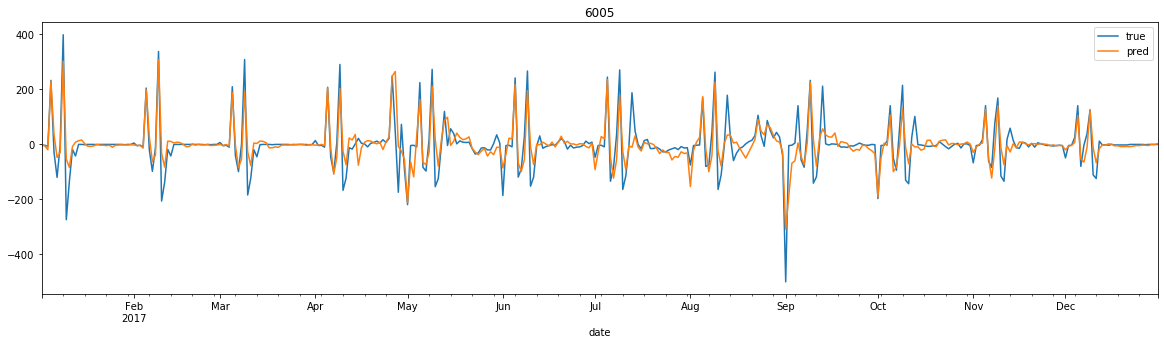

In [23]:
# Реальный и предсказанный временные ряды в приращениях уровня
true = pd.DataFrame(y_test_true).reset_index(level=0, drop=True).rename(columns={'max_lev':'true'})
pred = pd.DataFrame(y_test_pred, index=true.index, columns=['pred'])
pd.concat([true, pred], axis=1).plot(figsize = (20, 5))
plt.title(int(y_test_true.index.levels[0].values))
plt.show()

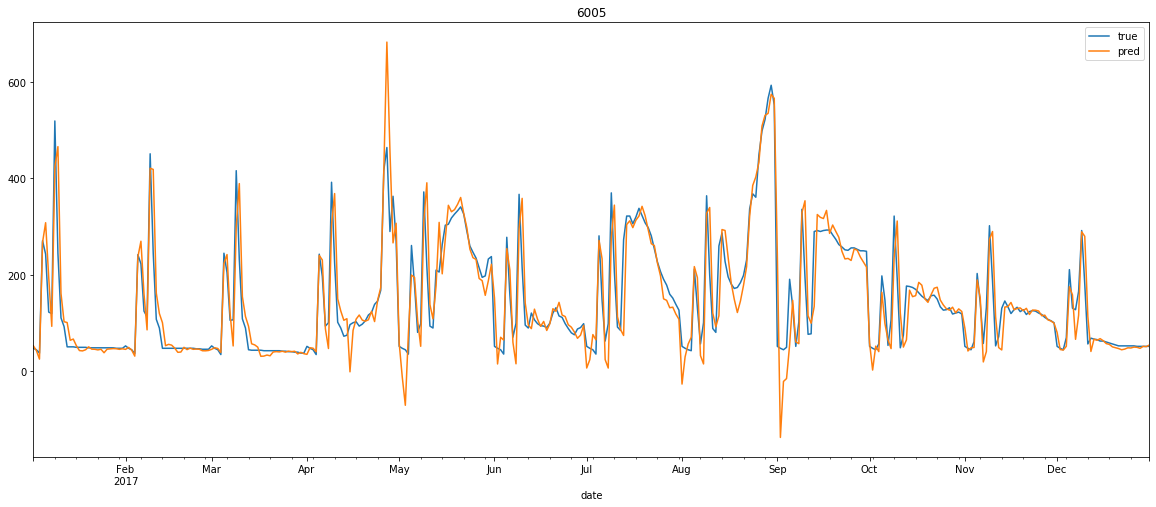

In [47]:
# Переход от приращений к абсолютным значениям уровня

y_abs_true_shift = prep_data['max_lev'].loc[valid_ind.append(test_ind)].shift(n_days).loc[test_ind[n_days:]]
y_abs_pred = y_abs_true_shift + pred['pred']

true_abs = pd.DataFrame(prep_data['max_lev'].loc[test_ind[n_days:]]).reset_index(level=0, drop=True).rename(columns={'max_lev':'true'})
pred_abs = pd.DataFrame(y_abs_pred, columns=['pred']).reset_index(level=0, drop=True)
pd.concat([true_abs, pred_abs], axis=1).plot(figsize = (20, 8))
plt.title(int(y_test_true.index.levels[0].values))
plt.show()

In [50]:
mape(true_abs, pred_abs)

75.54930163027876

### Прогноз на 10 дней

In [67]:
n_days = 3

clf = lgbm.LGBMRegressor(n_jobs=-1, boosting_type = 'gbdt', objective = 'l2') 
params = {'n_estimators': [50, 100, 250, 500], 
          'max_depth': [2,4,6,8],
          'learning_rate': [0.001, 0.01, 0.1],  
          'min_data_in_leaf ': [60, 90, 300],
          'lambda_l2': [0.01, 0.1, 0.3],
          'random_state': [17]}

scorer = make_scorer(mape, greater_is_better=False)

split = CustomTimeSeriesSplit()
train_ind, test_ind = split.ts_train_test_split(prep_data, 6005, 365)
valid_ind = train_ind[-1825:]
gen = split.ts_cv()

X_valid = prep_data.drop('max_lev', axis=1).shift(n_days).loc[train_ind[n_days:]]
y_valid = prep_data['max_lev'].diff(n_days).loc[train_ind[n_days:]]

CV = GridSearchCV(clf, params, cv=gen, scoring=scorer, n_jobs=-1)
CV.fit(X_valid, y_valid)

[LightGBM] [Warning] Unknown parameter: 60
[LightGBM] [Warning] min_data_in_leaf is set=, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


GridSearchCV(cv=<generator object CustomTimeSeriesSplit.ts_cv at 0x00000184AFF395E8>,
             estimator=LGBMRegressor(objective='l2'), n_jobs=-1,
             param_grid={'lambda_l2': [0.01, 0.1, 0.3],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 4, 6, 8],
                         'min_data_in_leaf ': [60, 90, 300],
                         'n_estimators': [50, 100, 250, 500],
                         'random_state': [17]},
             scoring=make_scorer(mape, greater_is_better=False))

In [68]:
from sklearn.metrics import mean_absolute_error as MAE

In [69]:
# Обучение 
model = CV.best_estimator_
X_train = prep_data.drop('max_lev', axis=1).shift(n_days).loc[train_ind[n_days:]]
y_train = prep_data['max_lev'].diff(n_days).loc[train_ind[n_days:]]
model.fit(X_train, y_train)

LGBMRegressor(lambda_l2=0.1, max_depth=8, min_data_in_leaf =60, objective='l2',
              random_state=17)

In [70]:
# Предсказание 
X_test = prep_data.drop('max_lev', axis=1).loc[test_ind[n_days:]]
y_pred = model.predict(X_test)
y_true = prep_data['max_lev'].diff(n_days).loc[test_ind[n_days:]]

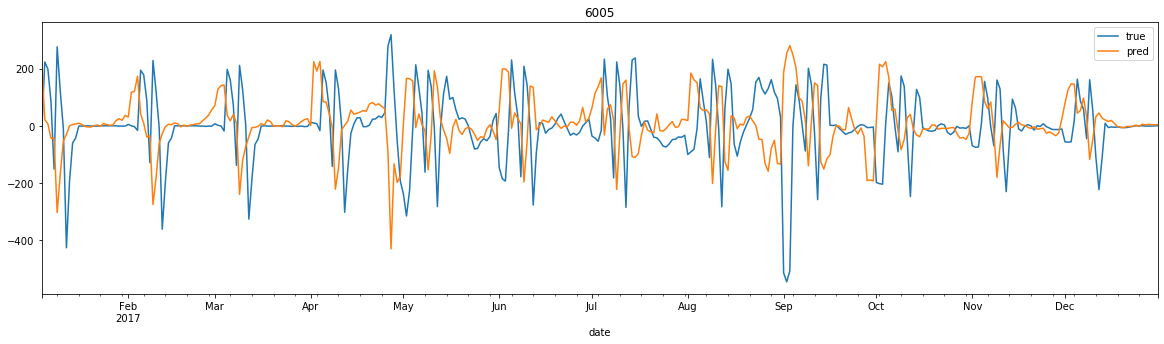

In [71]:
# Реальный и предсказанный временные ряды в приращениях уровня
true = pd.DataFrame(y_true).reset_index(level=0, drop=True).rename(columns={'max_lev':'true'})
pred = pd.DataFrame(y_pred, index=true.index, columns=['pred'])
pd.concat([true, pred], axis=1).plot(figsize = (20, 5))
plt.title(int(y_true.index.levels[0].values))
plt.show() 

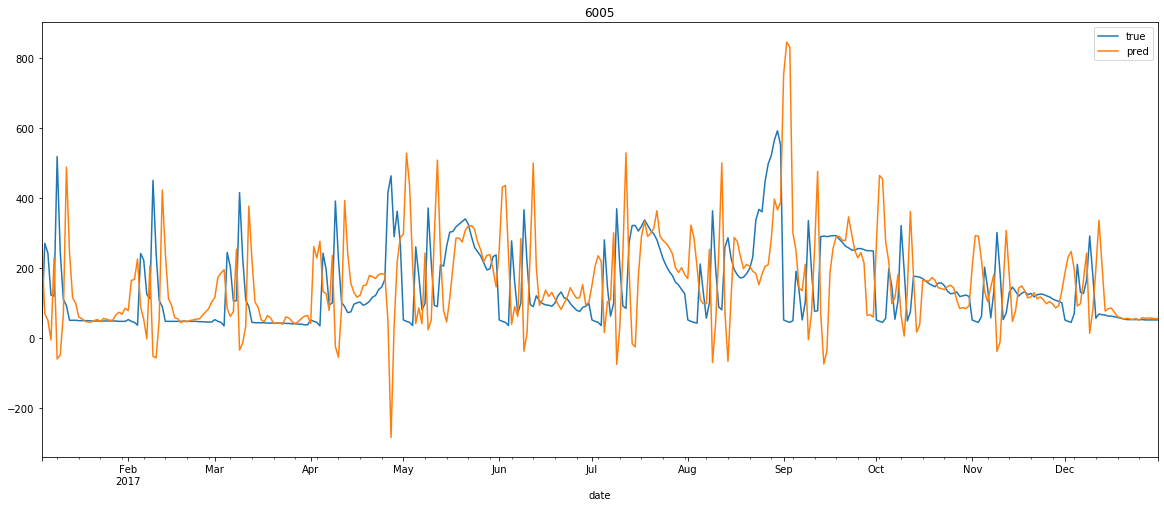

In [72]:
# Переход от приращений к абсолютным значениям уровня

y_abs_true_shift = prep_data['max_lev'].loc[valid_ind.append(test_ind)].shift(n_days).loc[test_ind[n_days:]]
y_abs_pred = y_abs_true_shift + pred['pred']

true_abs = pd.DataFrame(prep_data['max_lev'].loc[test_ind[n_days:]]).reset_index(level=0, drop=True).rename(columns={'max_lev':'true'})
pred_abs = pd.DataFrame(y_abs_pred, columns=['pred']).reset_index(level=0, drop=True)
pd.concat([true_abs, pred_abs], axis=1).plot(figsize = (20, 8))
plt.title(int(y_true.index.levels[0].values))
plt.show()

In [73]:
mape(true_abs, pred_abs)

183.47568850307675

In [80]:
# Деление индексов датасета на части (глобальное)
split = CustomTimeSeriesSplit()
train_ind, test_ind = split.ts_train_test_split(prep_data, 6005, 10)
valid_ind = train_ind[-1825:]

# Модель и гиперпараметры
clf = lgbm.LGBMRegressor(n_jobs=-1) 
params = {'n_estimators': [50, 100, 250, 500], 
          'max_depth': [2,4,6,8],
          'learning_rate': [0.001, 0.01, 0.1],          
          'random_state': [17]}
scorer = make_scorer(mape, greater_is_better=False)


preds_10_days = []

for n_days in range(10):
    # Подбор гиперпараметров
    X_valid = prep_data.drop('max_lev', axis=1).loc[train_ind.append(test_ind)].shift(n_days).loc[valid_ind[n_days:]]
    y_valid = prep_data['max_lev'].diff(n_days).loc[valid_ind[n_days:]]
    gen = split.ts_cv()
    CV = GridSearchCV(clf, params, cv=gen, scoring=scorer, n_jobs=-1)
    CV.fit(X_valid, y_valid)
    model = CV.best_estimator_
    
    # Обучение
    X_train = prep_data.drop('max_lev', axis=1).shift(n_days).loc[train_ind[n_days:]]
    y_train = prep_data['max_lev'].diff(n_days).loc[train_ind[n_days:]]
    model.fit(X_train, y_train)
    
    # Предсказание
    X_test = prep_data.drop('max_lev', axis=1).shift(n_days).loc[test_ind[n_days]].iloc[n_days:n_days+1]
    y_pred = model.predict(X_test)[0]
    preds_10_days.append(y_pred)

IndexError: positional indexers are out-of-bounds

In [6]:
n_days = 1
split = CustomTimeSeriesSplit()
train_ind, test_ind = split.ts_train_test_split(prep_data, 6005, 10)
valid_ind = train_ind[-1825:]

X_valid = prep_data.drop('max_lev', axis=1).loc[train_ind.append(test_ind)].shift(n_days).loc[valid_ind[n_days:]]
y_valid = prep_data['max_lev'].diff(n_days).loc[valid_ind[n_days:]]

In [67]:
y_test_true_10d = prep_data['max_lev_diff'].loc[test_ind]
y_test_pred_10d = preds_10_days

In [83]:
from hypopt import GridSearch
from sklearn.model_selection import PredefinedSplit
train_ind, valid_ind, test_ind = train_valid_test_ind_split(base_feat, 6022, 10)

n_days = 2
#X_valid = prep_data.drop(['max_lev', 'max_lev_diff'], axis=1).loc[train_ind.append(valid_ind)].shift(n_days).loc[valid_ind]
#y_valid = prep_data['max_lev_diff'].loc[valid_ind]
X_train = prep_data.drop(['max_lev', 'max_lev_diff'], axis=1).loc[train_ind].shift(n_days)
y_train = prep_data['max_lev_diff'].loc[train_ind]

# Модель и параметры
clf = CatBoostRegressor()
params = {'n_estimators': [50, 100, 250], 
          'max_depth': [2,4,6,8],
          'learning_rate': [0.001, 0.01, 0.1],
          'subsample': [0.7, 0.85, 1],
          'random_state': [17]}
scorer = make_scorer(mape, greater_is_better = False)
#CV = GridSearchCV(clf, params, cv = 5, scoring=scorer, n_jobs = -1)
#CV = GridSearch(model = clf, param_grid = params, num_threads = 4)
#CV.fit(X_train, y_train, X_valid, y_valid)

In [88]:
pds = PredefinedSplit(test_fold = )

ValueError: invalid literal for int() with base 10: '2011-03-28'

In [80]:



# Split Data to Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, stratify = y,random_state = 2020)

# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in X.index]

# Use the list to create PredefinedSplit


# Use PredefinedSplit in GridSearchCV
clf = GridSearchCV(estimator = estimator,
                   cv=pds,
                   param_grid=param_grid)

# Fit with all data

AssertionError: group argument must be None for now